## <font color='blue'> github.com/uieyao1199
# Unsupervized Learning 
    Machine Learning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.decomposition import PCA # principal component analysis

from sklearn.preprocessing import StandardScaler # standard scaler
from sklearn.datasets import load_digits # digits dataset
from sklearn.manifold import TSNE # t-SNE

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.cluster.hierarchy import dendrogram, linkage # dendrograms
from sklearn.cluster import KMeans # k-means clustering
from sklearn.model_selection import train_test_split

# Setting pandas print options
pd.set_option('display.max_rows', 500) 
pd.set_option('display.max_columns', 500)

# Importing dataset
survey = pd.read_excel('finalExam_Mobile_App_Survey_Data.xlsx')


# 1.0 Data Exploration & Preparation

In [2]:
survey.head()

caseID  q1  q2r1  q2r2  q2r3  q2r4  q2r5  q2r6  q2r7  q2r8  q2r9  q2r10  \
0     355   5     0     1     1     0     0     0     0     0     0      0   
1    1397   3     0     0     1     0     0     0     0     0     0      0   
2    1197   2     0     1     1     0     0     0     0     0     0      0   
3     484   2     0     0     0     0     1     0     0     0     0      0   
4    2113   4     0     0     0     1     0     0     0     0     0      0   

   q4r1  q4r2  q4r3  q4r4  q4r5  q4r6  q4r7  q4r8  q4r9  q4r10  q4r11  q11  \
0     0     0     1     0     1     0     1     0     0      0      0    3   
1     1     0     0     0     0     1     0     0     0      0      0    2   
2     0     0     0     0     1     1     1     0     0      0      0    1   
3     1     0     0     1     1     1     0     0     0      0      0    3   
4     1     0     0     0     0     1     0     0     0      0      0    1   

   q12  q13r1  q13r2  q13r3  q13r4  q13r5  q13r6  q13r7  q13r8  q13r9  q13r10  \
0    2      4      4      4      4      4      3      4      4      2       4   
1    6      1      4      4      2      4      2      4      4      4       4   
2    6      1      4      4      4      4      1      4      3      4       4   
3    1      1      4      2      1      4      1      4      3      1       1   
4    6      1      3      4      1      3      2      3      3      2       1   

   q13r11  q13r12  q24r1  q24r2  q24r3  q24r4  q24r5  q24r6  q24r7  q24r8  \
0       4       4      2      2      6      1      2      2      2      1   
1       4       4      1      1      2      3      3      1      3      2   
2       4       1      5      1      2      6      2      1      1      1   
3       1       1      1      3      1      2      1      3      2      1   
4       2       1      3      2      2      4      2      1      3      2   

   q24r9  q24r10  q24r11  q24r12  q25r1  q25r2  q25r3  q25r4  q25r5  q25r6  \
0      4       3       3       2      3      2      5      3      4      6   
1      1       2       1       2      3      3      2      2      2      5   
2      5       1       2       2      2      1      2      3      5      6   
3      3       2       3       2      1      1      1      1      1      3   
4      4       2       3       2      3      4      2      2      3      5   

   q25r7  q25r8  q25r9  q25r10  q25r11  q25r12  q26r18  q26r3  q26r4  q26r5  \
0      2      3      4       2       3       3       3      1      1      5   
1      4      4      3       3       2       4       2      1      2      3   
2      3      3      3       3       4       5       4      1      4      3   
3      1      1      3       2       1       2       2      1      1      2   
4      2      4      2       3       3       3       3      4      4      5   

   q26r6  q26r7  q26r8  q26r9  q26r10  q26r11  q26r12  q26r13  q26r14  q26r15  \
0      5      3      1      1       4       2       3       5       5       3   
1      5      3      4      3       2       6       4       4       4       2   
2      4      2      4      3       3       3       2       6       3       2   
3      1      1      1      2       1       3       2       2       3       3   
4      3      3      4      2       3       4       3       3       3       2   

   q26r16  q26r17  q48  q49  q50r1  q50r2  q50r3  q50r4  q50r5  q54  q55  q56  \
0       1       3    3    1      0      0      0      1      0    1    2   11   
1       4       3    3    2      1      0      0      0      0    2    2    9   
2       5       2    1    2      1      0      0      0      0    1    2    8   
3       2       1    4    2      1      0      0      0      0    2    2    1   
4       4       3    3    1      0      1      0      0      0    1    2   11   

   q57  
0    1  
1    2  
2    2  
3    1  
4    2

In [3]:
survey.isnull().any().any()

False

In [4]:
survey.info

<bound method DataFrame.info of       caseID  q1  q2r1  q2r2  q2r3  q2r4  q2r5  q2r6  q2r7  q2r8  q2r9  q2r10  \
0        355   5     0     1     1     0     0     0     0     0     0      0   
1       1397   3     0     0     1     0     0     0     0     0     0      0   
2       1197   2     0     1     1     0     0     0     0     0     0      0   
3        484   2     0     0     0     0     1     0     0     0     0      0   
4       2113   4     0     0     0     1     0     0     0     0     0      0   
5        966   7     0     0     1     0     0     0     0     0     0      0   
6       1960   3     0     0     1     0     0     0     0     0     0      0   
7       2306   5     0     0     1     1     0     0     0     0     0      0   
8       2078   3     1     0     0     0     0     0     0     1     0      0   
9        714   6     0     0     1     0     0     0     0     1     0      0   
10      1627   4     1     0     0     0     0     0     0     0     0      0

In [5]:
survey.describe()

caseID           q1         q2r1         q2r2         q2r3  \
count  1552.000000  1552.000000  1552.000000  1552.000000  1552.000000   
mean   1192.854381     4.506443     0.503222     0.240979     0.364046   
std     712.006709     2.400829     0.500151     0.427816     0.481317   
min       1.000000     1.000000     0.000000     0.000000     0.000000   
25%     570.750000     2.000000     0.000000     0.000000     0.000000   
50%    1144.500000     4.000000     1.000000     0.000000     0.000000   
75%    1833.500000     6.000000     1.000000     0.000000     1.000000   
max    2396.000000    11.000000     1.000000     1.000000     1.000000   

              q2r4         q2r5         q2r6         q2r7         q2r8  \
count  1552.000000  1552.000000  1552.000000  1552.000000  1552.000000   
mean      0.201031     0.055412     0.088273     0.041237     0.193943   
std       0.400900     0.228857     0.283783     0.198902     0.395512   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

              q2r9   q2r10         q4r1         q4r2         q4r3  \
count  1552.000000  1552.0  1552.000000  1552.000000  1552.000000   
mean      0.037371     0.0     0.694588     0.191366     0.463918   
std       0.189731     0.0     0.460730     0.393503     0.498857   
min       0.000000     0.0     0.000000     0.000000     0.000000   
25%       0.000000     0.0     0.000000     0.000000     0.000000   
50%       0.000000     0.0     1.000000     0.000000     0.000000   
75%       0.000000     0.0     1.000000     0.000000     1.000000   
max       1.000000     0.0     1.000000     1.000000     1.000000   

              q4r4         q4r5         q4r6         q4r7         q4r8  \
count  1552.000000  1552.000000  1552.000000  1552.000000  1552.000000   
mean      0.266108     0.764820     0.813144     0.532216     0.472294   
std       0.442064     0.424248     0.389921     0.499122     0.499393   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     1.000000     1.000000     0.000000     0.000000   
50%       0.000000     1.000000     1.000000     1.000000     0.000000   
75%       1.000000     1.000000     1.000000     1.000000     1.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

              q4r9        q4r10        q4r11          q11          q12  \
count  1552.000000  1552.000000  1552.000000  1552.000000  1552.000000   
mean      0.348582     0.079253     0.017397     3.081830     4.217139   
std       0.476675     0.270220     0.130787     1.020931     1.342607   
min       0.000000     0.000000     0.000000     1.000000     1.000000   
25%       0.000000     0.000000     0.000000     2.000000     3.000000   
50%       0.000000     0.000000     0.000000     3.000000     4.000000   
75%       1.000000     0.000000     0.000000     4.000000     5.000000   
max       1.000000     1.000000     1.000000     5.000000     6.000000   

             q13r1        q13r2        q13r3        q13r4        q13r5  \
count  1552.000000  1552.000000  1552.000000  1552.000000  1552.000000   
mean      1.406572     2.717784     3.309278     2.438789     3.219072   
std       0.876829     1.240928     1.009799     1.180703     1.072941   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%       1.000000     1.000000     3.000000     1.000000     2.000000   
50%       1.000000     3.000000     4.000000     2.000000     4.000000   
75%       1.000000     4.000000     4.000000     4.000000     4.000000   
max       4.000000     4.000000     4.000000     4.000000     4.000000   

             q13r6        q13r7        q13r8        q13

In [6]:
survey.shape

(1552, 88)

#### No missing value, in total of 16 Questions: Q1, Q2, Q4, Q11, Q12, Q13, Q24, Q25, Q26, Q48, Q49, Q50, Q54, Q55, Q56, Q57

### 8 Demographic questions: q1, q48 - q57
### 8 Behavioral questions: q2 - q26

In [7]:
survey.columns

Index(['caseID', 'q1', 'q2r1', 'q2r2', 'q2r3', 'q2r4', 'q2r5', 'q2r6', 'q2r7',
       'q2r8', 'q2r9', 'q2r10', 'q4r1', 'q4r2', 'q4r3', 'q4r4', 'q4r5', 'q4r6',
       'q4r7', 'q4r8', 'q4r9', 'q4r10', 'q4r11', 'q11', 'q12', 'q13r1',
       'q13r2', 'q13r3', 'q13r4', 'q13r5', 'q13r6', 'q13r7', 'q13r8', 'q13r9',
       'q13r10', 'q13r11', 'q13r12', 'q24r1', 'q24r2', 'q24r3', 'q24r4',
       'q24r5', 'q24r6', 'q24r7', 'q24r8', 'q24r9', 'q24r10', 'q24r11',
       'q24r12', 'q25r1', 'q25r2', 'q25r3', 'q25r4', 'q25r5', 'q25r6', 'q25r7',
       'q25r8', 'q25r9', 'q25r10', 'q25r11', 'q25r12', 'q26r18', 'q26r3',
       'q26r4', 'q26r5', 'q26r6', 'q26r7', 'q26r8', 'q26r9', 'q26r10',
       'q26r11', 'q26r12', 'q26r13', 'q26r14', 'q26r15', 'q26r16', 'q26r17',
       'q48', 'q49', 'q50r1', 'q50r2', 'q50r3', 'q50r4', 'q50r5', 'q54', 'q55',
       'q56', 'q57'],
      dtype='object')

In [8]:
survey.columns[2:77]

Index(['q2r1', 'q2r2', 'q2r3', 'q2r4', 'q2r5', 'q2r6', 'q2r7', 'q2r8', 'q2r9',
       'q2r10', 'q4r1', 'q4r2', 'q4r3', 'q4r4', 'q4r5', 'q4r6', 'q4r7', 'q4r8',
       'q4r9', 'q4r10', 'q4r11', 'q11', 'q12', 'q13r1', 'q13r2', 'q13r3',
       'q13r4', 'q13r5', 'q13r6', 'q13r7', 'q13r8', 'q13r9', 'q13r10',
       'q13r11', 'q13r12', 'q24r1', 'q24r2', 'q24r3', 'q24r4', 'q24r5',
       'q24r6', 'q24r7', 'q24r8', 'q24r9', 'q24r10', 'q24r11', 'q24r12',
       'q25r1', 'q25r2', 'q25r3', 'q25r4', 'q25r5', 'q25r6', 'q25r7', 'q25r8',
       'q25r9', 'q25r10', 'q25r11', 'q25r12', 'q26r18', 'q26r3', 'q26r4',
       'q26r5', 'q26r6', 'q26r7', 'q26r8', 'q26r9', 'q26r10', 'q26r11',
       'q26r12', 'q26r13', 'q26r14', 'q26r15', 'q26r16', 'q26r17'],
      dtype='object')

In [9]:
########################
# Rename all the demographic columns
########################

survey.columns=['caseID', 'age','q2r1', 'q2r2', 'q2r3', 'q2r4', 'q2r5', 'q2r6', 
                'q2r7', 'q2r8', 'q2r9','q2r10', 'q4r1', 'q4r2', 'q4r3', 'q4r4',
                'q4r5', 'q4r6', 'q4r7', 'q4r8','q4r9', 'q4r10', 'q4r11', 'q11', 
                'q12', 'q13r1', 'q13r2', 'q13r3','q13r4', 'q13r5', 'q13r6', 'q13r7', 
                'q13r8', 'q13r9', 'q13r10','q13r11', 'q13r12', 'q24r1', 'q24r2', 
                'q24r3', 'q24r4', 'q24r5','q24r6', 'q24r7', 'q24r8', 'q24r9', 'q24r10', 
                'q24r11', 'q24r12','q25r1', 'q25r2', 'q25r3', 'q25r4', 'q25r5', 'q25r6', 
                'q25r7', 'q25r8','q25r9', 'q25r10', 'q25r11', 'q25r12', 'q26r18', 
                'q26r3', 'q26r4','q26r5', 'q26r6', 'q26r7', 'q26r8', 'q26r9', 'q26r10', 
                'q26r11','q26r12', 'q26r13', 'q26r14', 'q26r15', 'q26r16', 'q26r17',
                'education','marital','no_child', 'child<6','child6_12','child13_17',
                'child>18','race', 'H/L_ethnicity', 'income', 'gender']

survey.columns

Index(['caseID', 'age', 'q2r1', 'q2r2', 'q2r3', 'q2r4', 'q2r5', 'q2r6', 'q2r7',
       'q2r8', 'q2r9', 'q2r10', 'q4r1', 'q4r2', 'q4r3', 'q4r4', 'q4r5', 'q4r6',
       'q4r7', 'q4r8', 'q4r9', 'q4r10', 'q4r11', 'q11', 'q12', 'q13r1',
       'q13r2', 'q13r3', 'q13r4', 'q13r5', 'q13r6', 'q13r7', 'q13r8', 'q13r9',
       'q13r10', 'q13r11', 'q13r12', 'q24r1', 'q24r2', 'q24r3', 'q24r4',
       'q24r5', 'q24r6', 'q24r7', 'q24r8', 'q24r9', 'q24r10', 'q24r11',
       'q24r12', 'q25r1', 'q25r2', 'q25r3', 'q25r4', 'q25r5', 'q25r6', 'q25r7',
       'q25r8', 'q25r9', 'q25r10', 'q25r11', 'q25r12', 'q26r18', 'q26r3',
       'q26r4', 'q26r5', 'q26r6', 'q26r7', 'q26r8', 'q26r9', 'q26r10',
       'q26r11', 'q26r12', 'q26r13', 'q26r14', 'q26r15', 'q26r16', 'q26r17',
       'education', 'marital', 'no_child', 'child<6', 'child6_12',
       'child13_17', 'child>18', 'race', 'H/L_ethnicity', 'income', 'gender'],
      dtype='object')

In [10]:
########################
# Rename all the demographic columns in observation level
########################

# Renaming age
age_names = {1: '<18' ,
             2: '18-24' ,
             3: '25-29' ,
             4: '30-34' ,
             5: '35-39' ,
             6: '40-44' ,
             7: '45-49' ,
             8: '50-54' ,
             9: '55-59' ,
             10: '60-64' ,
             11: '>65 '}

survey['age'].replace(age_names, inplace = True)

# Renaming marital
marital_names = {1: 'Married' ,
                 2: 'Single' ,
                 3: 'Single with a partner' ,
                 4: 'Separated/Widowed/Divorced'}

survey['marital'].replace(marital_names, inplace = True)

# Renaming education
edu_names = {1: 'Some high school' ,
              2: 'High school graduate' ,
              3: 'Some college' ,
              4: 'College graduate' ,
              5: 'Some post-graduate studies ' ,
              6: 'Post graduate degree '}

survey['education'].replace(edu_names, inplace = True)

# Renaming race
race_names = {1: 'White or Caucasian' ,
              2: 'Black or African American' ,
              3: 'Asian' ,
              4: 'Native Hawaiian or Other Pacific Islander' ,
              5: 'American Indian or Alaska Native' ,
              6: 'Other race'}

survey['race'].replace(race_names, inplace = True)

# Renaming H/L_ethnicity
HL_ethnicity_names = {1: 'Hispanic or Latino',
                      2: 'Not Hispanic or Latino'}

survey['H/L_ethnicity'].replace(HL_ethnicity_names, inplace = True)

# Renaming income
income_names = {1: '<$10,000 ' ,
                2: '$10,000-$14,999 ' ,
                3: '$15,000-$19,999' ,
                4: '$20,000-$29,999' ,
                5: '$30,000-$39,999 ' ,
                6: '$40,000-$49,999 ' ,
                7: '$50,000-$59,999 ' ,
                8: '$60,000-$69,999 ' ,
                9: '$70,000-$79,999 ' ,
                10: '$80,000-$89,999 ' ,
                11: '$90,000-$99,999 ' ,
                12: '$100,000-$124,999 ' ,
                13: '$125,000-$149,999 ' ,
                14: '$150,000 and over 14 '}

survey['income'].replace(income_names, inplace = True)


# Renaming gender
gender_names = {1: 'Male',
                2: 'Female'}

survey['gender'].replace(gender_names, inplace = True)

survey.head()

caseID    age  q2r1  q2r2  q2r3  q2r4  q2r5  q2r6  q2r7  q2r8  q2r9  q2r10  \
0     355  35-39     0     1     1     0     0     0     0     0     0      0   
1    1397  25-29     0     0     1     0     0     0     0     0     0      0   
2    1197  18-24     0     1     1     0     0     0     0     0     0      0   
3     484  18-24     0     0     0     0     1     0     0     0     0      0   
4    2113  30-34     0     0     0     1     0     0     0     0     0      0   

   q4r1  q4r2  q4r3  q4r4  q4r5  q4r6  q4r7  q4r8  q4r9  q4r10  q4r11  q11  \
0     0     0     1     0     1     0     1     0     0      0      0    3   
1     1     0     0     0     0     1     0     0     0      0      0    2   
2     0     0     0     0     1     1     1     0     0      0      0    1   
3     1     0     0     1     1     1     0     0     0      0      0    3   
4     1     0     0     0     0     1     0     0     0      0      0    1   

   q12  q13r1  q13r2  q13r3  q13r4  q13r5  q13r6  q13r7  q13r8  q13r9  q13r10  \
0    2      4      4      4      4      4      3      4      4      2       4   
1    6      1      4      4      2      4      2      4      4      4       4   
2    6      1      4      4      4      4      1      4      3      4       4   
3    1      1      4      2      1      4      1      4      3      1       1   
4    6      1      3      4      1      3      2      3      3      2       1   

   q13r11  q13r12  q24r1  q24r2  q24r3  q24r4  q24r5  q24r6  q24r7  q24r8  \
0       4       4      2      2      6      1      2      2      2      1   
1       4       4      1      1      2      3      3      1      3      2   
2       4       1      5      1      2      6      2      1      1      1   
3       1       1      1      3      1      2      1      3      2      1   
4       2       1      3      2      2      4      2      1      3      2   

   q24r9  q24r10  q24r11  q24r12  q25r1  q25r2  q25r3  q25r4  q25r5  q25r6  \
0      4       3       3       2      3      2      5      3      4      6   
1      1       2       1       2      3      3      2      2      2      5   
2      5       1       2       2      2      1      2      3      5      6   
3      3       2       3       2      1      1      1      1      1      3   
4      4       2       3       2      3      4      2      2      3      5   

   q25r7  q25r8  q25r9  q25r10  q25r11  q25r12  q26r18  q26r3  q26r4  q26r5  \
0      2      3      4       2       3       3       3      1      1      5   
1      4      4      3       3       2       4       2      1      2      3   
2      3      3      3       3       4       5       4      1      4      3   
3      1      1      3       2       1       2       2      1      1      2   
4      2      4      2       3       3       3       3      4      4      5   

   q26r6  q26r7  q26r8  q26r9  q26r10  q26r11  q26r12  q26r13  q26r14  q26r15  \
0      5      3      1      1       4       2       3       5       5       3   
1      5      3      4      3       2       6       4       4       4       2   
2      4      2      4      3       3       3       2       6       3       2   
3      1      1      1      2       1       3       2       2       3       3   
4      3      3      4      2       3       4       3       3       3       2   

   q26r16  q26r17         education  marital  no_child  child<6  child6_12  \
0       1       3      Some college  Married         0        0          0   
1       4       3      Some college   Single         1        0          0   
2       5       2  Some high school   Single         1        0          0   
3       2       1  College graduate   Single         1        0          0   
4       4       3      Some college  Married         0        1          0   

   child13_17  child>18                       race           H/L_ethnicity  \
0           1         0         White or Caucasian  Not Hispanic or Latino   
1           0         0  Black or African

### Renaming for behavorial question: q 11, q13, q24(r1-r12),  q25(r1-r12), q26(r1-r17).
- q13 asked about how frequent a respondent use the following website. The original code is: the smaller the number is, the more frequently used. This measure is not beneficial for our data analysis. We will change it to: the larger the number is, the more frequently used. i.e. 
    - 1. almost never
    - 2. rarely
    - 3. sometimes
    - 4. very often
- q24, q25 and q26 asked the level of agree or disagree of a respondent with the following statements. Likewise, the smaller the number is, the stronger agreement. While all the statements are towards the attitude and habbit about using app and tech, the way of code is not beneficial for our data analysis. Thus, we will change it to the following 
    - 1. Disagree Strongly
    - 2. Disagree
    - 3. Disagree Somewhat
    - 4. Agree Somewhat
    - 5. Agree
    - 6. Agree Strongly
- q11 asked about how many apps a respondent has. options of "don't know" and "none" have larger number, which also not beneficial in analysis later on. So change it to the following:
    - 1. None
    - 2. Don't know
    - 3. 1-5 
    - 4. 6-10
    - 5. 11-30
    - 6. 30+

###  ***IMPORTANT*** 
#### this code should only be run once. If run twice, the changed code will be overwrite back to original code

In [11]:
########################
# Rename code for q 13, q24, q25, q26
########################

frequency_names = {1: 4 ,
                   2: 3 ,
                   3: 2 ,
                   4: 1 }

for col in survey.loc[: , 'q13r1':'q13r12']:
    survey[col].replace(frequency_names, inplace = True)
    
########################   
agreement_names = {1: 6 ,
                   2: 5 ,
                   3: 4 ,
                   4: 3 ,
                   5: 2 , 
                   6: 1 }

for col in survey.loc[: , 'q24r1':'q26r17']:
    survey[col].replace(agreement_names, inplace = True)
    
survey.loc[:, 'q13r1':'q26r17']

########################
numberapp_names = {1: 3 ,
                   2: 4 ,
                   3: 5 ,
                   4: 6 ,
                   5: 2 , 
                   6: 1 }

survey['q11'].replace(numberapp_names, inplace = True)


In [12]:
########################
# save the change into a excel file 
########################

survey.to_excel('Explored Survey Final Dataset.xlsx')
survey = pd.read_excel('Explored Survey Final Dataset.xlsx')

# 2.0 PCA

/Users/uieyao/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/uieyao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


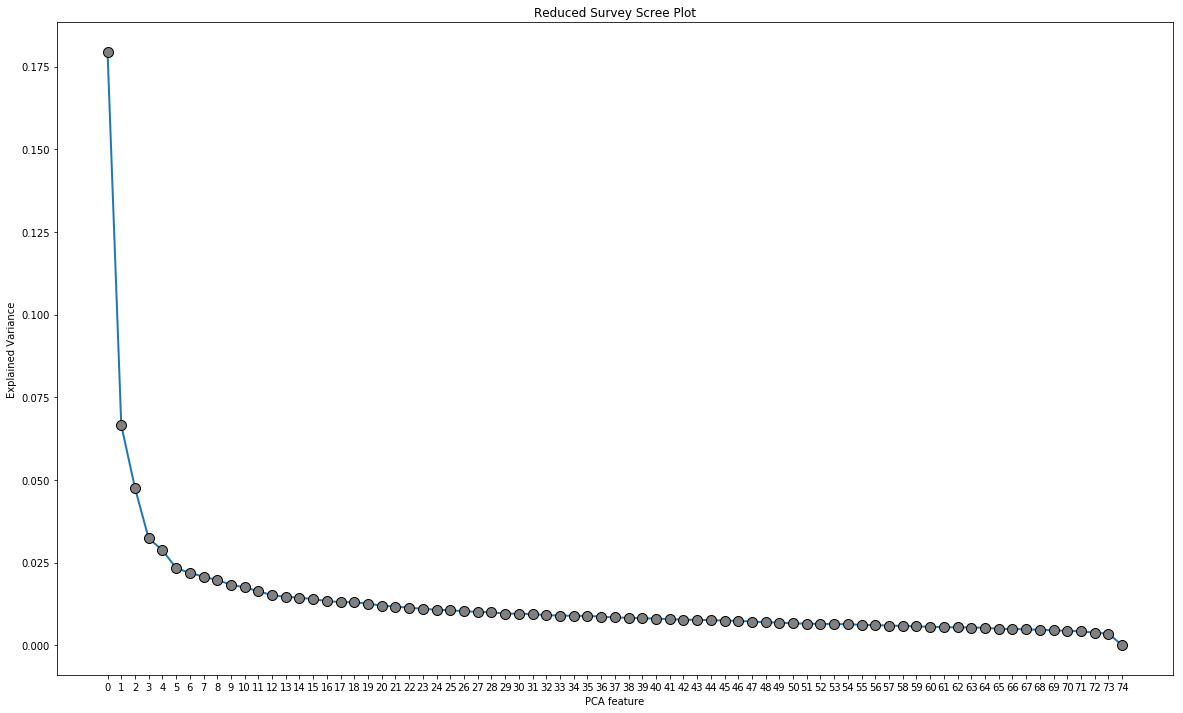

In [14]:
########################
# Step 1: Remove demographic information
########################

survey_features_reduced = survey.iloc[ : , 2: 77]



########################
# Step 2: Scale to get equal variance
########################

scaler = StandardScaler()


scaler.fit(survey_features_reduced)


X_scaled_reduced = scaler.transform(survey_features_reduced)



########################
# Step 3: Run PCA without limiting the number of components
########################

survey_pca_reduced = PCA(n_components = None,
                           random_state = 508)


survey_pca_reduced.fit(X_scaled_reduced)


X_pca_reduced = survey_pca_reduced.transform(X_scaled_reduced)


########################
# Step 4: Analyze the scree plot to determine how many components to retain
########################

fig, ax = plt.subplots(figsize=(20, 12))

features = range(survey_pca_reduced.n_components_)


plt.plot(features,
         survey_pca_reduced.explained_variance_ratio_,
         linewidth = 2,
         marker = 'o',
         markersize = 10,
         markeredgecolor = 'black',
         markerfacecolor = 'grey')



plt.title('Reduced Survey Scree Plot')
plt.xlabel('PCA feature')
plt.ylabel('Explained Variance')
plt.xticks(features)

plt.savefig('Reduced Survey Scree Plot.png')

plt.show()

#### number of 5 is where the elbow is, components of 5 will be used

In [15]:
########################
# Step 5: Run PCA again based on the desired number of components
########################

survey_pca_reduced = PCA(n_components = 5,
                           random_state = 508)


survey_pca_reduced.fit(X_scaled_reduced)


PCA(copy=True, iterated_power='auto', n_components=5, random_state=508,
  svd_solver='auto', tol=0.0, whiten=False)

In [16]:
########################
# Step 6: Analyze factor loadings to understand principal components
########################

factor_loadings_df = pd.DataFrame(pd.np.transpose(survey_pca_reduced.components_))


factor_loadings_df = factor_loadings_df.set_index(survey.columns[2:77])


factor_loadings_df.head()


factor_loadings_df.to_excel('pca5_factor_loadings.xlsx')

In [18]:
########################
# Step 7: Analyze factor strengths per customer
########################

X_pca_reduced = survey_pca_reduced.transform(X_scaled_reduced)
## pca are the strength that people are attached to these factors 

X_pca_df = pd.DataFrame(X_pca_reduced)

### Factor Loading Analysis
After analyzing the factor loading of pca. The 6 pca are named as following 
- 0: 'tech_embrace', 
- 1: 'self_entertained_old_fashion', 
- 2: 'social_media_embrace', 
- 3: 'entertainment_embrace', 
- 4: 'social_entertainment_embrace', 
- 5: 'fashion_entertainment_embrace'

In [19]:
########################
# Step 8: Rename your principal components and reattach demographic information
########################

X_pca_df.columns = ['self_entertainment', 'low_engagement_entertainment', 'paid_entertainment',
                   'practical_function', 'free_entertainment']


final_pca_df = pd.concat([survey.loc[ : , ['age', 'education','marital',
                                           'no_child', 'child<6','child6_12',
                                           'child13_17','child>18','race', 
                                           'H/L_ethnicity', 'income', 'gender']] , X_pca_df], axis = 1)

final_pca_df.head()

age         education  marital  no_child  child<6  child6_12  child13_17  \
0  35-39      Some college  Married         0        0          0           1   
1  25-29      Some college   Single         1        0          0           0   
2  18-24  Some high school   Single         1        0          0           0   
3  18-24  College graduate   Single         1        0          0           0   
4  30-34      Some college  Married         0        1          0           0   

   child>18                       race           H/L_ethnicity  \
0         0         White or Caucasian  Not Hispanic or Latino   
1         0  Black or African American  Not Hispanic or Latino   
2         0         White or Caucasian  Not Hispanic or Latino   
3         0  Black or African American  Not Hispanic or Latino   
4         0         White or Caucasian  Not Hispanic or Latino   

             income  gender  self_entertainment  low_engagement_entertainment  \
0  $90,000-$99,999     Male            2.613429                      1.010726   
1  $70,000-$79,999   Female            2.181606                     -1.316388   
2  $60,000-$69,999   Female            1.745640                     -2.140199   
3         <$10,000     Male           -4.770080                      1.833239   
4  $90,000-$99,999   Female            1.430493                      0.731567   

   paid_entertainment  practical_function  free_entertainment  
0            1.878663            1.615698           -1.971993  
1            2.337943           -1.481337           -0.077489  
2            0.460902           -2.517476            0.960380  
3            1.582836            0.189400            0.194140  
4            0.017850           -0.951333            1.724173

### Step 9: Analyze in more detail: boxplot

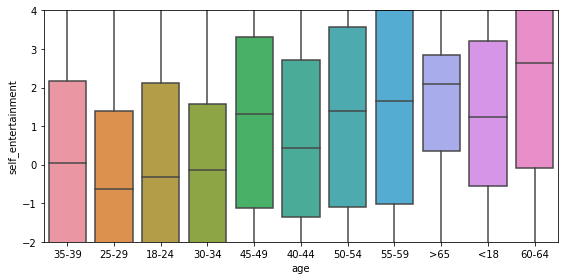

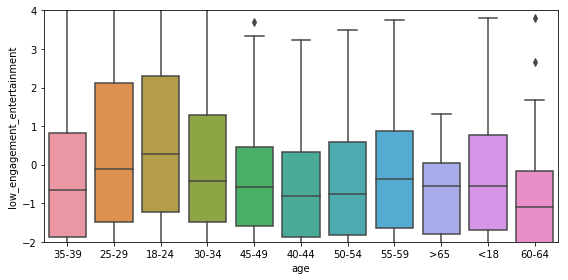

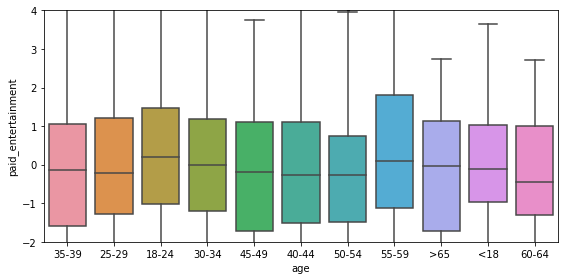

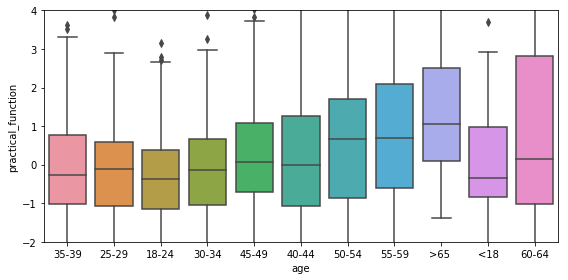

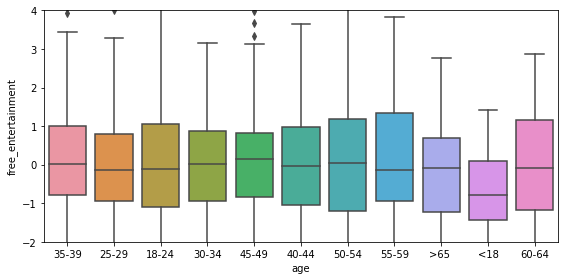

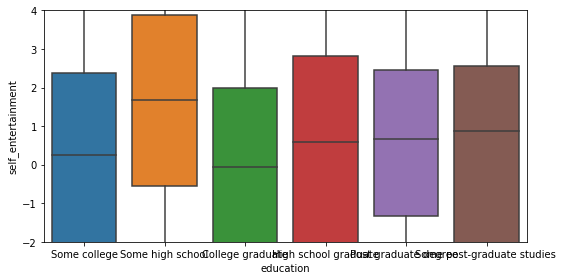

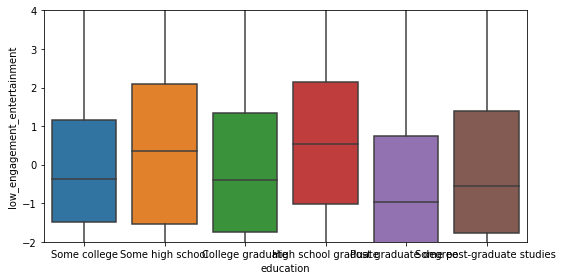

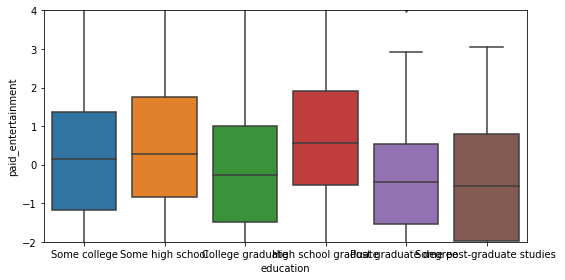

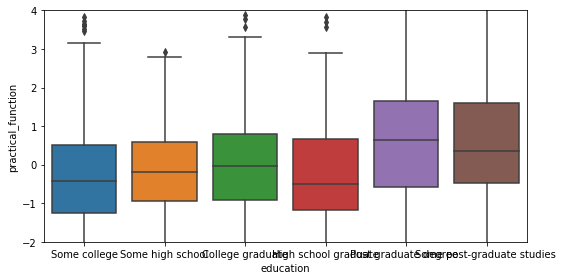

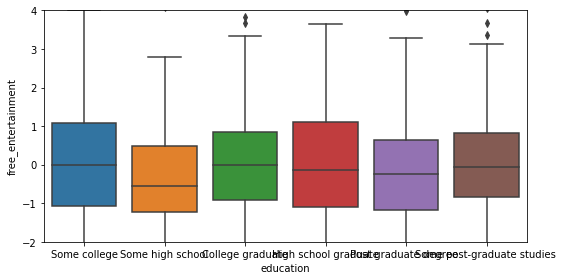

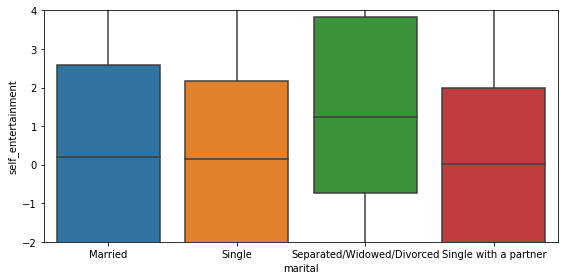

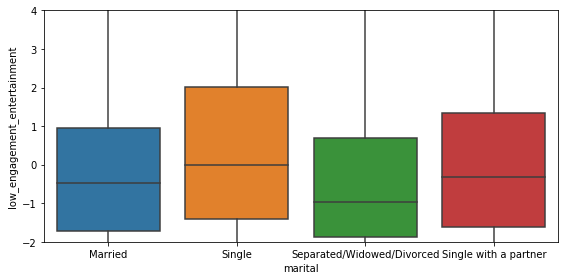

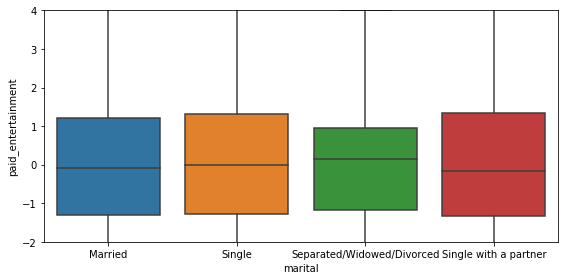

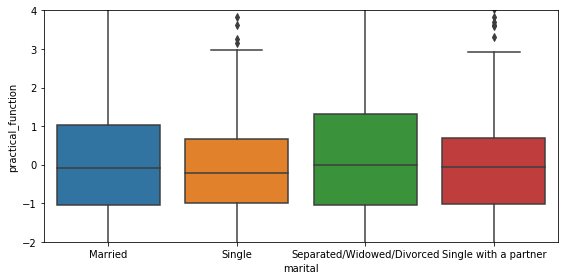

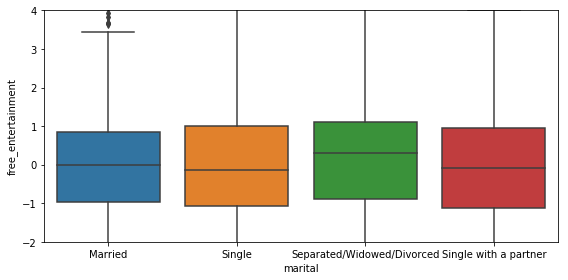

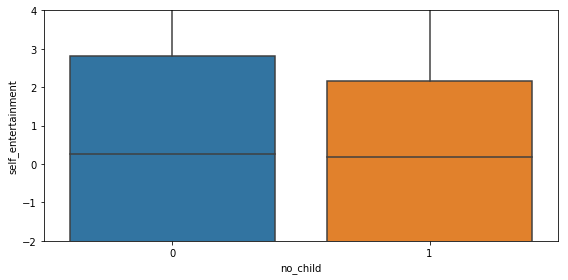

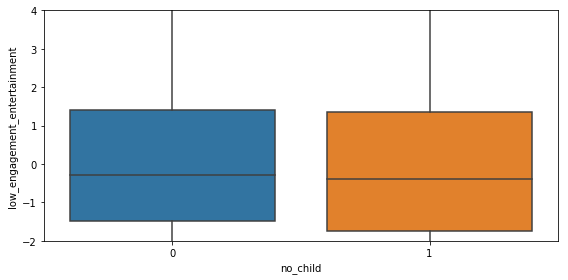

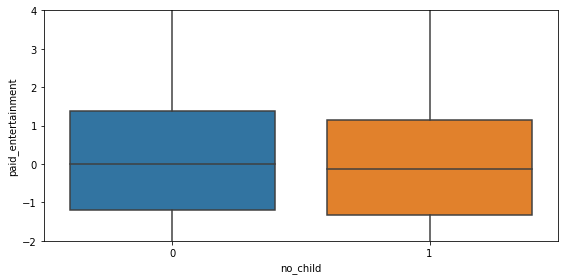

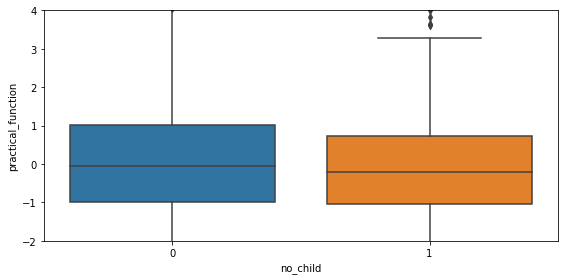

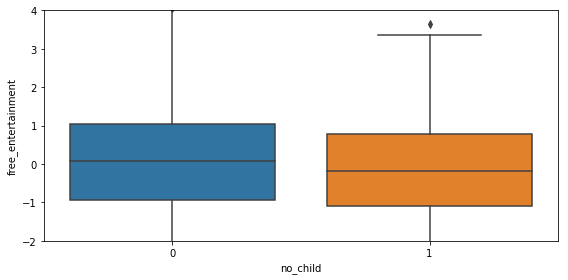

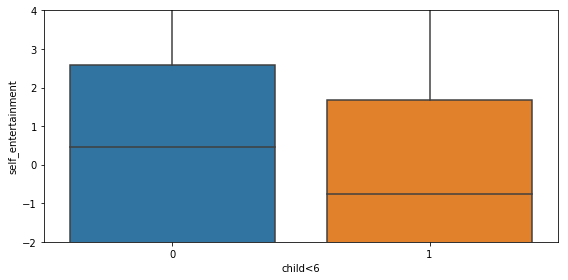

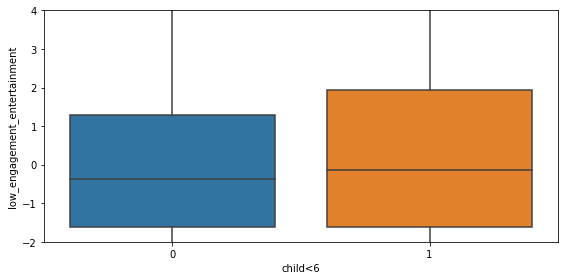

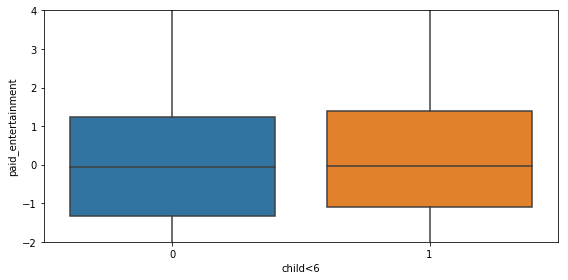

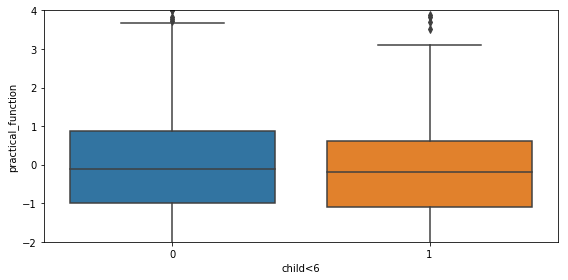

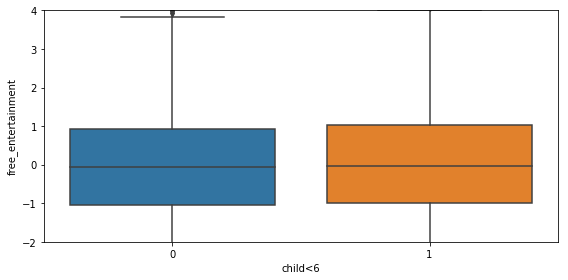

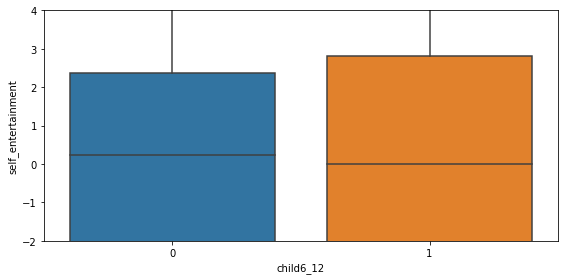

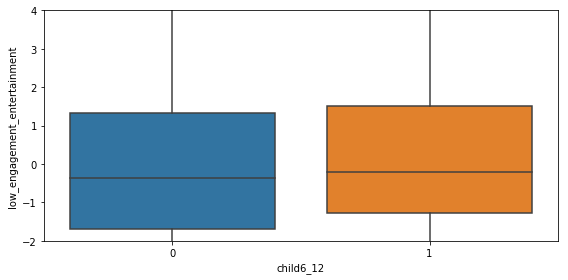

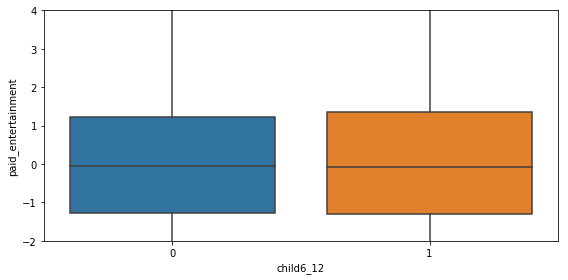

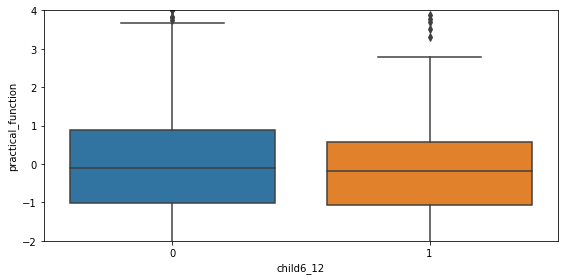

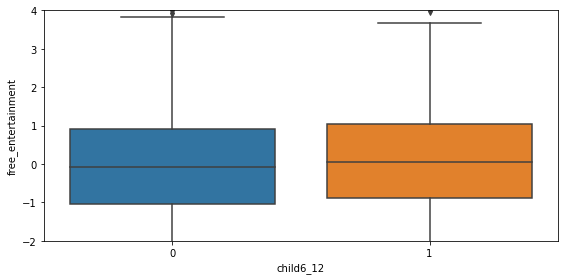

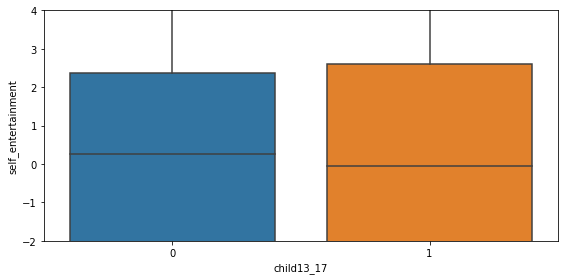

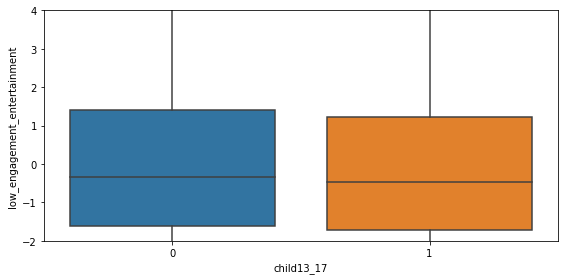

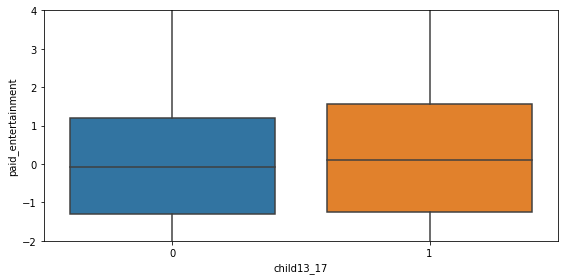

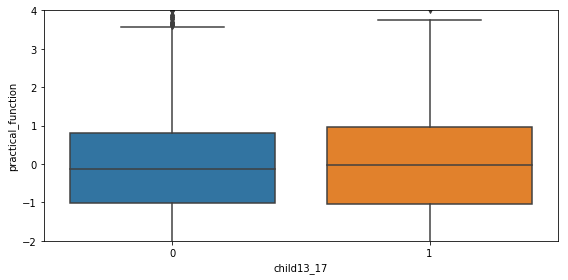

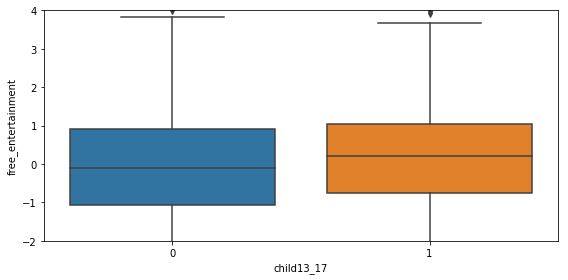

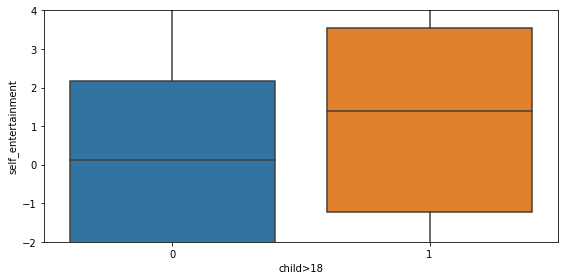

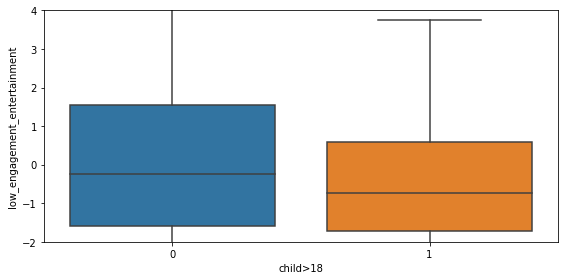

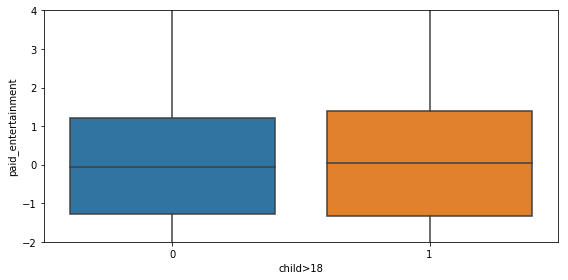

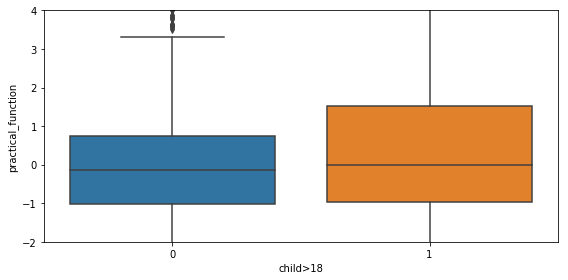

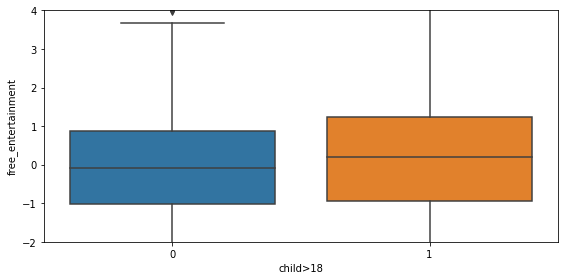

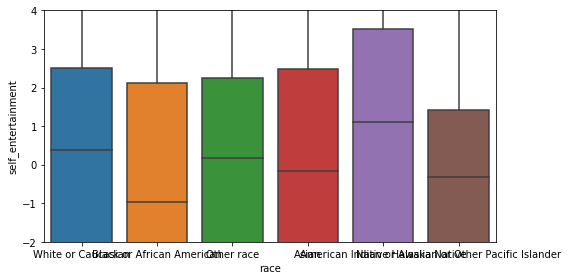

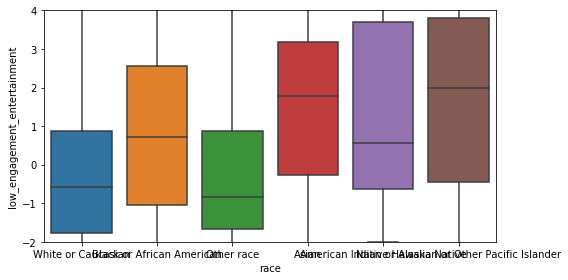

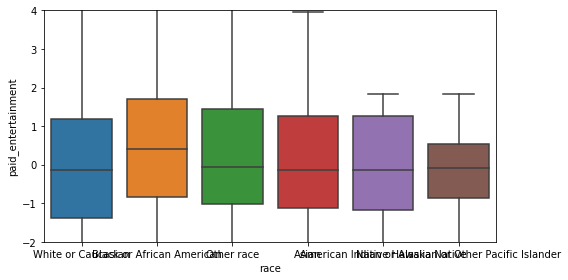

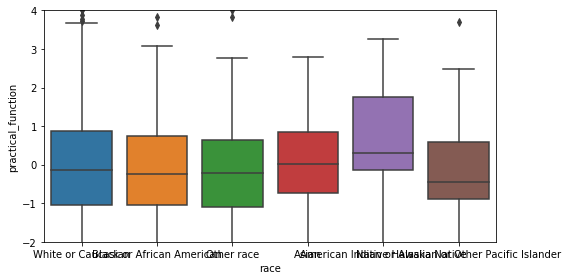

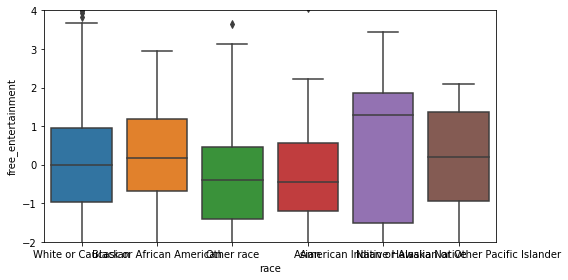

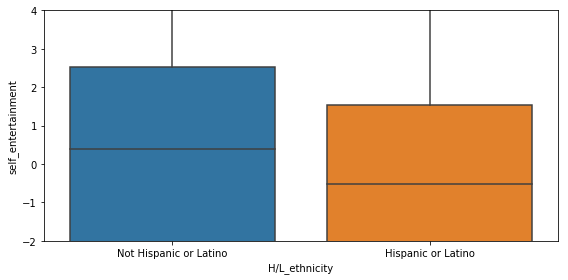

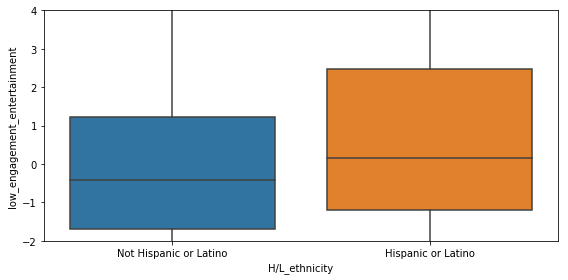

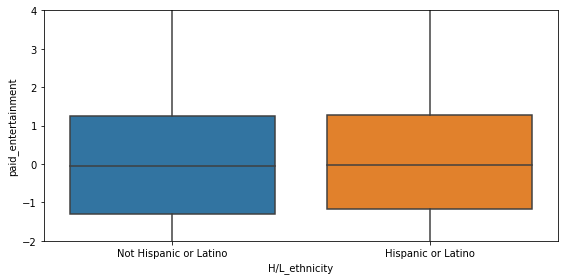

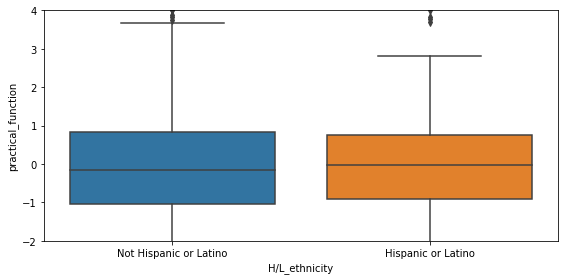

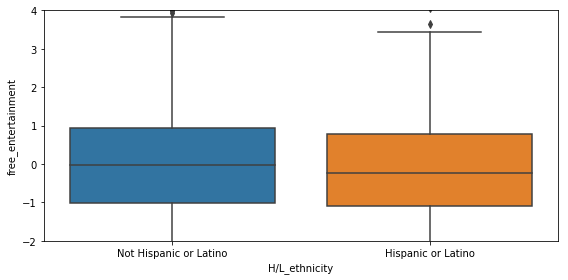

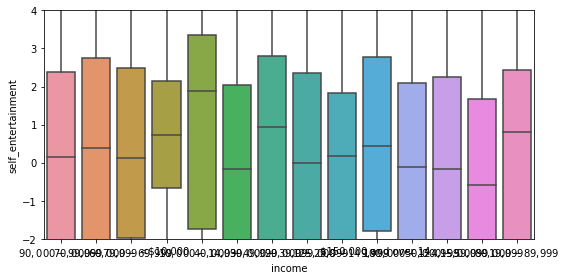

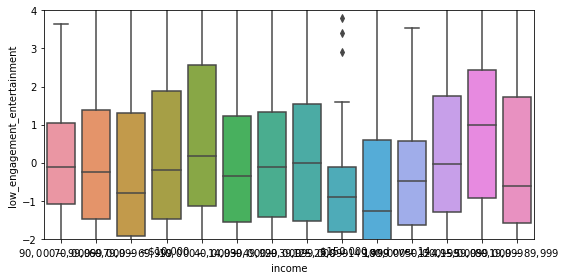

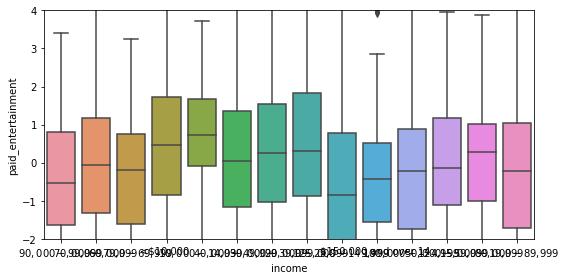

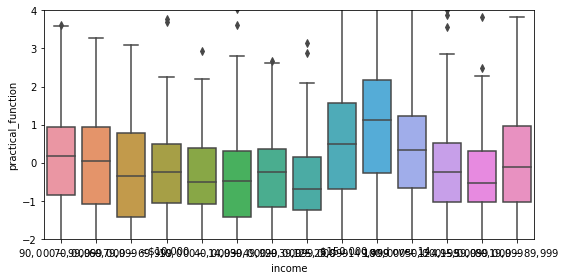

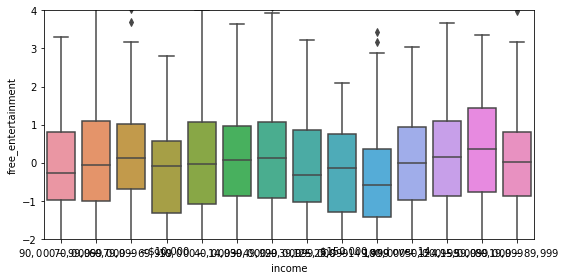

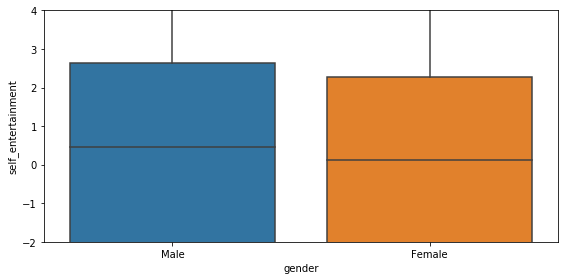

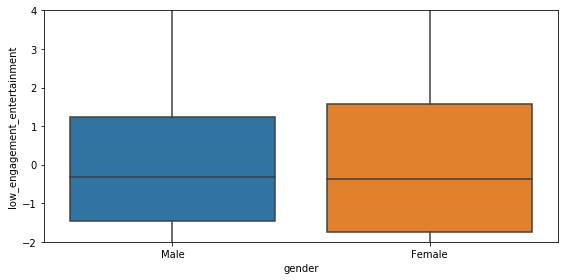

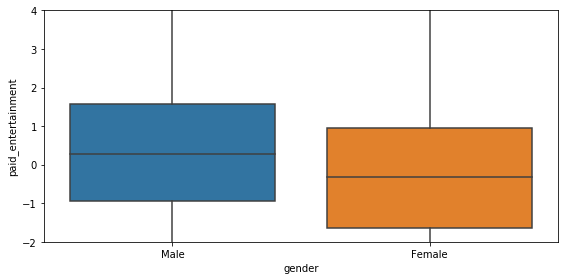

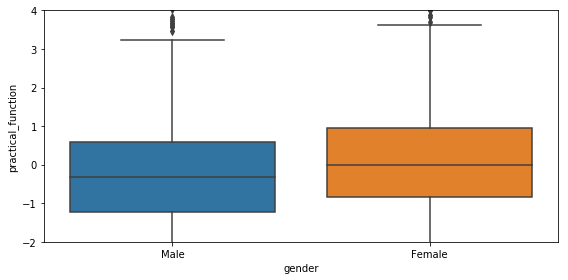

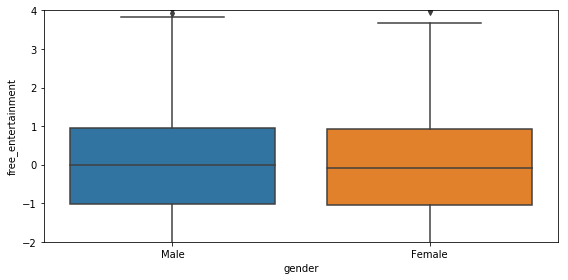

In [20]:
########################
# Step 9: Analyze in more detail: boxplot
########################

category_names = ['age', 'education','marital','no_child', 
                  'child<6','child6_12','child13_17','child>18',
                  'race', 'H/L_ethnicity', 'income', 'gender']

pca_names = ['self_entertainment', 'low_engagement_entertainment', 'paid_entertainment',
                   'practical_function', 'free_entertainment']



for c in category_names:
    for p in pca_names:
        fig, ax = plt.subplots(figsize = (8, 4))
        sns.boxplot(x = c,
                    y =  p,
                    data = final_pca_df)
    
        plt.ylim(-2, 4)
        plt.tight_layout()
        plt.show()

### Analysis on pca Boxplot
The boxplots do not show significant value. Most components contribute similar distribution which is not helpful for further analysis. It is hard to lock our target customer features only based on PCA analysis, Clustering will be used in the following for further analysis.

In [21]:
########################
# save to excel
########################

final_pca_df.to_excel('final_pca_df.xlsx')

# 3.0 Clustering


In [22]:
########################
# Step 1: Remove demographic information
########################

survey_features_reduced = survey.iloc[ : , 2:77]



########################
# Step 2: Scale to get equal variance
########################

scaler = StandardScaler()


scaler.fit(survey_features_reduced)


X_scaled_reduced = scaler.transform(survey_features_reduced)


X_scaled_df = pd.DataFrame(X_scaled_reduced)


X_scaled_df.columns = survey.iloc[ : , 2:77].columns


/Users/uieyao/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/uieyao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


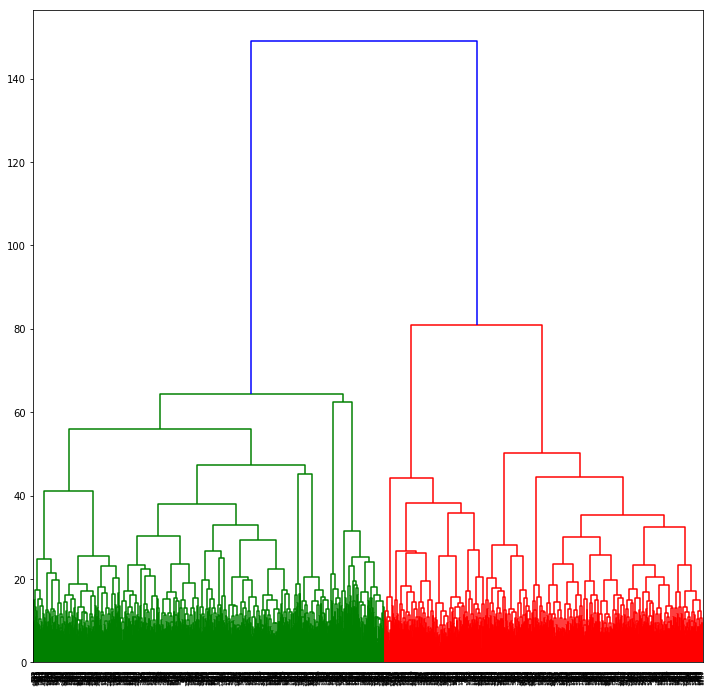

In [23]:
###############################################################################
# Building a Dendrogram
###############################################################################

standard_mergings_ward = linkage(y = X_scaled_df,
                                 method = 'ward')


fig, ax = plt.subplots(figsize=(12, 12))

dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)

plt.savefig('Dendrogram.png')

plt.show()

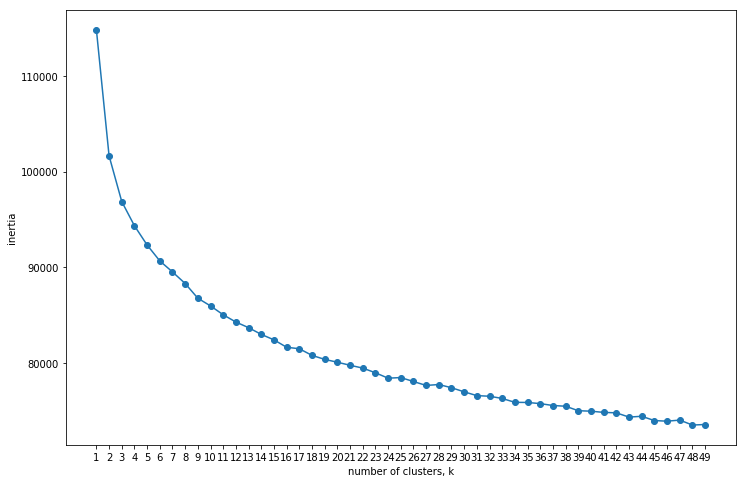

In [24]:
###############################################################################
# Plotting Intertia
###############################################################################

ks = range(1, 50)
inertias = []


for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters = k)


    # Fit model to samples
    model.fit(X_scaled_df)


    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)



# Plot ks vs inertias
fig, ax = plt.subplots(figsize = (12, 8))
plt.plot(ks, inertias, '-o')


plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)

plt.savefig('Intertia.png')

plt.show()


### According to Dendrogram and Intertia
the dataset is quite evenly splited into groups and the elbow seems to appear at 5, 6, 9 or 12. Clusters of 5, 6, 9 or 12 are desired. let's try.

In [29]:
########################
# Step 3: Experiment with different numbers of clusters
########################

########################
# 5 clusters

survey_k = KMeans(n_clusters = 5,
                  random_state = 508)


survey_k.fit(X_scaled_reduced)


survey_kmeans_clusters = pd.DataFrame({'cluster': survey_k.labels_})


print(survey_kmeans_clusters.iloc[: , 0].value_counts())

########################
# 6 clusters

survey_k = KMeans(n_clusters = 6,
                  random_state = 508)


survey_k.fit(X_scaled_reduced)


survey_kmeans_clusters = pd.DataFrame({'cluster': survey_k.labels_})


print(survey_kmeans_clusters.iloc[: , 0].value_counts())

########################
# 9 clusters

survey_k = KMeans(n_clusters = 9,
                  random_state = 508)


survey_k.fit(X_scaled_reduced)


survey_kmeans_clusters = pd.DataFrame({'cluster': survey_k.labels_})


print(survey_kmeans_clusters.iloc[: , 0].value_counts())

########################
# 12 clusters

survey_k = KMeans(n_clusters = 12,
                  random_state = 508)


survey_k.fit(X_scaled_reduced)


survey_kmeans_clusters = pd.DataFrame({'cluster': survey_k.labels_})


print(survey_kmeans_clusters.iloc[: , 0].value_counts())

2    512
0    339
4    277
1    234
3    190
Name: cluster, dtype: int64
2    366
1    363
3    314
4    290
5    192
0     27
Name: cluster, dtype: int64
1    288
8    242
5    235
4    199
0    193
2    186
3    134
6     48
7     27
Name: cluster, dtype: int64
8     222
5     214
10    171
1     163
3     157
7     133
2     129
11    127
6      86
0      81
4      43
9      26
Name: cluster, dtype: int64


### After trying, 5 clusters is considered to give the best grouping effort. Each cluster has efficient objects to study. n_clusters =5 will be used

In [30]:
########################
# Step 4: Analyze cluster centers
########################

survey_k = KMeans(n_clusters = 5,
                  random_state = 508)


survey_k.fit(X_scaled_reduced)


survey_kmeans_clusters = pd.DataFrame({'cluster': survey_k.labels_})


########################

centroids = survey_k.cluster_centers_


centroids_df = pd.DataFrame(centroids)



# Renaming columns
centroids_df.columns = survey_features_reduced.columns


# Sending data to Excel
centroids_df.to_excel('k5_centriods.xlsx')

centroids_df.head()


q2r1      q2r2      q2r3      q2r4      q2r5      q2r6      q2r7  \
0 -0.021193  0.043509  0.009737 -0.126228 -0.126162 -0.061605 -0.133213   
1 -0.160293  0.066058  0.042749  0.191498  0.056664  0.201014  0.136488   
2  0.255281 -0.115912 -0.103070 -0.189712 -0.199519 -0.214773 -0.158277   
3  0.130402  0.581032  0.216922  0.562128  0.724005  0.542251  0.586696   
4 -0.399953 -0.293342 -0.006309 -0.042207 -0.021290 -0.069375 -0.062142   

       q2r8      q2r9  q2r10      q4r1      q4r2      q4r3      q4r4  \
0 -0.050336  0.098466    0.0 -0.035003 -0.089034  0.229104  0.045319   
1 -0.014945 -0.061845    0.0 -0.162684  0.089303  0.012368  0.200471   
2  0.018282 -0.083760    0.0  0.302654 -0.193534 -0.123469 -0.239753   
3  0.587712 -0.086036    0.0  0.286004  1.172581  0.621153  0.993740   
4 -0.362689  0.145573    0.0 -0.575326 -0.413052 -0.488676 -0.463287   

       q4r5      q4r6      q4r7      q4r8      q4r9     q4r10     q4r11  \
0  0.220667  0.214499  0.062541  0.123449 -0.124857 -0.064064 -0.087936   
1 -0.060134 -0.474452 -0.193039 -0.192747 -0.166523 -0.151004 -0.035002   
2  0.043346  0.268921  0.056779  0.133743  0.170202  0.133201 -0.133060   
3  0.219459  0.060795  0.494489  0.561538  0.627015 -0.118032 -0.133060   
4 -0.449911 -0.400478 -0.357595 -0.620631 -0.451204  0.040721  0.474400   

        q11       q12     q13r1     q13r2     q13r3     q13r4     q13r5  \
0  0.188453 -0.036506  0.258550  0.093520 -0.093961 -0.038114  0.047483   
1 -0.267000 -0.359191 -0.199219  0.261680  0.496879  0.078483  0.495096   
2  0.313594  0.142354  0.109550 -0.150350 -0.453999  0.065627 -0.416693   
3  0.148777 -0.546075  0.313724  0.960452  1.354342  0.701726  1.239609   
4 -0.686771  0.459550 -0.565806 -0.716400 -0.394565 -0.622285 -0.556419   

      q13r6     q13r7     q13r8     q13r9    q13r10    q13r11    q13r12  \
0  0.279417 -0.168878 -0.136255  0.130022 -0.064449 -0.224189  0.026188   
1  0.127357  0.485998  0.475040  0.291259  0.129403  0.174948  0.138512   
2 -0.071156 -0.427111 -0.361471 -0.408697  0.025265 -0.018097 -0.026567   
3  0.518116  1.516192  1.428653  1.049186  0.766763  1.069641  0.746408   
4 -0.673409 -0.454403 -0.546353 -0.369403 -0.603079 -0.573660 -0.611930   

      q24r1     q24r2     q24r3     q24r4     q24r5     q24r6     q24r7  \
0  0.239247  0.531362  0.523528 -0.014747  0.472093  0.524270  0.591736   
1 -0.009752 -0.867210 -0.266959  0.175374  0.032067 -0.745860 -0.563995   
2 -0.280589  0.194234  0.001620 -0.293936 -0.255369  0.220107  0.222087   
3  0.685896  0.234569  0.429535  0.560430  0.744726  0.319834  0.436908   
4 -0.236396 -0.437620 -0.712811  0.028790 -0.643653 -0.637759 -0.957924   

      q24r8     q24r9    q24r10    q24r11    q24r12     q25r1     q25r2  \
0  0.543639 -0.176968  0.616882  0.550588  0.501560  0.638178  0.632088   
1 -0.700835  0.402587 -0.654202 -0.416904 -0.703585 -0.450762 -0.333305   
2  0.194953 -0.326077  0.191578  0.114548  0.300901 -0.079695 -0.096583   
3  0.364886  0.676164  0.509546  0.645761  0.445353  0.760426  0.725037   
4 -0.683909  0.015405 -0.905925 -0.976307 -0.881114 -0.774515 -0.810799   

      q25r3     q25r4     q25r5     q25r6     q25r7     q25r8     q25r9  \
0  0.686598  0.608146  0.659413 -0.052662  0.536488  0.507422  0.624959   
1 -0.463153 -0.503044 -0.447241  0.551438 -0.606159 -0.239818 -0.460360   
2 -0.069525  0.002211  0.026752 -0.474621  0.003117 -0.058111 -0.058632   
3  0.621550  0.580521  0.713015  0.965289  0.436166  0.710088  0.540102   
4 -0.746849 -0.721589 -0.967713 -0.186220 -0.449443 -0.798059 -0.638039   

     q25r10    q25r11    q25r12    q26r18     q26r3     q26r4     q26r5  \
0  0.540250  0.539568  0.186023  0.582944  0.438209  0.591076  0.499154   
1 -0.672803 -0.384434 -0.157536  0.028144 -0.409467  0.078950  0.006937   
2  0.021241 -0.088603 -0.058733 -0.337666 -0.079558 -0.409398 -0.363588   
3  0.568220  0.670277  0.533495  0.891613  0.361716  0.886316  0.874326   
4 -0.521827 -0.631566 -0.351954 -0.724639 

In [31]:
########################
# Step 5: Analyze cluster memberships
########################


X_scaled_reduced_df = pd.DataFrame(X_scaled_reduced)


X_scaled_reduced_df.columns = survey_features_reduced.columns


clusters_df = pd.concat([survey_kmeans_clusters,
                         X_scaled_reduced_df],
                         axis = 1)

In [32]:
########################
# Step 6: Reattach demographic information 
########################

final_clusters_df = pd.concat([survey.loc[ : , ['age', 'education','marital',
                                           'no_child', 'child<6','child6_12',
                                           'child13_17','child>18','race', 
                                           'H/L_ethnicity', 'income', 'gender']] , clusters_df], axis = 1)


final_clusters_df.to_excel('final_clusters_df.xlsx')

final_clusters_df.head()

age         education  marital  no_child  child<6  child6_12  child13_17  \
0  35-39      Some college  Married         0        0          0           1   
1  25-29      Some college   Single         1        0          0           0   
2  18-24  Some high school   Single         1        0          0           0   
3  18-24  College graduate   Single         1        0          0           0   
4  30-34      Some college  Married         0        1          0           0   

   child>18                       race           H/L_ethnicity  \
0         0         White or Caucasian  Not Hispanic or Latino   
1         0  Black or African American  Not Hispanic or Latino   
2         0         White or Caucasian  Not Hispanic or Latino   
3         0  Black or African American  Not Hispanic or Latino   
4         0         White or Caucasian  Not Hispanic or Latino   

             income  gender  cluster      q2r1      q2r2      q2r3      q2r4  \
0  $90,000-$99,999     Male        4 -1.006464  1.774749  1.321704 -0.501610   
1  $70,000-$79,999   Female        2 -1.006464 -0.563460  1.321704 -0.501610   
2  $60,000-$69,999   Female        2 -1.006464  1.774749  1.321704 -0.501610   
3         <$10,000     Male        3 -1.006464 -0.563460 -0.756599 -0.501610   
4  $90,000-$99,999   Female        1 -1.006464 -0.563460 -0.756599  1.993579   

       q2r5      q2r6     q2r7      q2r8      q2r9  q2r10      q4r1     q4r2  \
0 -0.242205 -0.311159 -0.20739 -0.490518 -0.197033    0.0 -1.508066 -0.48647   
1 -0.242205 -0.311159 -0.20739 -0.490518 -0.197033    0.0  0.663101 -0.48647   
2 -0.242205 -0.311159 -0.20739 -0.490518 -0.197033    0.0 -1.508066 -0.48647   
3  4.128742 -0.311159 -0.20739 -0.490518 -0.197033    0.0  0.663101 -0.48647   
4 -0.242205 -0.311159 -0.20739 -0.490518 -0.197033    0.0  0.663101 -0.48647   

       q4r3      q4r4      q4r5      q4r6      q4r7      q4r8      q4r9  \
0  1.074968 -0.602162  0.554525 -2.086079  0.937515 -0.946041 -0.731515   
1 -0.930261 -0.602162 -1.803345  0.479368 -1.066649 -0.946041 -0.731515   
2 -0.930261 -0.602162  0.554525  0.479368  0.937515 -0.946041 -0.731515   
3 -0.930261  1.660683  0.554525  0.479368 -1.066649 -0.946041 -0.731515   
4 -0.930261 -0.602162 -1.803345  0.479368 -1.066649 -0.946041 -0.731515   

      q4r10    q4r11       q11       q12     q13r1     q13r2     q13r3  \
0 -0.293384 -0.13306  0.106139 -1.651901 -2.958690 -1.033605 -0.684239   
1 -0.293384 -0.13306 -0.794009  1.328337  0.463834 -1.033605 -0.684239   
2 -0.293384 -0.13306 -1.694156  1.328337  0.463834 -1.033605 -0.684239   
3 -0.293384 -0.13306  0.106139 -2.396960  0.463834 -1.033605  1.296991   
4 -0.293384 -0.13306 -1.694156  1.328337  0.463834 -0.227497 -0.684239   

      q13r4     q13r5     q13r6     q13r7     q13r8     q13r9    q13r10  \
0 -1.322699 -0.728073 -1.729813 -0.612894 -0.662870  0.701679 -1.101639   
1  0.371753 -0.728073 -0.484605 -0.612894 -0.662870 -1.013291 -1.101639   
2 -1.322699 -0.728073  0.760604 -0.612894  0.345732 -1.013291 -1.101639   
3  1.218980 -0.728073  0.760604 -0.612894  0.345732  1.559164  1.440101   
4  1.218980  0.204245 -0.484605  0.432394  0.345732  0.701679  1.440101   

     q13r11    q13r12     q24r1     q24r2     q24r3     q24r4     q24r5  \
0 -0.837288 -1.222750  0.750853 -0.309463 -2.692006  1.426613  0.602711   
1 -0.837288 -1.222750  1.400421  0.734638  0.155979  0.150840 -0.089158   
2 -0.837288  1.160308 -1.197849  0.734638  0.155979 -1.762818  0.602711   
3  1.971366  1.160308  1.400421 -1.353565  0.867975  0.788727  1.294580   
4  1.035148  1.160308  0.101286 -0.309463  0.155979 -0.487046  0.602711   

      q24r6     q24r7     q24r8     q24r9    q24r10    q24r11    q24r12  \
0 -0.182730  0.064325  0.952423 -0.116626 -0.869543 -0.436960 -0.019381   
1  0.772142 -0.843248 -0.009921  1.743005  0.046635  1.127428 -0.019381   
2  0.772142  0.971899  0.952423 -0.736503  0.962813  0.345234 -0.019381   
3 -1.137602  0.064325  0.952423  0.503251  0.046635 -0.436960

### Centroids Analysis
After analyzing on centroids on each behavioral quesion. Due to the massive amount of variables, it will be wiser to detail analysis on selected variables. The following 20 questions are selected as significant for recognizing target customer group. They are selected on a cluster-based, therefore, help in finding demographic features on each cluster.

- Cluster 0
    - 'q26r10', 'q25r5', 'q26r17', 'q24r10', 'q26r14', 'q24r11'
- Cluster 1
    - 'q13r3', 'q24r9', 'q13r9', 'q26r11', 'q4r4', 'q24r4', 'q13r12'
- Cluster 2
    - 'q11', 'q4r1', 'q24r12', 'q4r6', 'q24r6', 'q24r2', 'q24r10'
- Cluster 3
    - 'q13r7', 'q13r8', 'q13r5', 'q13r11', 'q26r12'
- Cluster 4
    - 'q4r11', 'q12', 'q2r9', 'q4r10', 'q24r4', 'q24r9'
    
These are used for further boxplot analysis

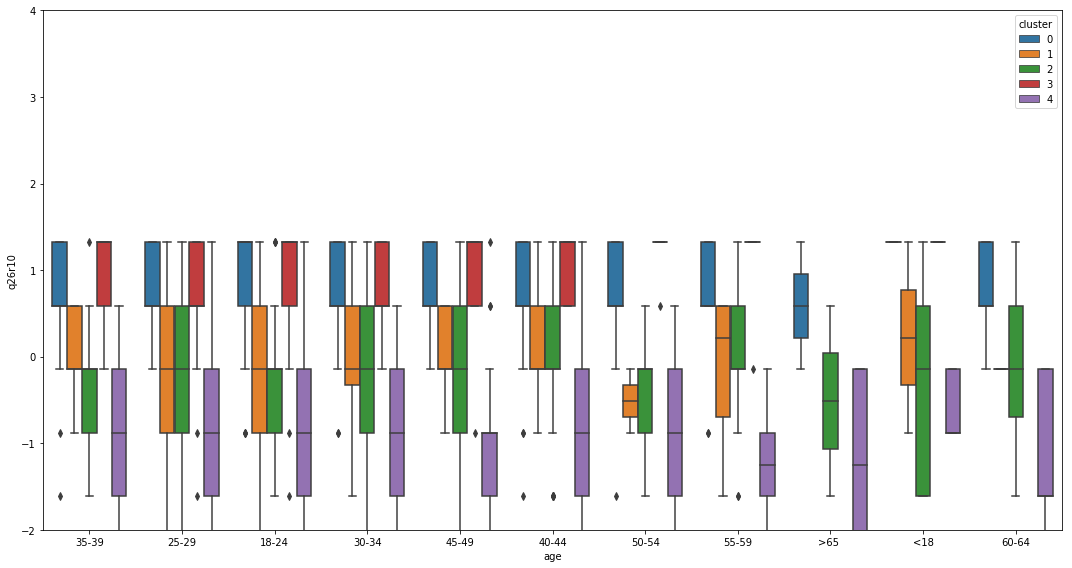

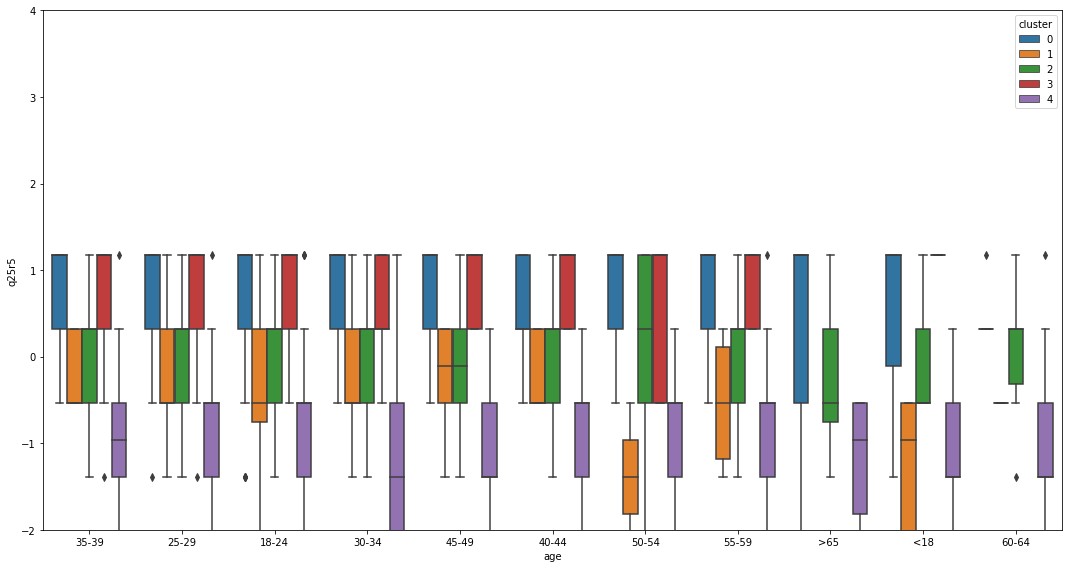

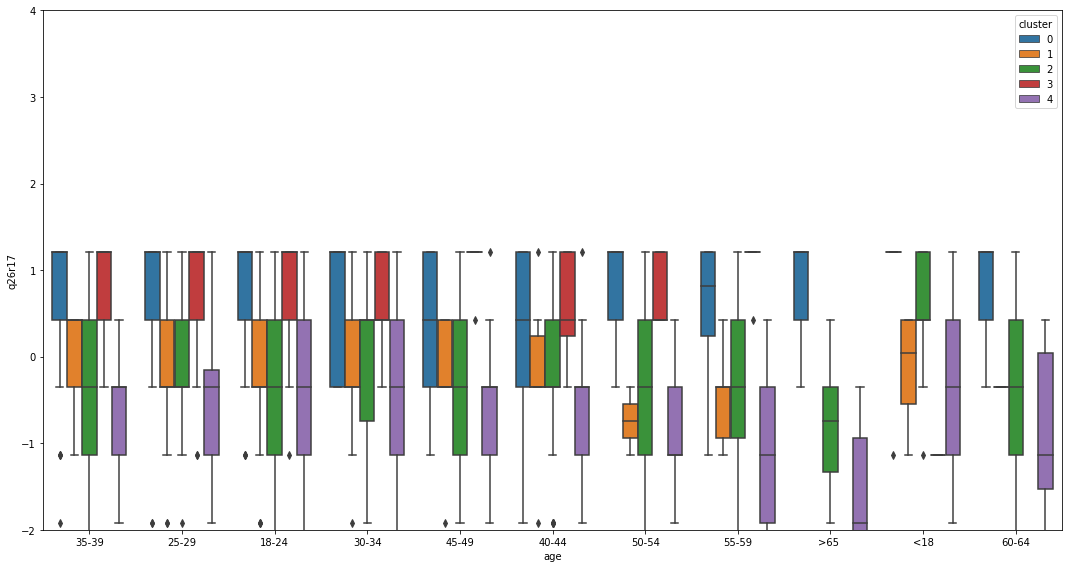

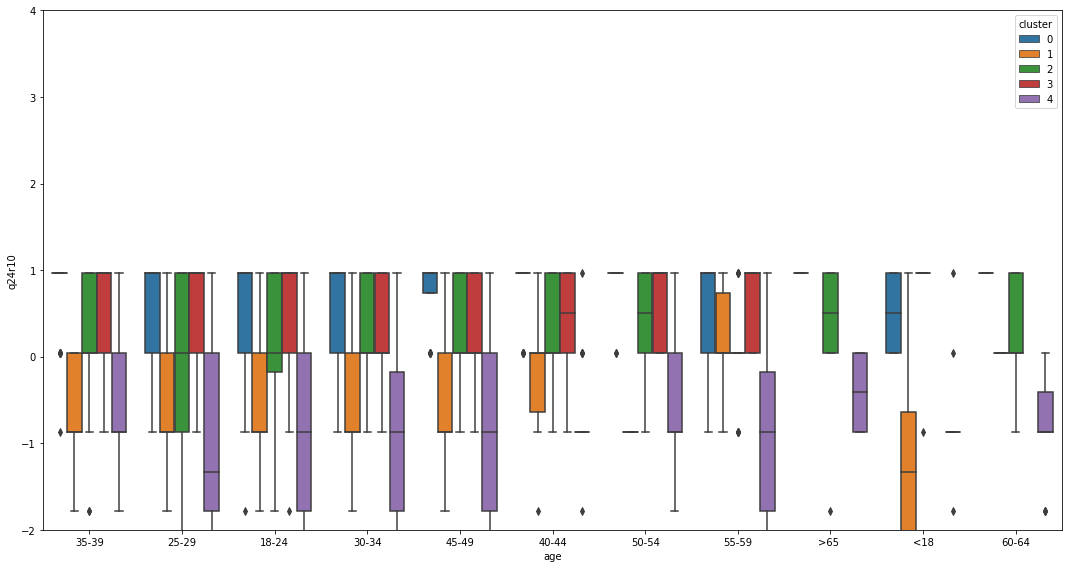

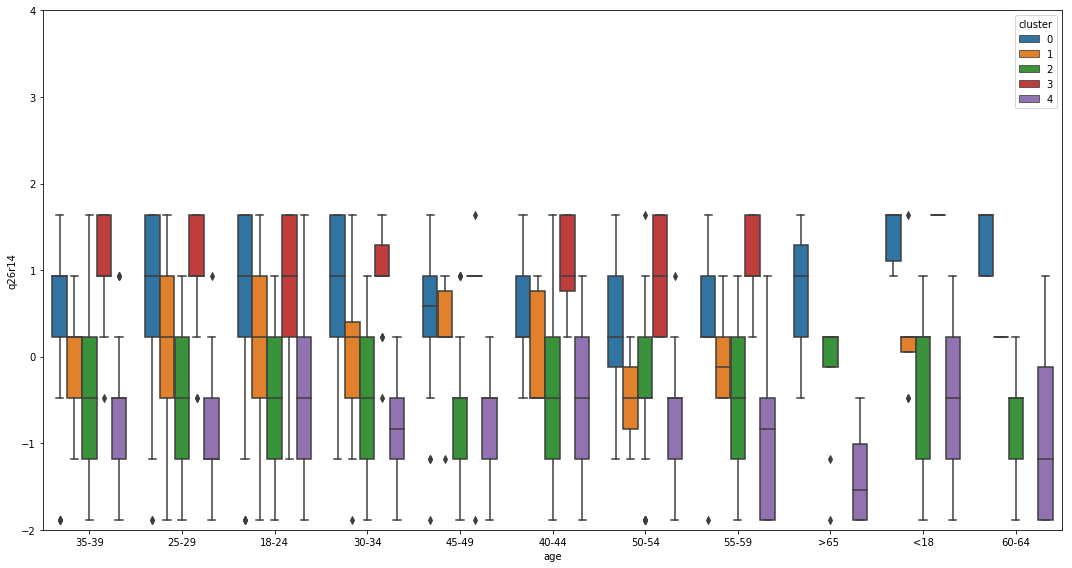

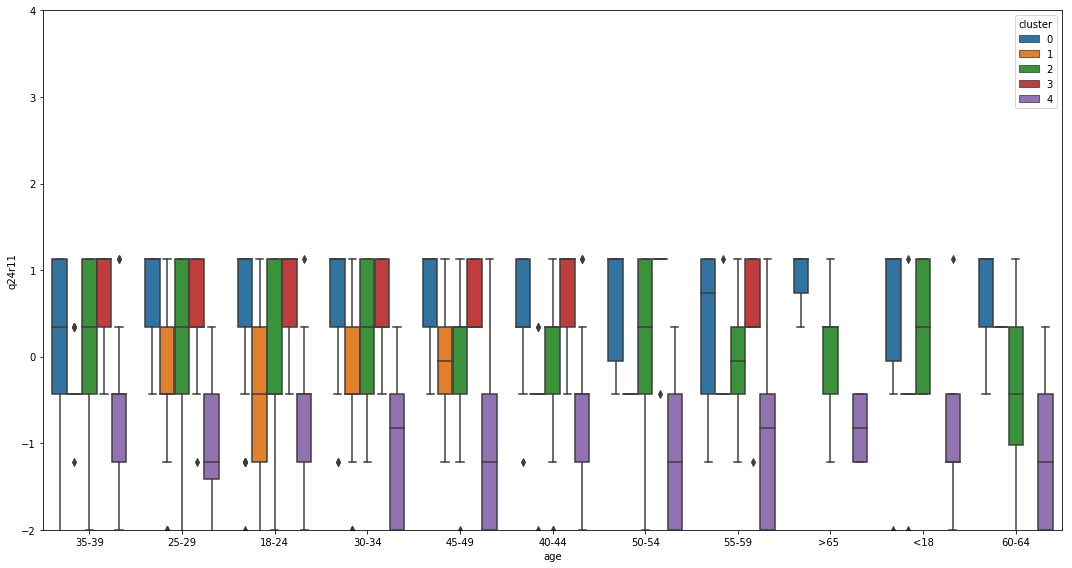

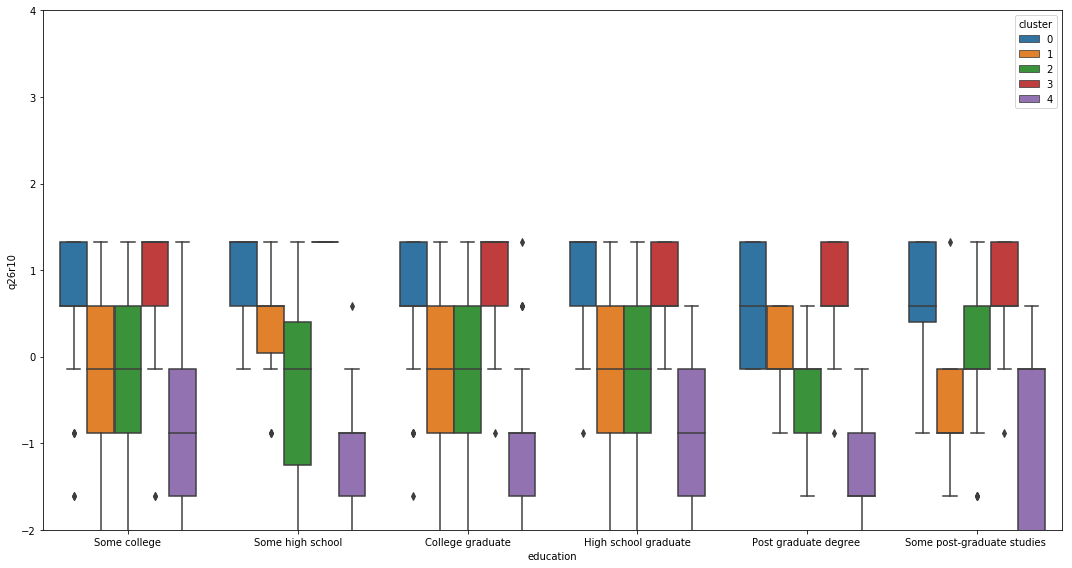

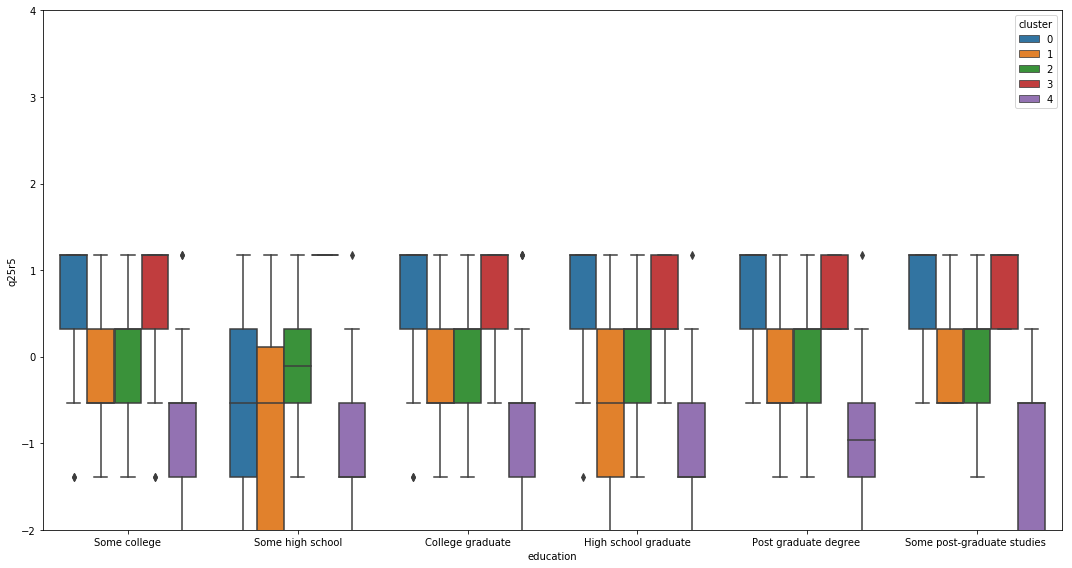

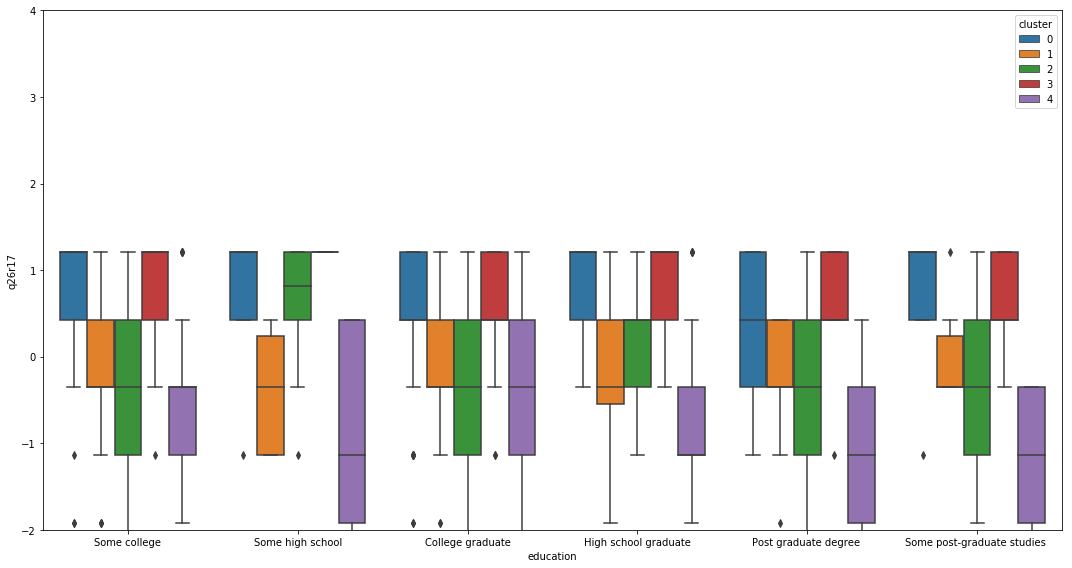

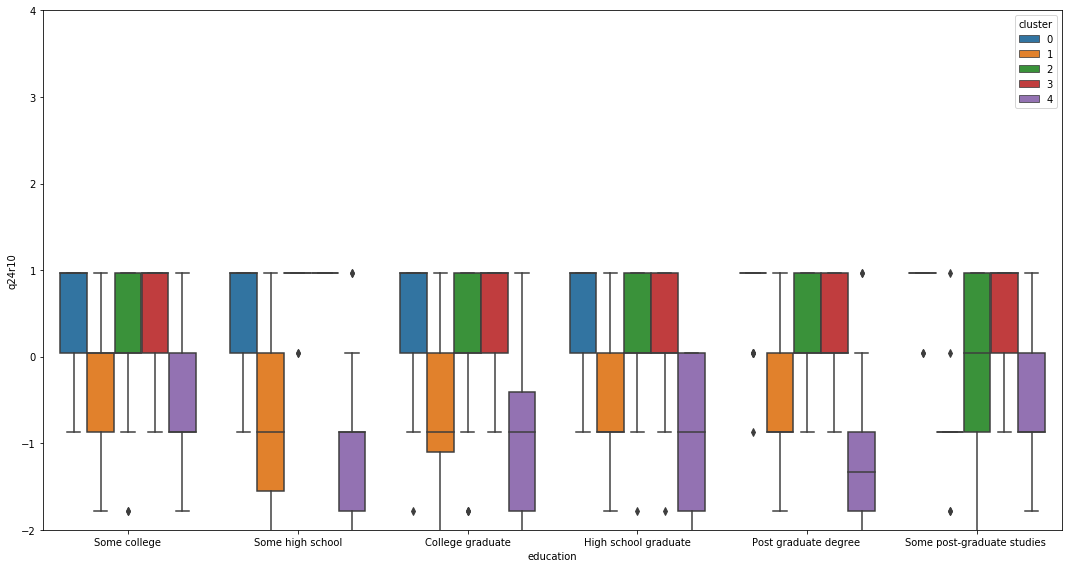

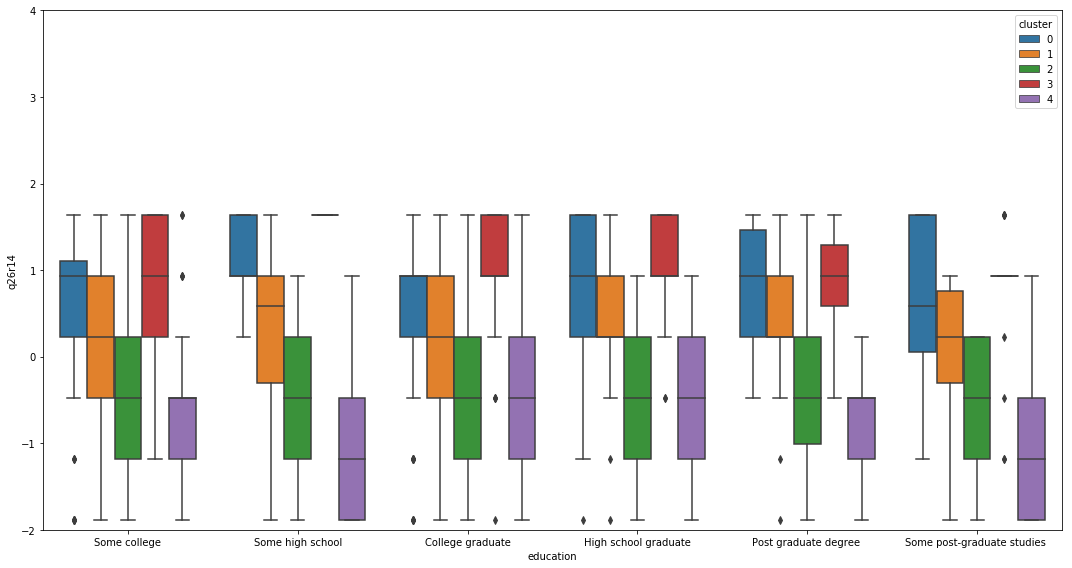

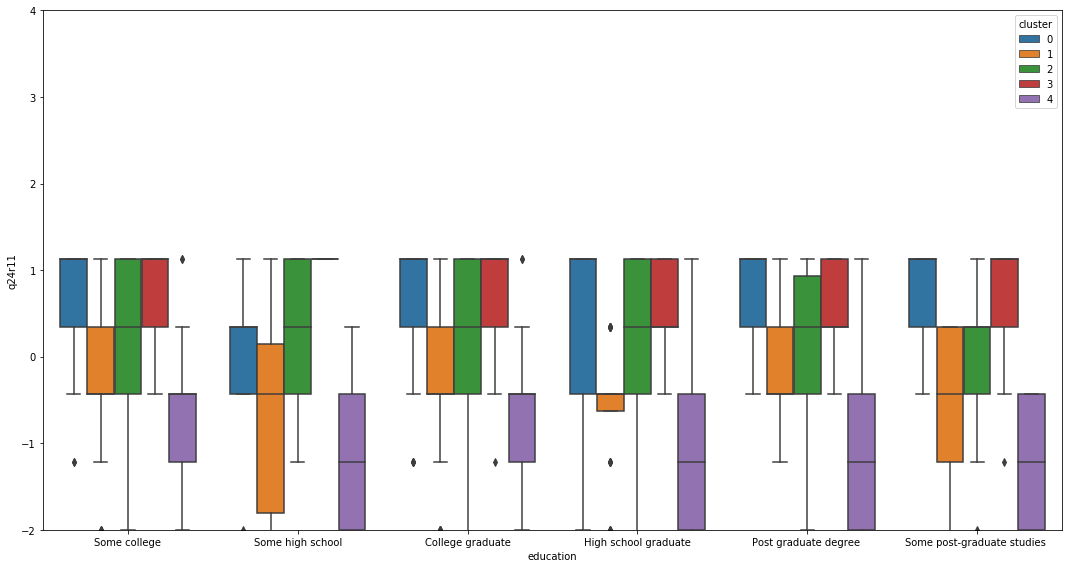

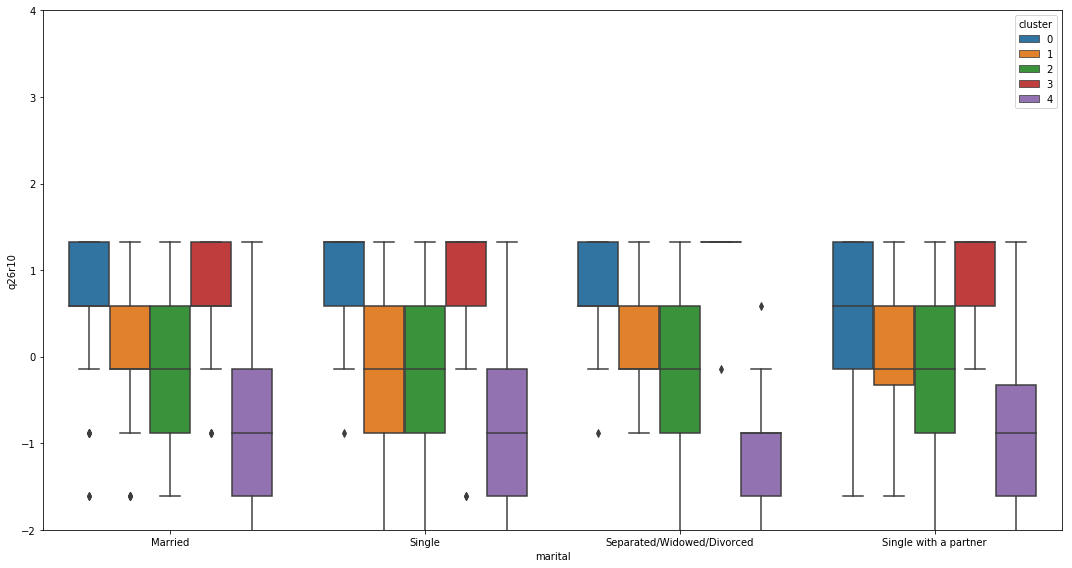

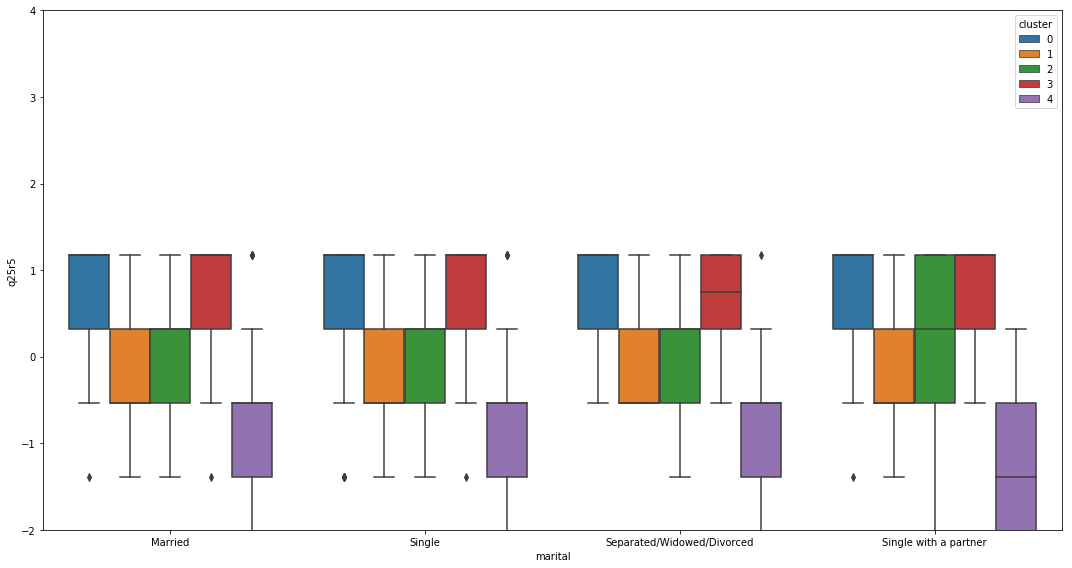

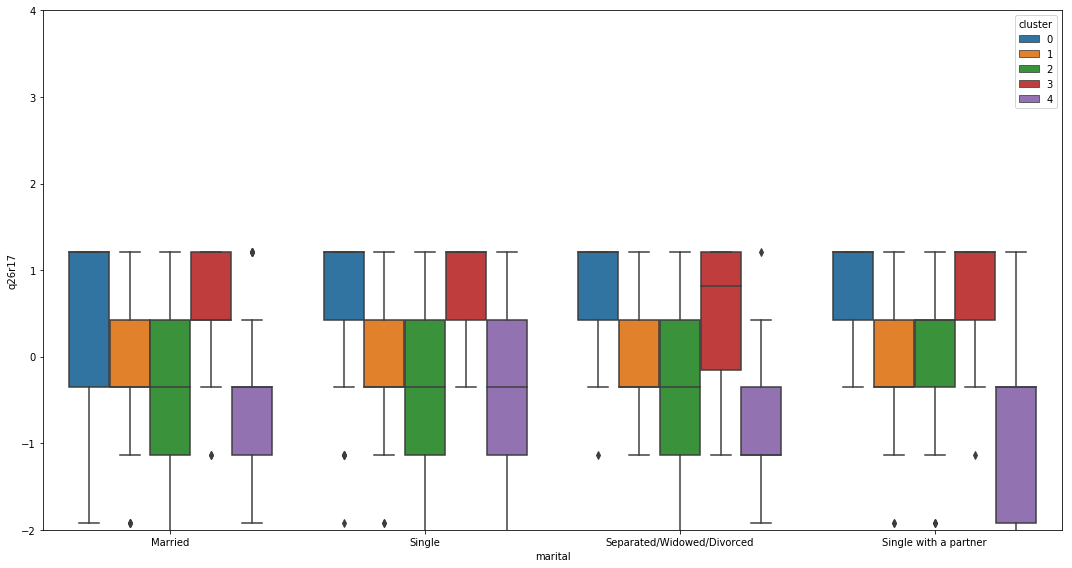

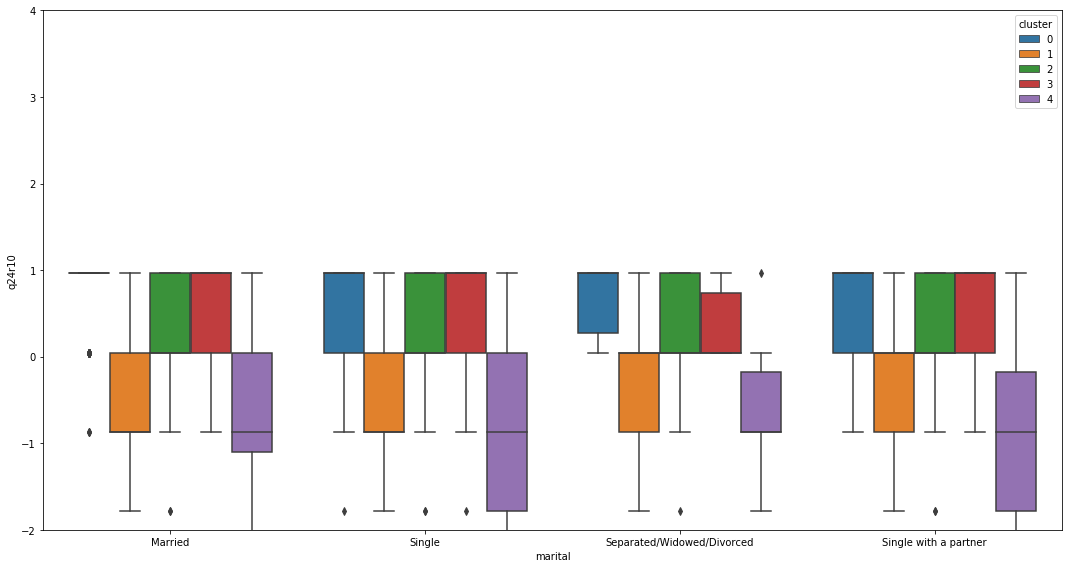

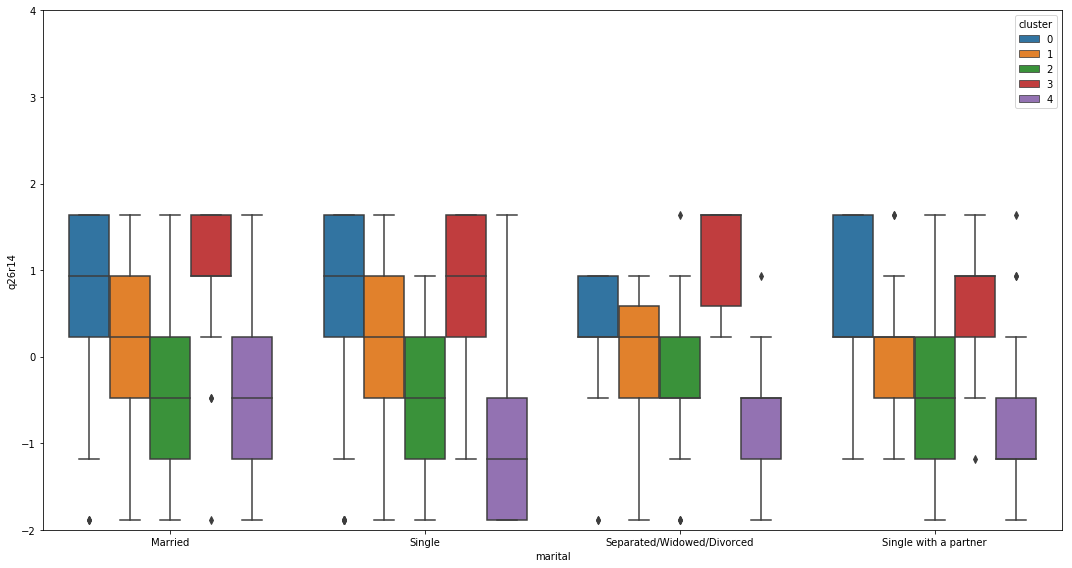

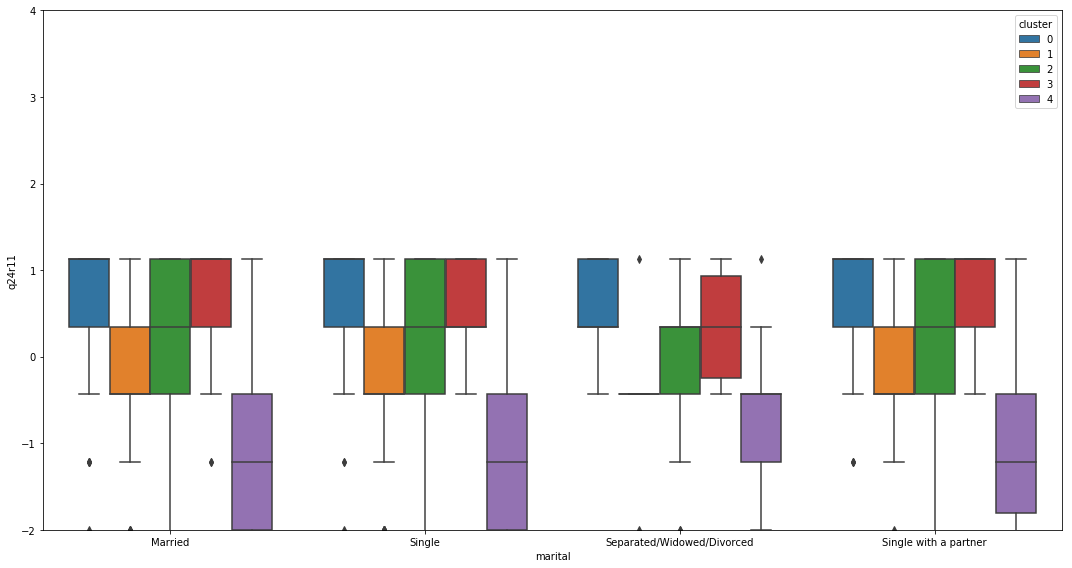

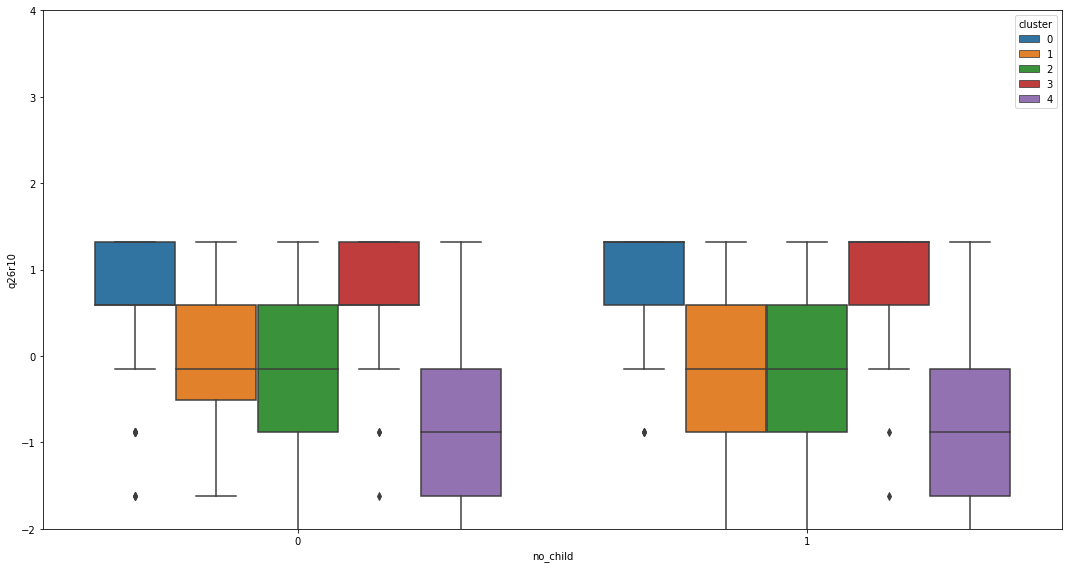

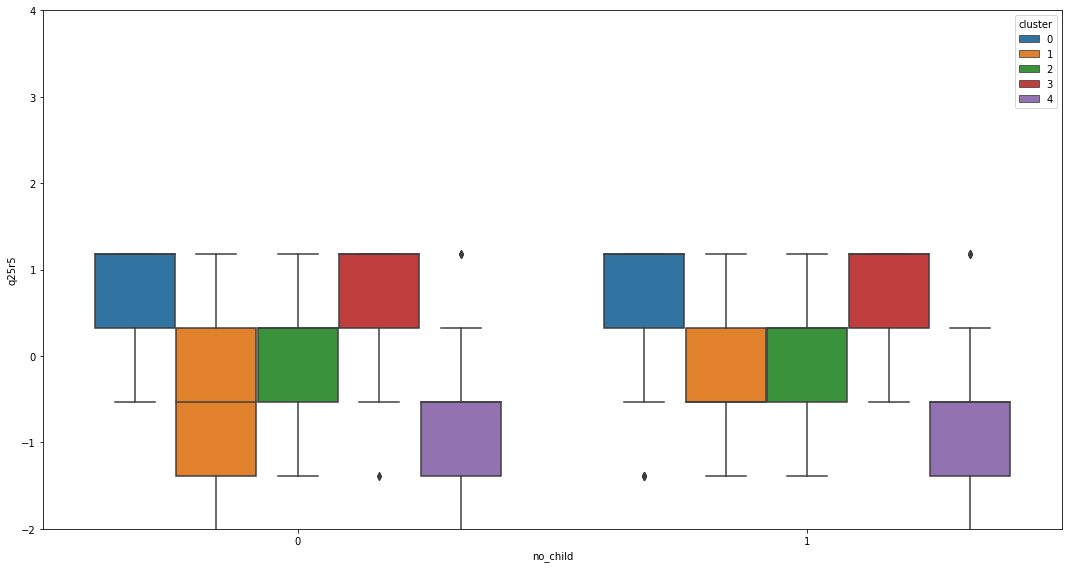

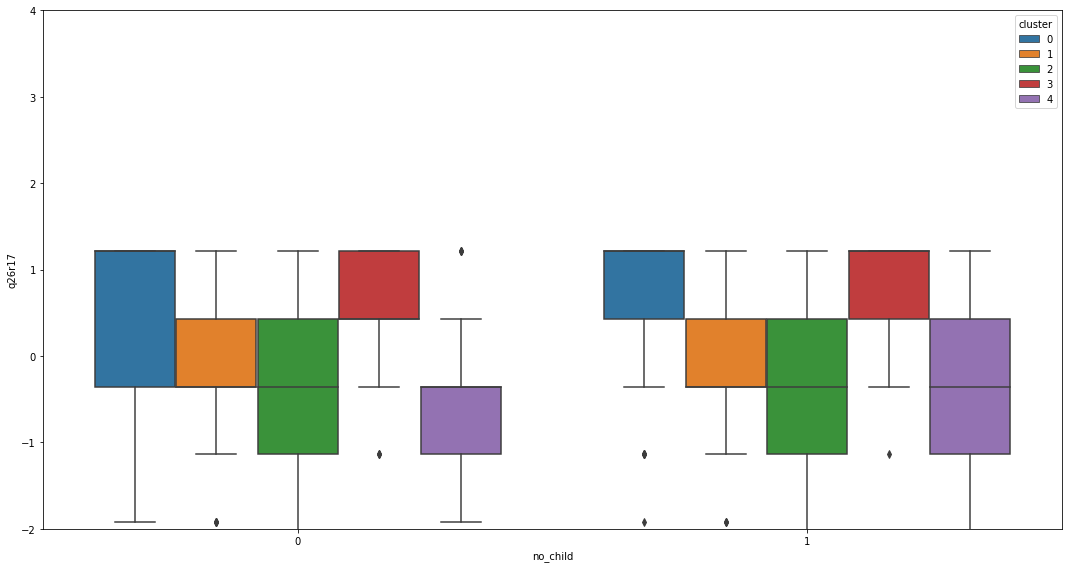

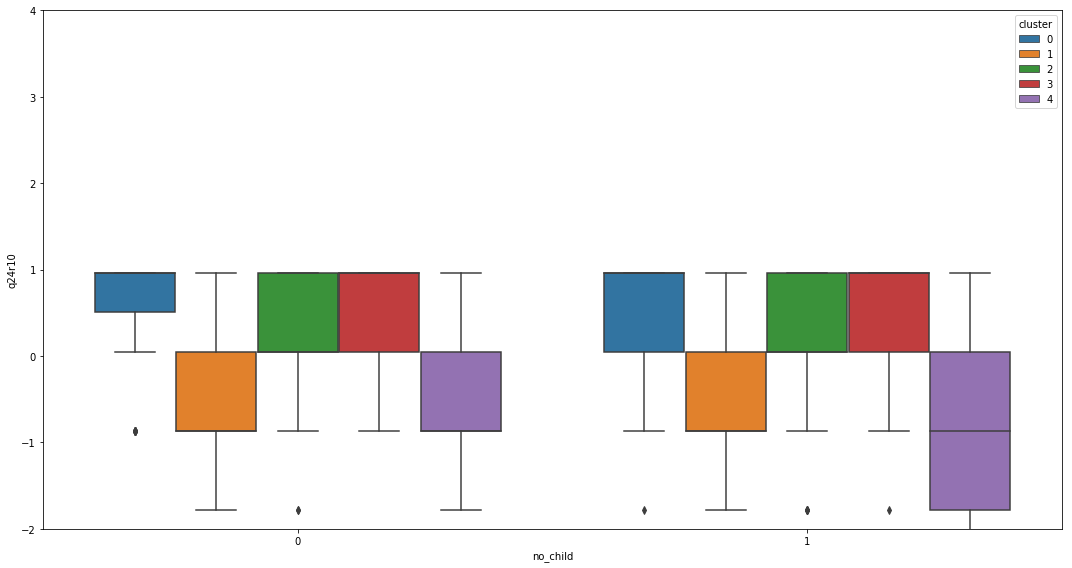

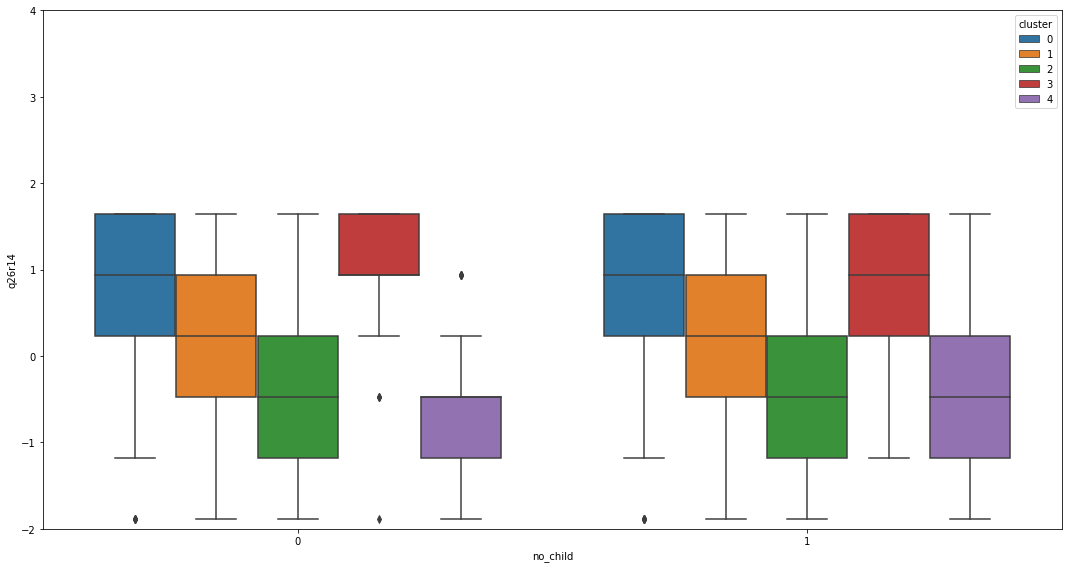

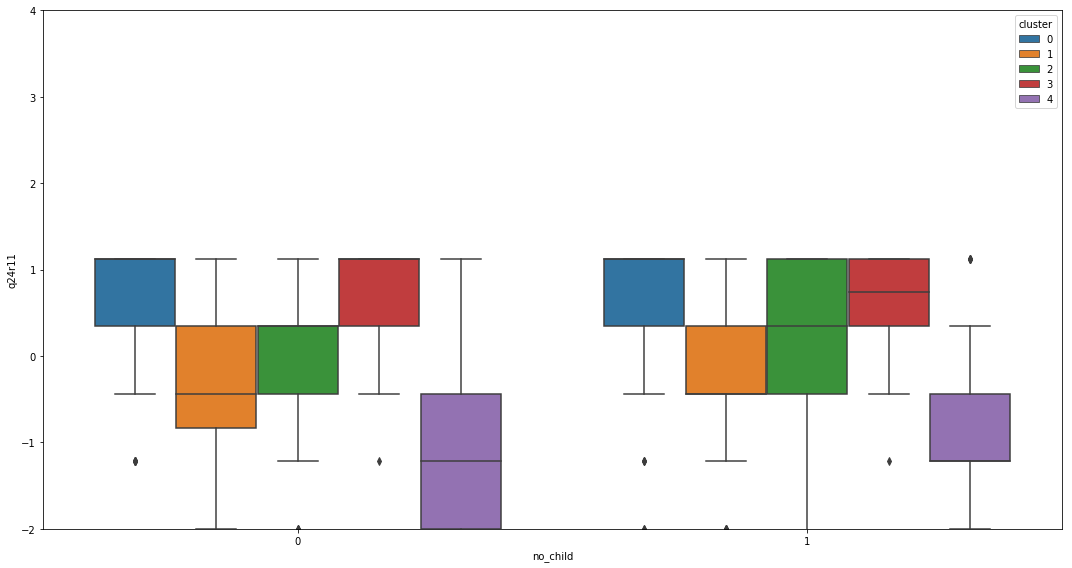

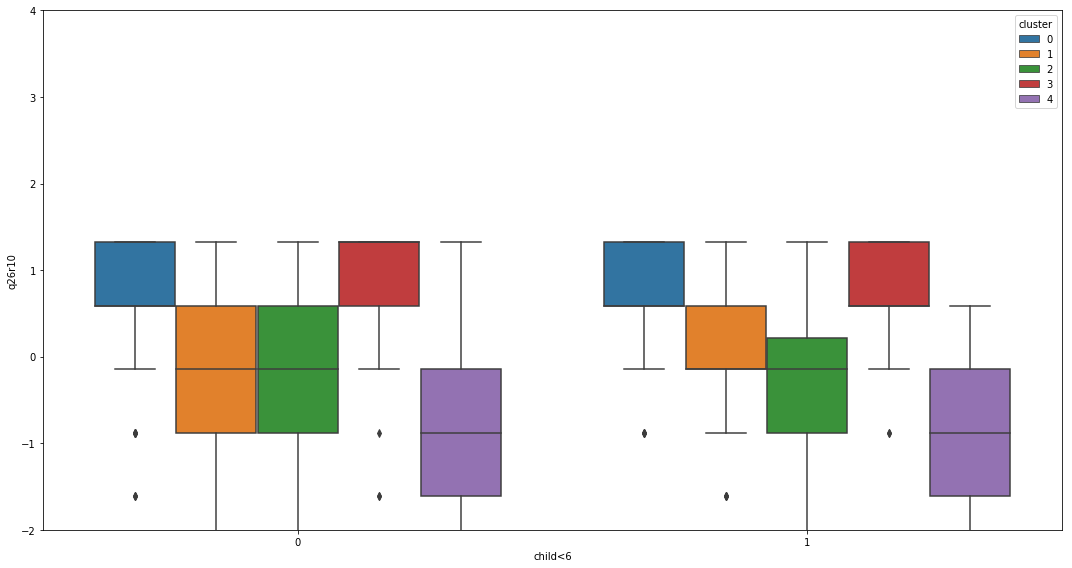

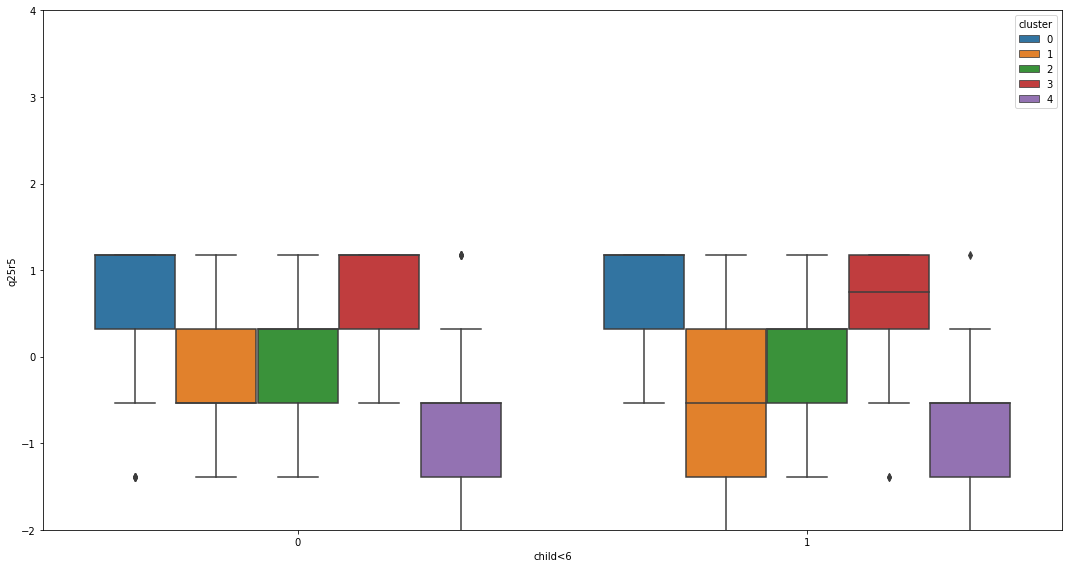

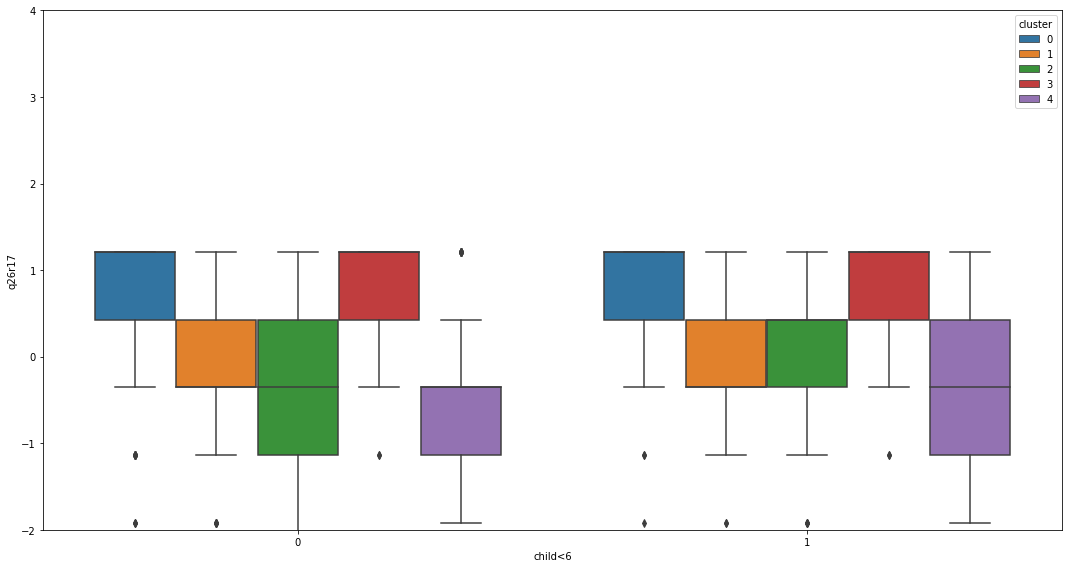

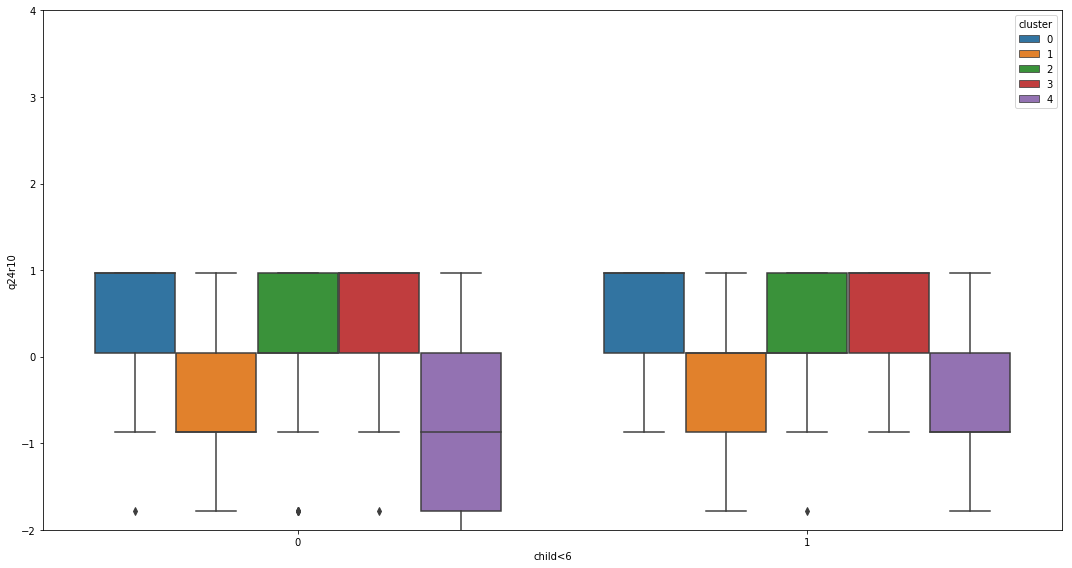

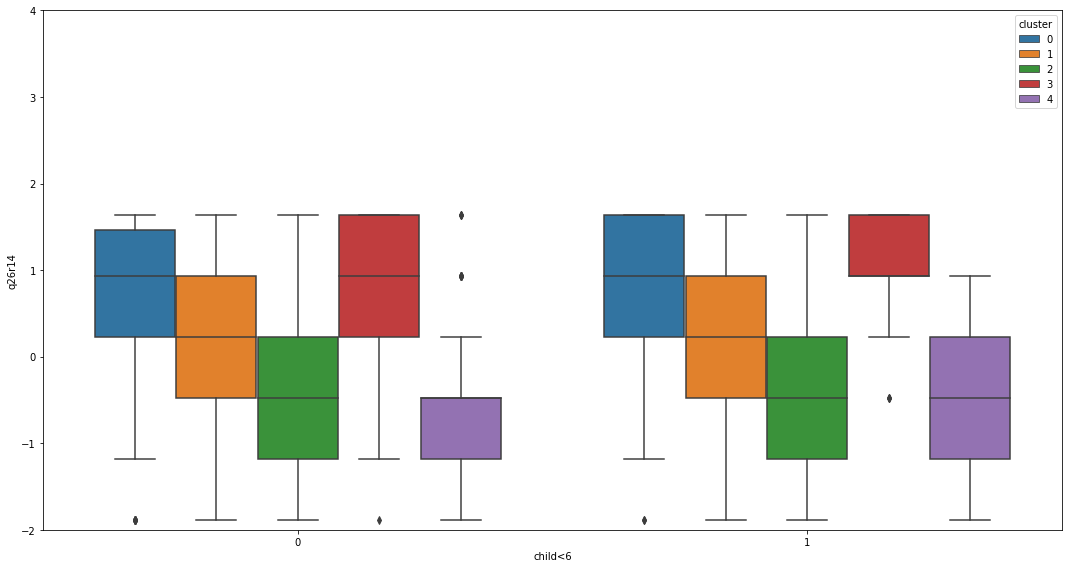

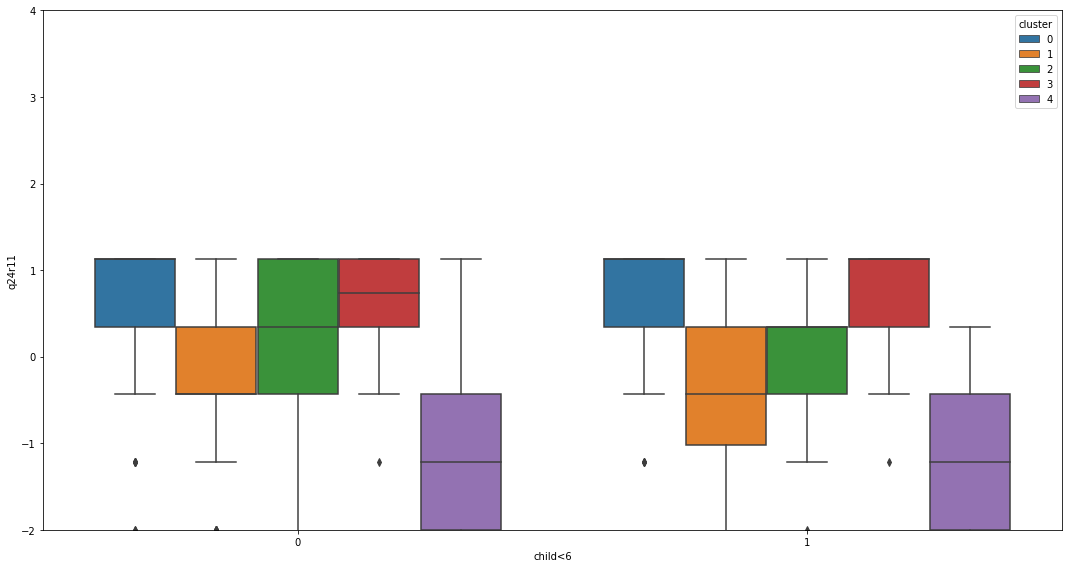

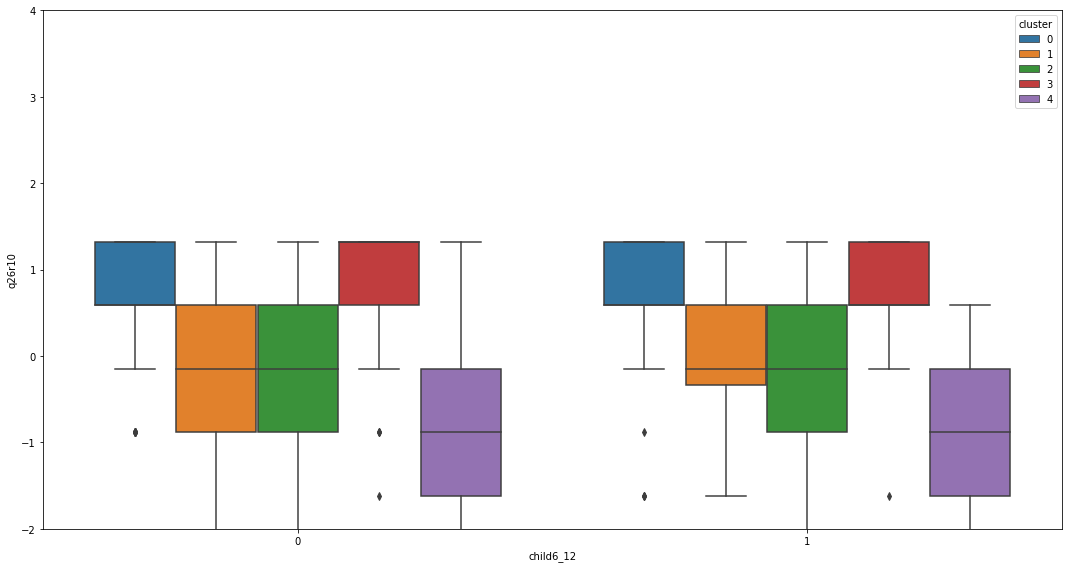

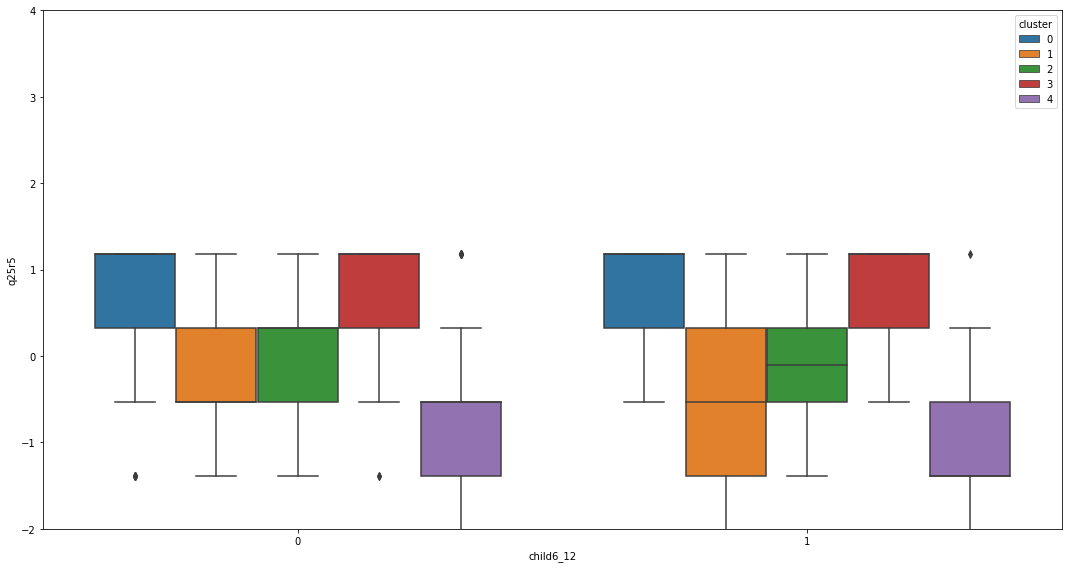

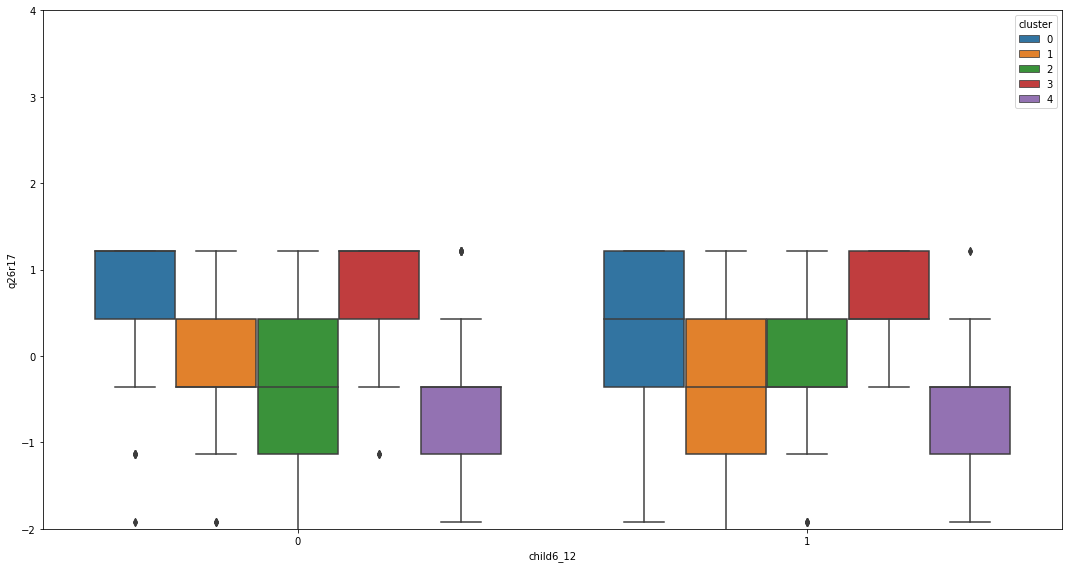

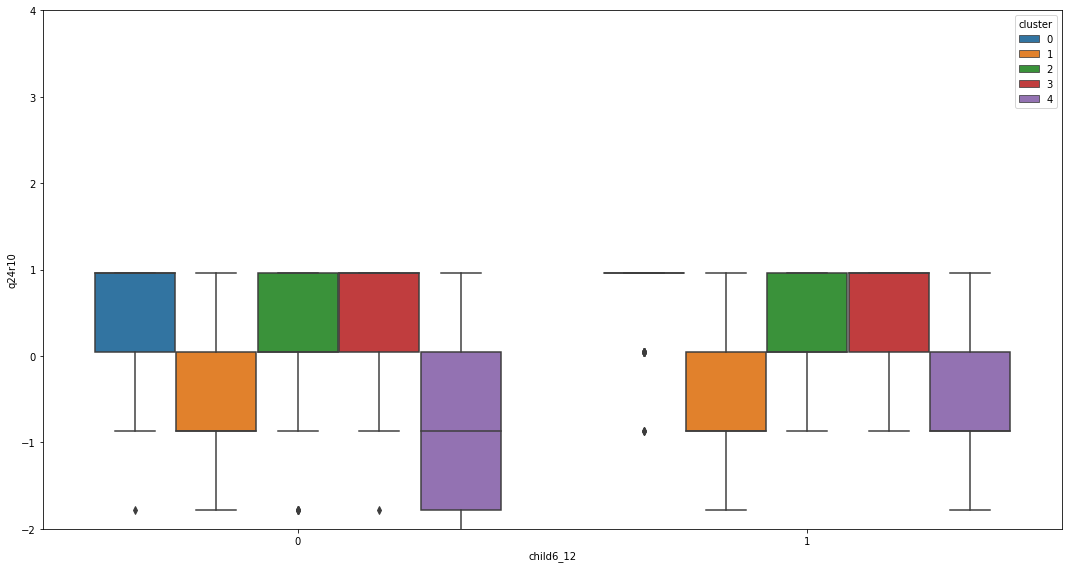

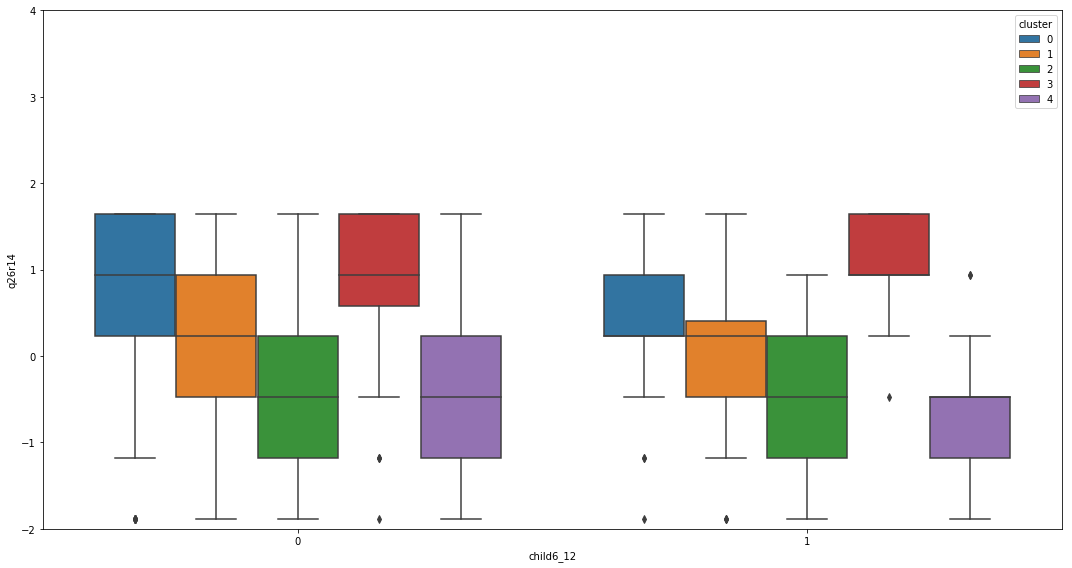

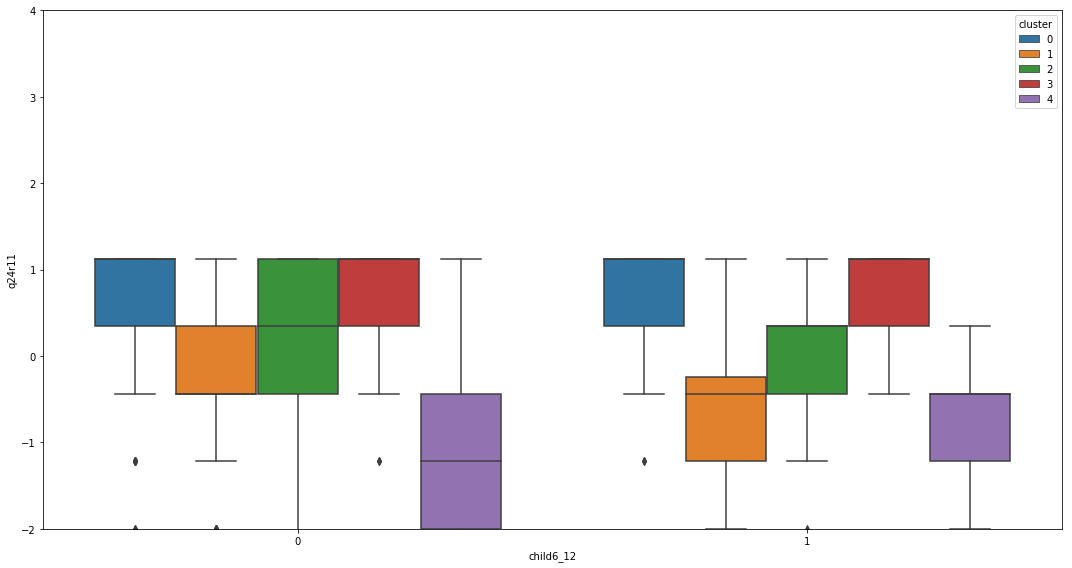

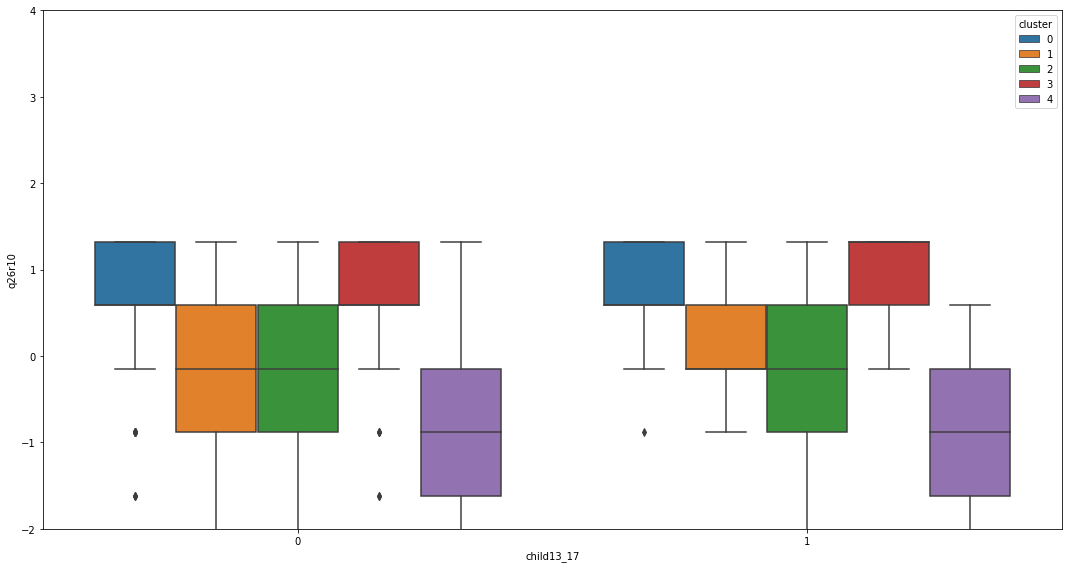

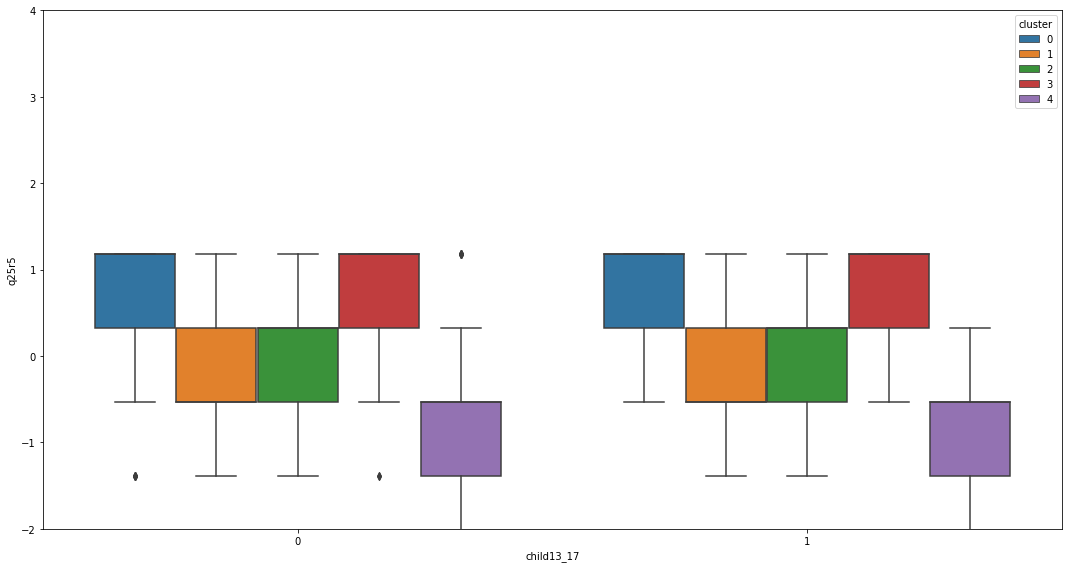

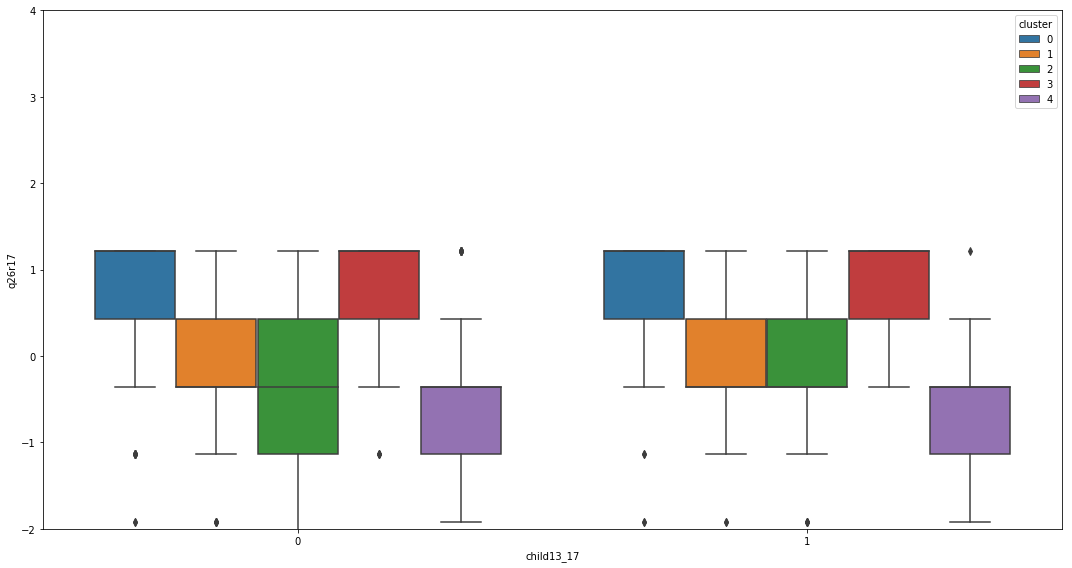

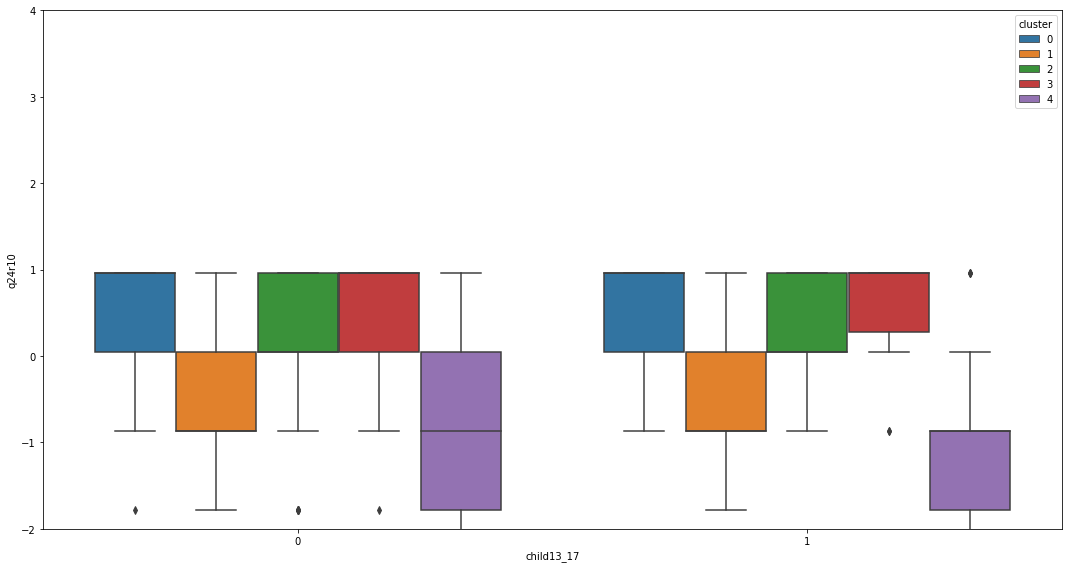

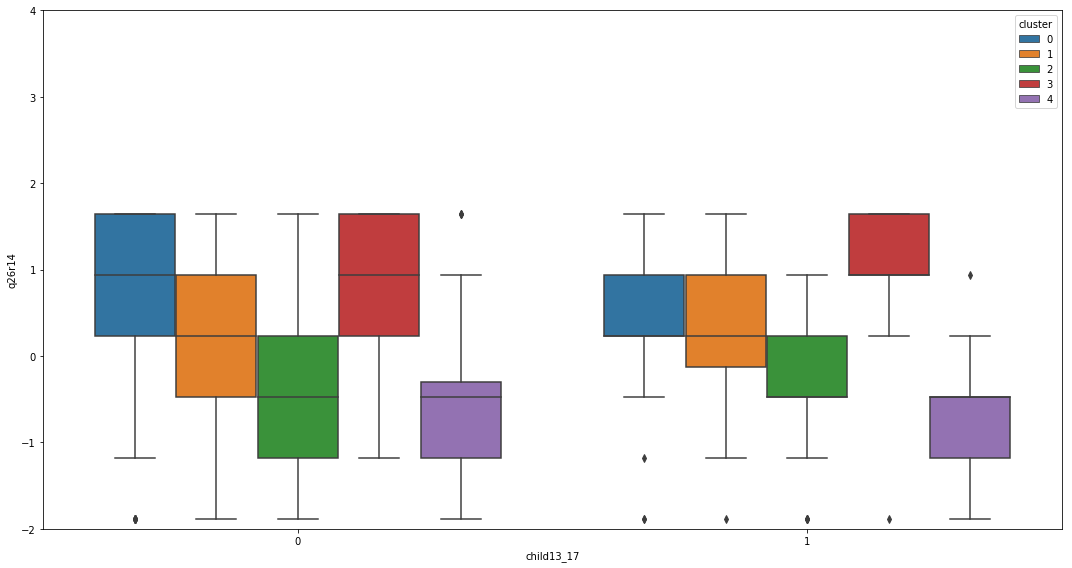

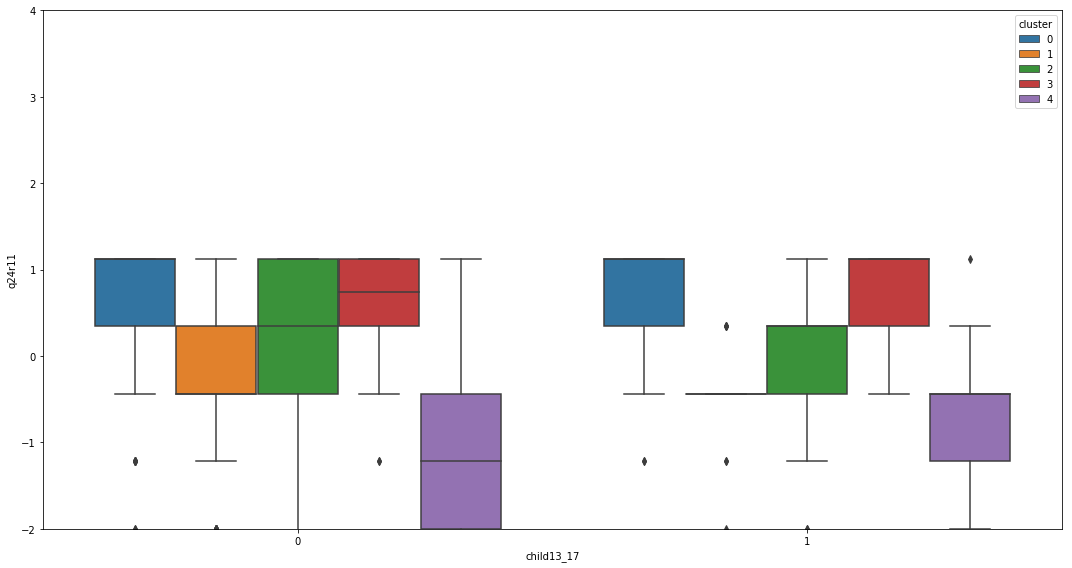

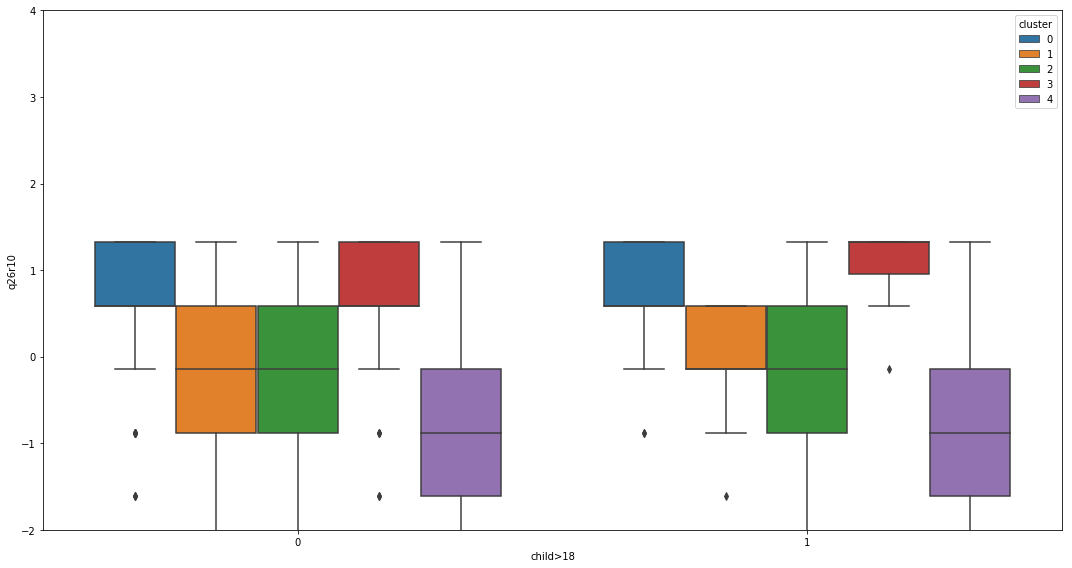

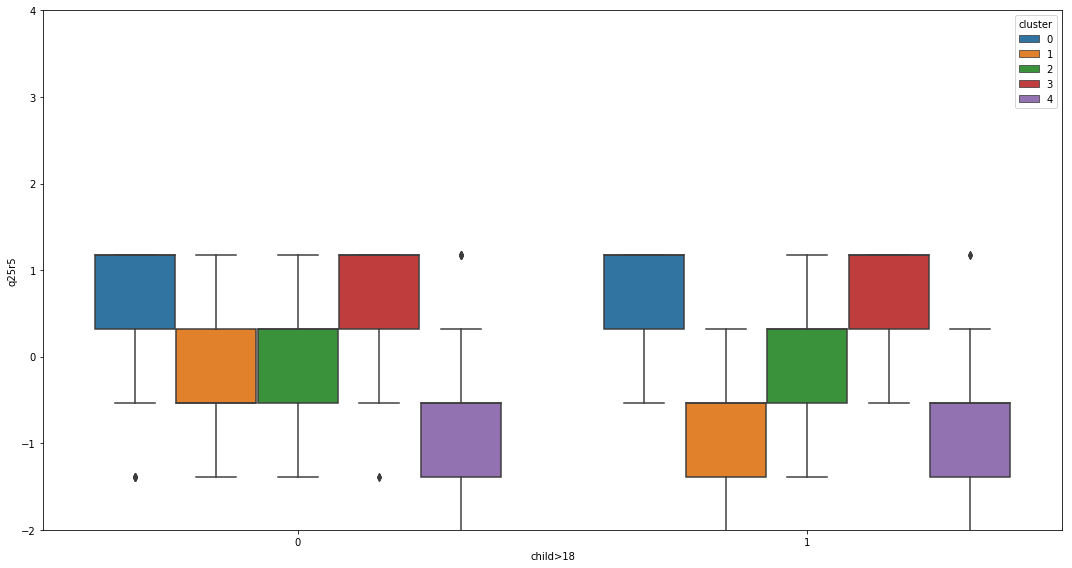

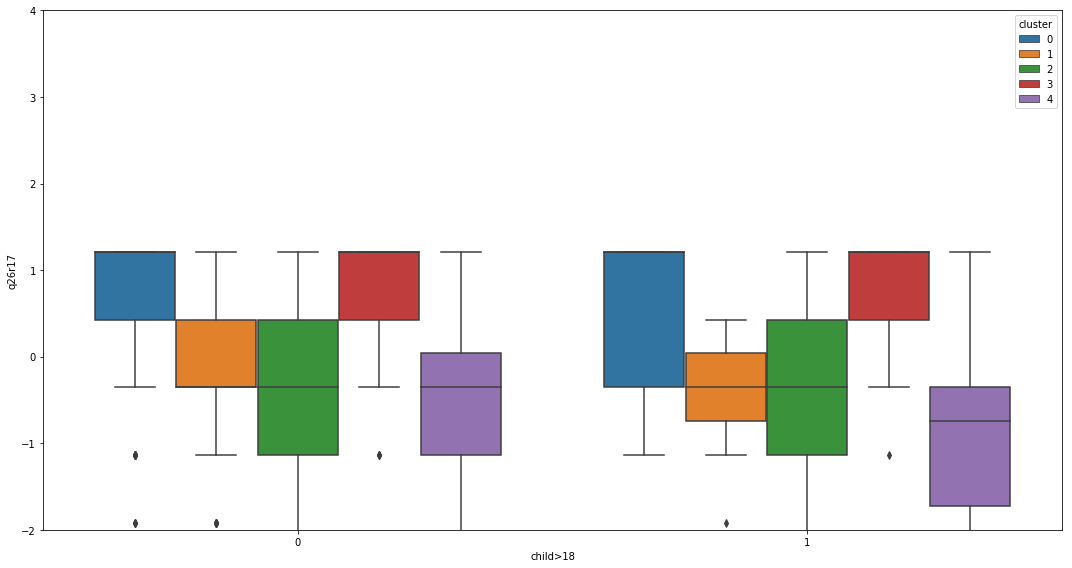

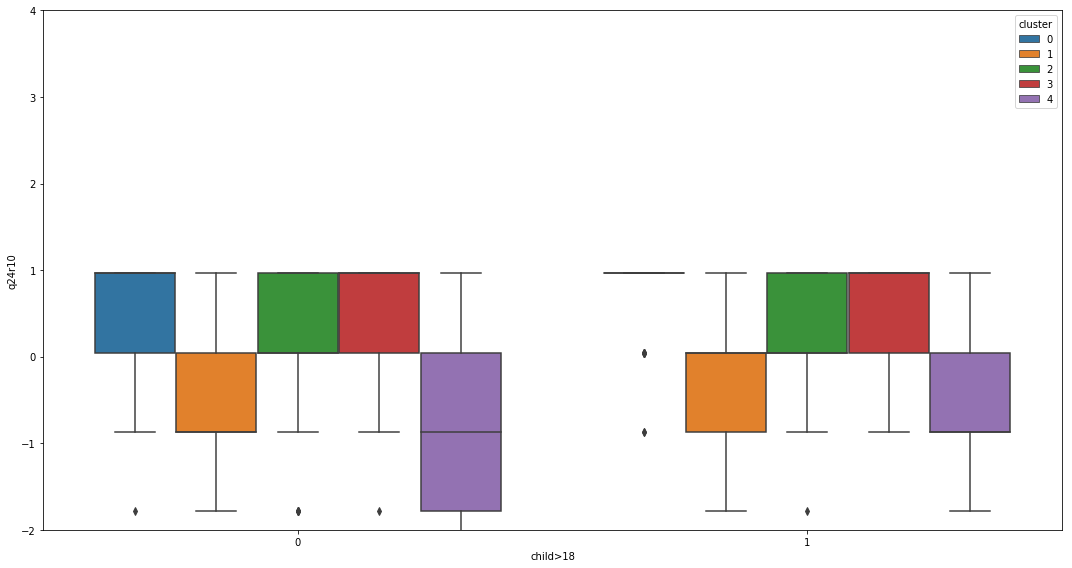

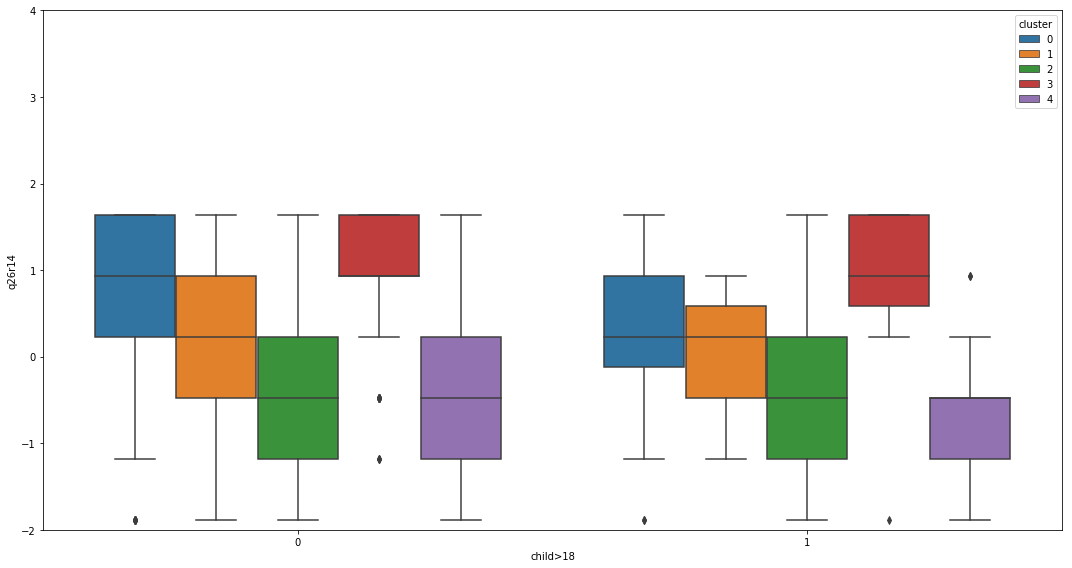

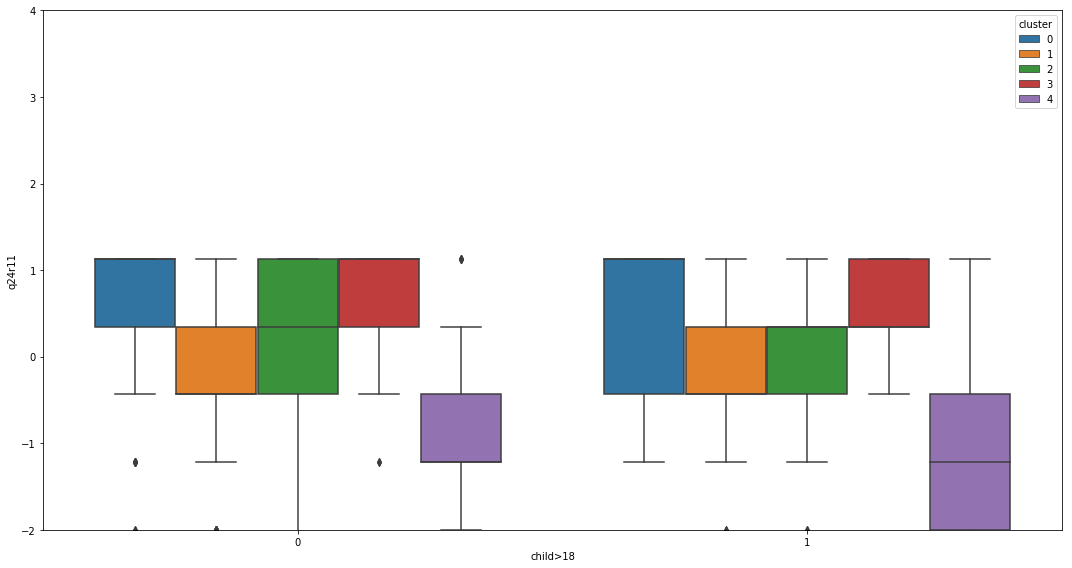

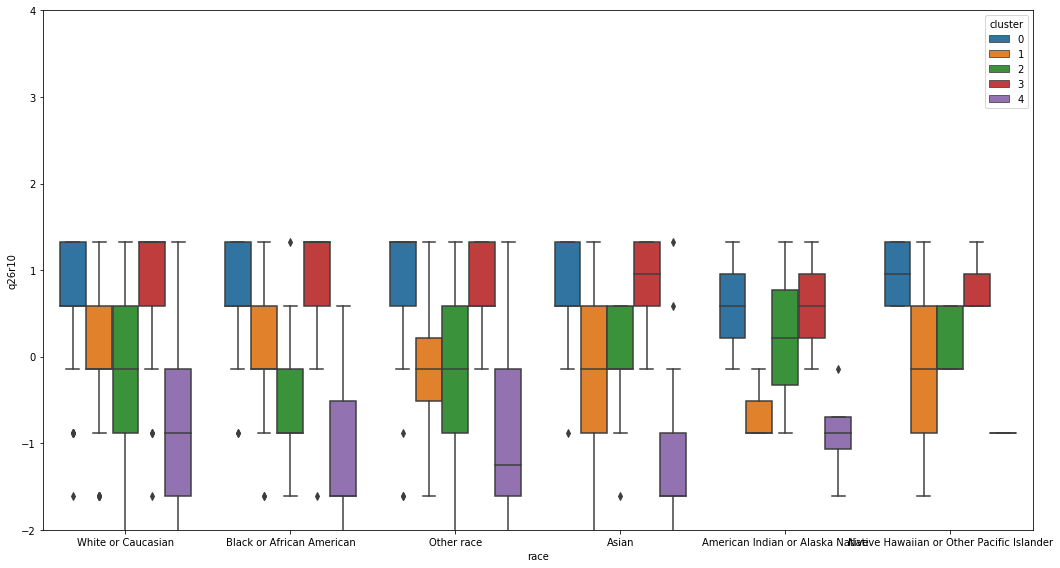

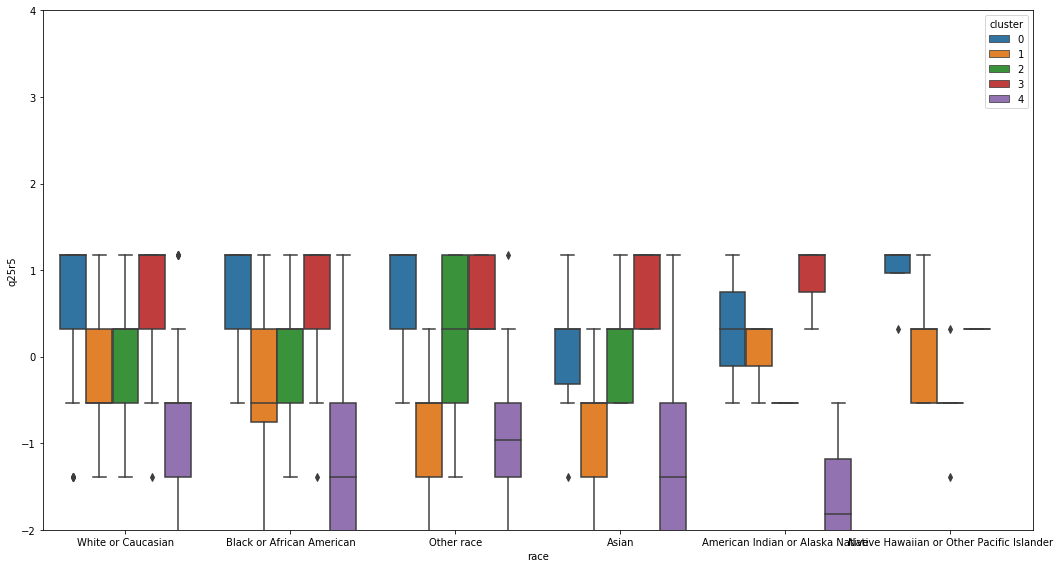

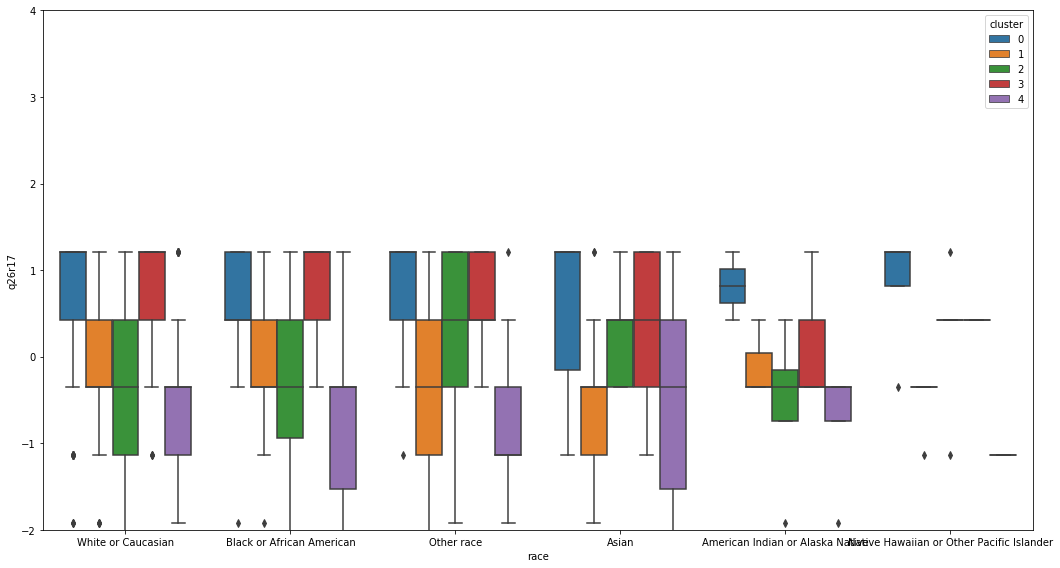

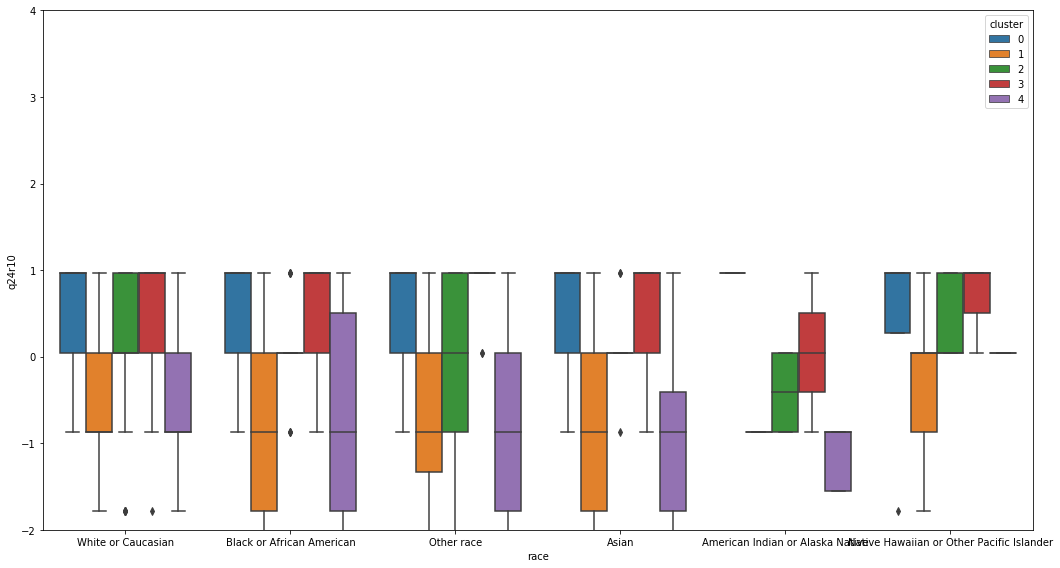

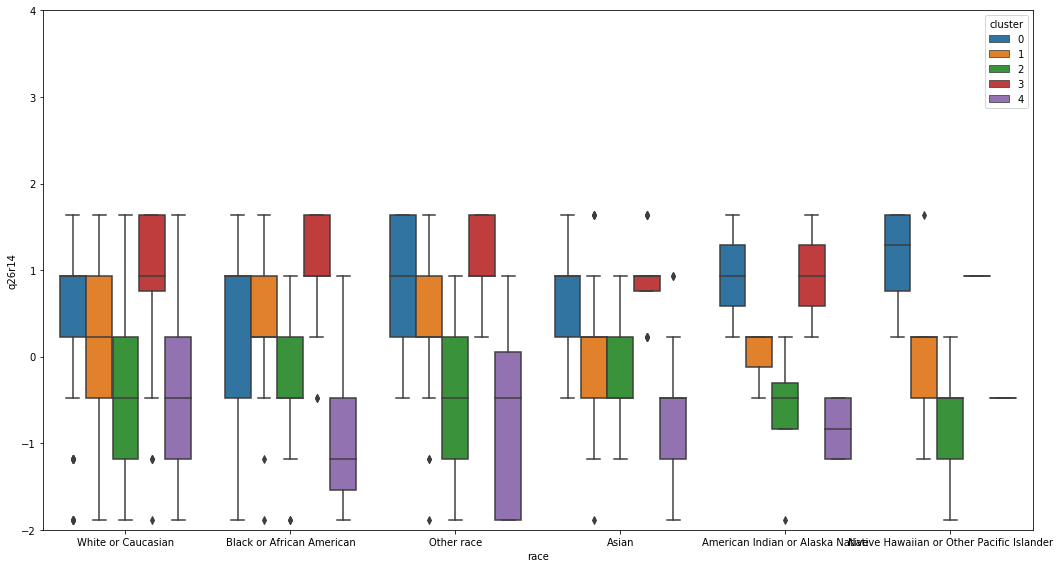

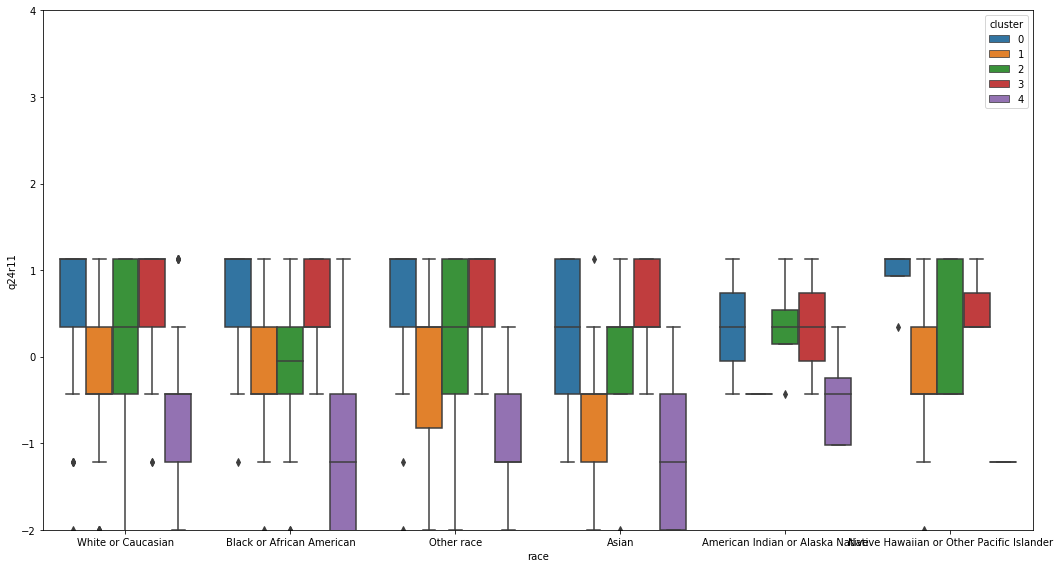

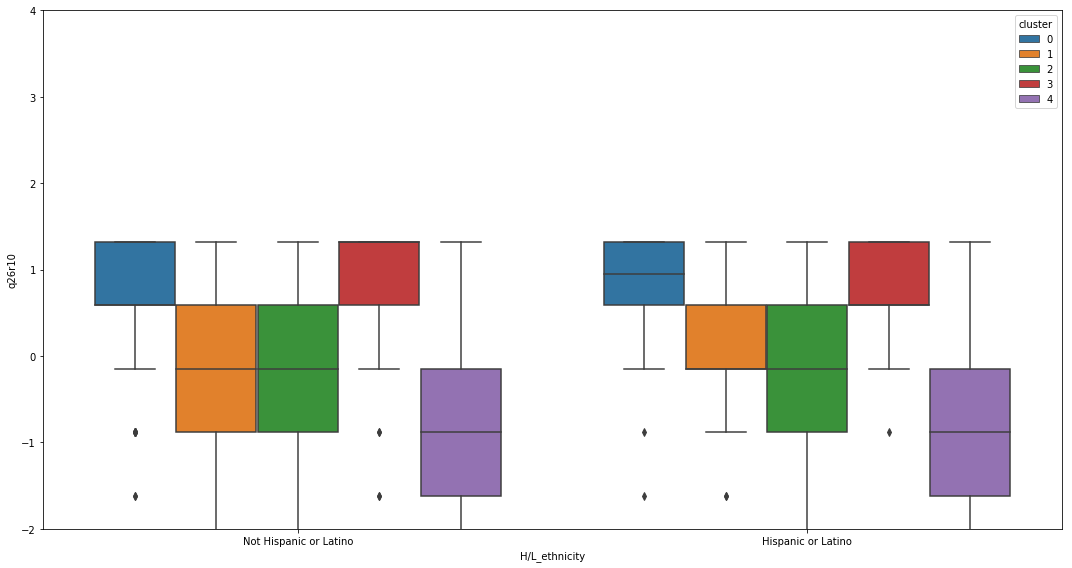

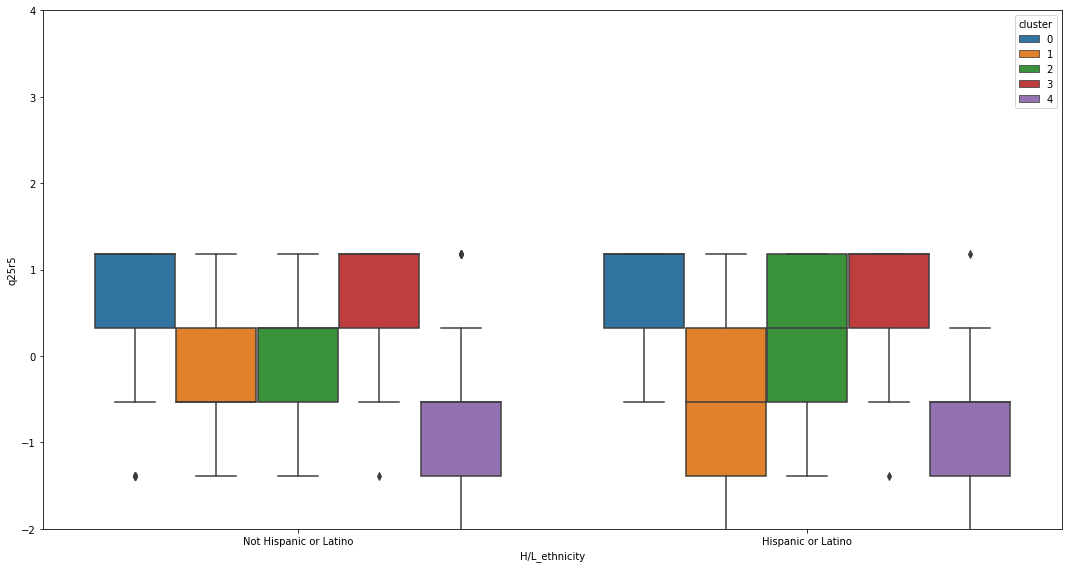

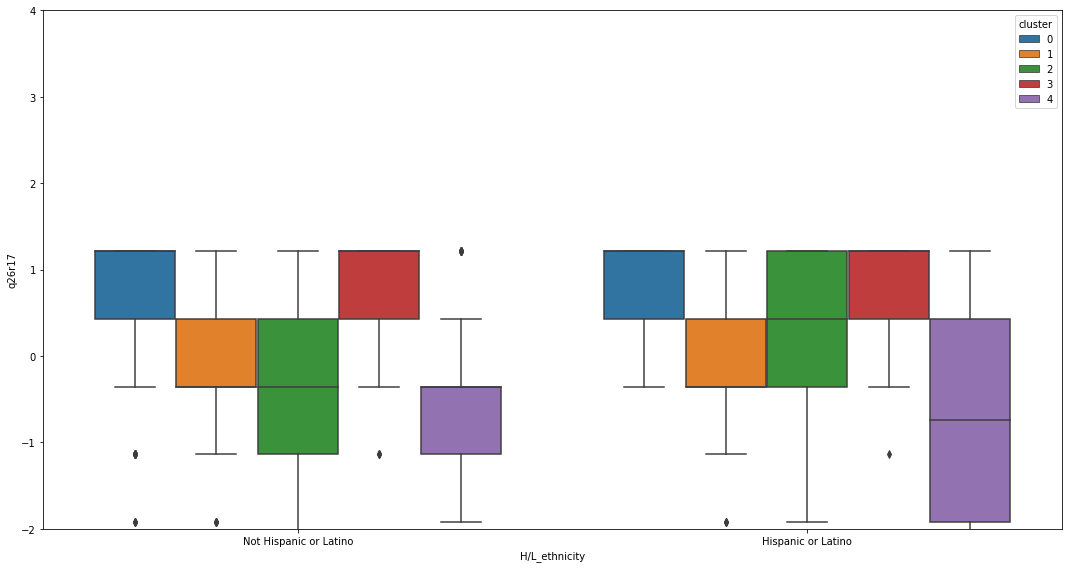

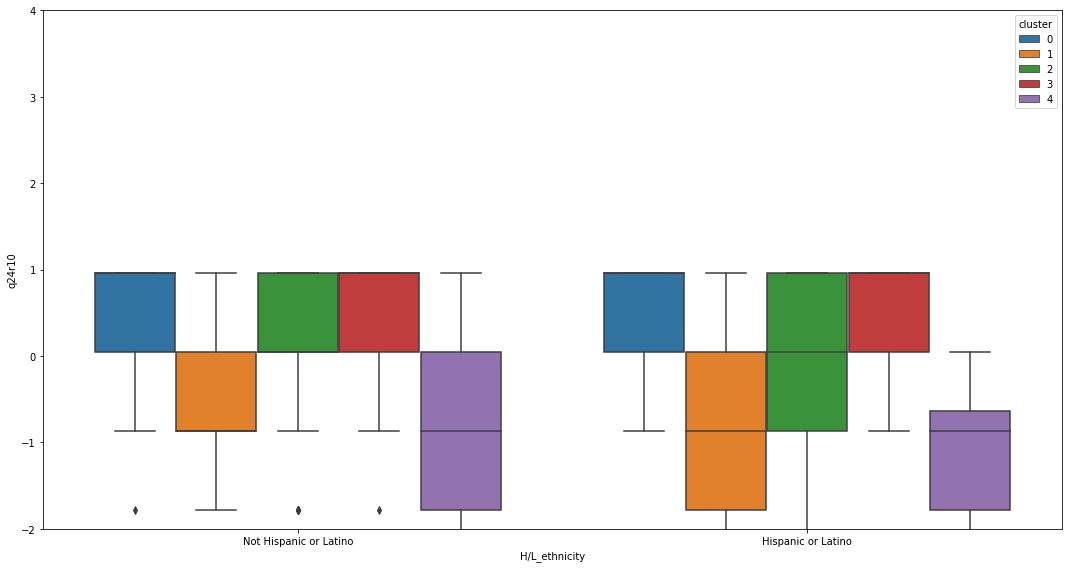

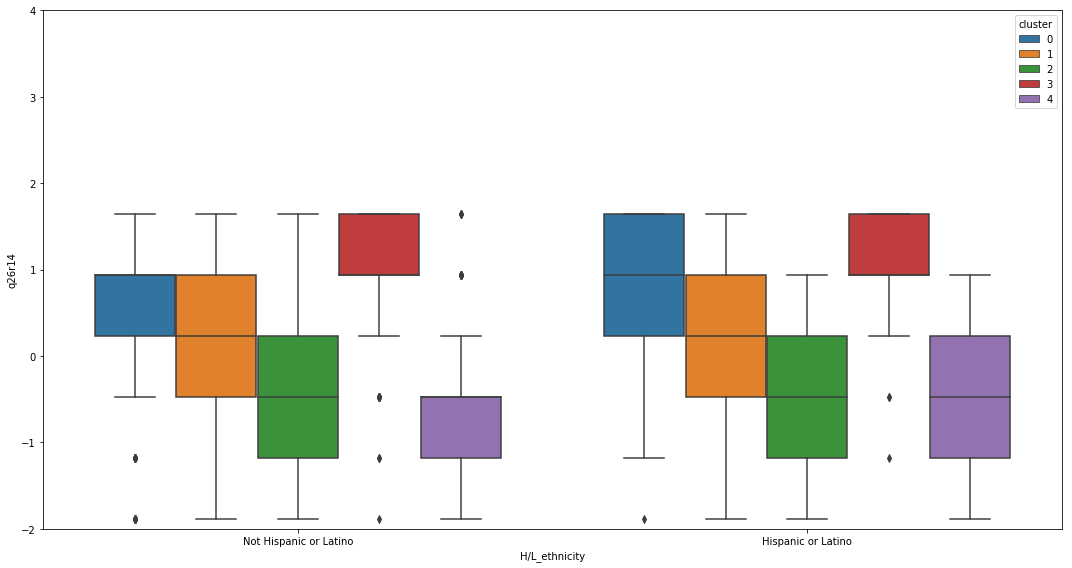

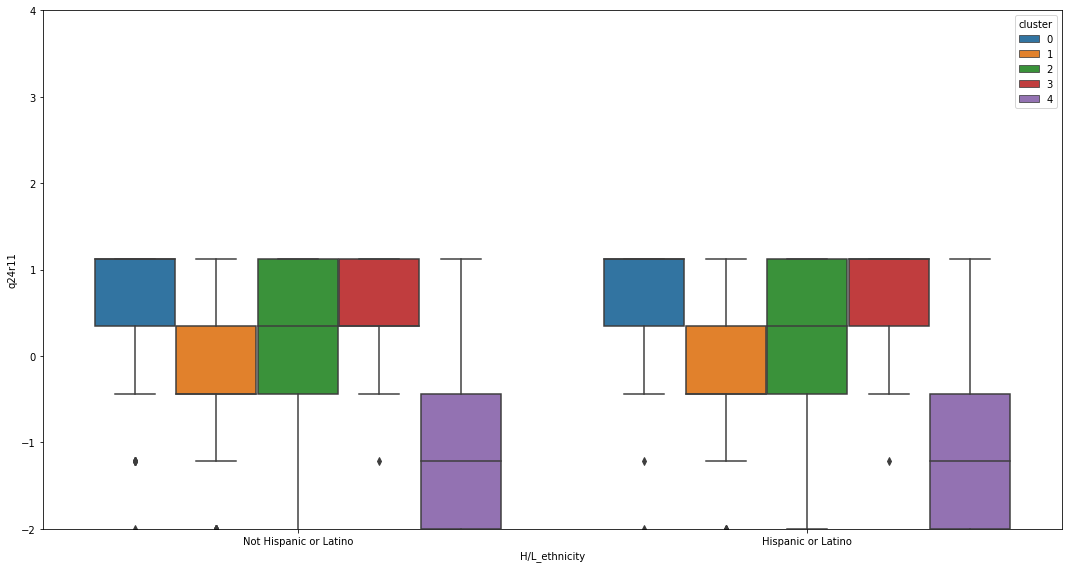

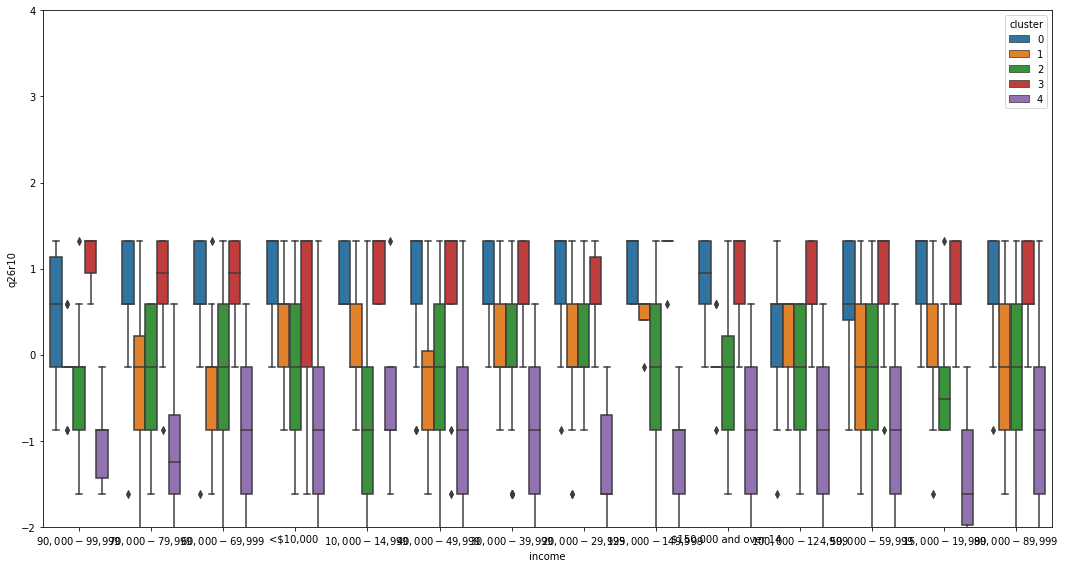

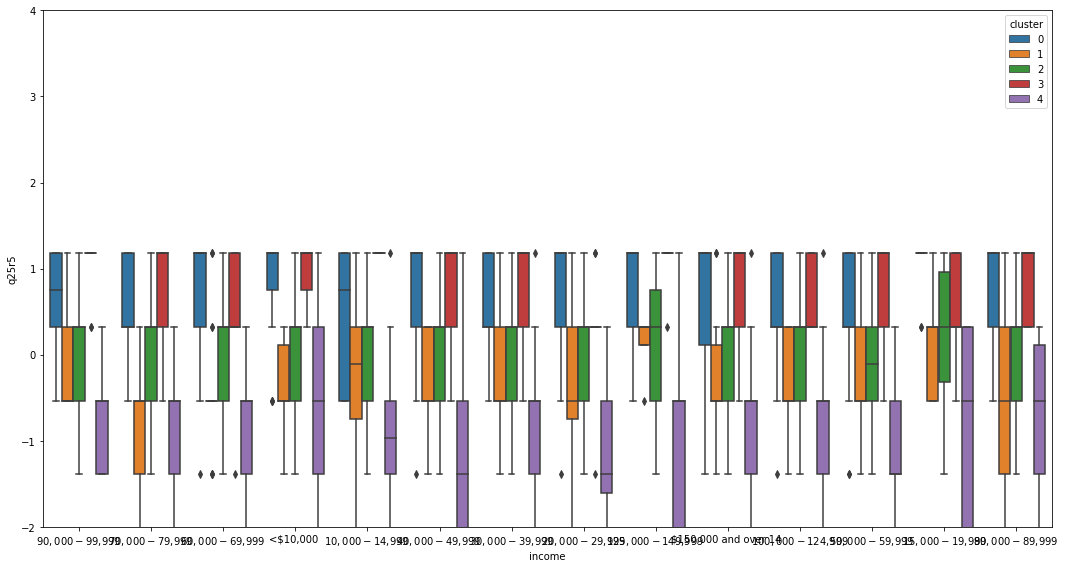

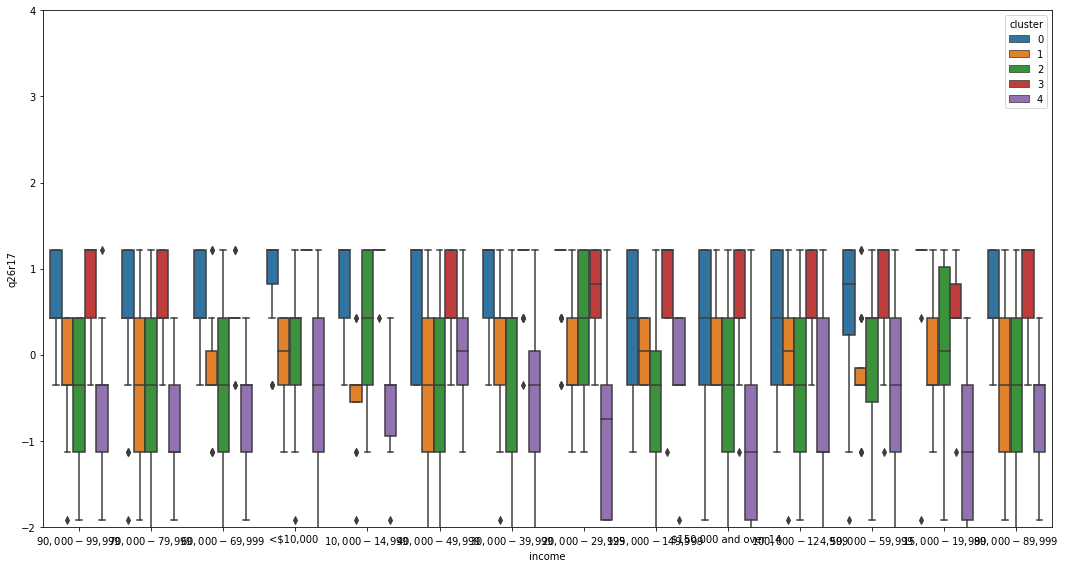

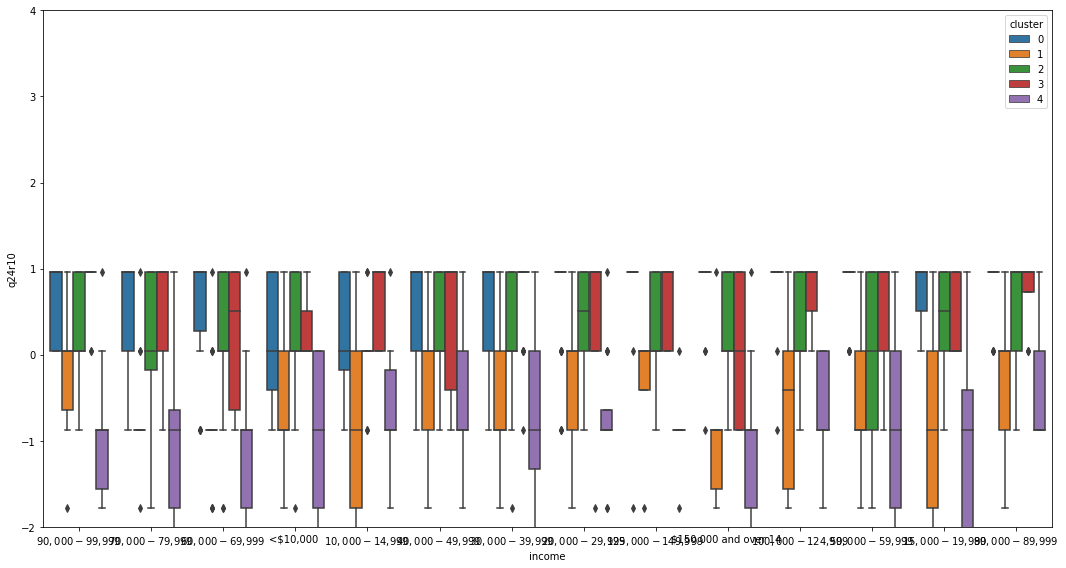

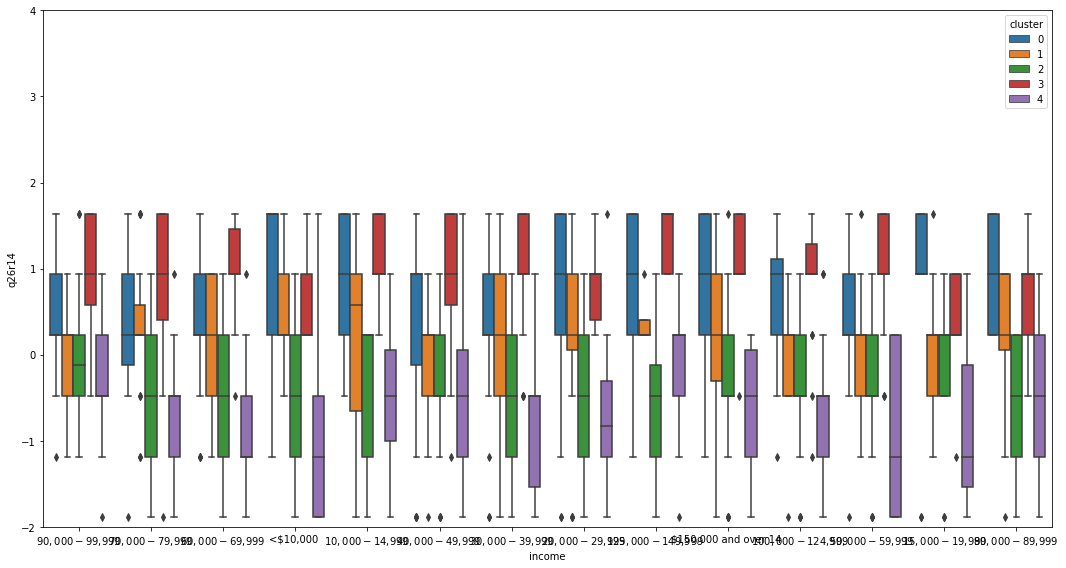

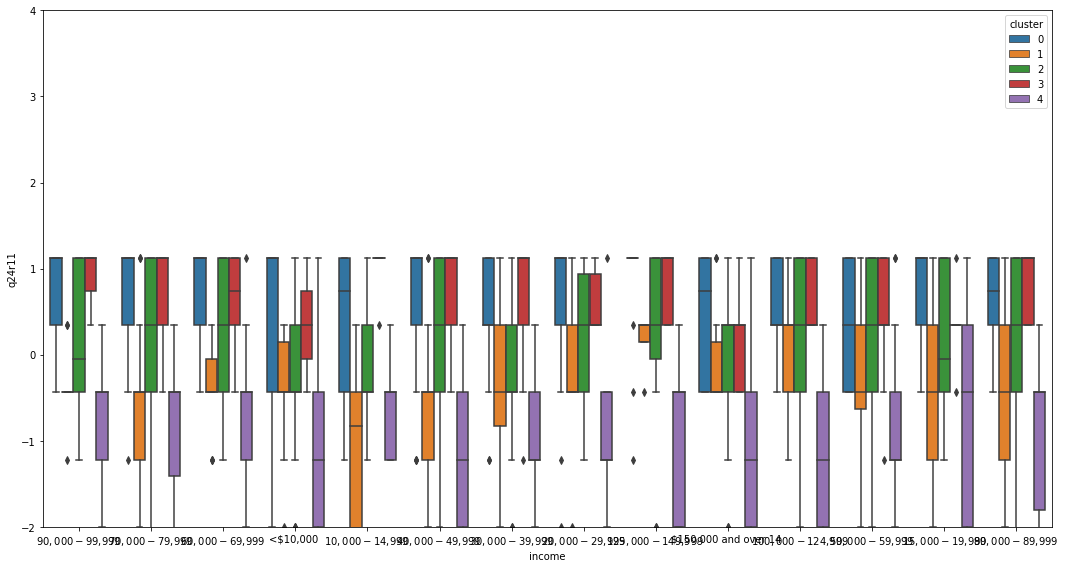

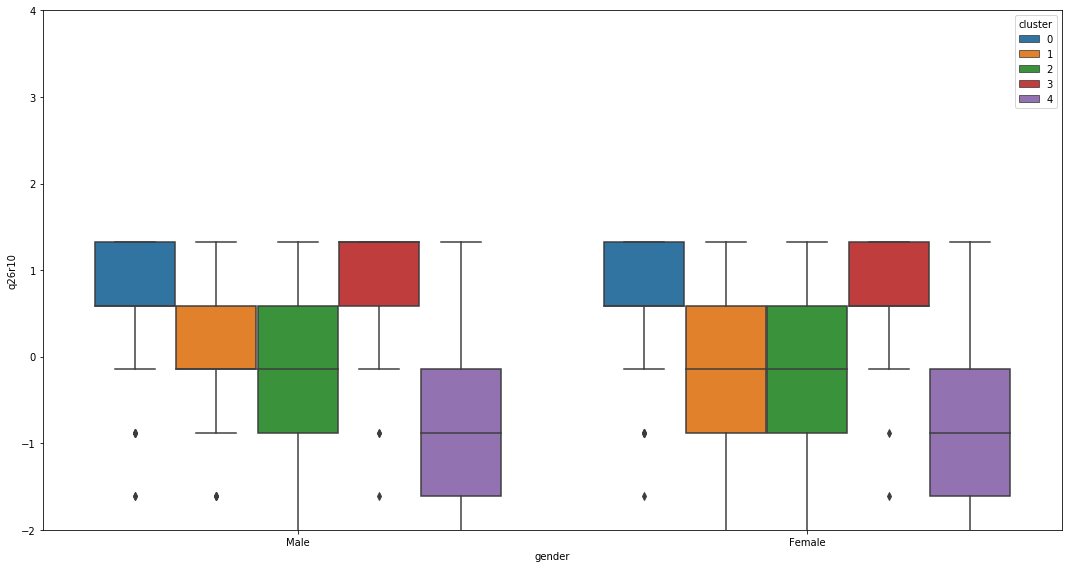

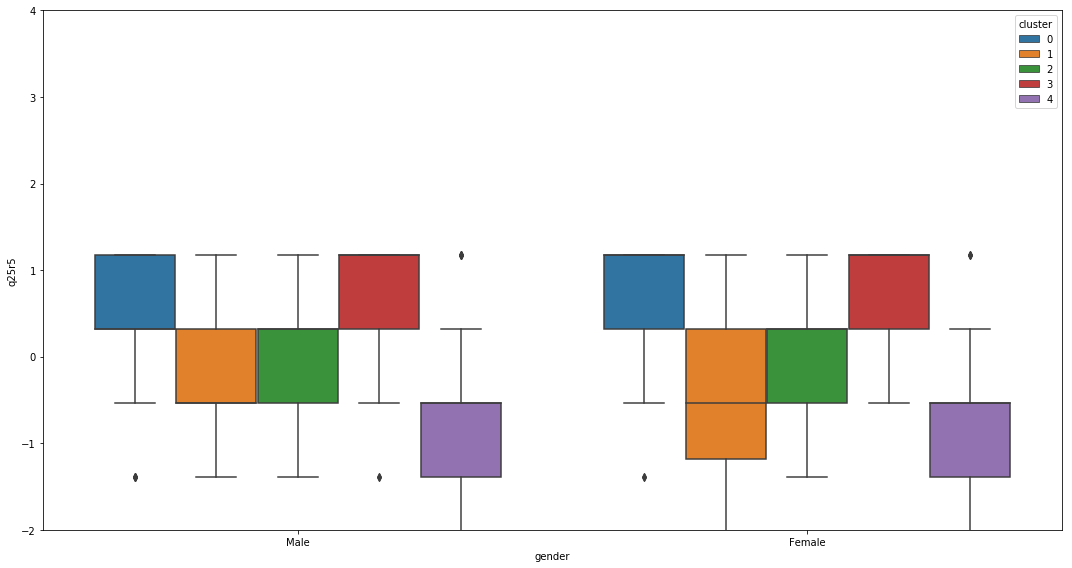

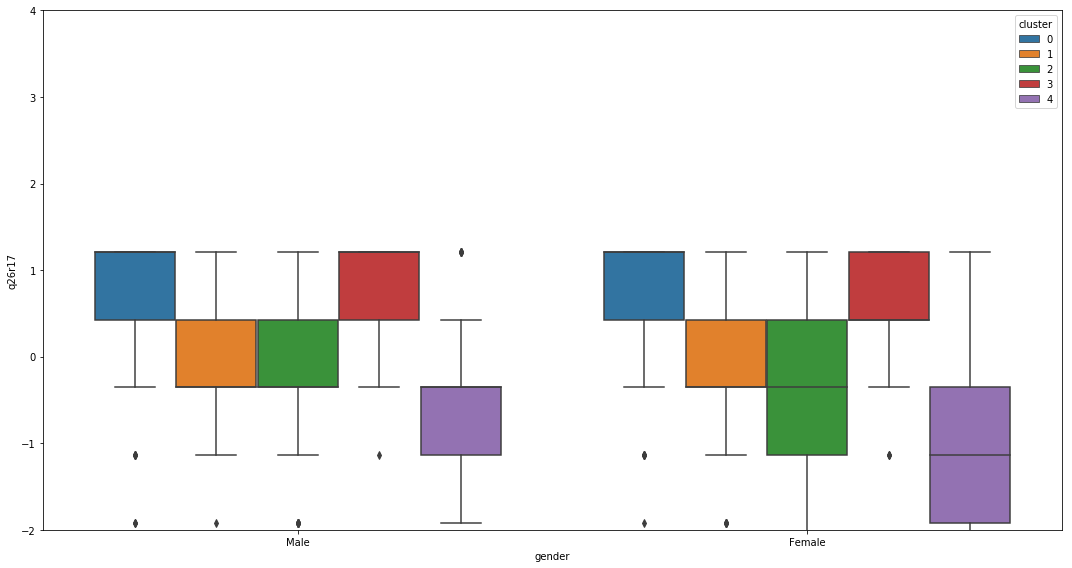

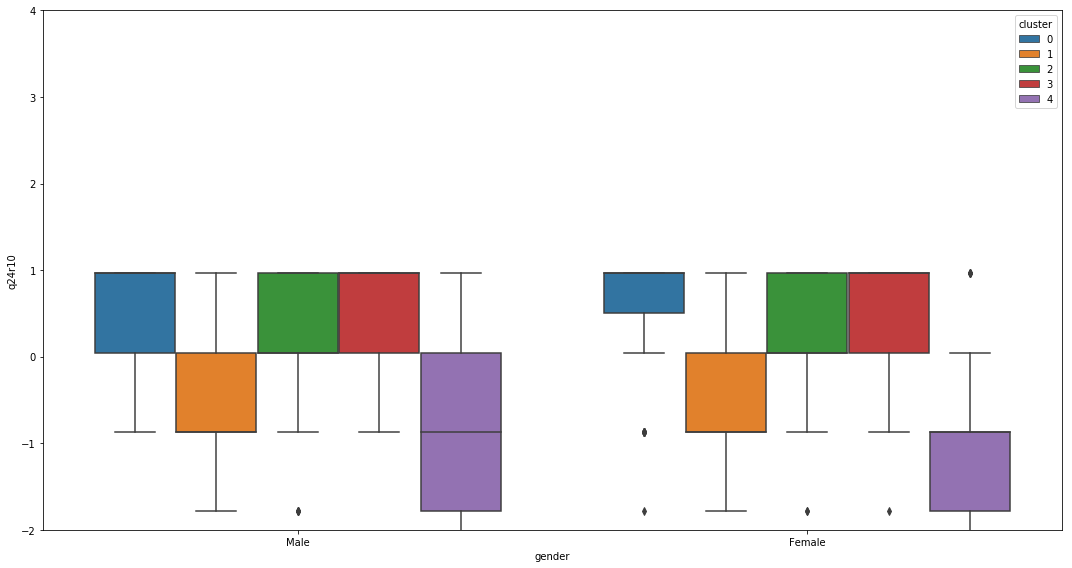

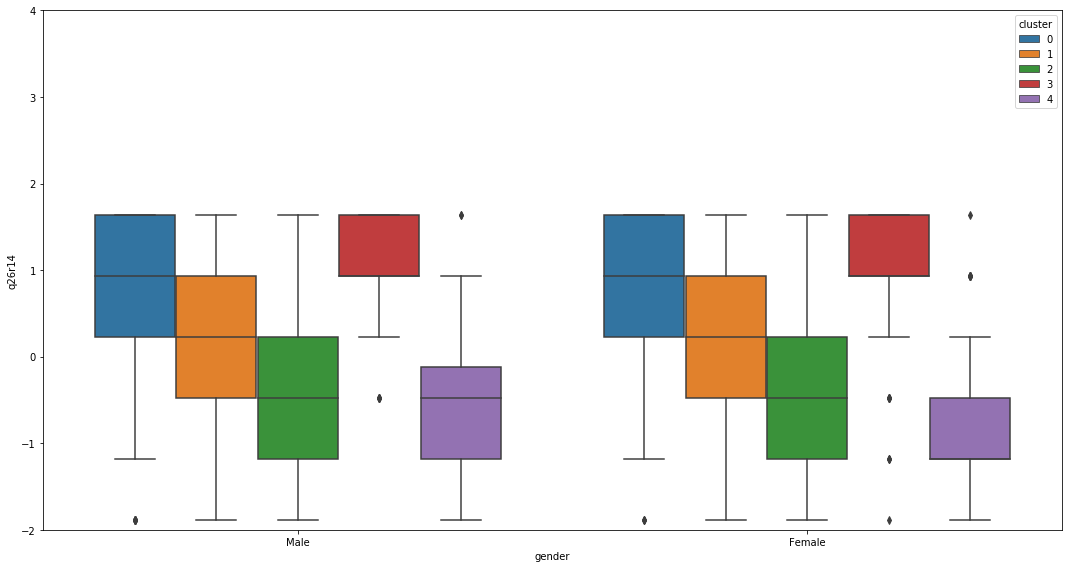

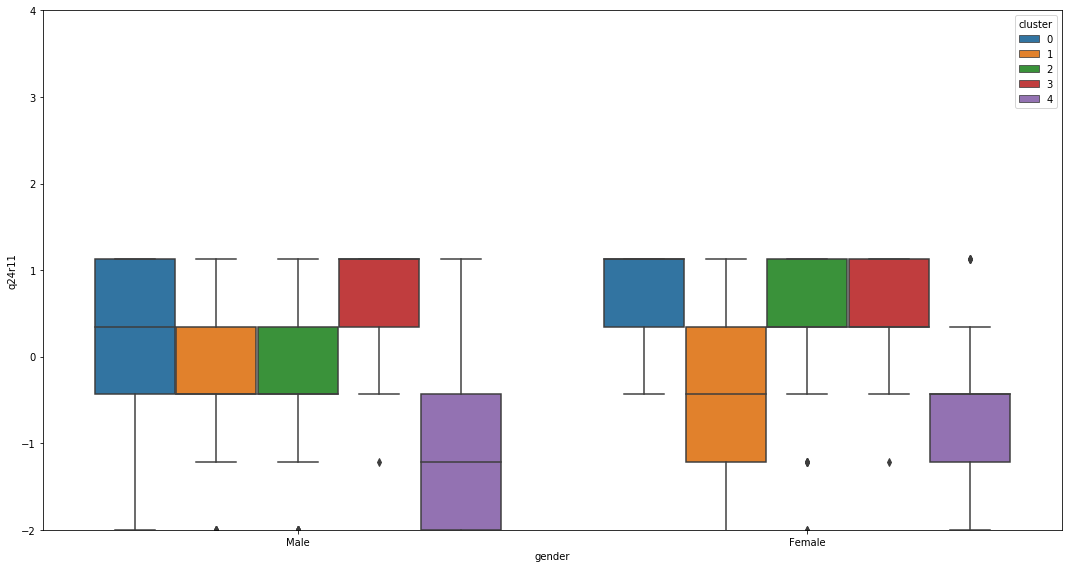

In [33]:
########################
# Step 7: Analyze in more detail 
########################


category_names = ['age', 'education','marital','no_child', 
                  'child<6','child6_12','child13_17','child>18',
                  'race', 'H/L_ethnicity', 'income', 'gender']


########################
## Cluster 0
########################

behavioral_names_0 = ['q26r10', 'q25r5', 'q26r17', 'q24r10', 'q26r14', 'q24r11']

for c in category_names:
    for b in behavioral_names_0:
        fig, ax = plt.subplots(figsize = (15, 8))
        sns.boxplot(x = c,
                    y = b,
                    hue = 'cluster',
                    data = final_clusters_df)

        plt.ylim(-2, 4)
        plt.tight_layout()
        plt.show()

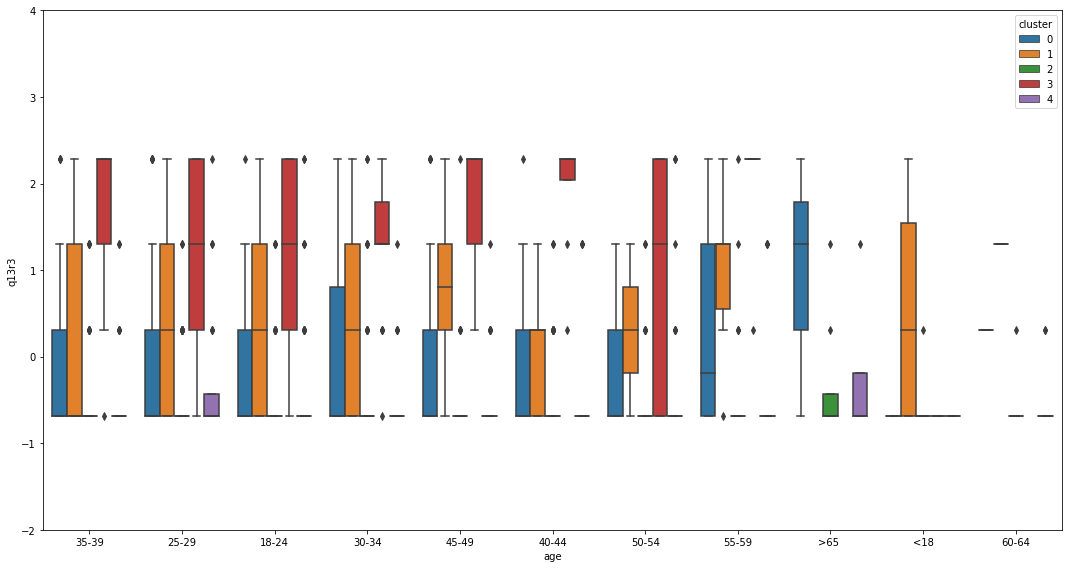

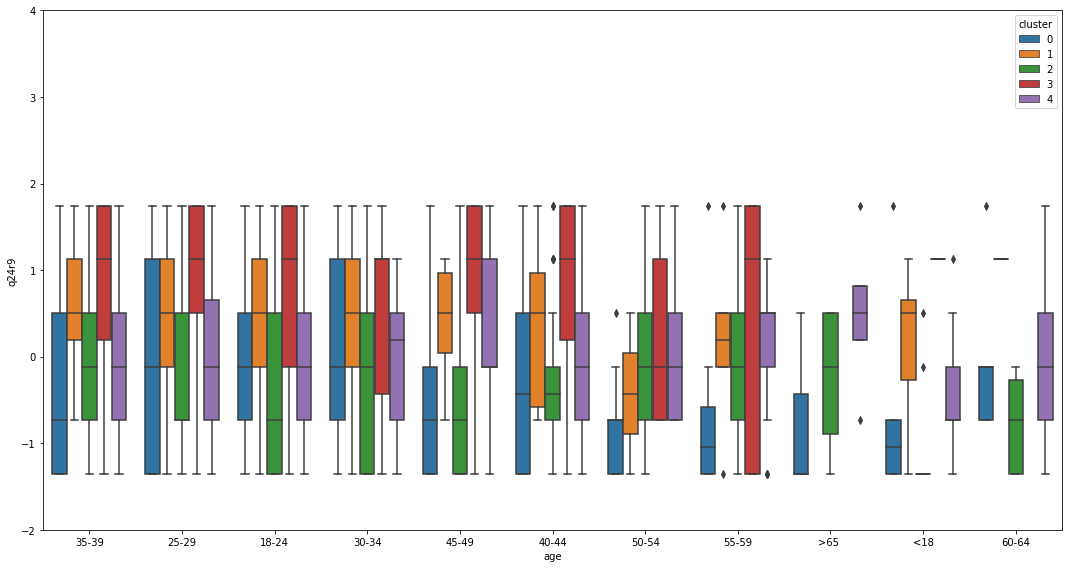

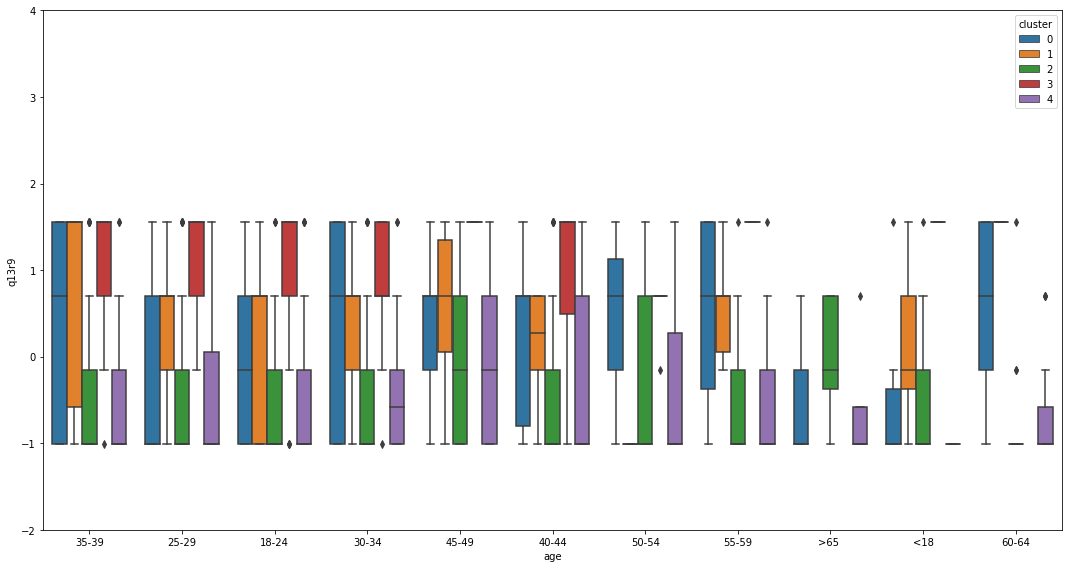

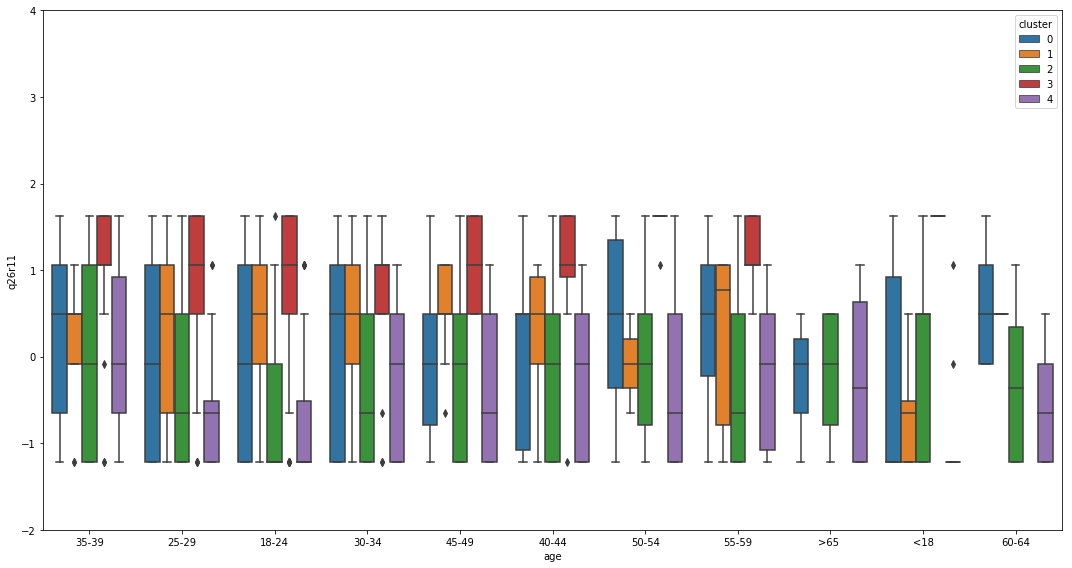

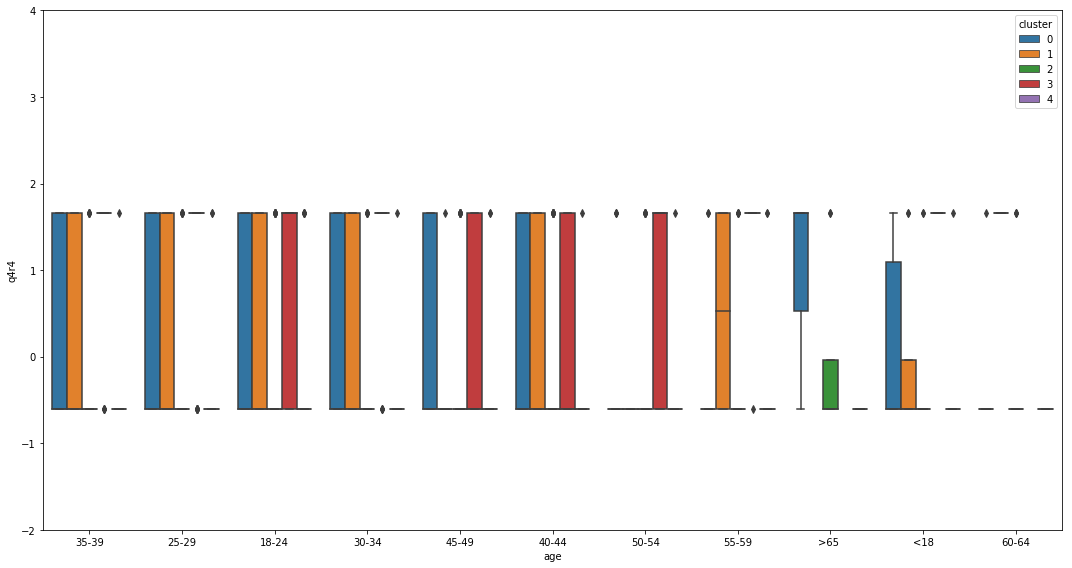

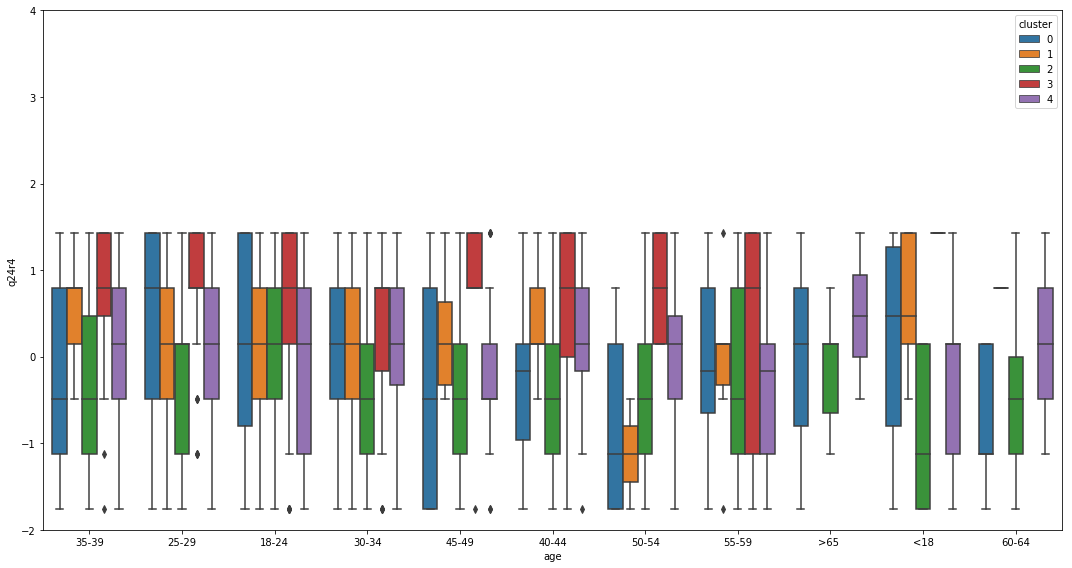

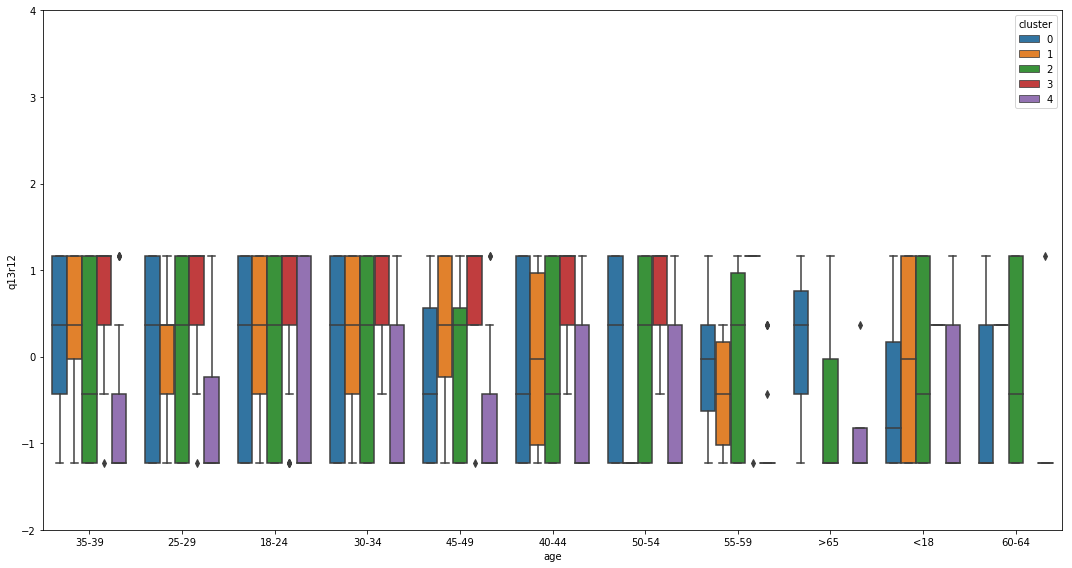

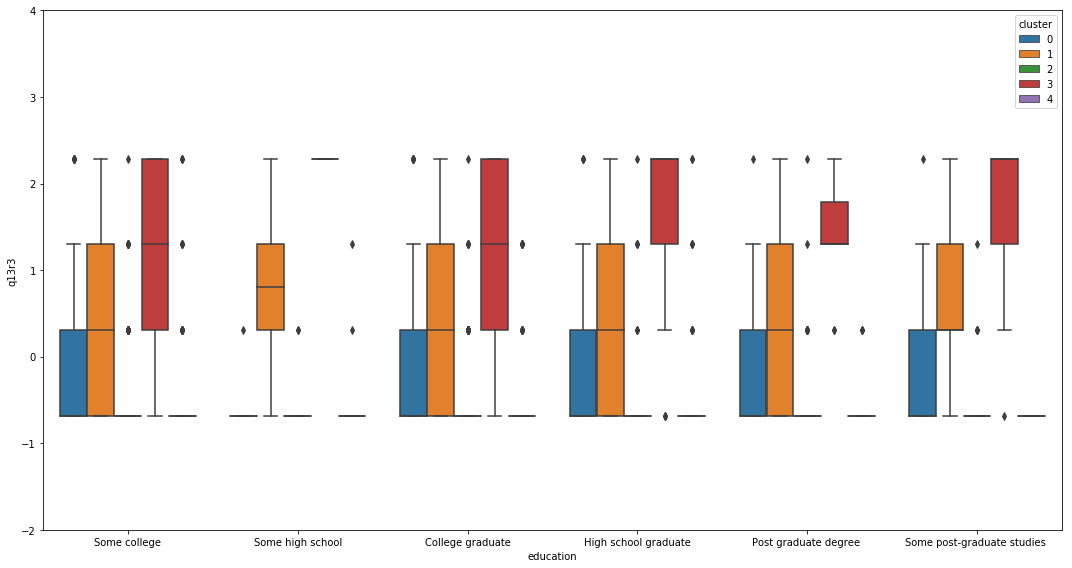

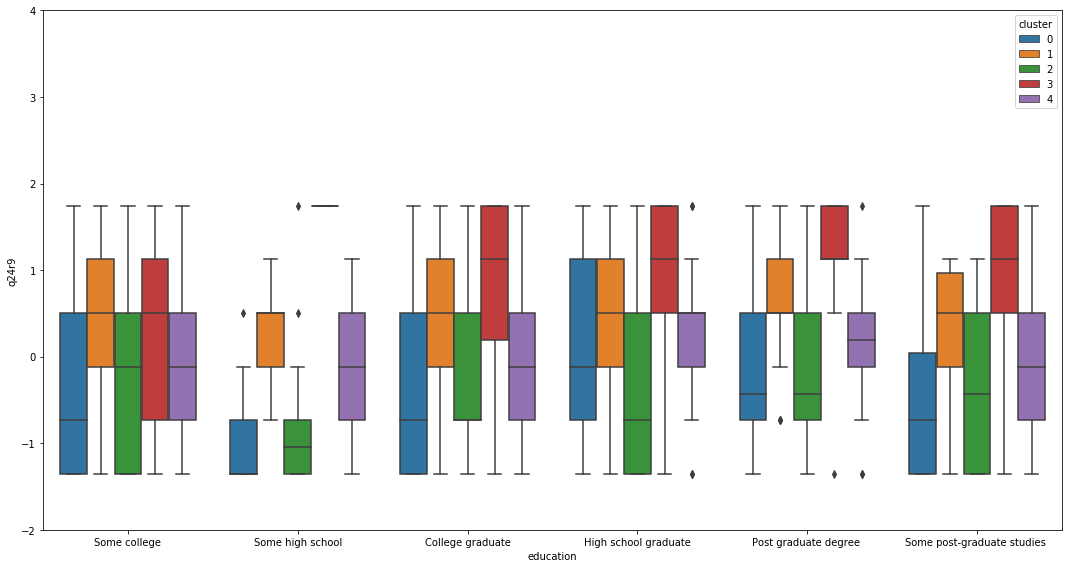

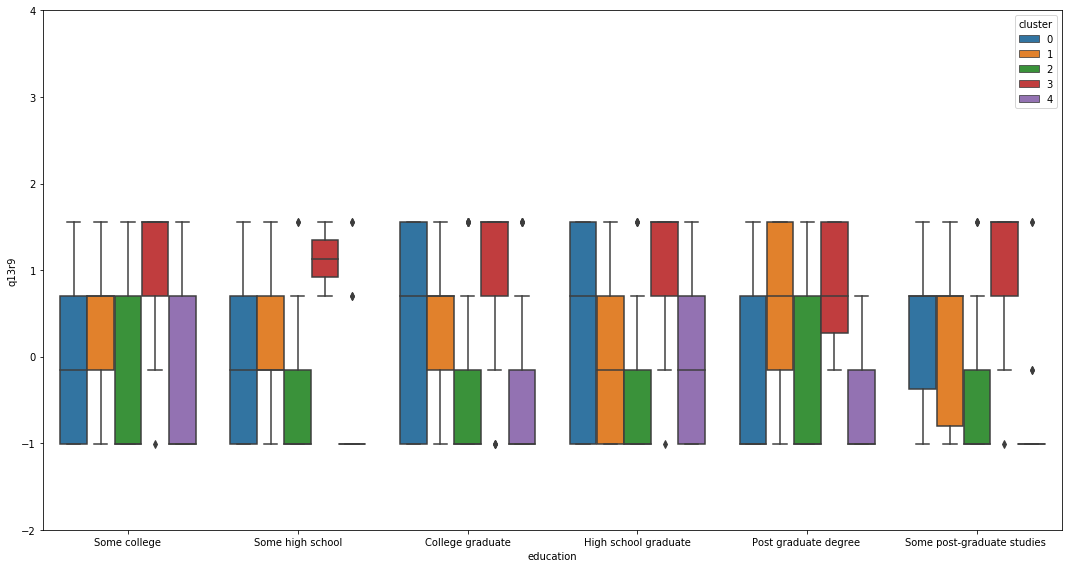

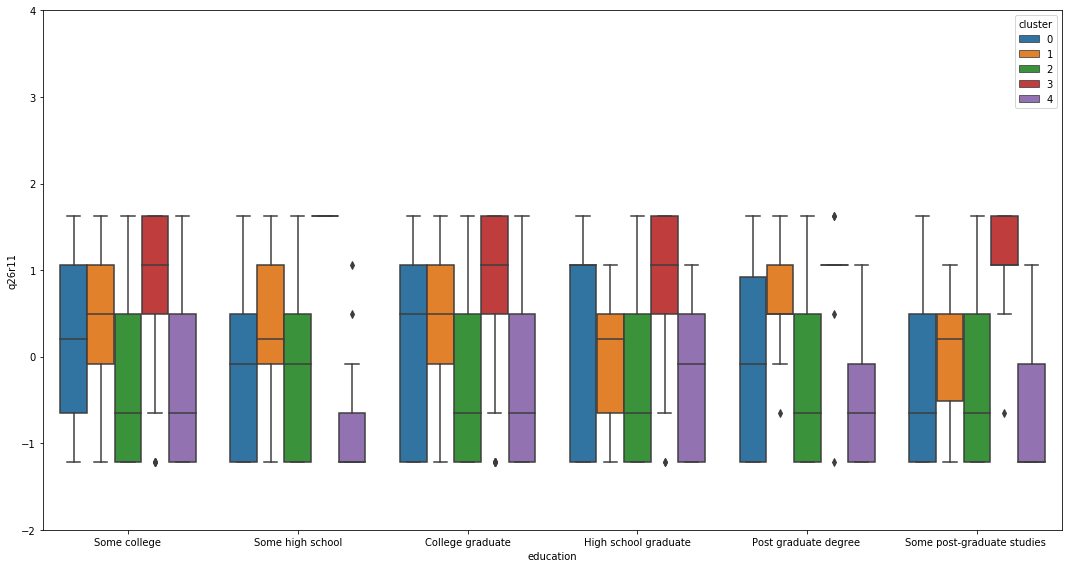

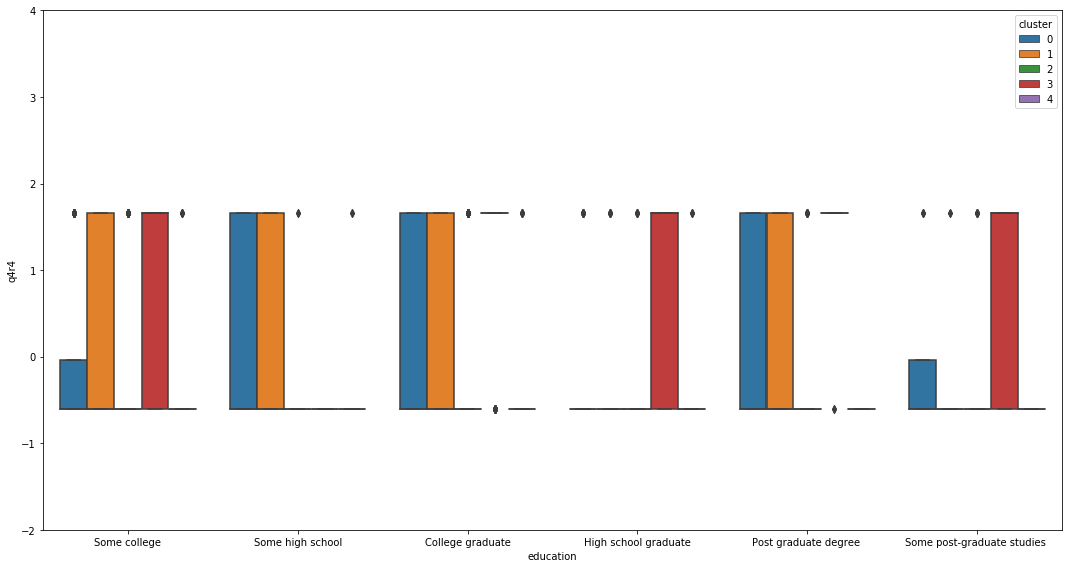

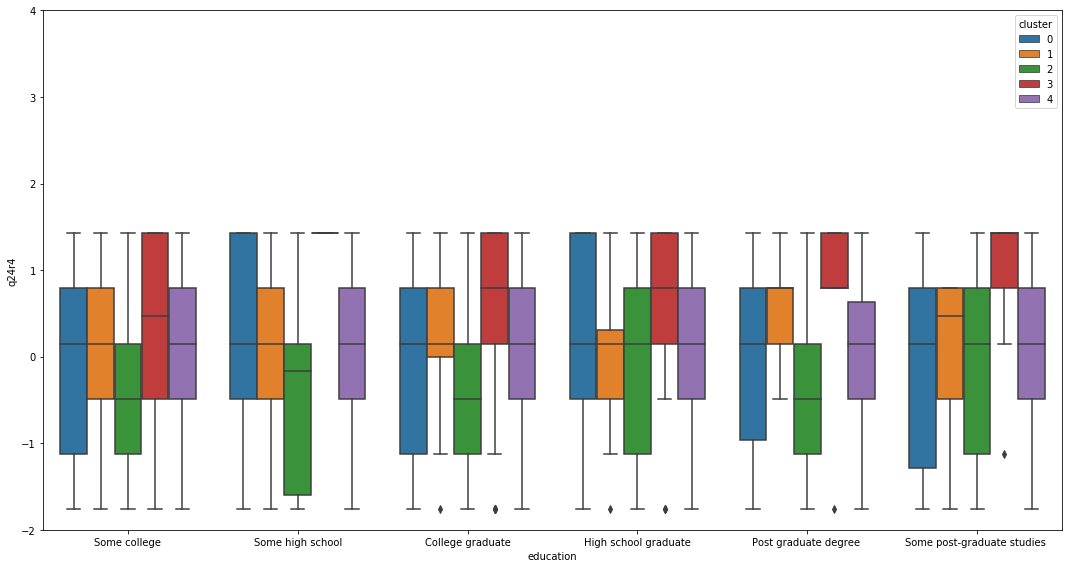

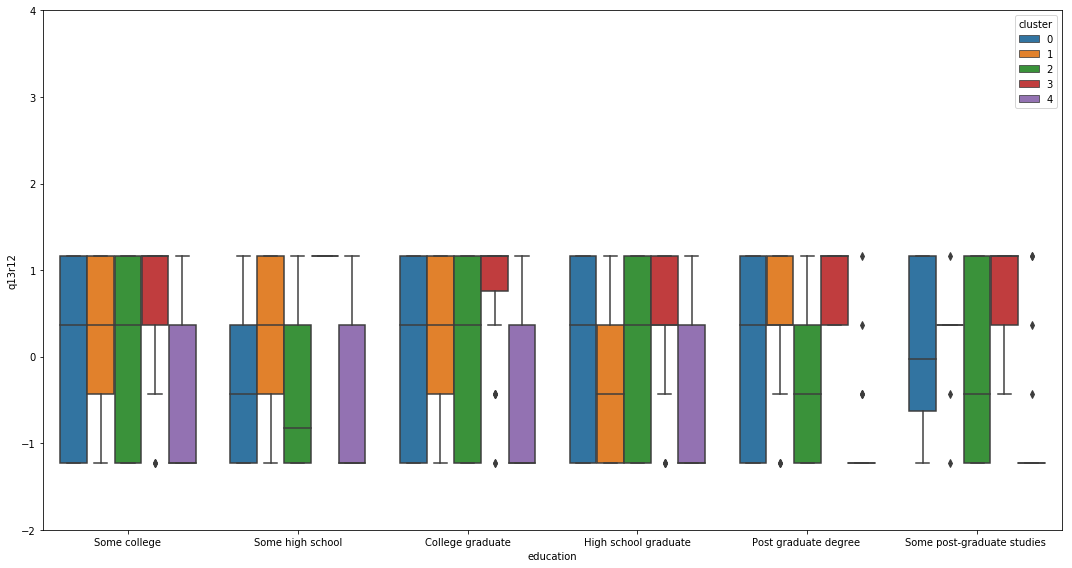

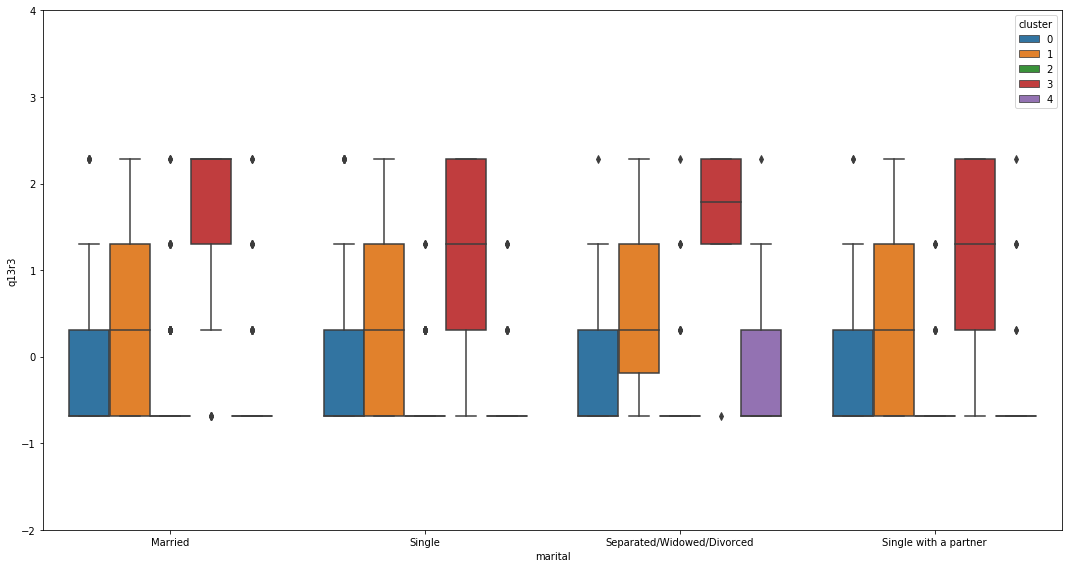

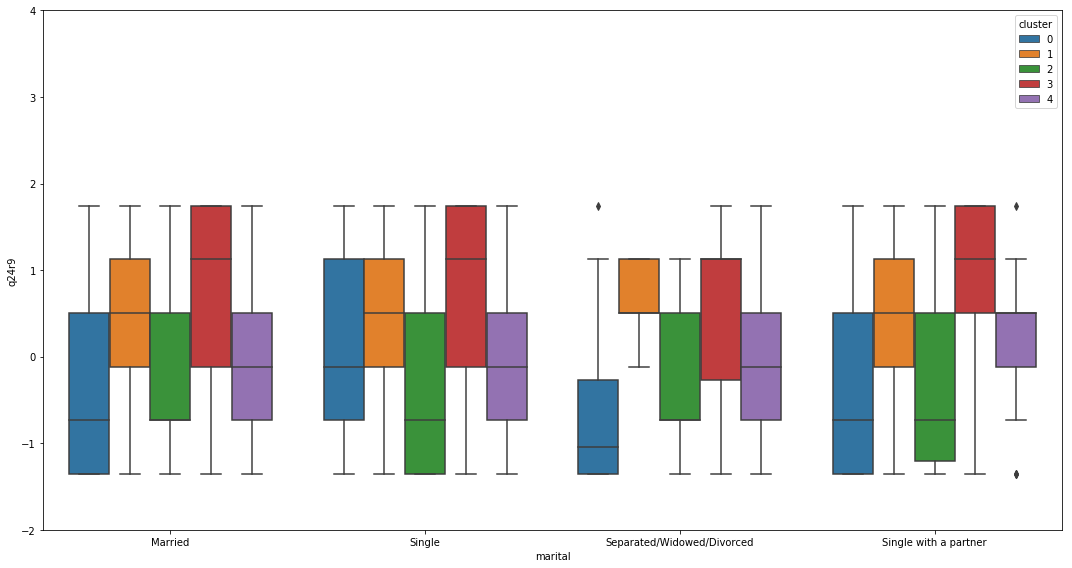

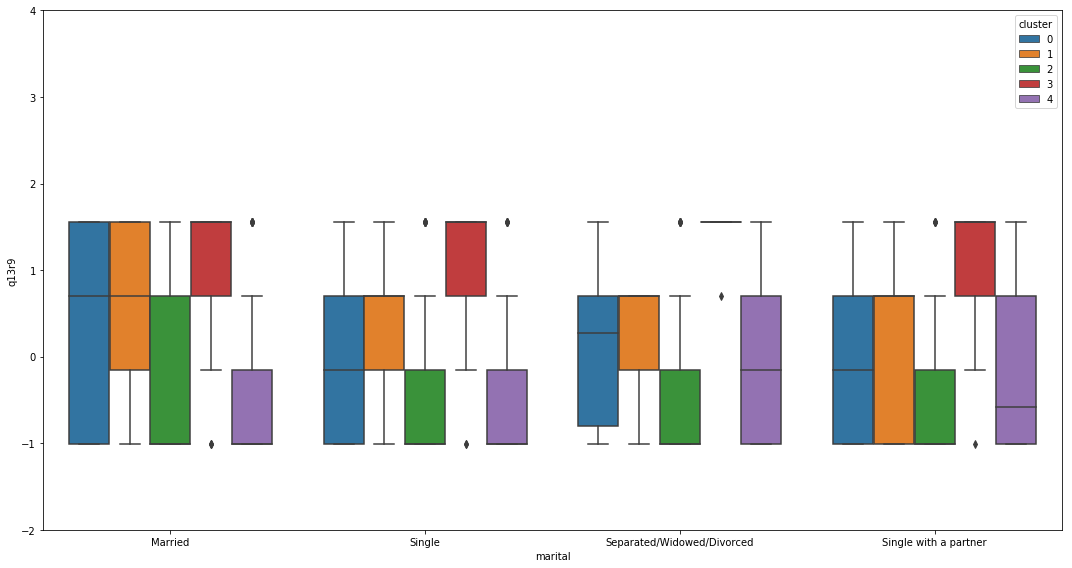

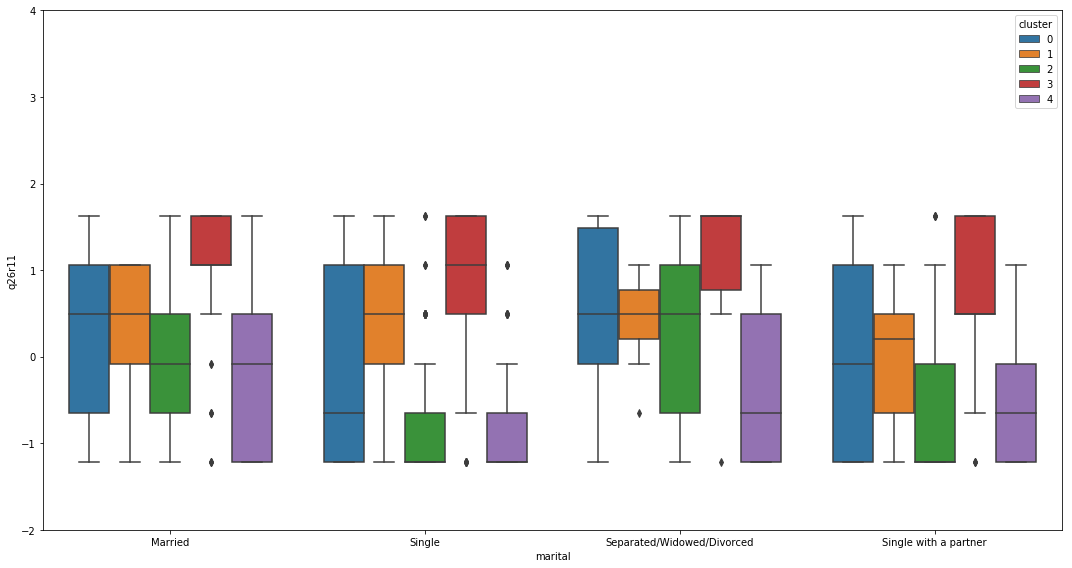

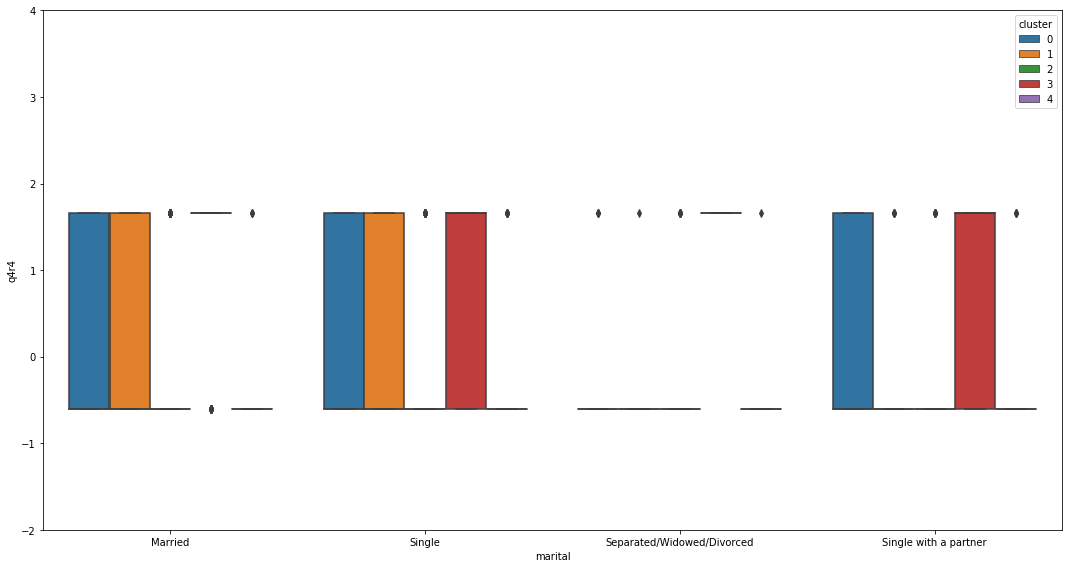

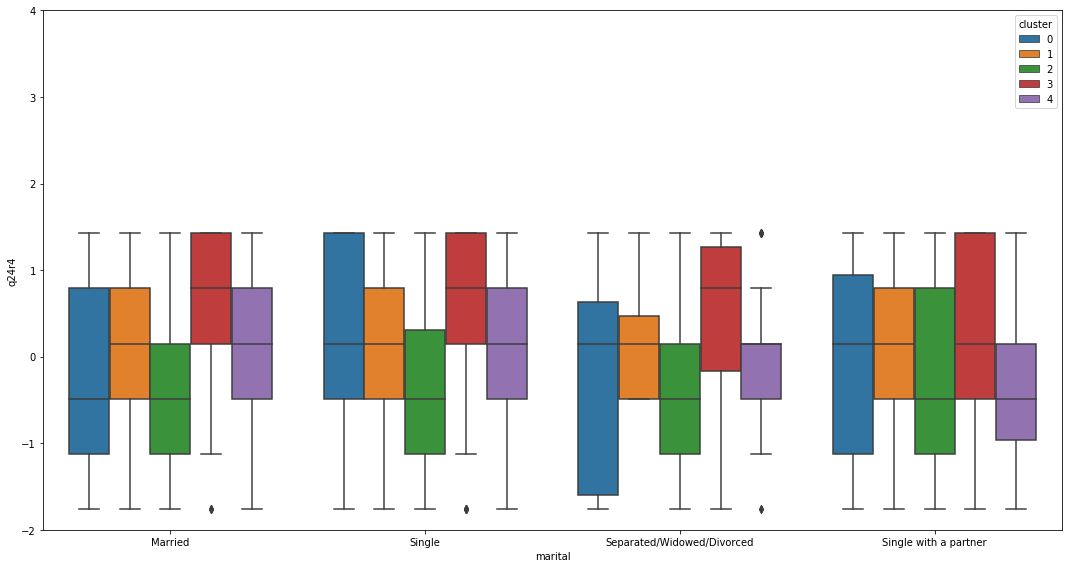

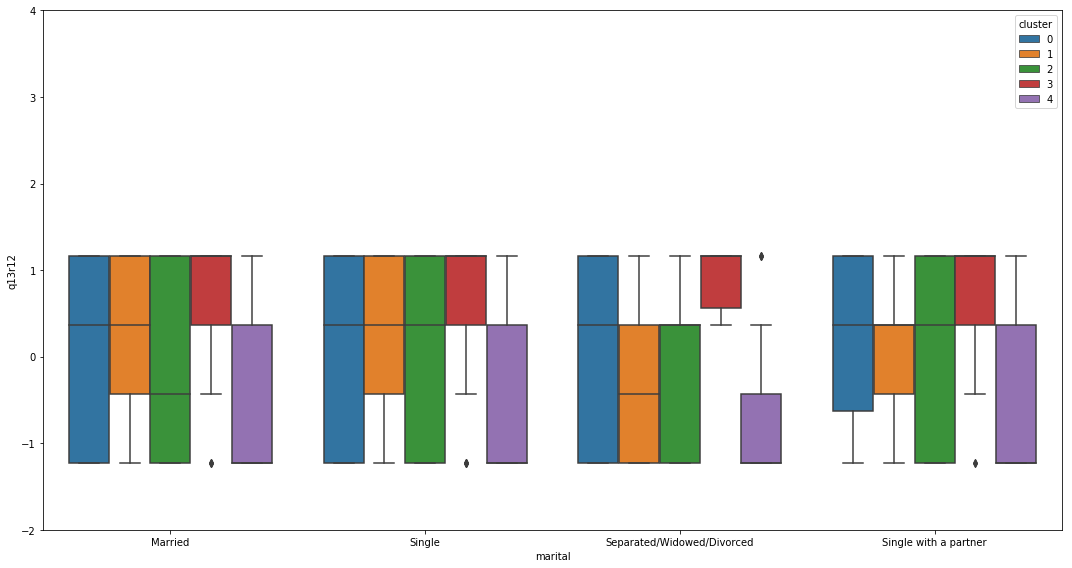

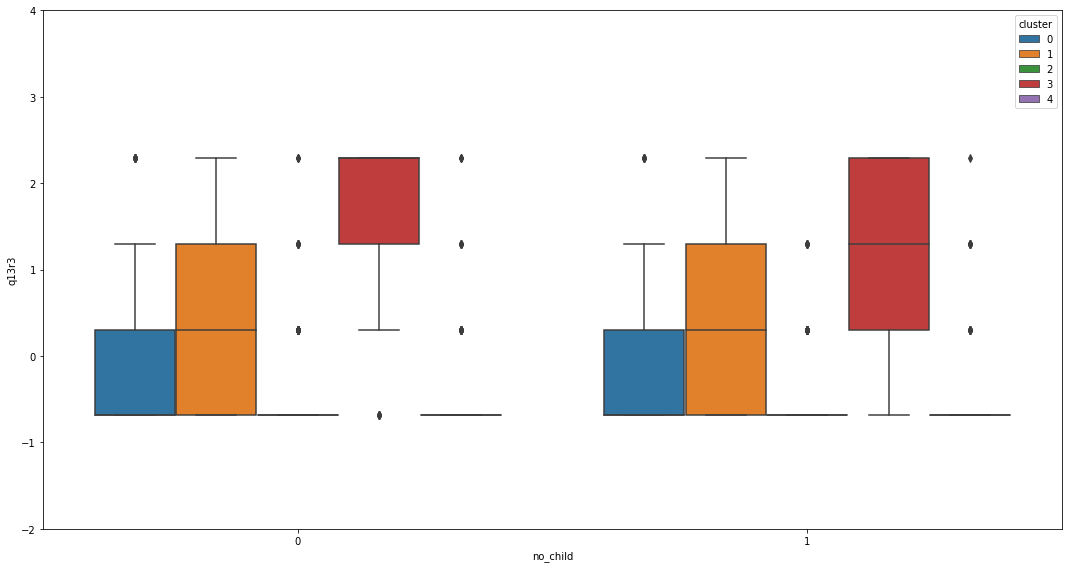

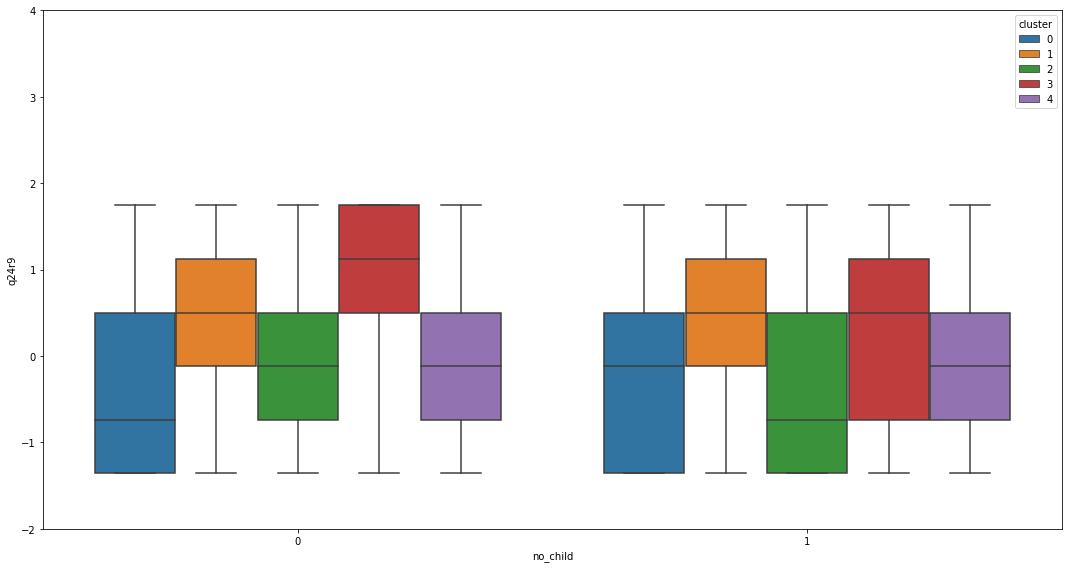

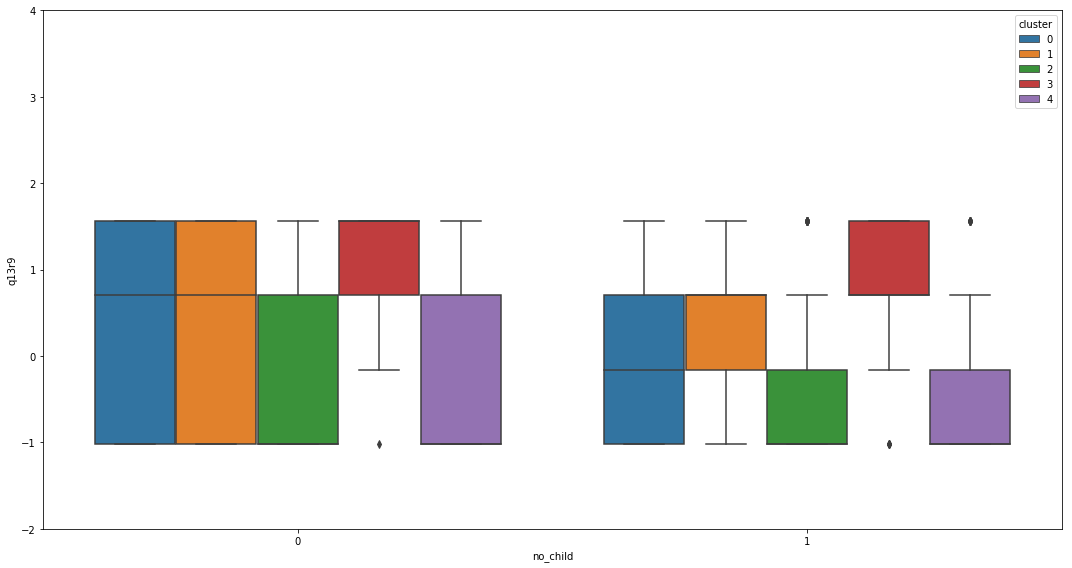

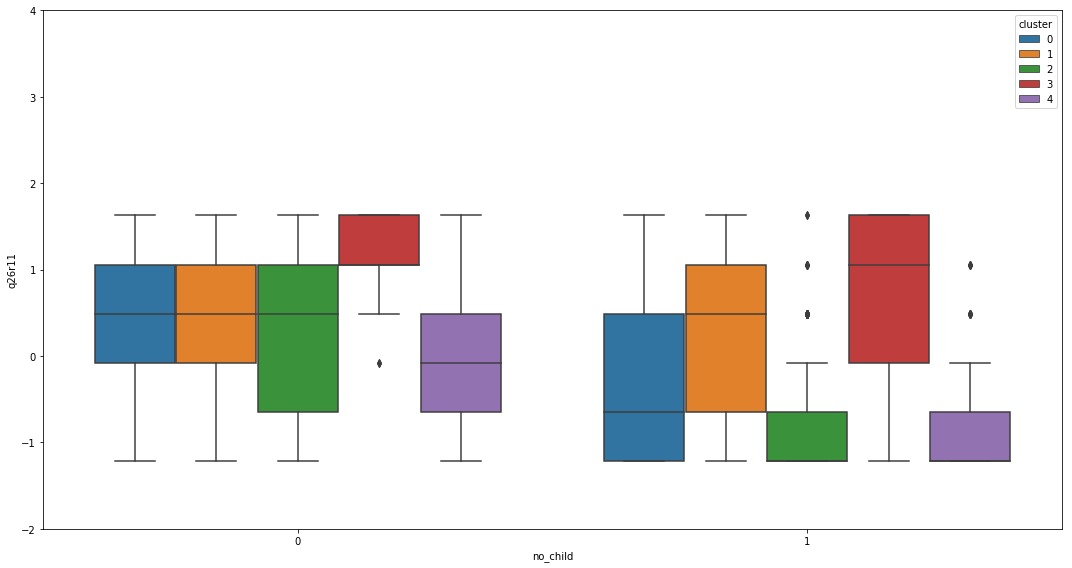

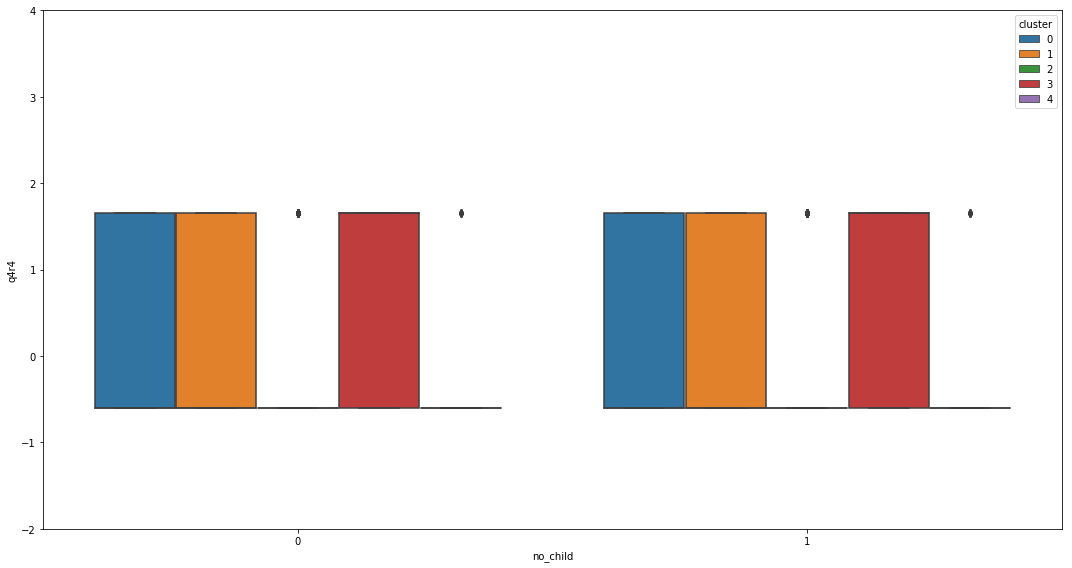

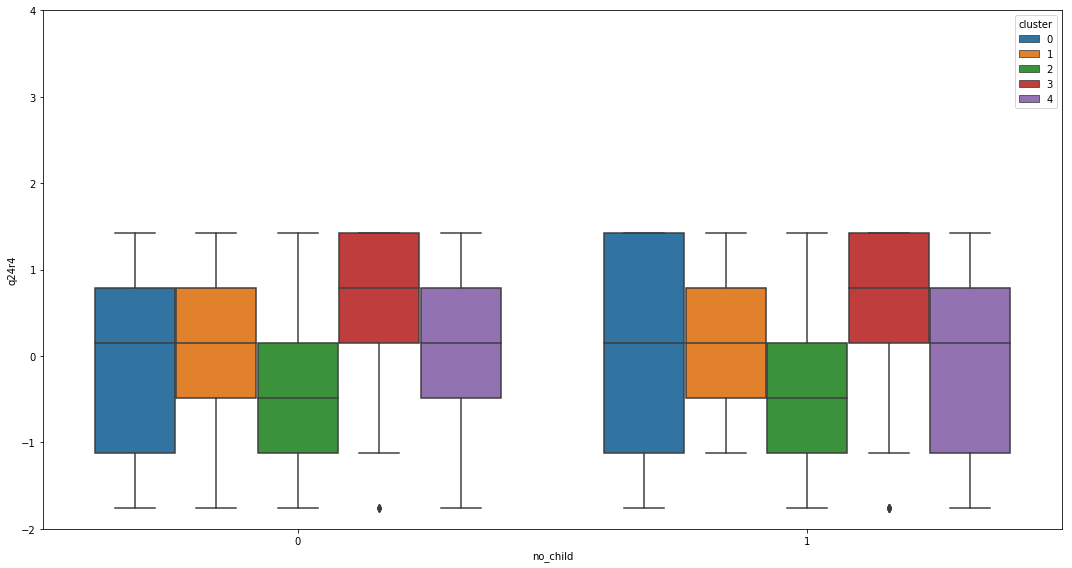

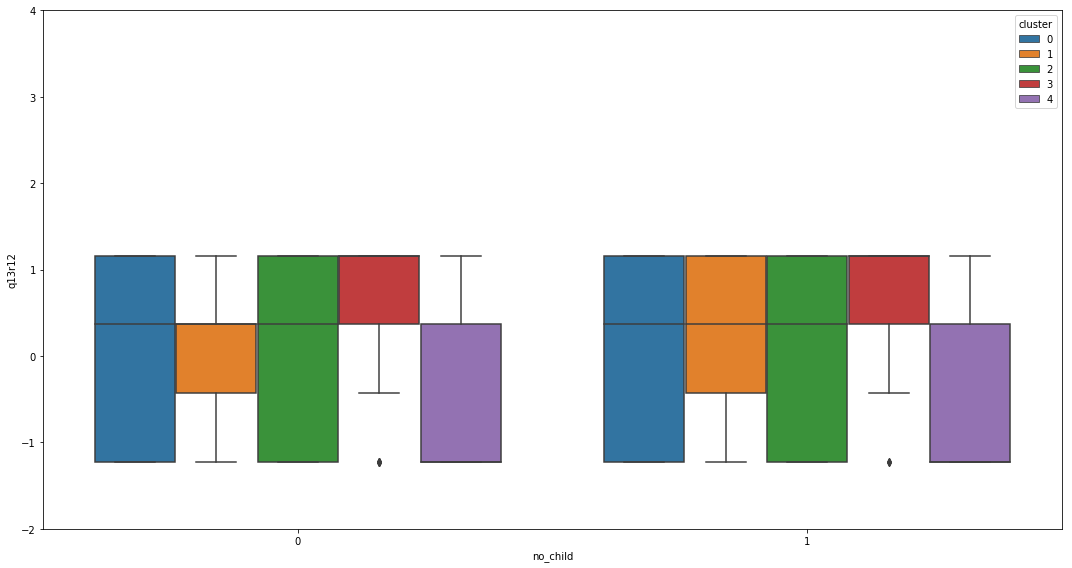

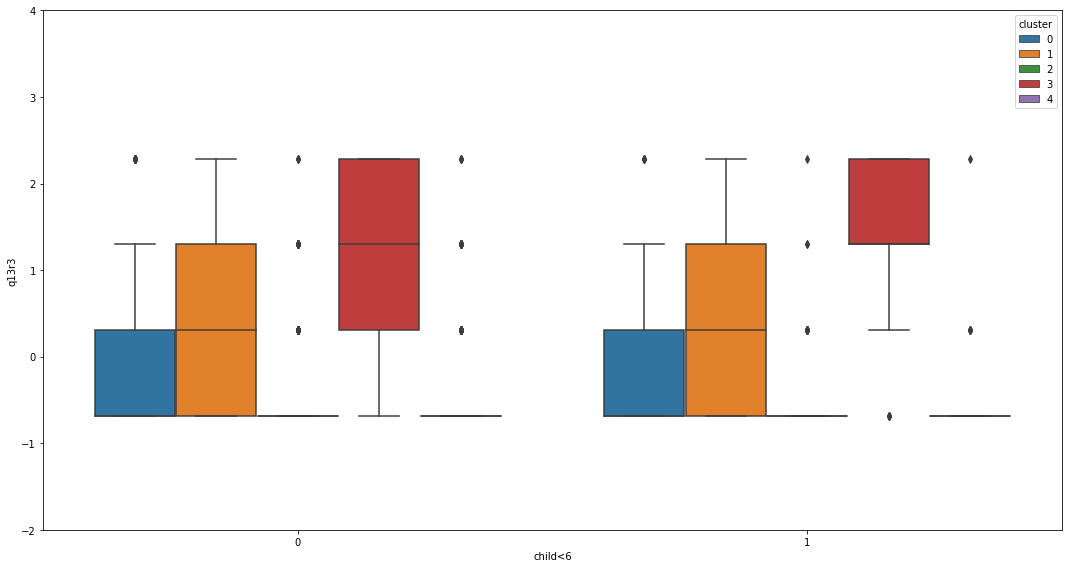

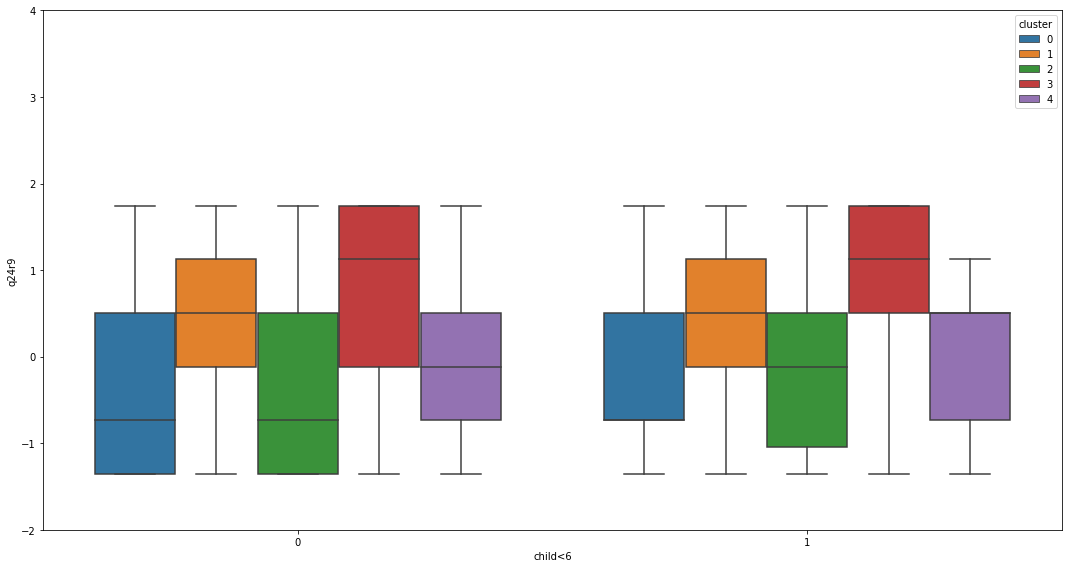

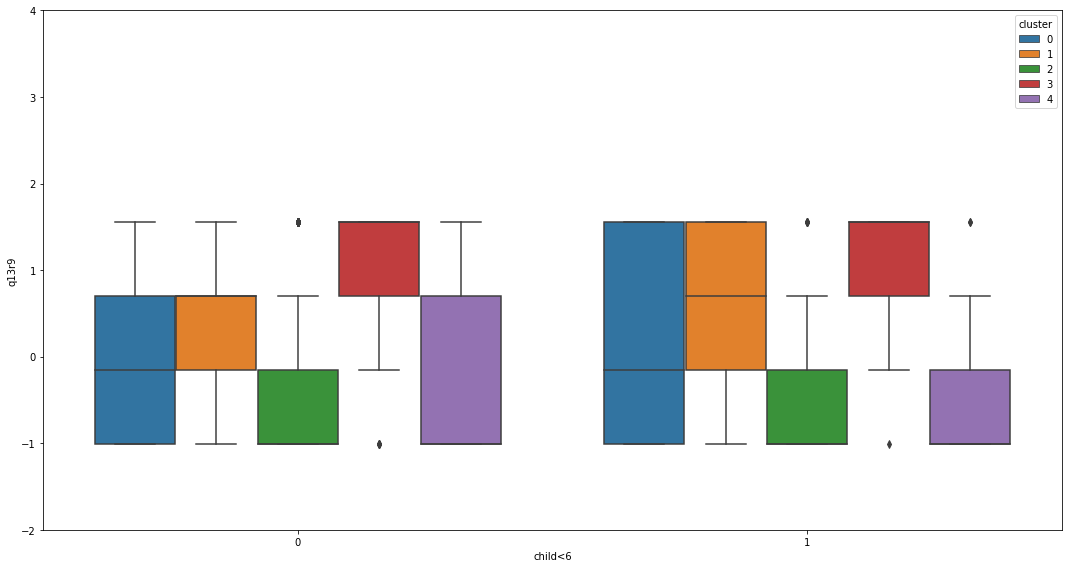

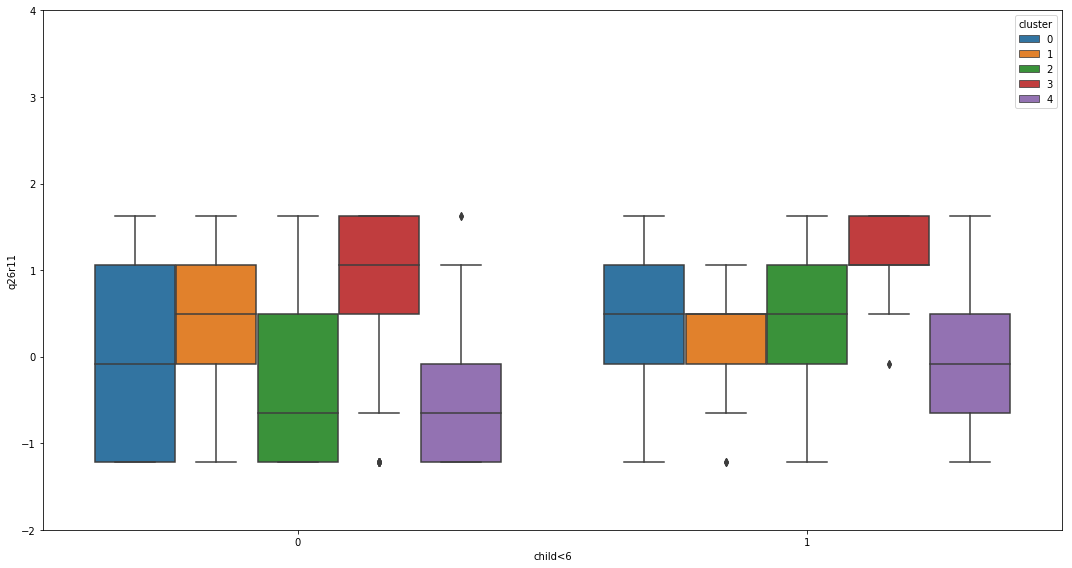

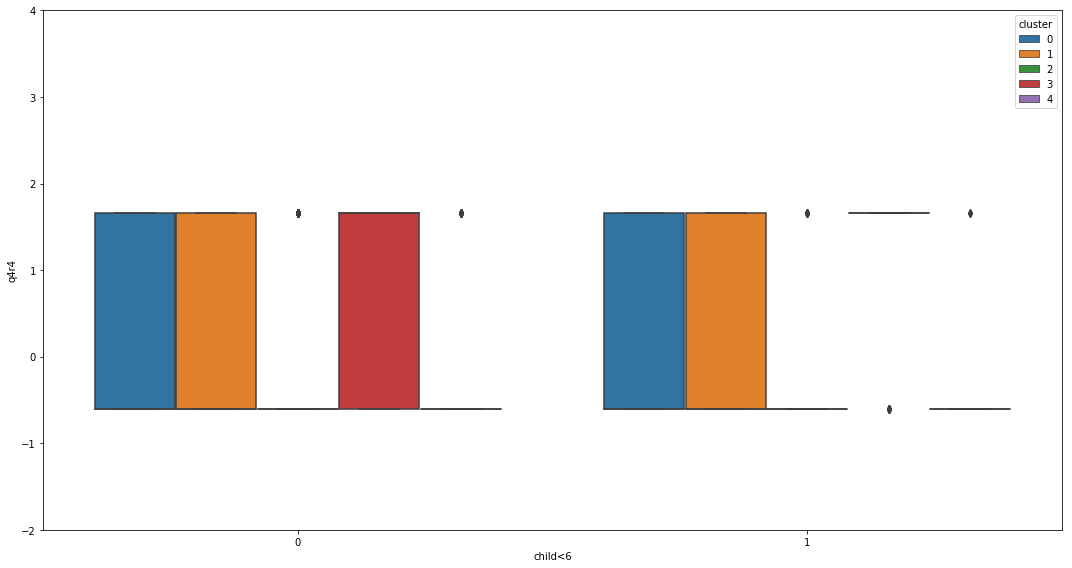

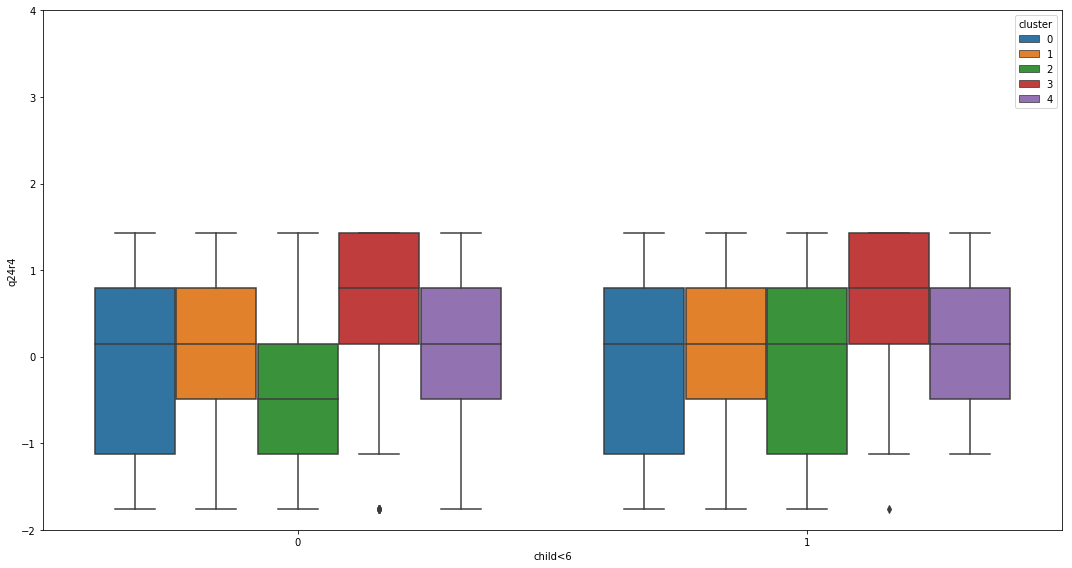

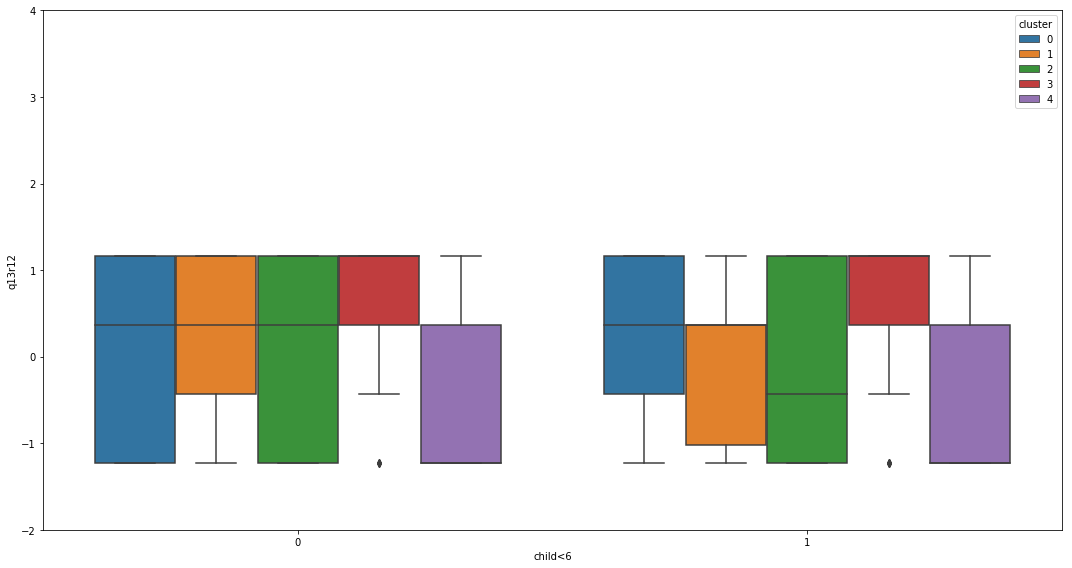

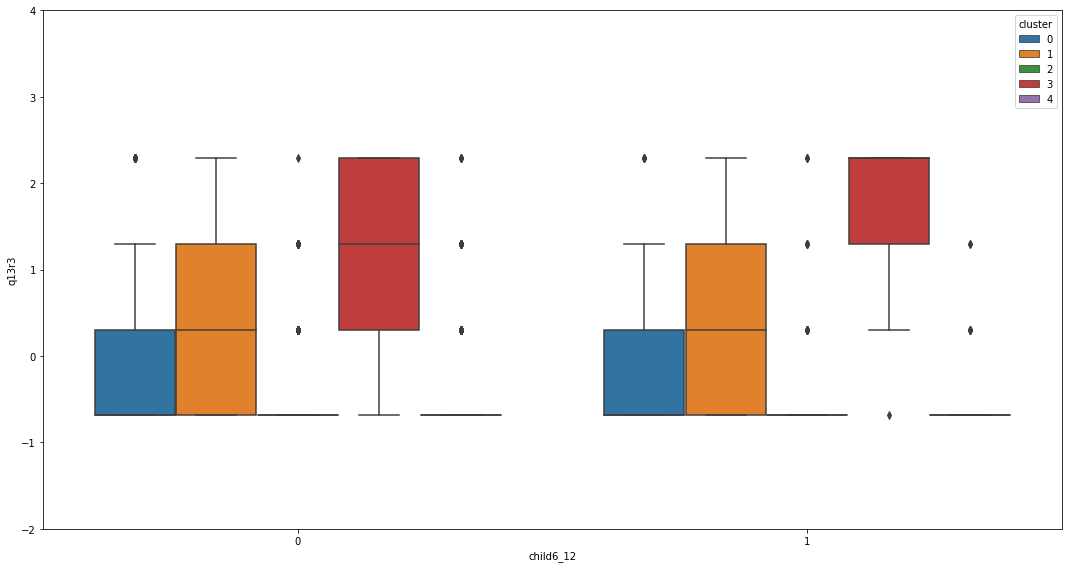

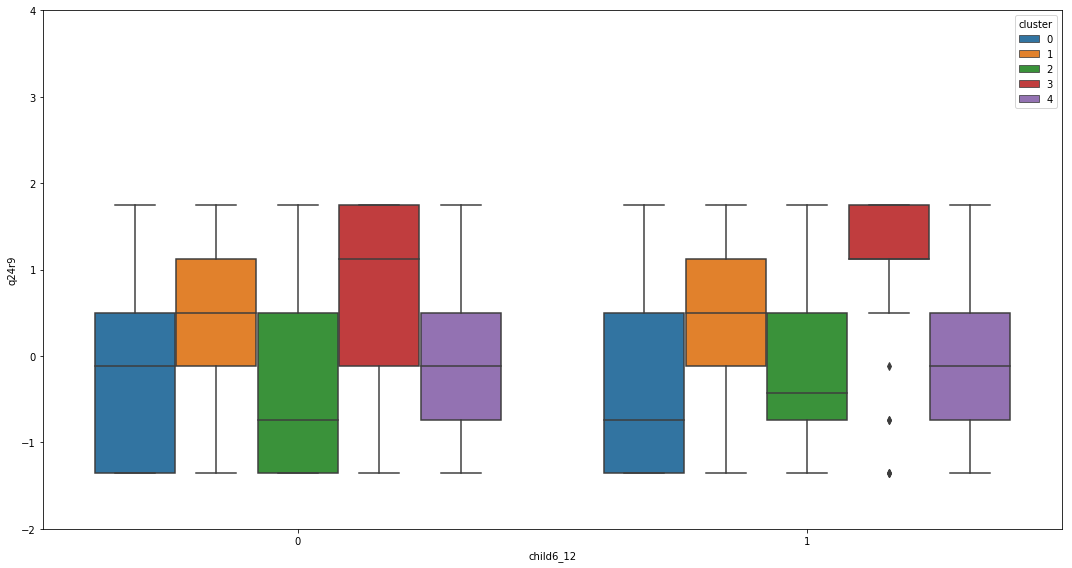

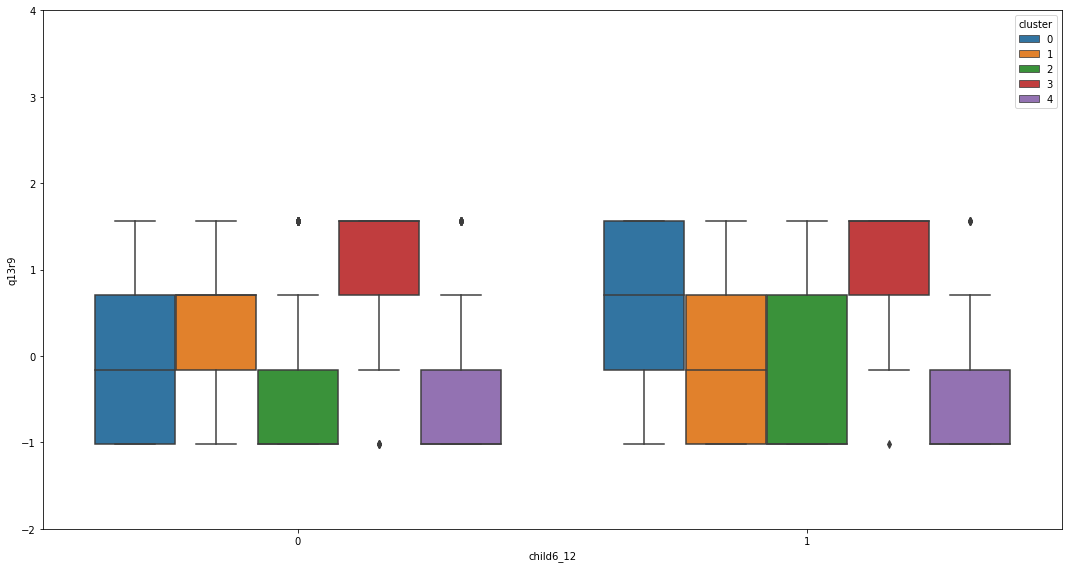

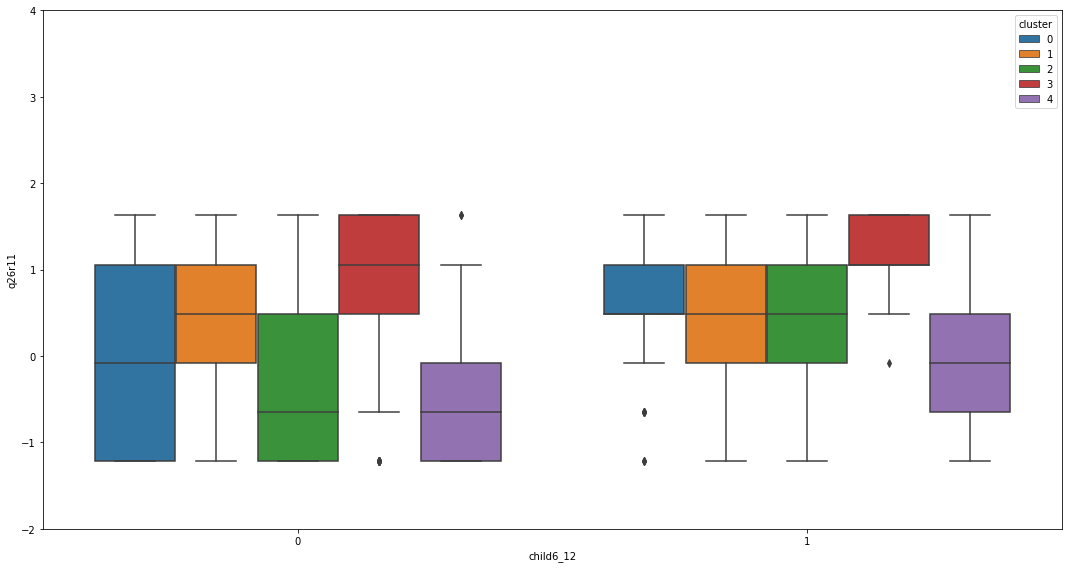

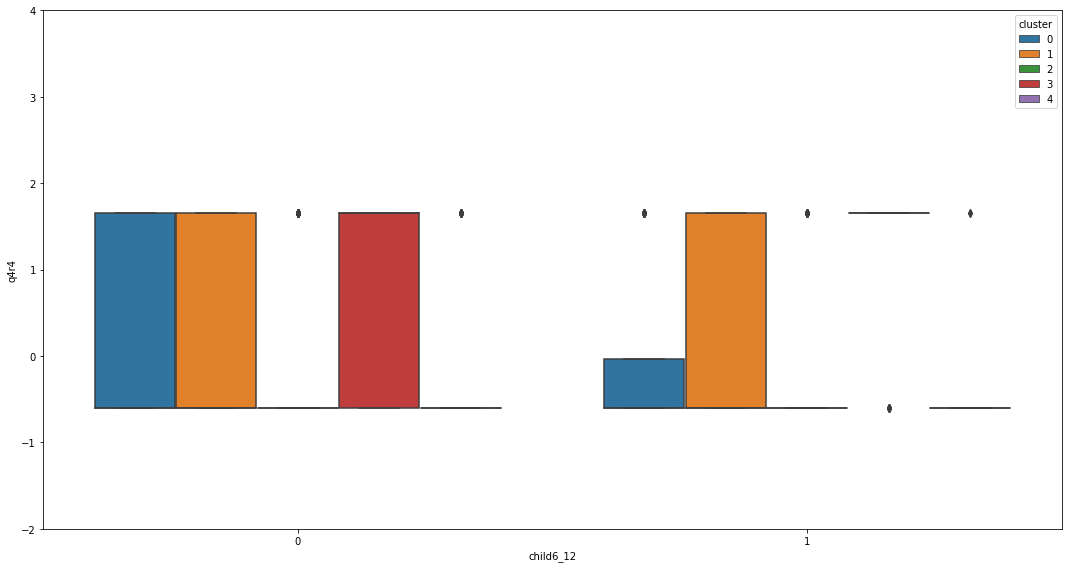

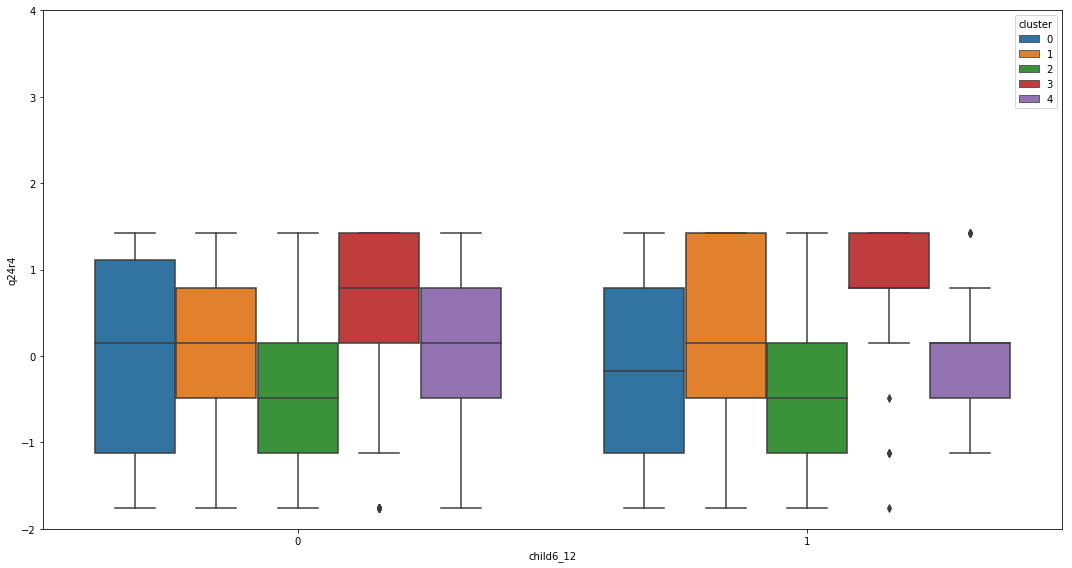

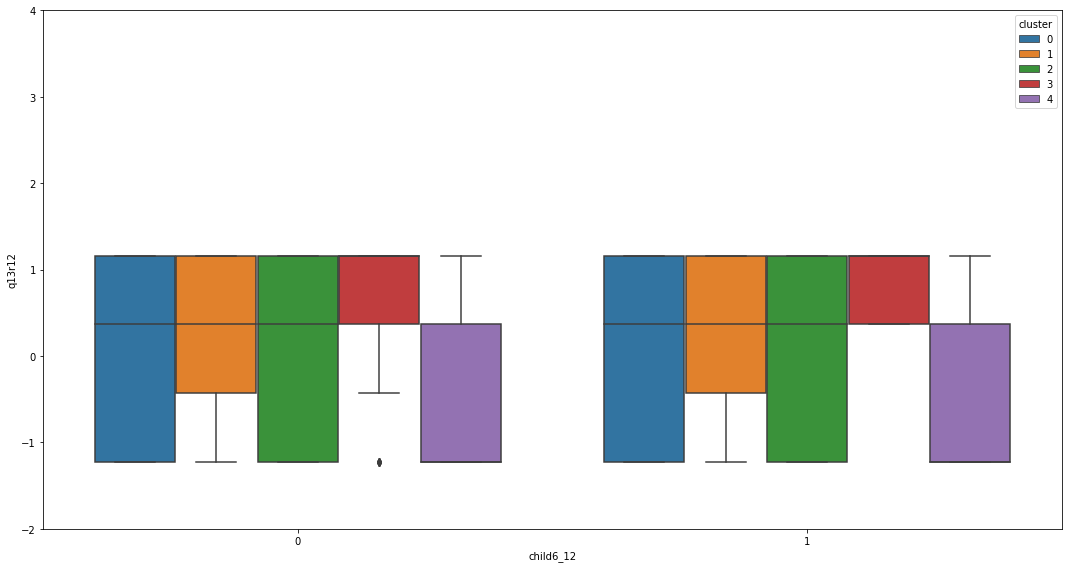

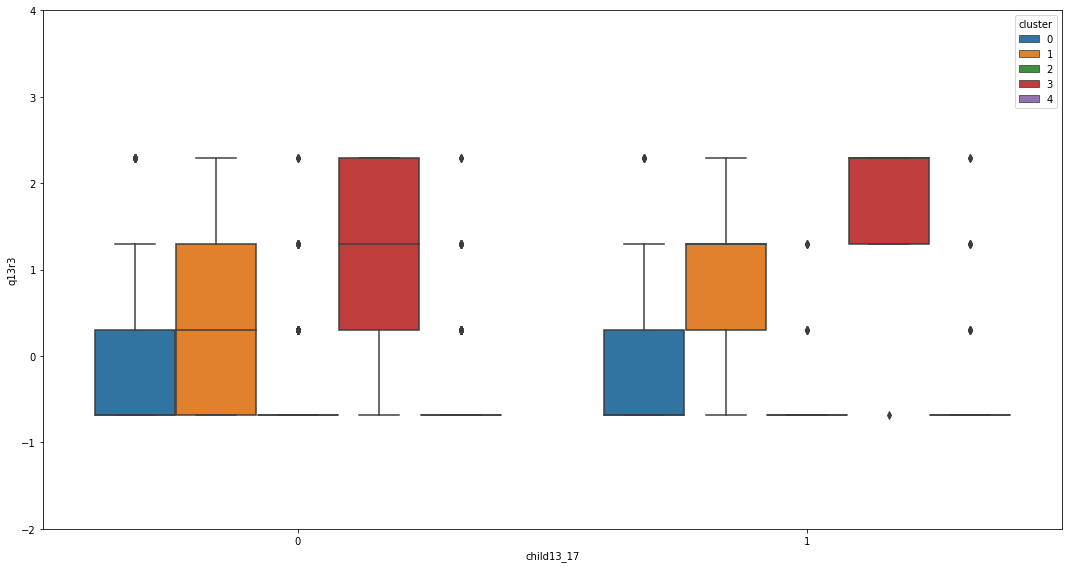

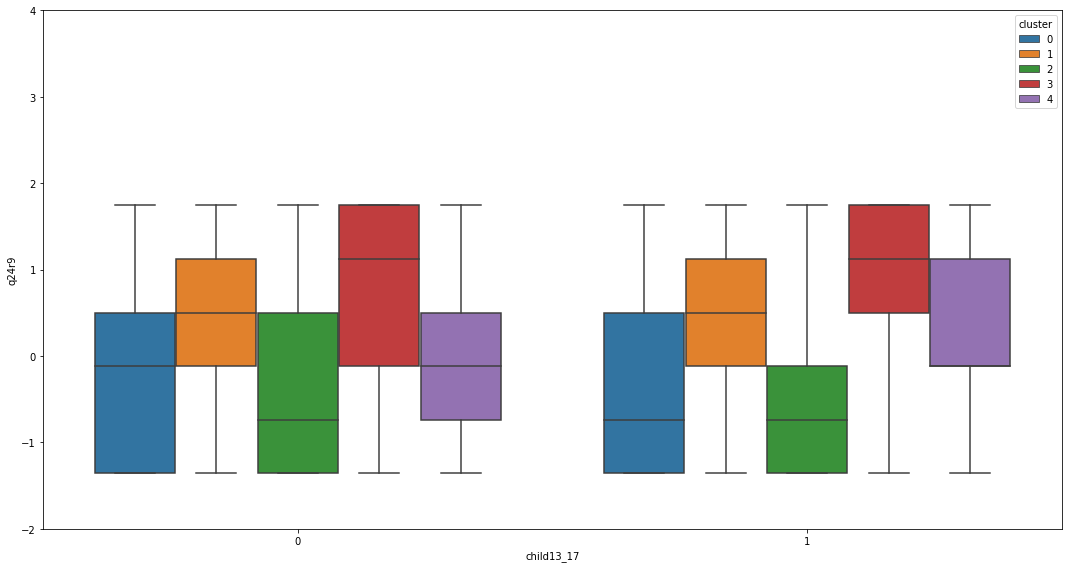

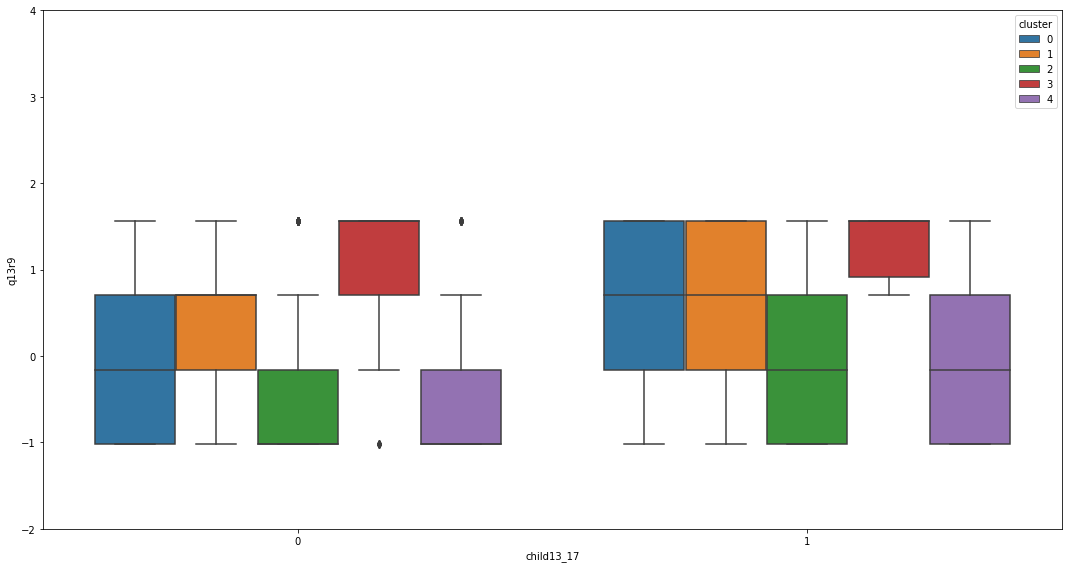

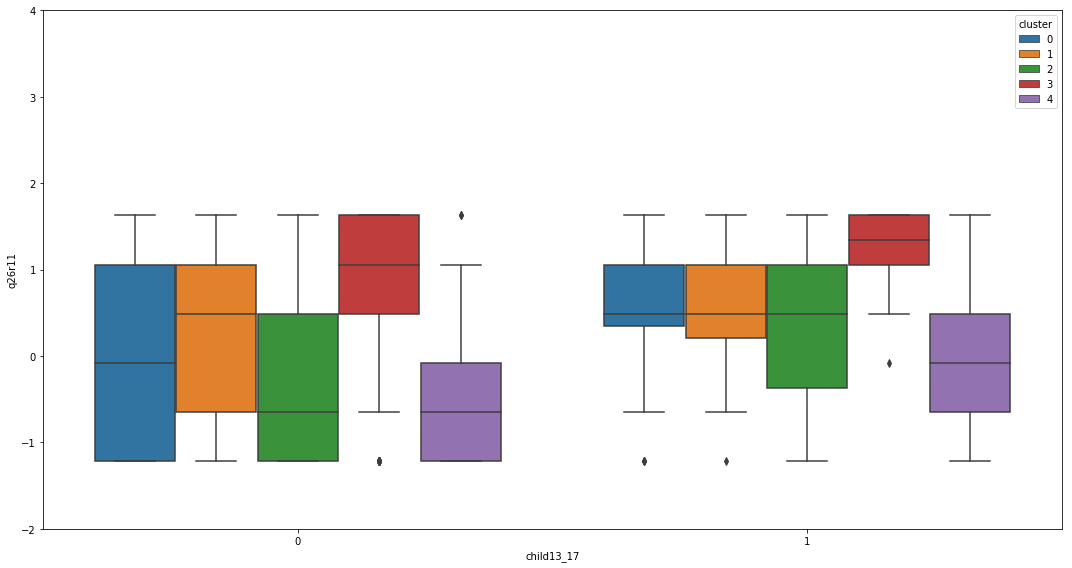

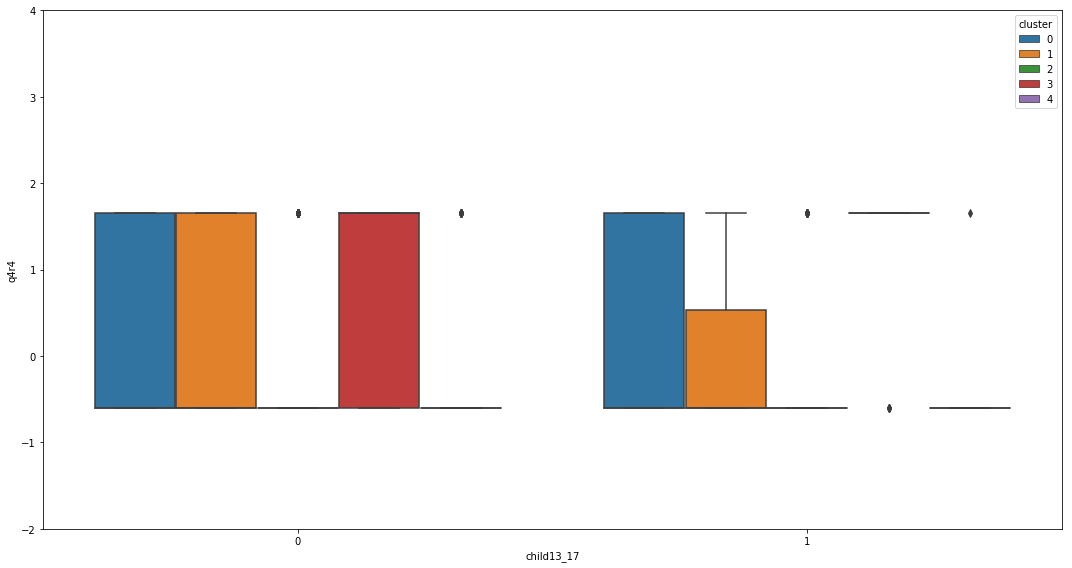

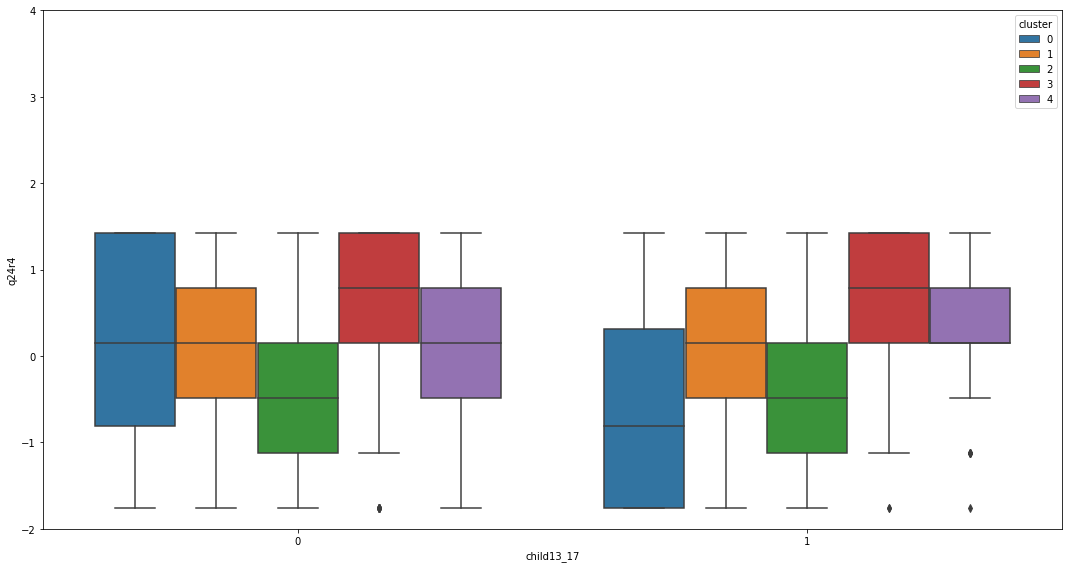

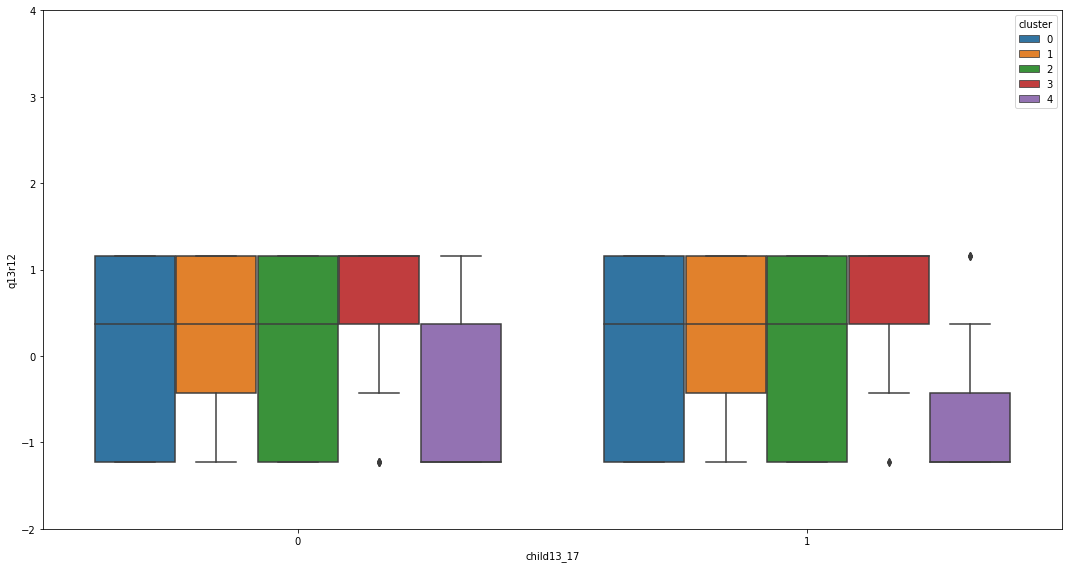

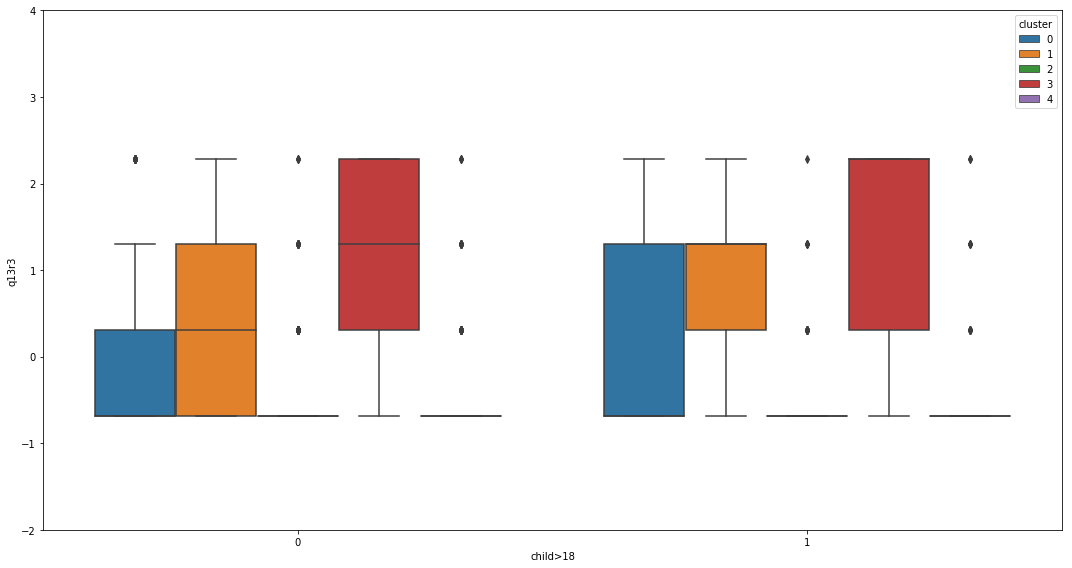

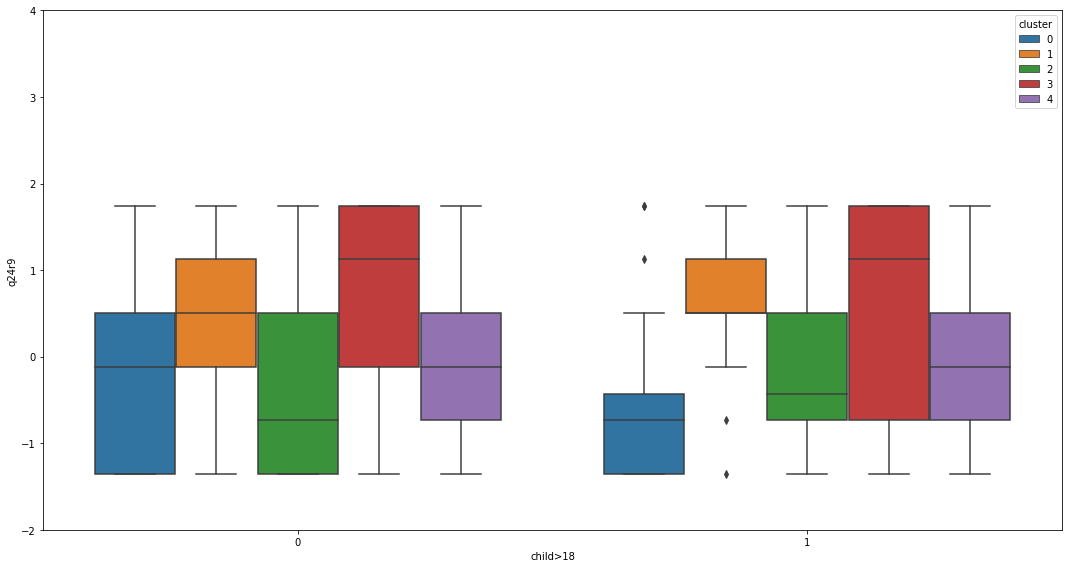

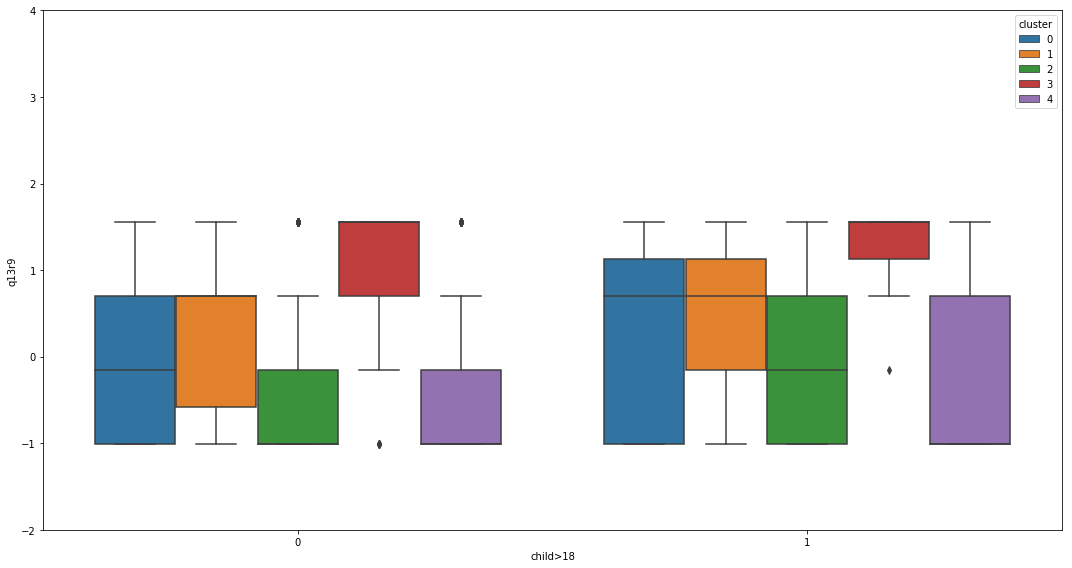

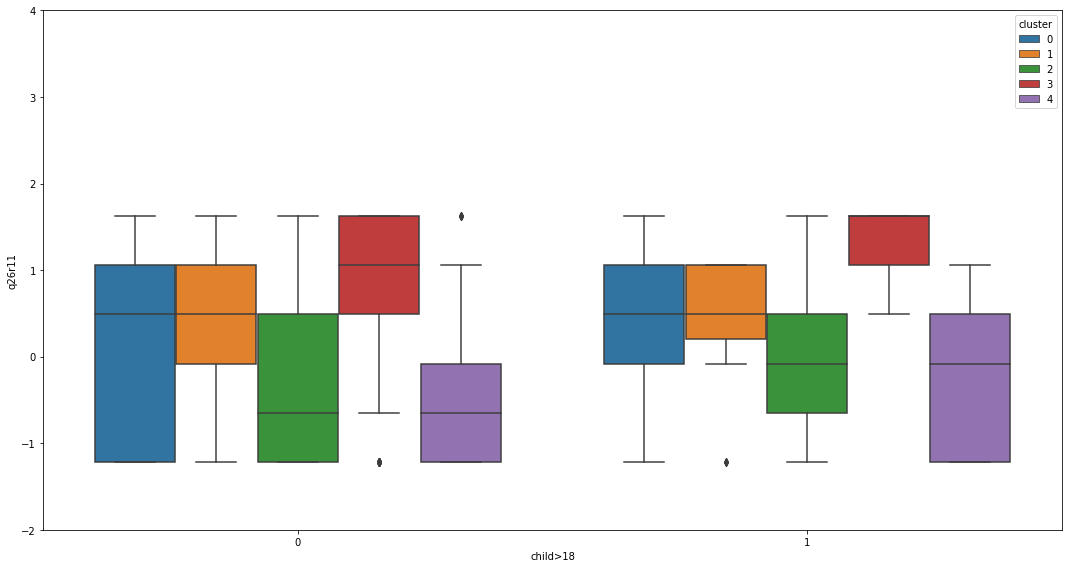

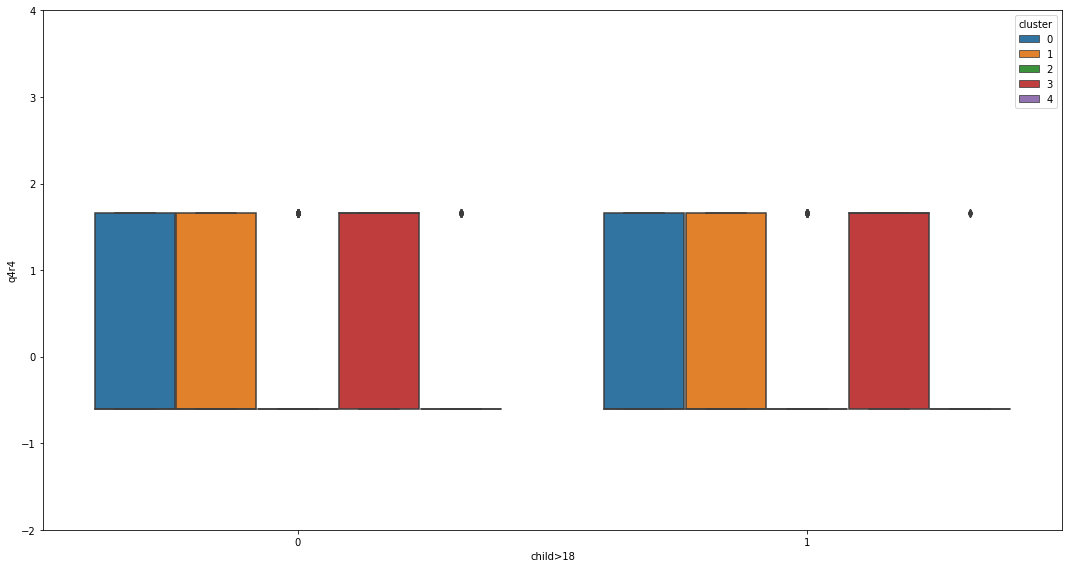

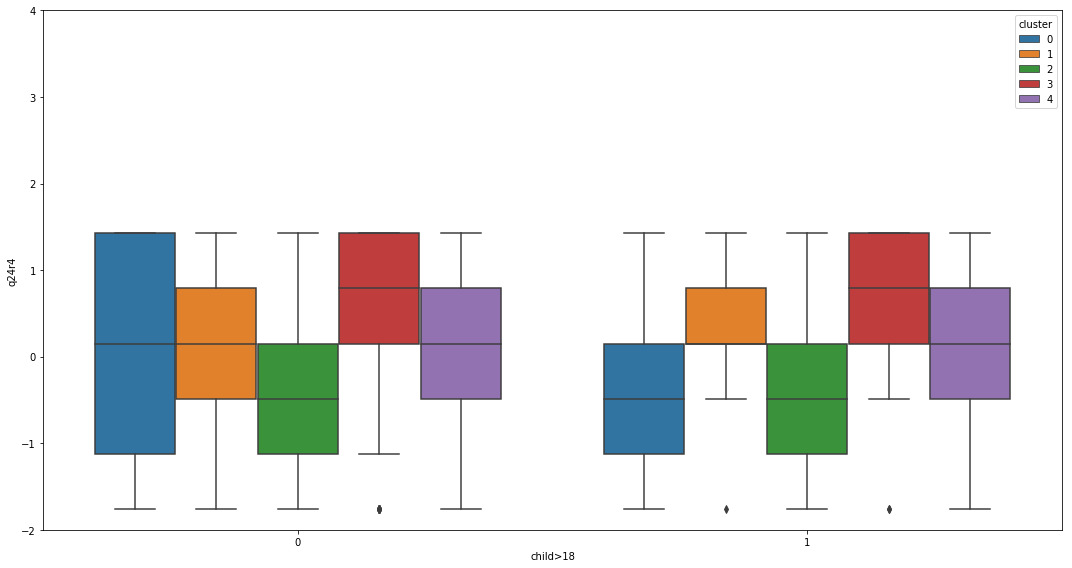

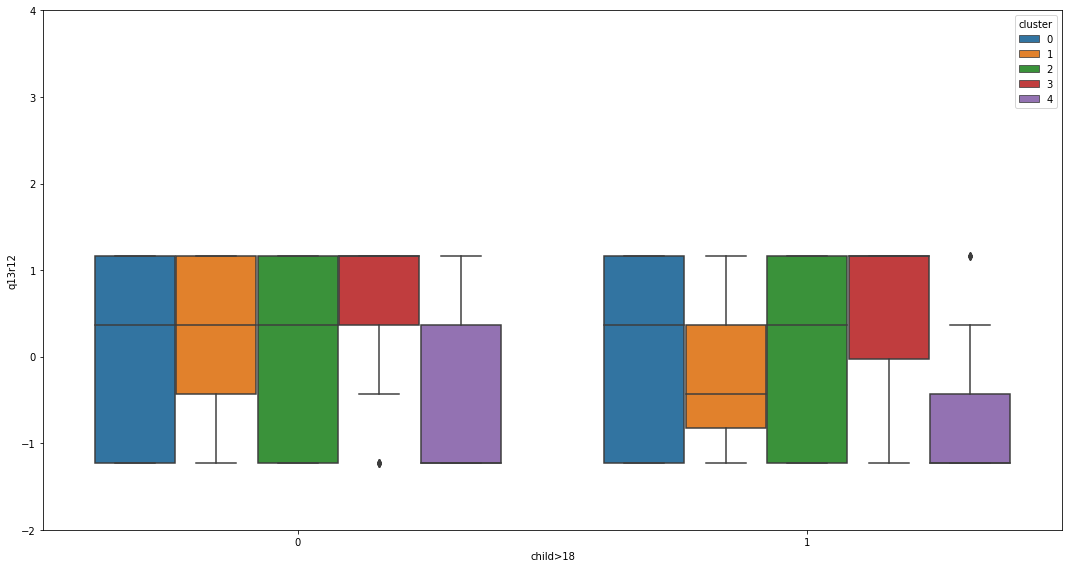

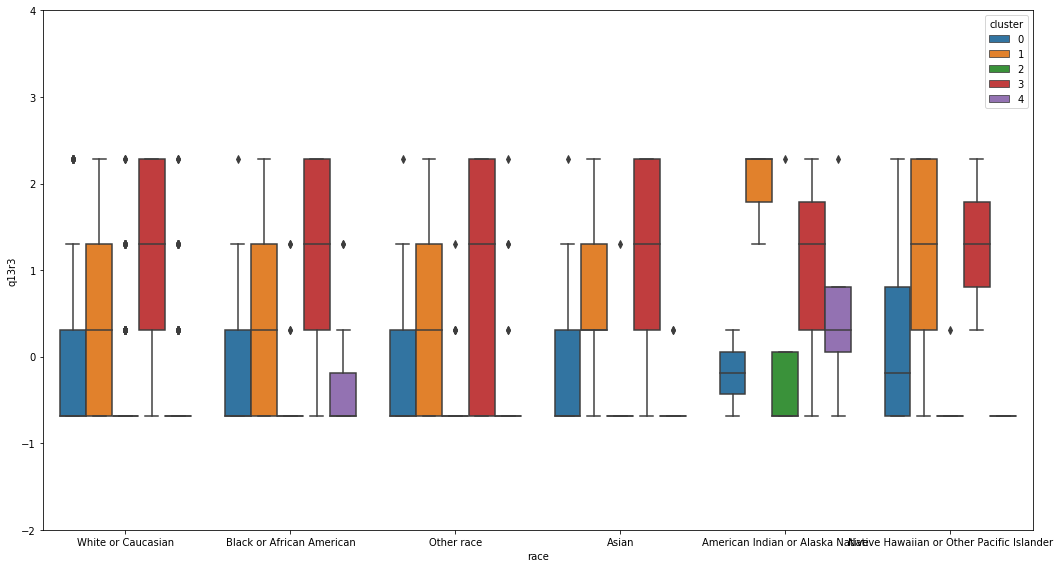

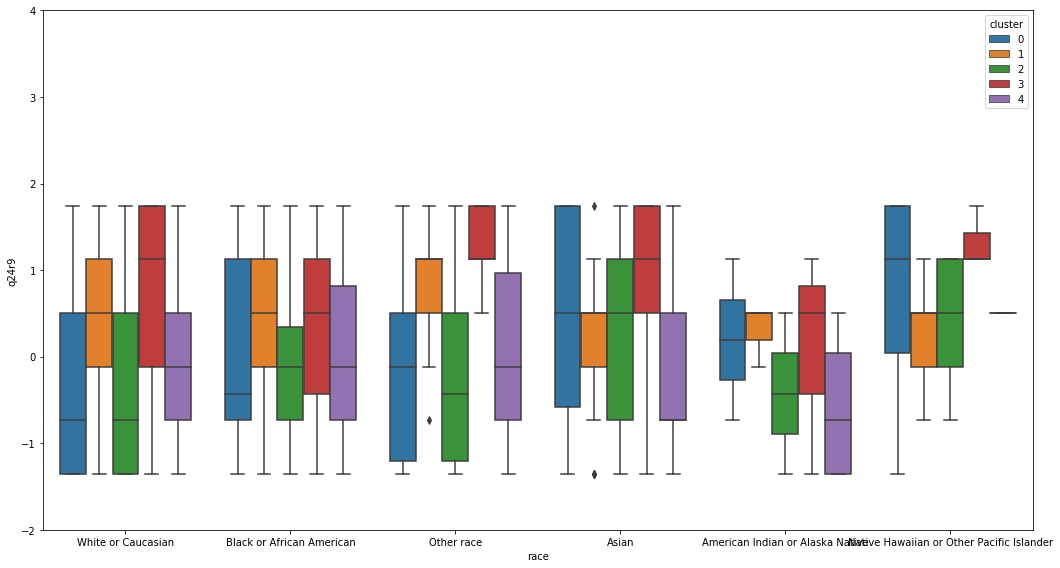

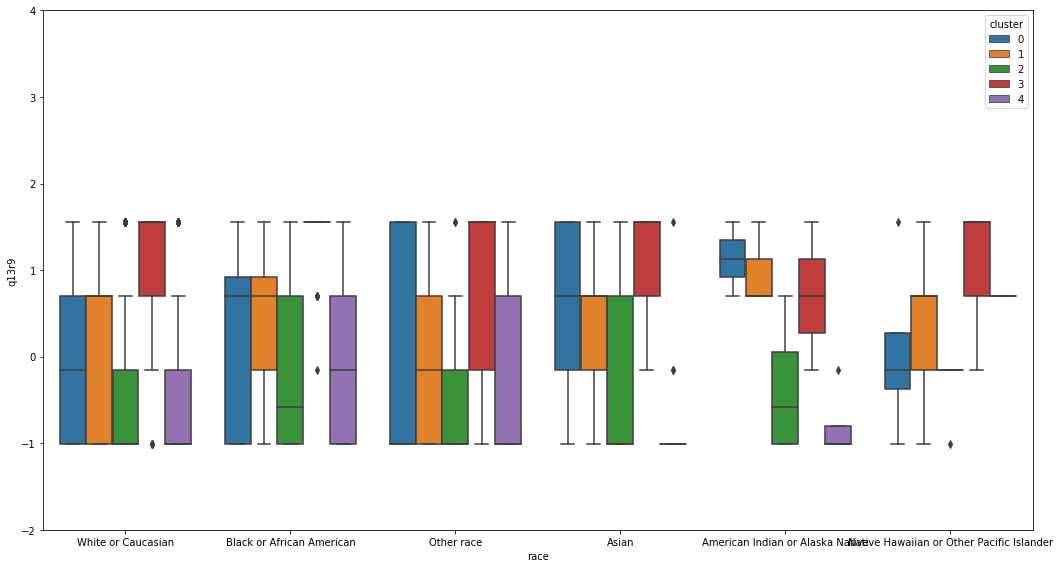

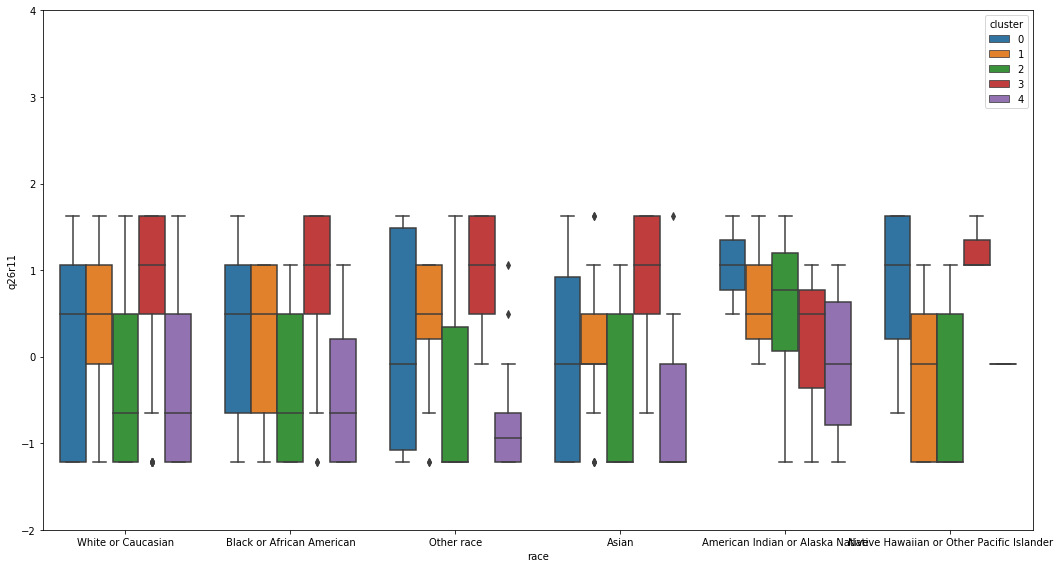

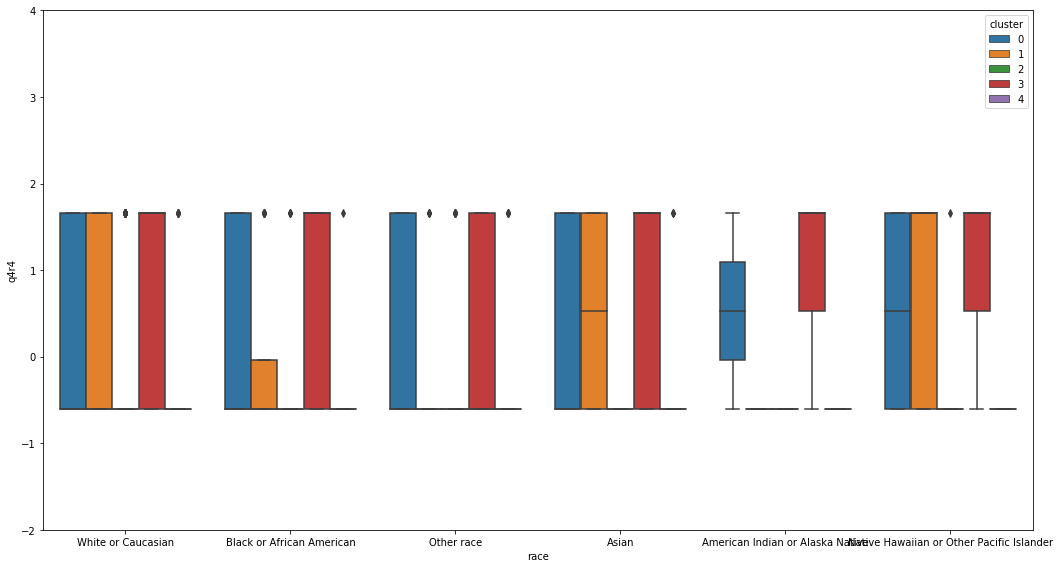

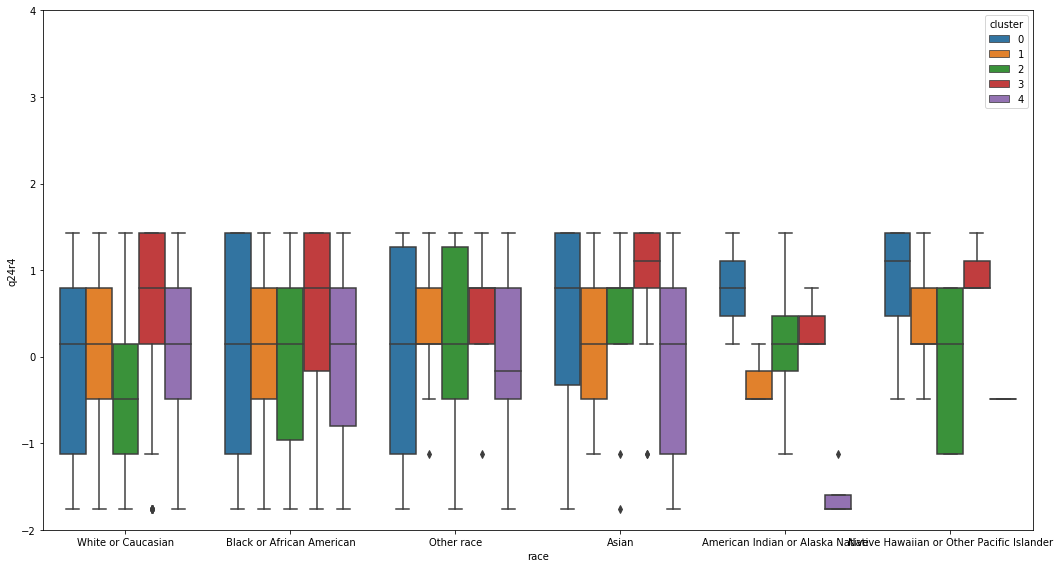

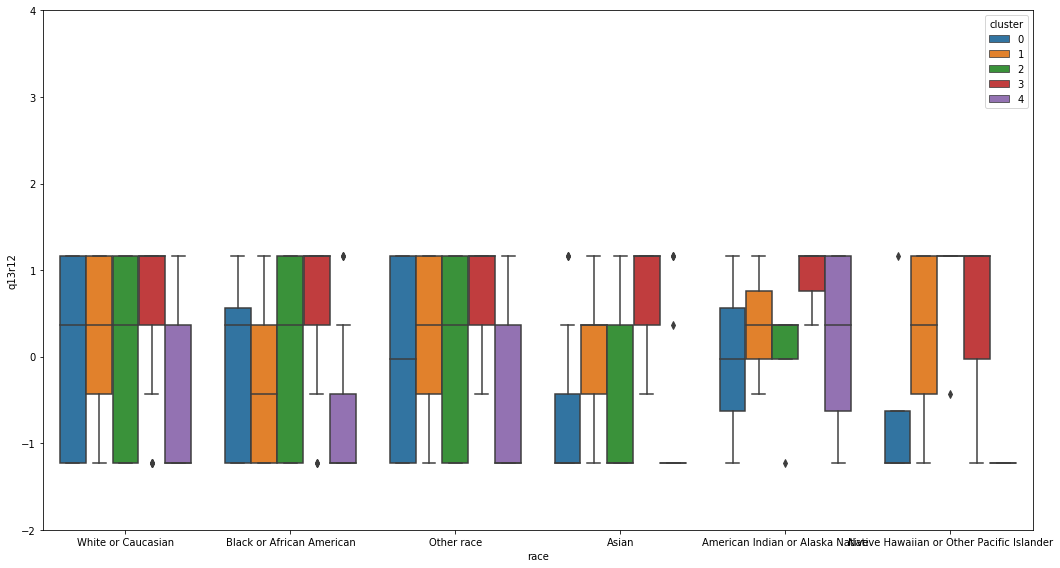

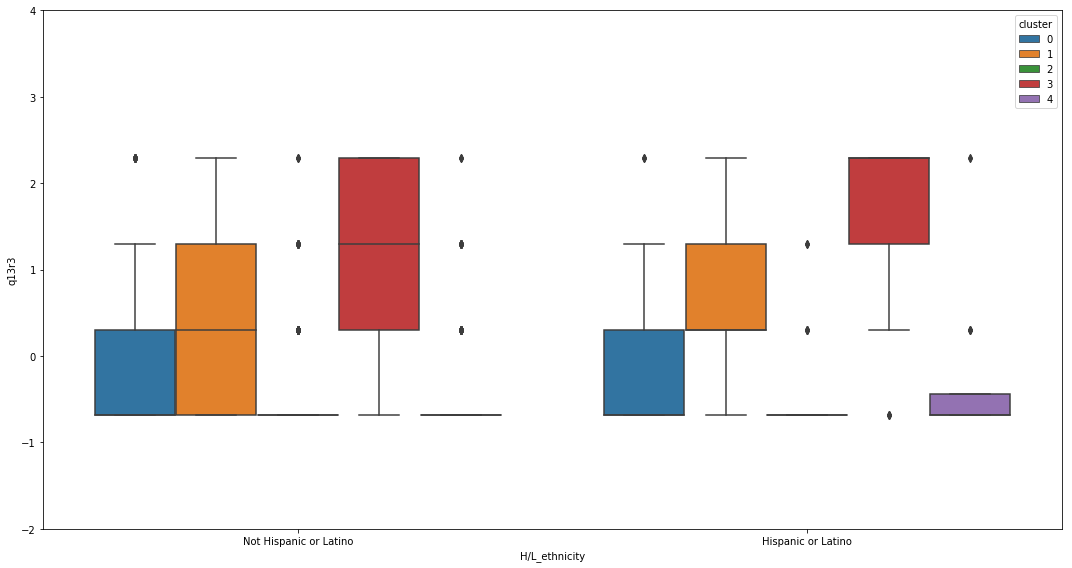

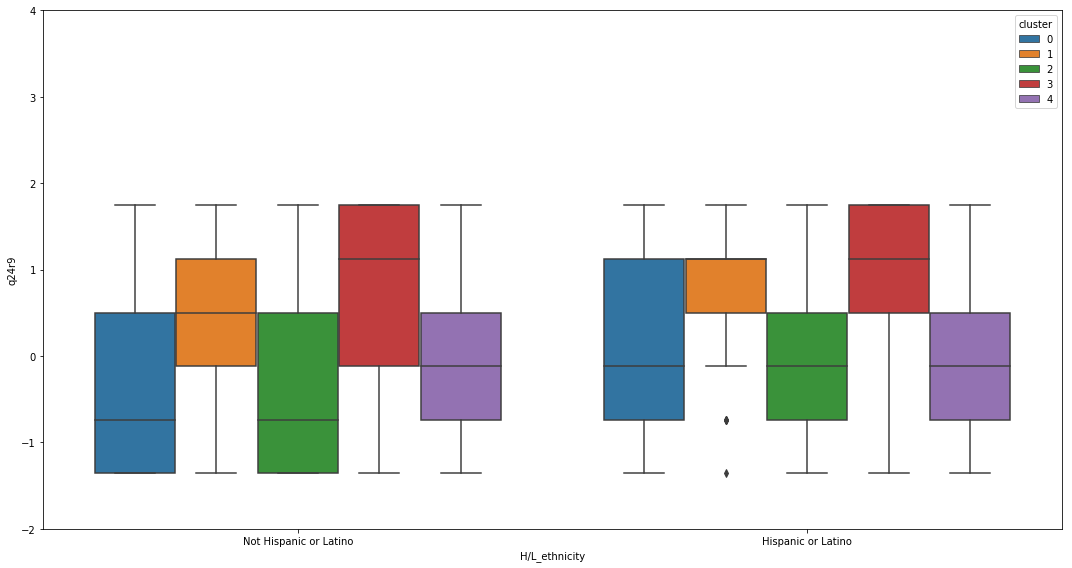

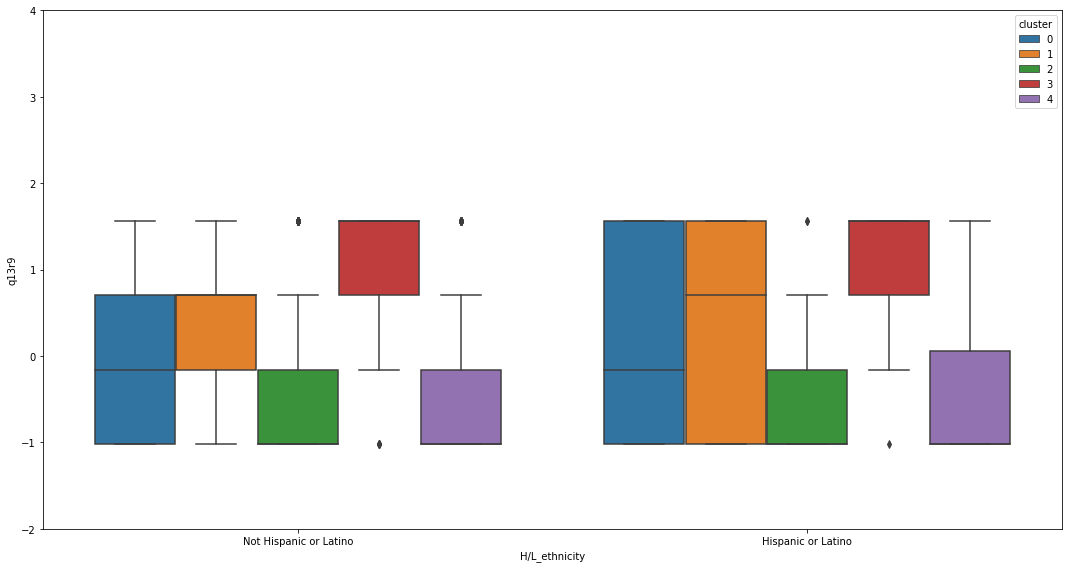

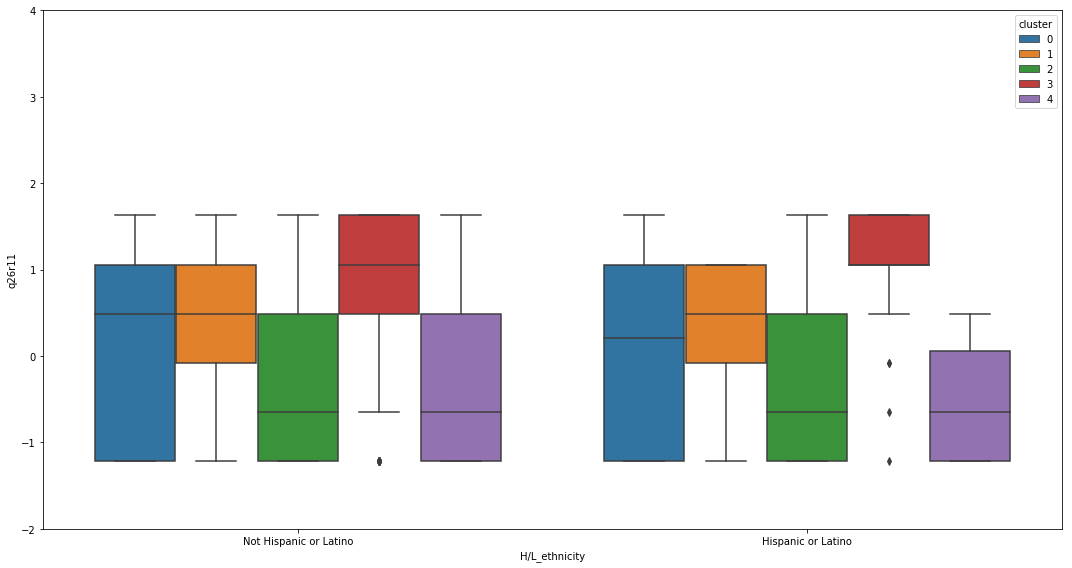

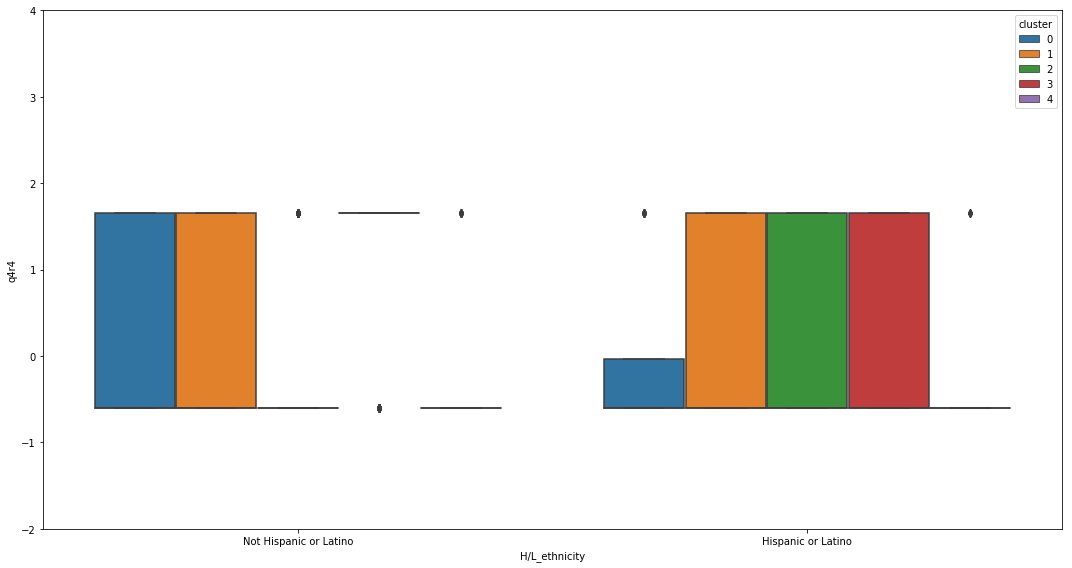

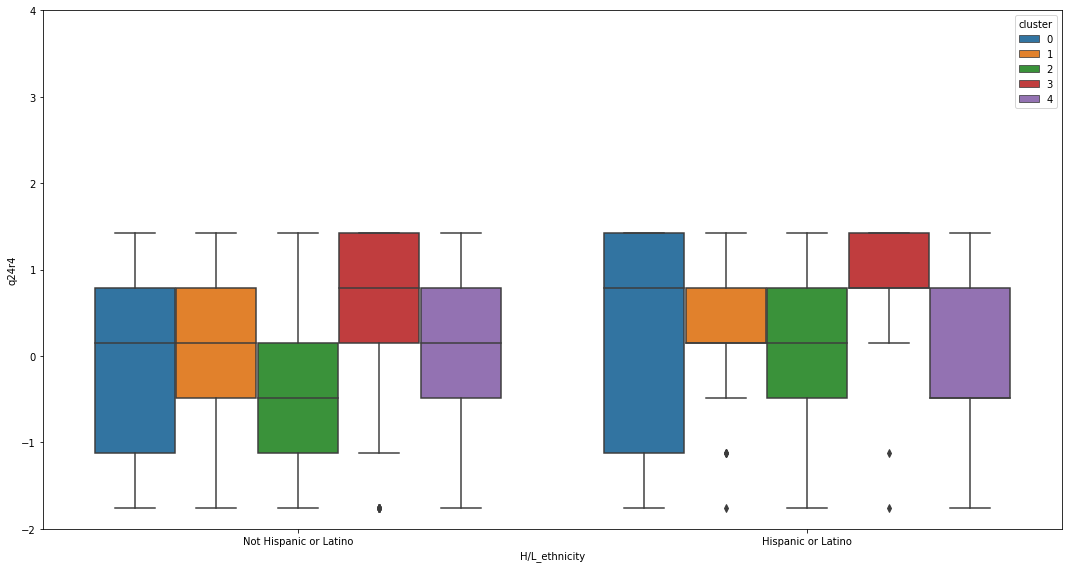

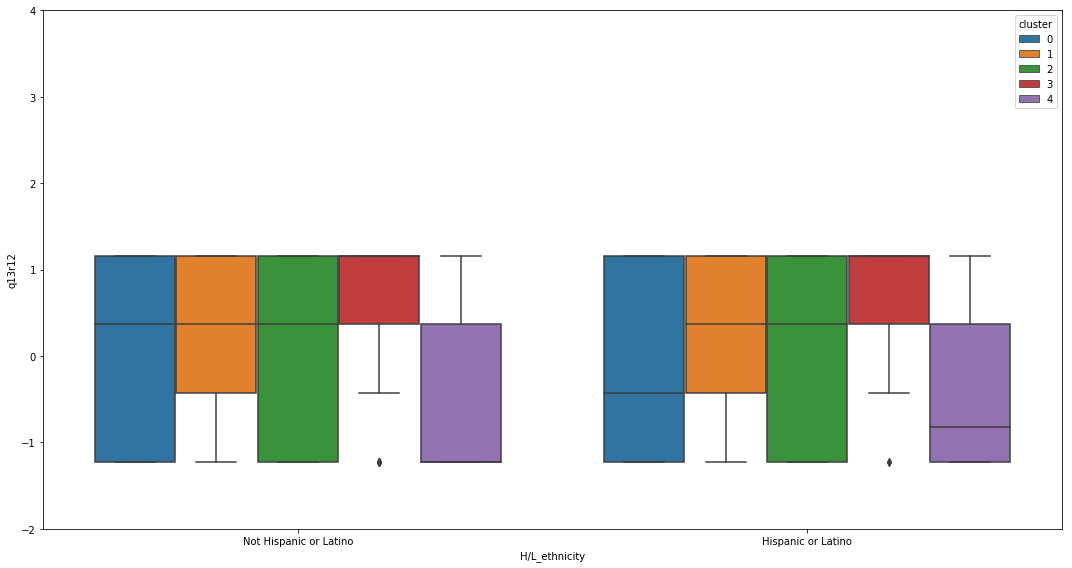

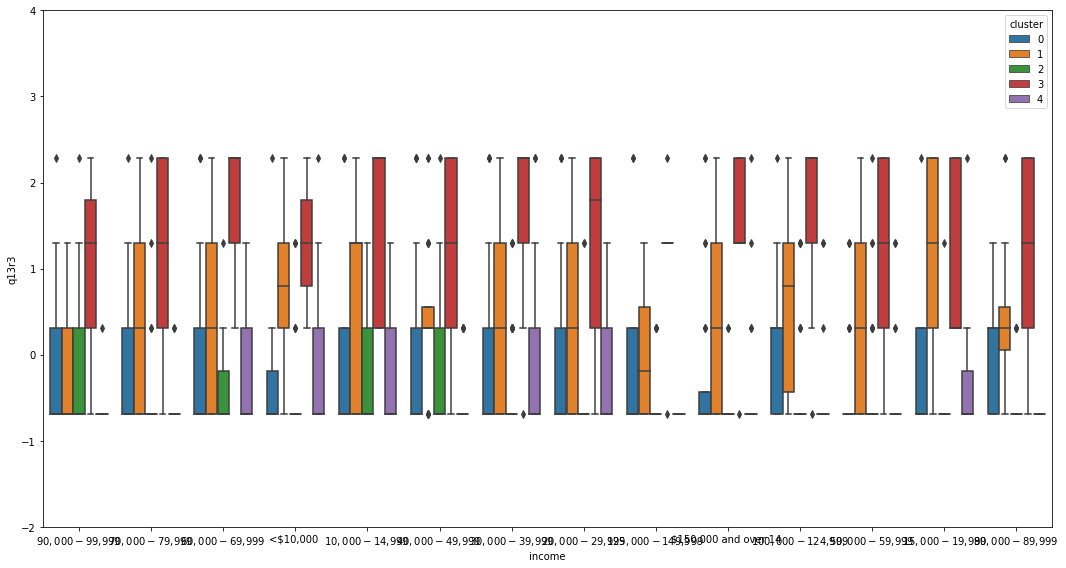

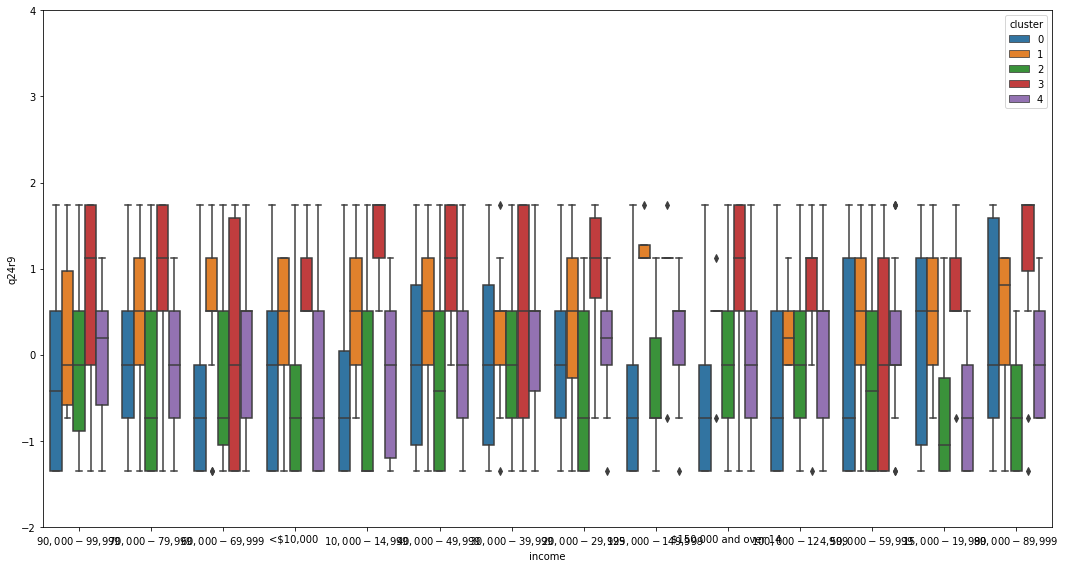

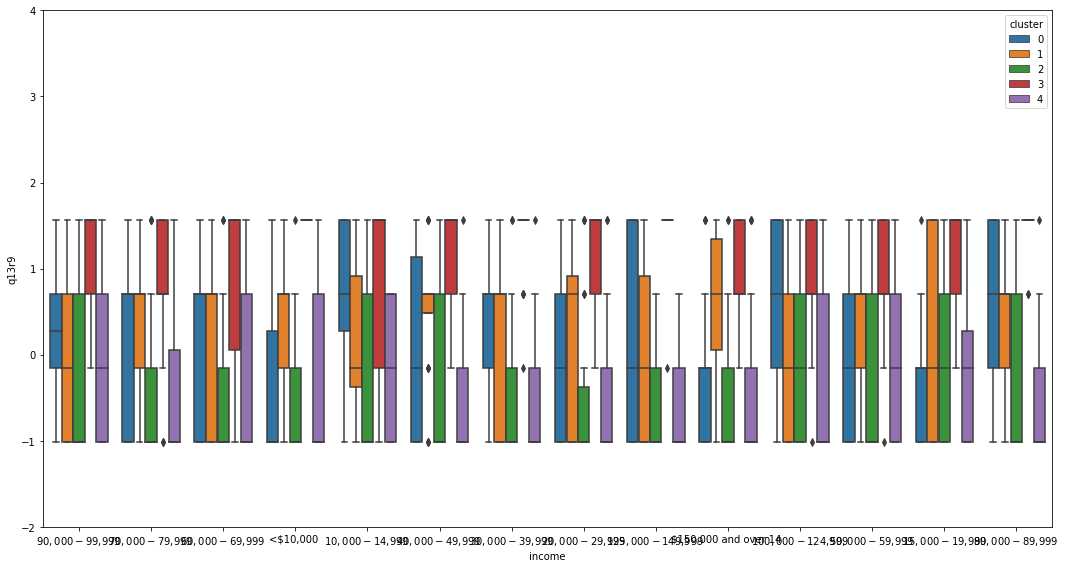

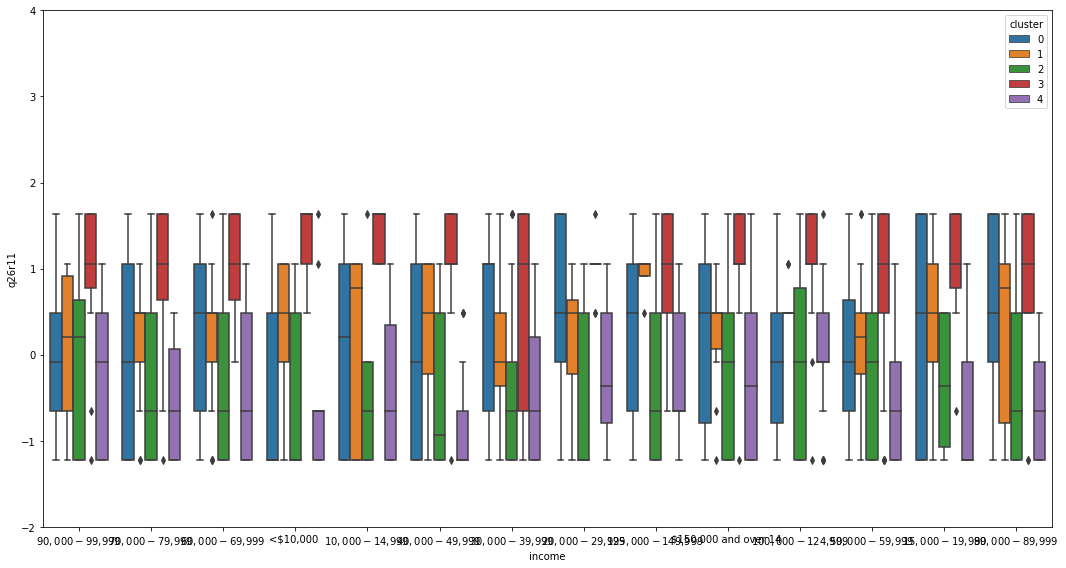

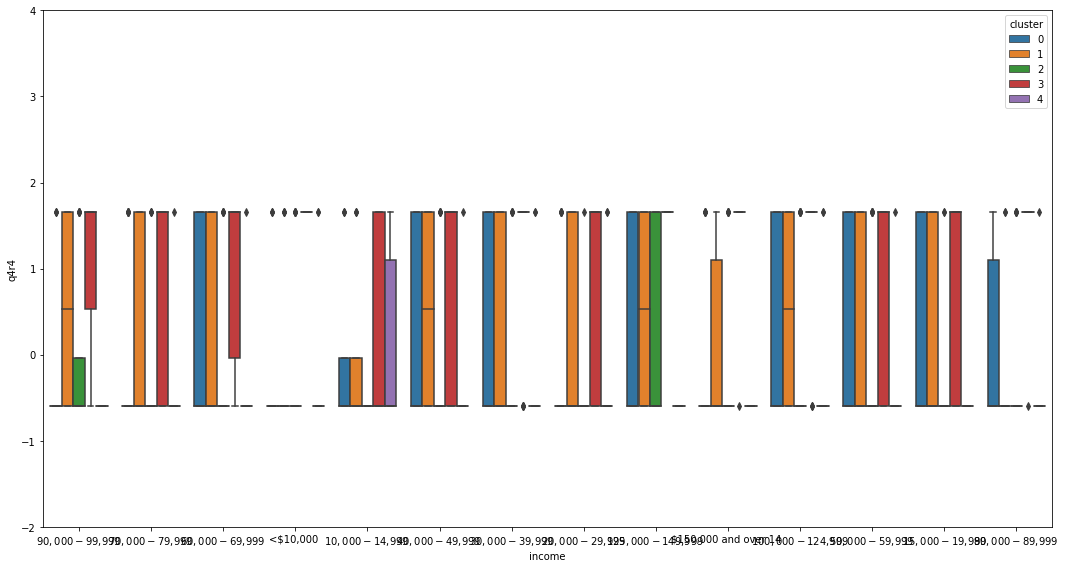

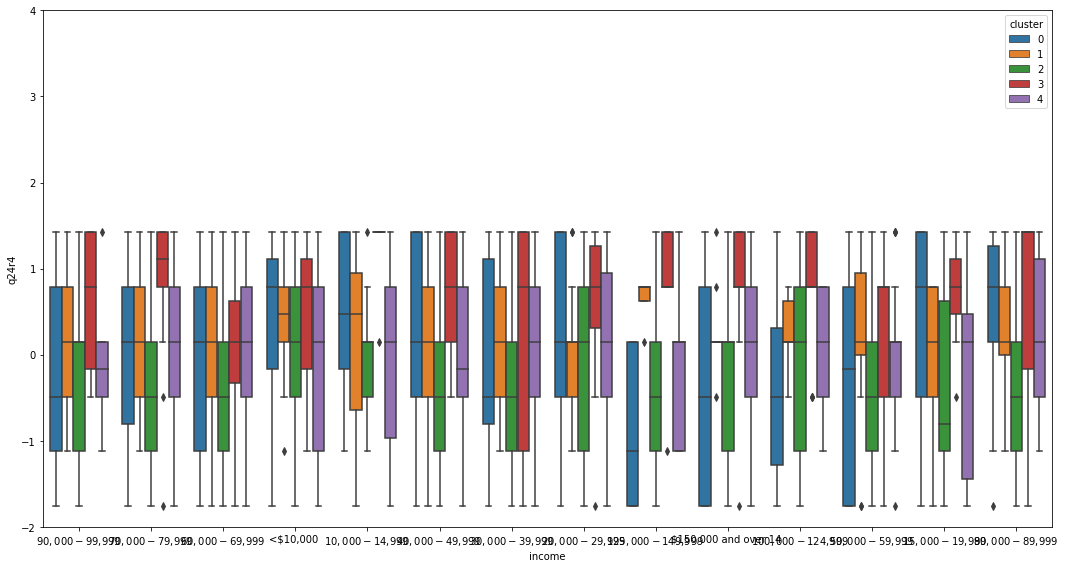

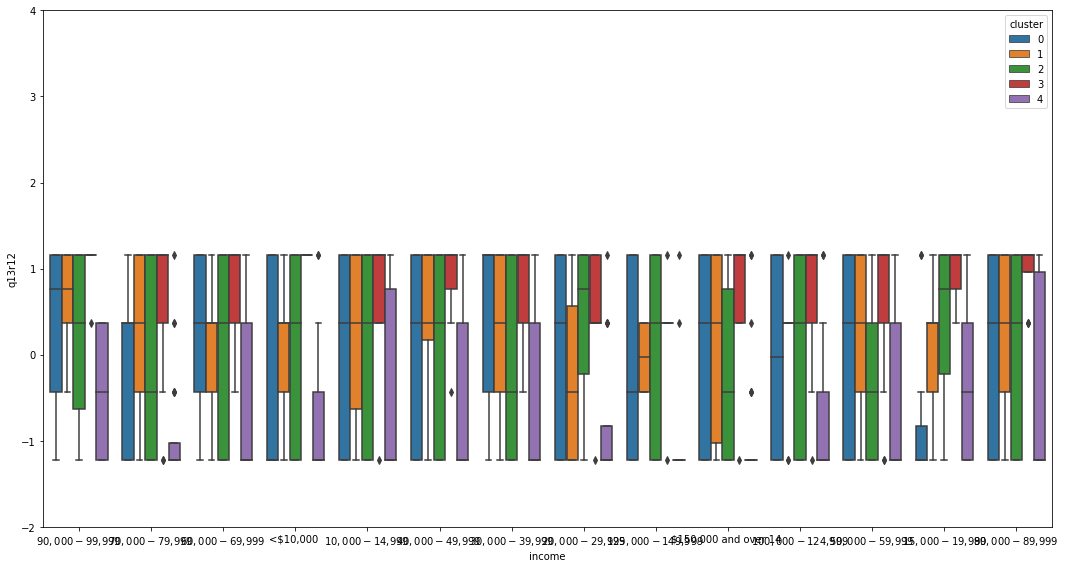

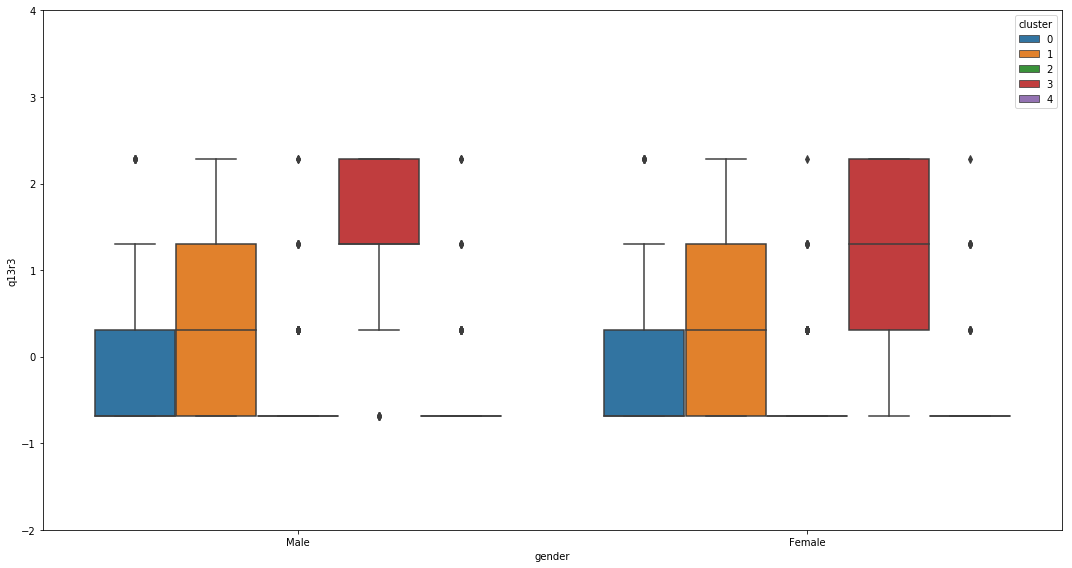

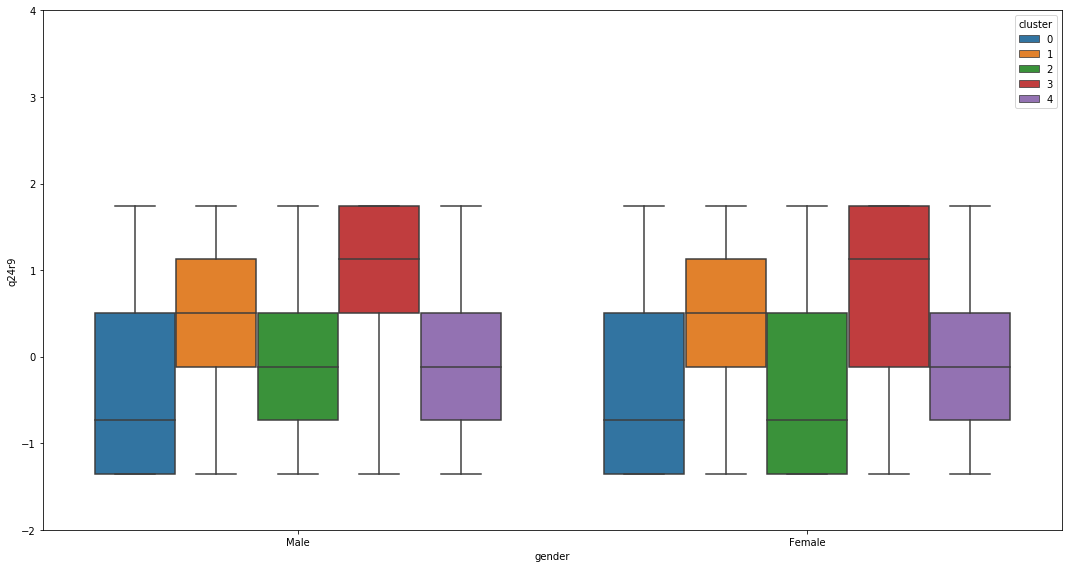

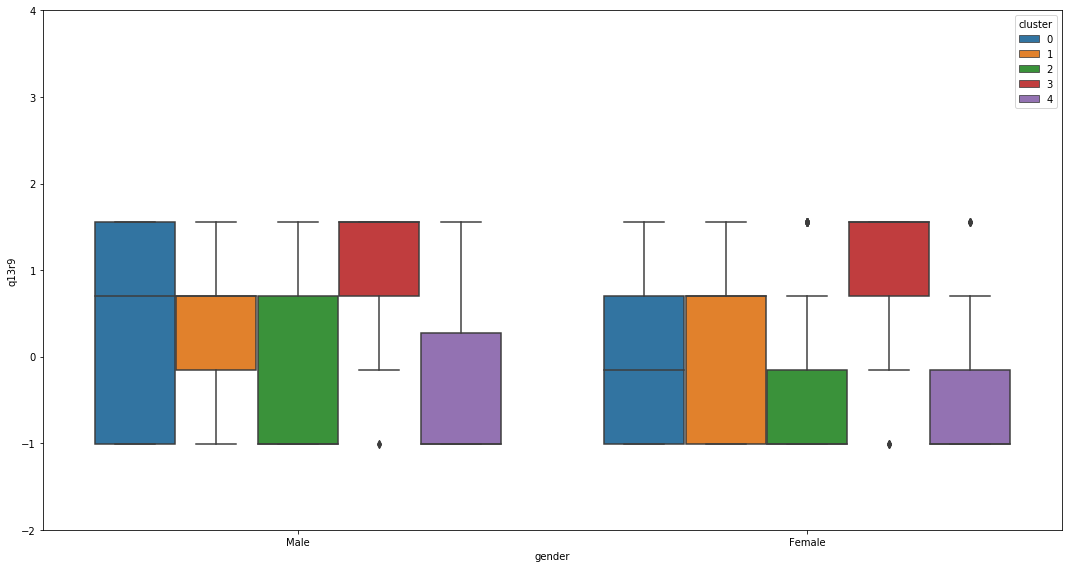

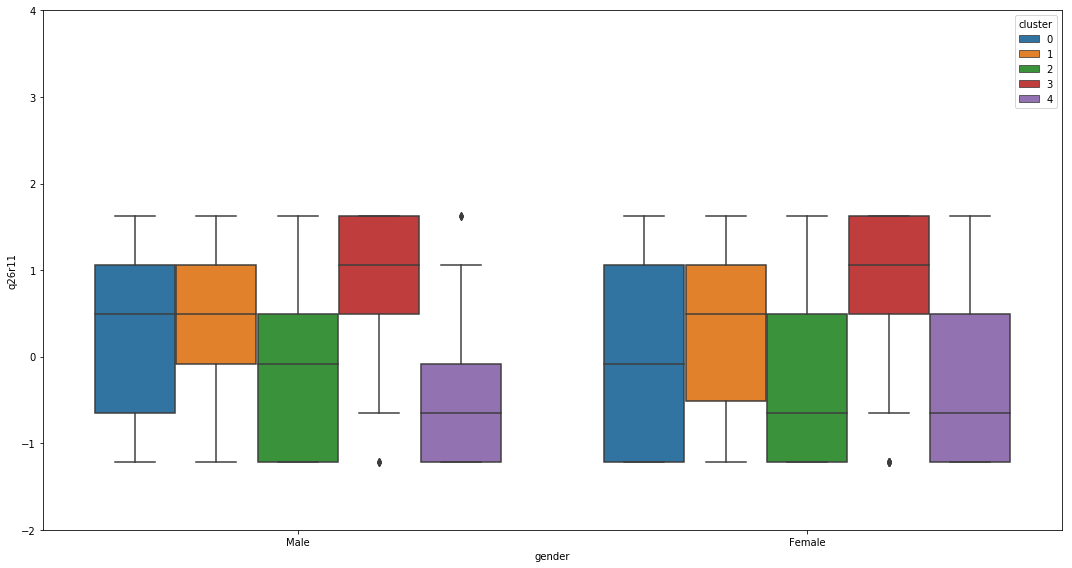

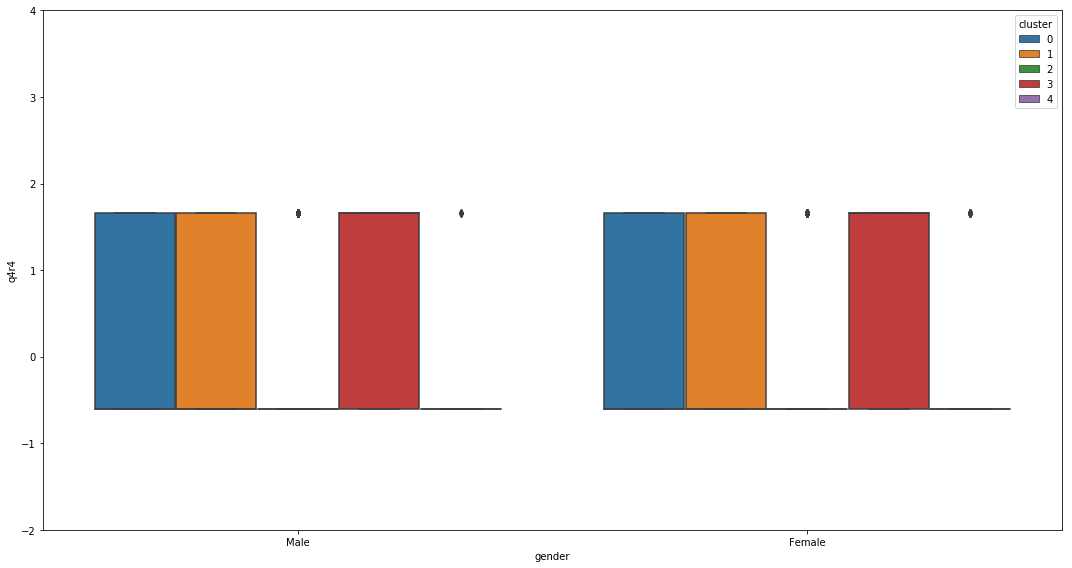

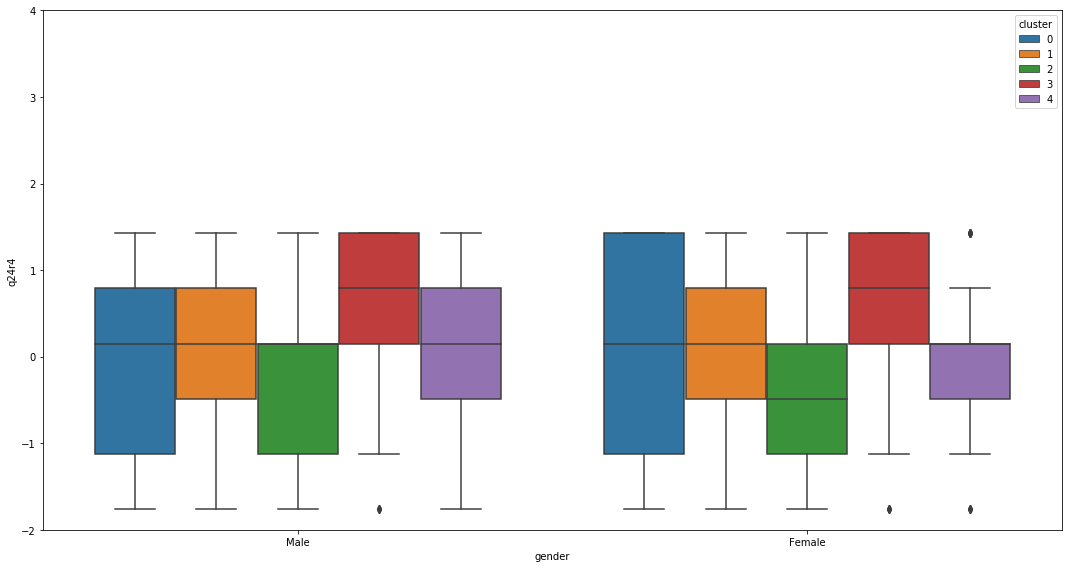

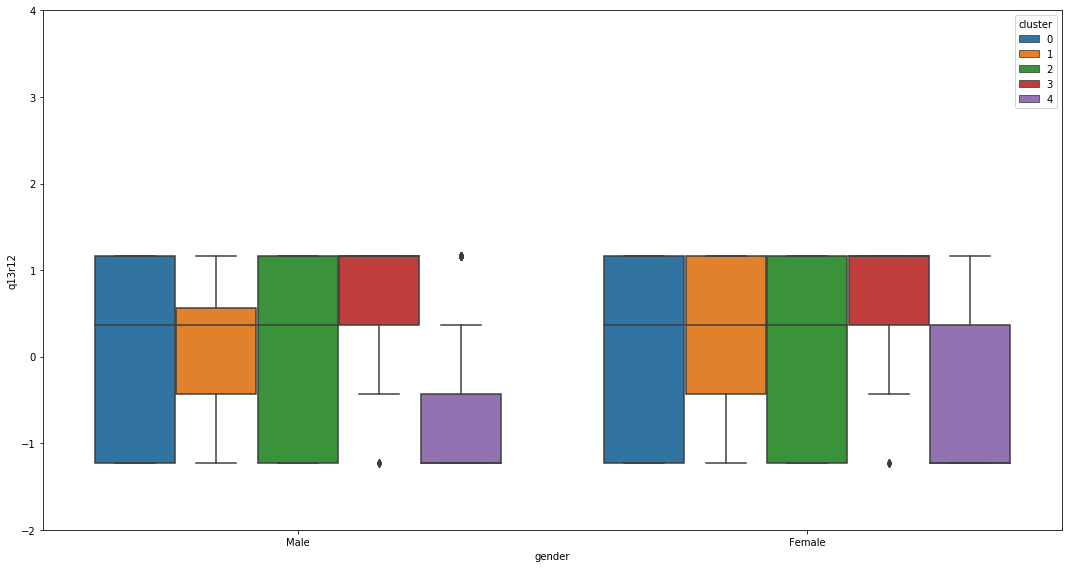

In [34]:
########################
## Cluster 1
########################

behavioral_names_1 = ['q13r3', 'q24r9', 'q13r9', 'q26r11', 'q4r4', 'q24r4', 'q13r12']

for c in category_names:
    for b in behavioral_names_1:
        fig, ax = plt.subplots(figsize = (15, 8))
        sns.boxplot(x = c,
                    y = b,
                    hue = 'cluster',
                    data = final_clusters_df)

        plt.ylim(-2, 4)
        plt.tight_layout()
        plt.show()

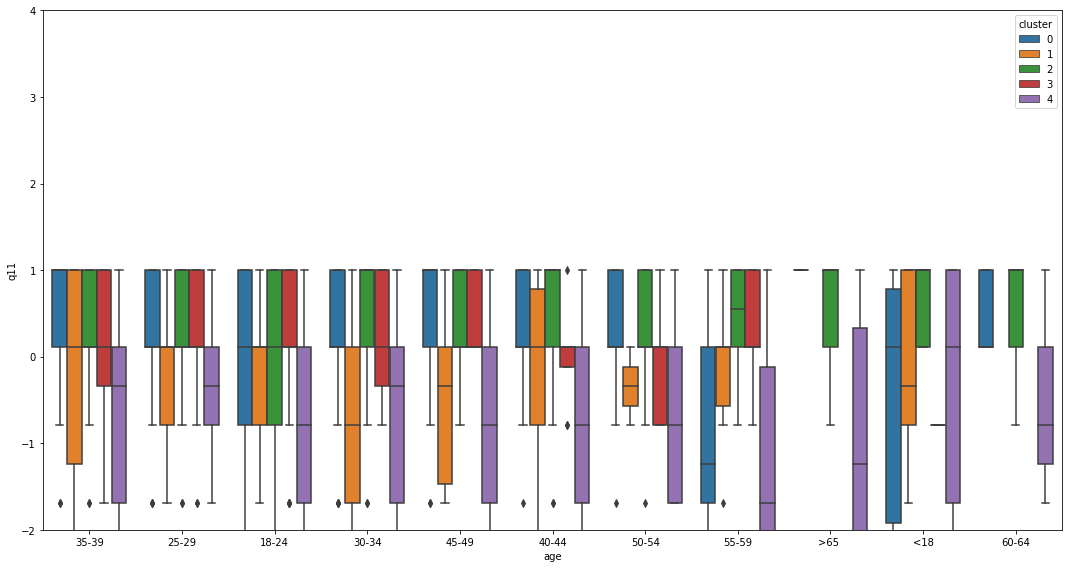

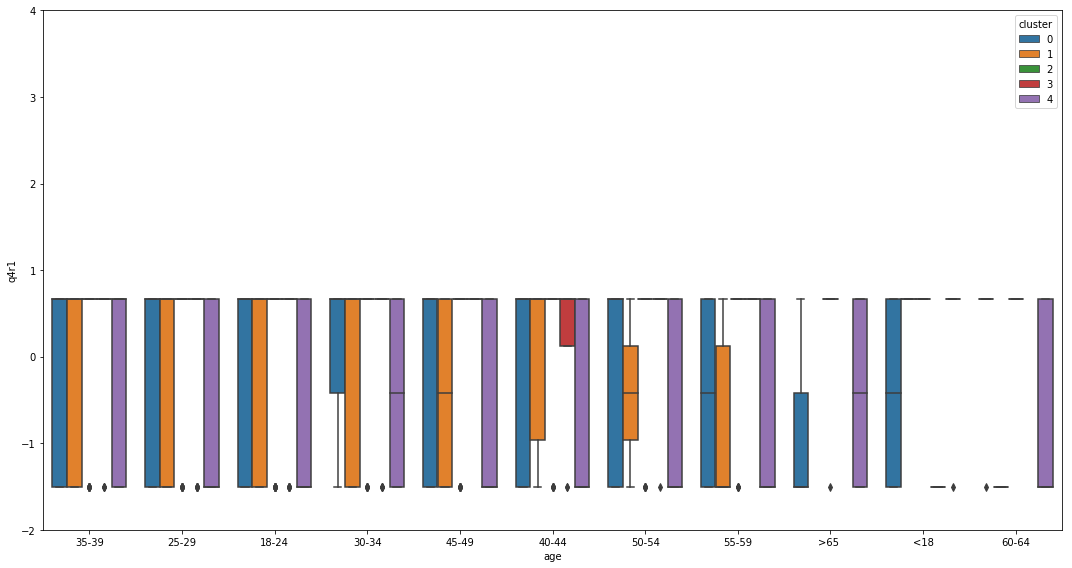

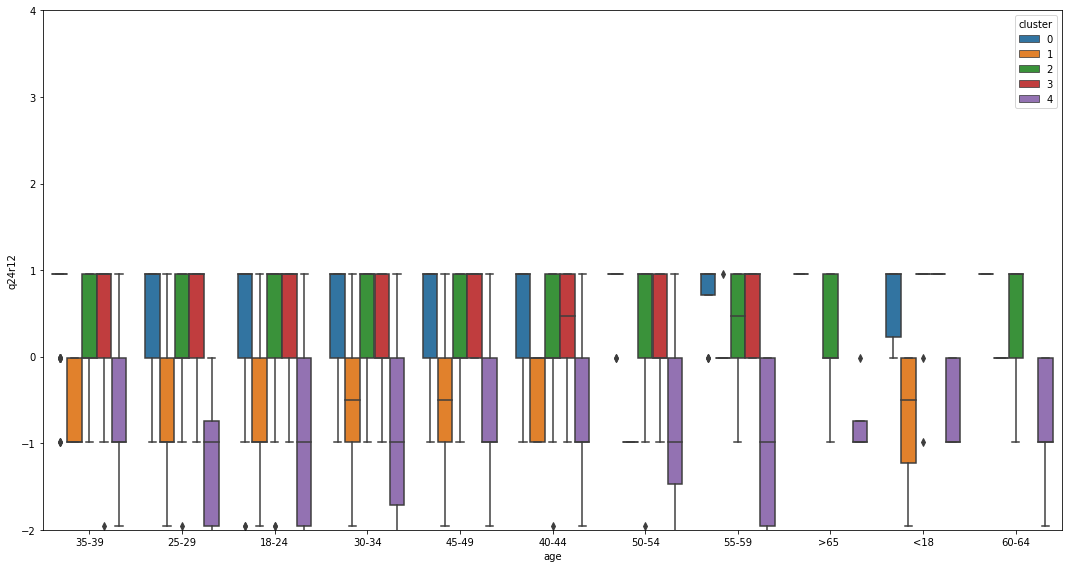

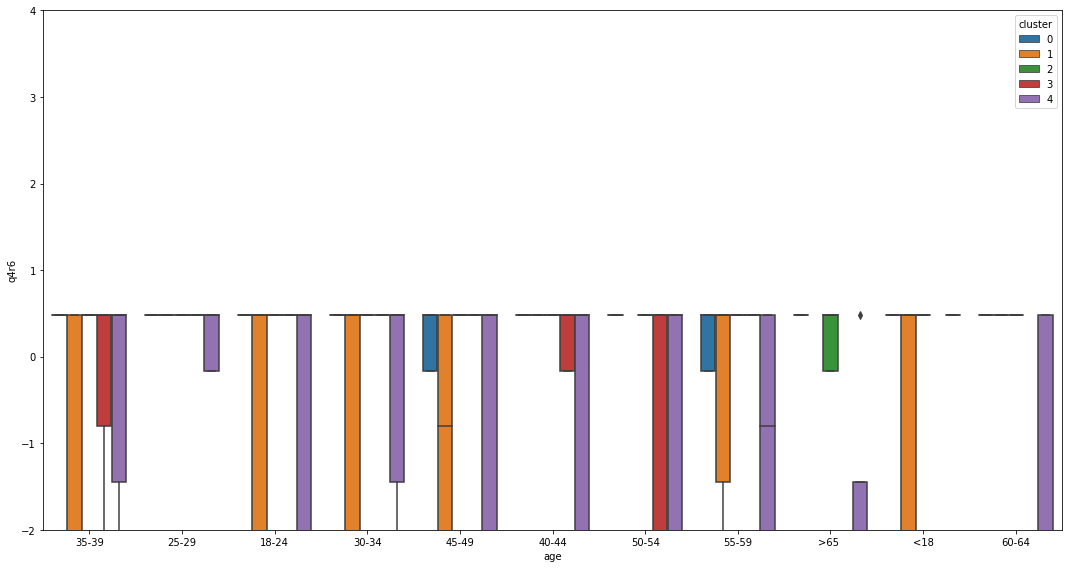

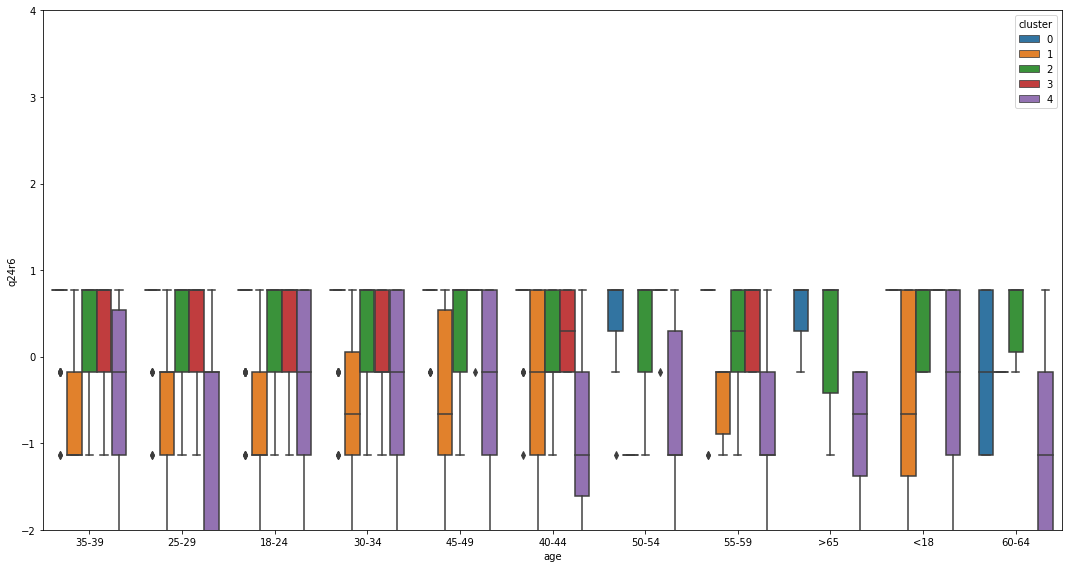

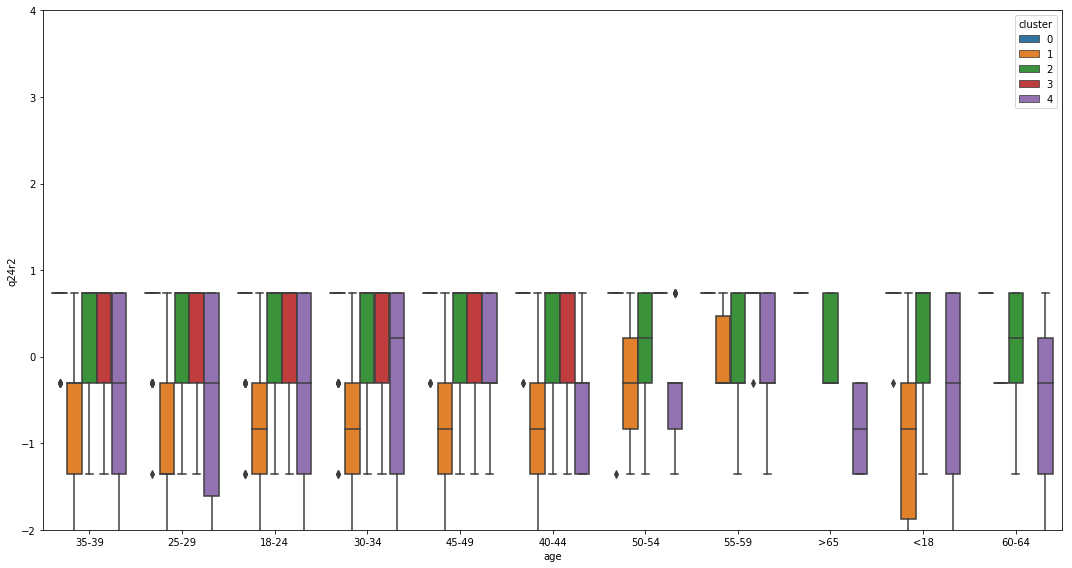

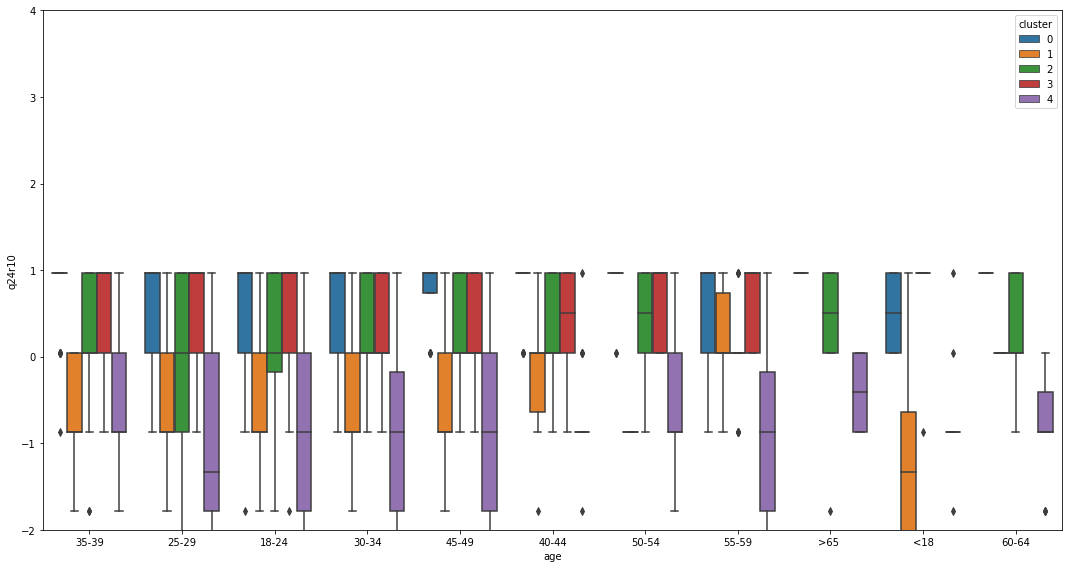

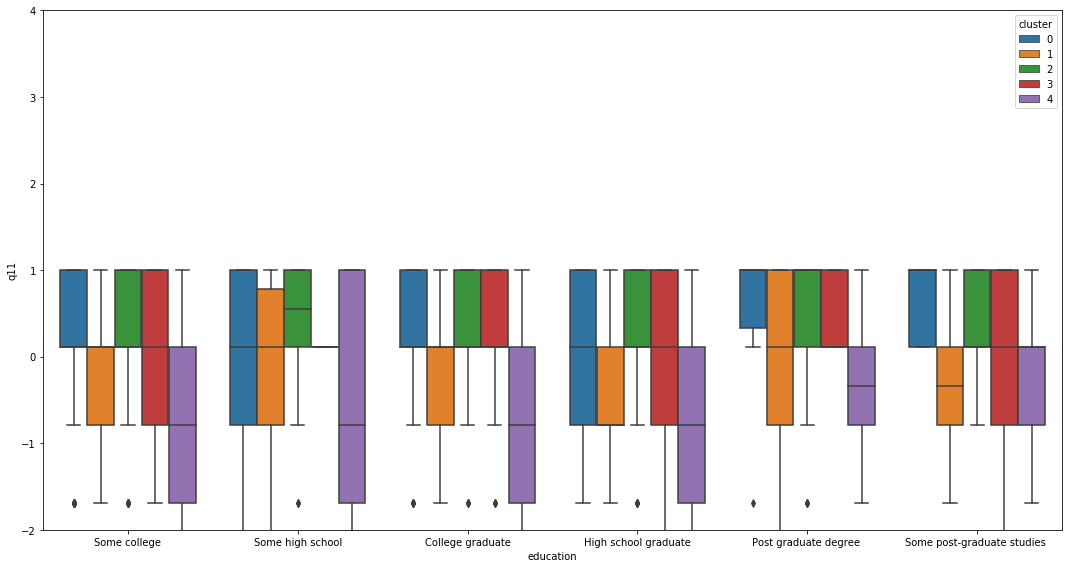

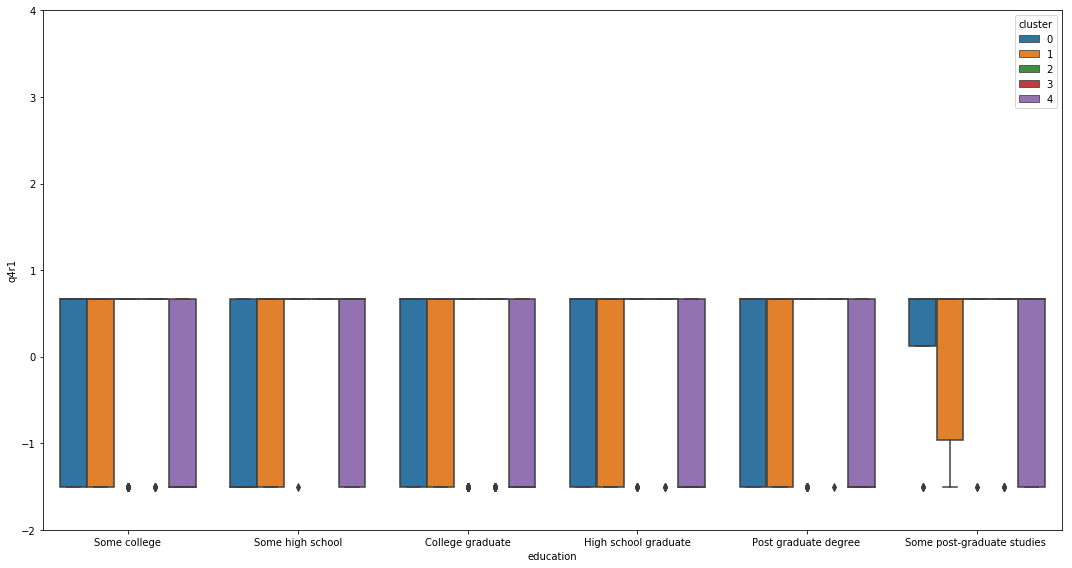

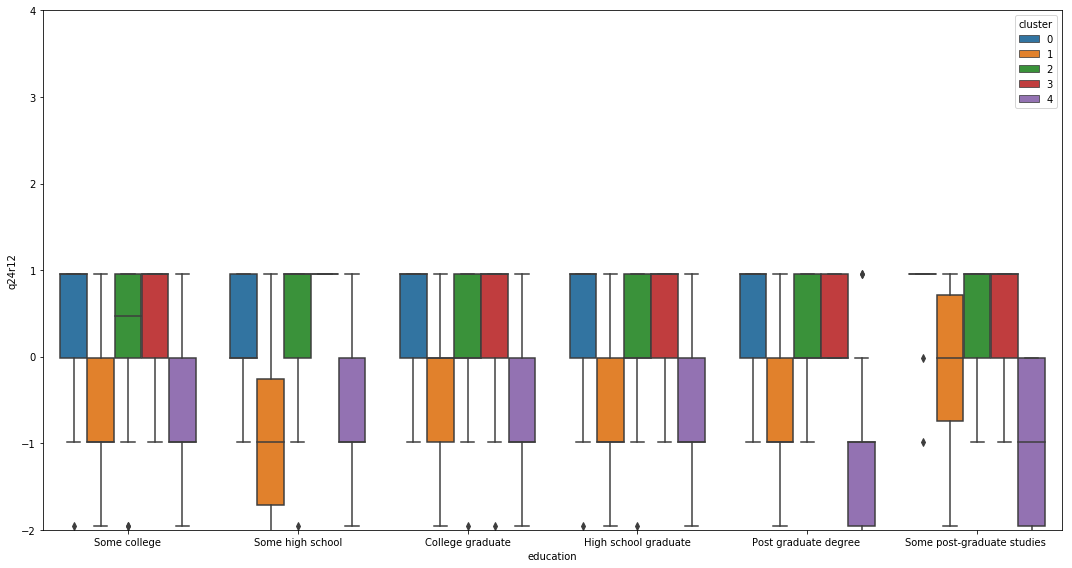

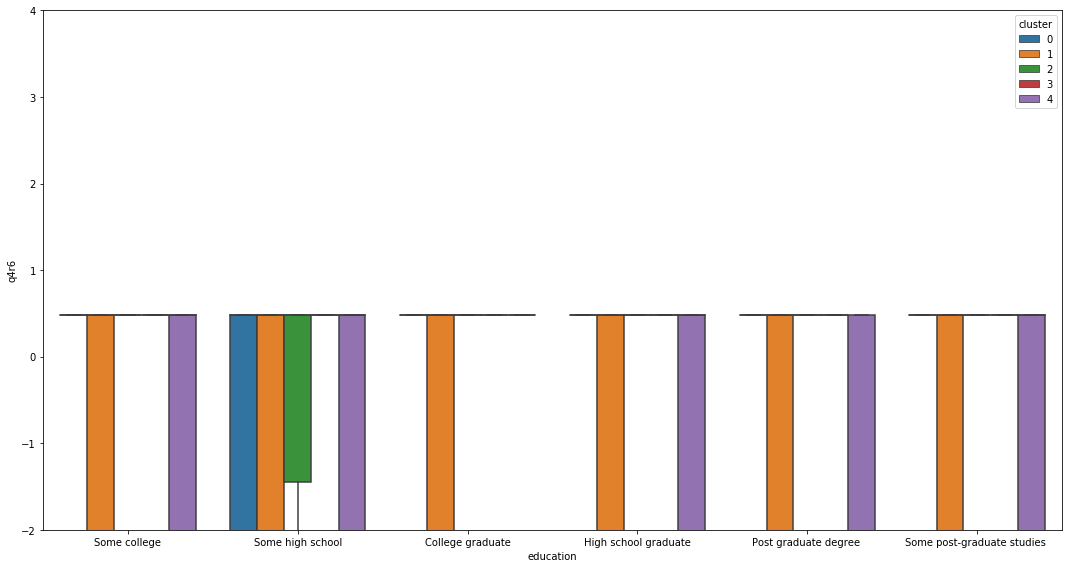

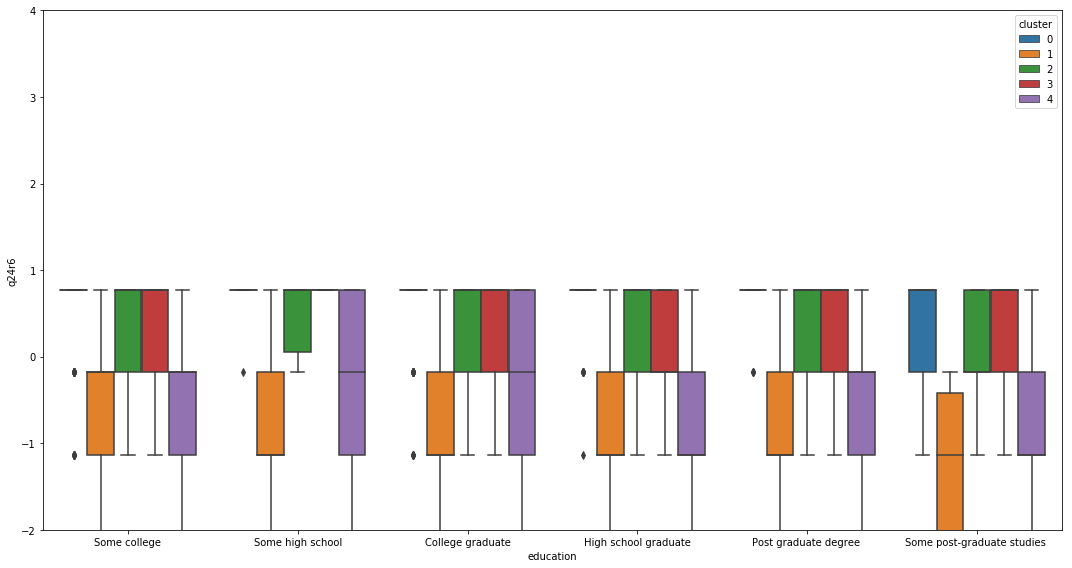

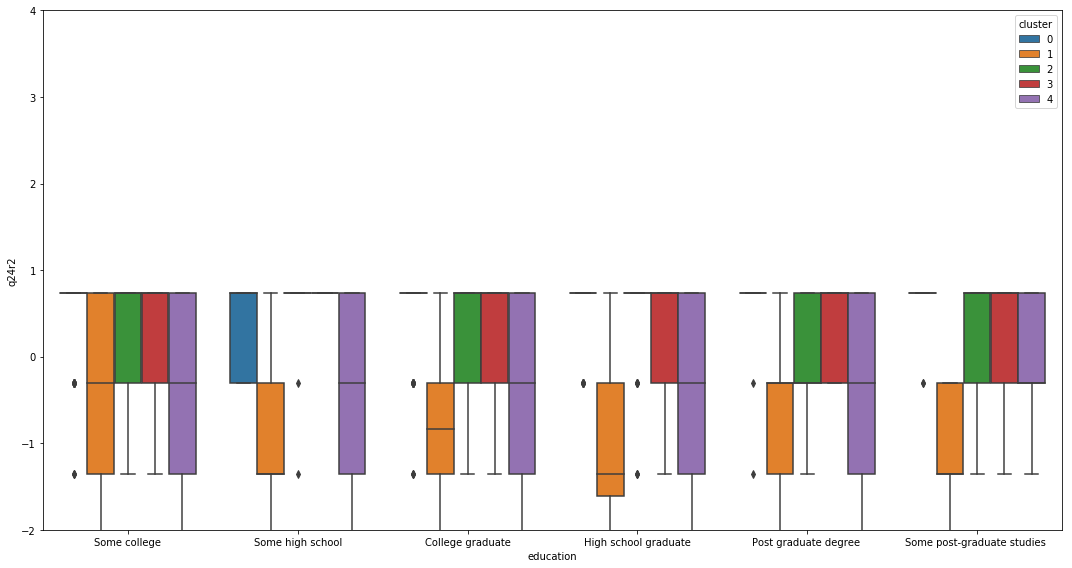

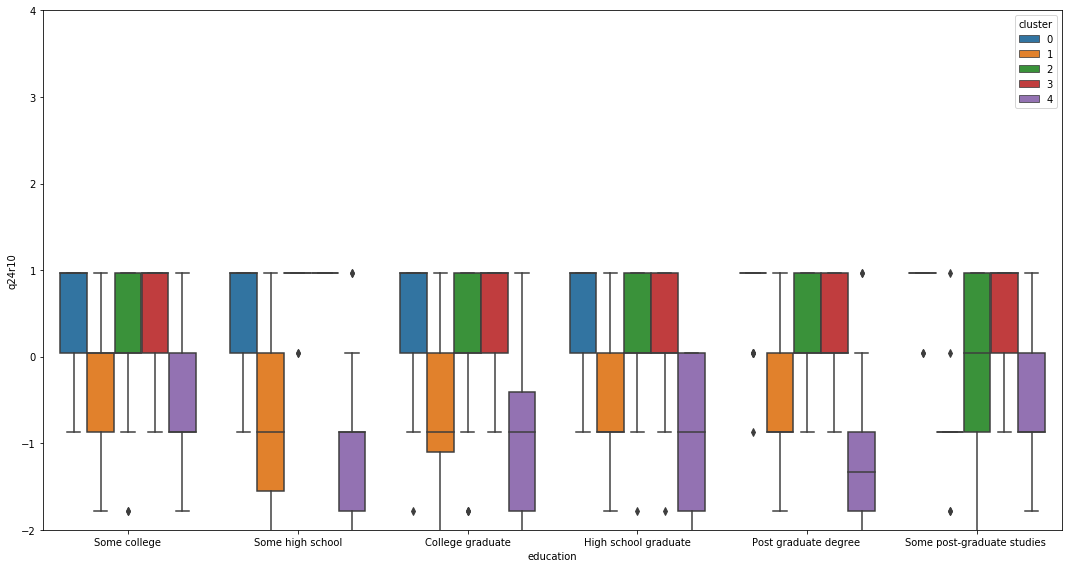

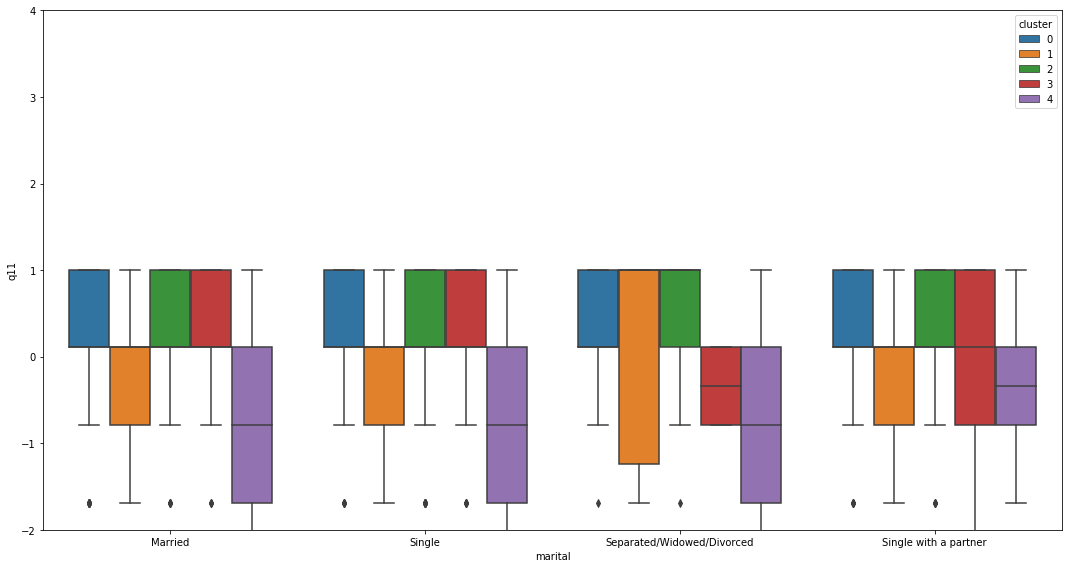

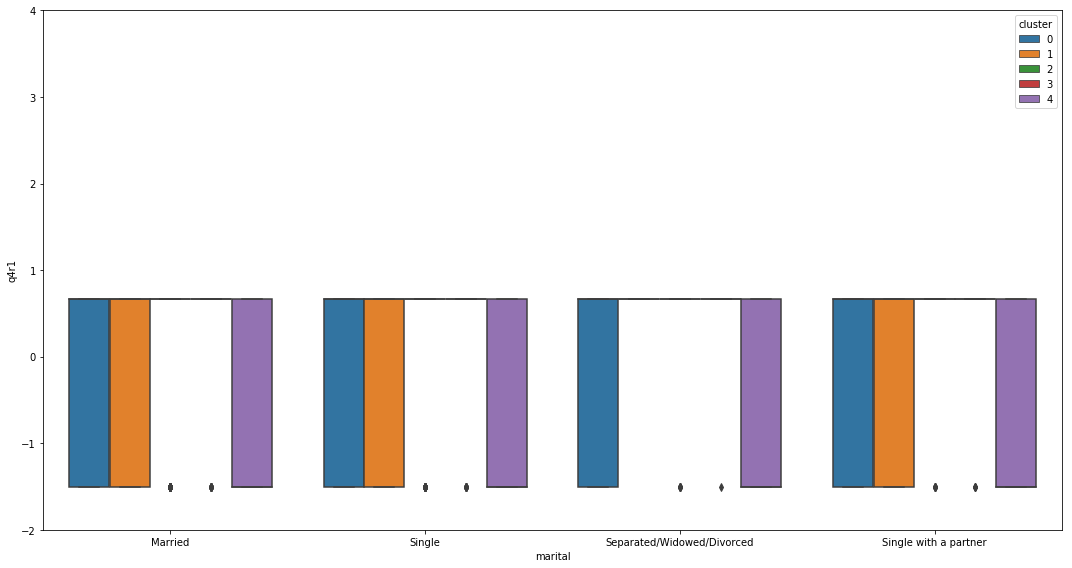

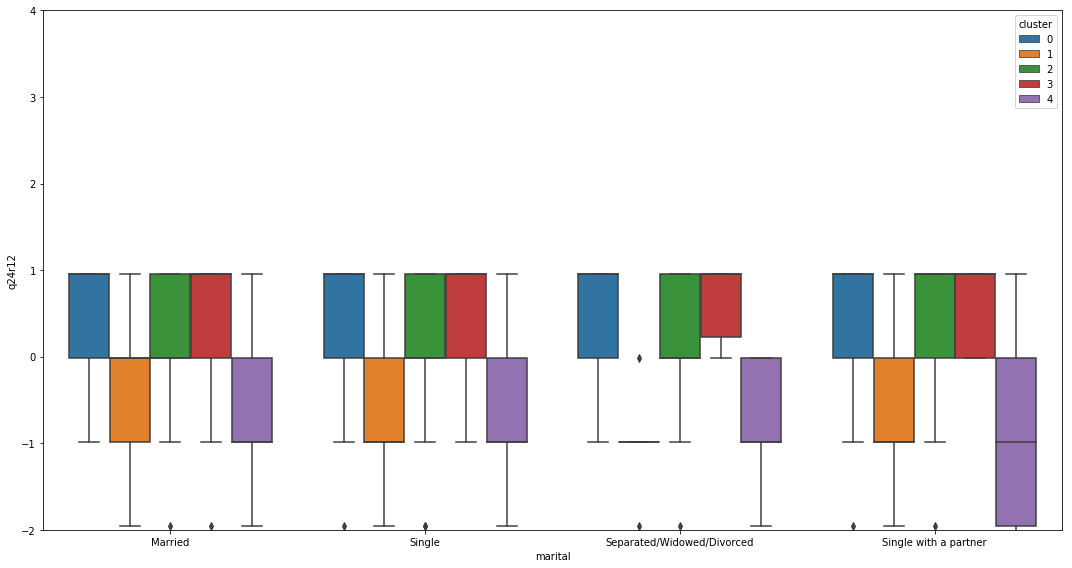

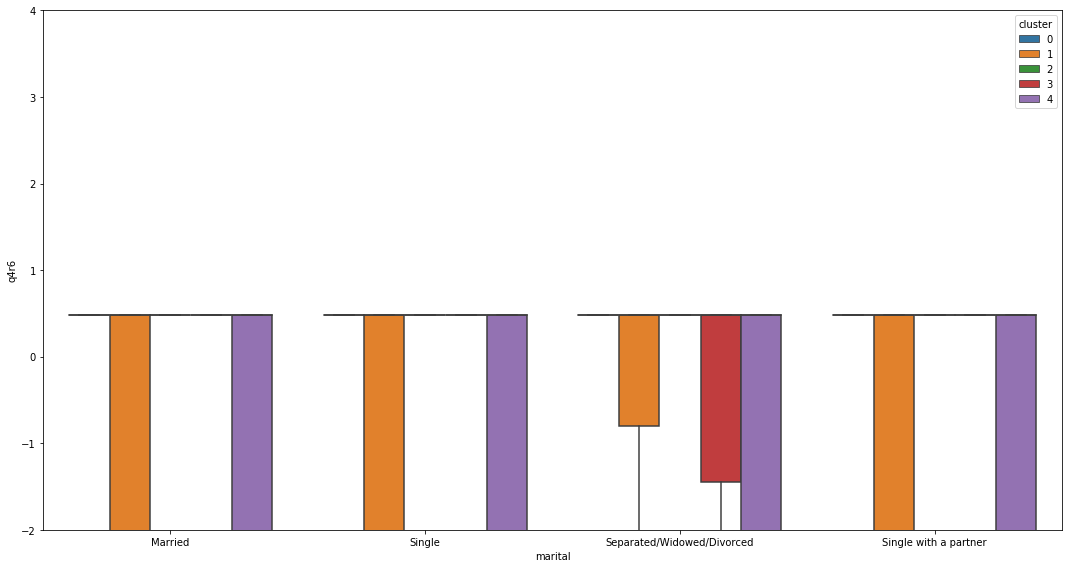

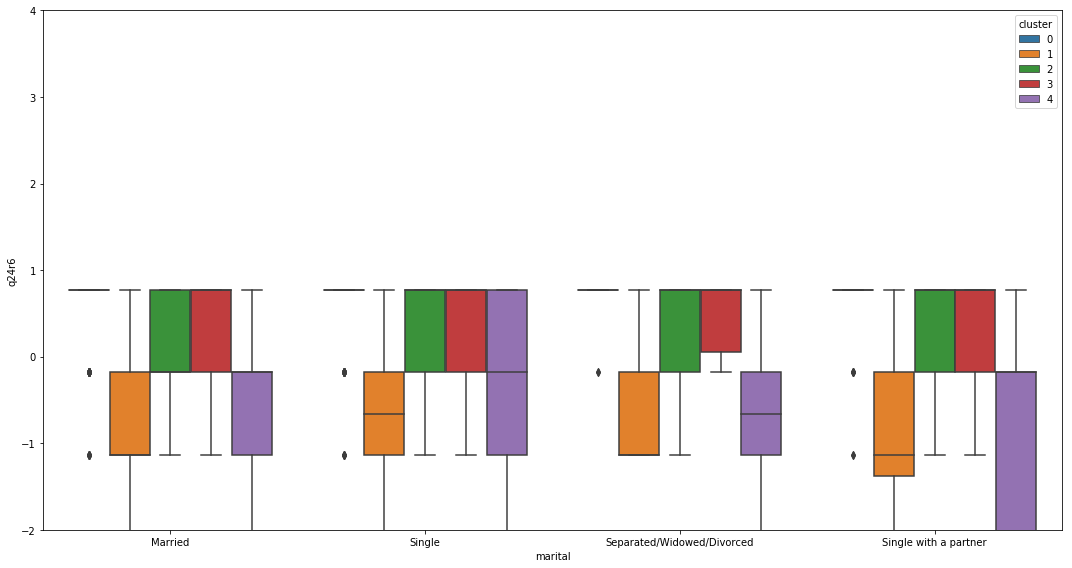

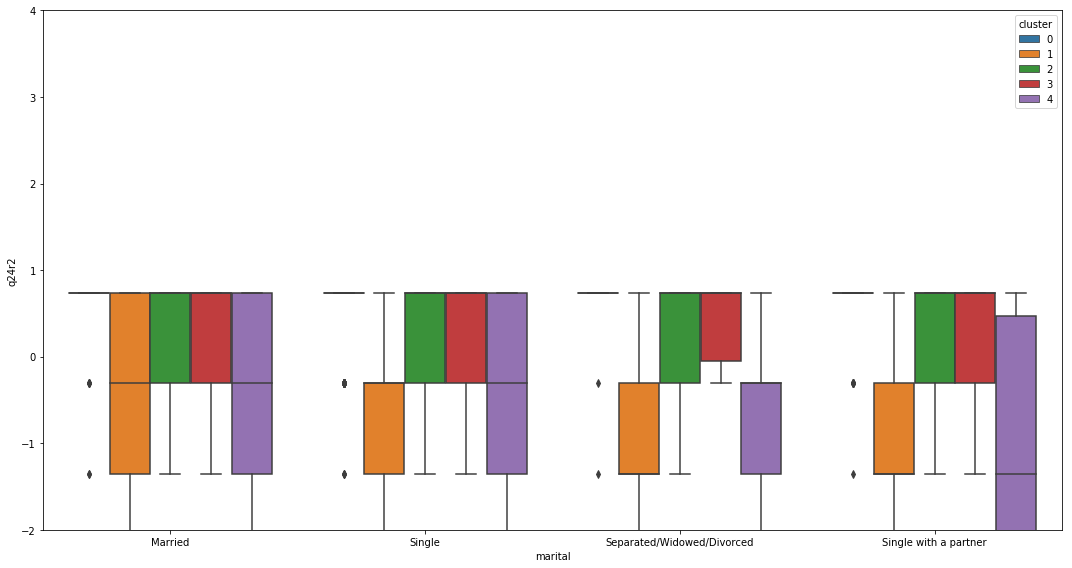

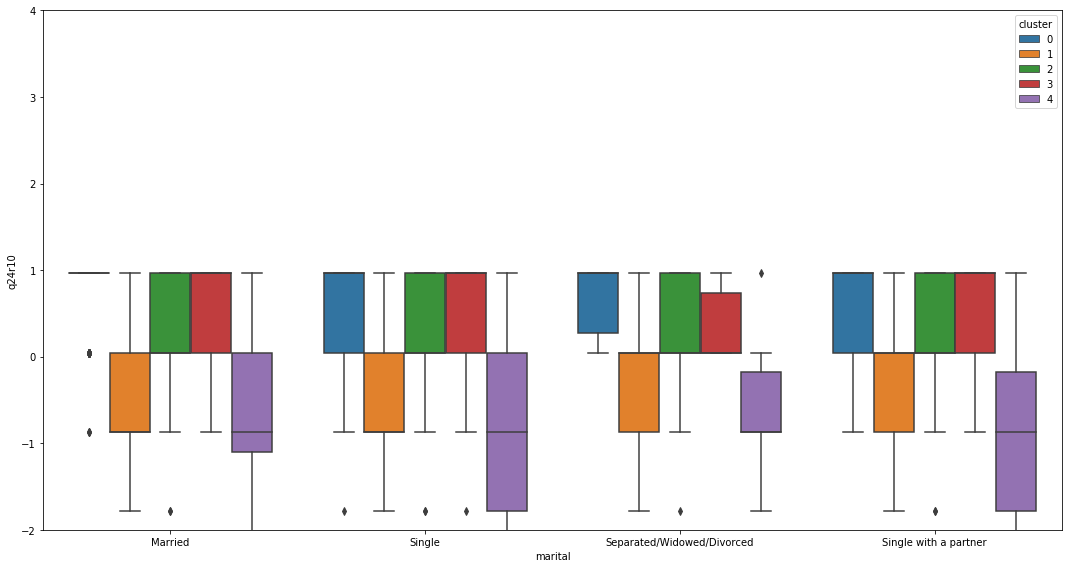

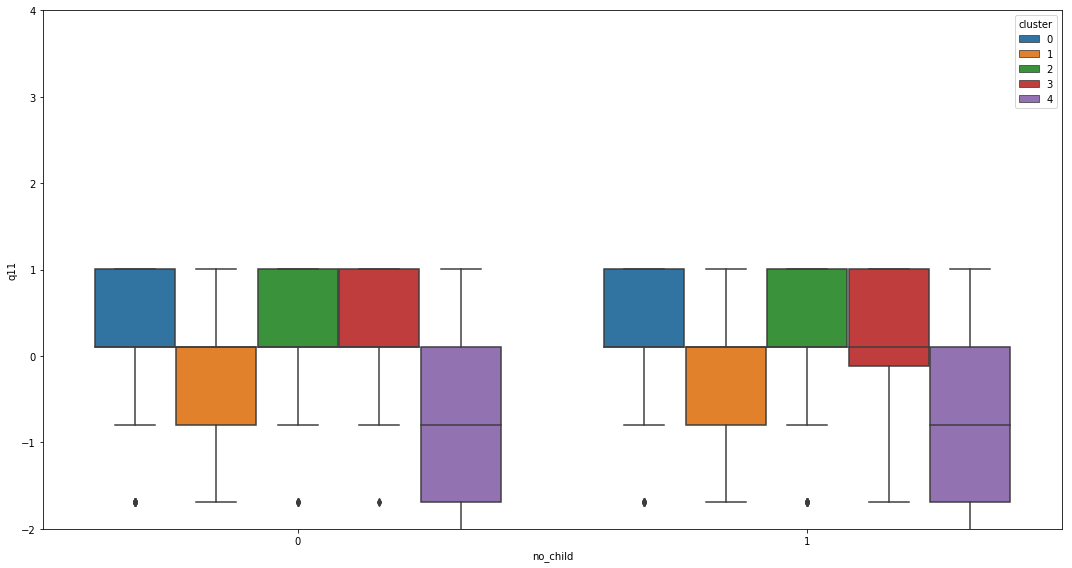

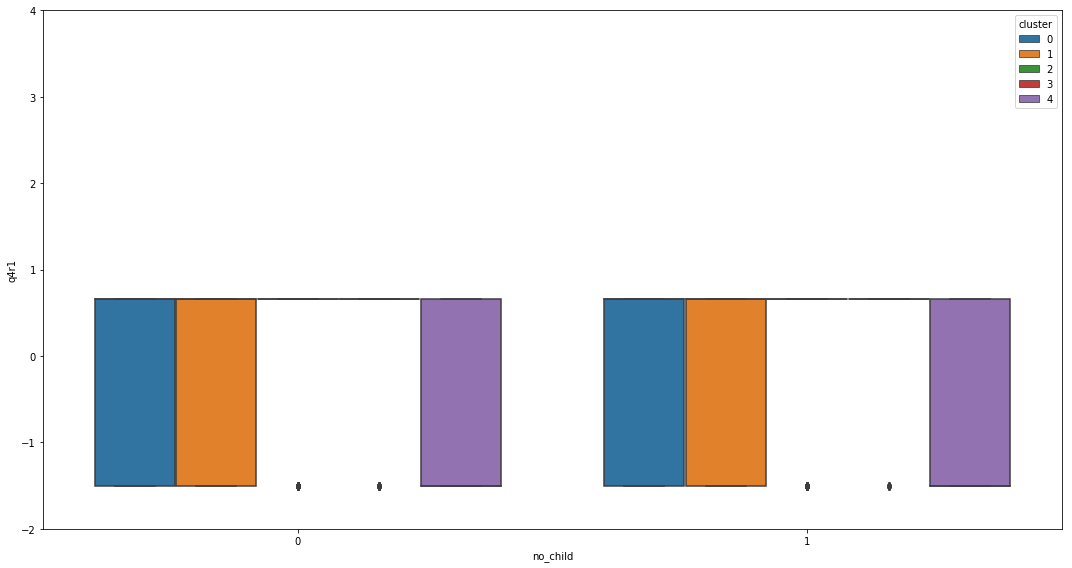

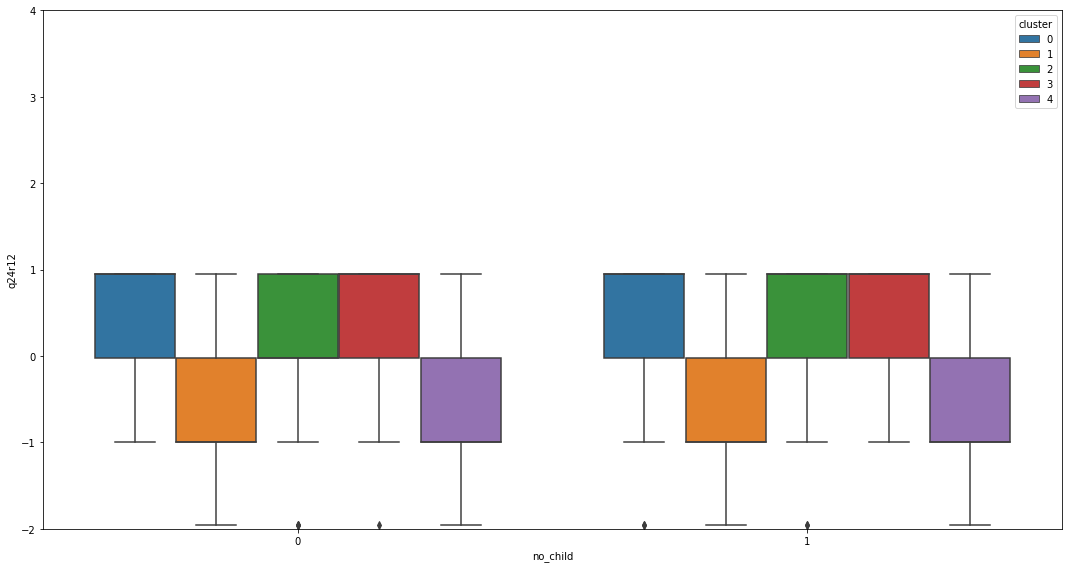

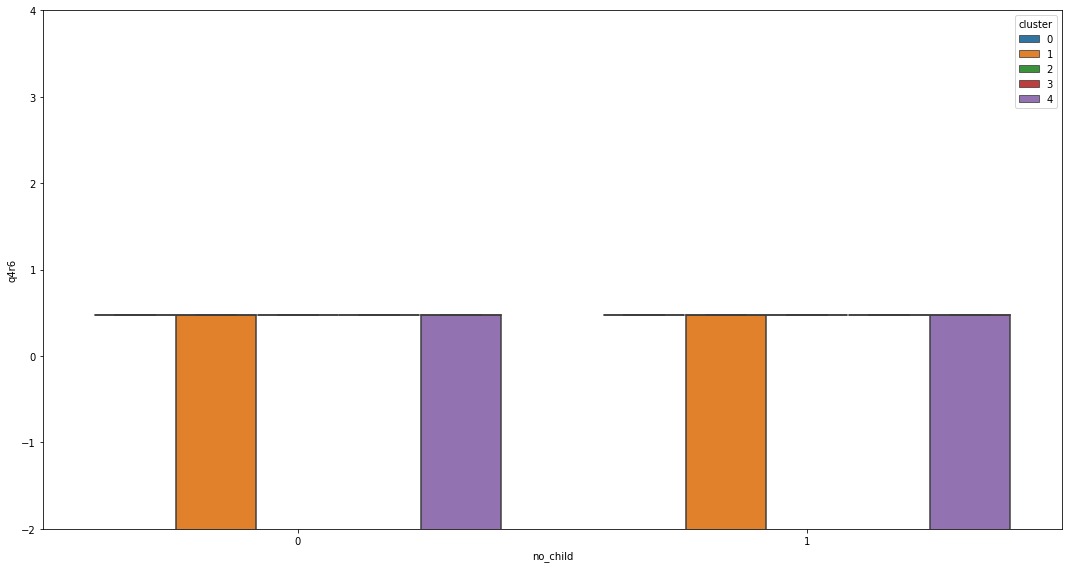

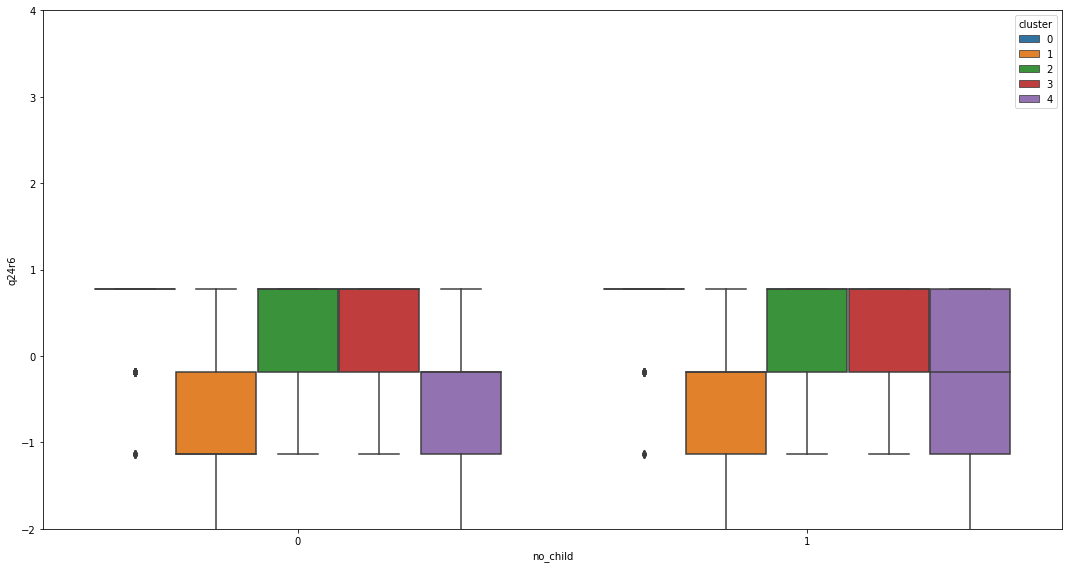

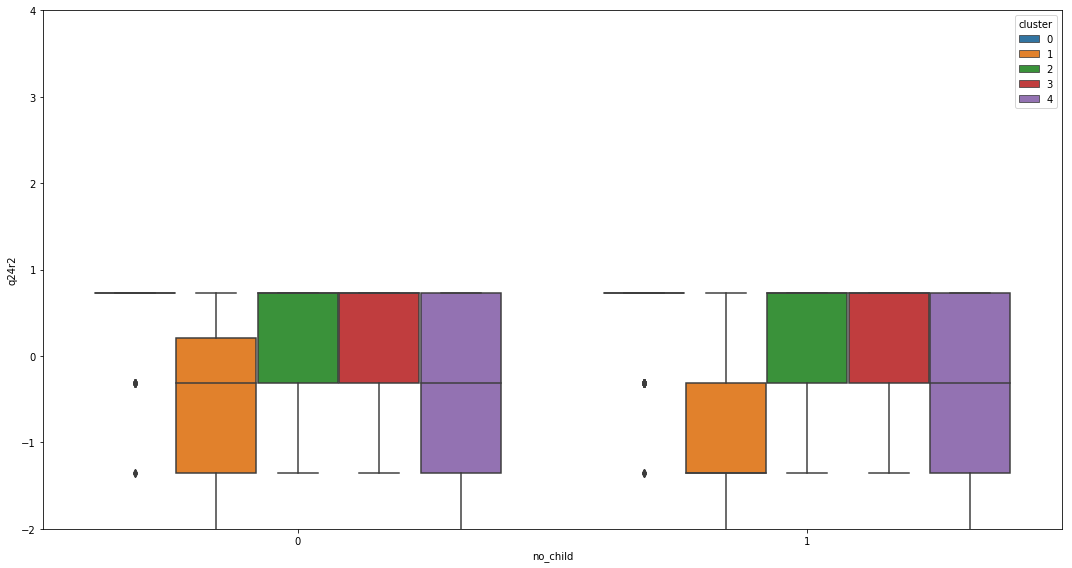

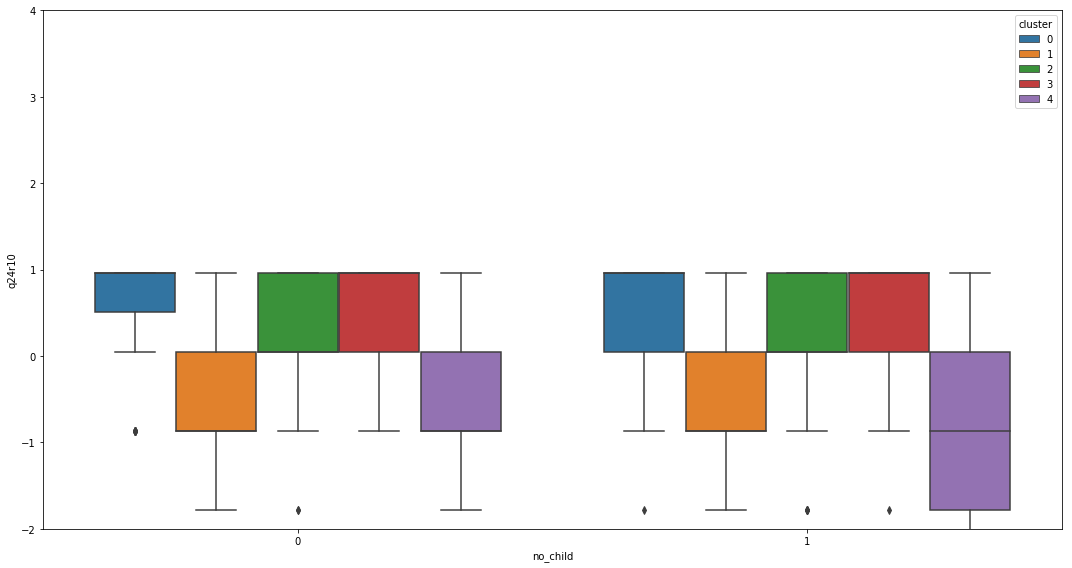

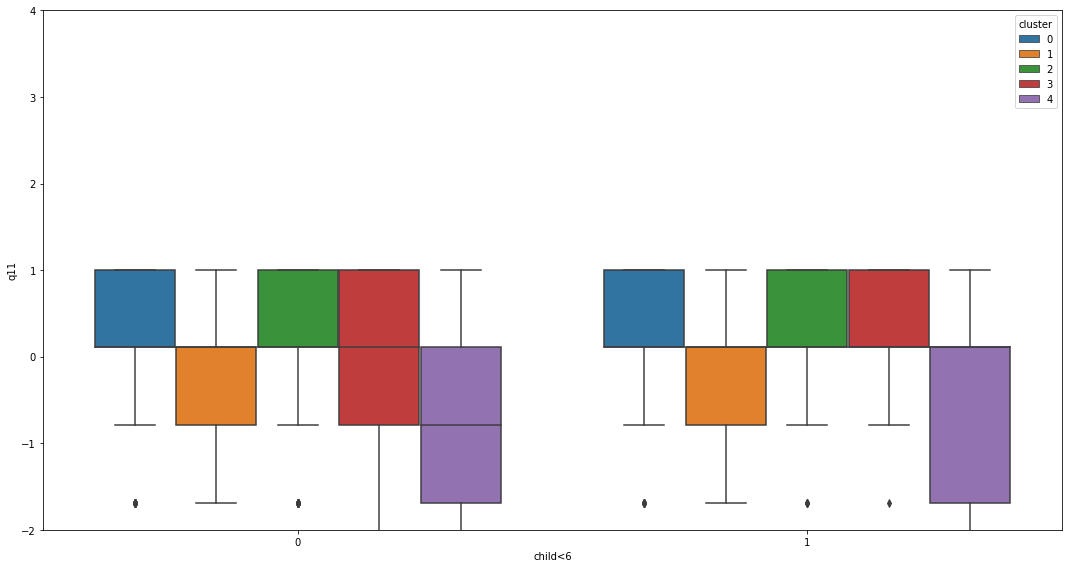

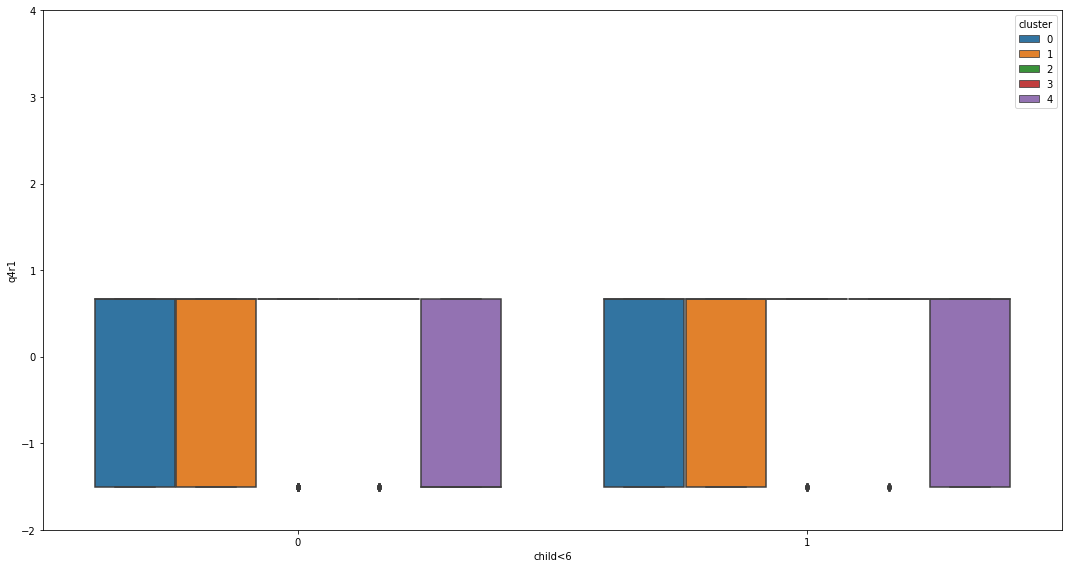

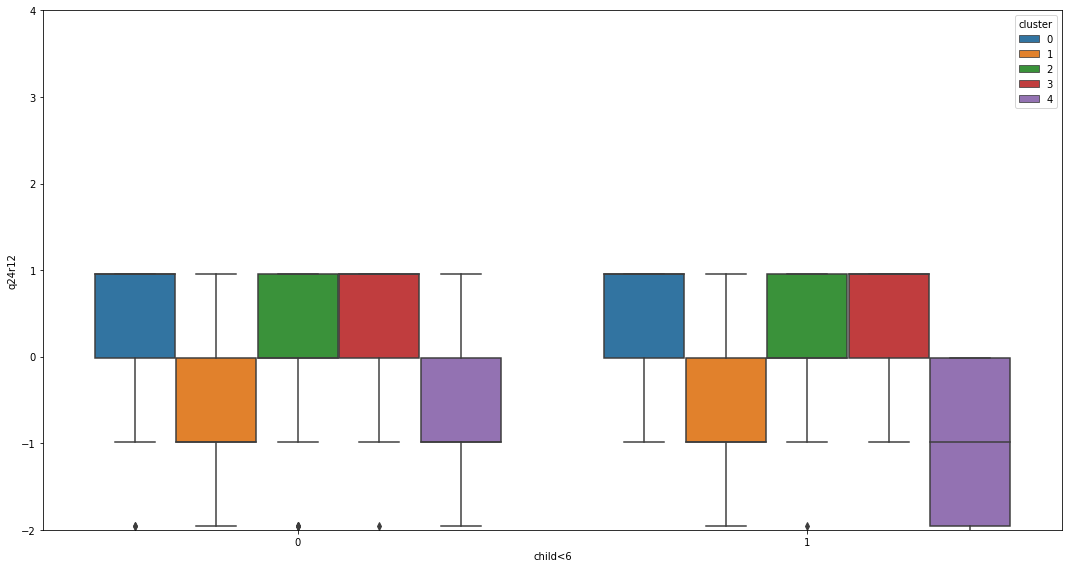

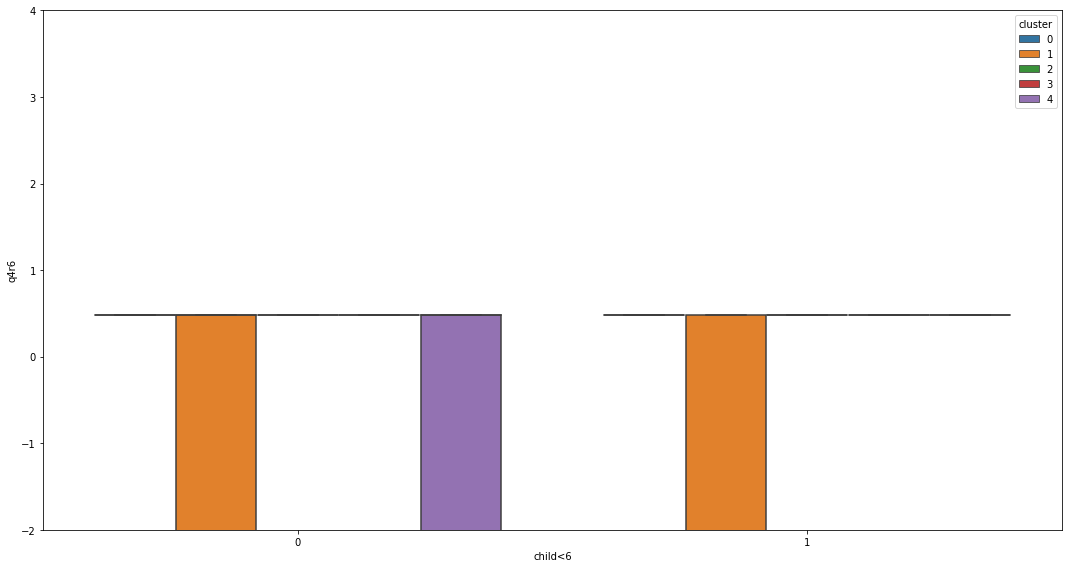

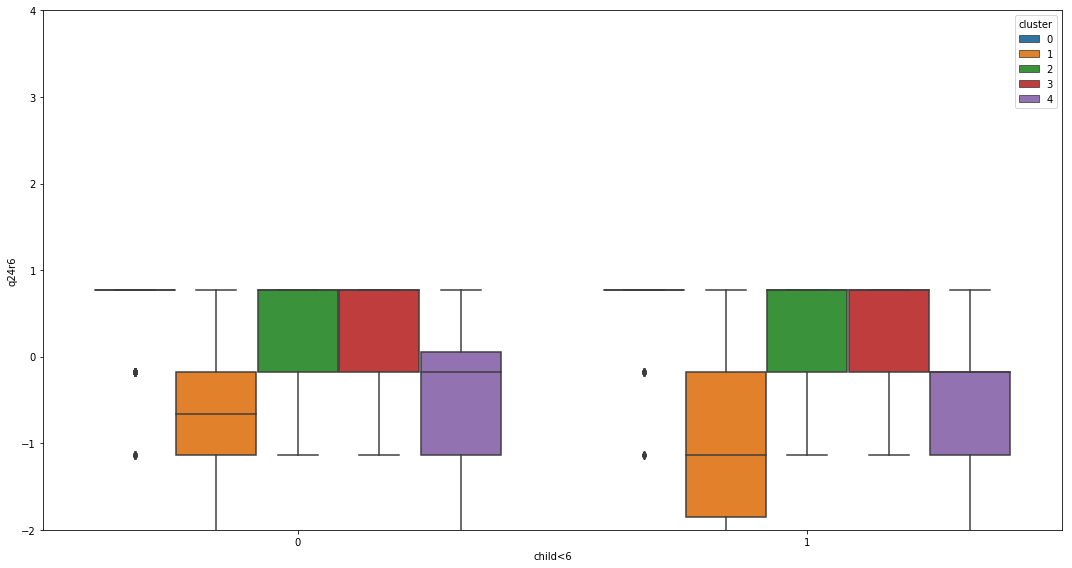

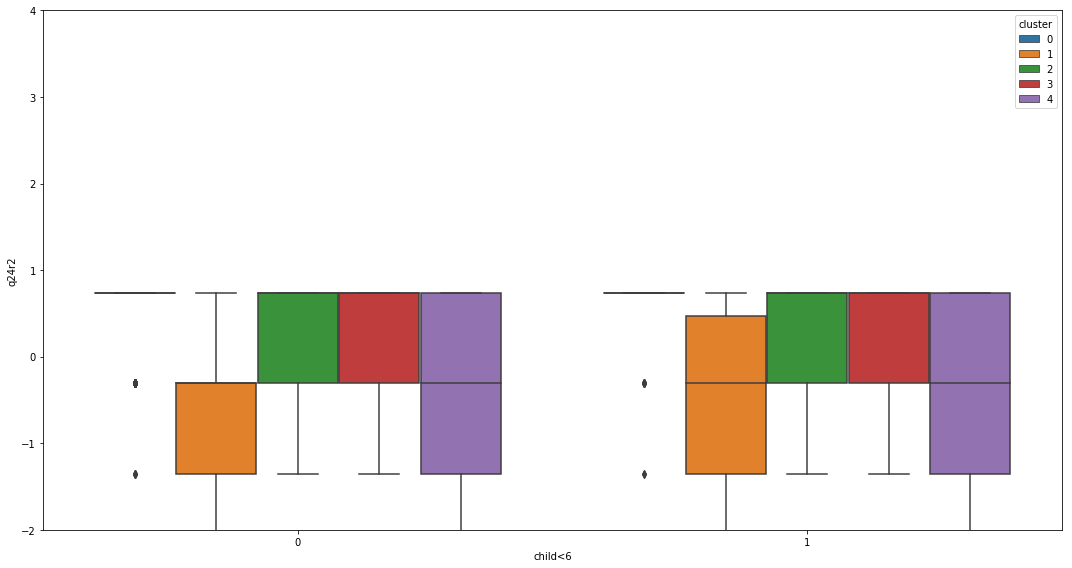

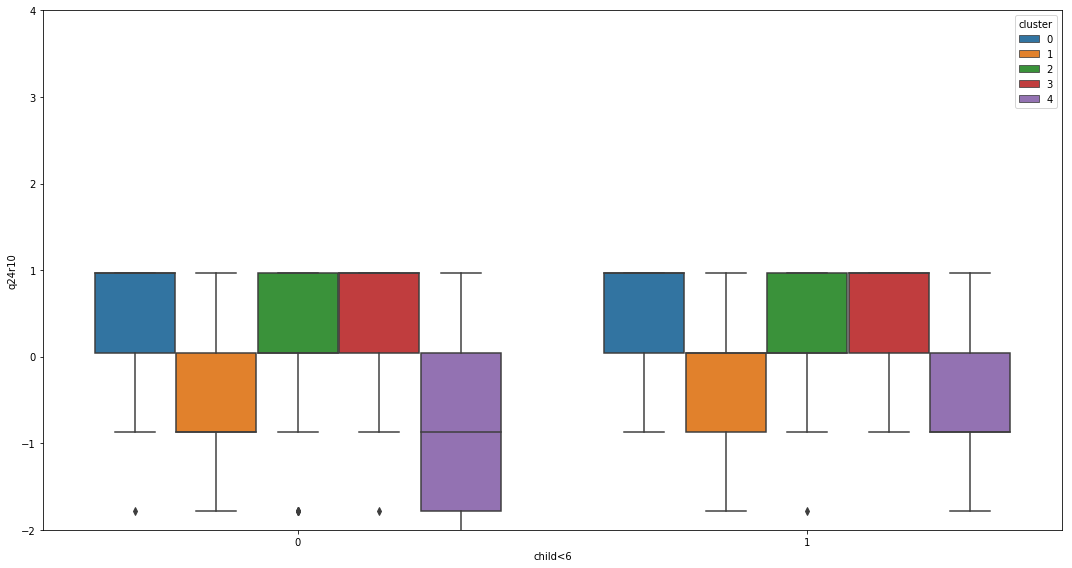

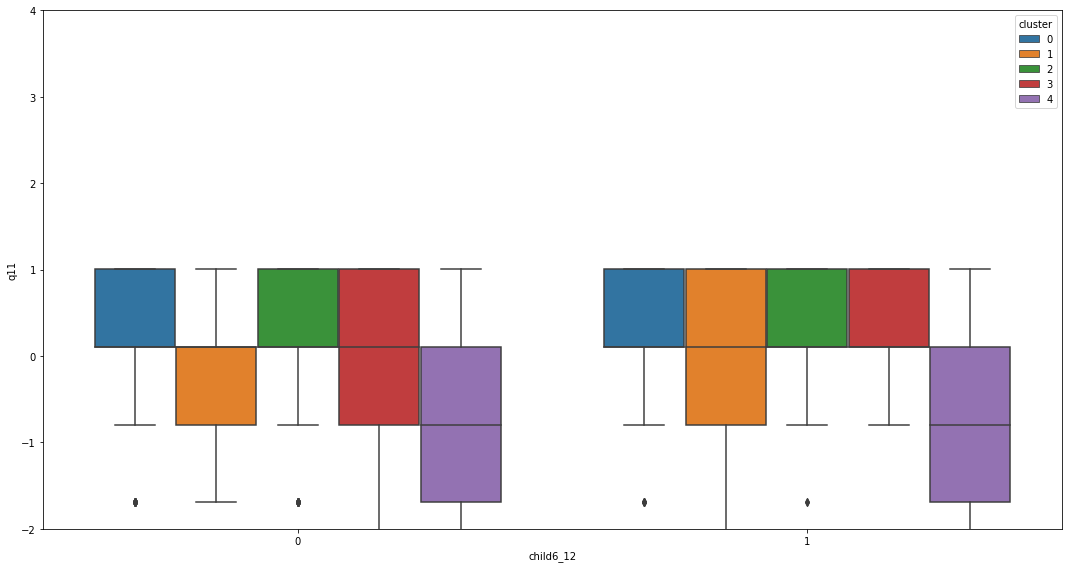

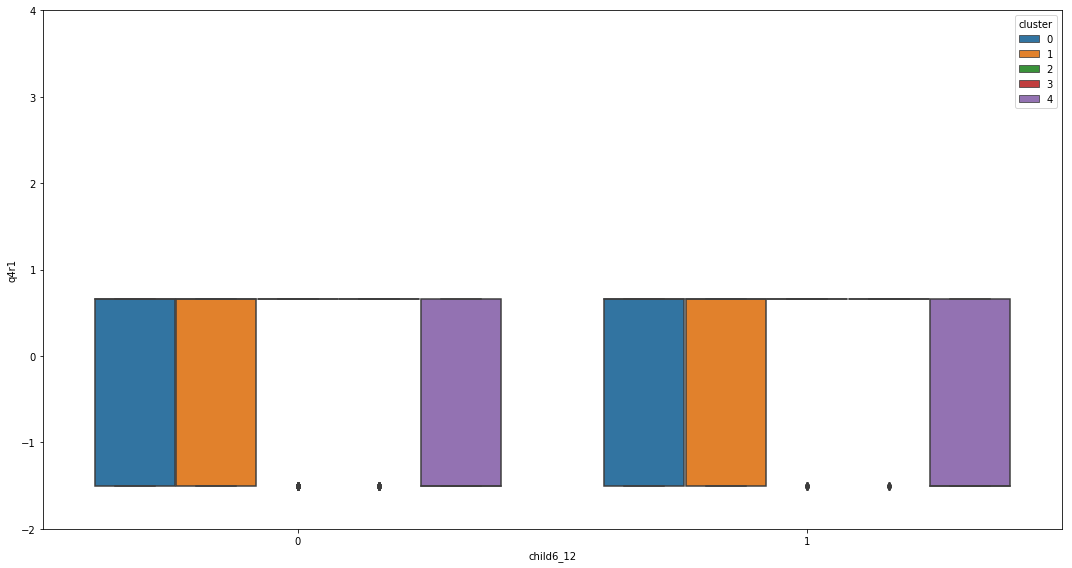

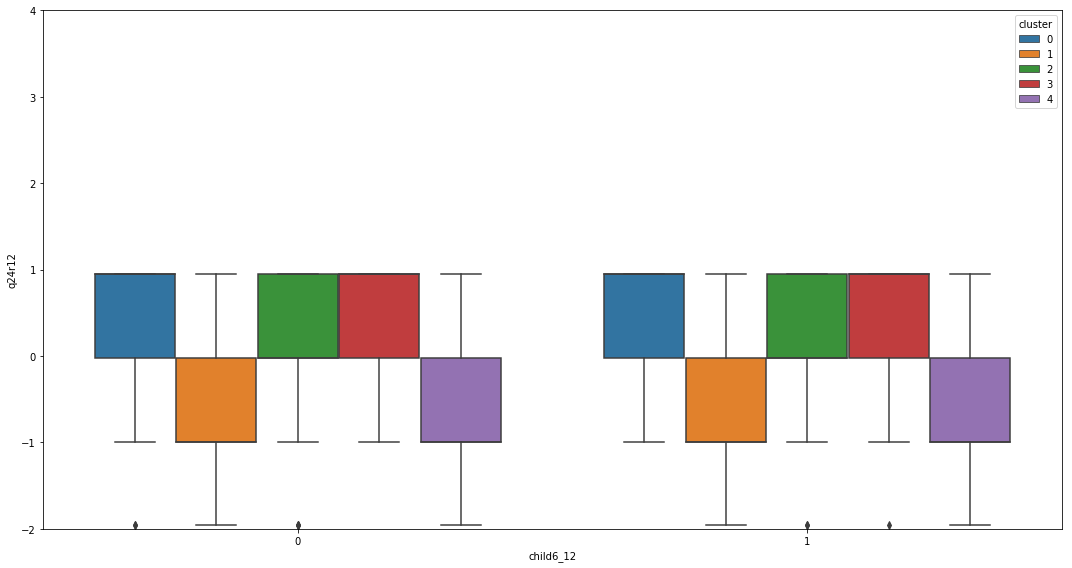

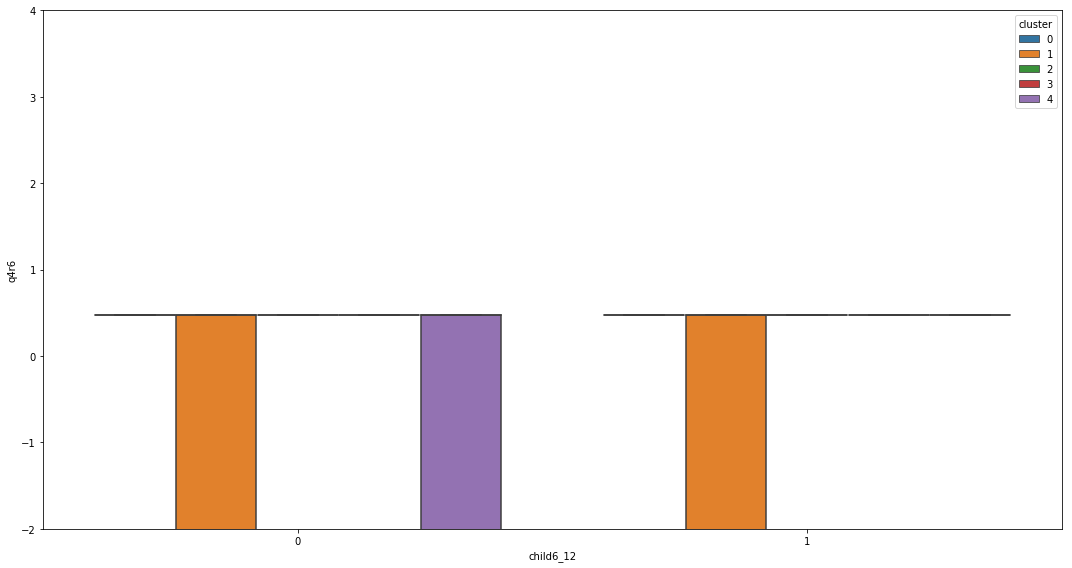

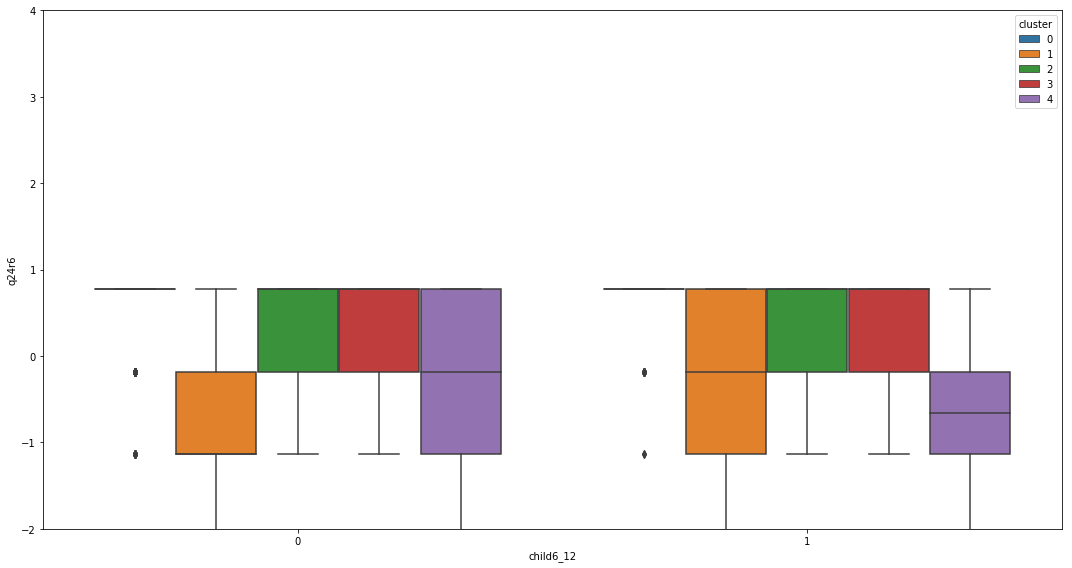

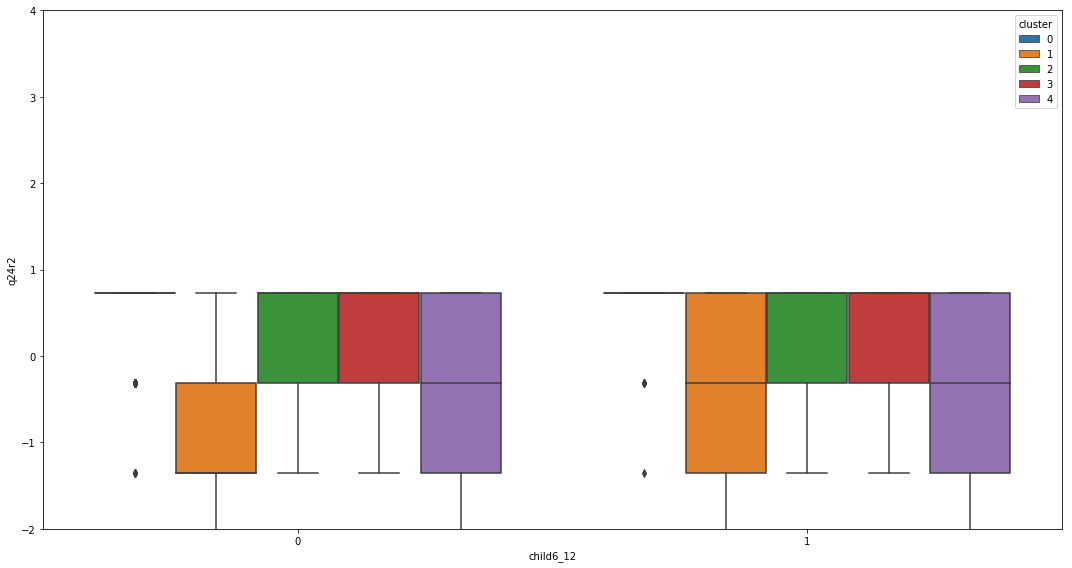

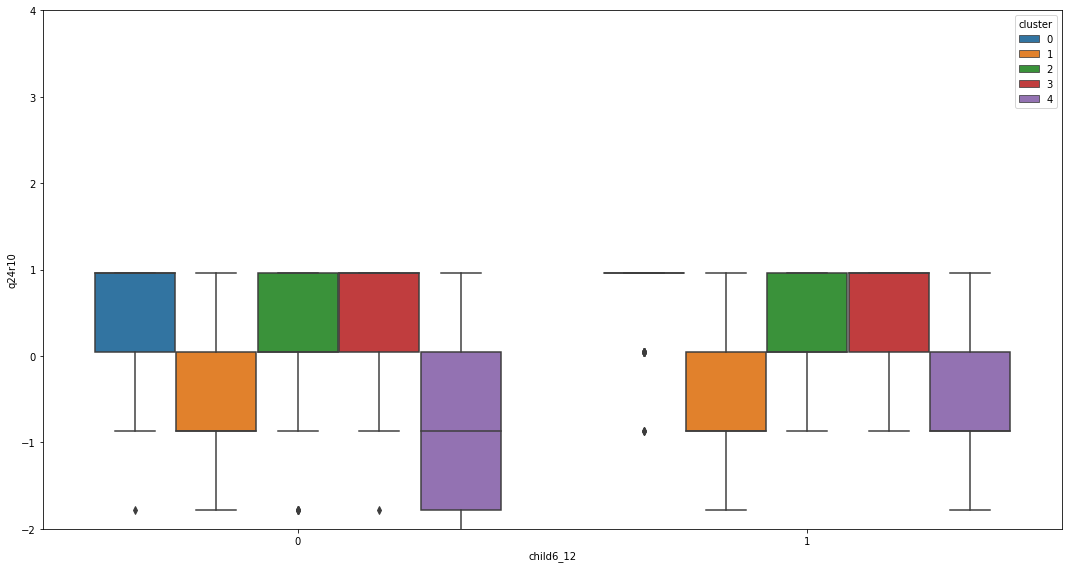

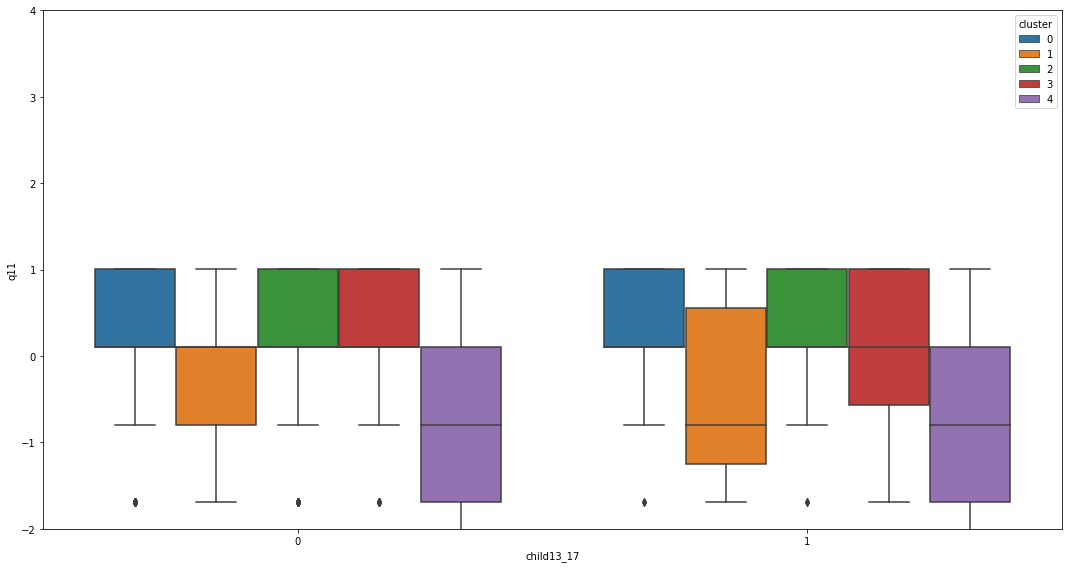

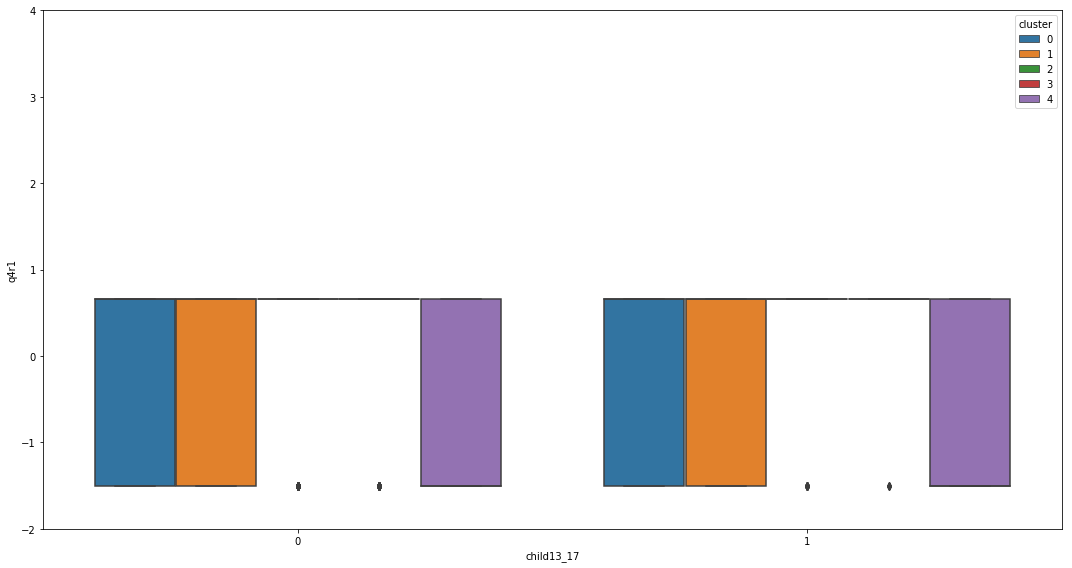

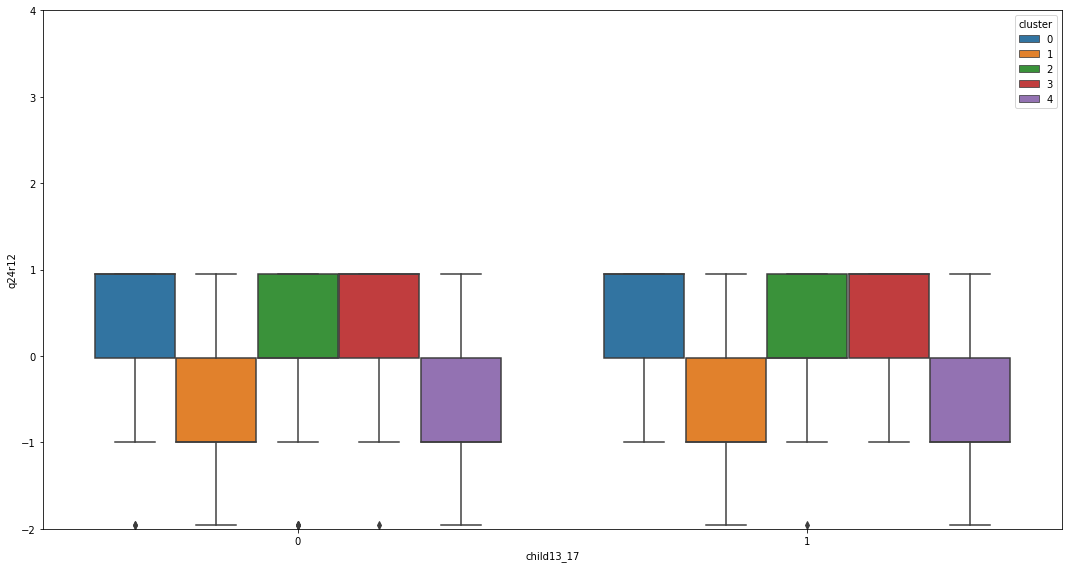

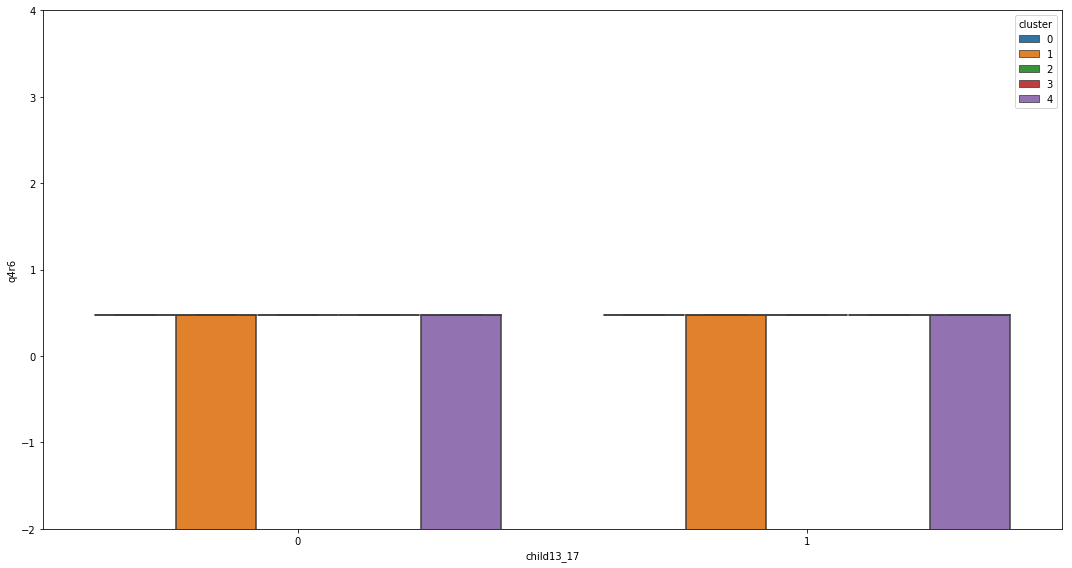

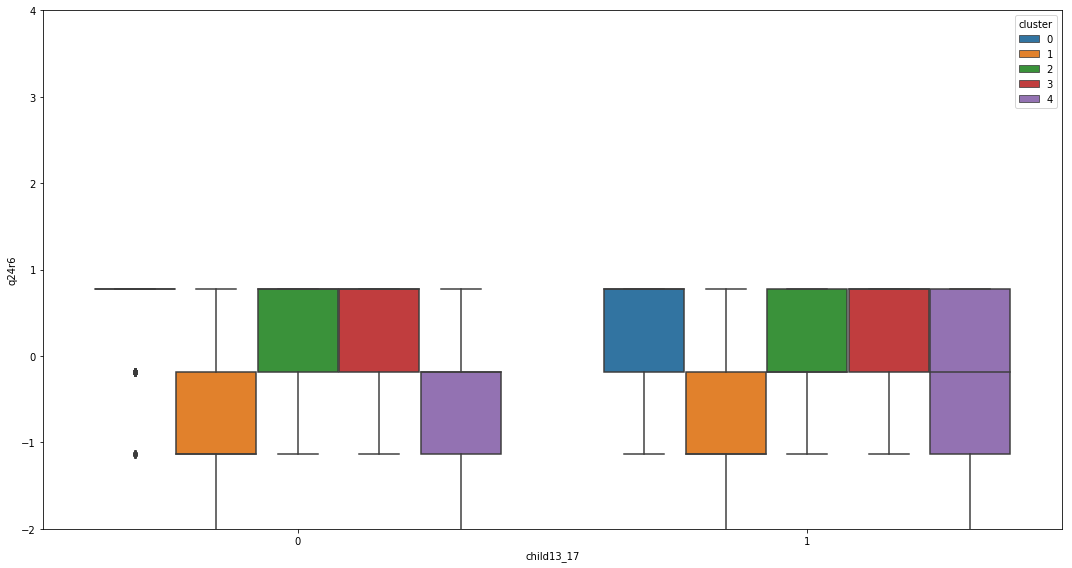

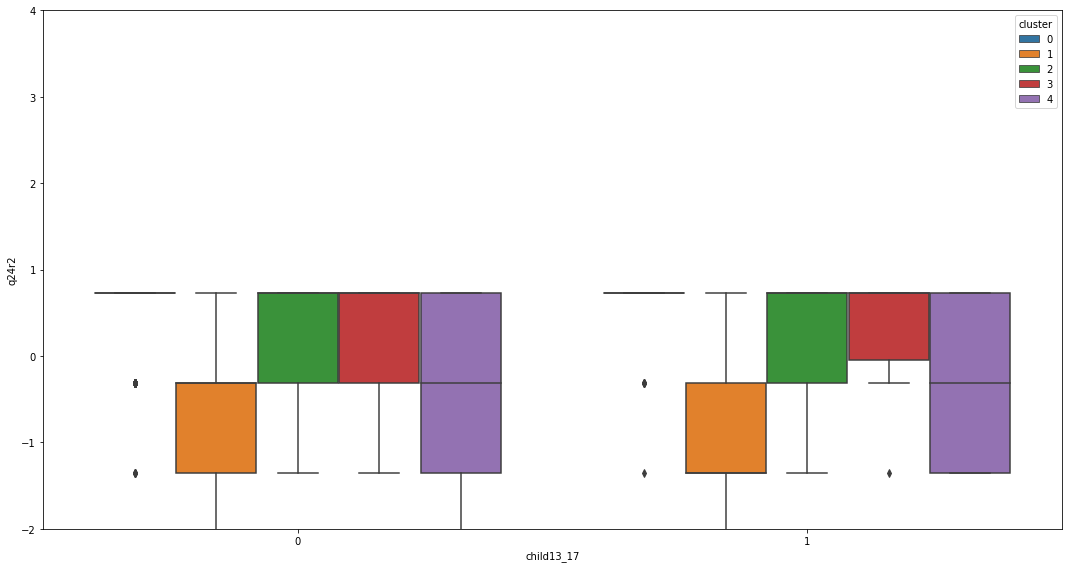

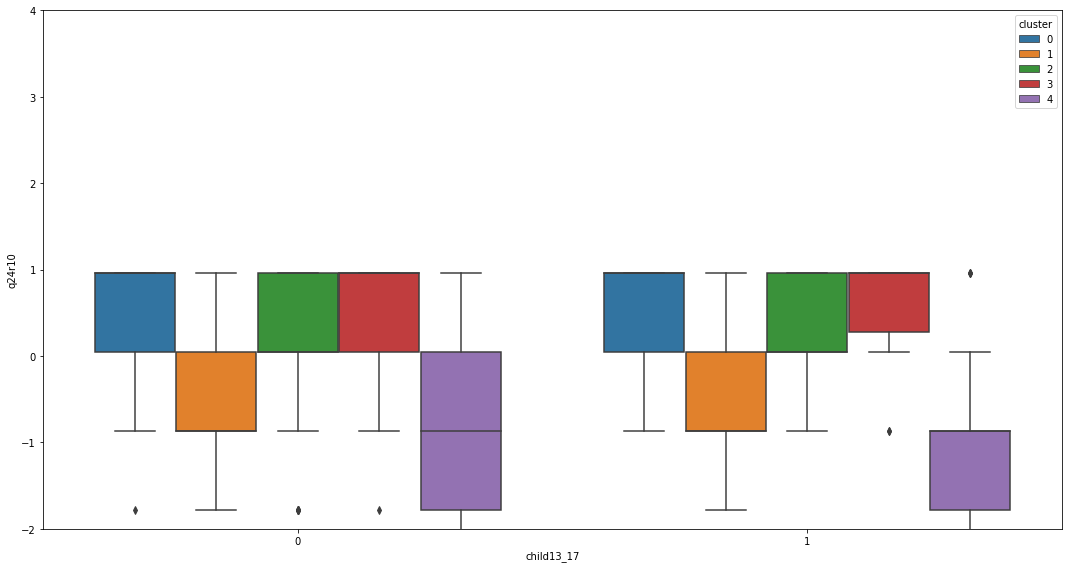

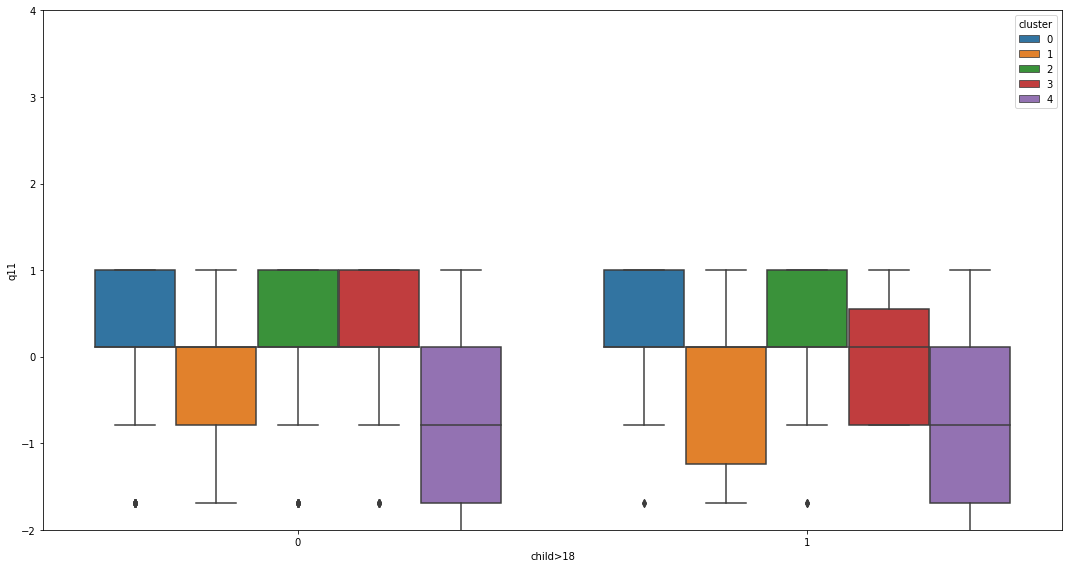

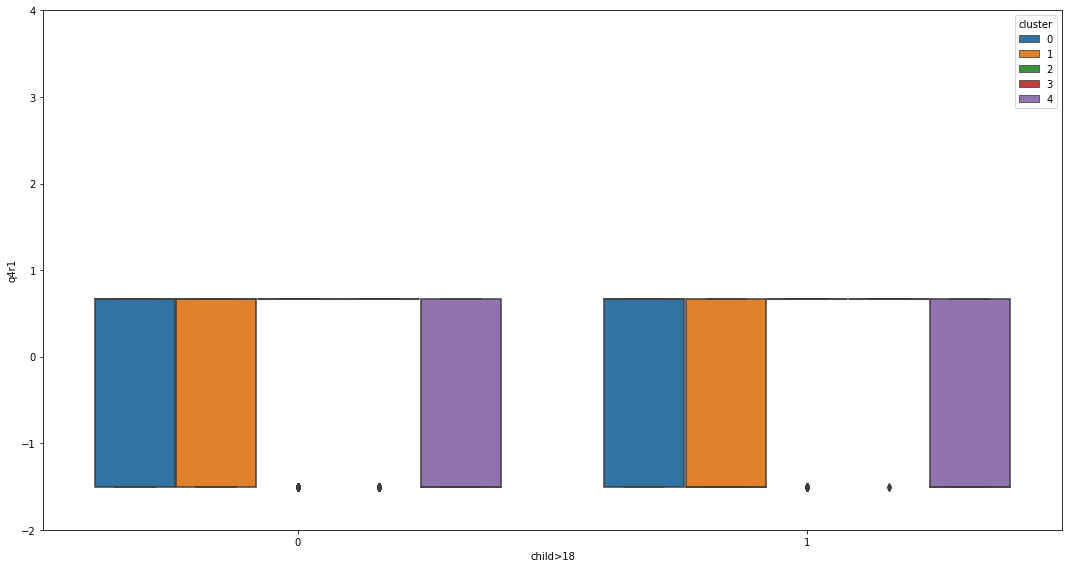

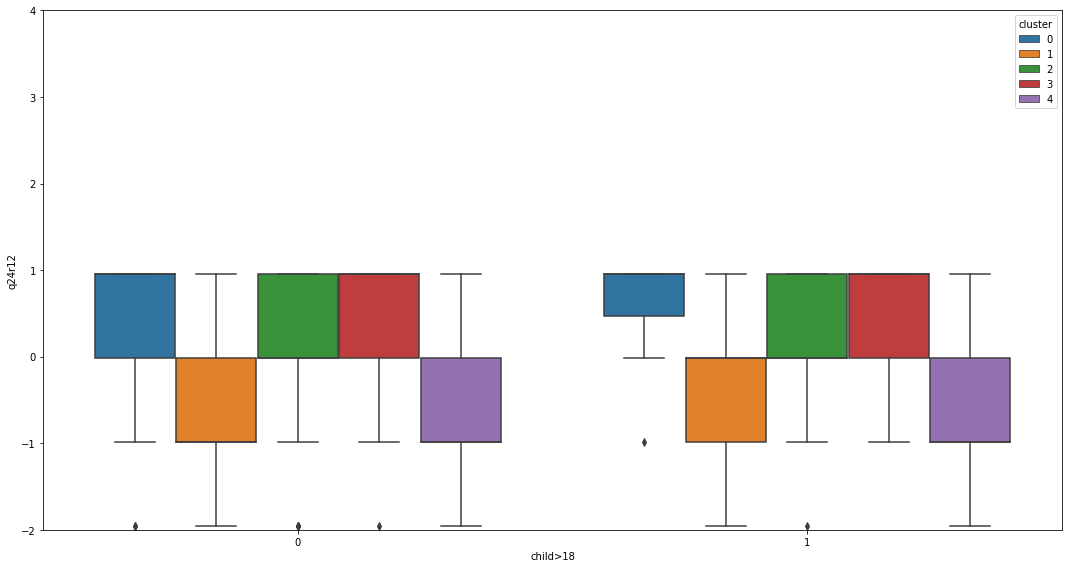

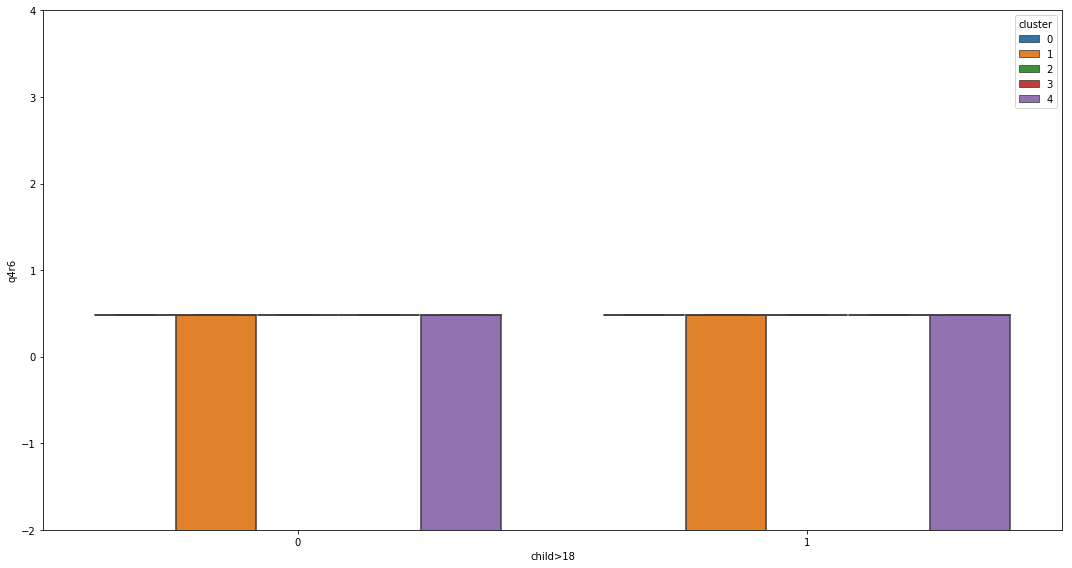

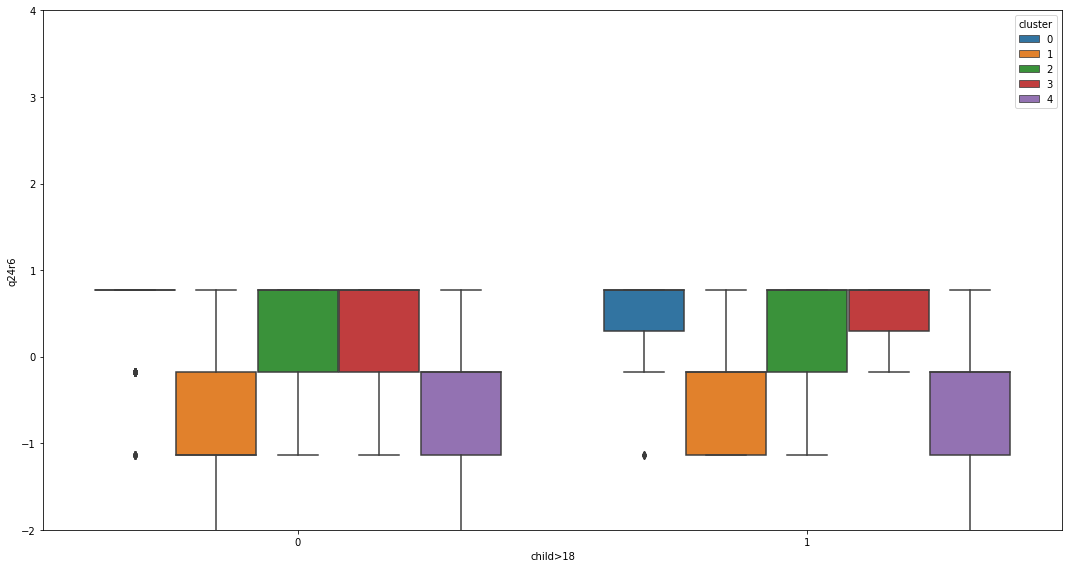

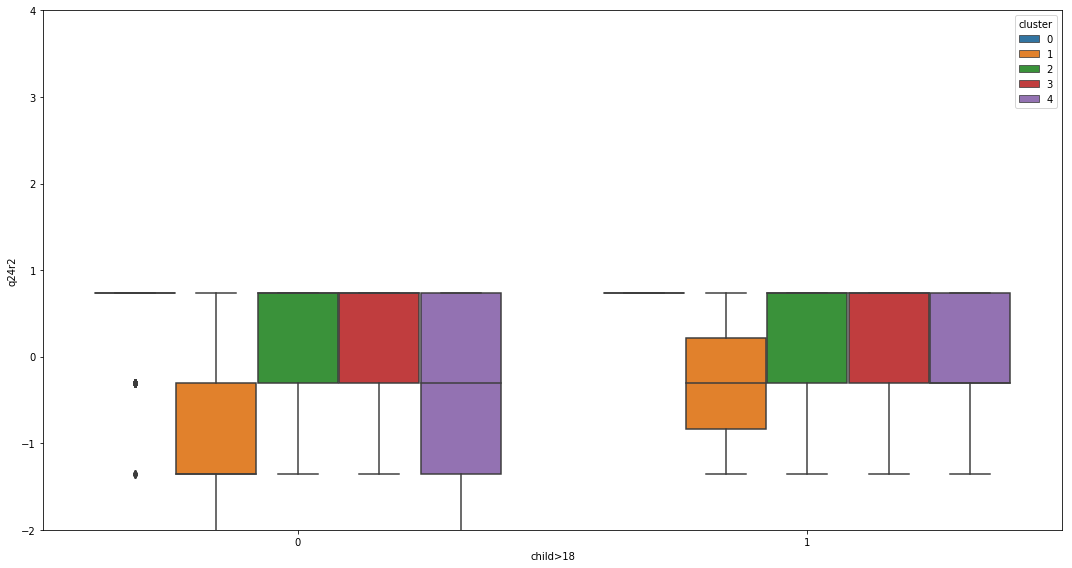

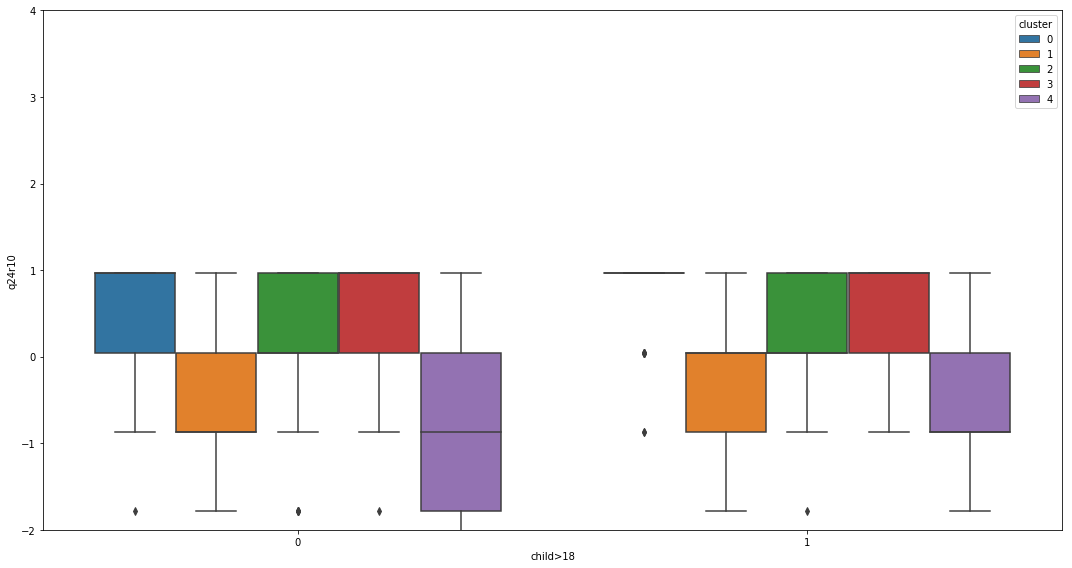

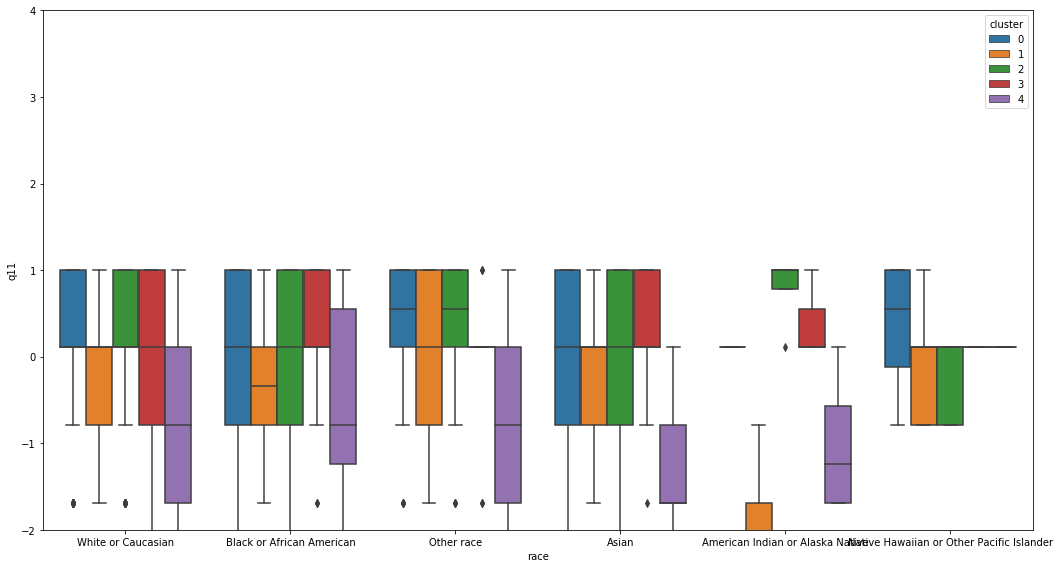

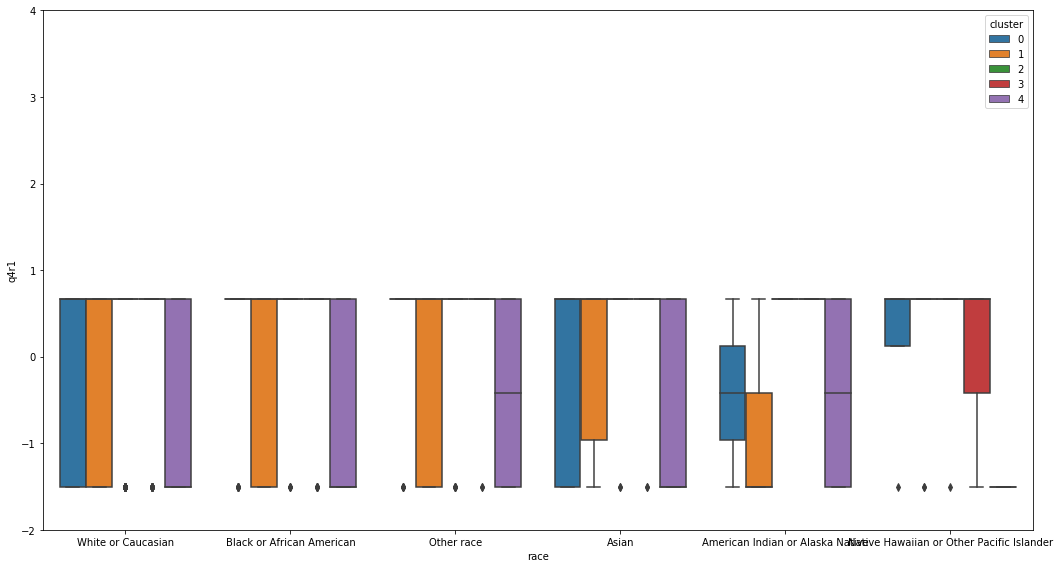

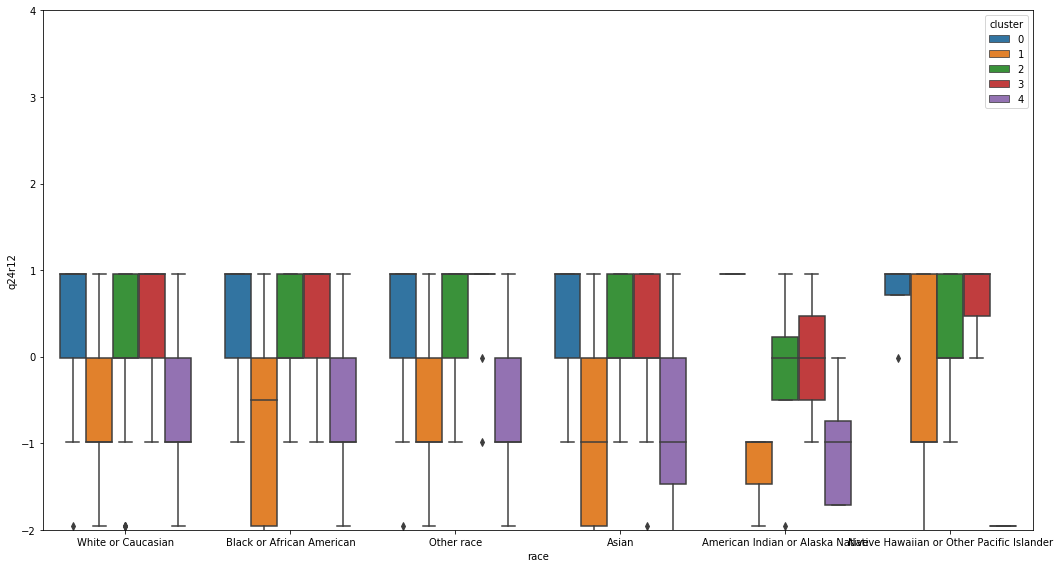

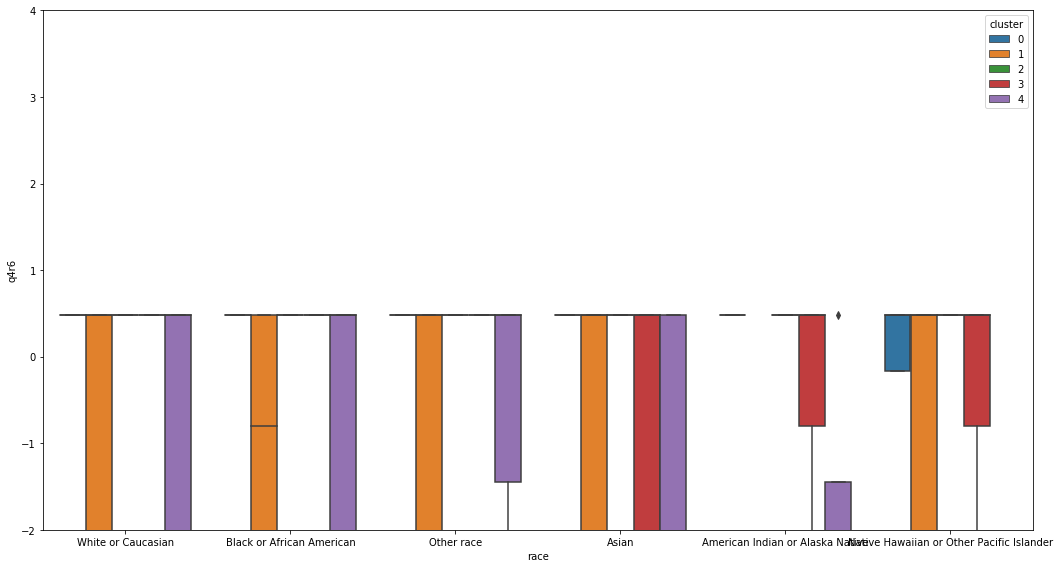

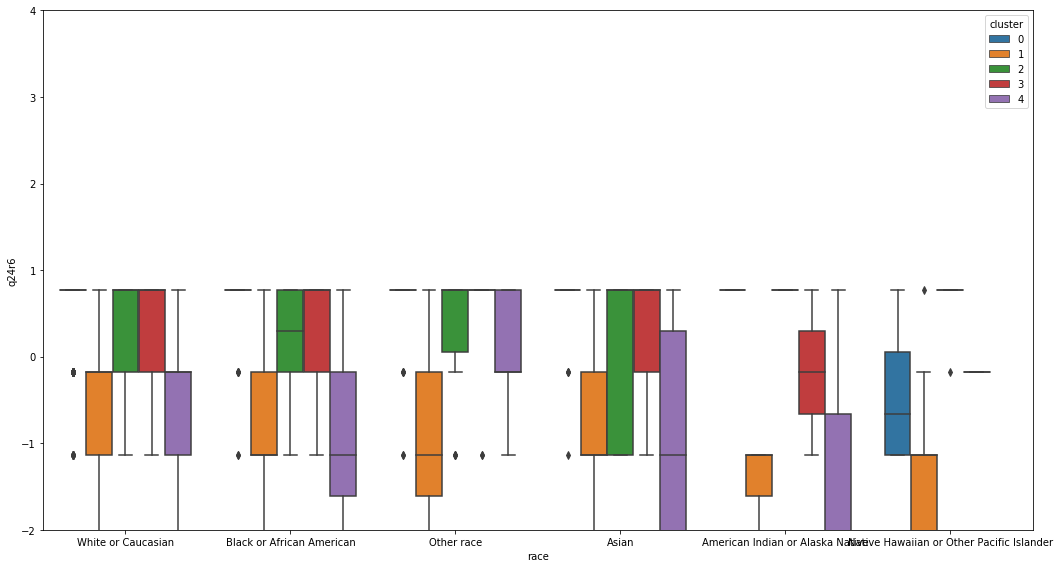

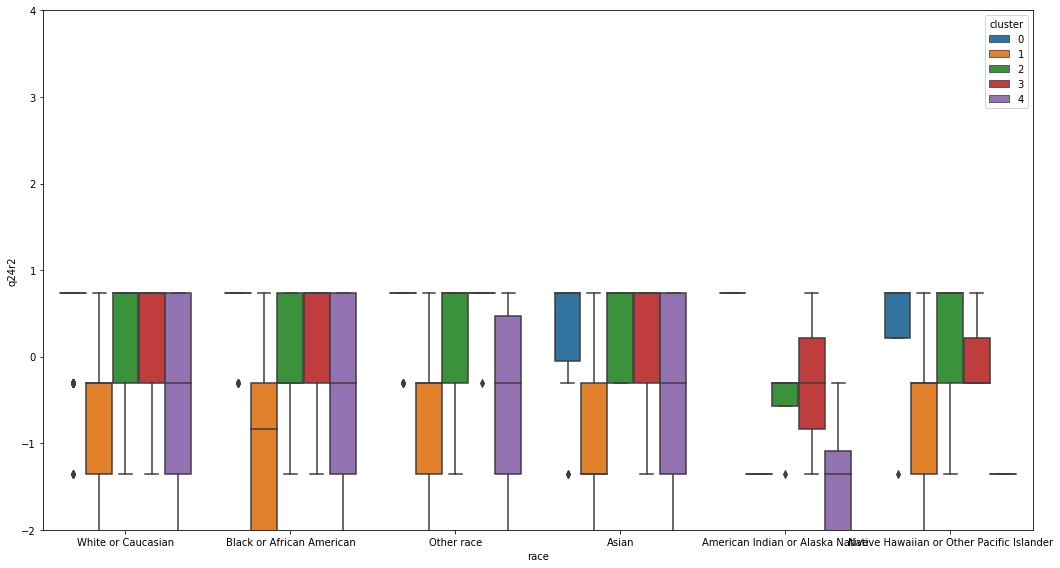

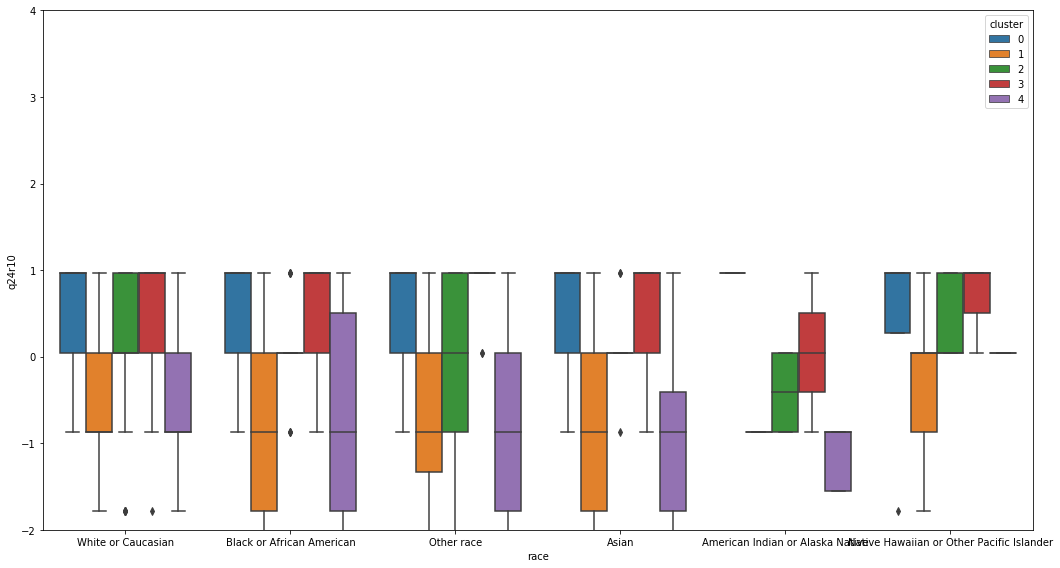

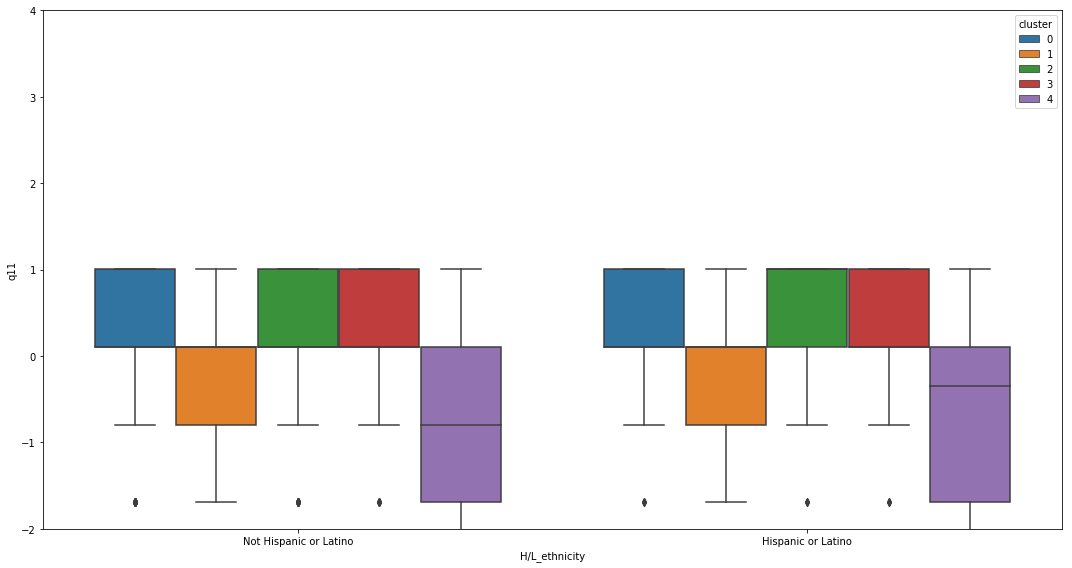

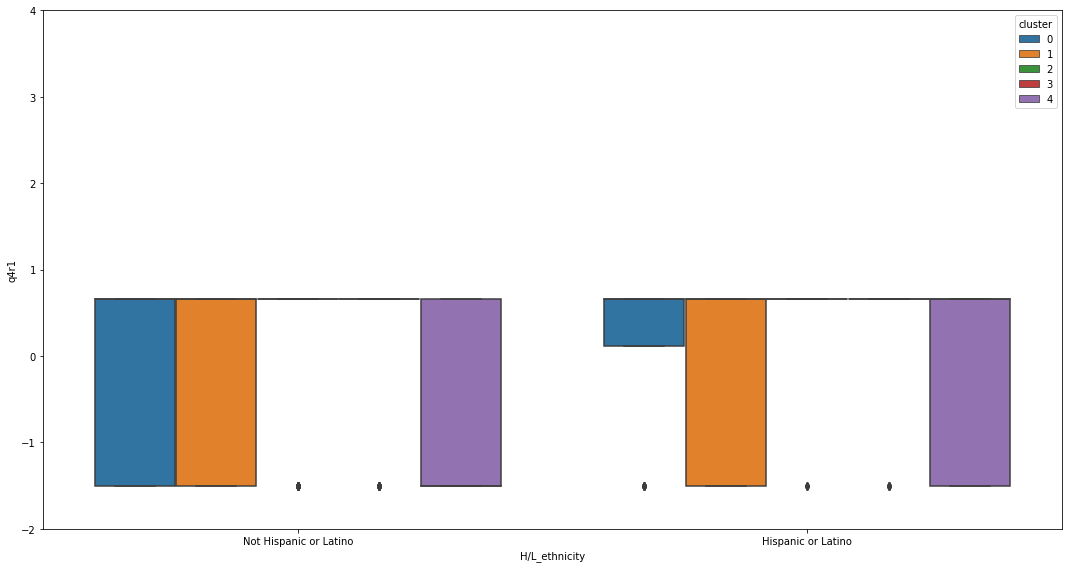

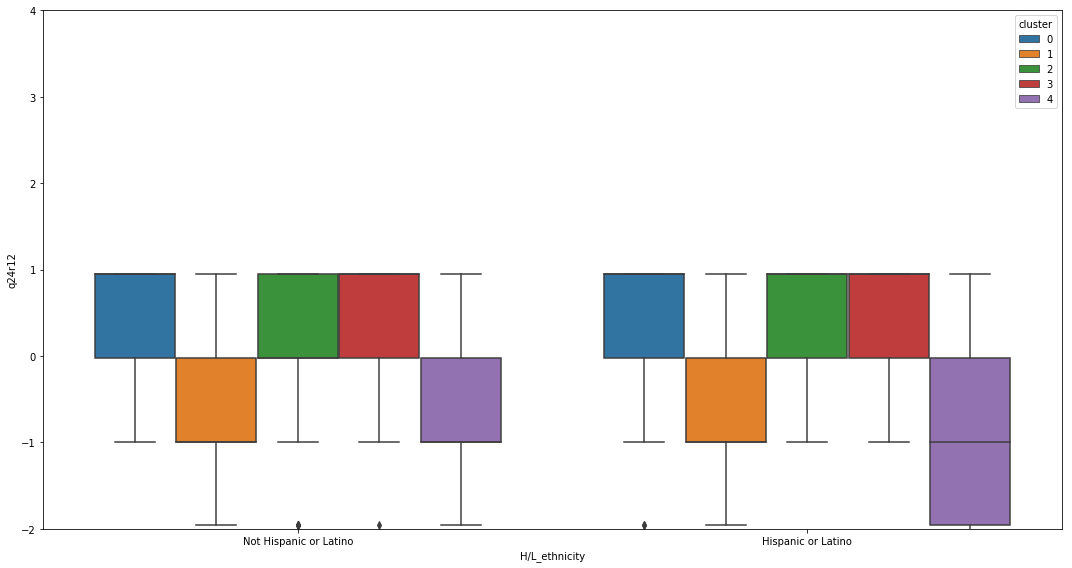

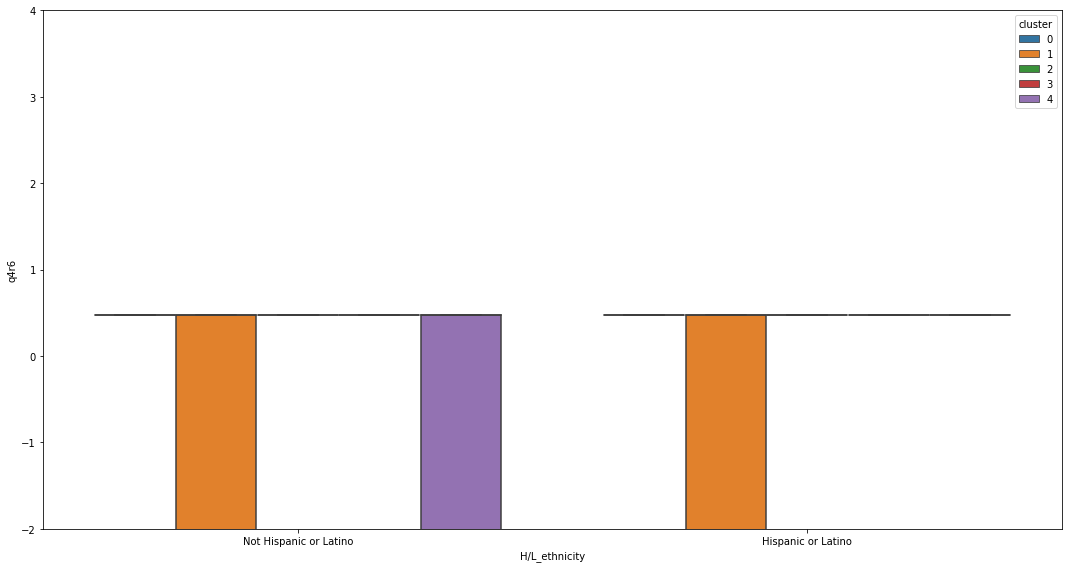

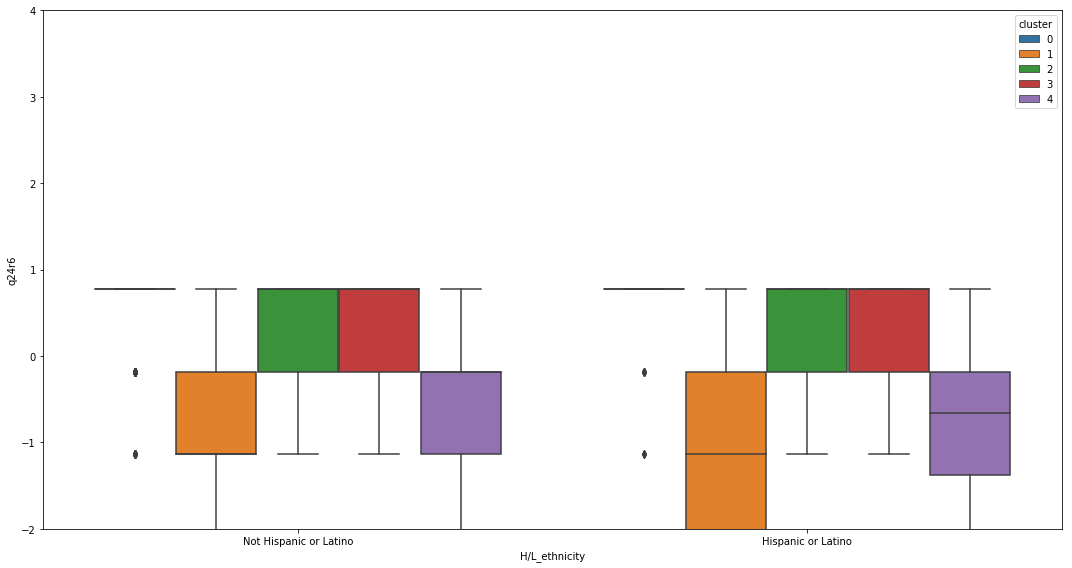

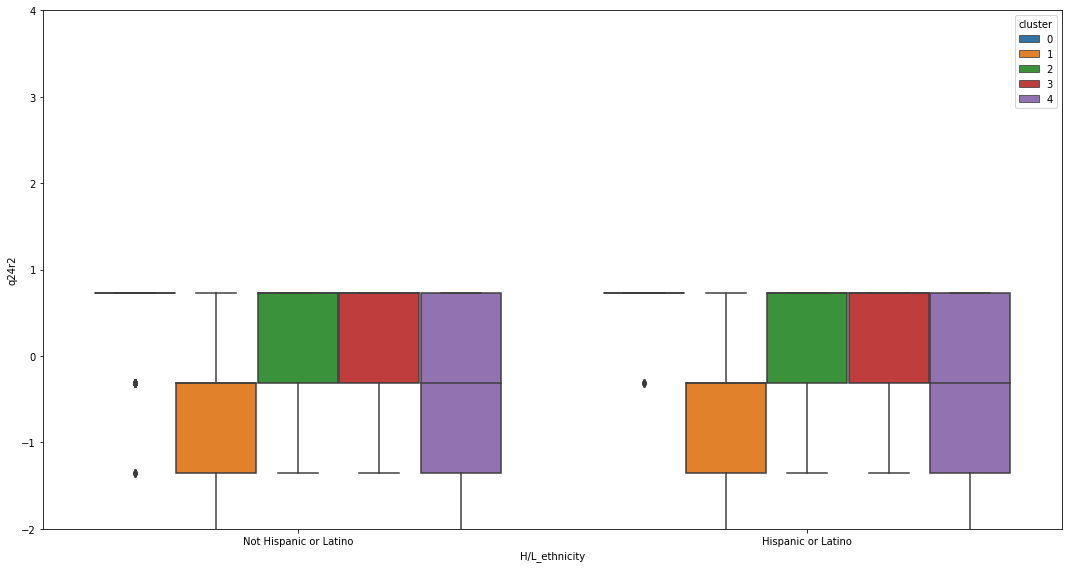

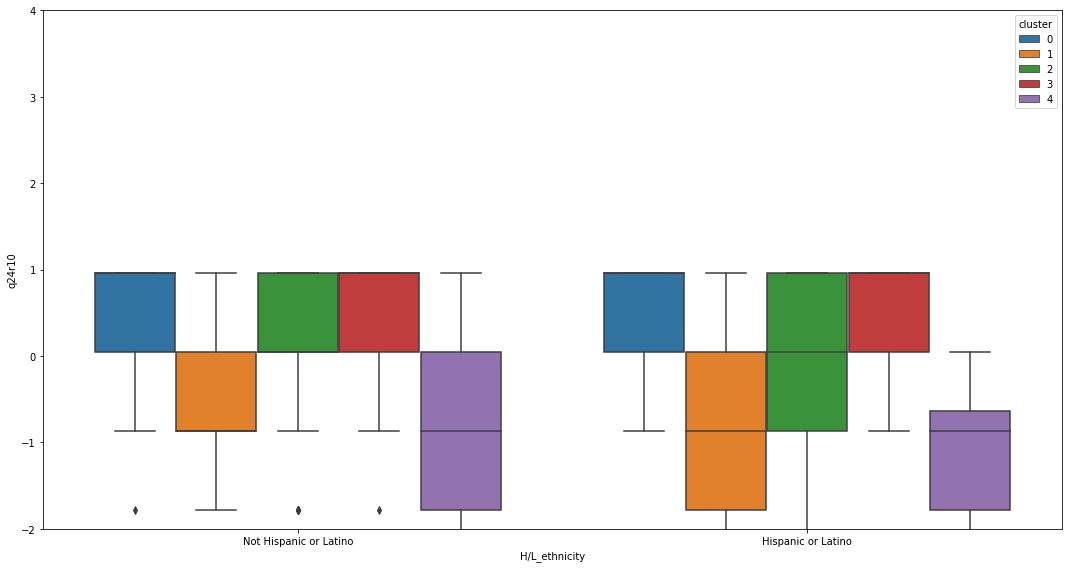

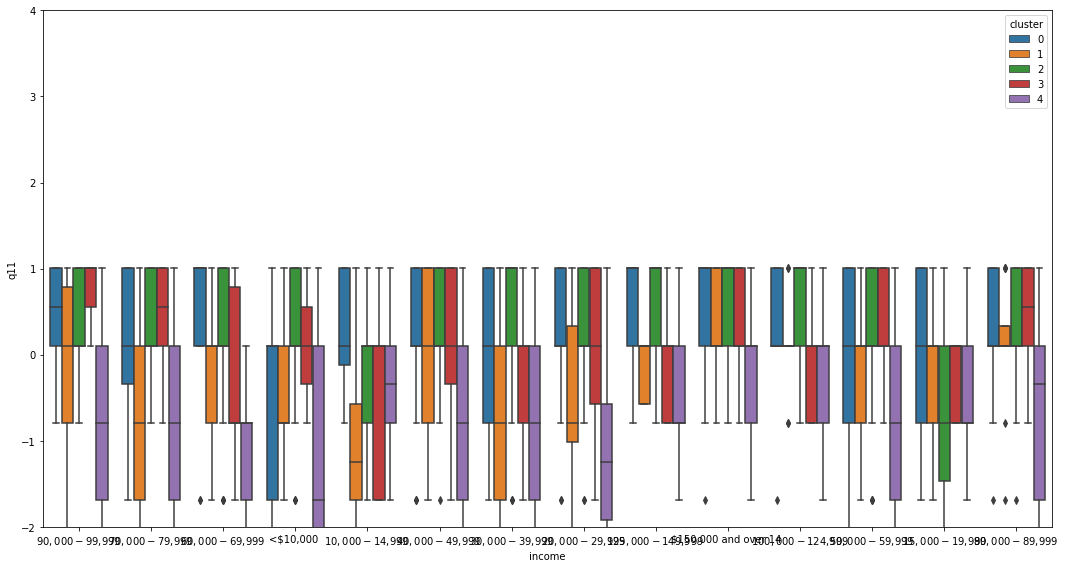

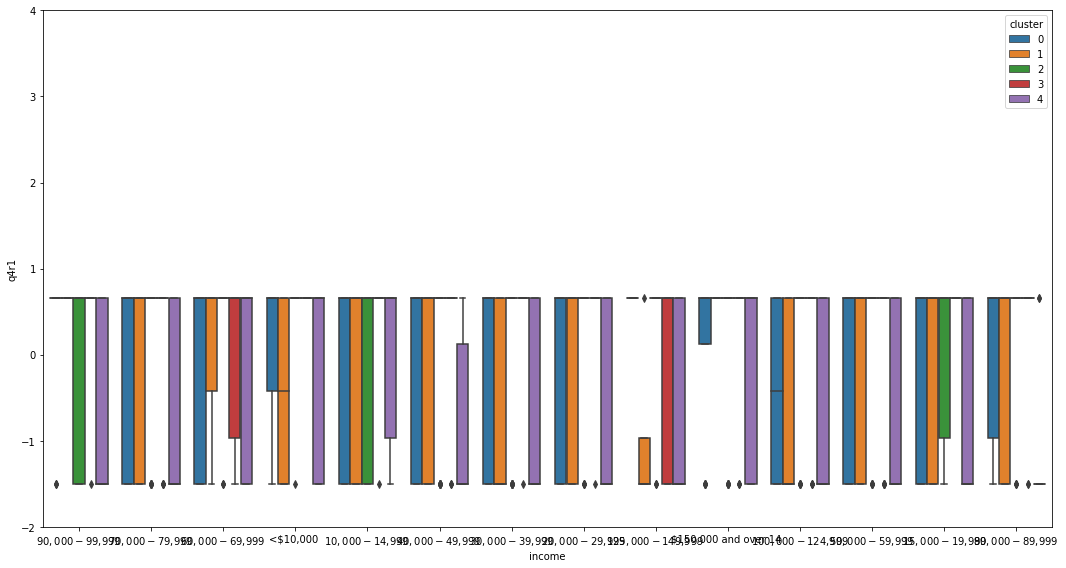

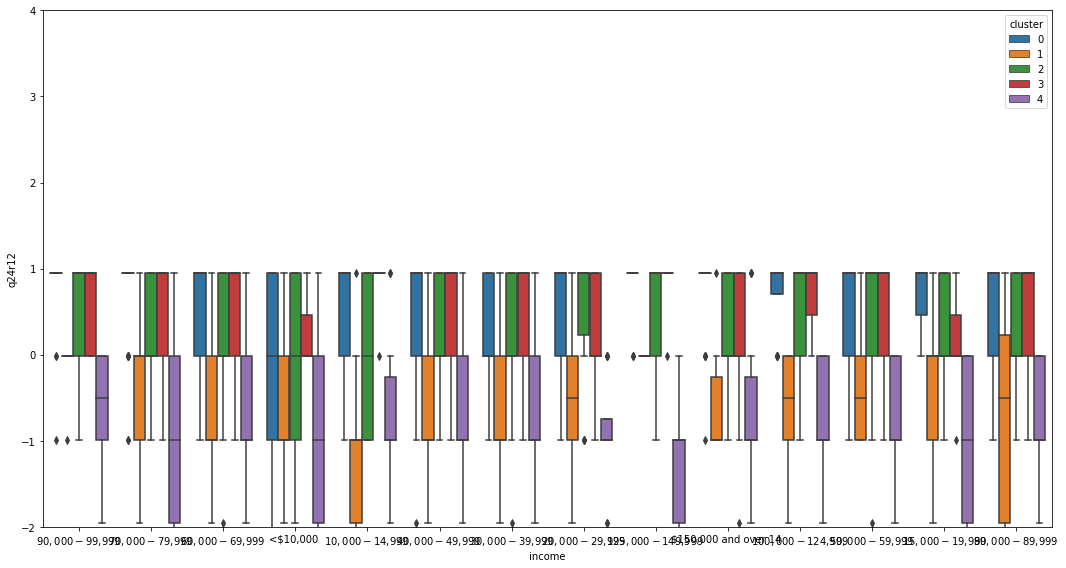

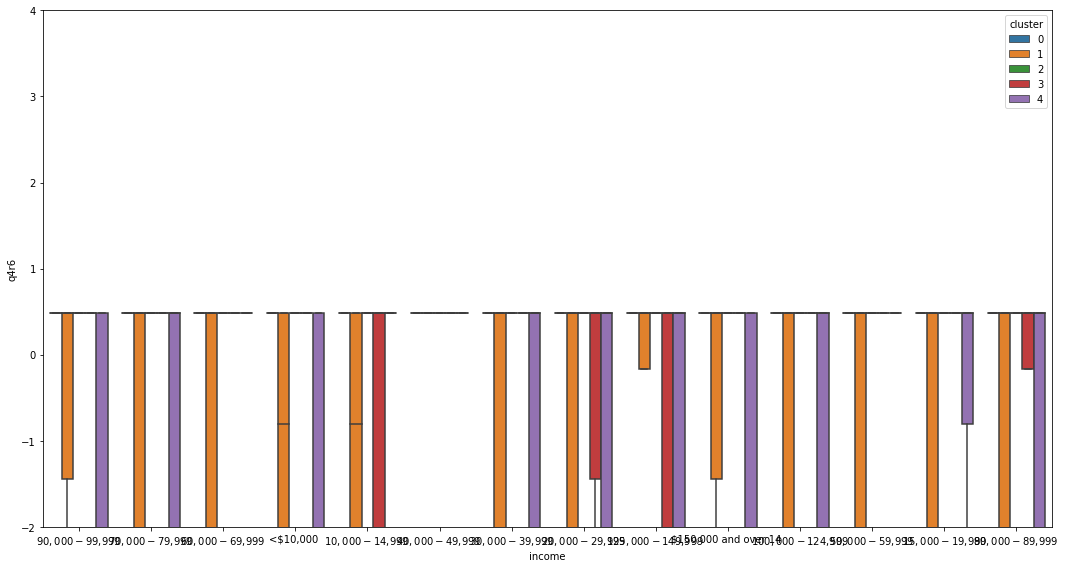

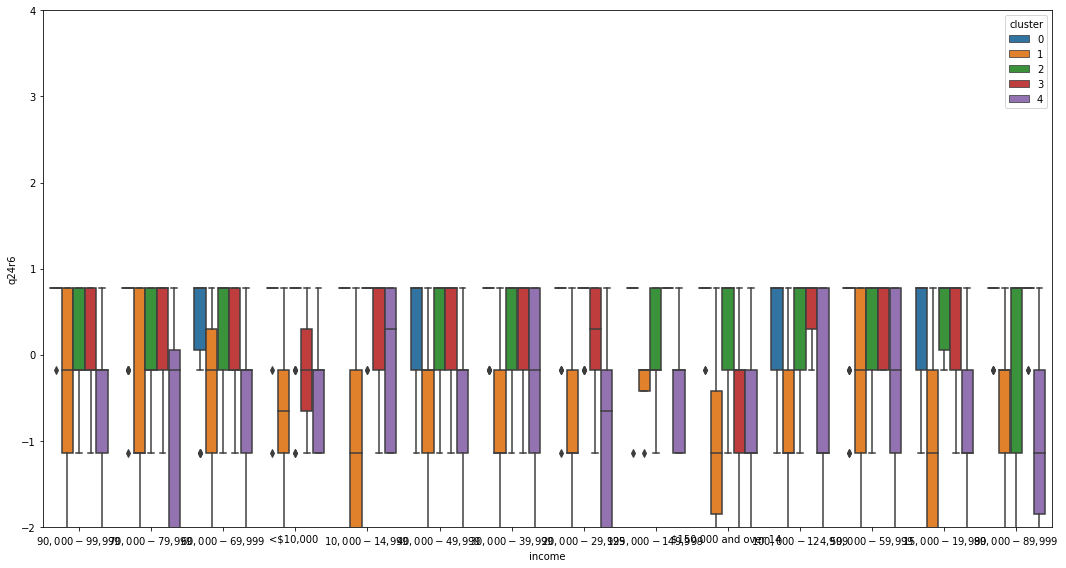

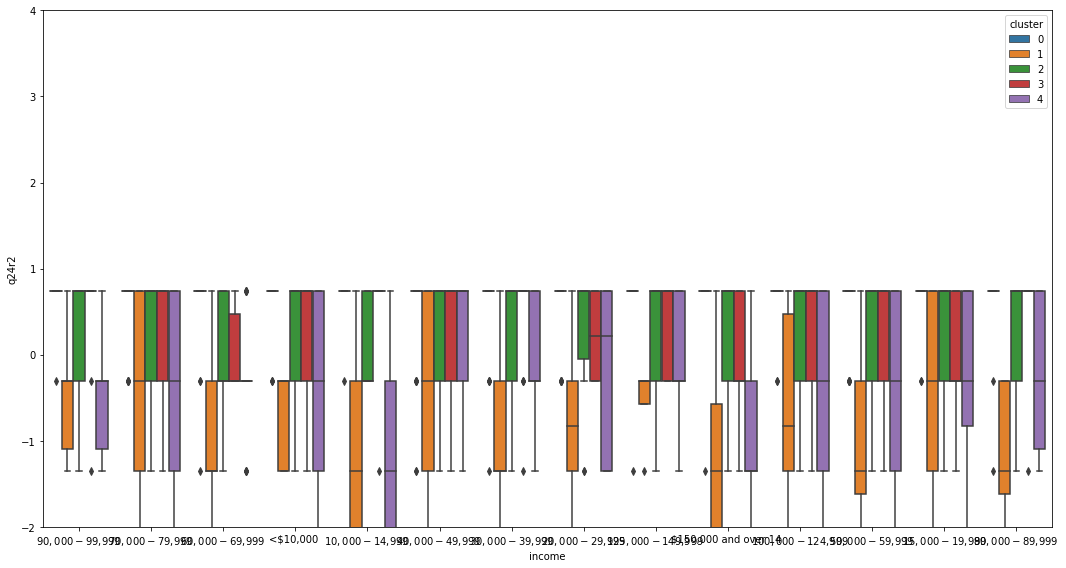

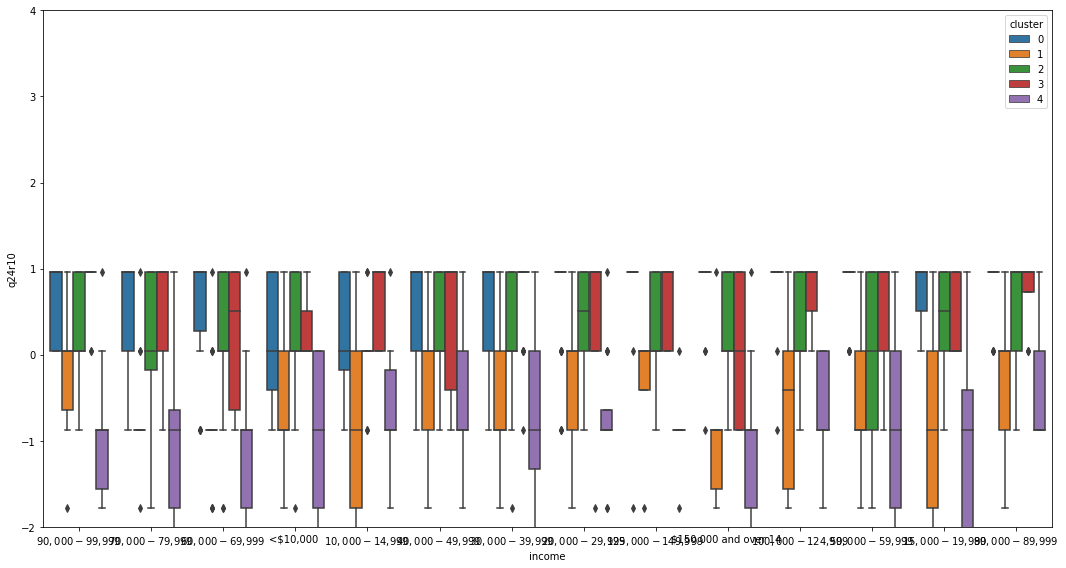

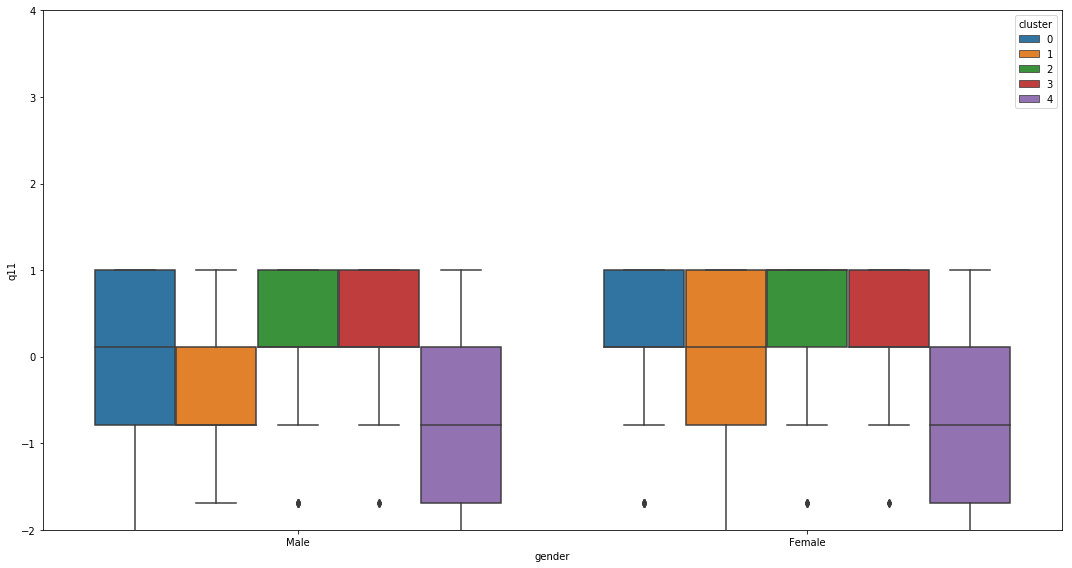

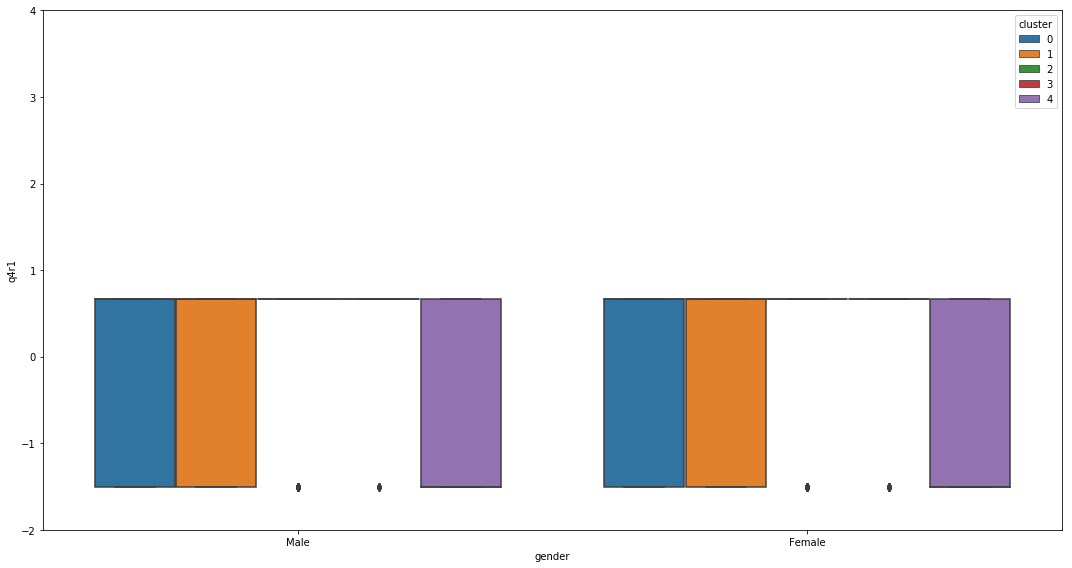

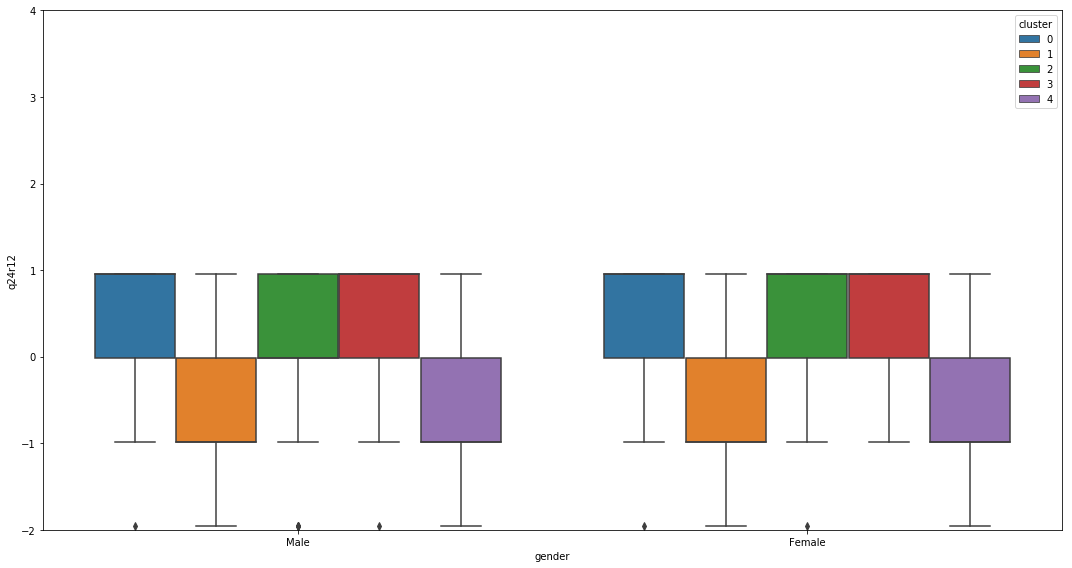

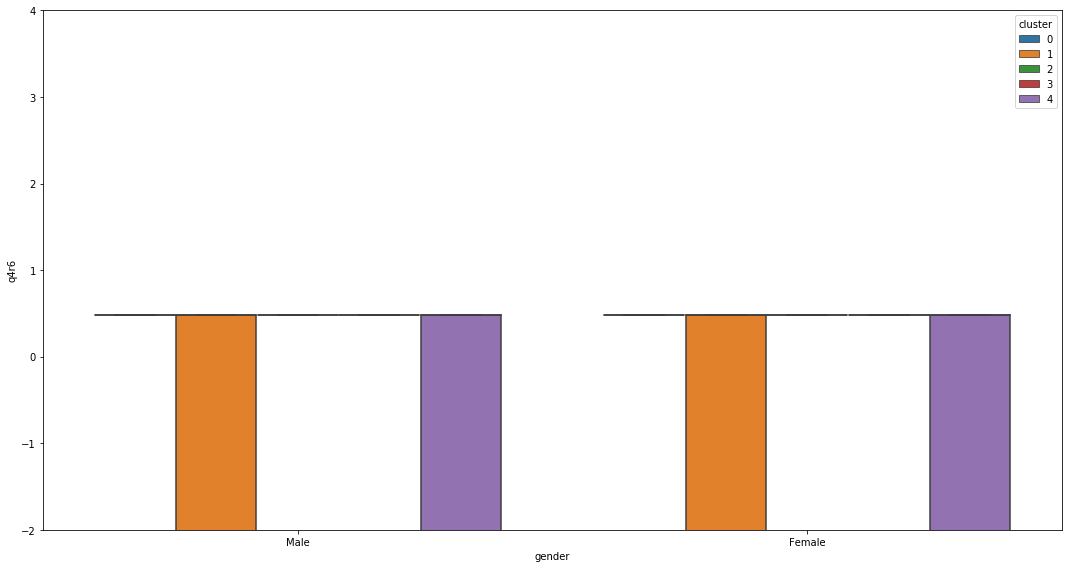

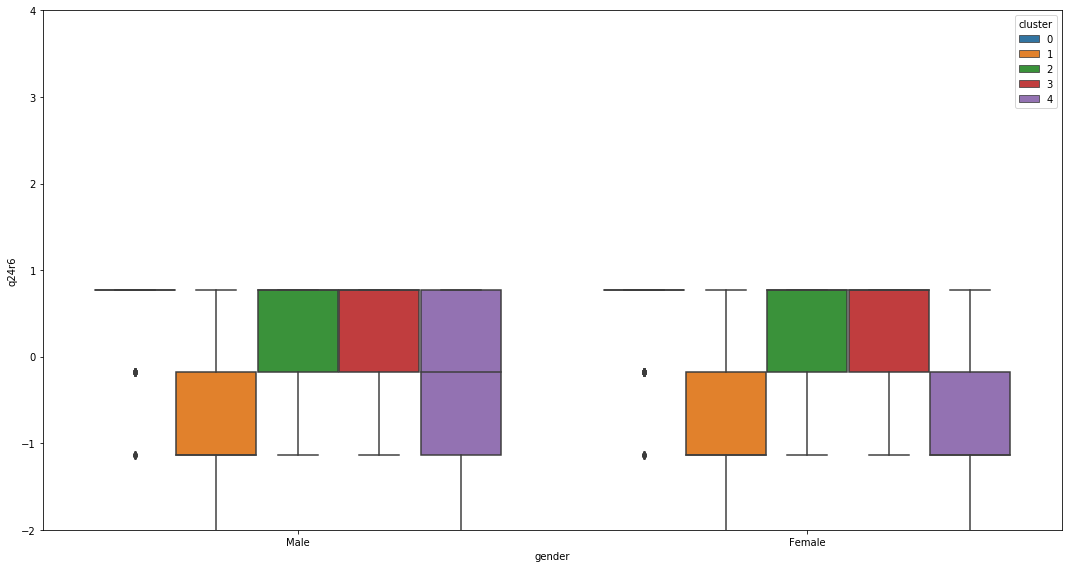

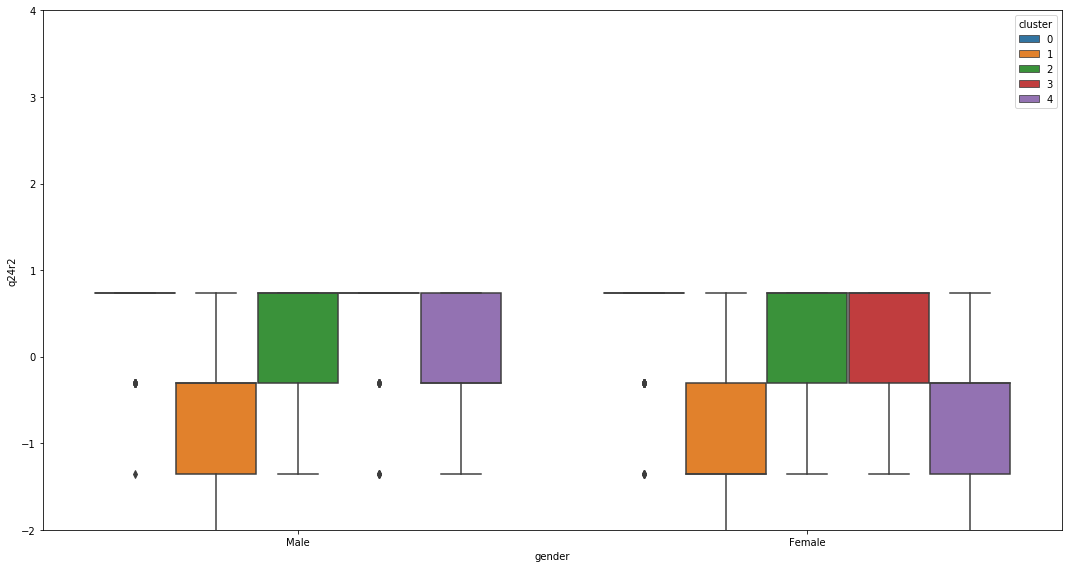

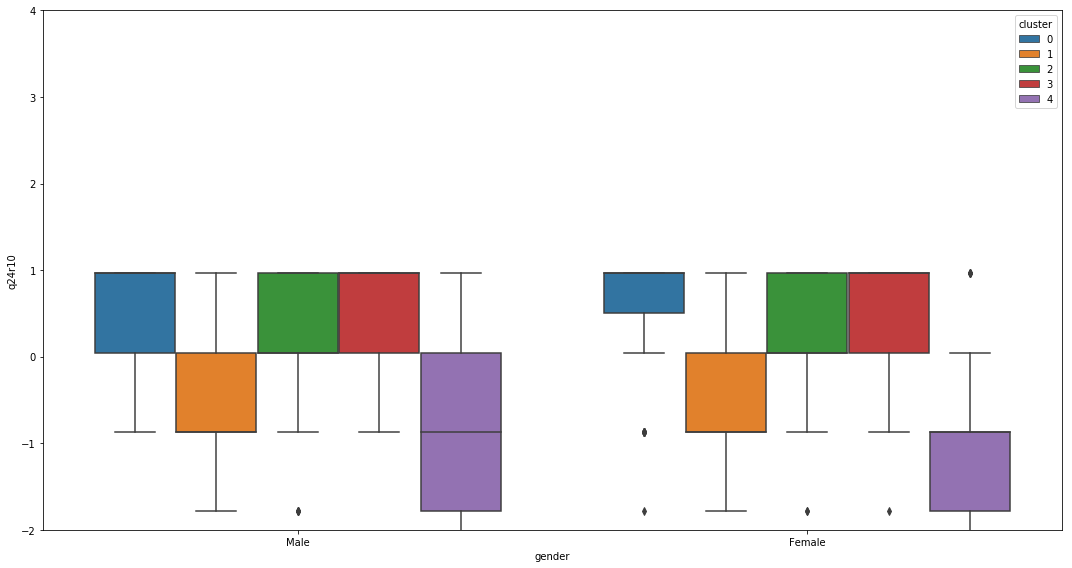

In [35]:
########################
## Cluster 2
########################

behavioral_names_2 = ['q11', 'q4r1', 'q24r12', 'q4r6', 'q24r6', 'q24r2', 'q24r10']

for c in category_names:
    for b in behavioral_names_2:
        fig, ax = plt.subplots(figsize = (15, 8))
        sns.boxplot(x = c,
                    y = b,
                    hue = 'cluster',
                    data = final_clusters_df)

        plt.ylim(-2, 4)
        plt.tight_layout()
        plt.show()

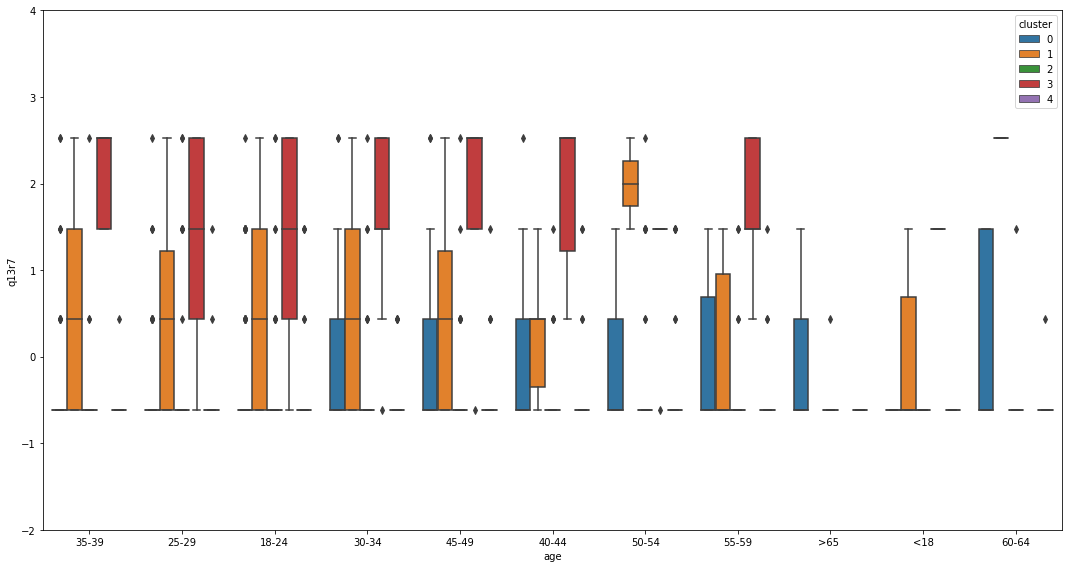

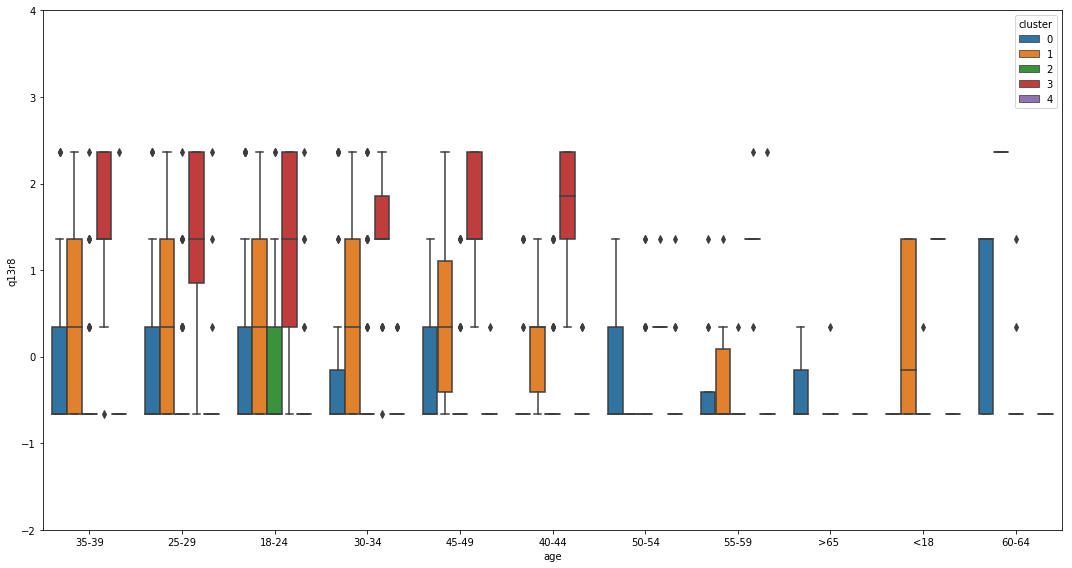

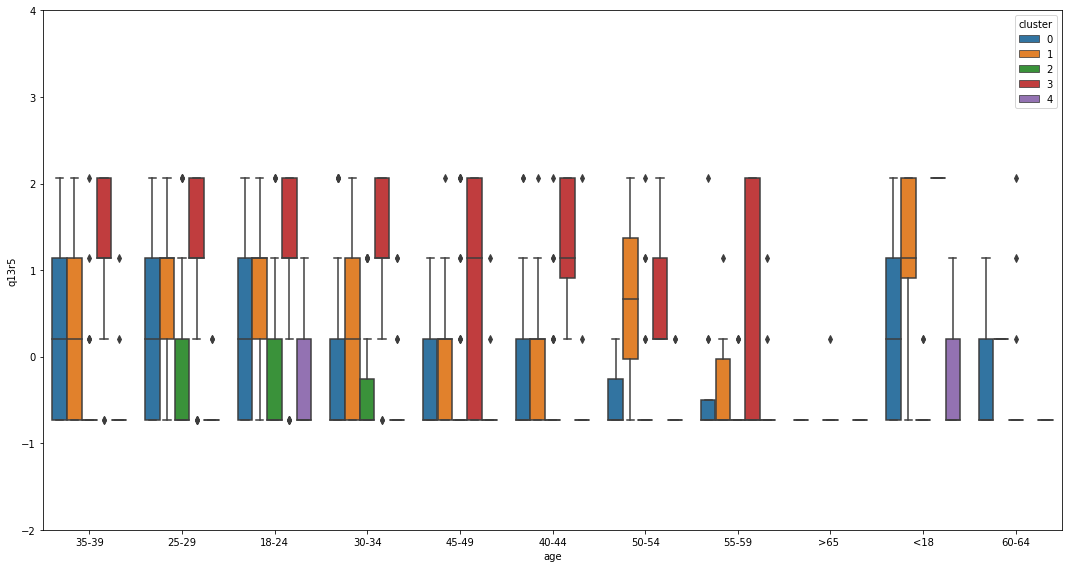

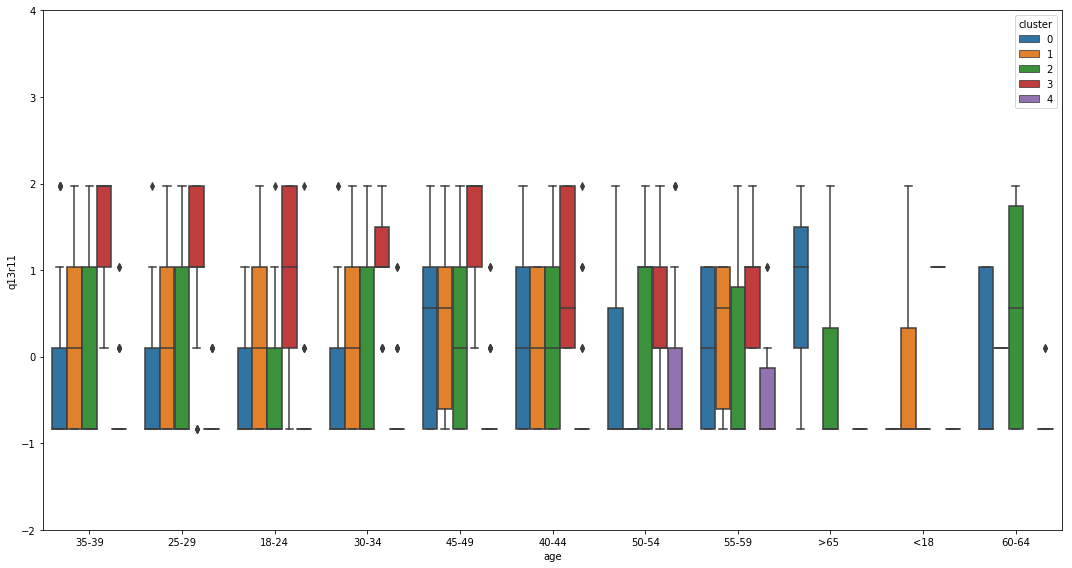

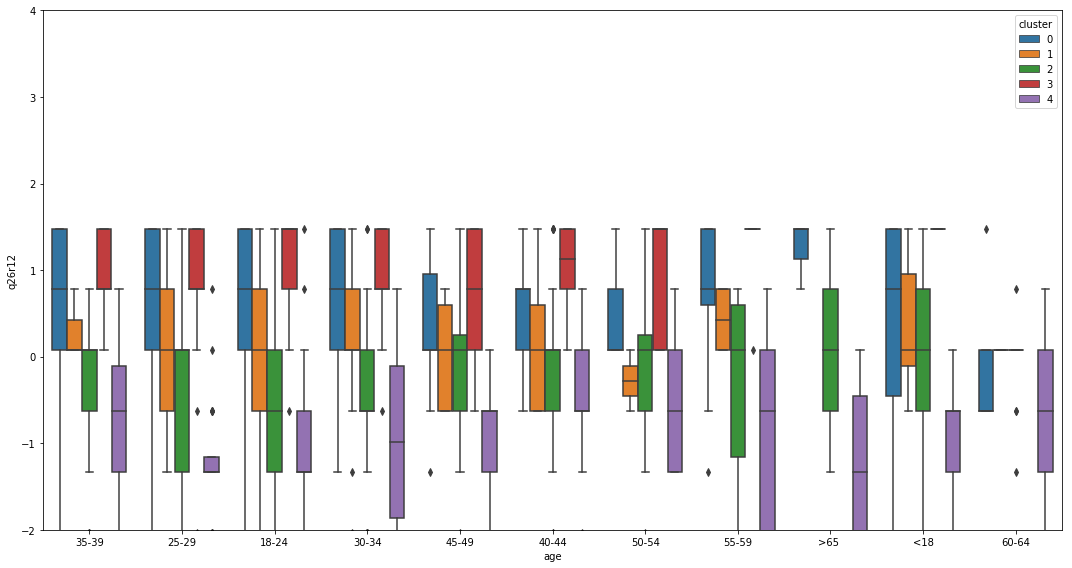

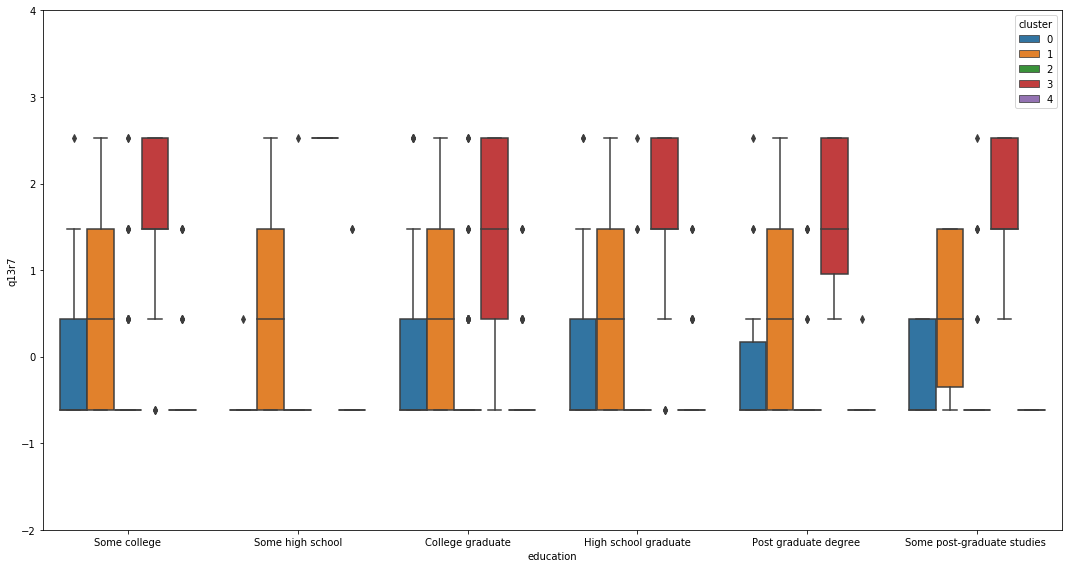

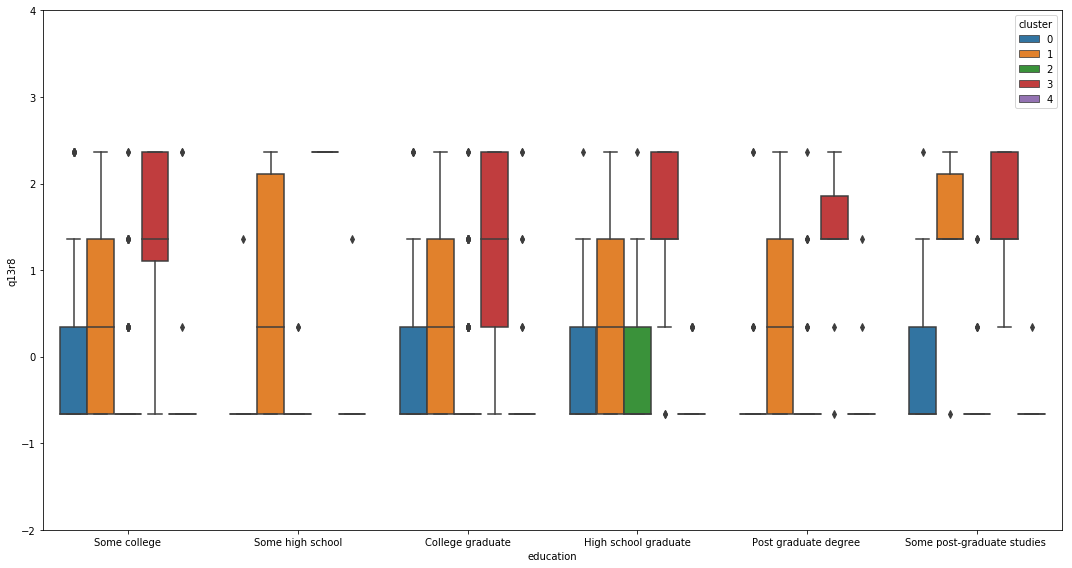

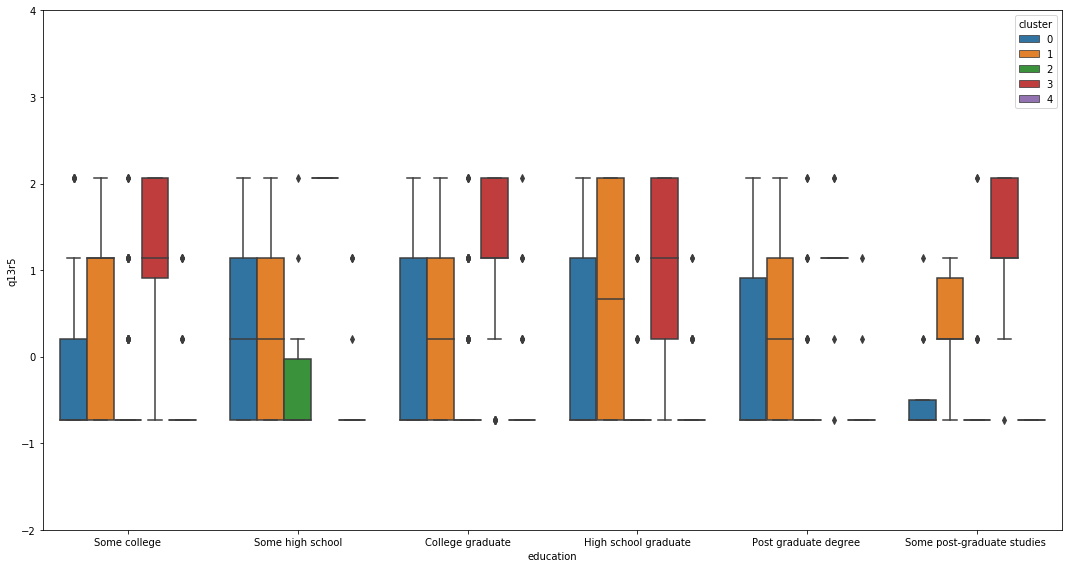

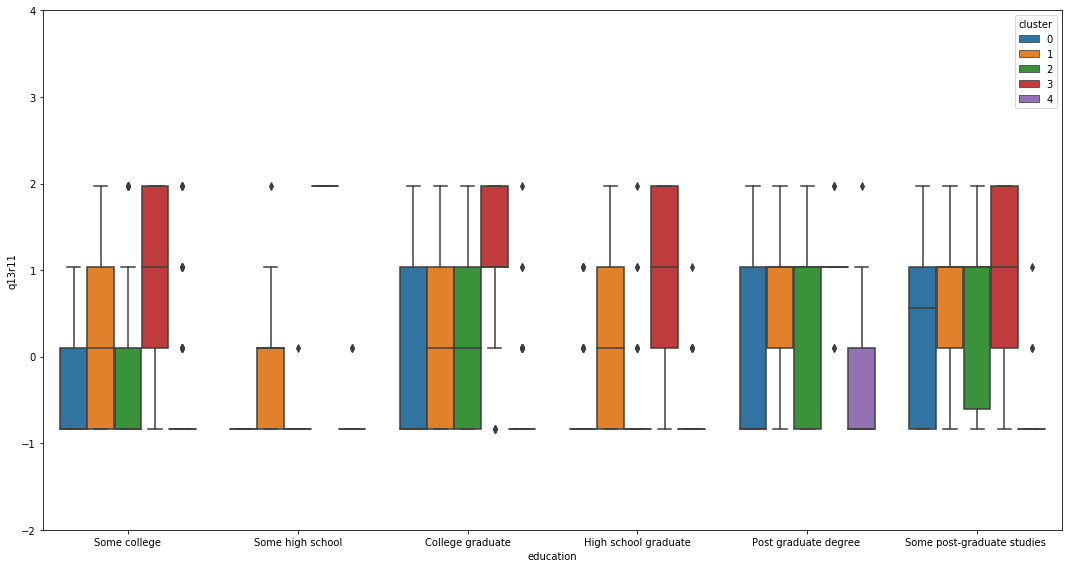

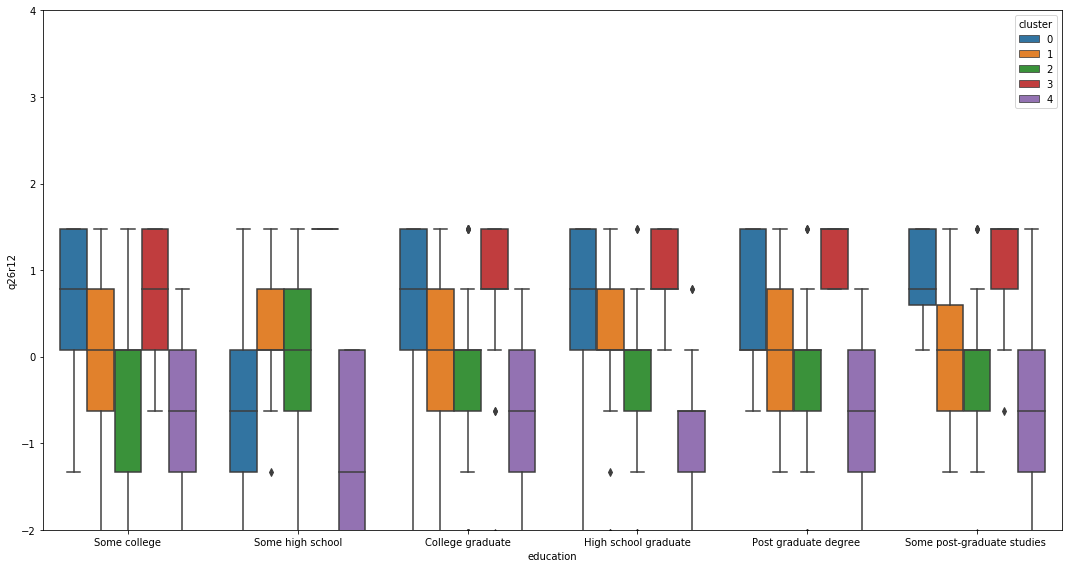

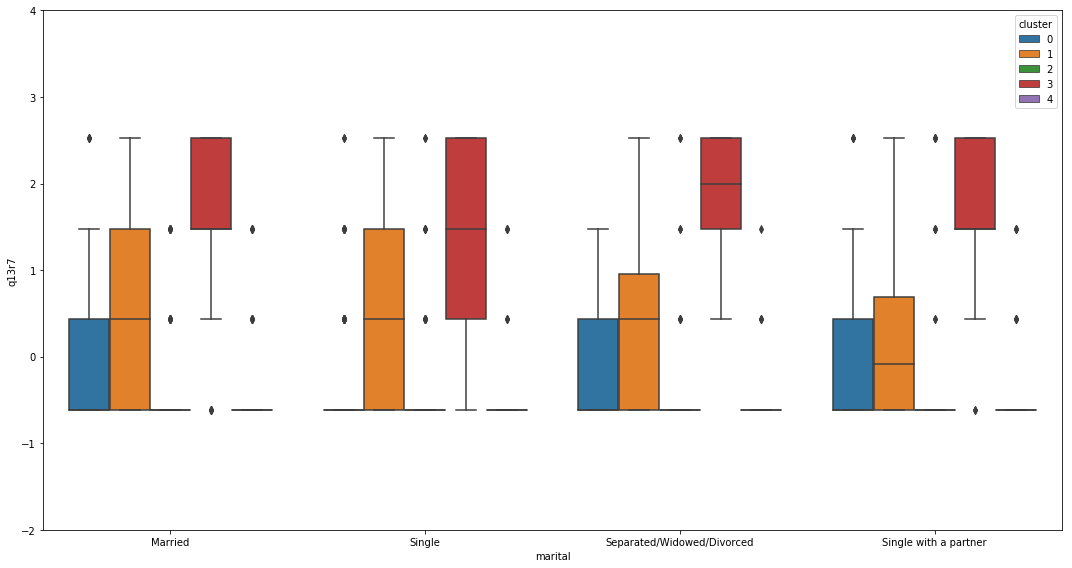

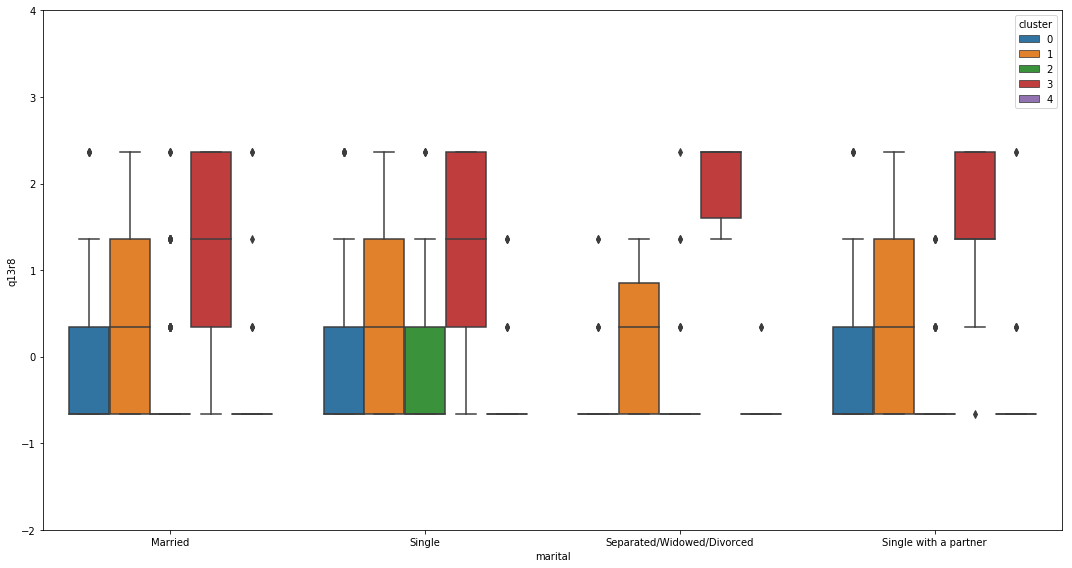

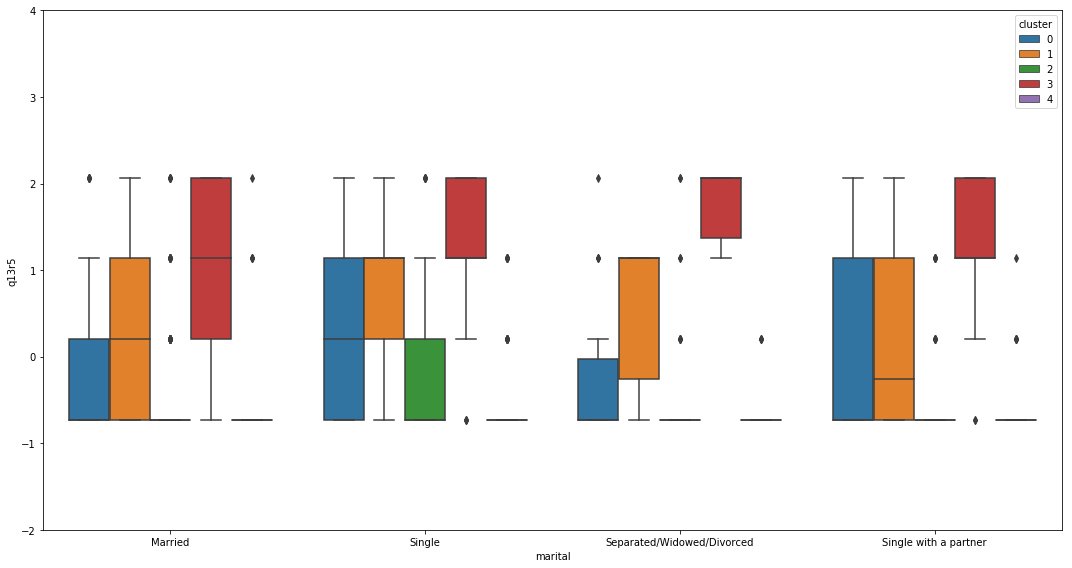

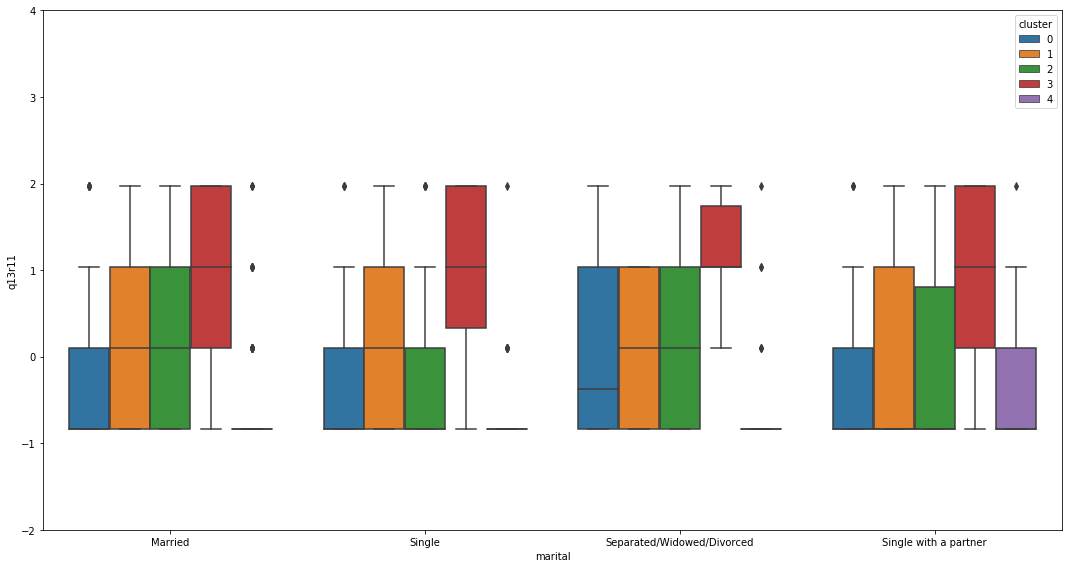

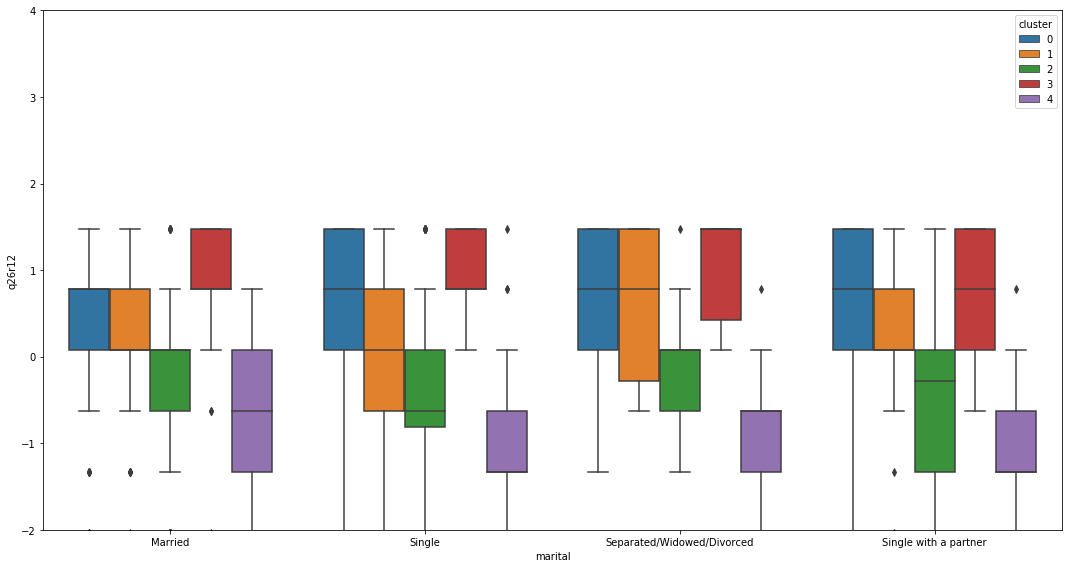

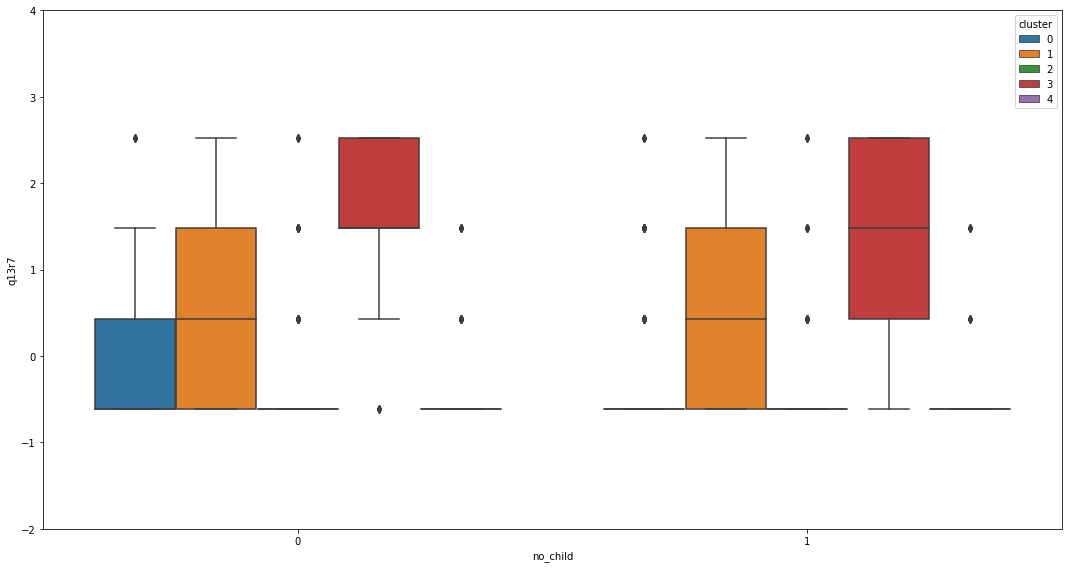

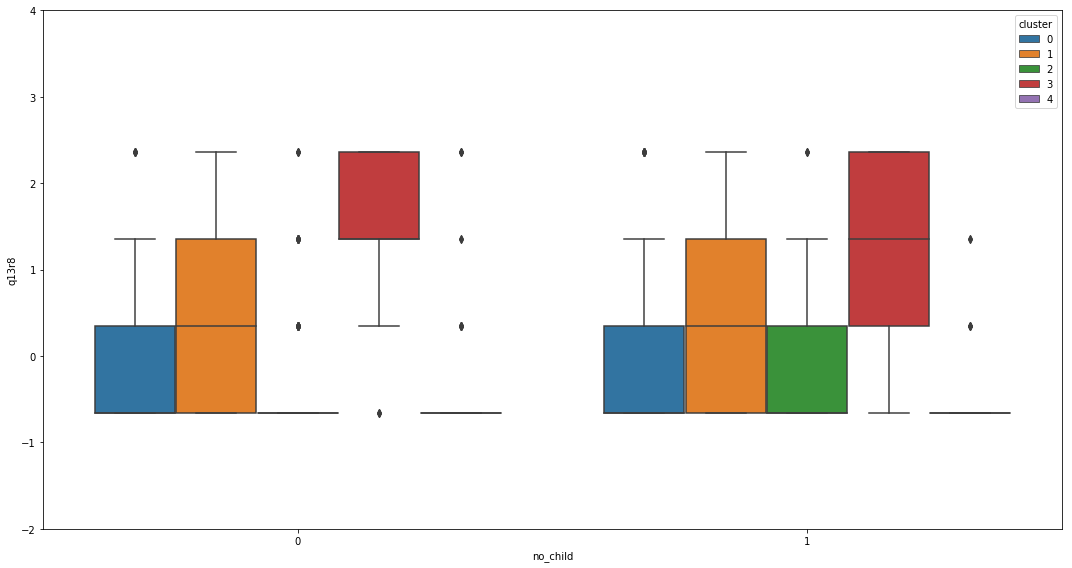

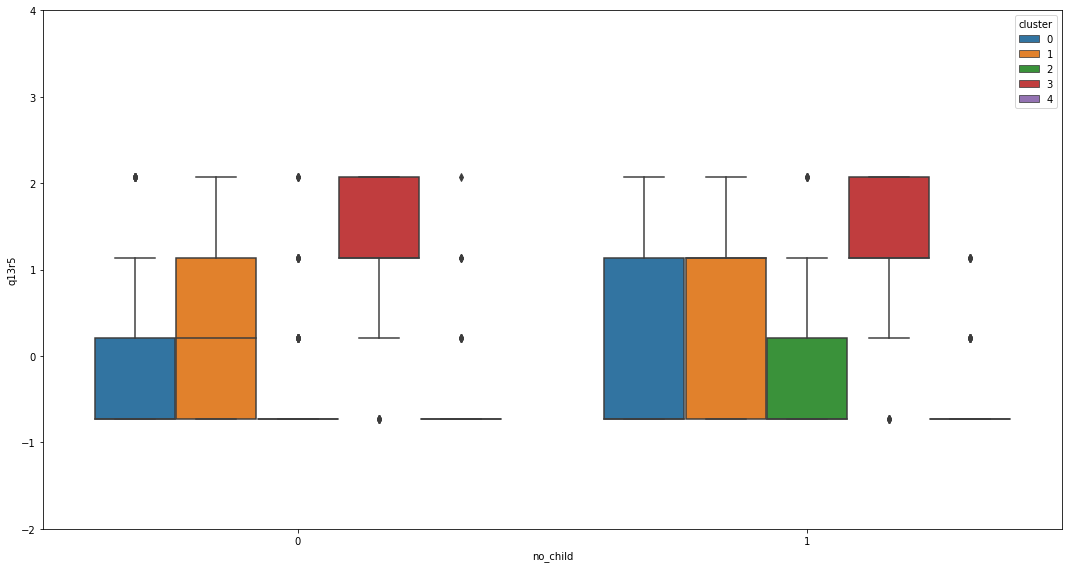

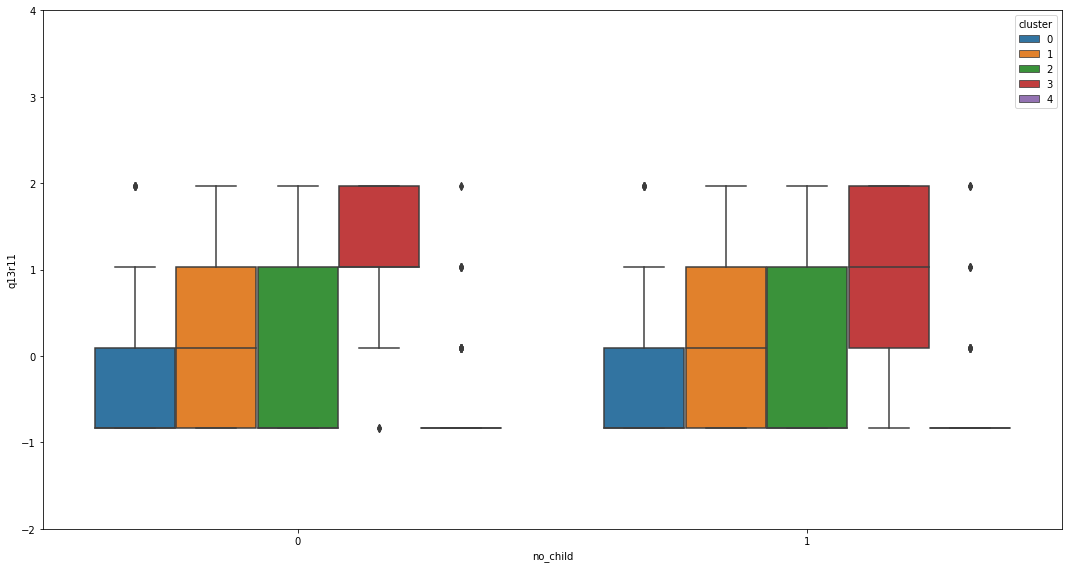

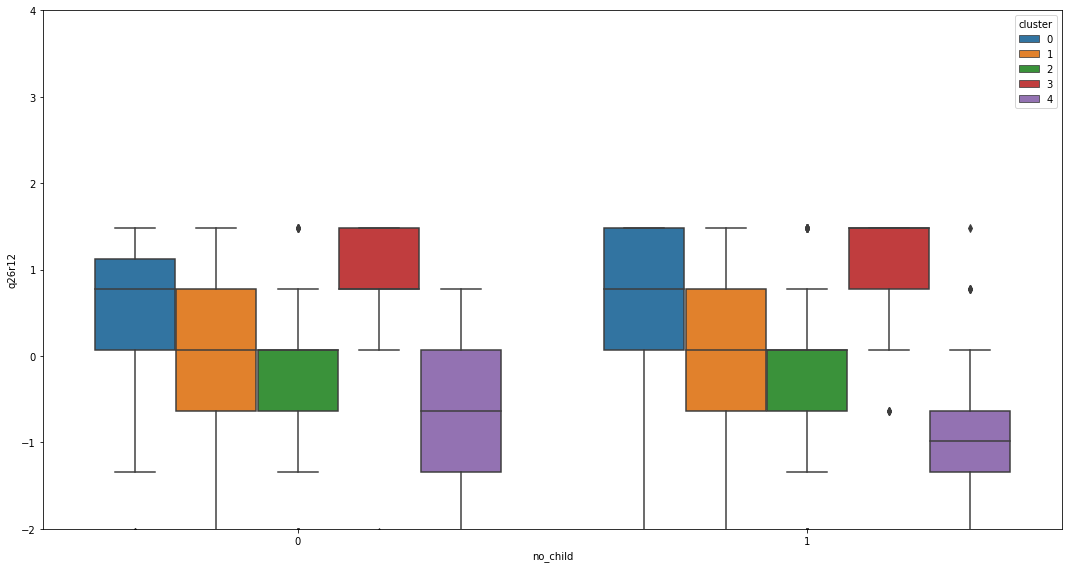

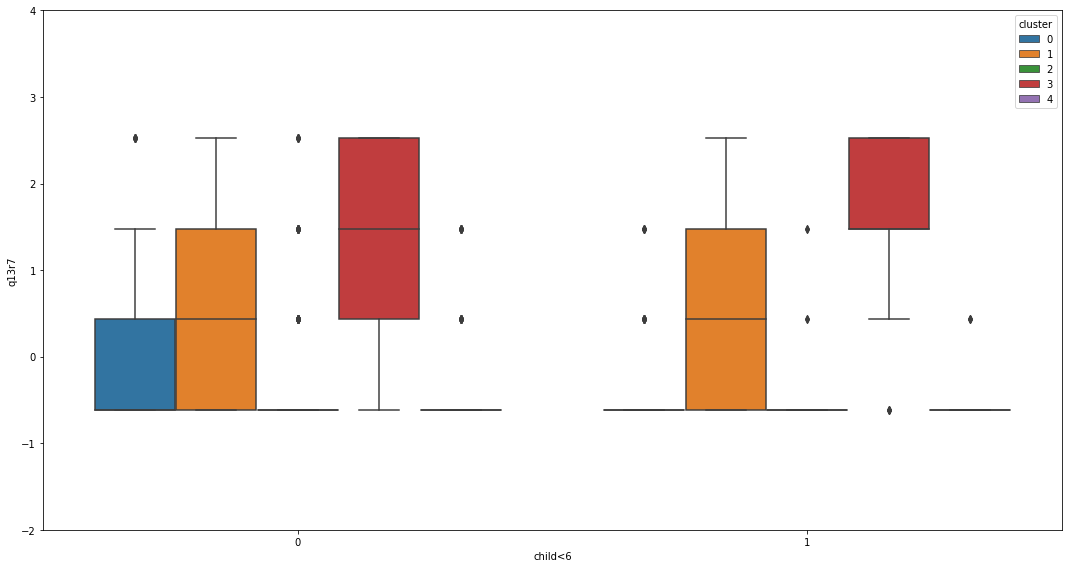

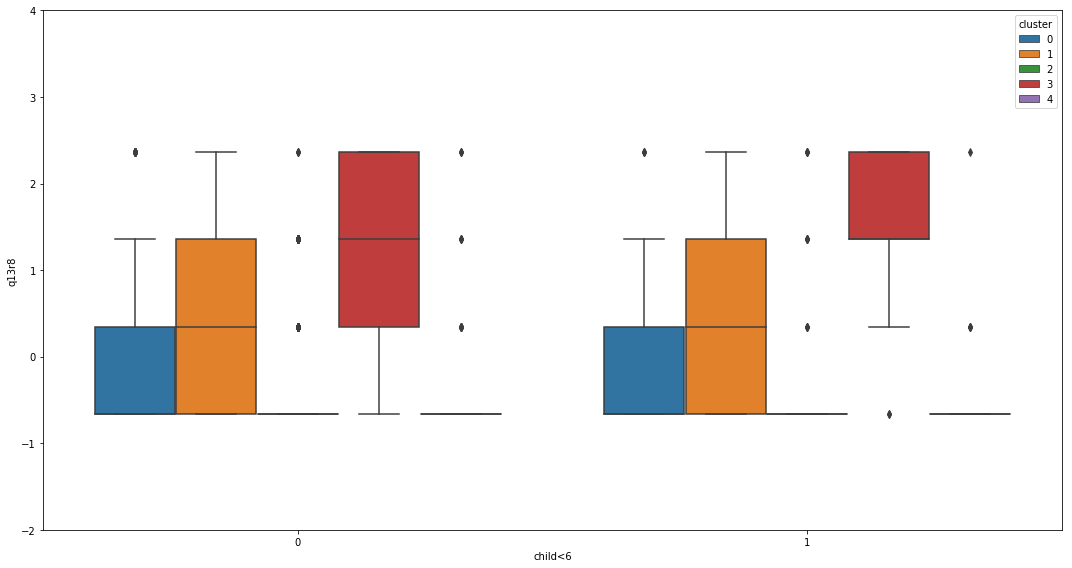

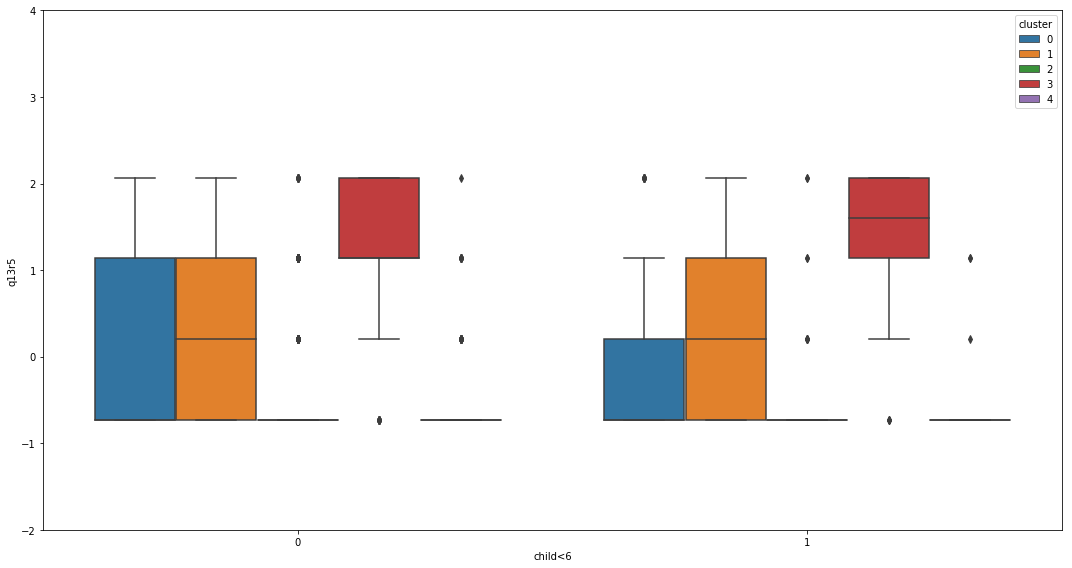

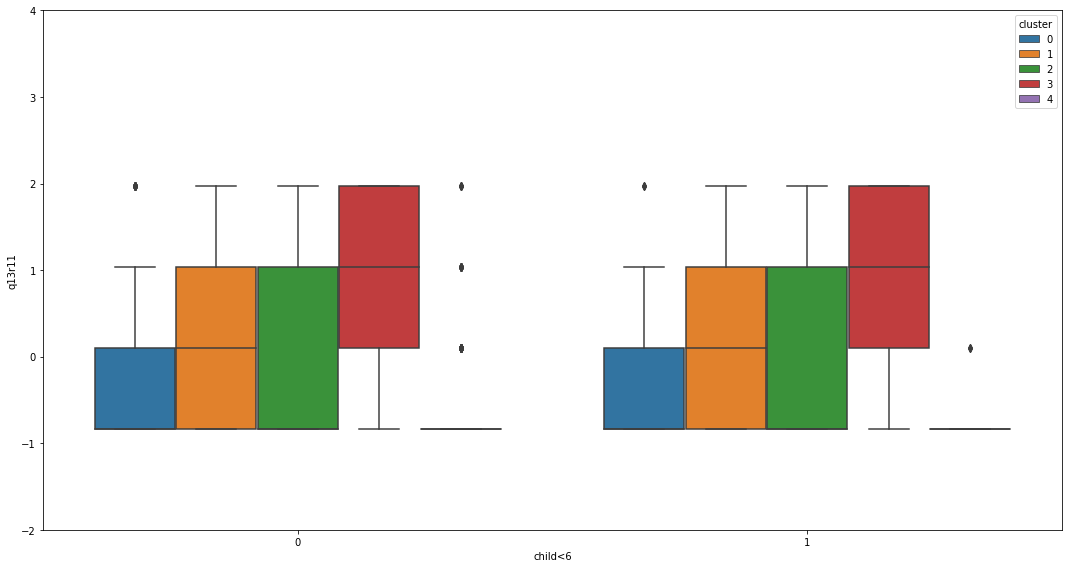

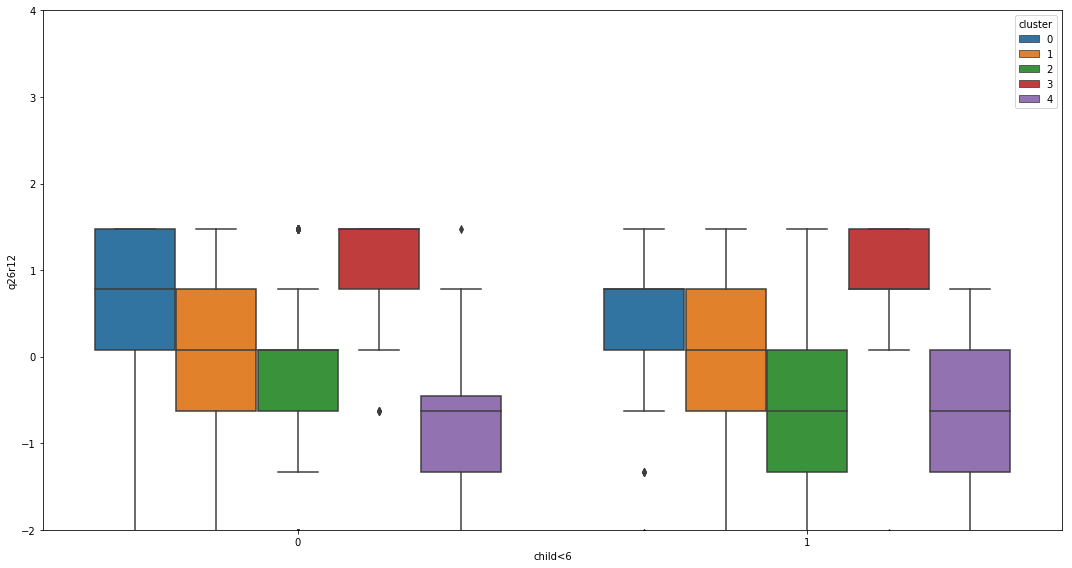

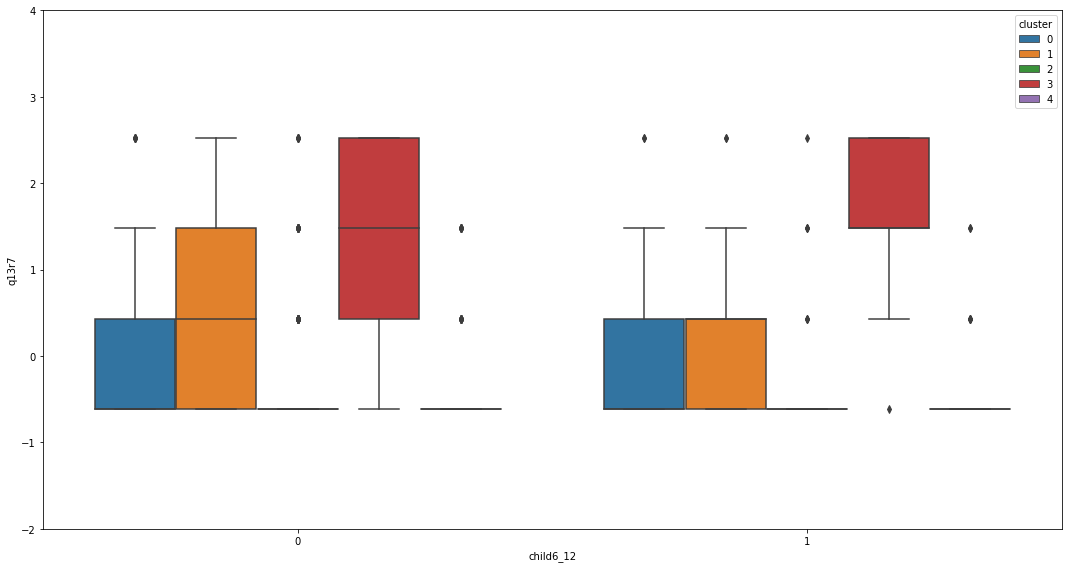

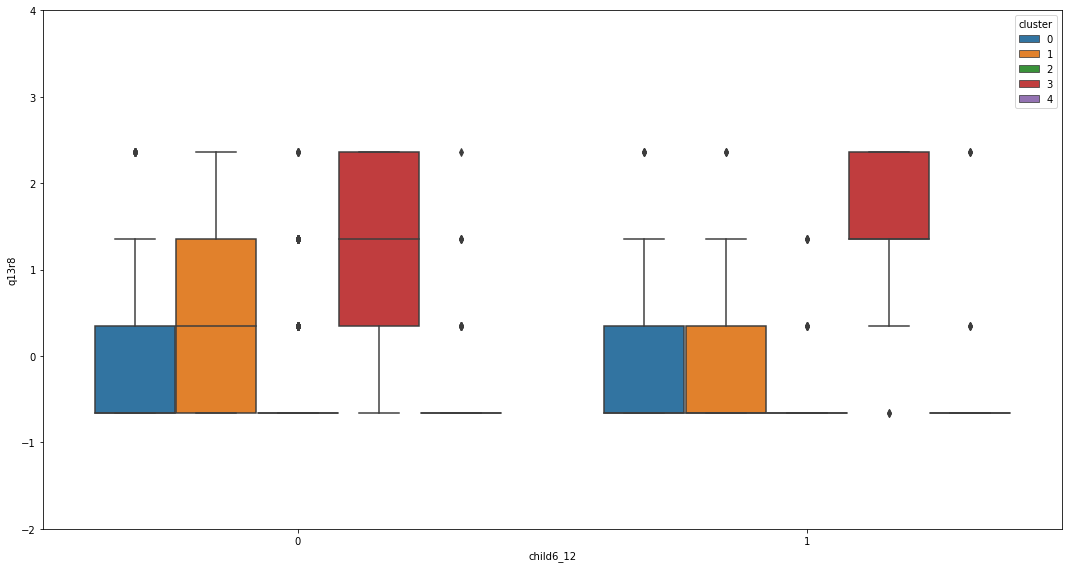

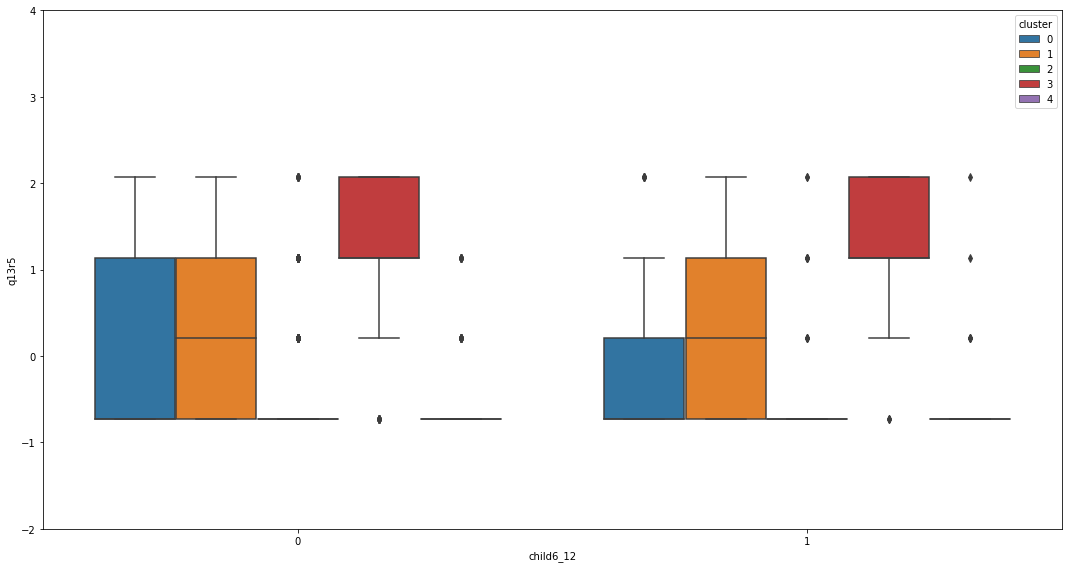

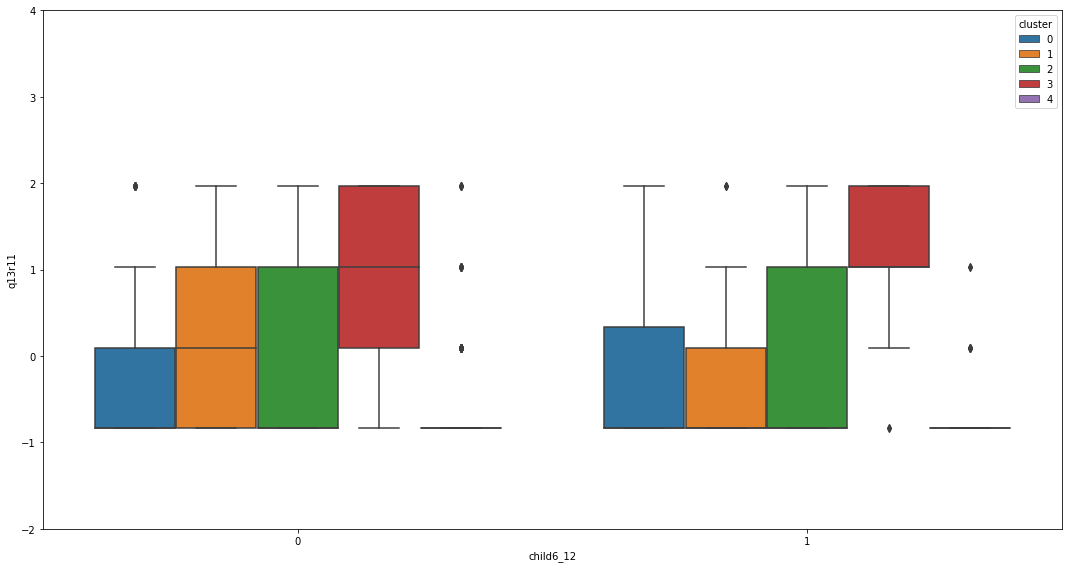

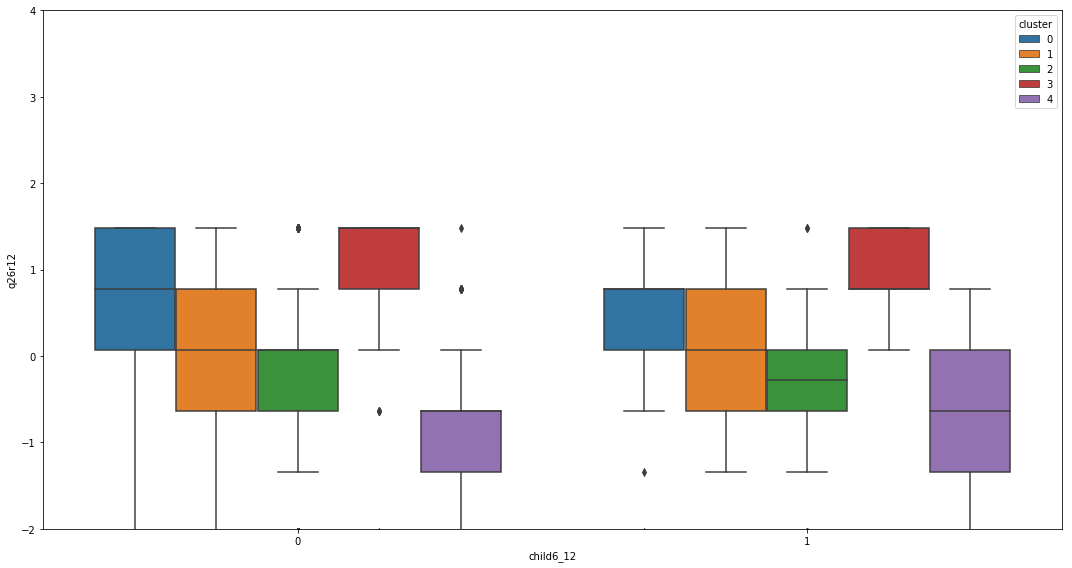

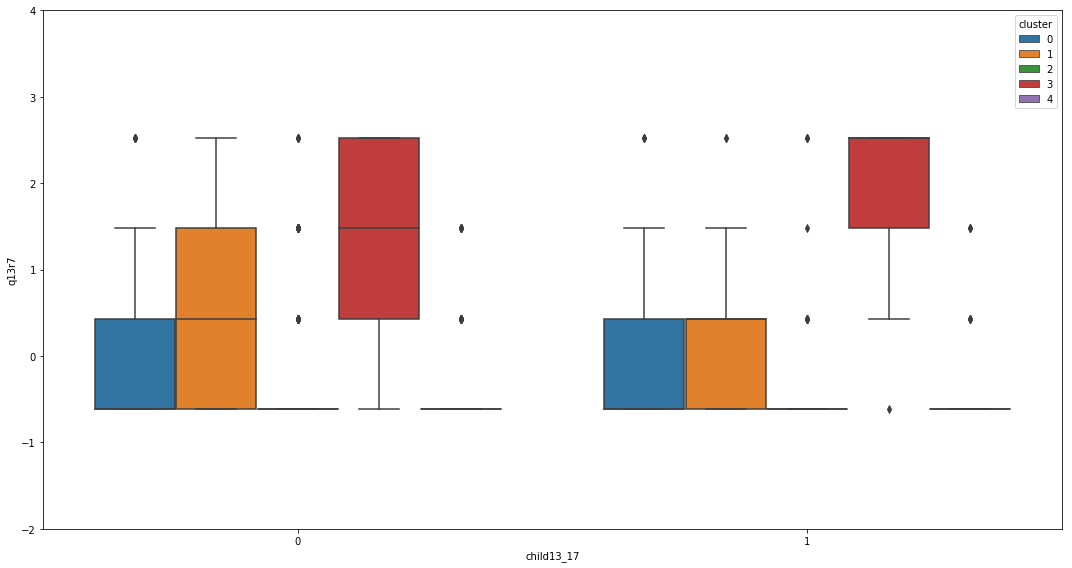

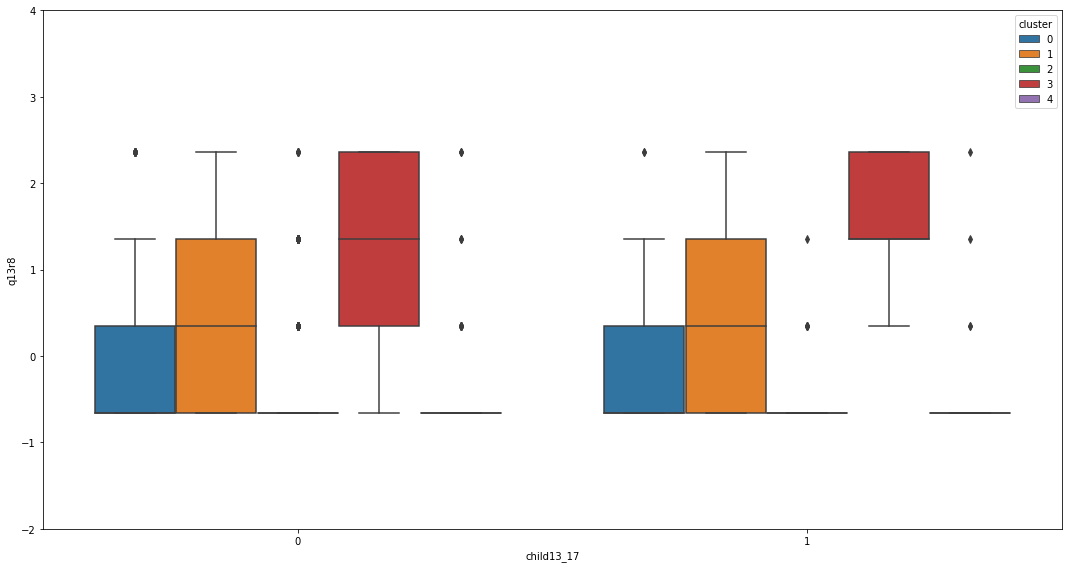

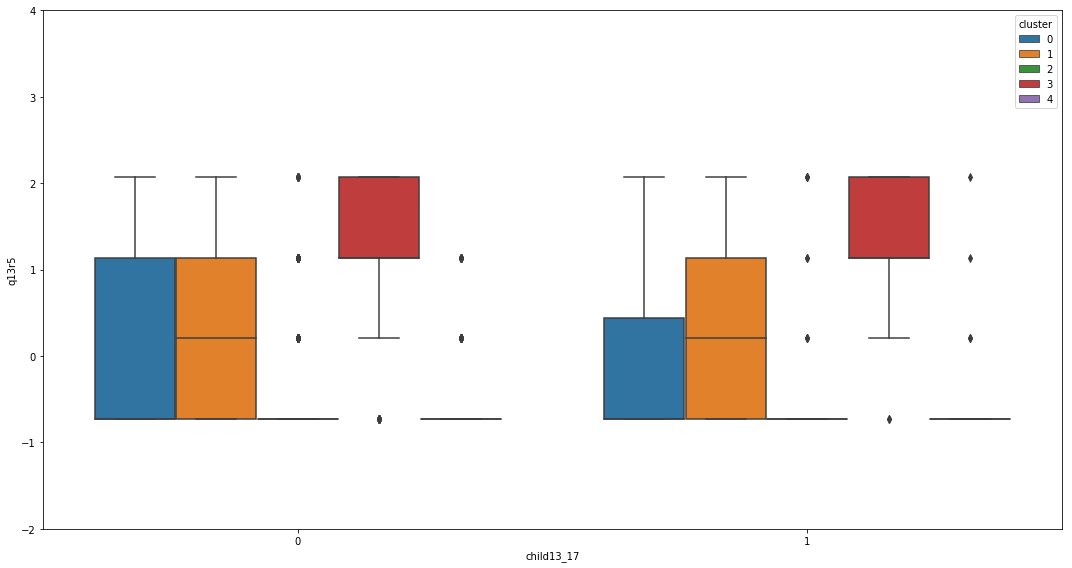

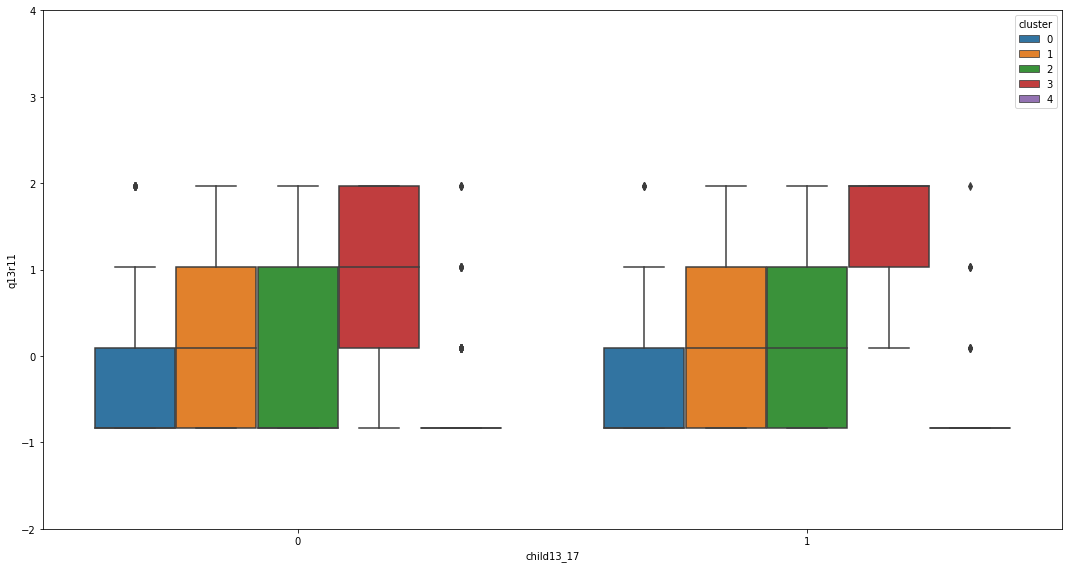

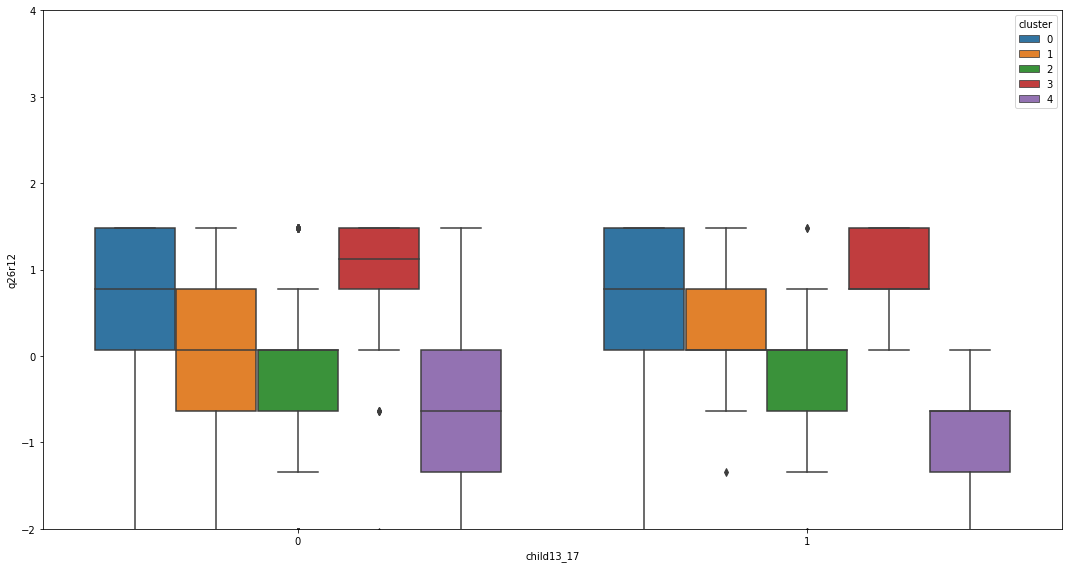

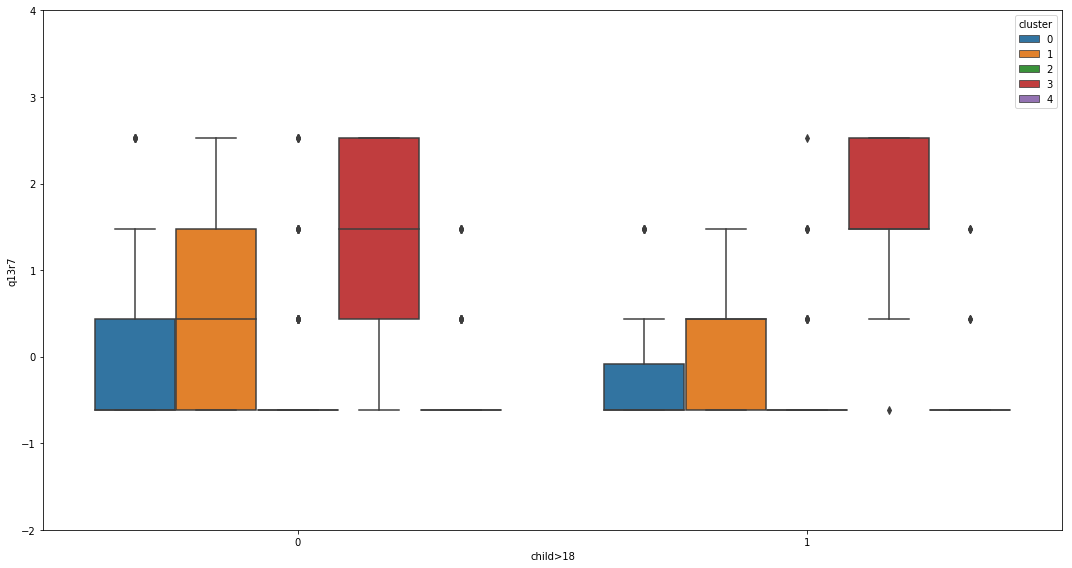

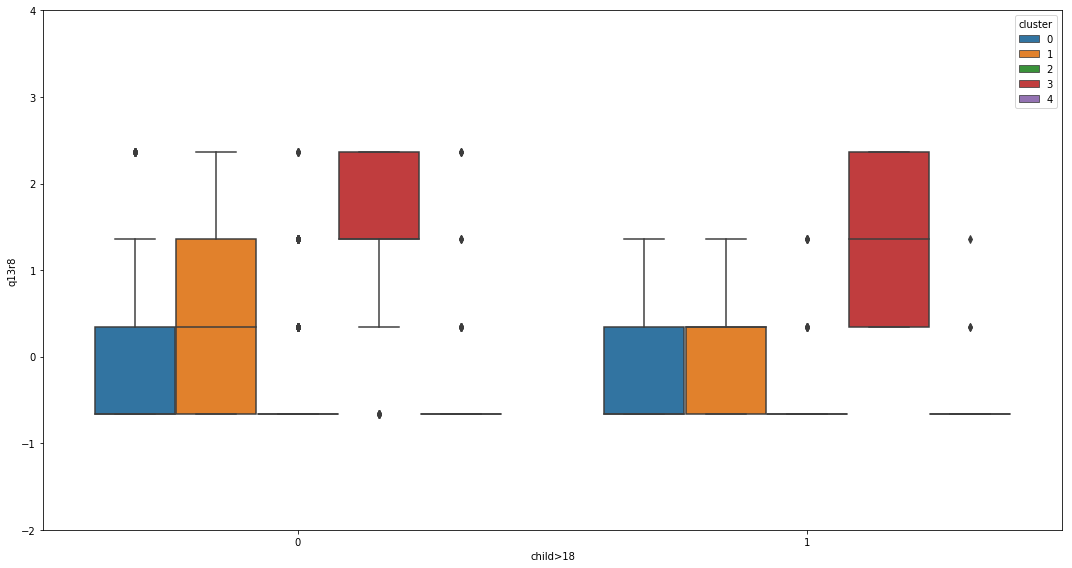

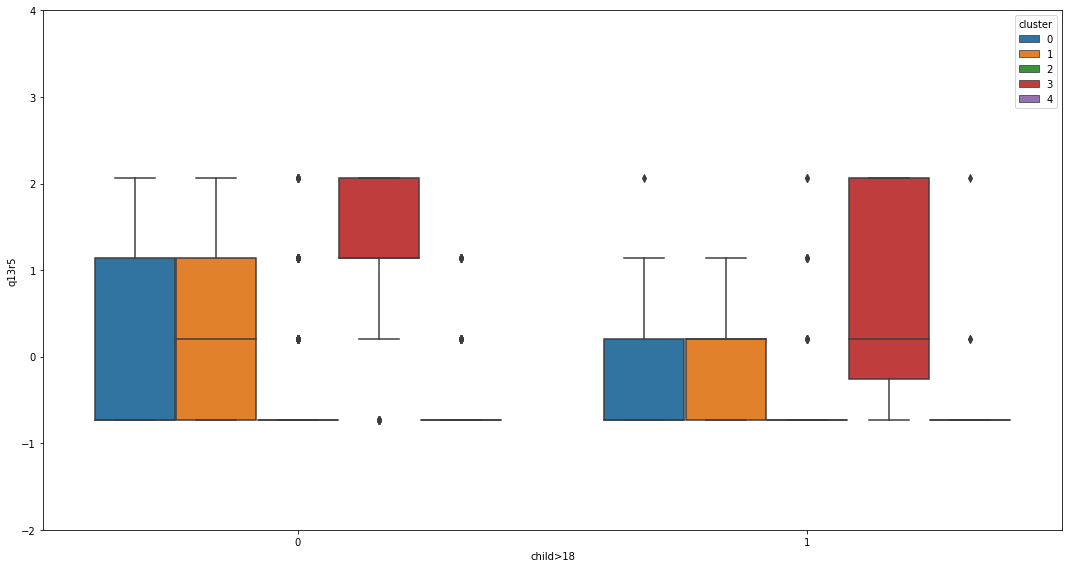

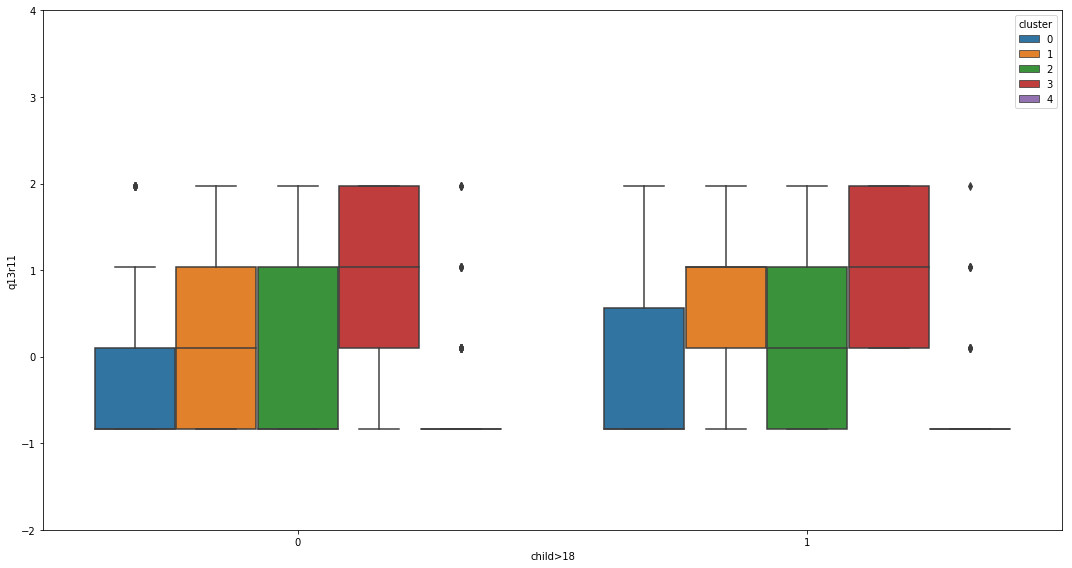

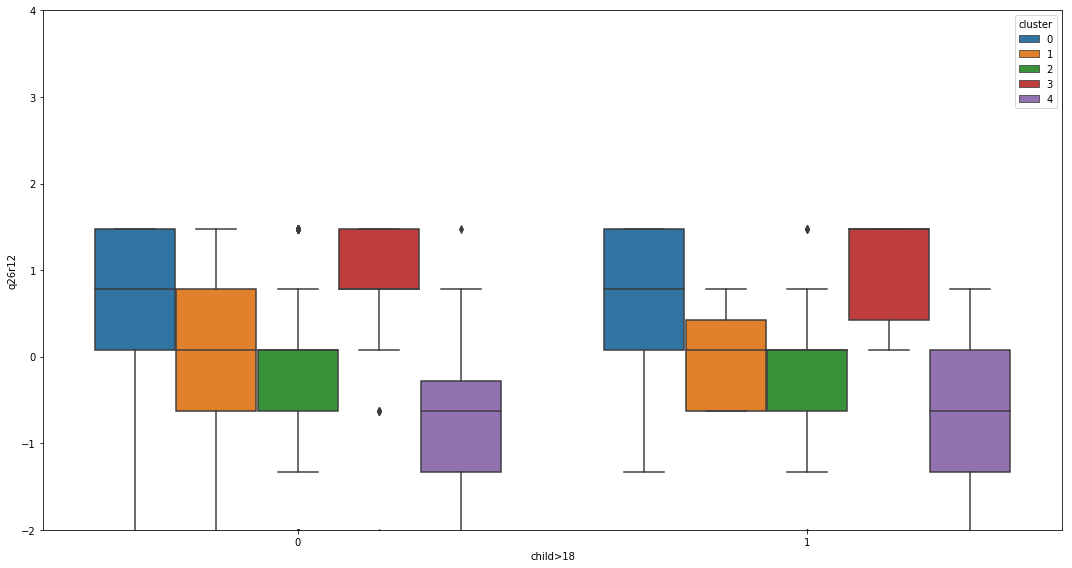

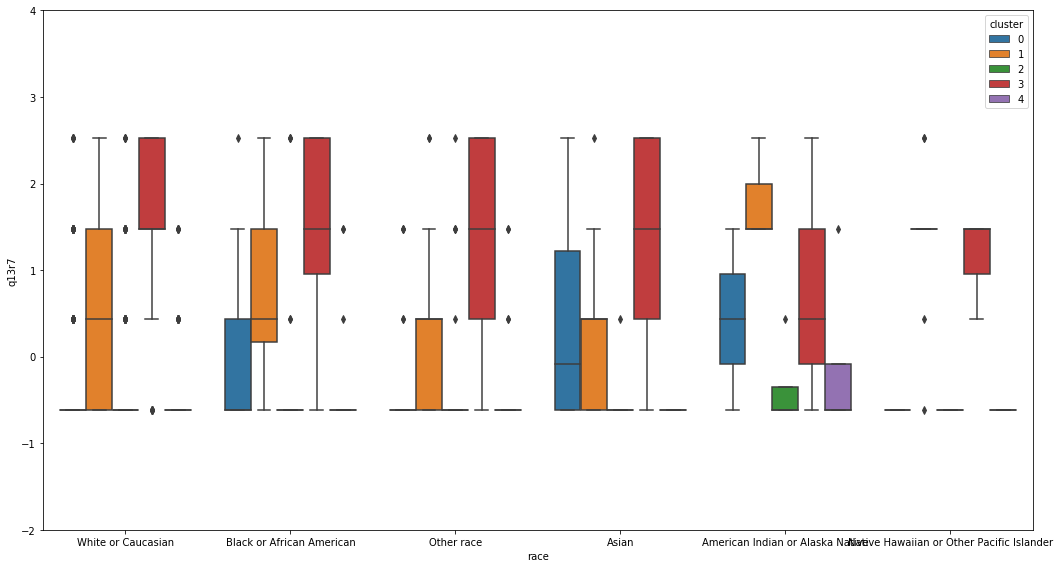

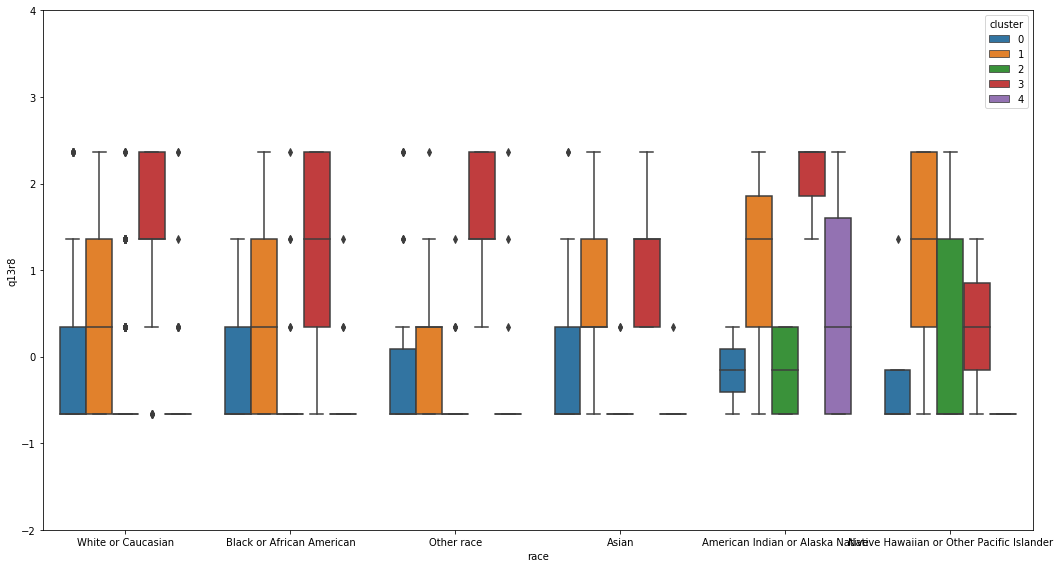

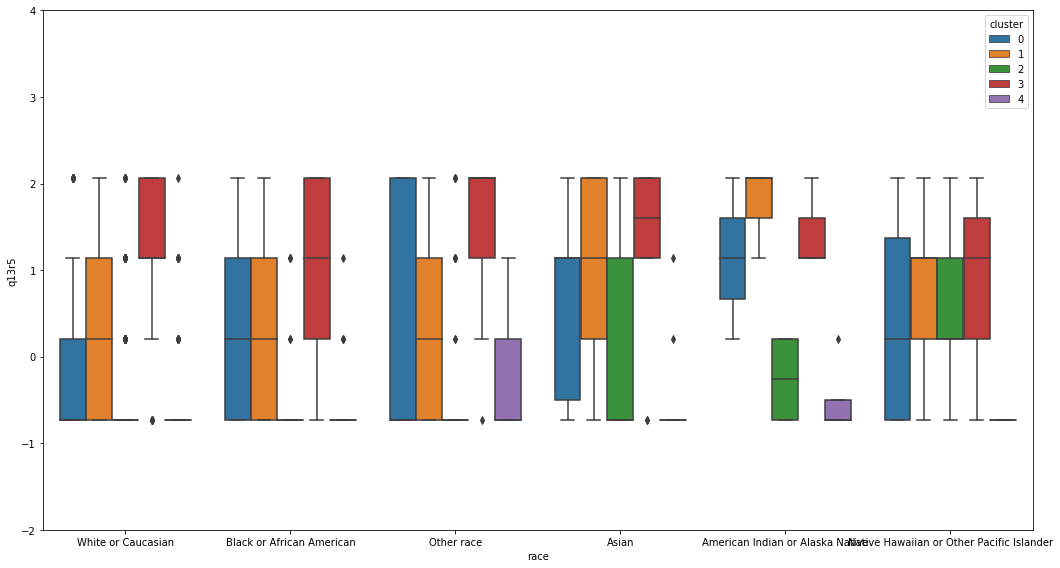

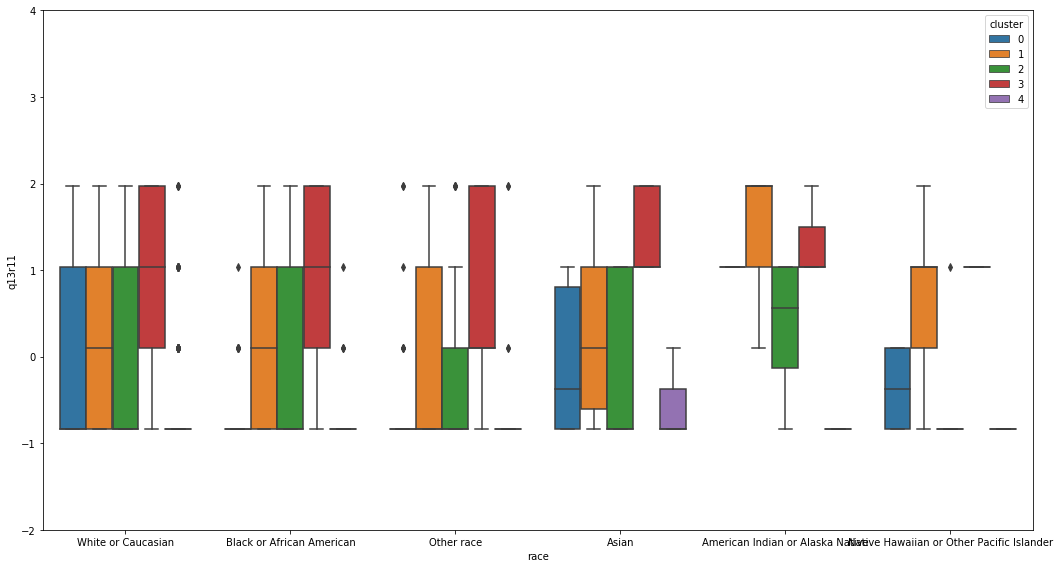

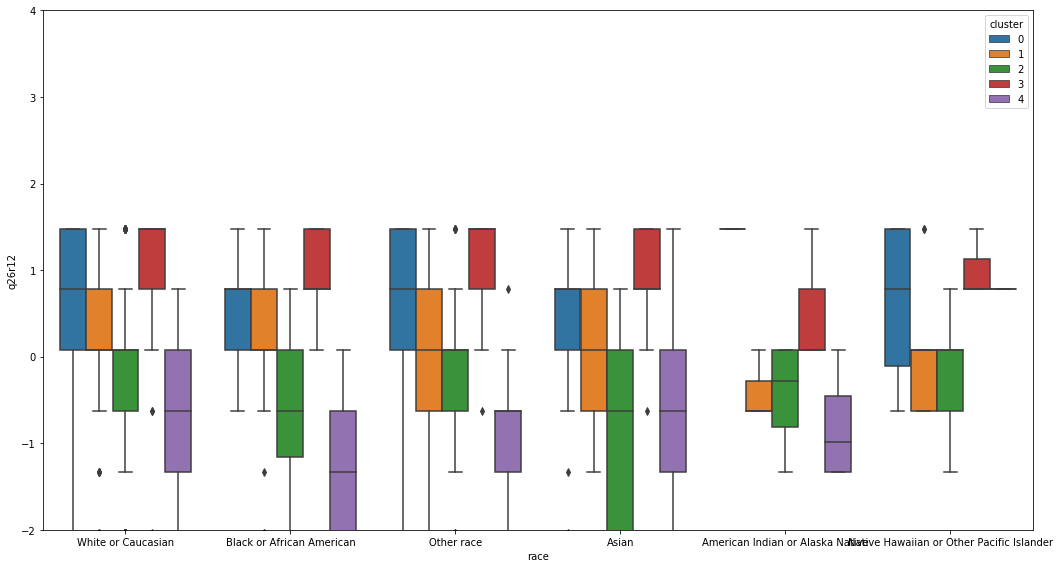

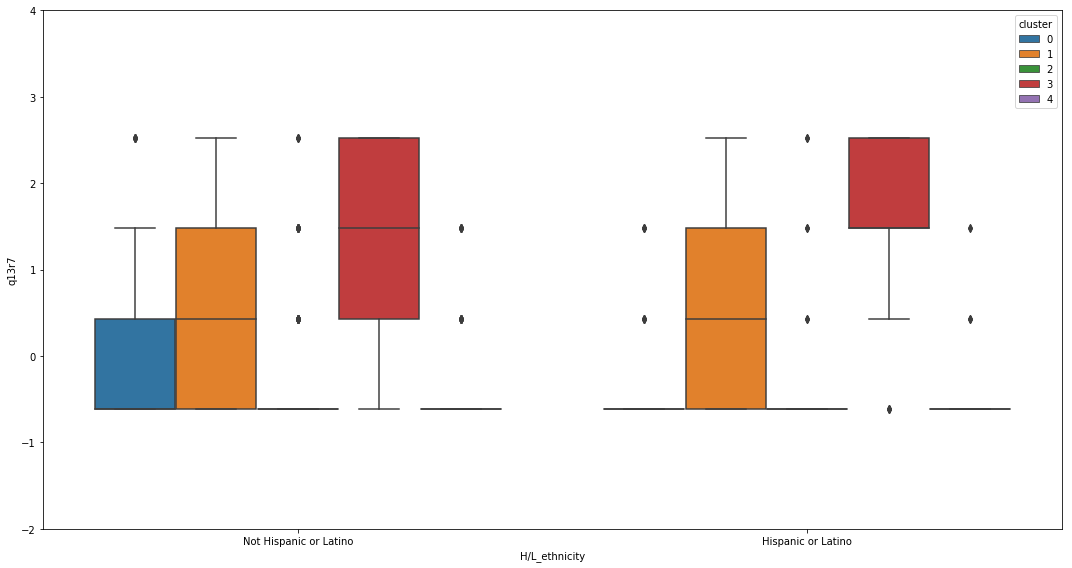

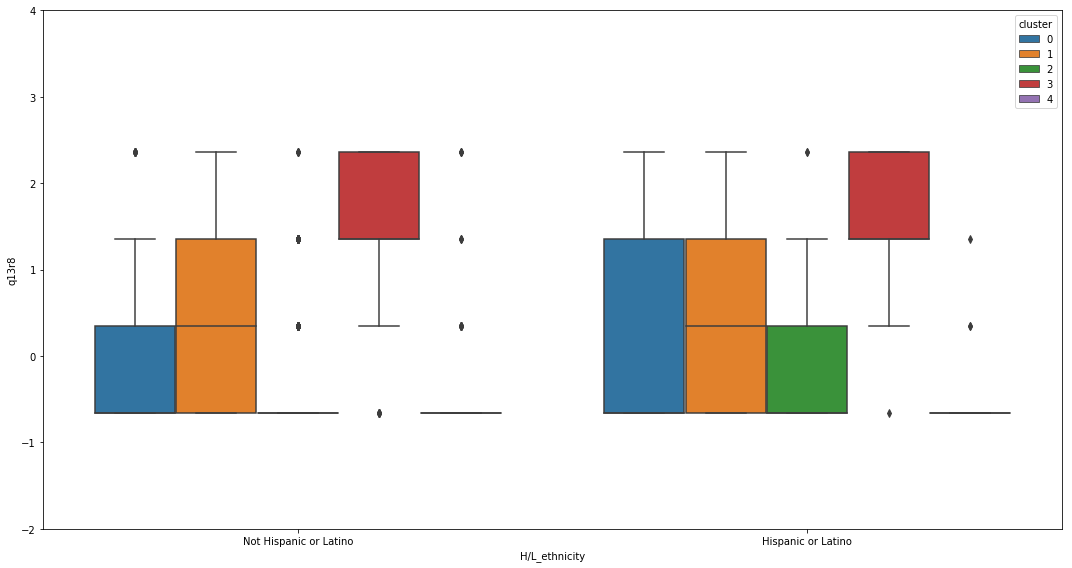

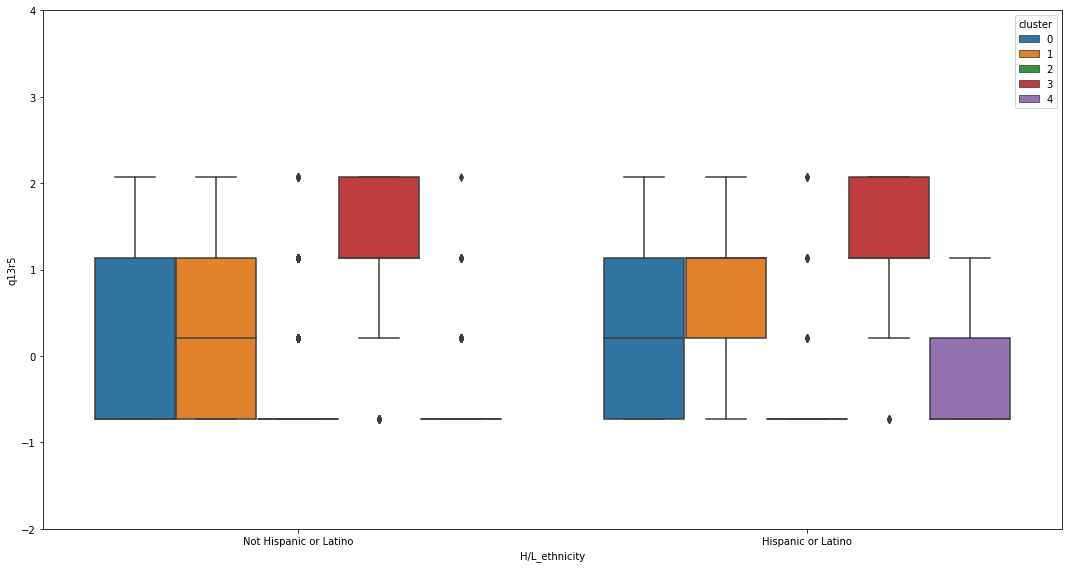

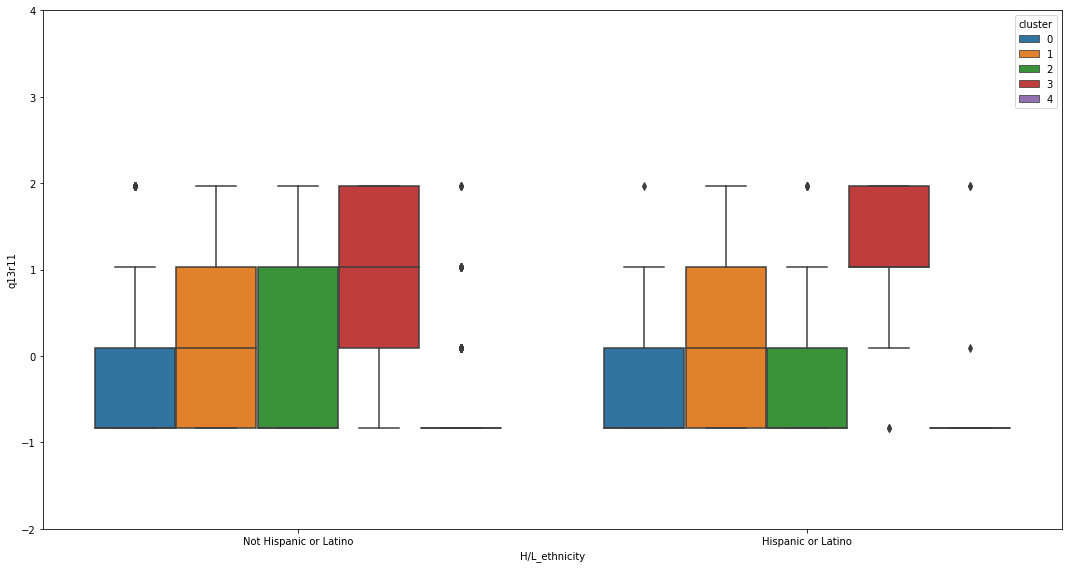

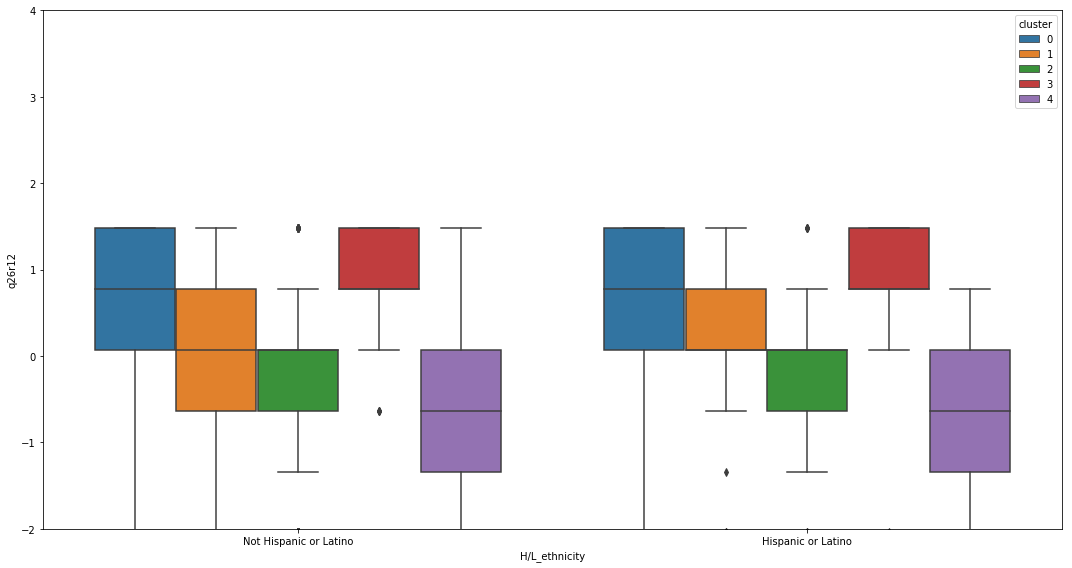

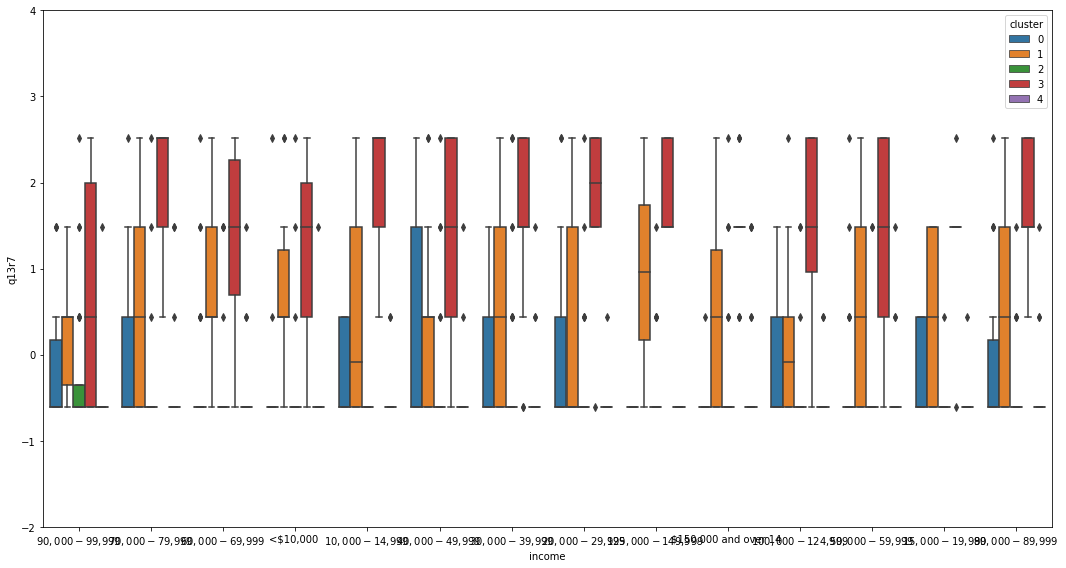

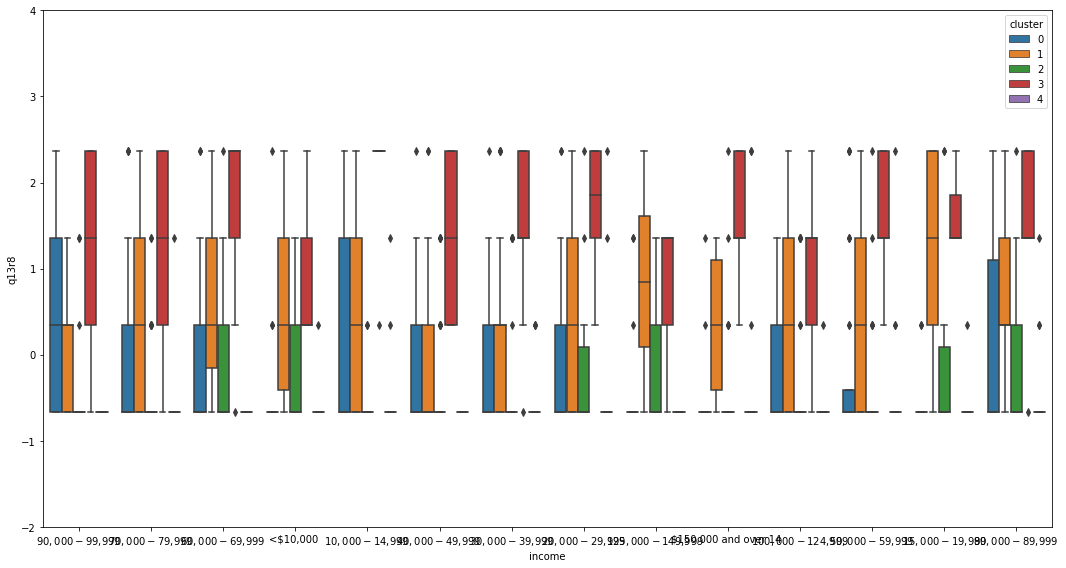

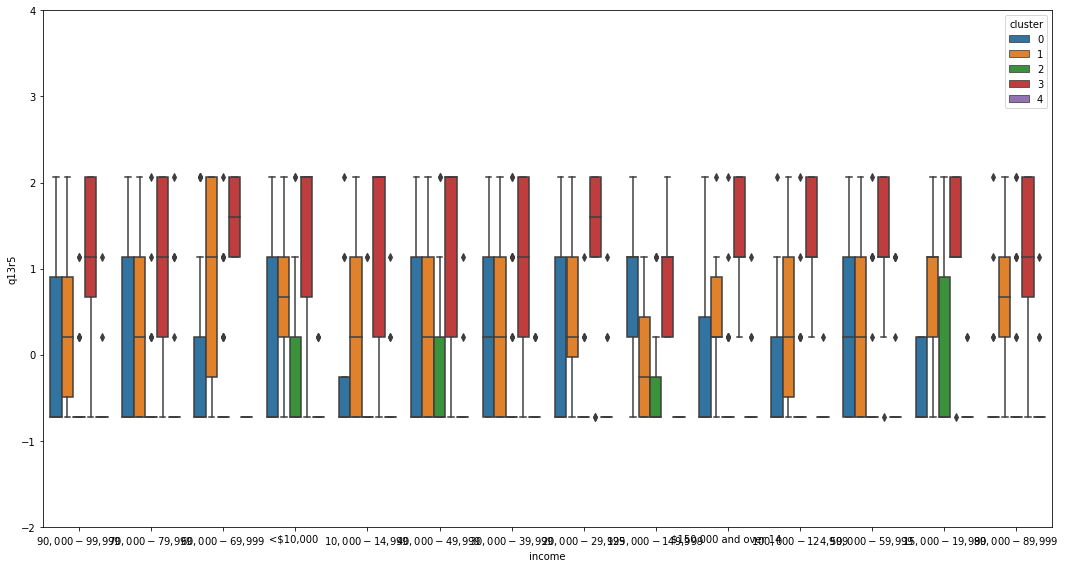

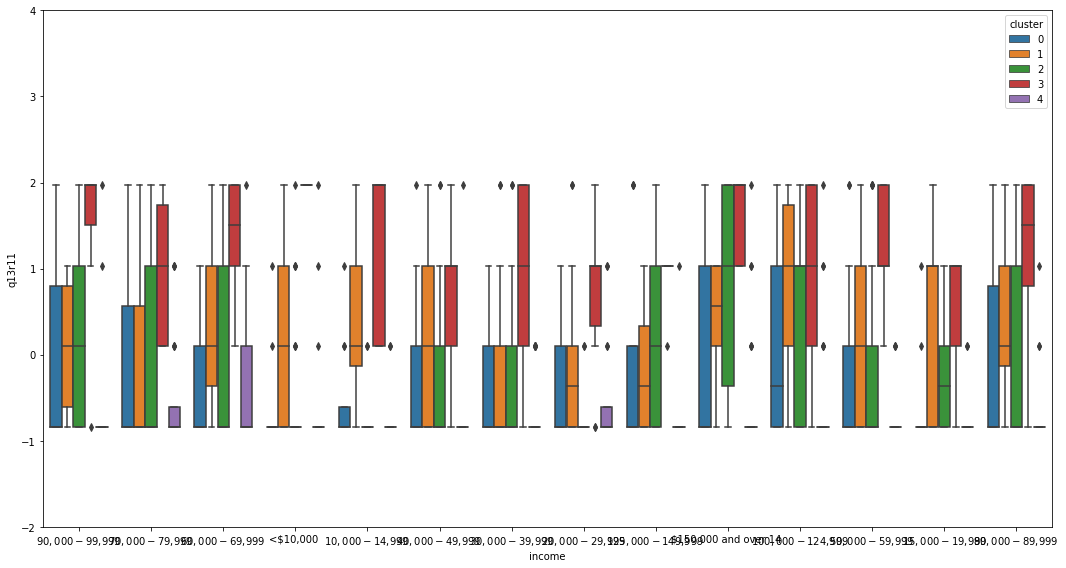

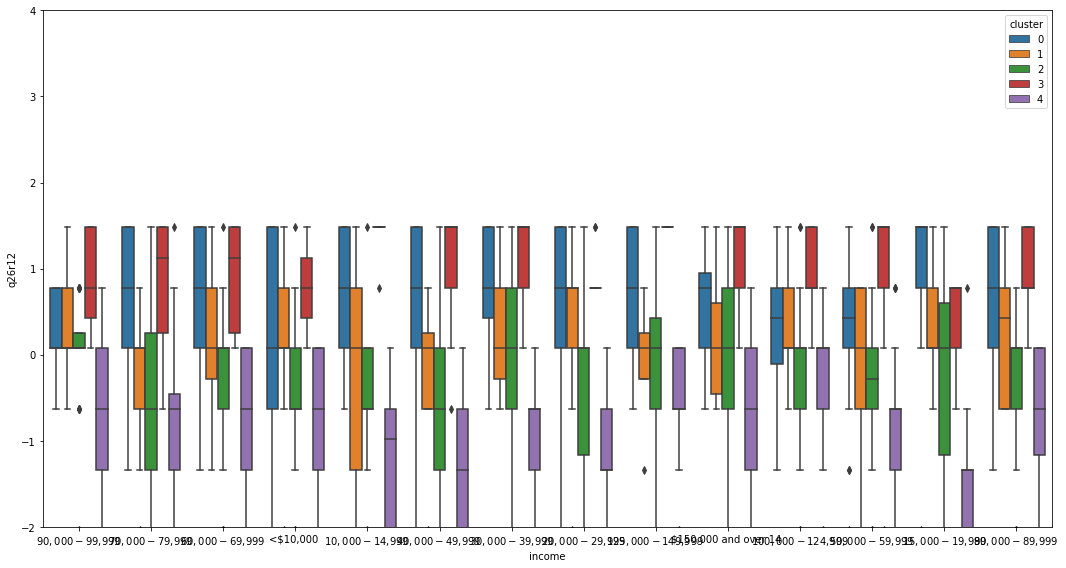

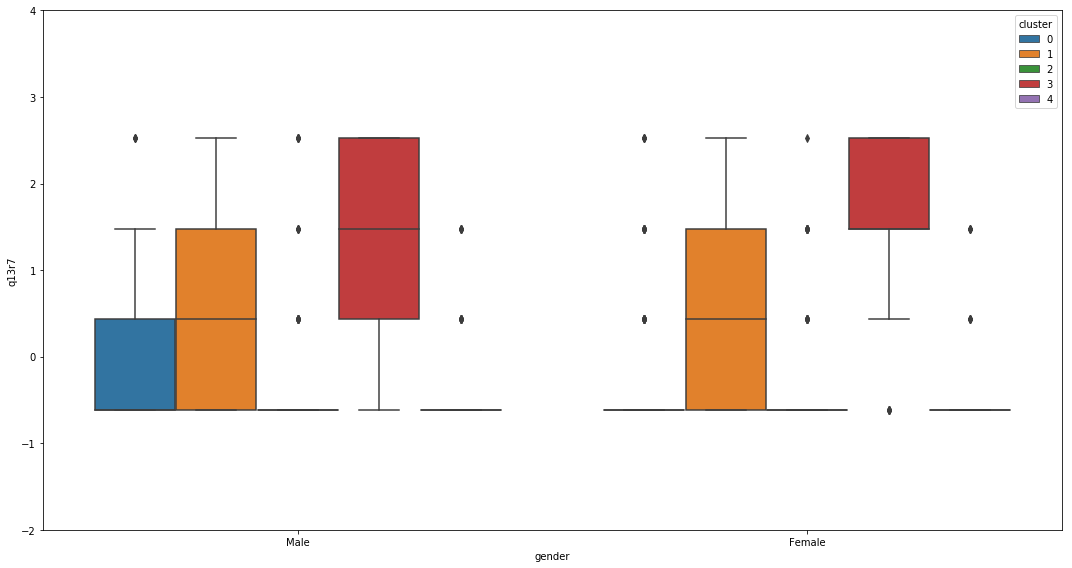

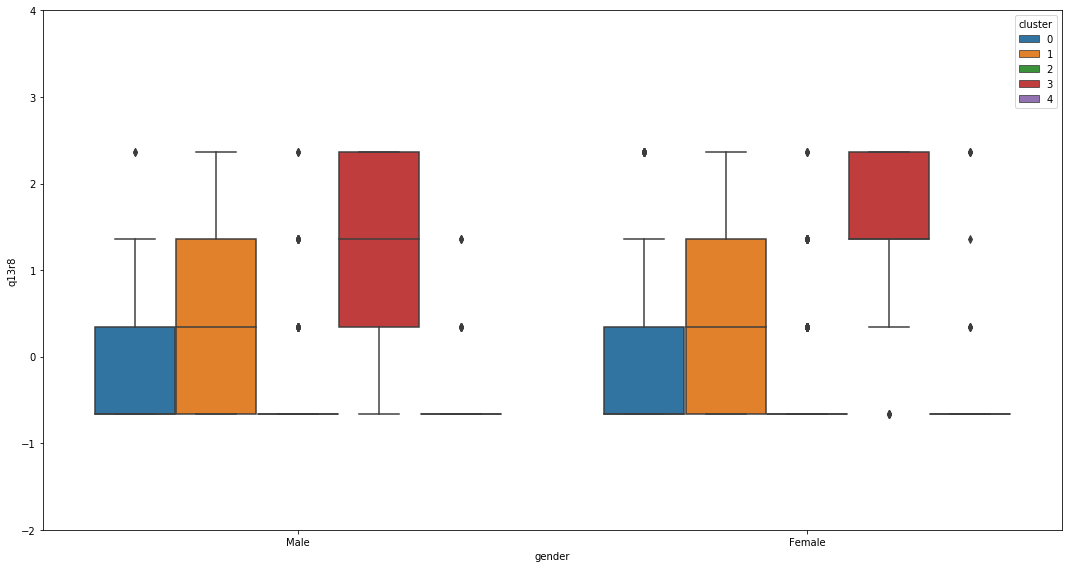

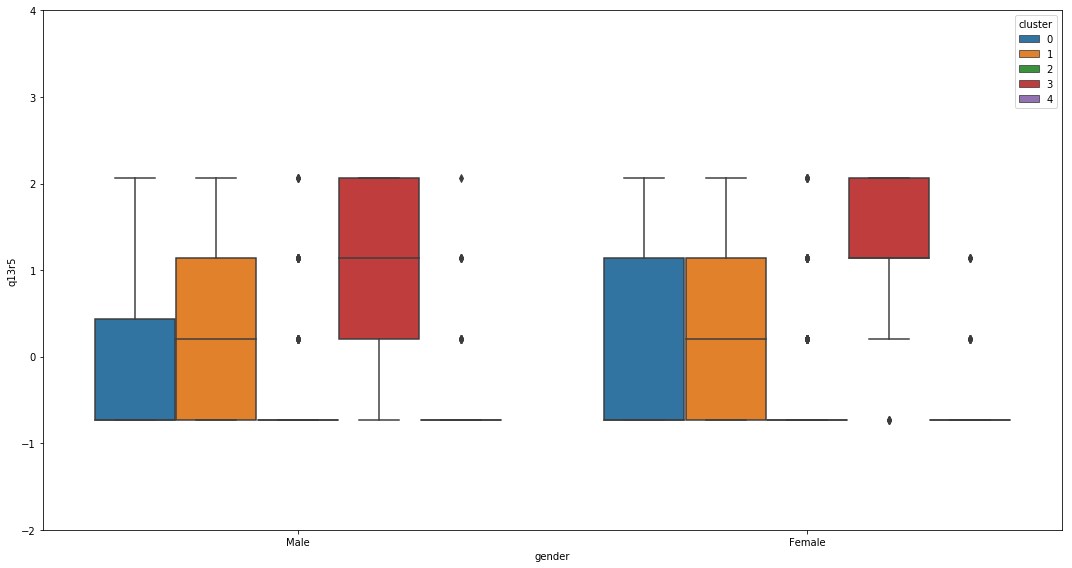

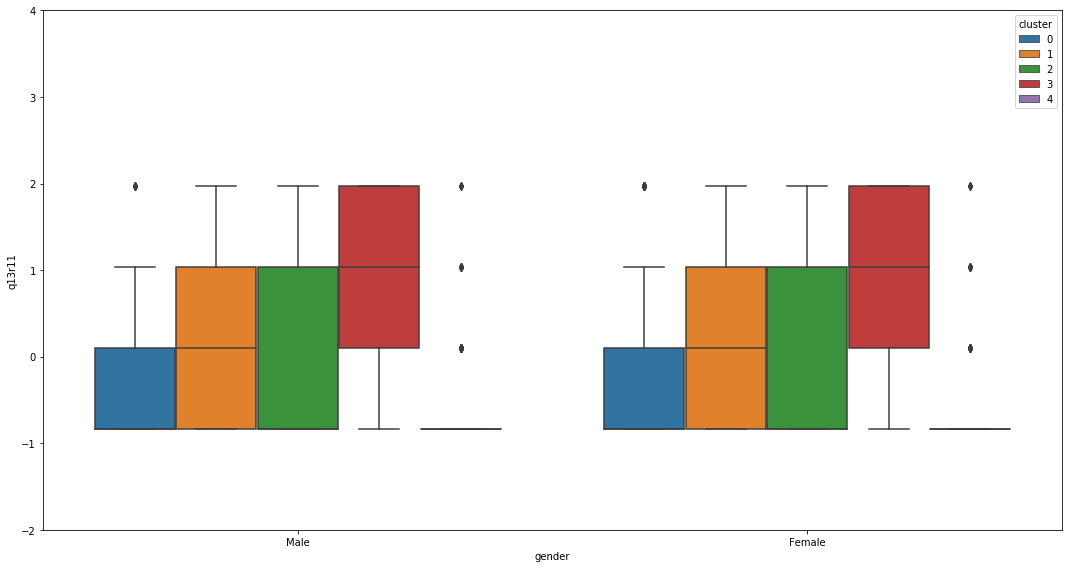

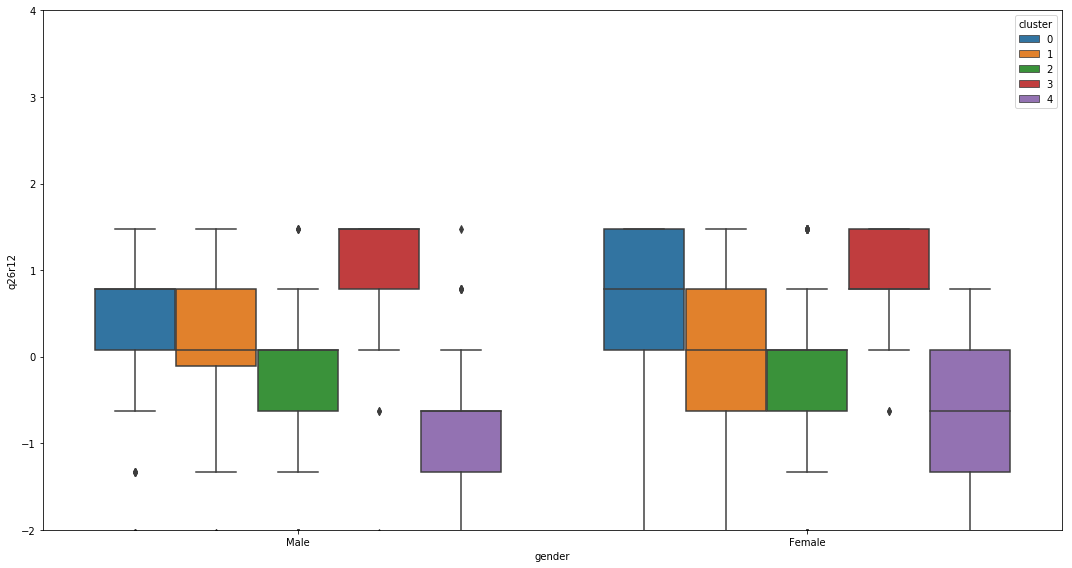

In [36]:
########################
## Cluster 3
########################

behavioral_names_3 = ['q13r7', 'q13r8', 'q13r5', 'q13r11', 'q26r12']

for c in category_names:
    for b in behavioral_names_3:
        fig, ax = plt.subplots(figsize = (15, 8))
        sns.boxplot(x = c,
                    y = b,
                    hue = 'cluster',
                    data = final_clusters_df)

        plt.ylim(-2, 4)
        plt.tight_layout()
        plt.show()

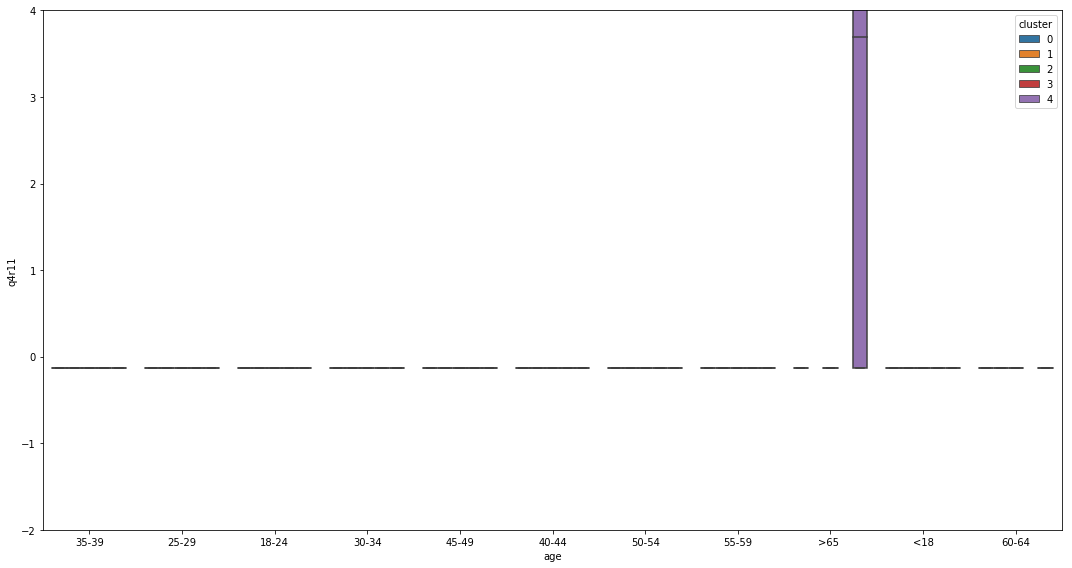

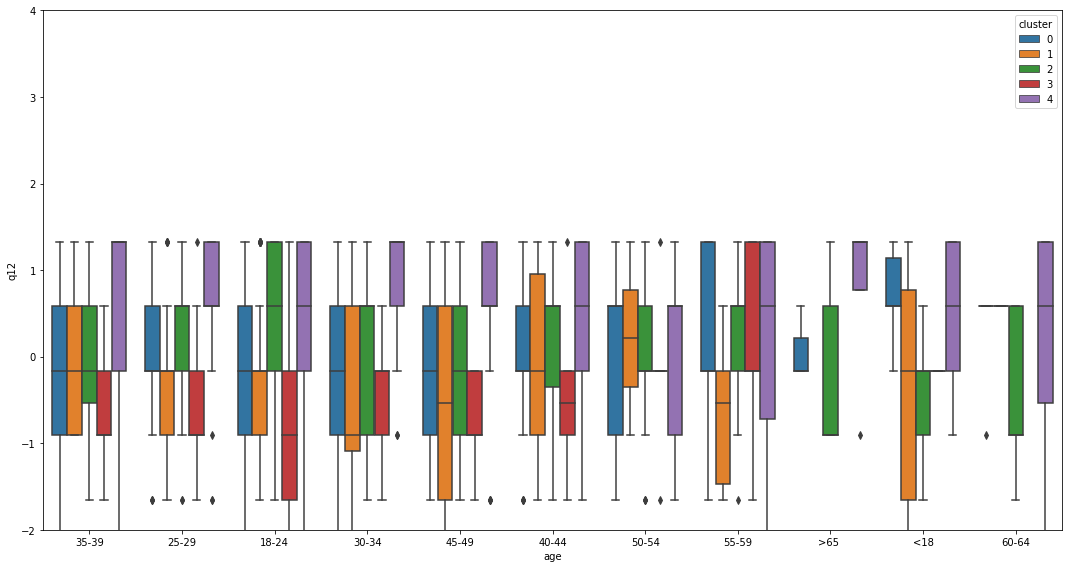

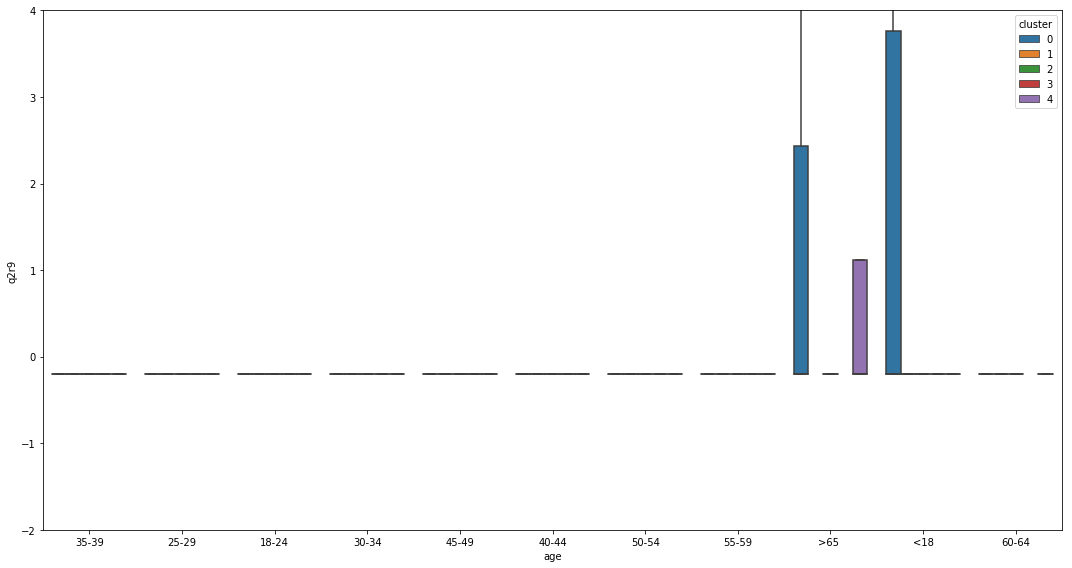

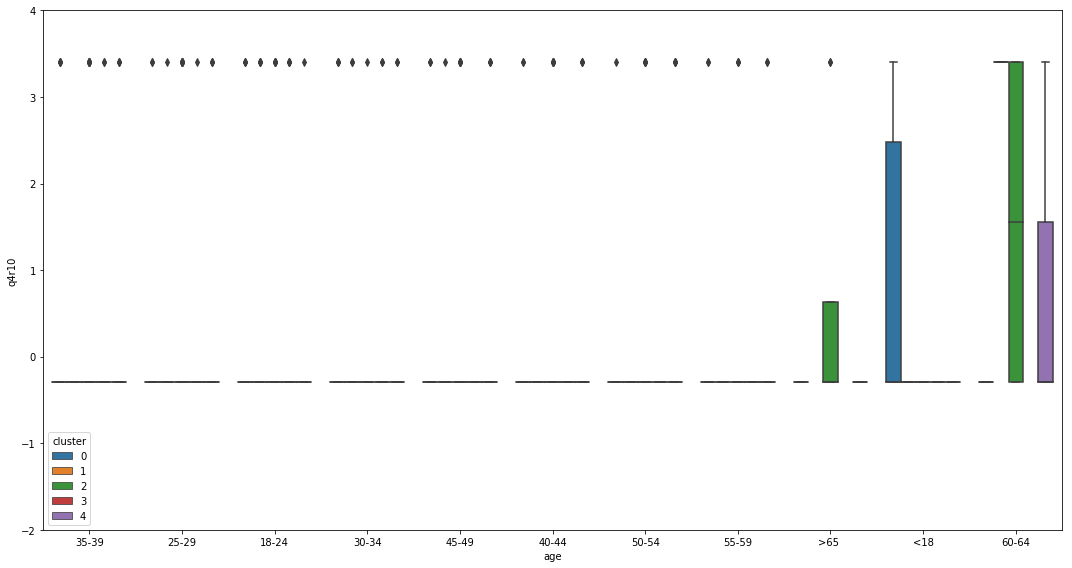

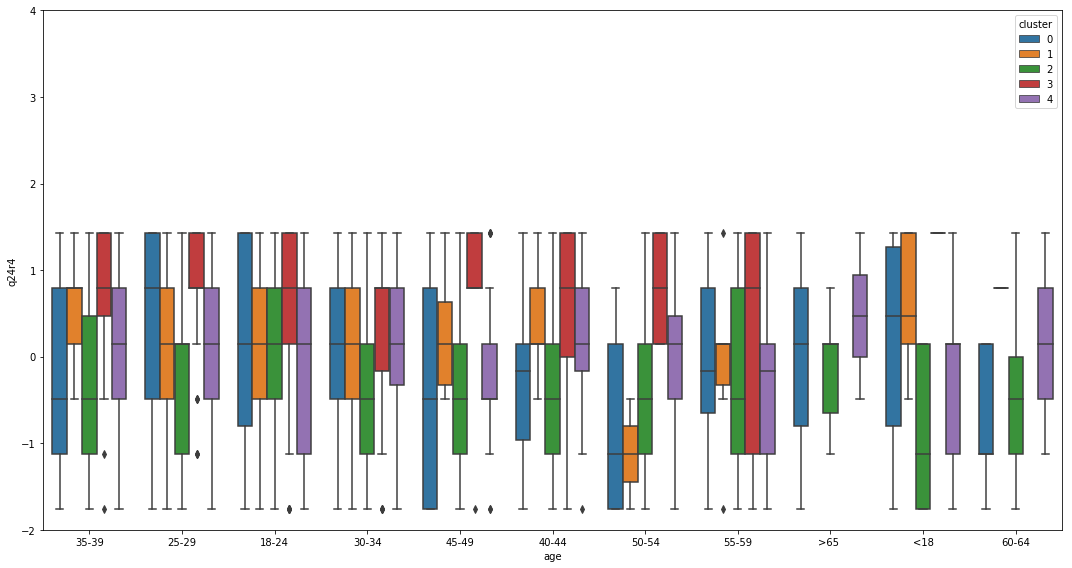

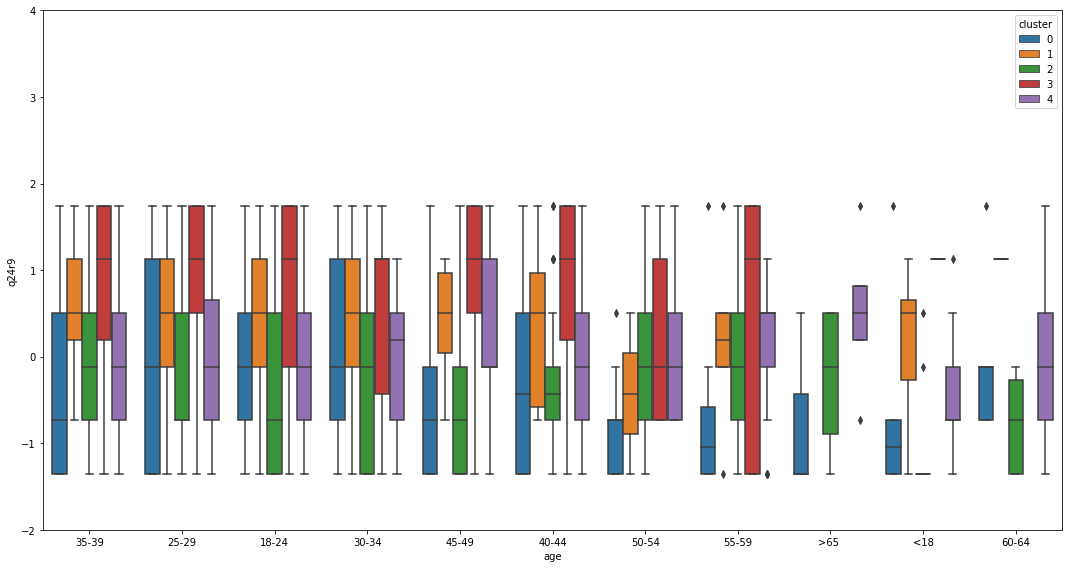

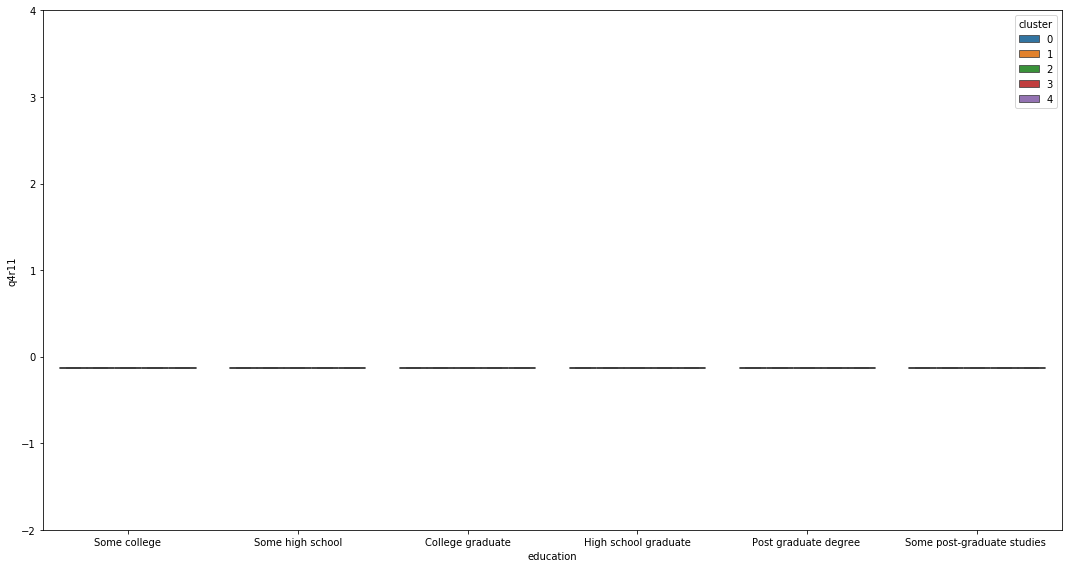

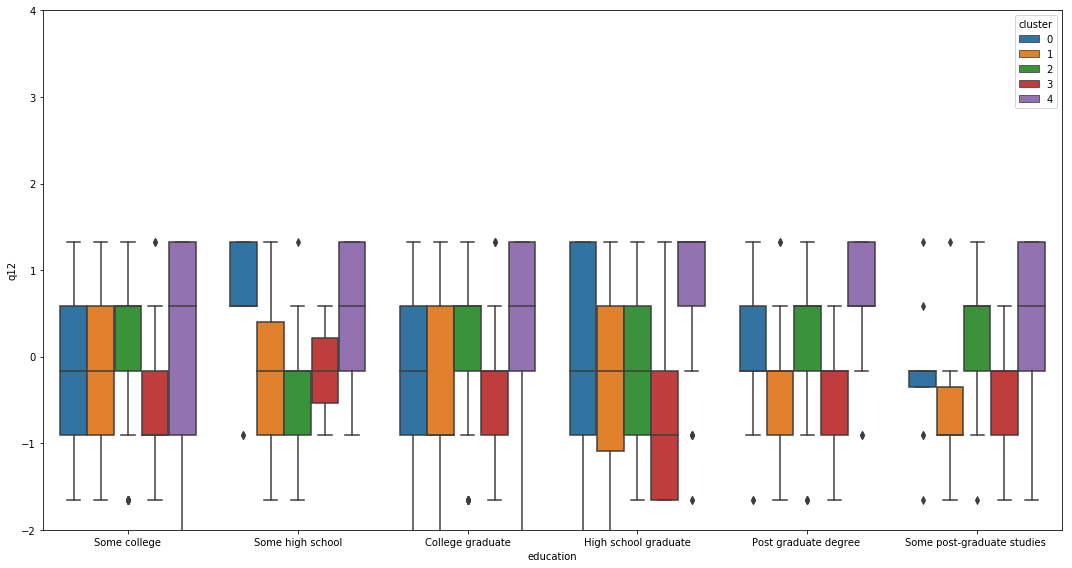

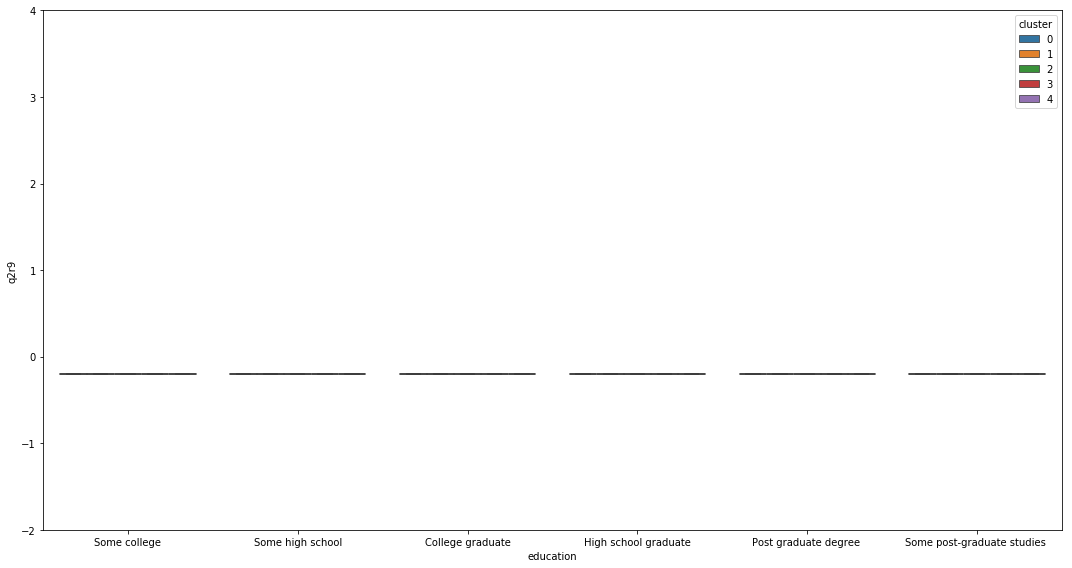

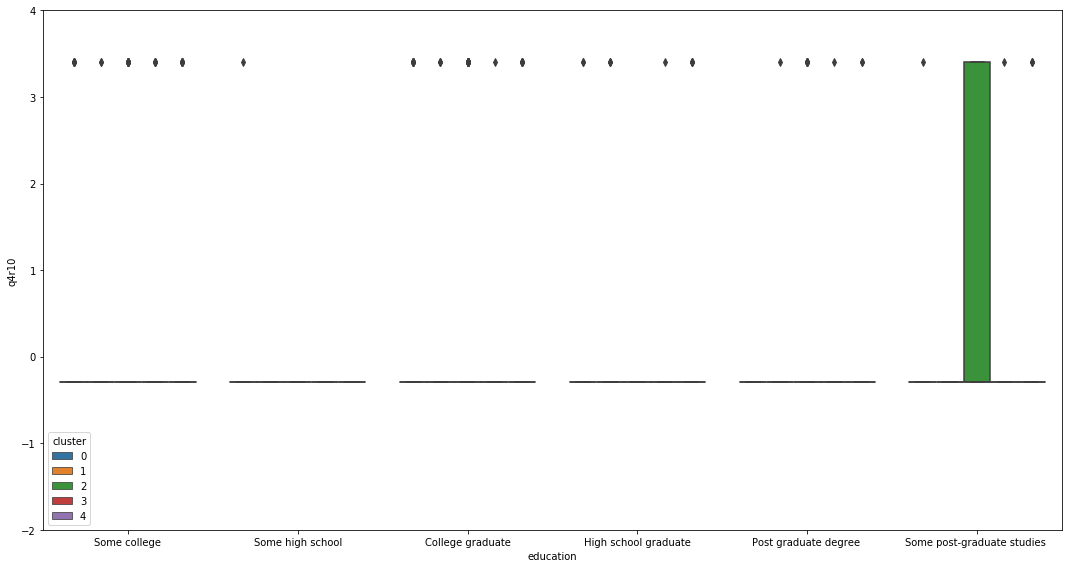

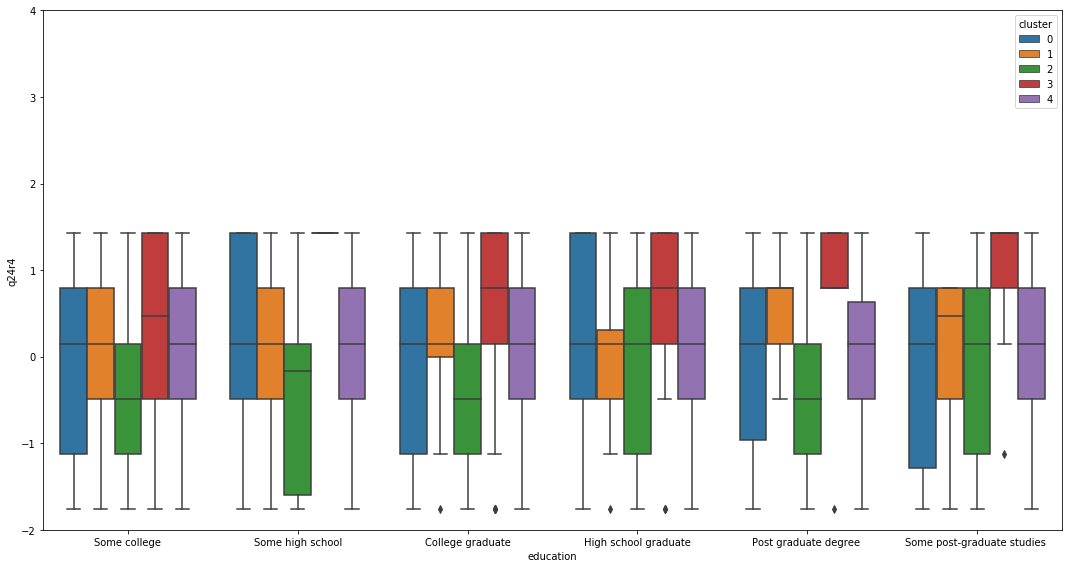

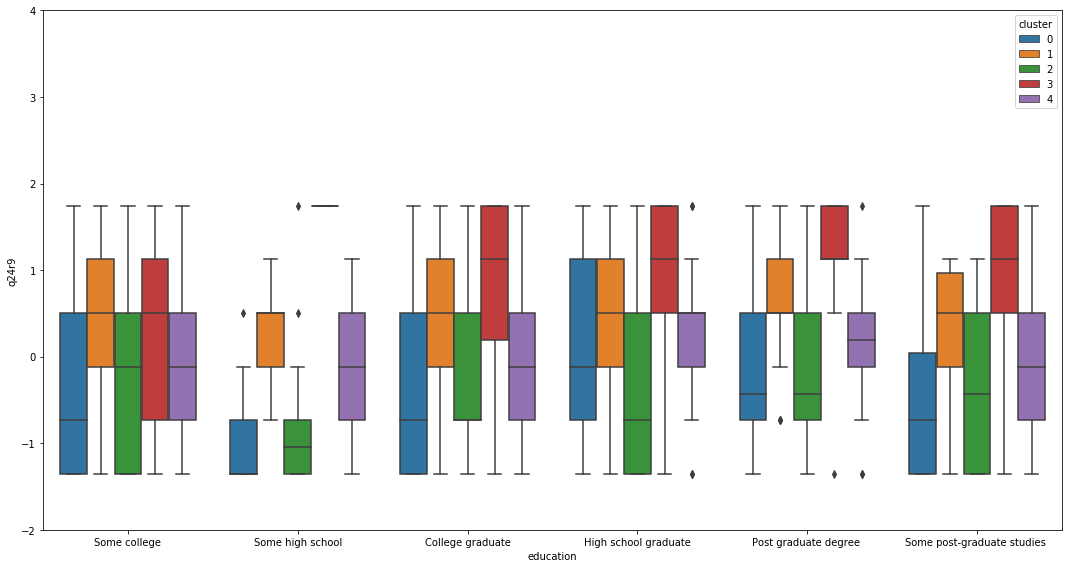

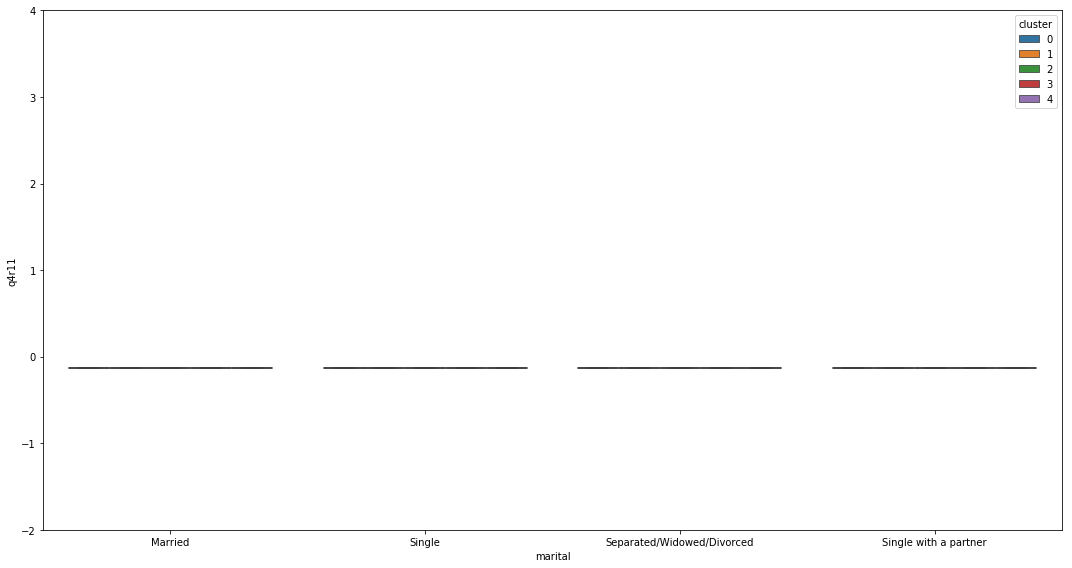

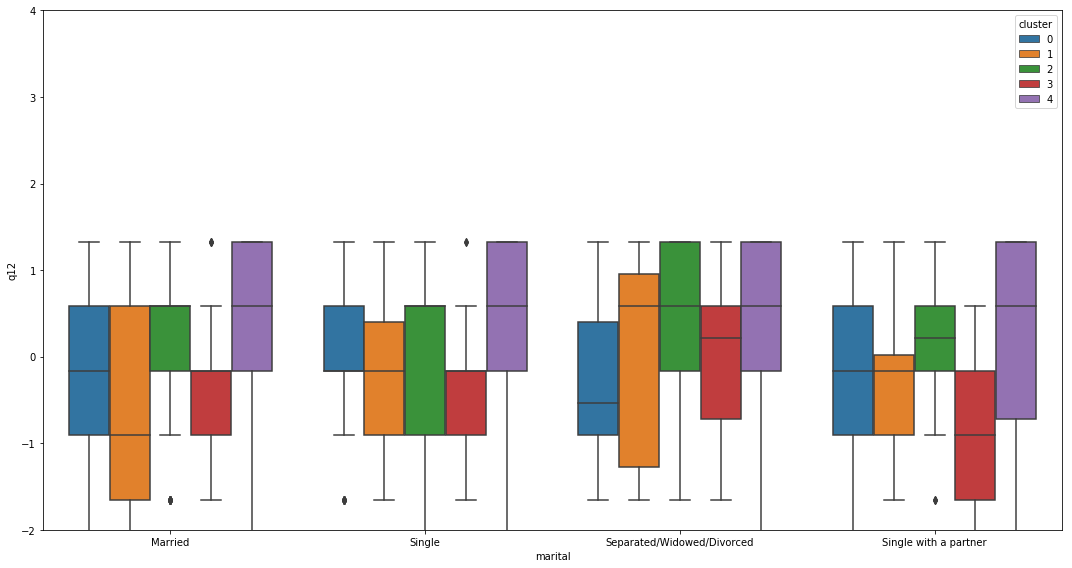

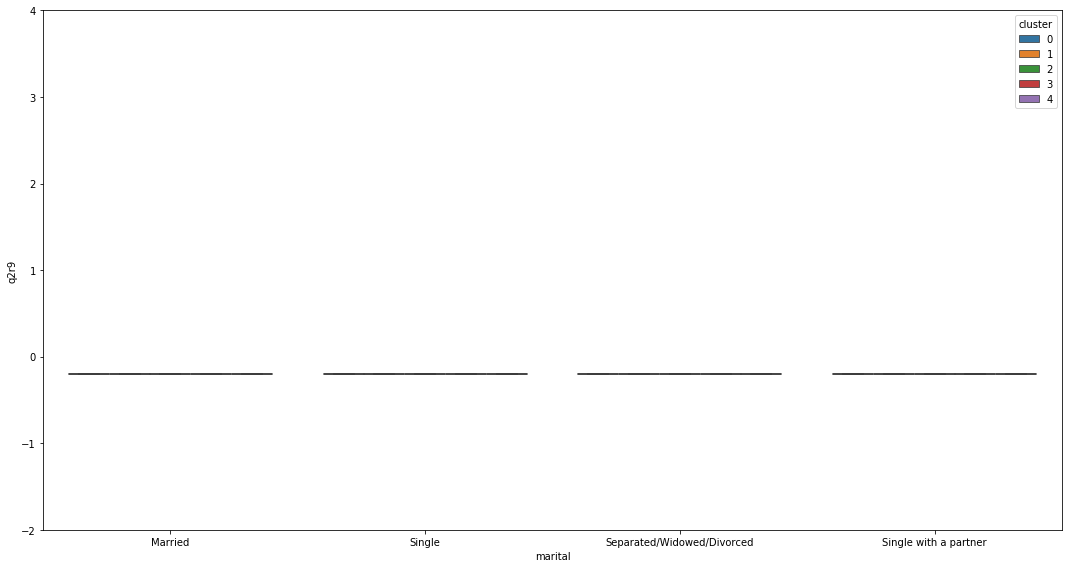

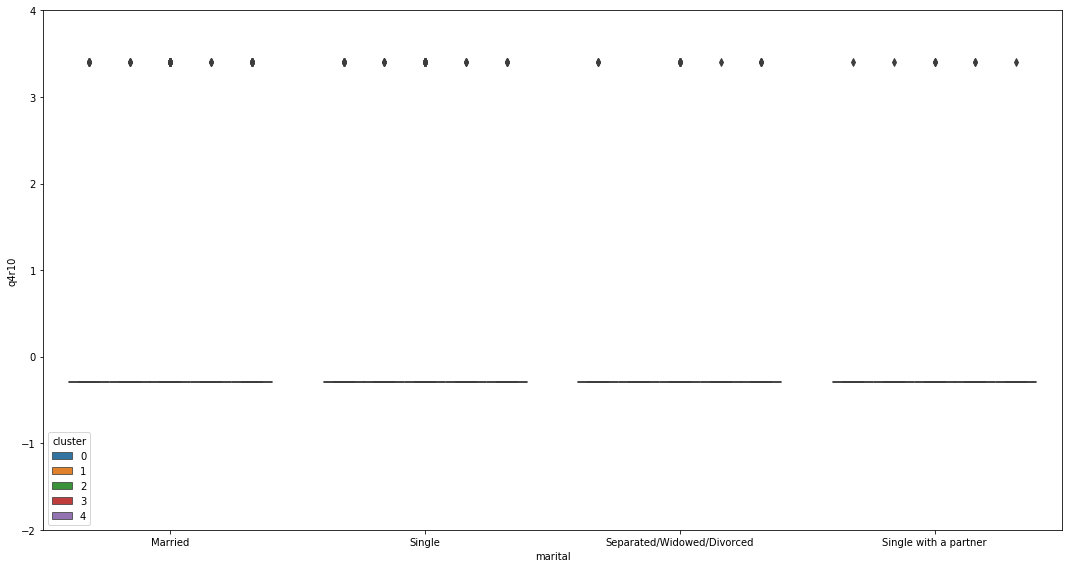

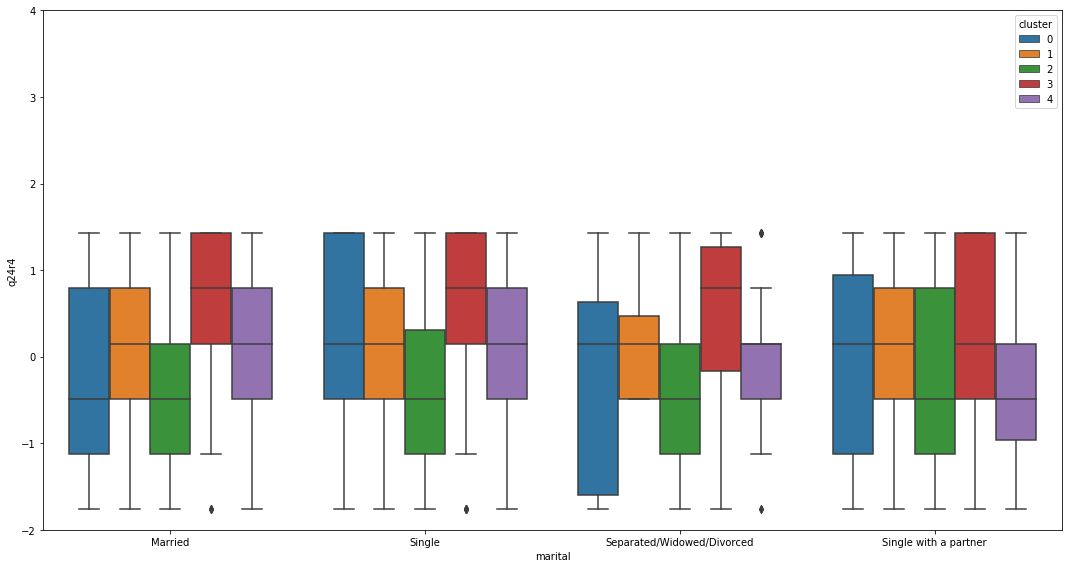

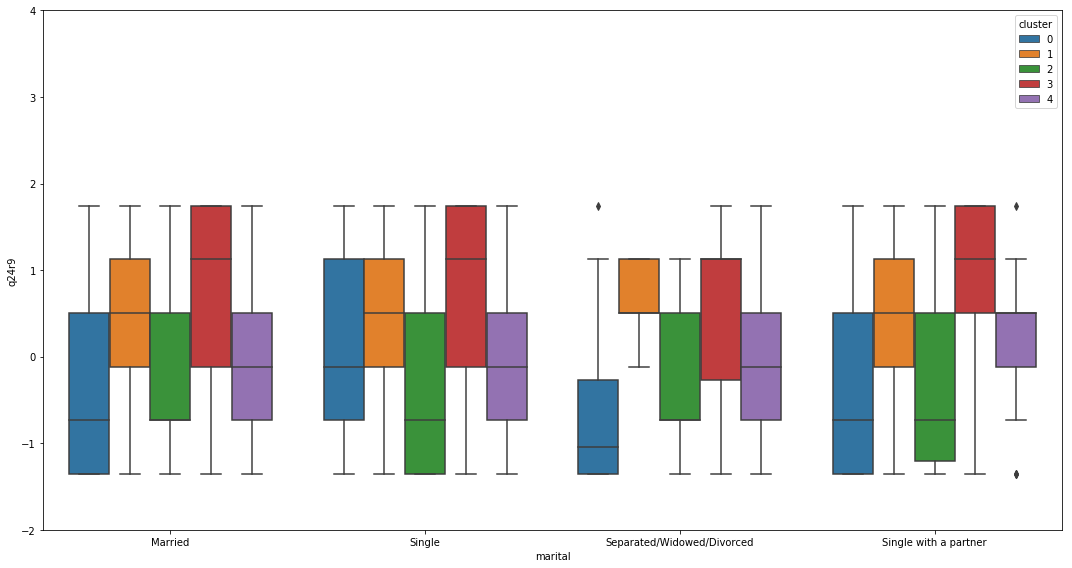

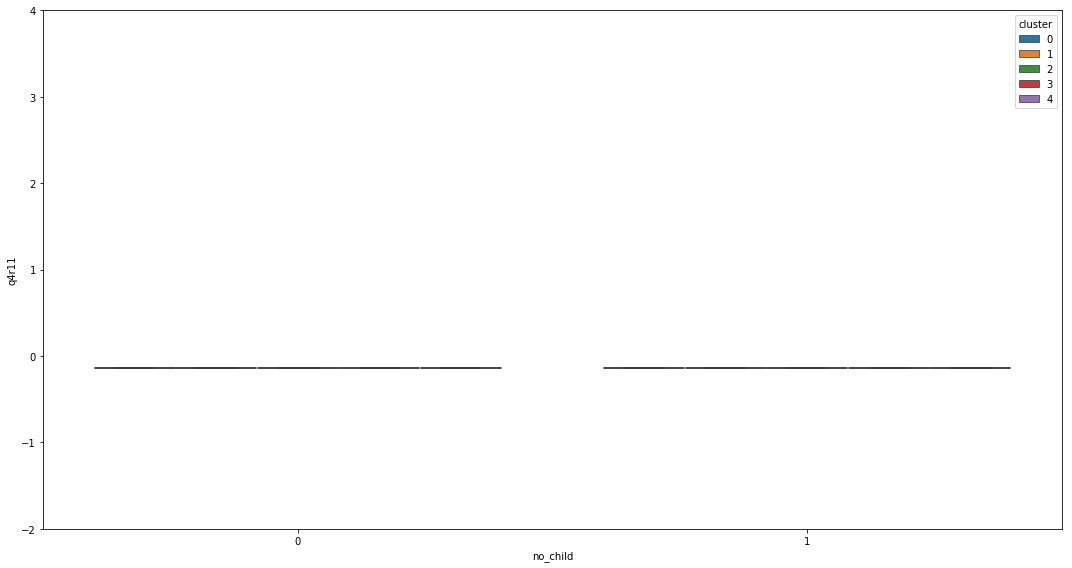

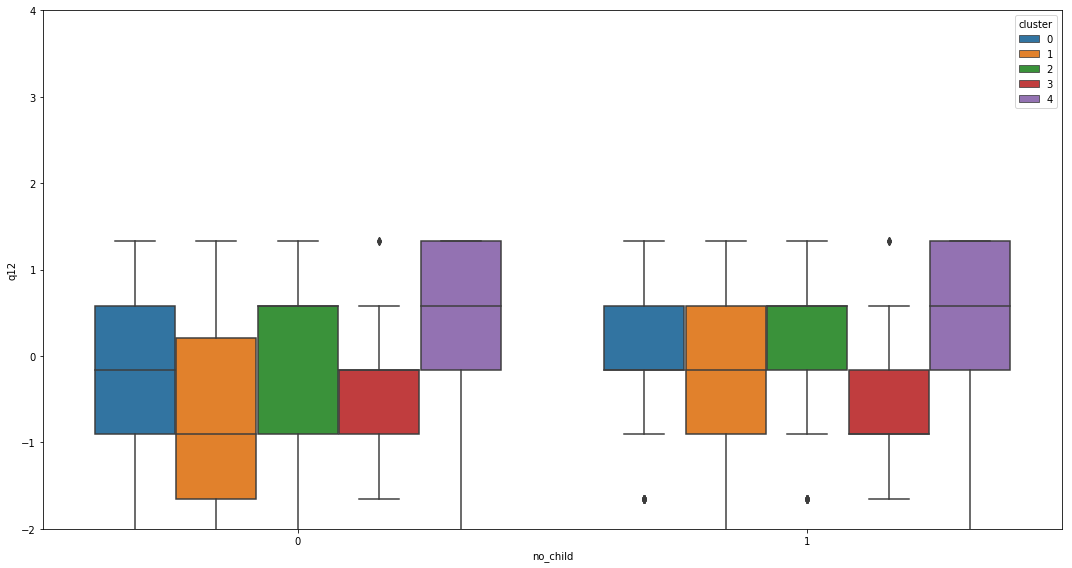

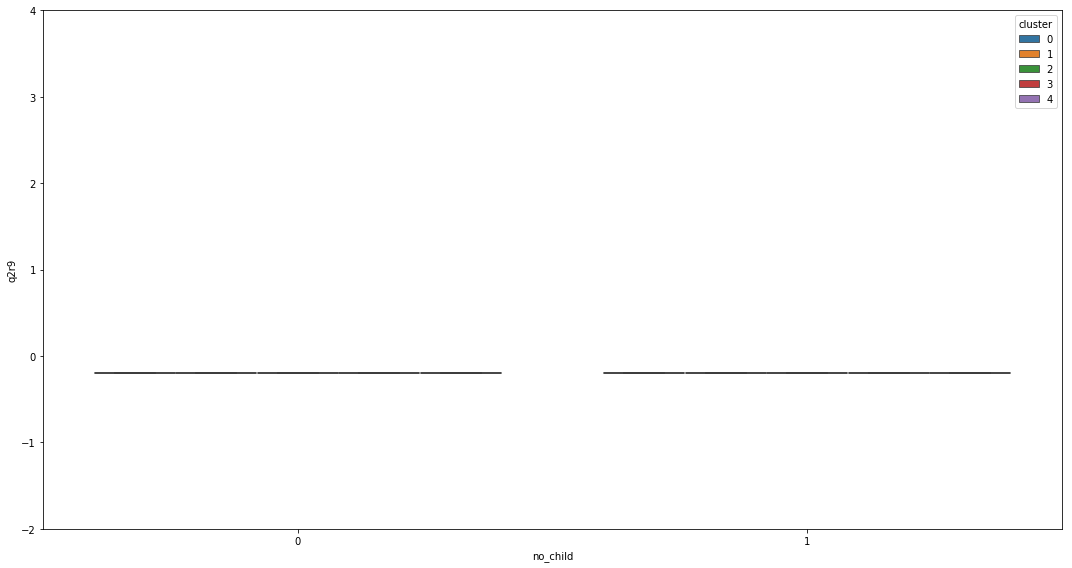

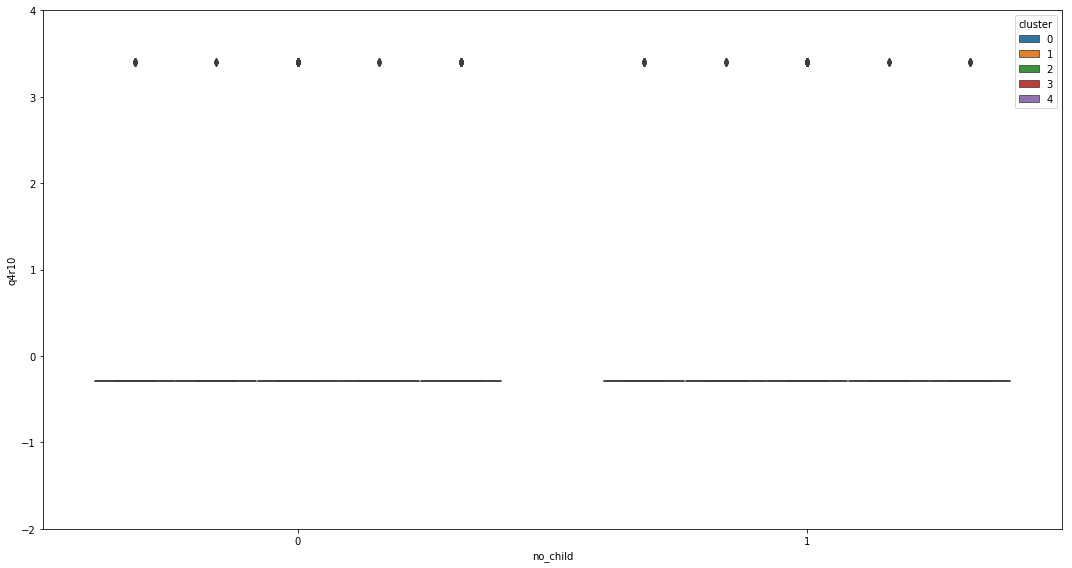

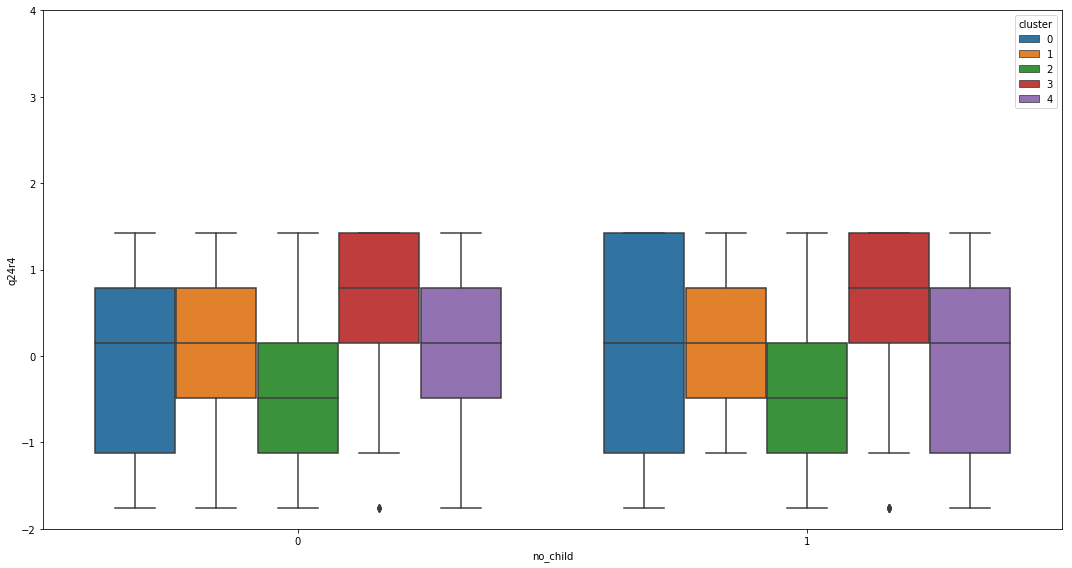

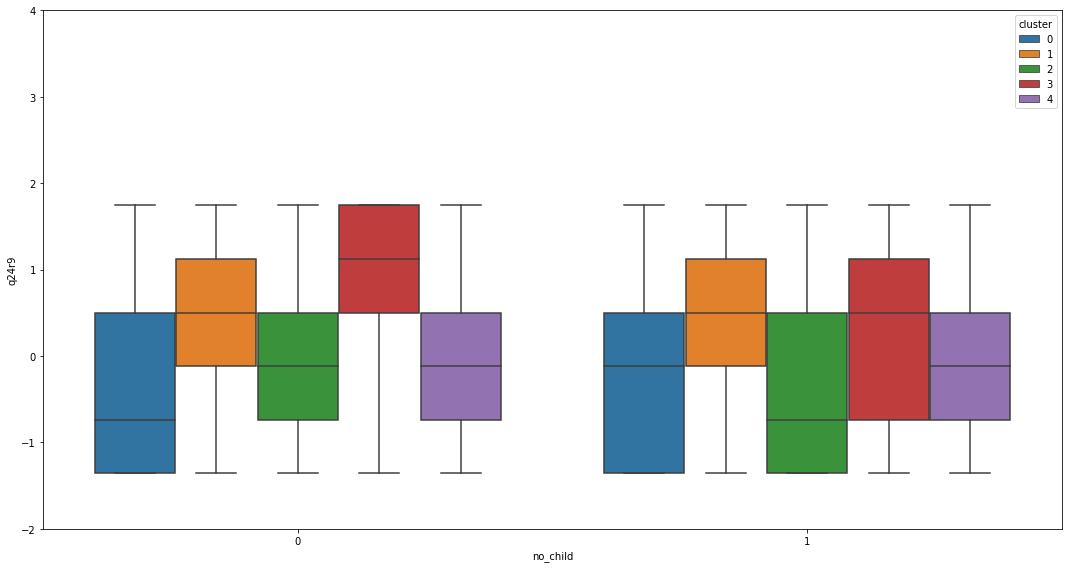

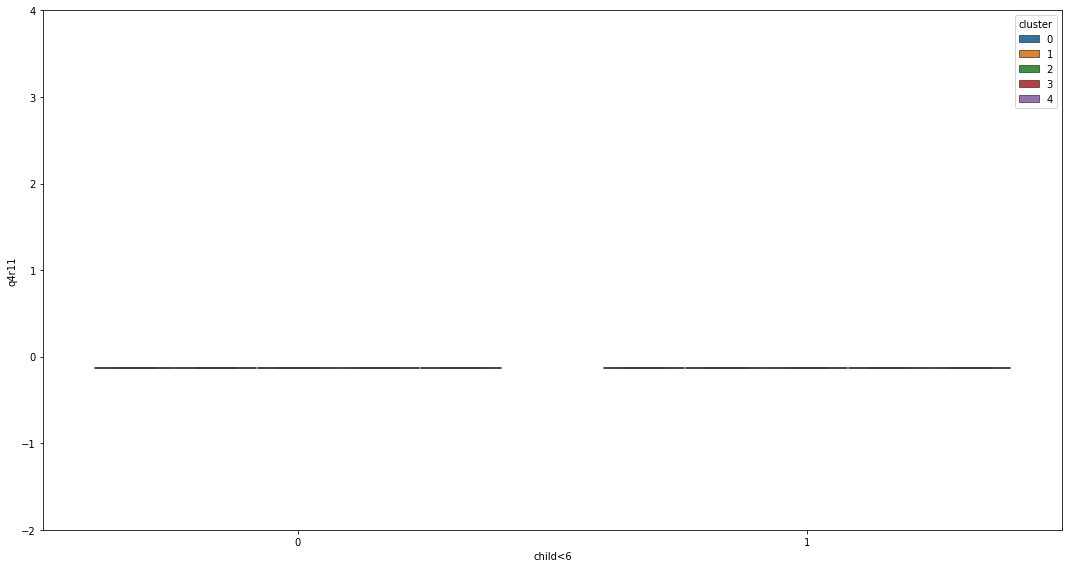

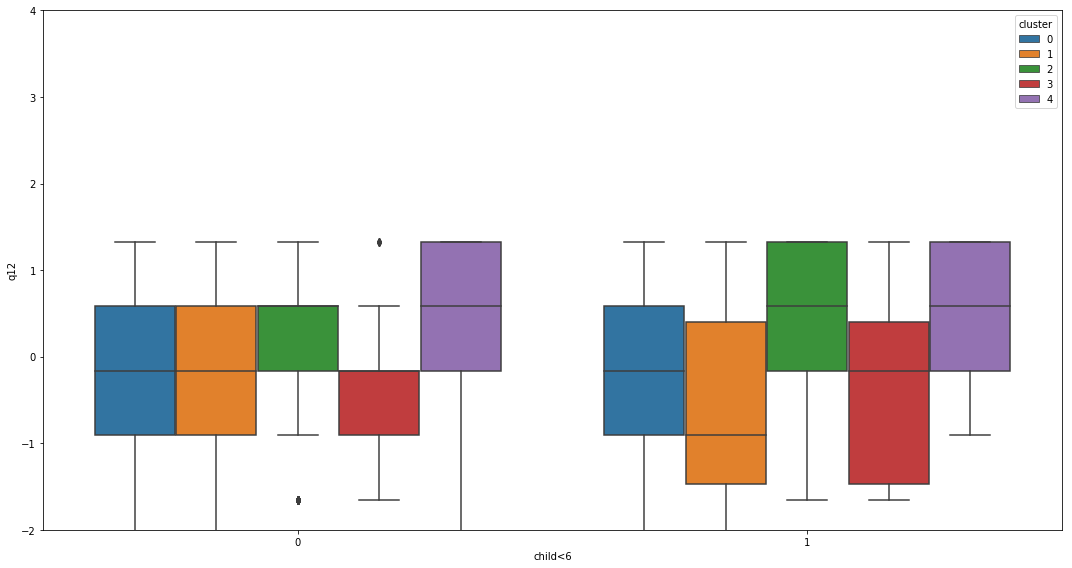

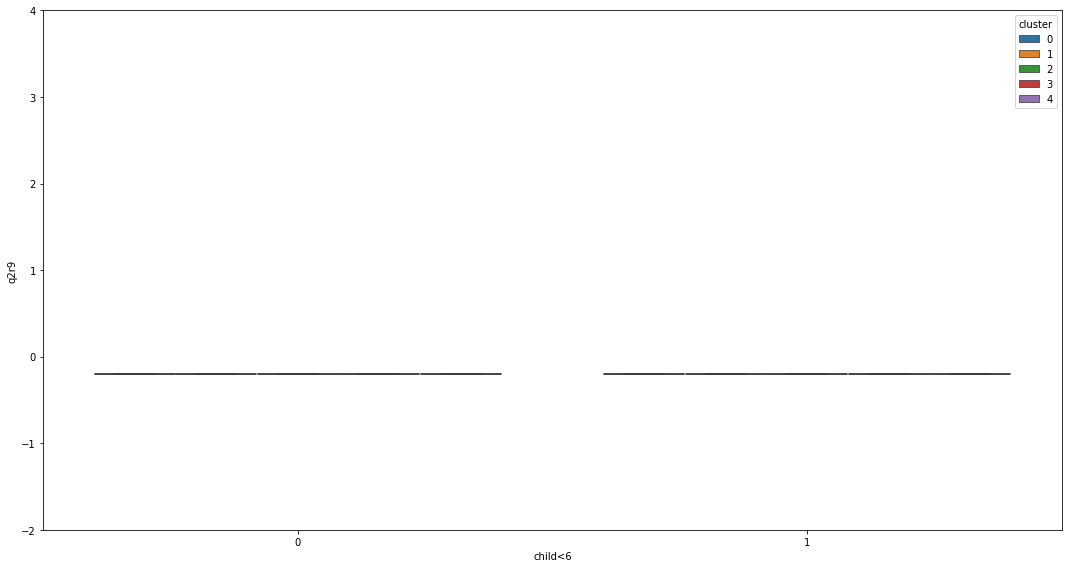

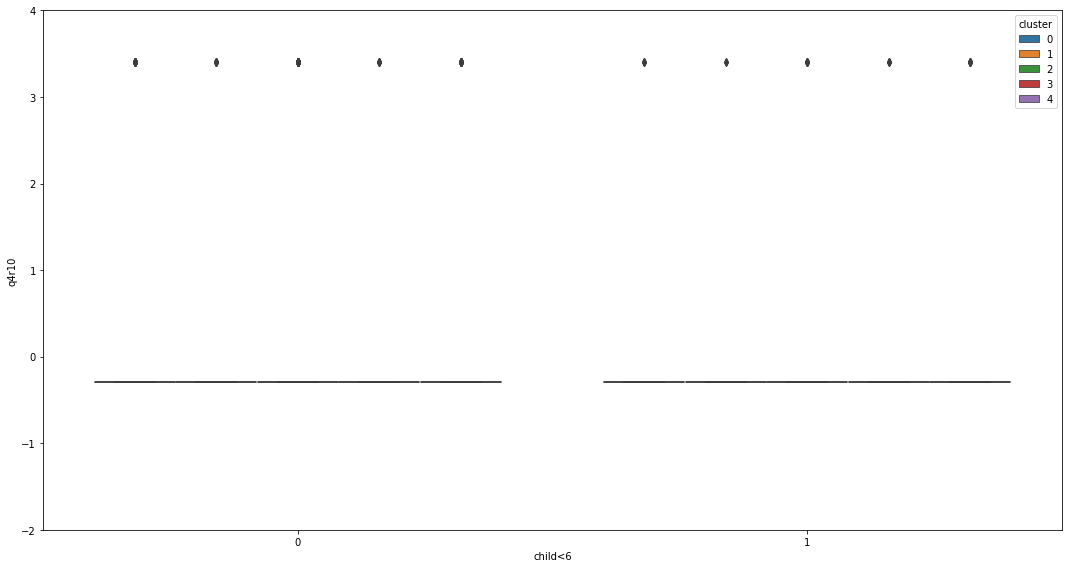

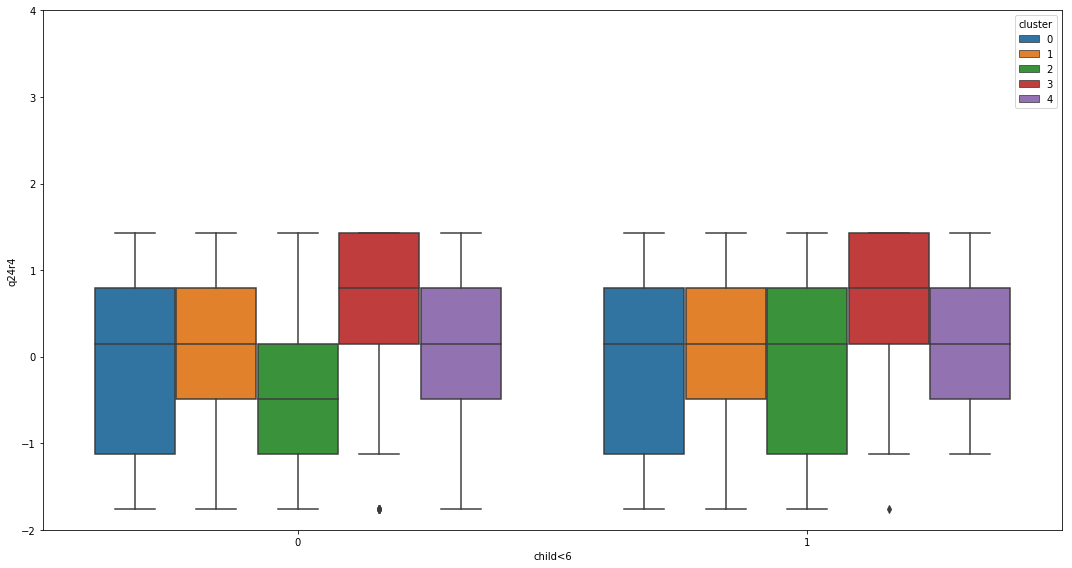

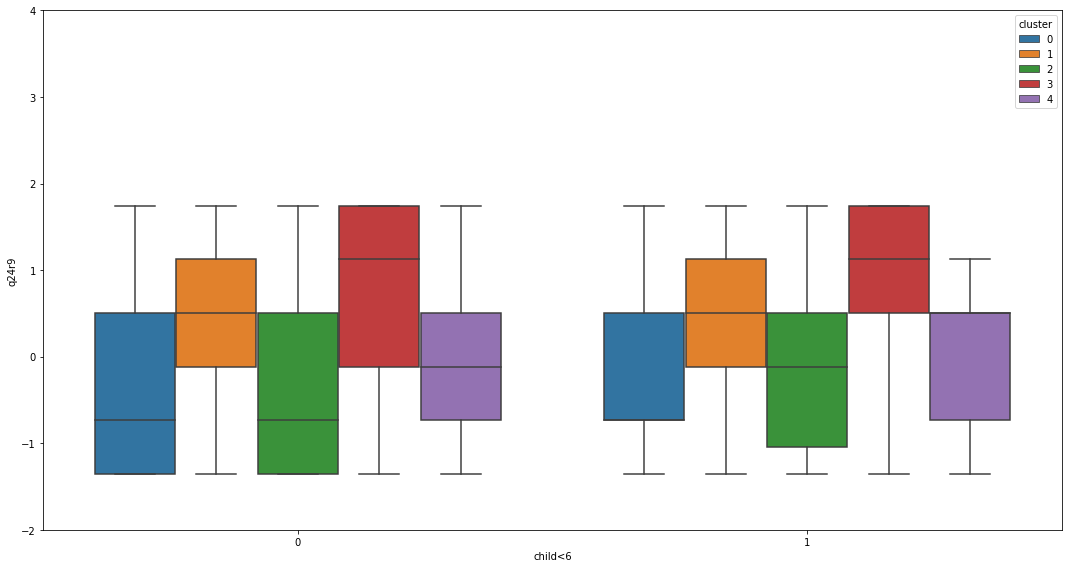

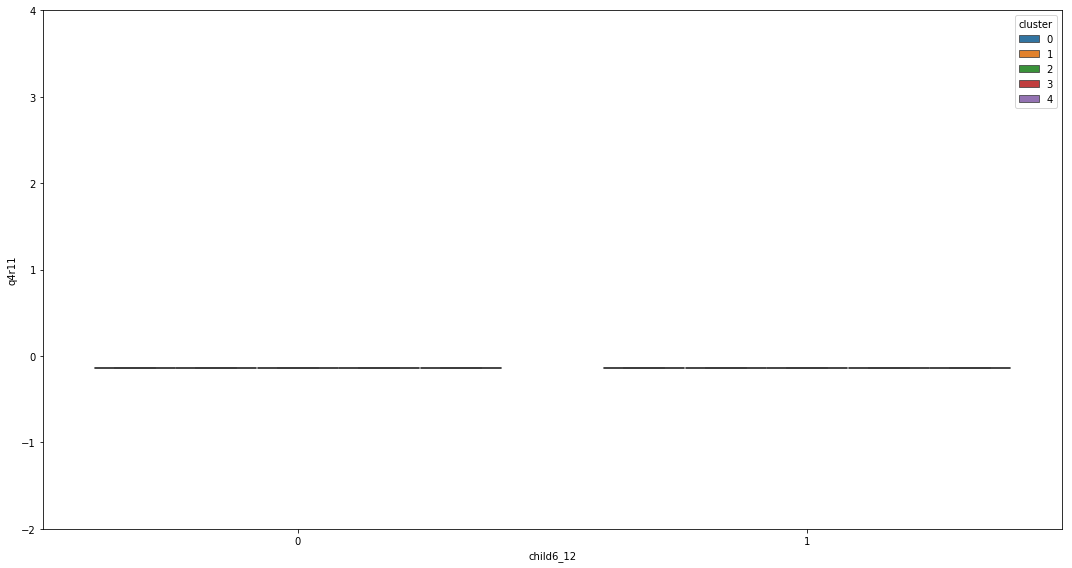

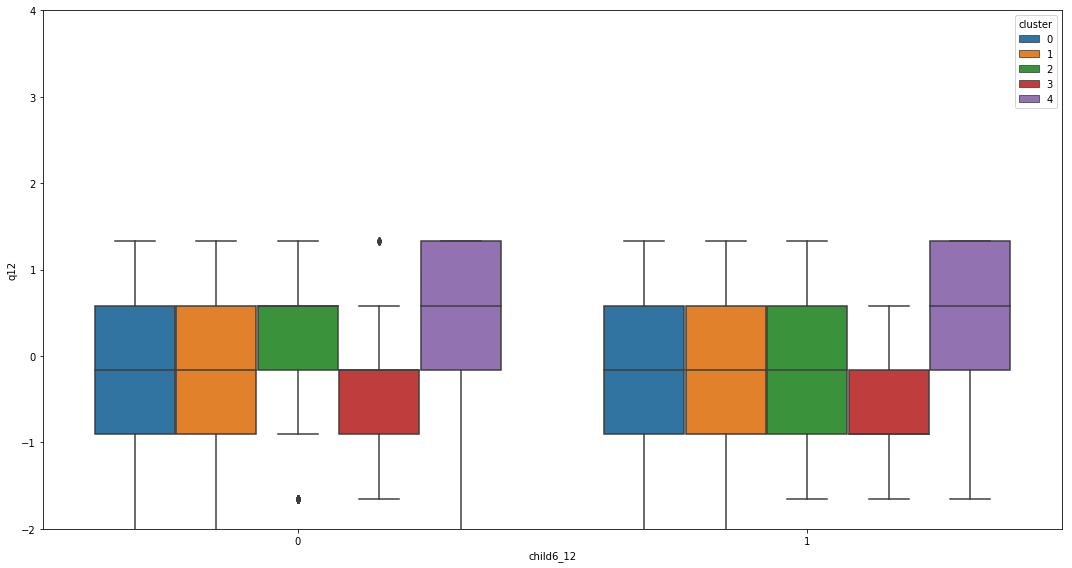

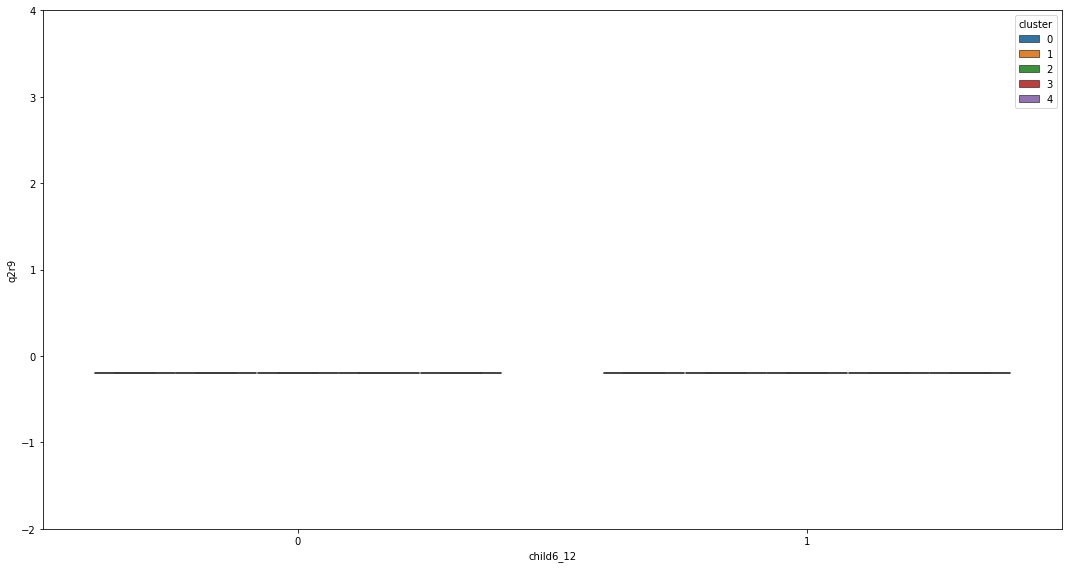

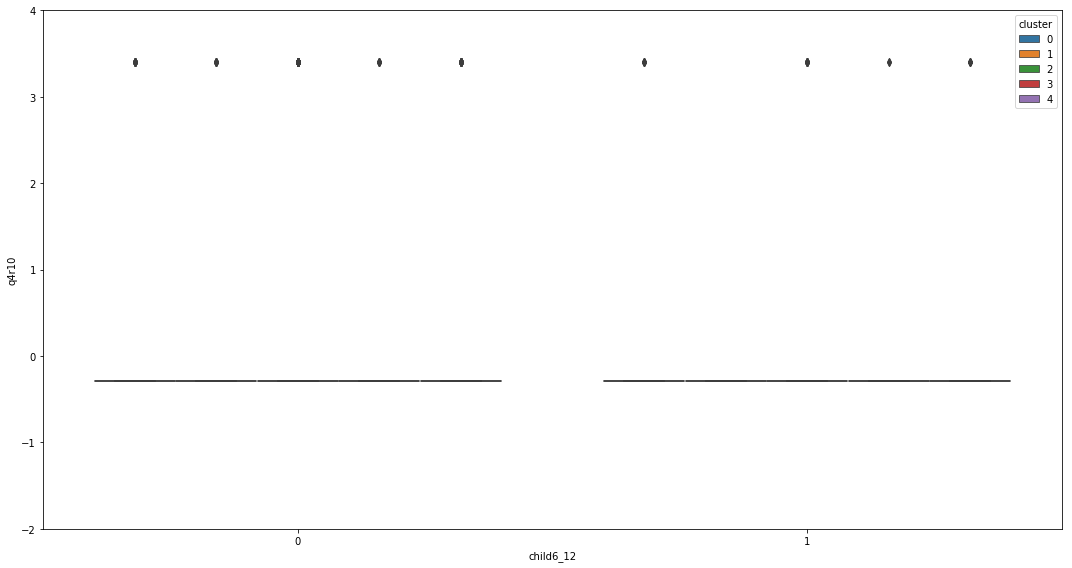

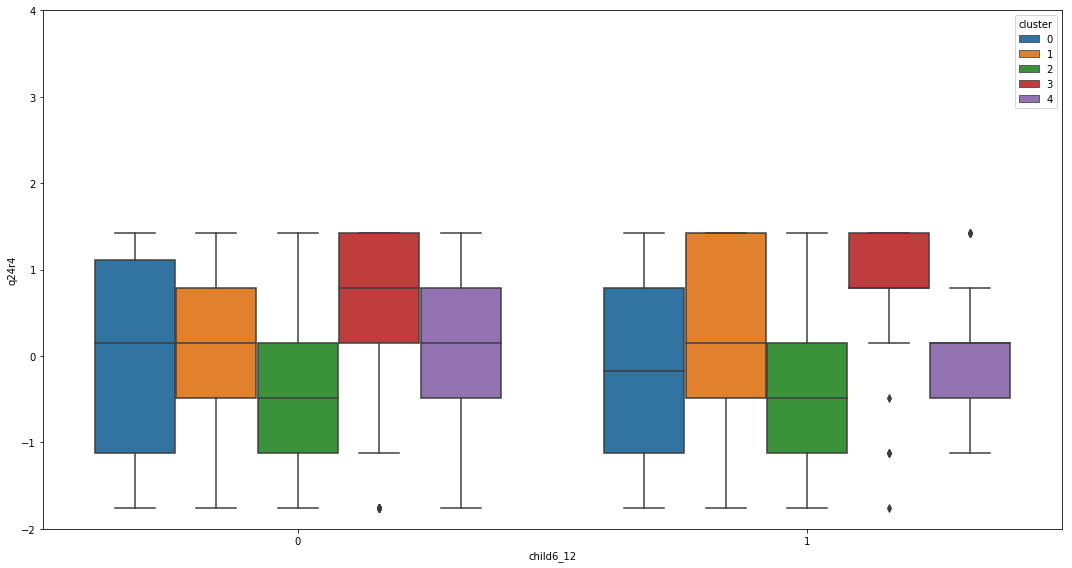

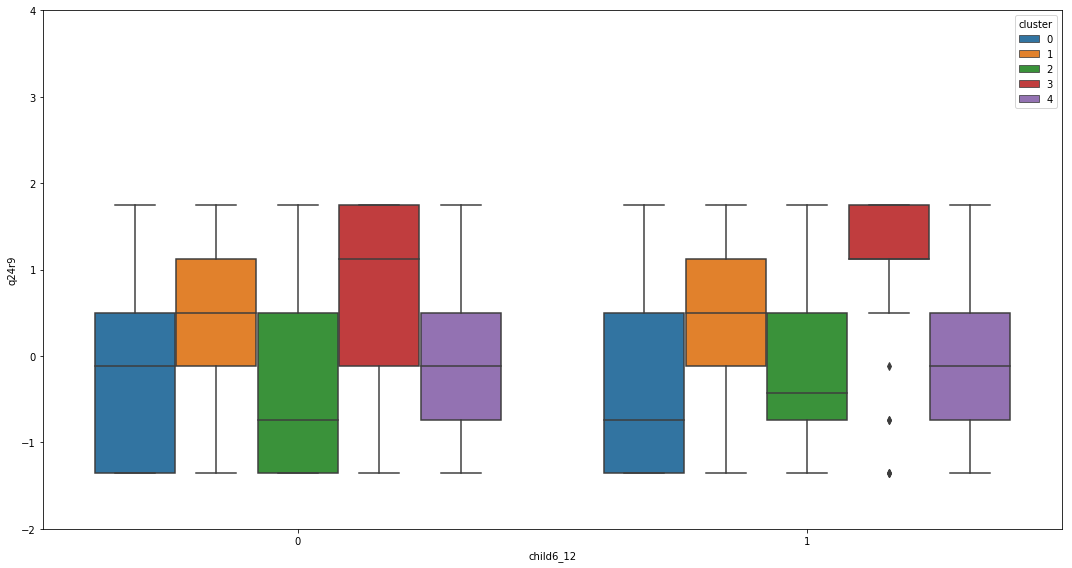

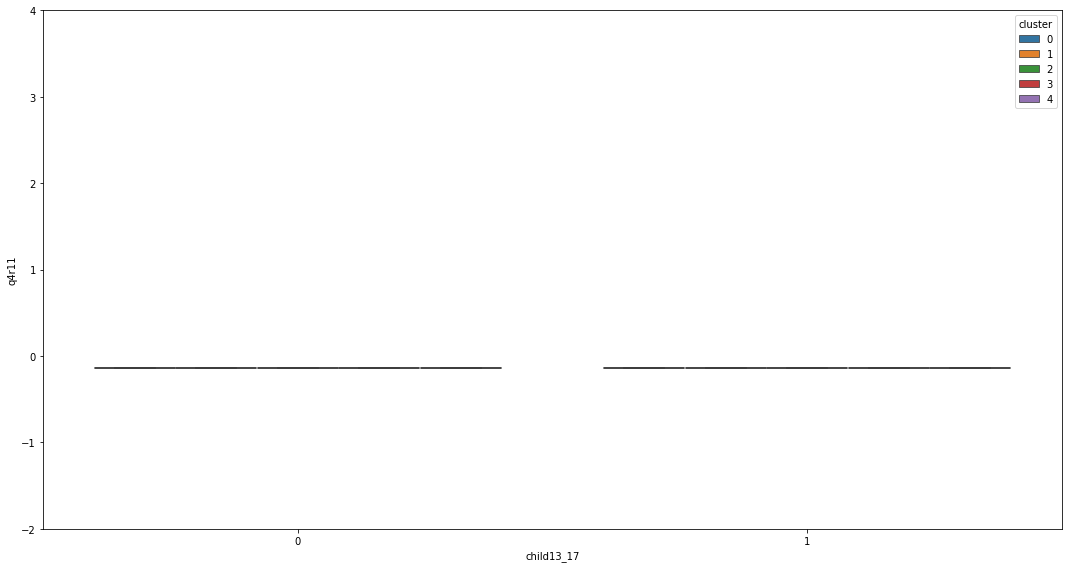

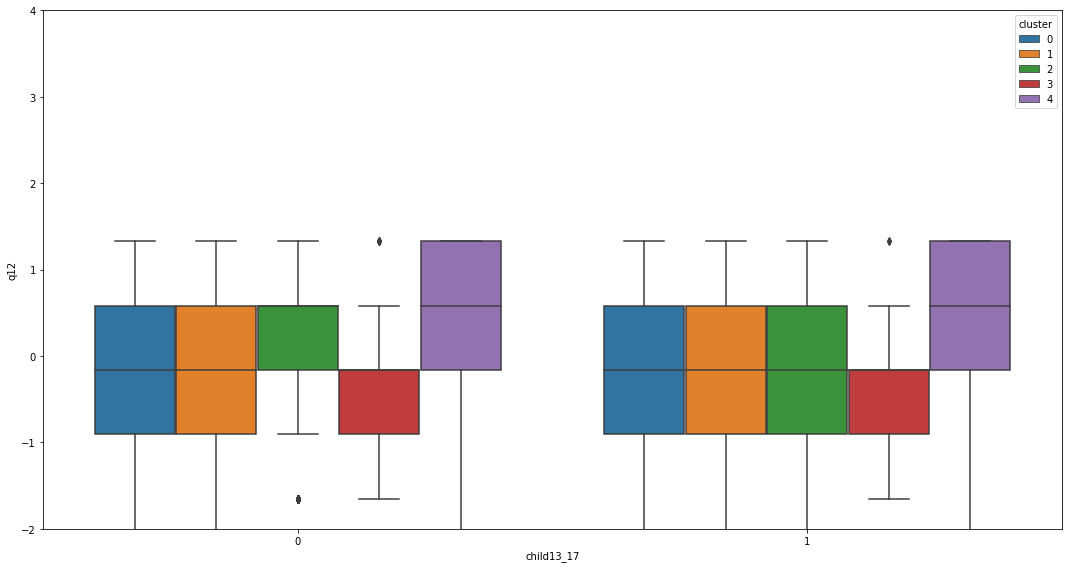

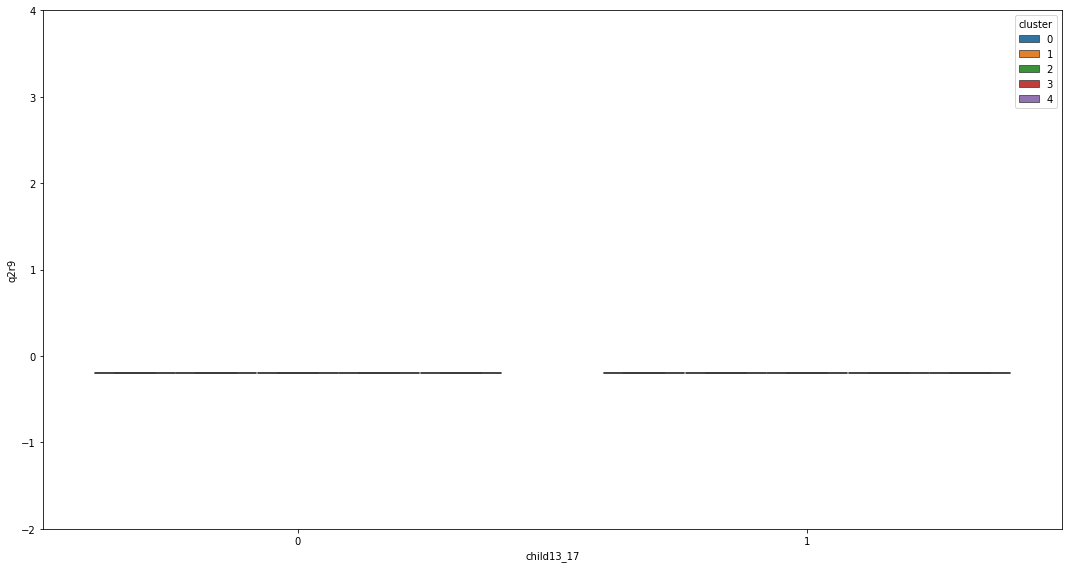

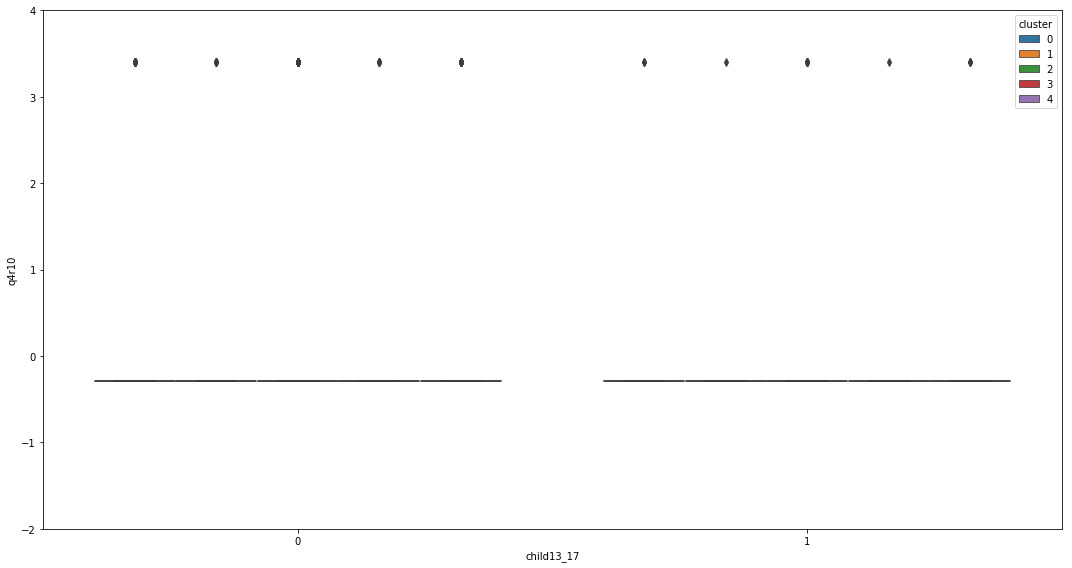

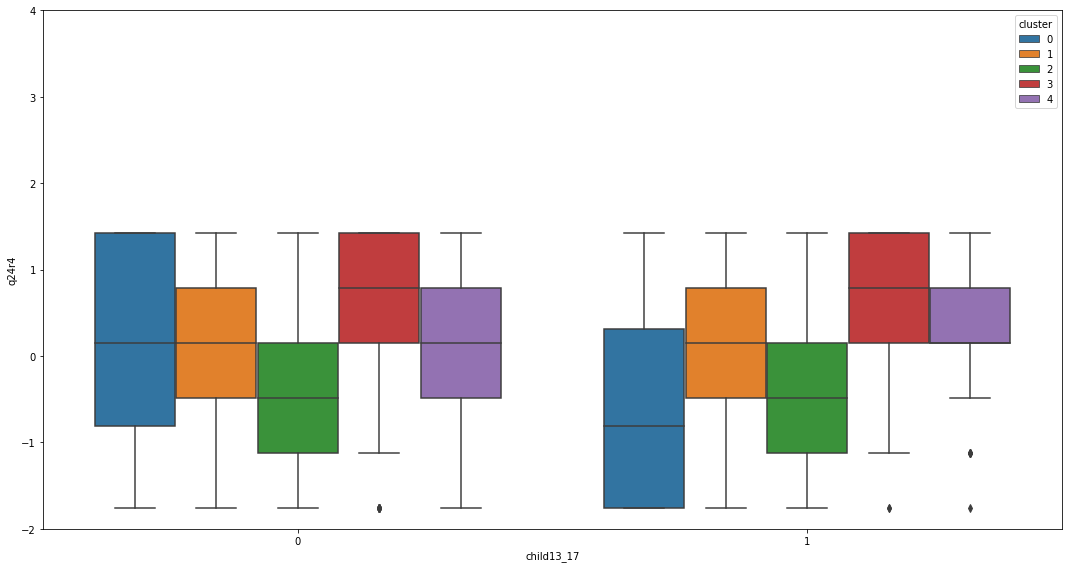

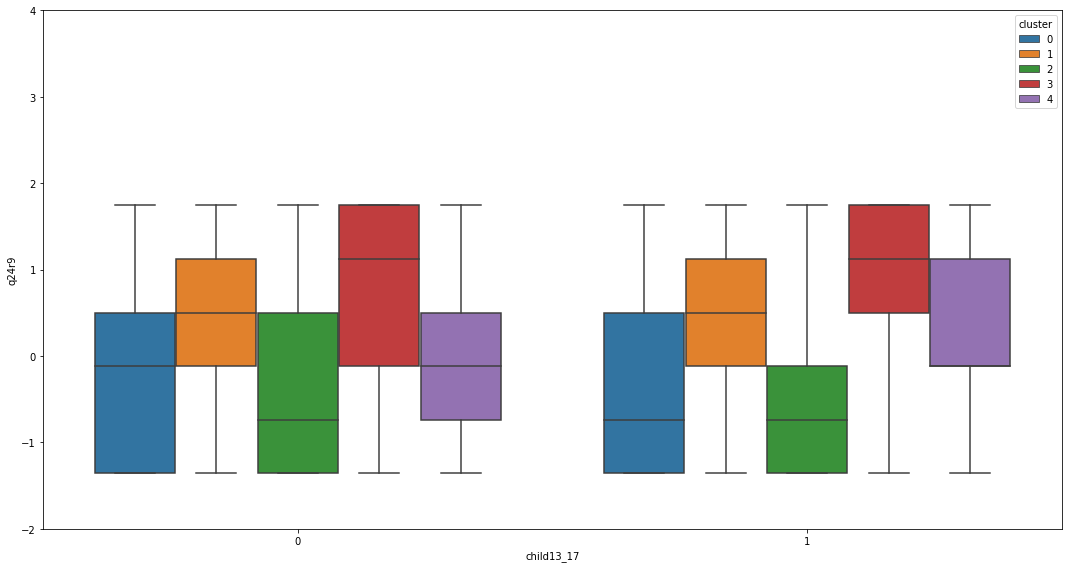

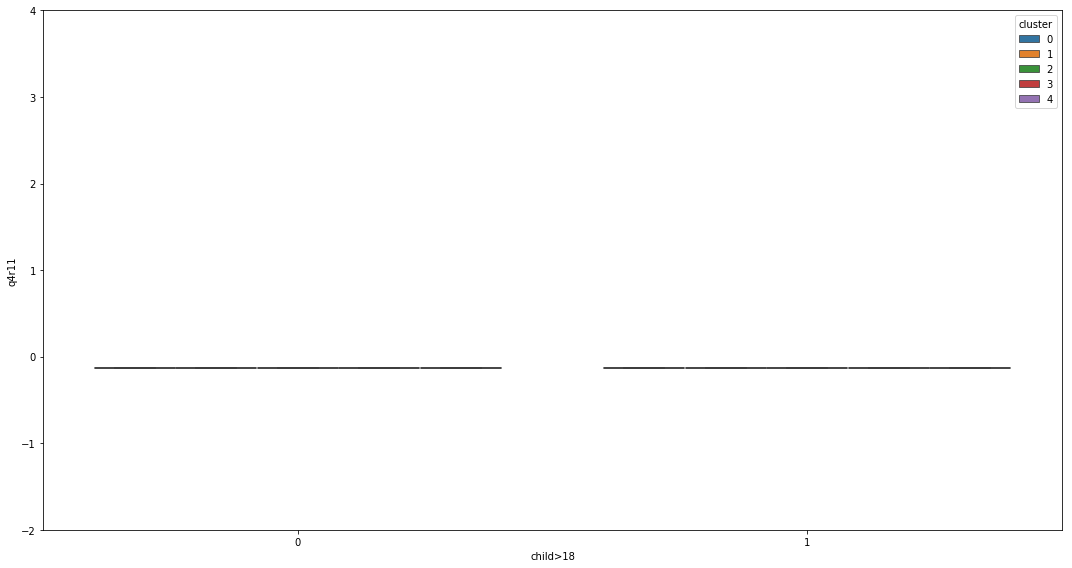

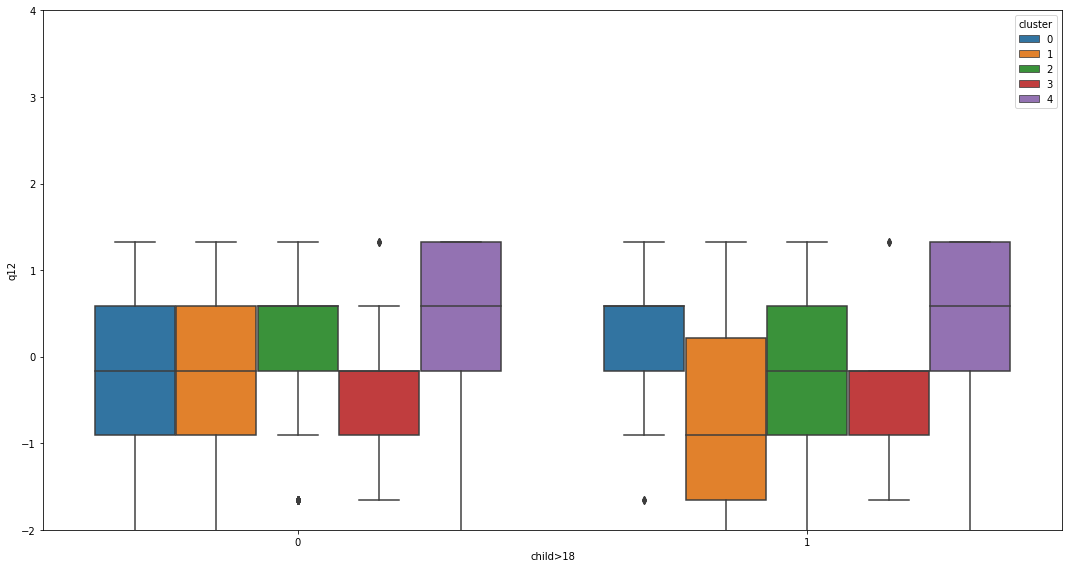

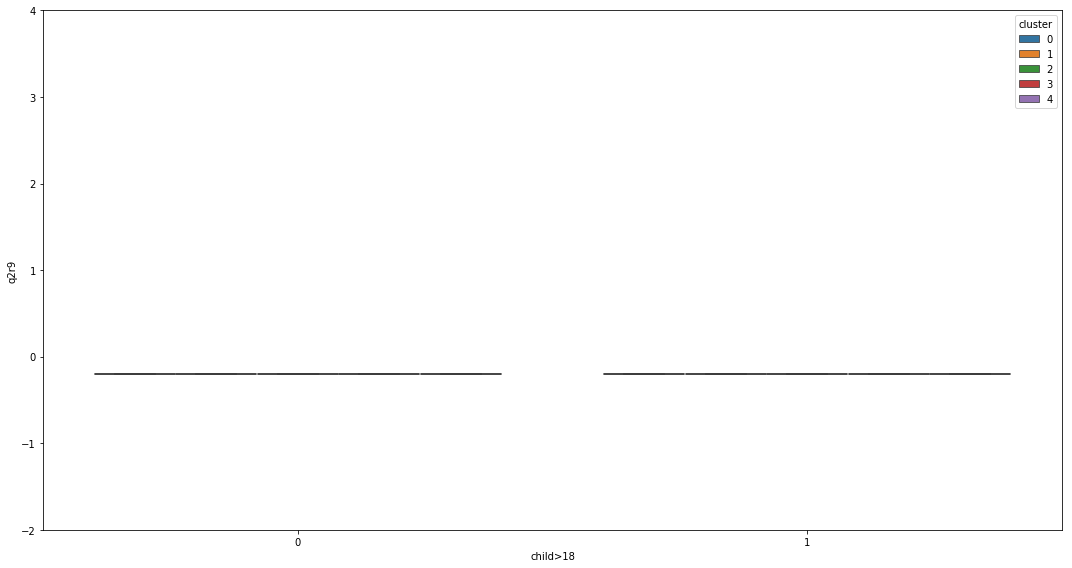

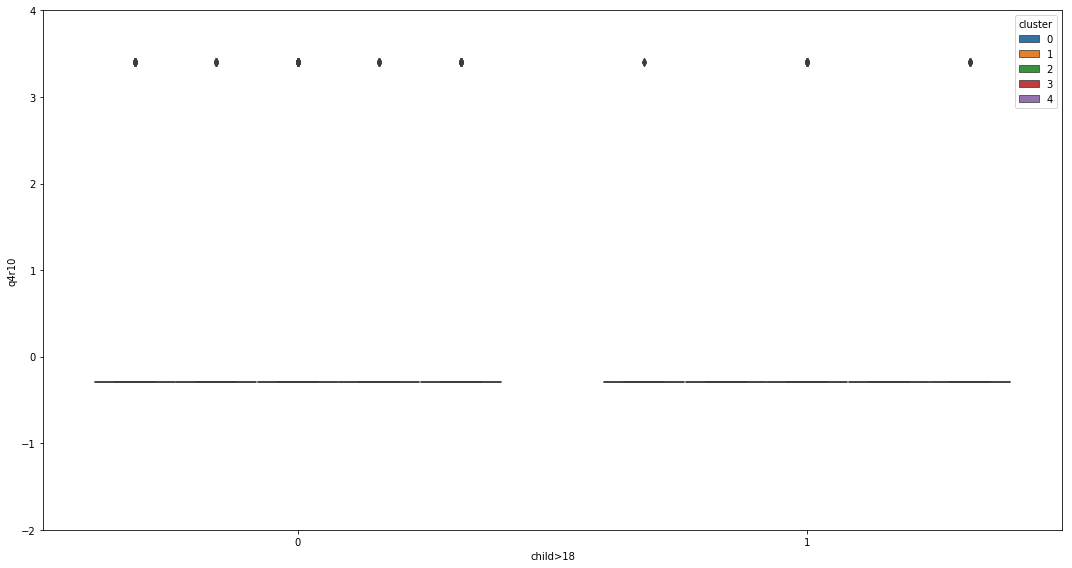

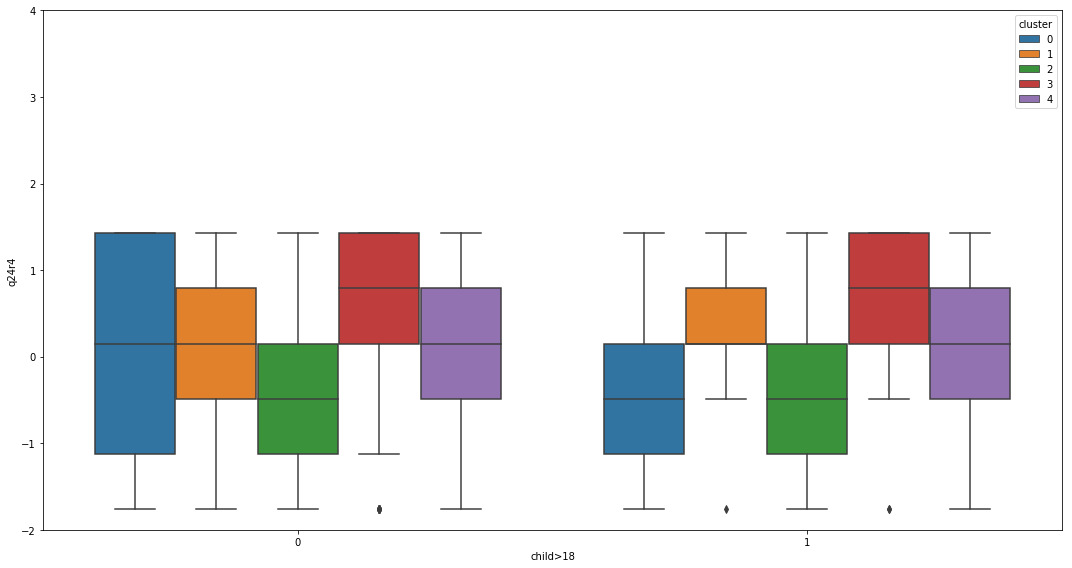

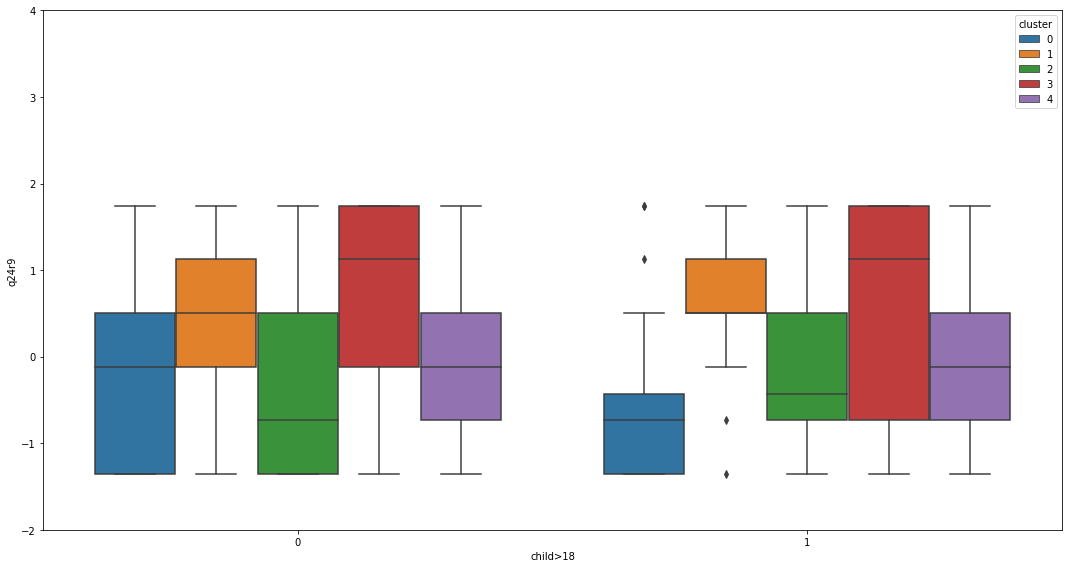

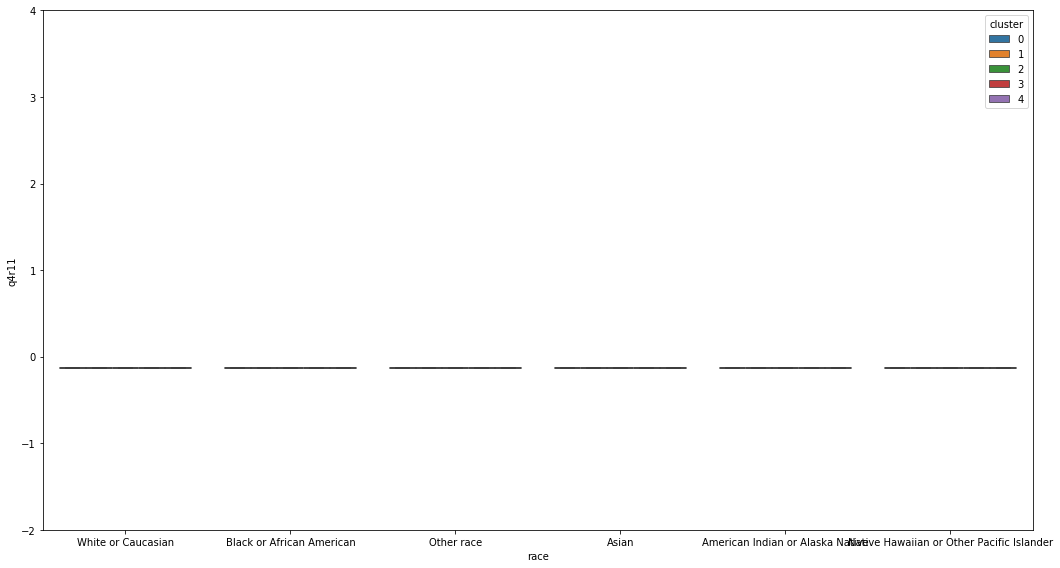

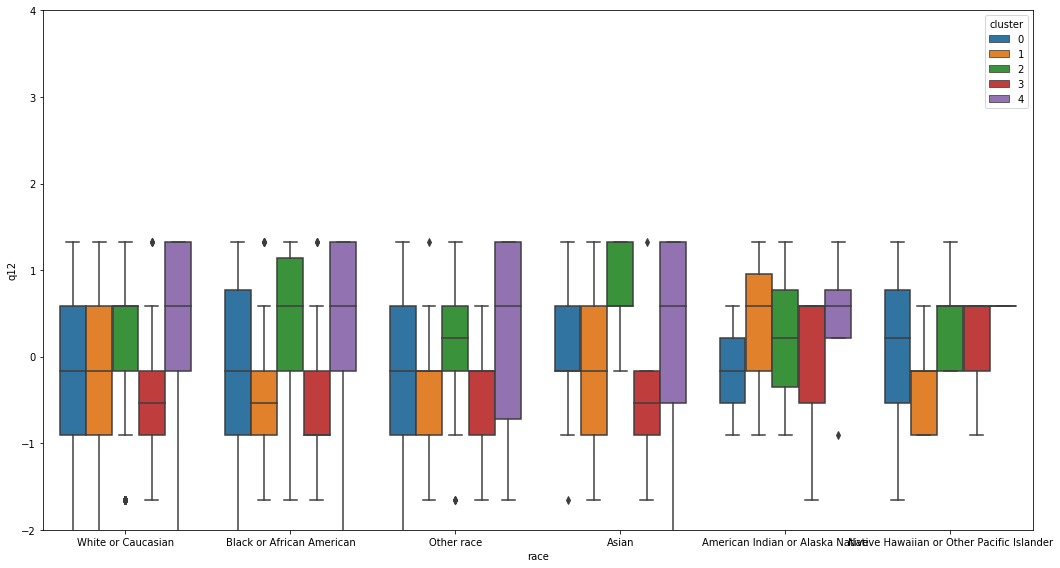

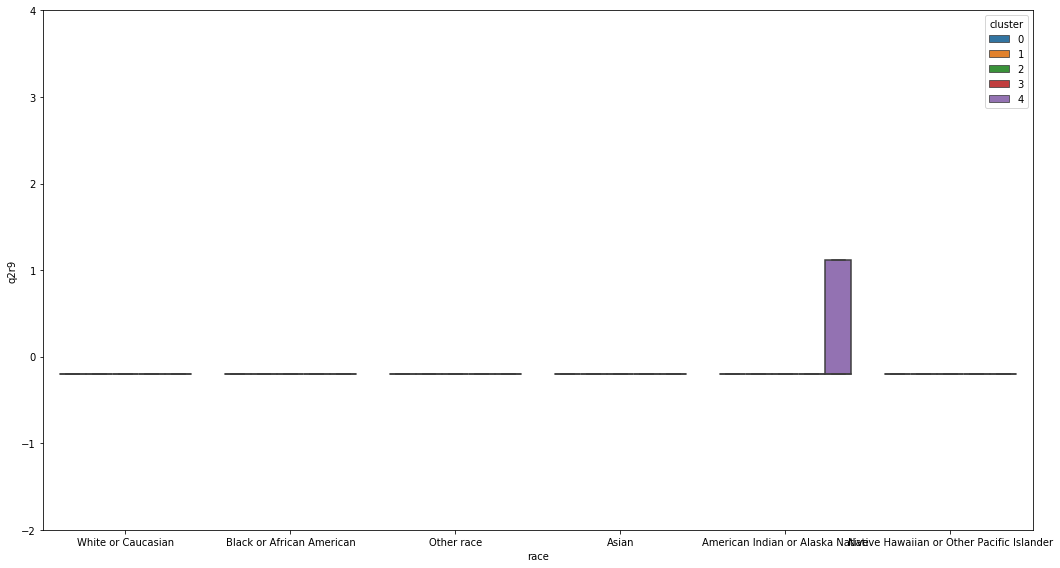

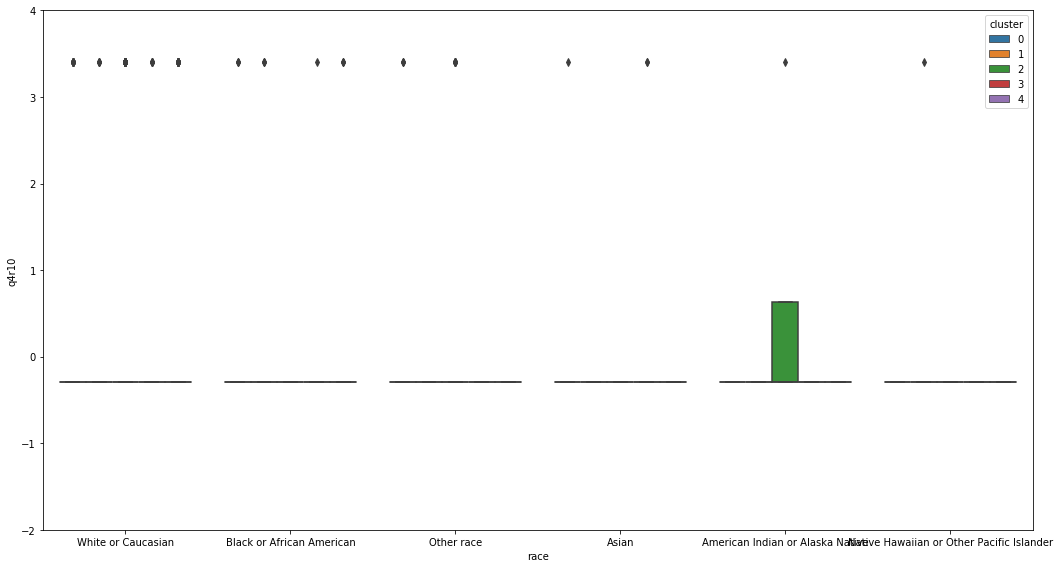

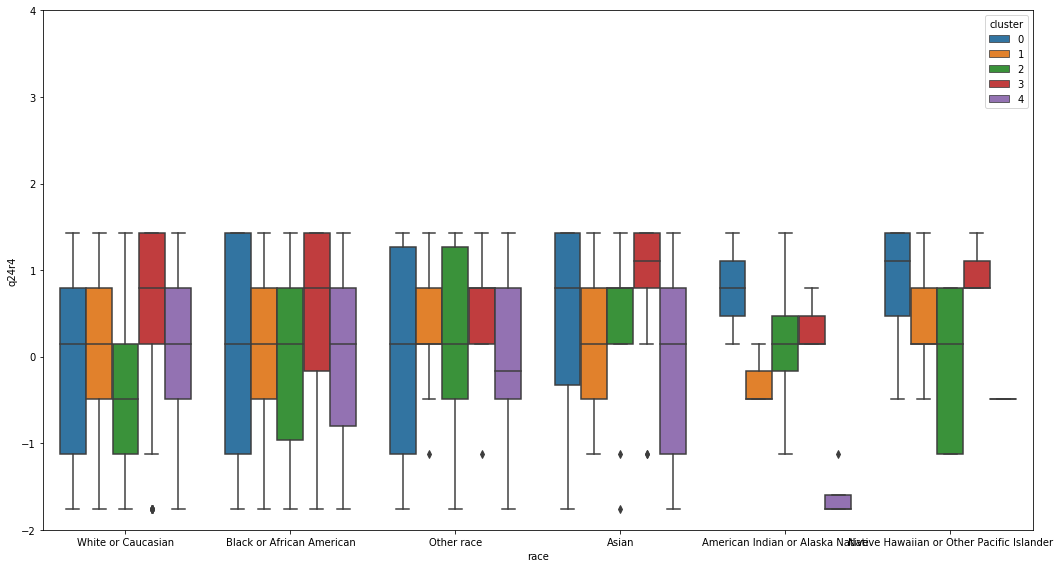

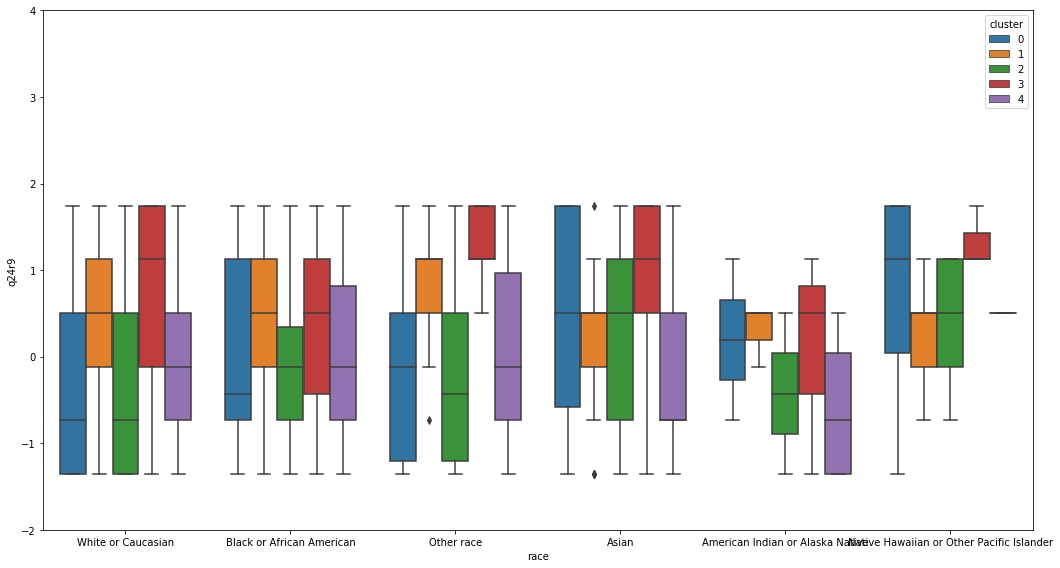

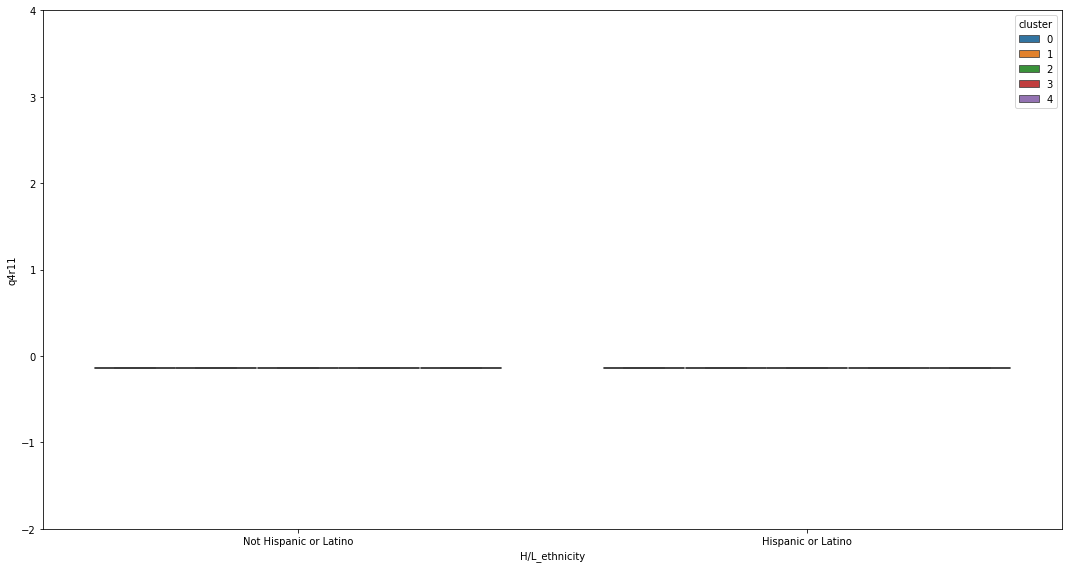

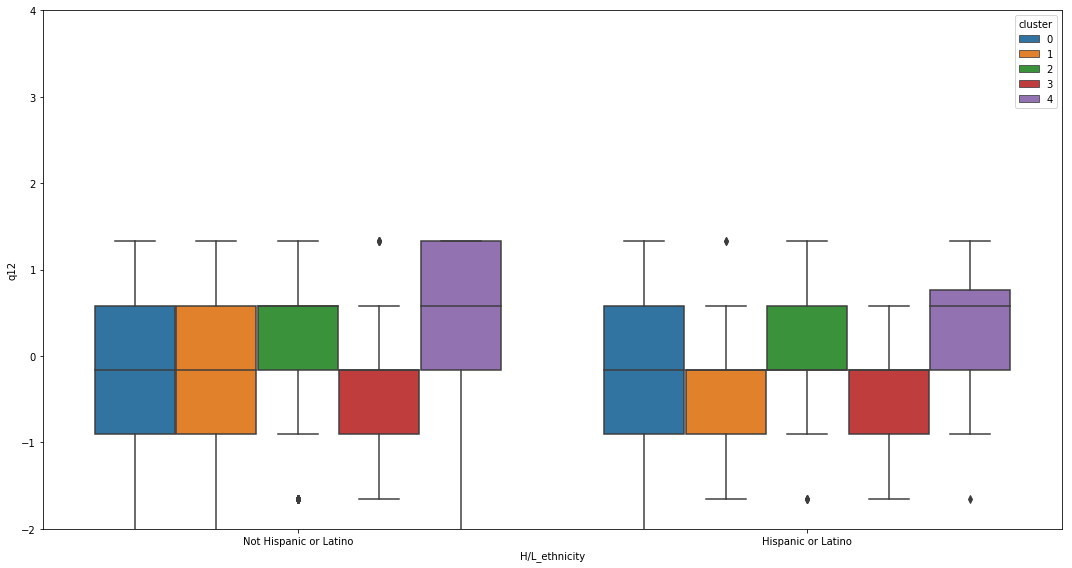

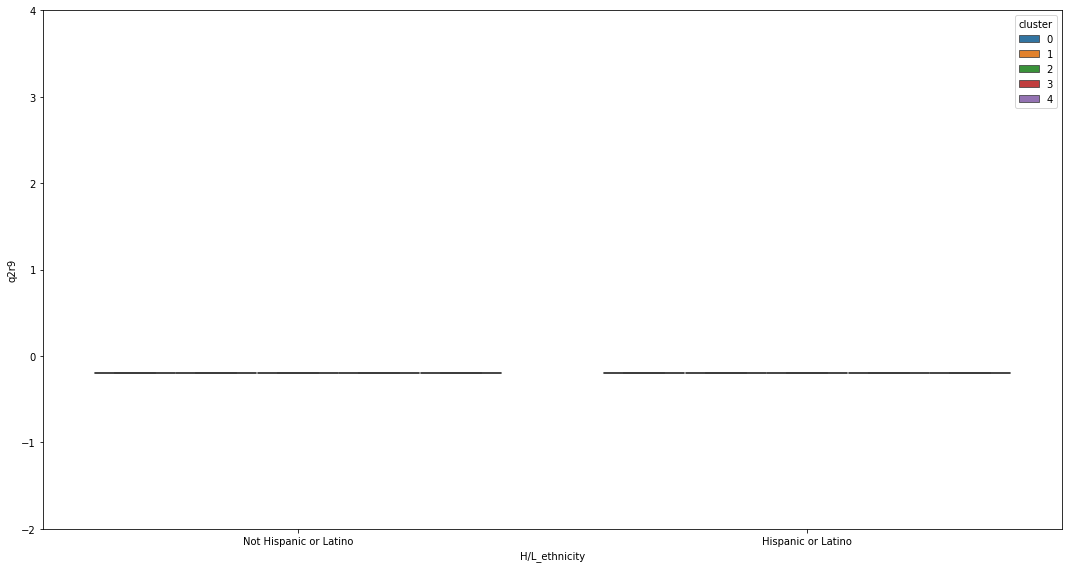

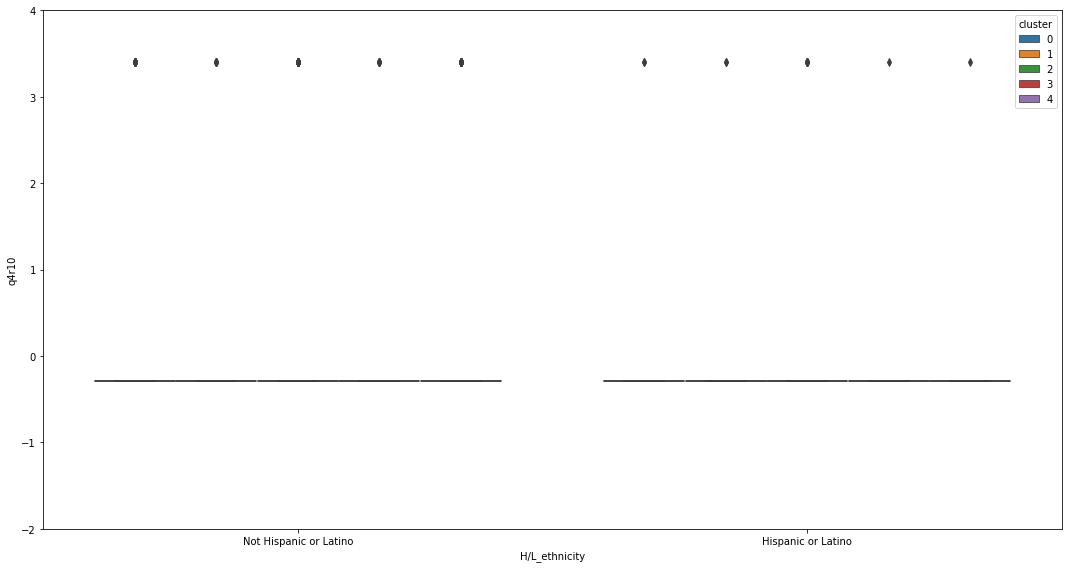

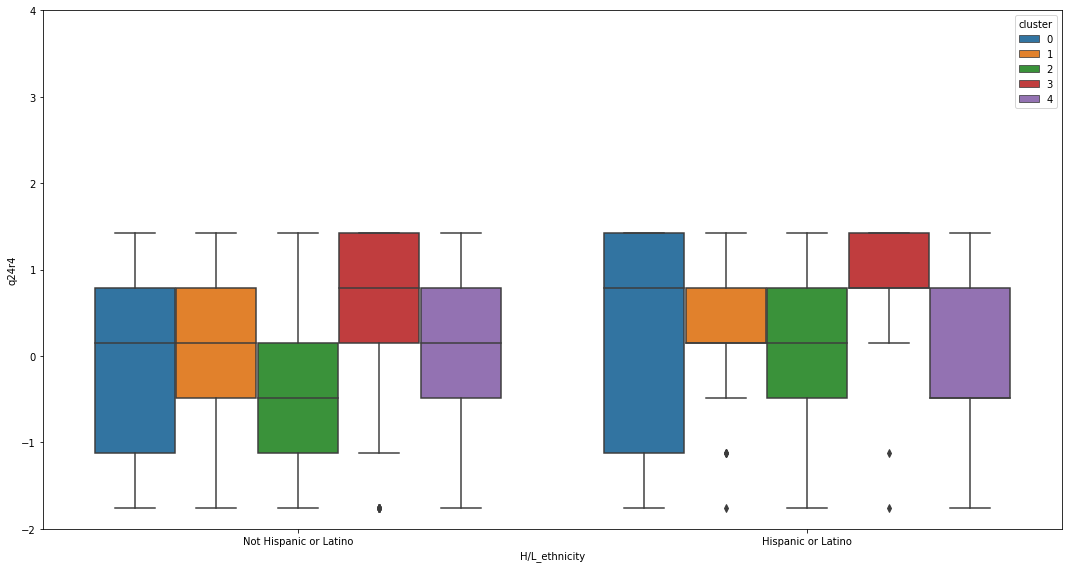

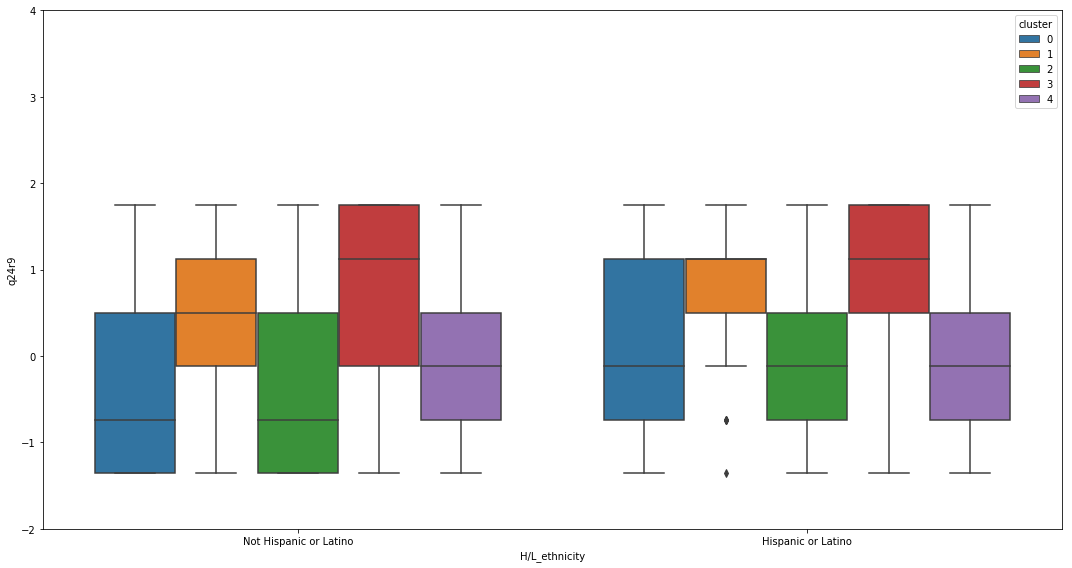

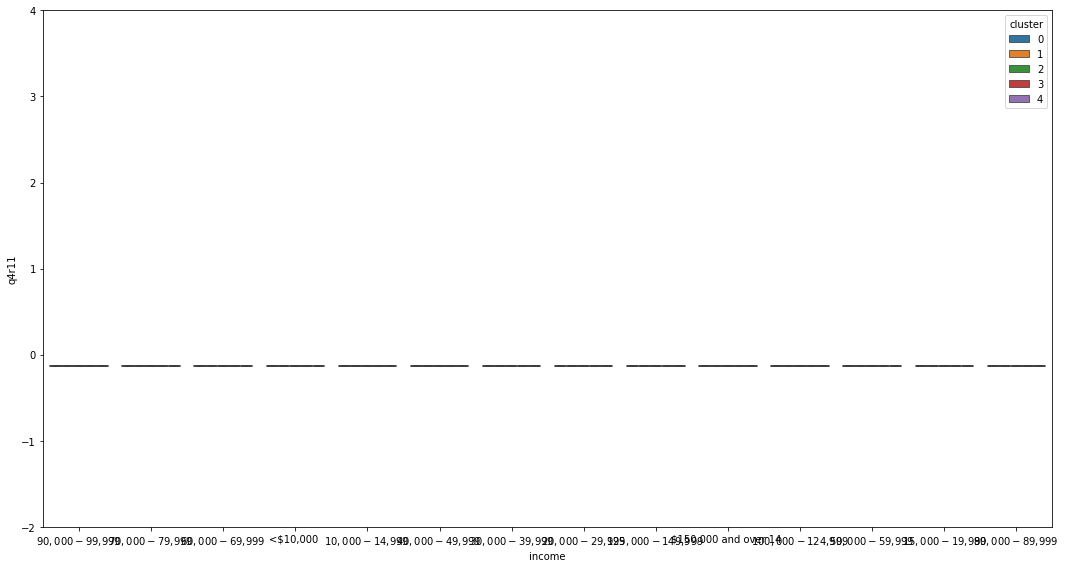

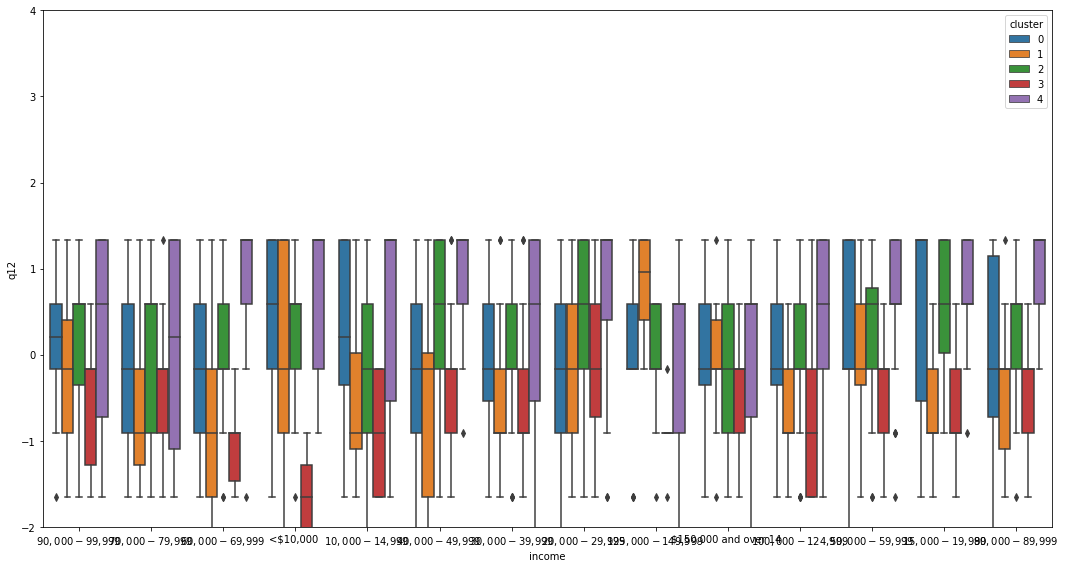

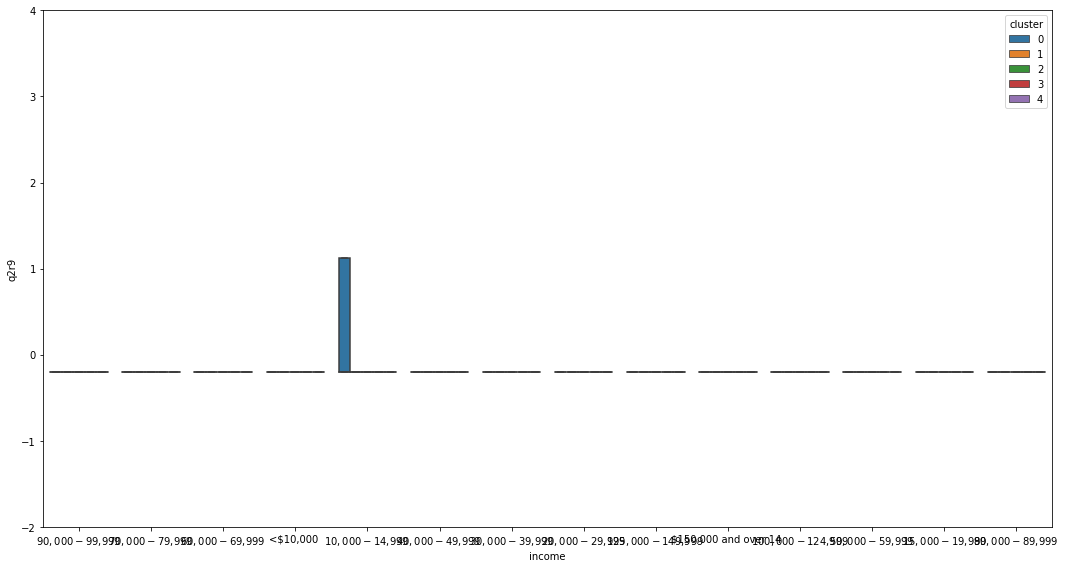

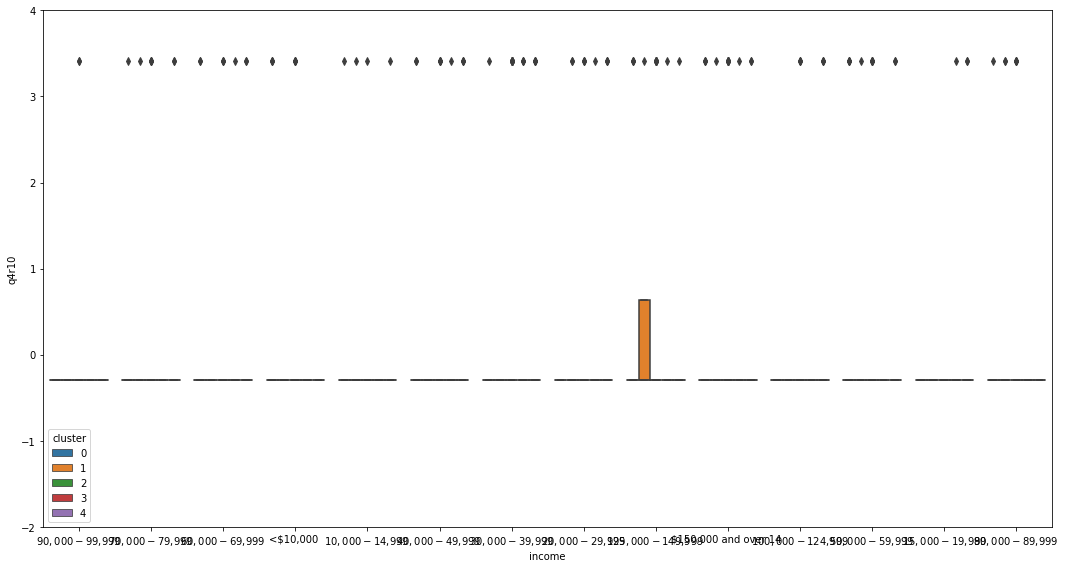

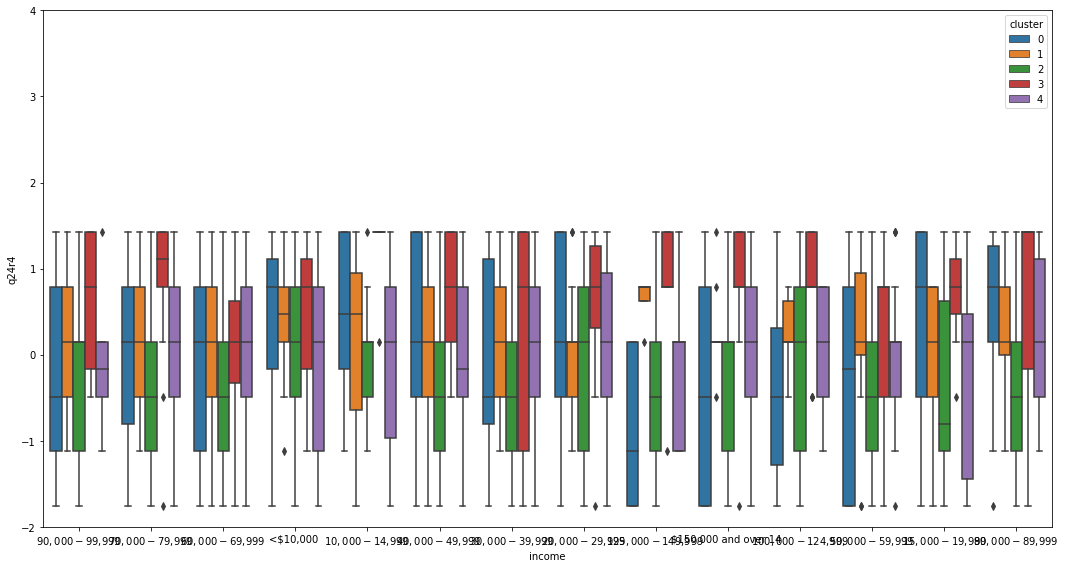

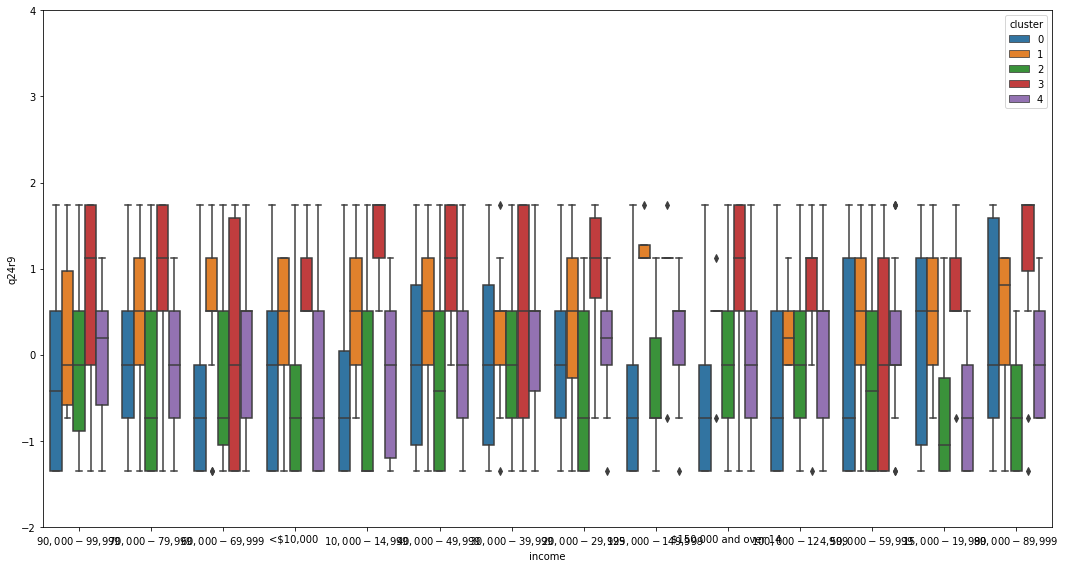

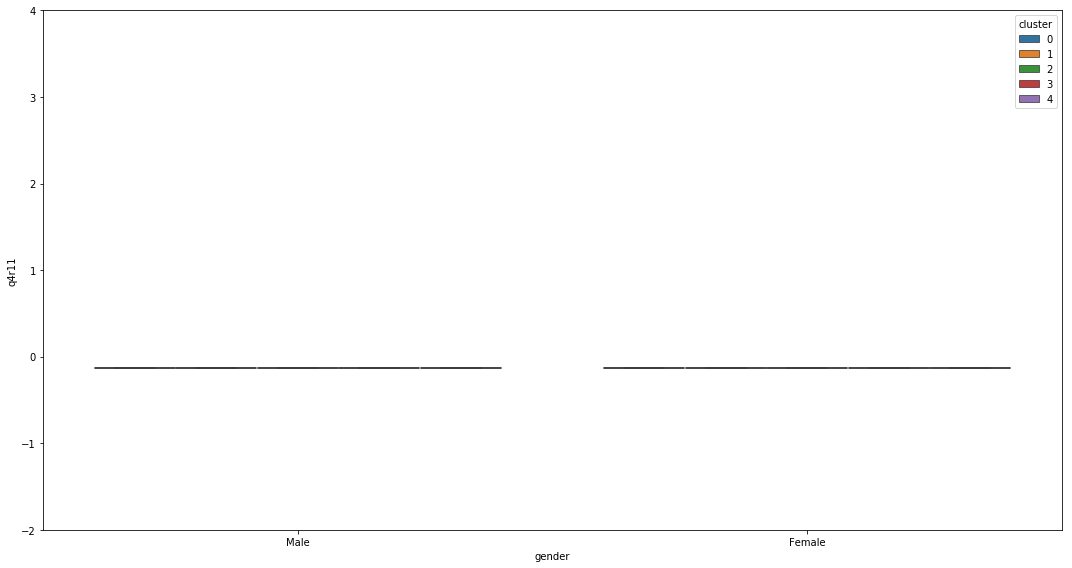

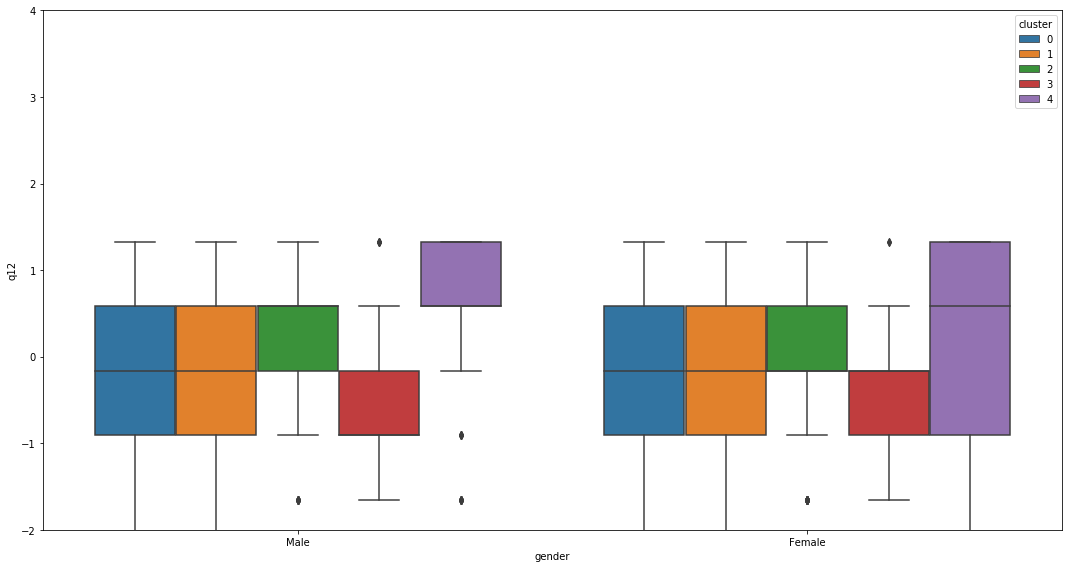

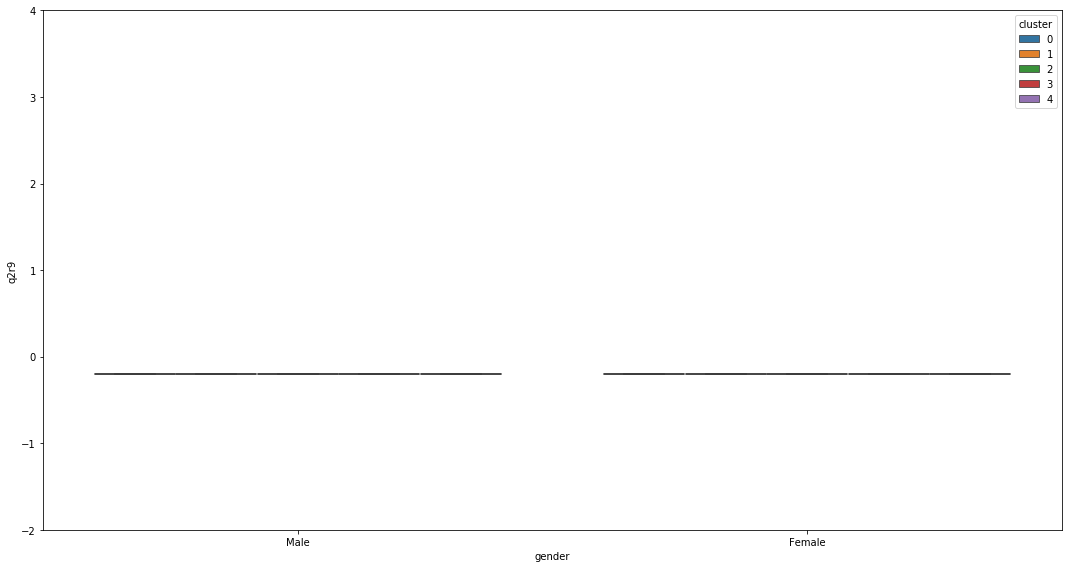

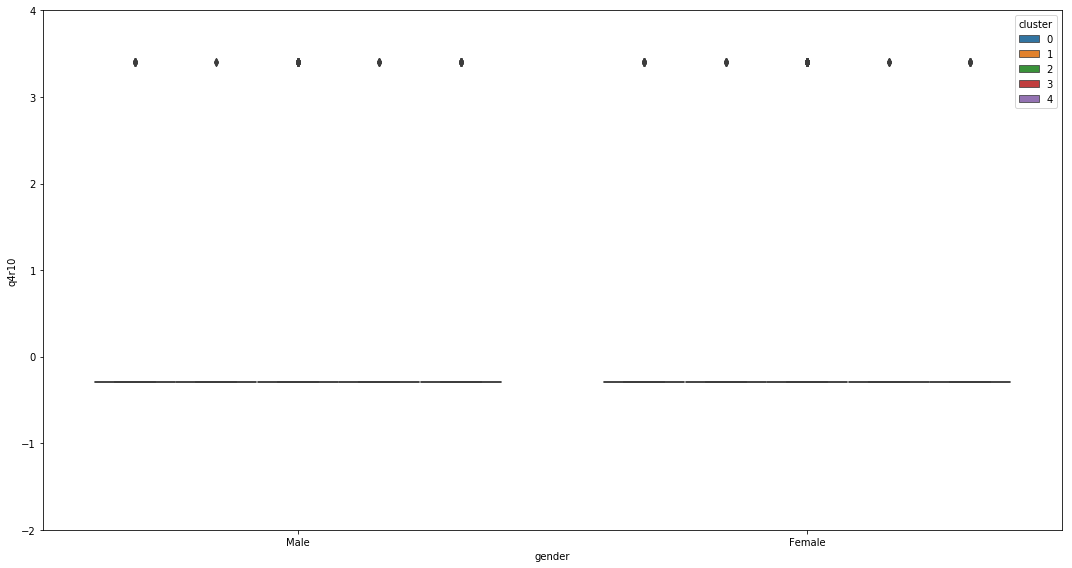

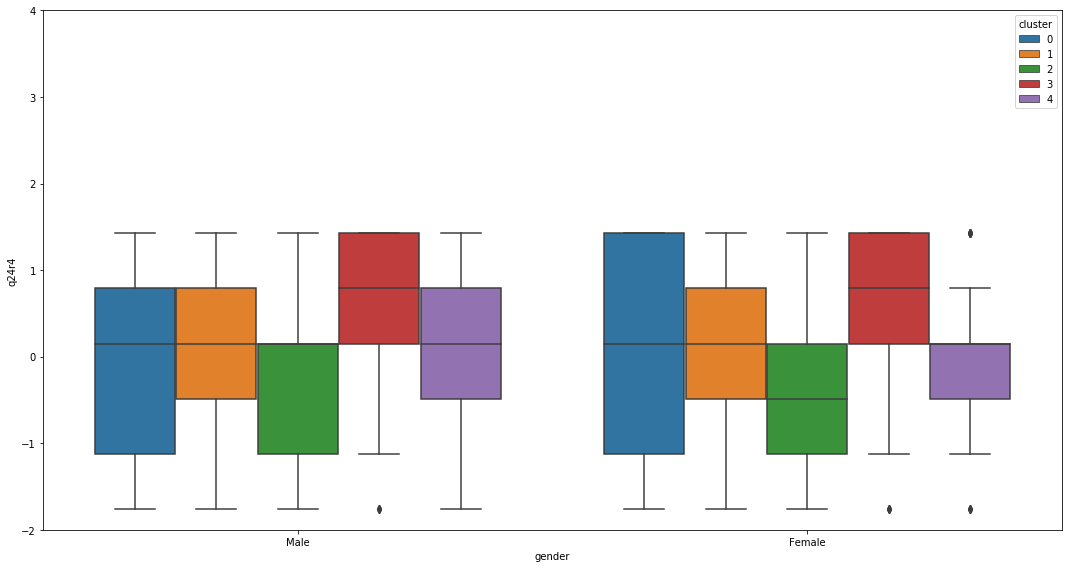

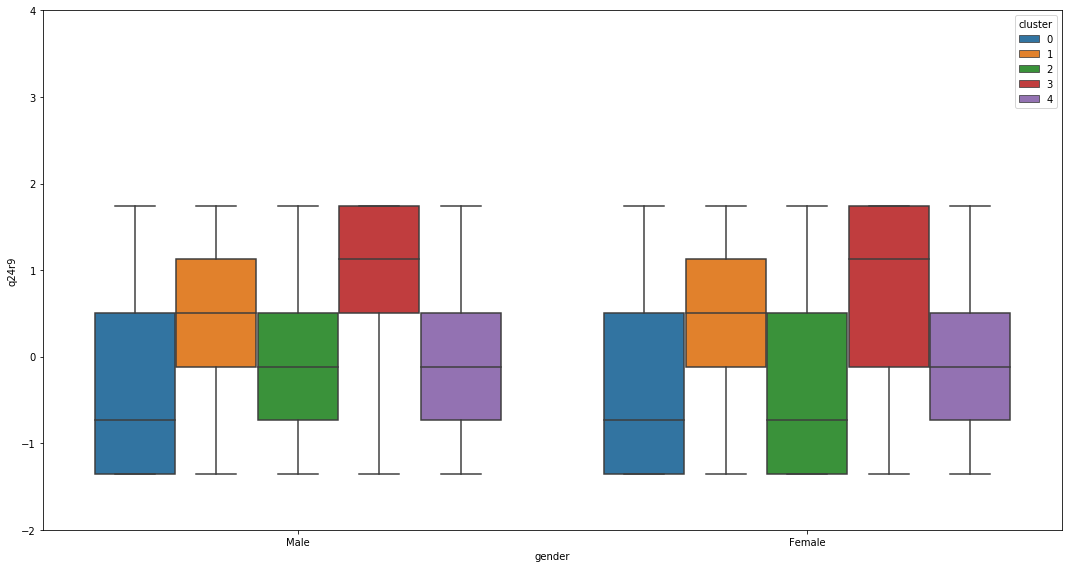

In [37]:
########################
## Cluster 4
########################

behavioral_names_4 = ['q4r11', 'q12', 'q2r9', 'q4r10', 'q24r4', 'q24r9']

for c in category_names:
    for b in behavioral_names_4:
        fig, ax = plt.subplots(figsize = (15, 8))
        sns.boxplot(x = c,
                    y = b,
                    hue = 'cluster',
                    data = final_clusters_df)

        plt.ylim(-2, 4)
        plt.tight_layout()
        plt.show()

# 4.0 Combine PCA & Cluster

In [38]:
########################
# Step 1: Take your transformed dataframe
########################


print(pd.np.var(X_pca_df))



########################
# Step 2: Scale to get equal variance
########################

scaler = StandardScaler()


scaler.fit(X_pca_df)


X_pca_clust = scaler.transform(X_pca_df)


X_pca_clust_df = pd.DataFrame(X_pca_clust)


print(pd.np.var(X_pca_clust_df)) 

X_pca_clust_df.columns = X_pca_df.columns

self_entertainment              13.276663
low_engagement_entertainment     4.925670
paid_entertainment               3.521024
practical_function               2.387992
free_entertainment               2.127816
dtype: float64
0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
dtype: float64


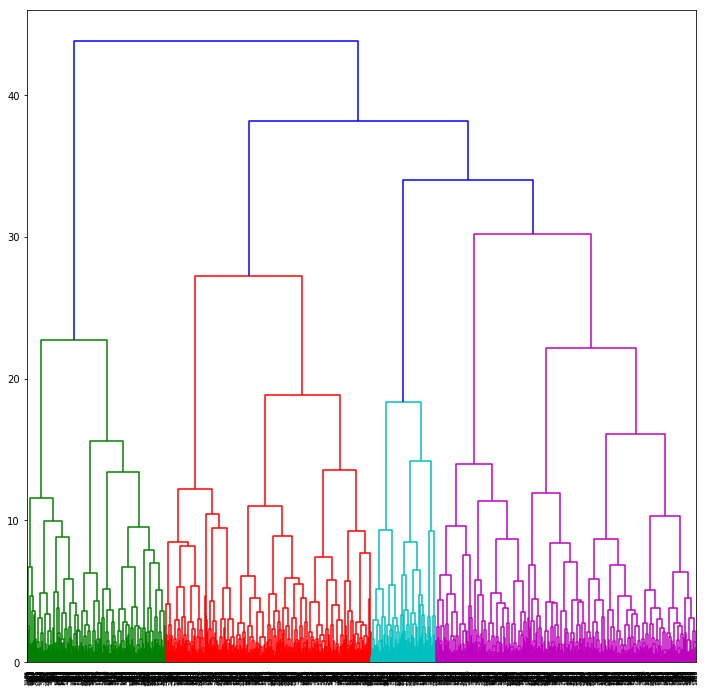

In [39]:
###############################################################################
# Building a Dendrogram
###############################################################################

standard_mergings_ward = linkage(y = X_pca_clust_df,
                                 method = 'ward')


fig, ax = plt.subplots(figsize=(12, 12))

dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)

plt.savefig('Dendrogram_combine_pca_clst.png')

plt.show()

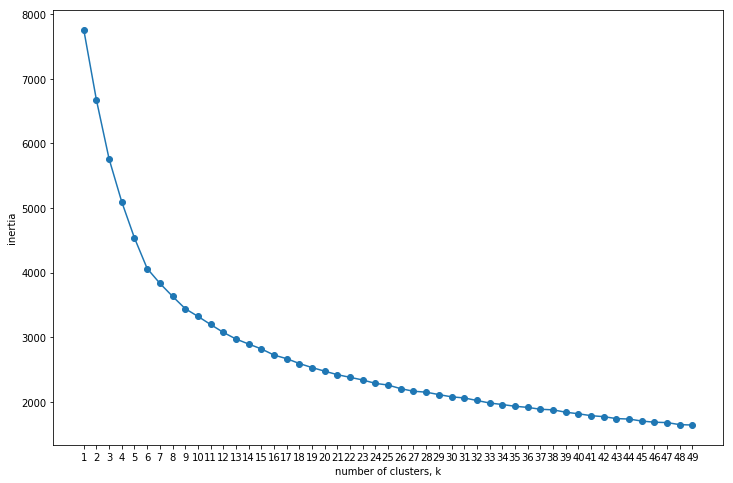

In [40]:
###############################################################################
# Plotting Intertia
###############################################################################

ks = range(1, 50)
inertias = []


for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters = k)


    # Fit model to samples
    model.fit(X_pca_clust_df)


    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)



# Plot ks vs inertias
fig, ax = plt.subplots(figsize = (12, 8))
plt.plot(ks, inertias, '-o')


plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)

plt.savefig('Intertia_combine_pca_clst.png')

plt.show()


#### Clusters of 8 is where the elbow is.

In [41]:
########################
# Step 3: Experiment with different numbers of clusters
########################

survey_k_pca = KMeans(n_clusters = 8,
                         random_state = 508)


survey_k_pca.fit(X_pca_clust_df)


survey_kmeans_pca = pd.DataFrame({'cluster': survey_k_pca.labels_})


print(survey_kmeans_pca.iloc[: , 0].value_counts())


2    302
1    269
5    253
4    211
6    180
7    119
3    115
0    103
Name: cluster, dtype: int64


In [42]:
########################
# Step 4: Analyze cluster centers
########################

centroids_pca = survey_k_pca.cluster_centers_


centroids_pca_df = pd.DataFrame(centroids_pca)


# Rename your principal components
centroids_pca_df.columns = ['self_entertainment', 'low_engagement_entertainment', 
                            'paid_entertainment','practical_function', 'free_entertainment']


centroids_pca_df

self_entertainment  low_engagement_entertainment  paid_entertainment  \
0            1.002125                      0.070940            0.977483   
1            0.247349                     -0.470766            0.004287   
2           -0.065896                     -0.832586           -0.903686   
3            0.516316                      1.868035           -0.446327   
4            0.761302                      0.307149           -0.044978   
5           -0.634691                     -0.366737            1.130337   
6           -1.520274                      1.077652           -0.386722   
7            0.540840                     -0.084498            0.130518   

   practical_function  free_entertainment  
0            1.183442            1.074826  
1           -0.649704            1.068680  
2            0.245939           -0.297229  
3            0.101912            0.125756  
4           -0.936080           -0.807592  
5           -0.320423           -0.456260  
6            0.203469            0.416610  
7            1.754939           -0.941469

In [43]:
# Sending data to Excel
centroids_pca_df.to_excel('Combined_pca_centriods.xlsx')

In [47]:
########################
# Step 5: Analyze cluster memberships
########################

clst_pca_df = pd.concat([survey_kmeans_pca,
                         X_pca_clust_df],
                         axis = 1)

clst_pca_df.to_excel('for analysis_purpose.xlsx')

clst_pca_df.head()

cluster  self_entertainment  low_engagement_entertainment  \
0        7            0.717243                      0.455408   
1        5            0.598731                     -0.593132   
2        1            0.479082                     -0.964321   
3        6           -1.309125                      0.826012   
4        1            0.392592                      0.329626   

   paid_entertainment  practical_function  free_entertainment  
0            1.001185            1.045548           -1.351881  
1            1.245947           -0.958600           -0.053122  
2            0.245626           -1.629104            0.658379  
3            0.843532            0.122564            0.133091  
4            0.009513           -0.615625            1.181990

In [46]:
########################
# Step 6: Reattach demographic information
########################

final_pca_clust_df = pd.concat([survey.loc[ : , ['age', 'education','marital',
                                           'no_child', 'child<6','child6_12',
                                           'child13_17','child>18','race', 
                                           'H/L_ethnicity', 'income', 'gender']],
                                clst_pca_df],axis = 1)

final_pca_clust_df.to_excel('final_combined_pca_clust.xlsx')

final_pca_clust_df.head()

age         education  marital  no_child  child<6  child6_12  child13_17  \
0  35-39      Some college  Married         0        0          0           1   
1  25-29      Some college   Single         1        0          0           0   
2  18-24  Some high school   Single         1        0          0           0   
3  18-24  College graduate   Single         1        0          0           0   
4  30-34      Some college  Married         0        1          0           0   

   child>18                       race           H/L_ethnicity  \
0         0         White or Caucasian  Not Hispanic or Latino   
1         0  Black or African American  Not Hispanic or Latino   
2         0         White or Caucasian  Not Hispanic or Latino   
3         0  Black or African American  Not Hispanic or Latino   
4         0         White or Caucasian  Not Hispanic or Latino   

             income  gender  cluster  self_entertainment  \
0  $90,000-$99,999     Male        7            0.717243   
1  $70,000-$79,999   Female        5            0.598731   
2  $60,000-$69,999   Female        1            0.479082   
3         <$10,000     Male        6           -1.309125   
4  $90,000-$99,999   Female        1            0.392592   

   low_engagement_entertainment  paid_entertainment  practical_function  \
0                      0.455408            1.001185            1.045548   
1                     -0.593132            1.245947           -0.958600   
2                     -0.964321            0.245626           -1.629104   
3                      0.826012            0.843532            0.122564   
4                      0.329626            0.009513           -0.615625   

   free_entertainment  
0           -1.351881  
1           -0.053122  
2            0.658379  
3            0.133091  
4            1.181990

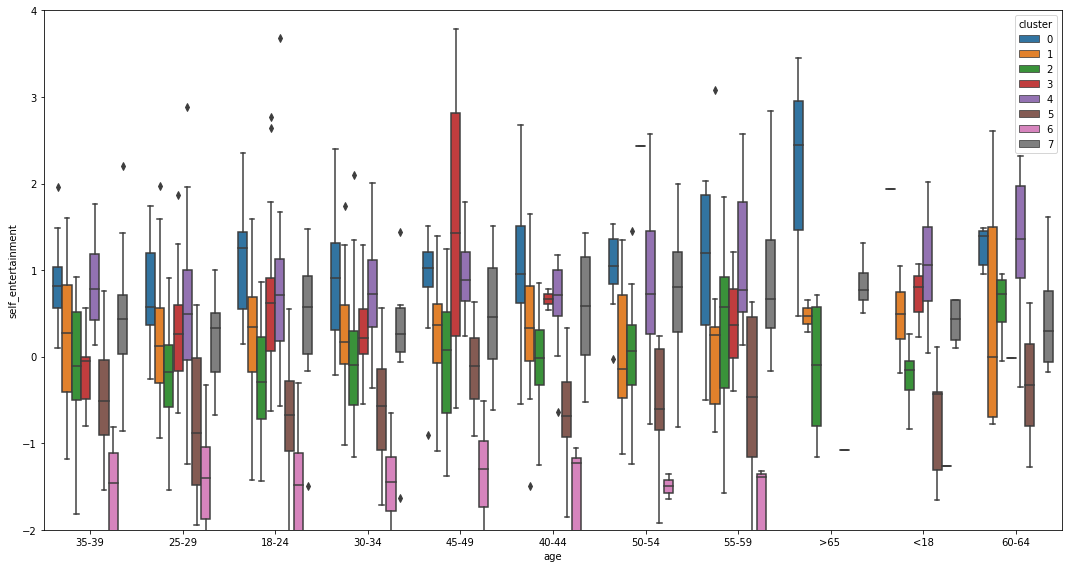

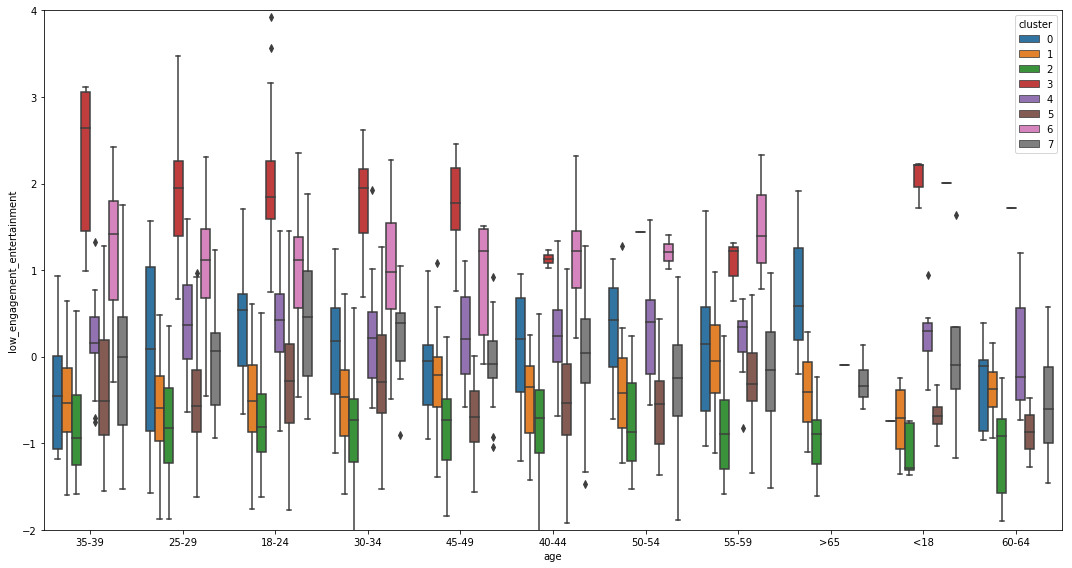

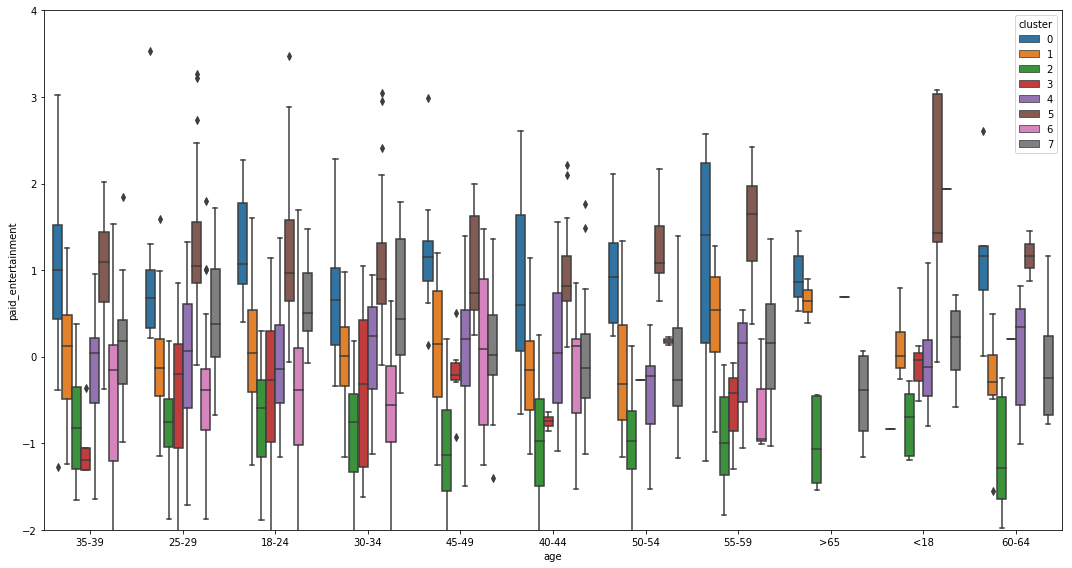

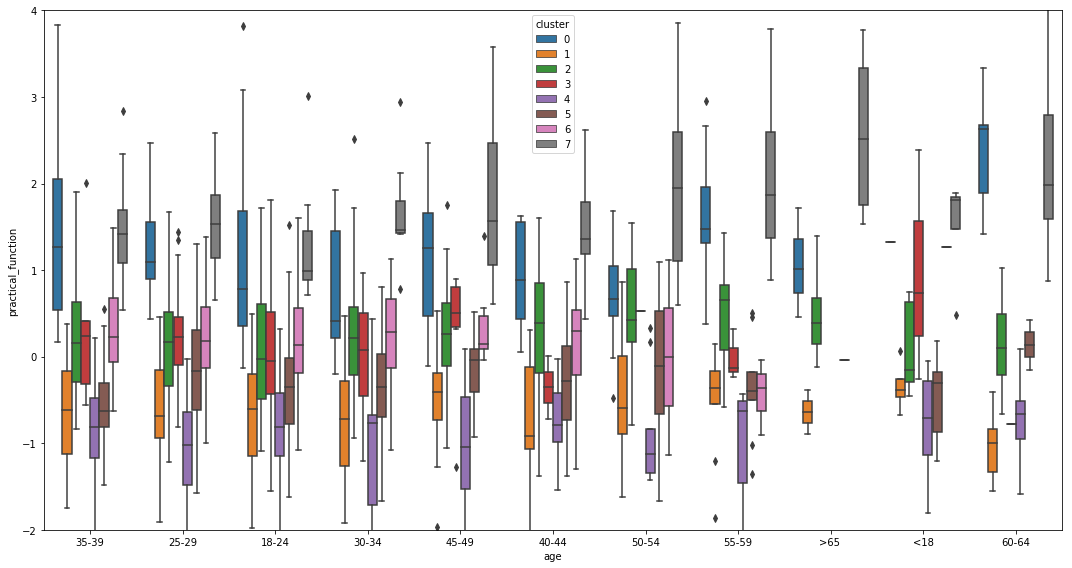

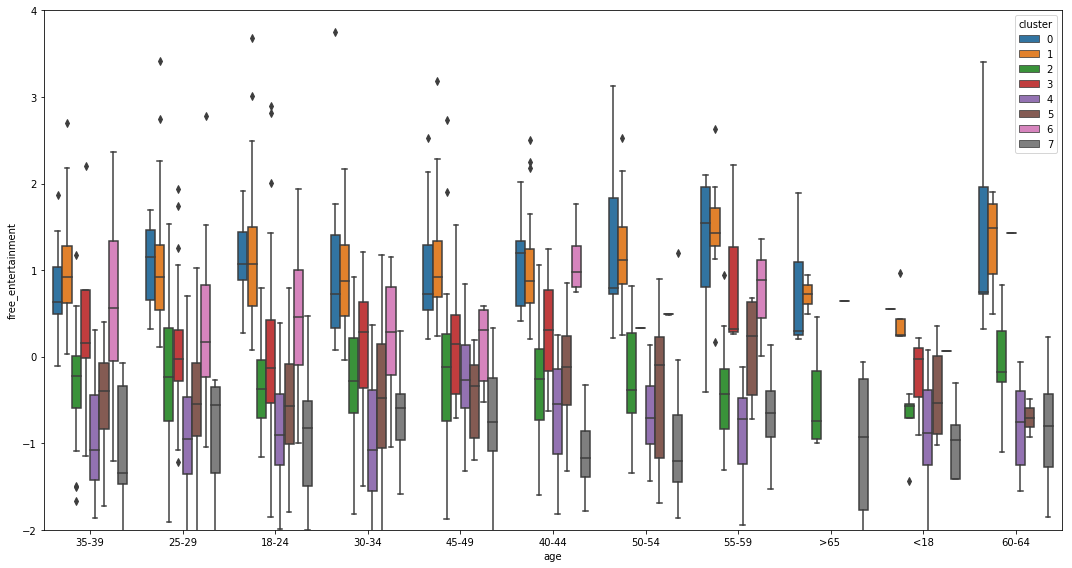

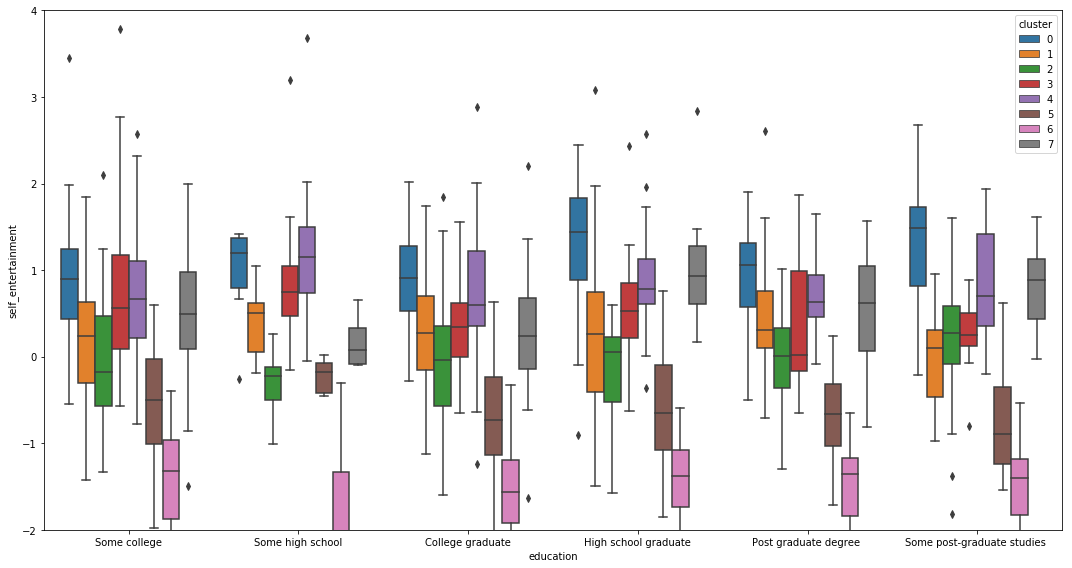

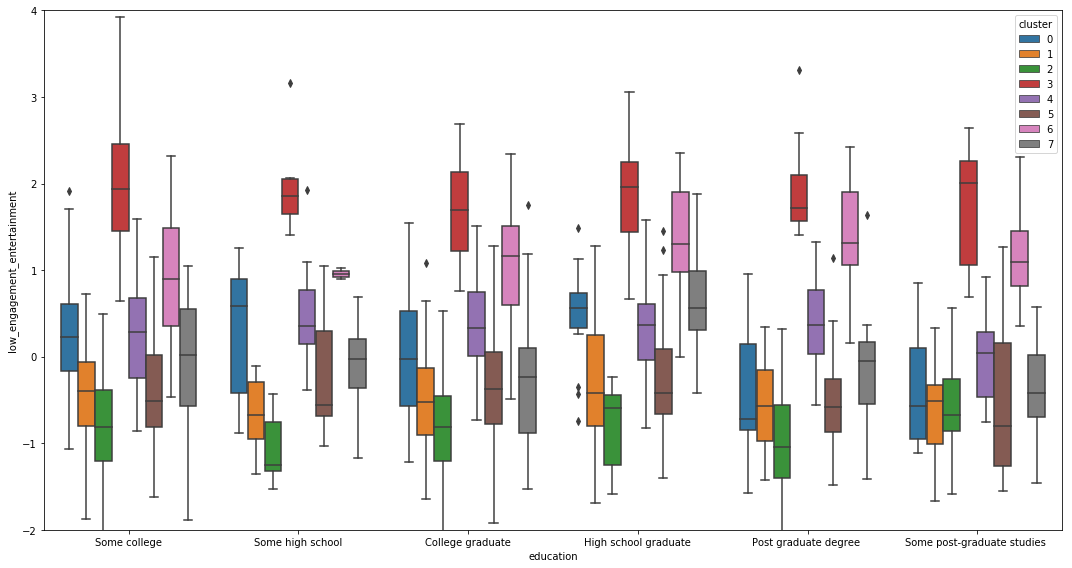

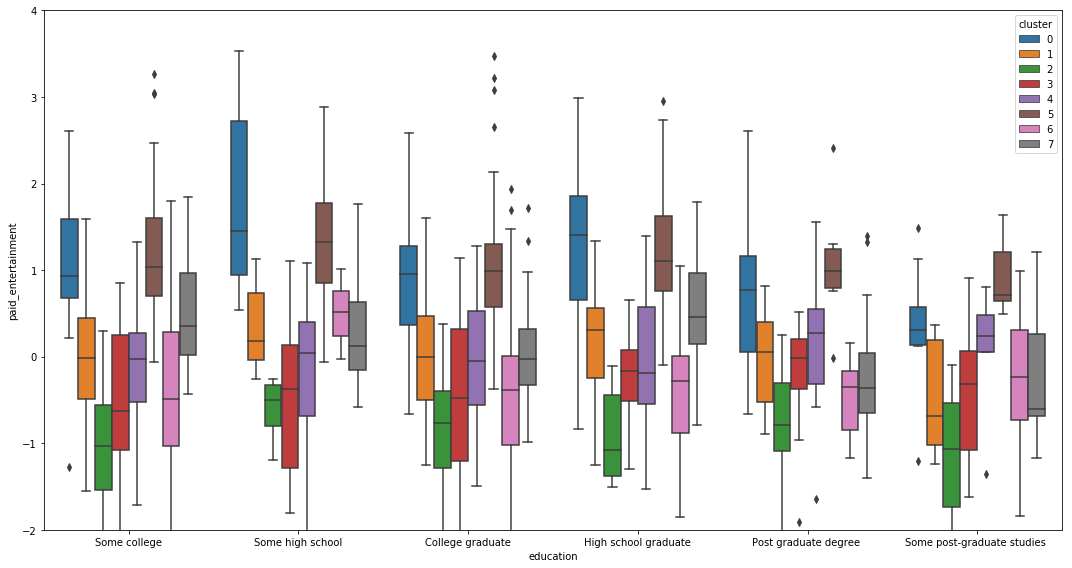

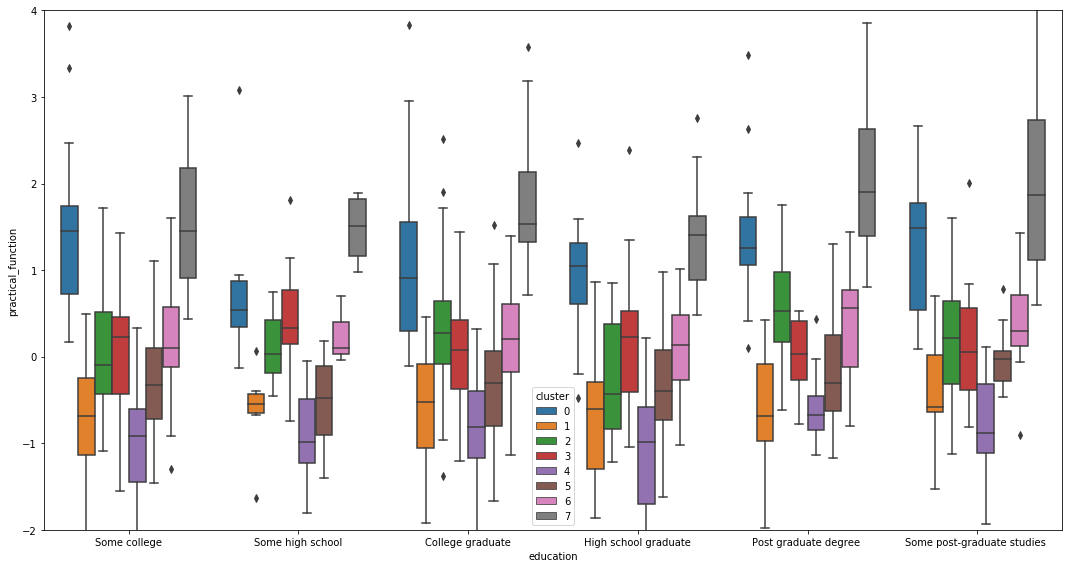

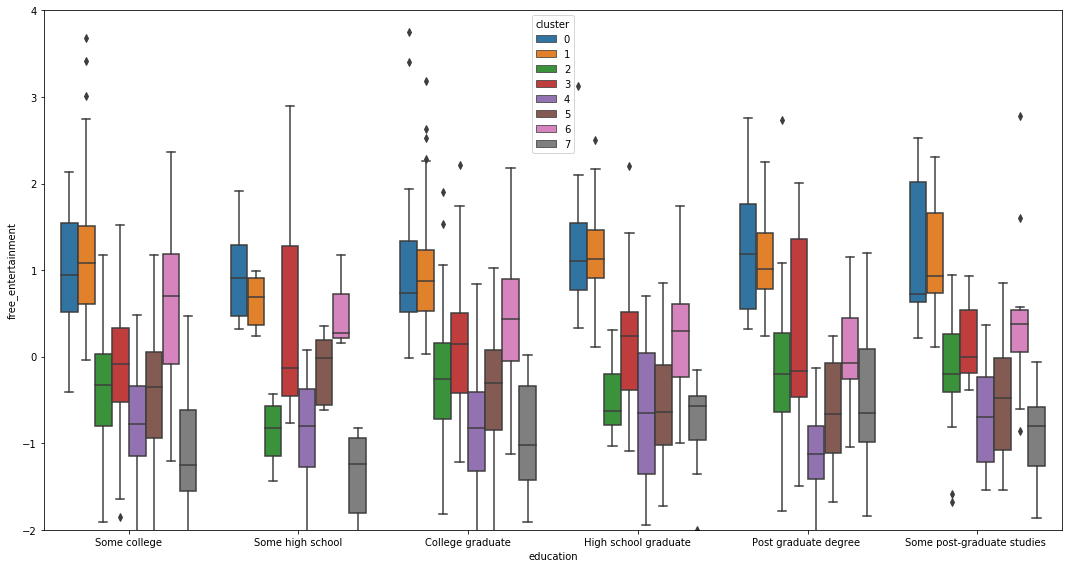

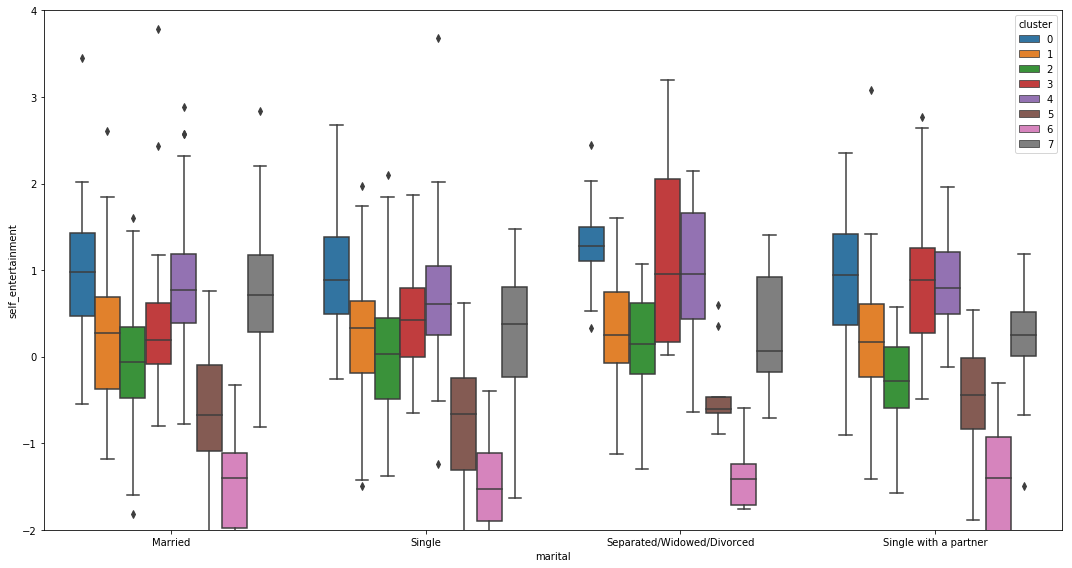

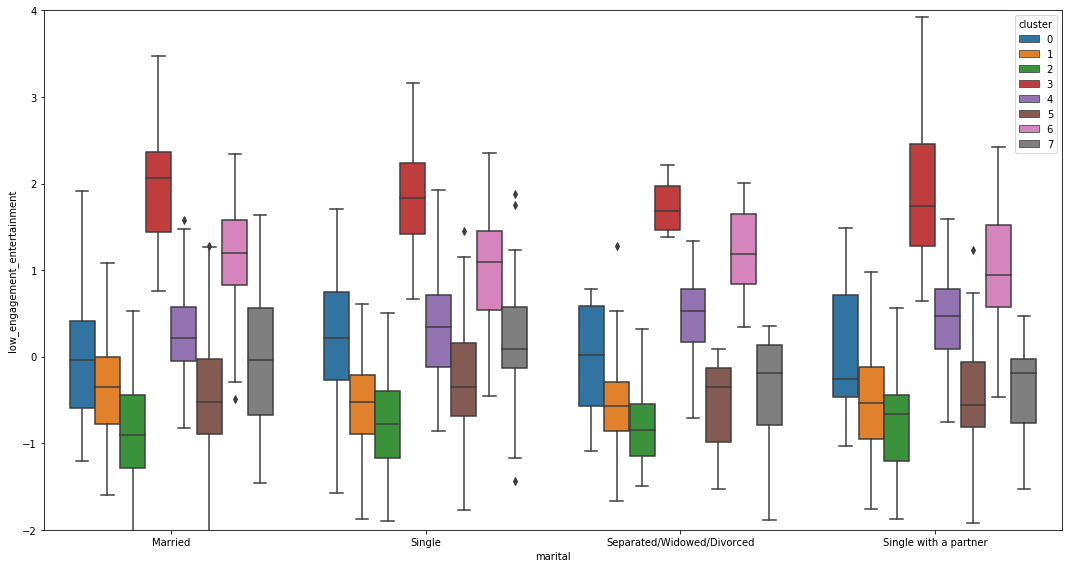

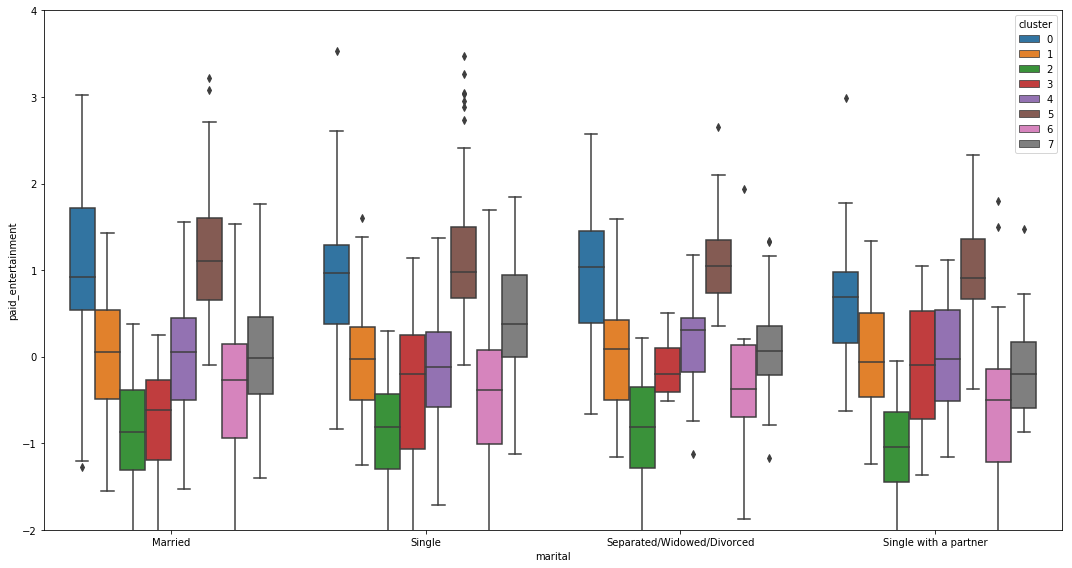

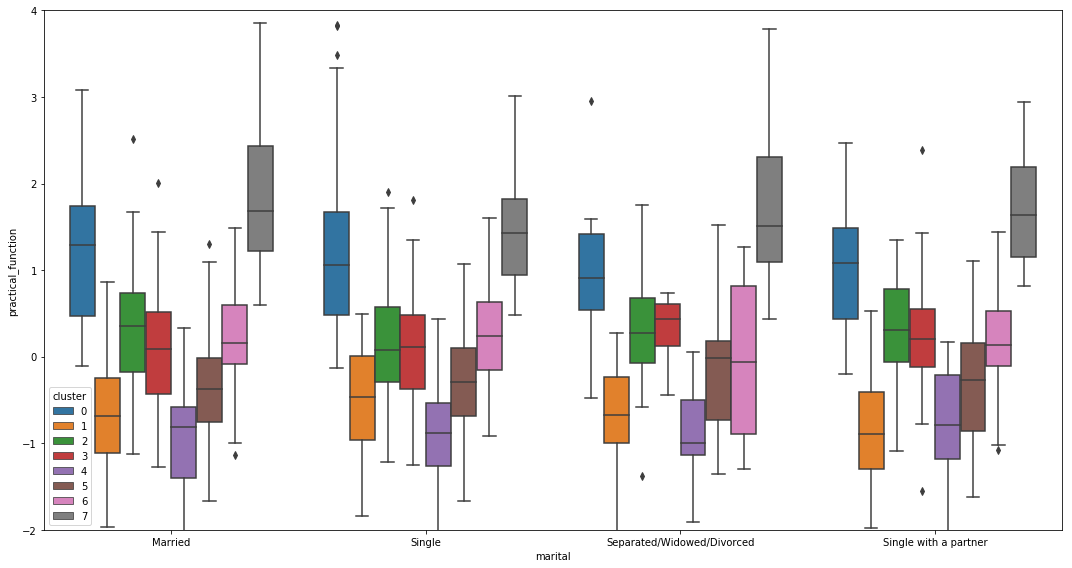

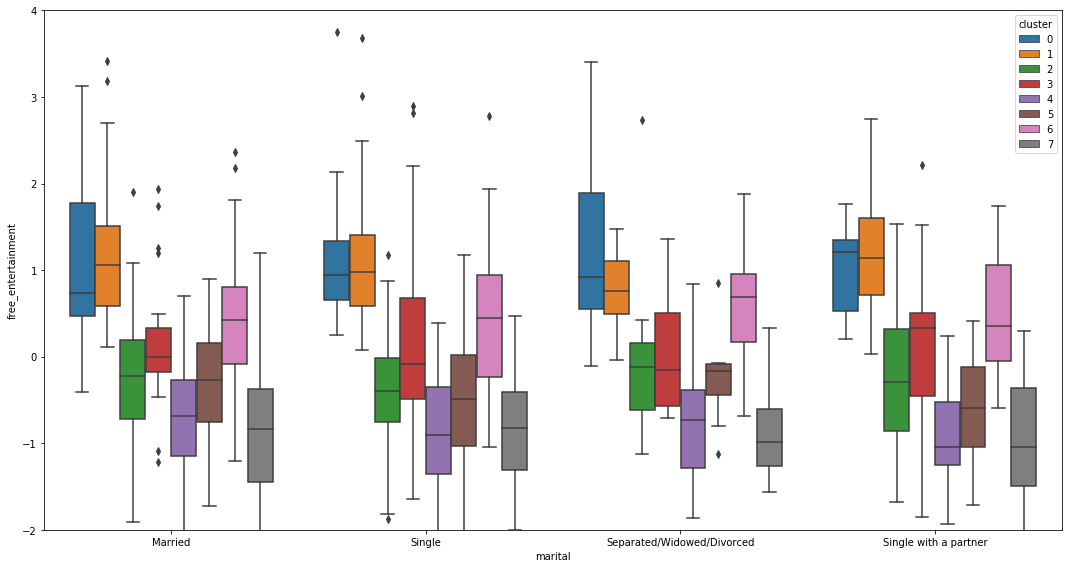

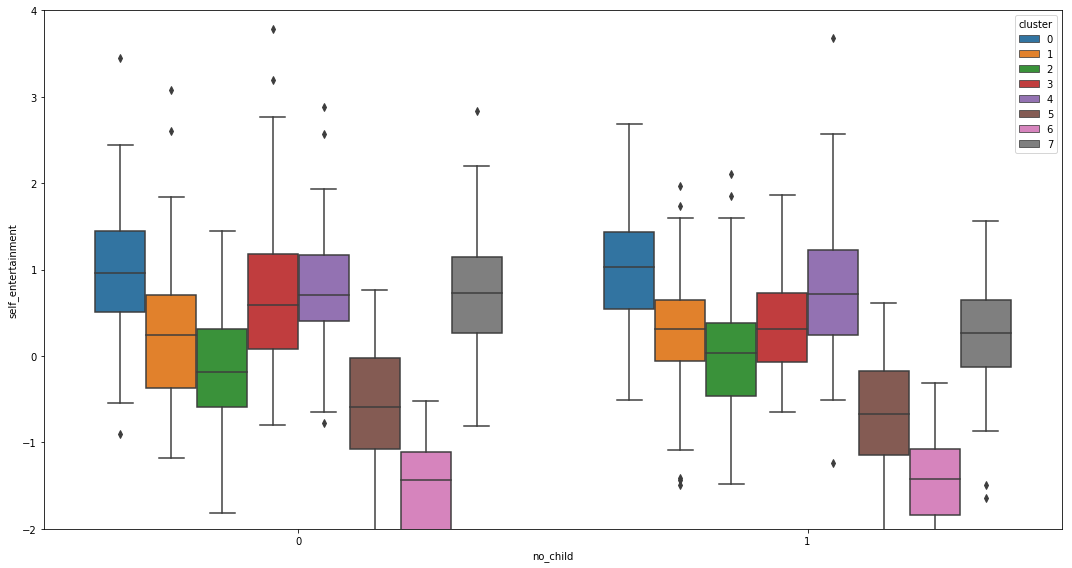

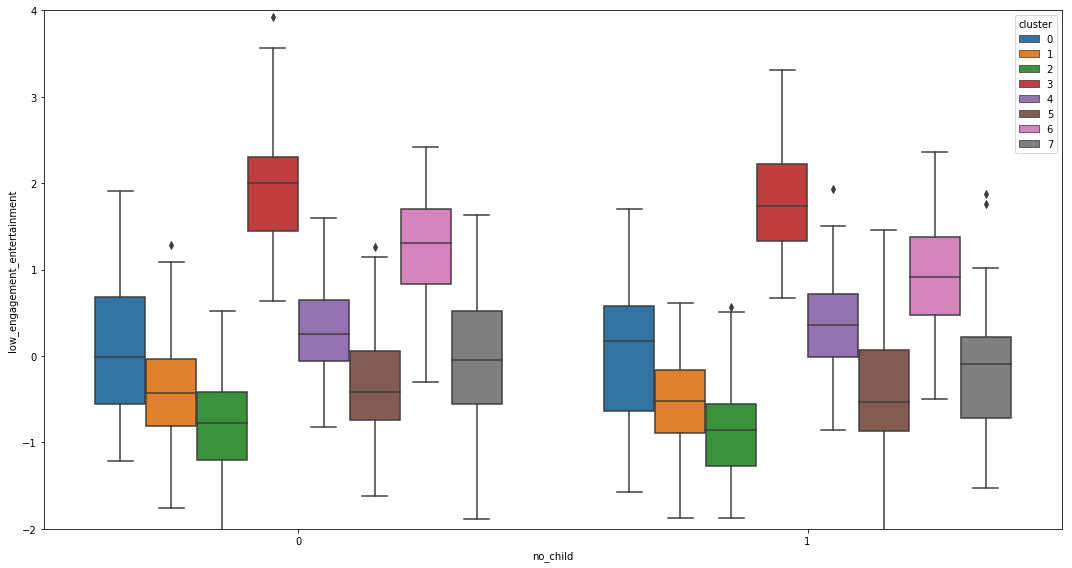

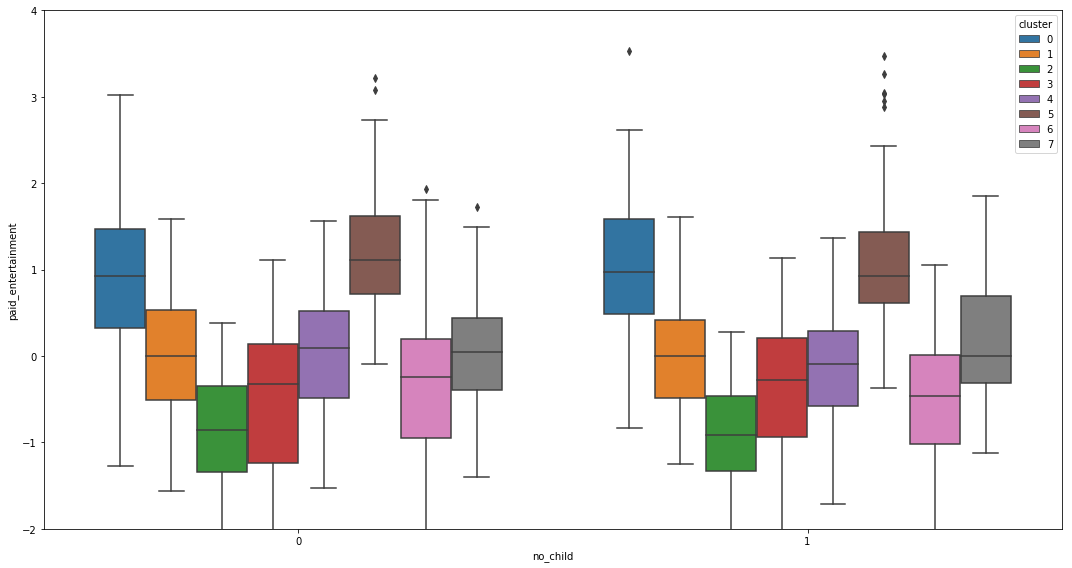

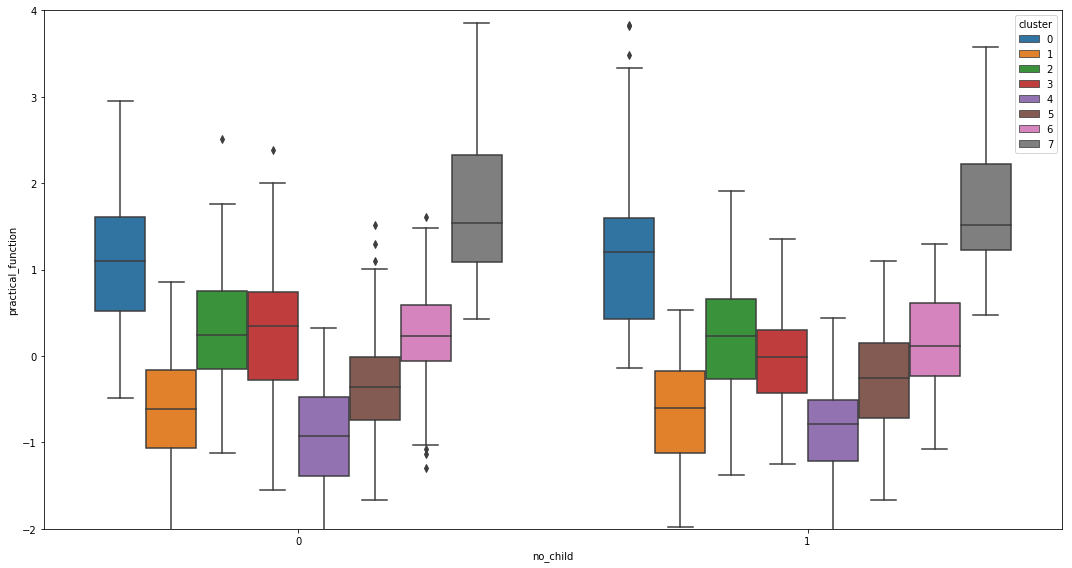

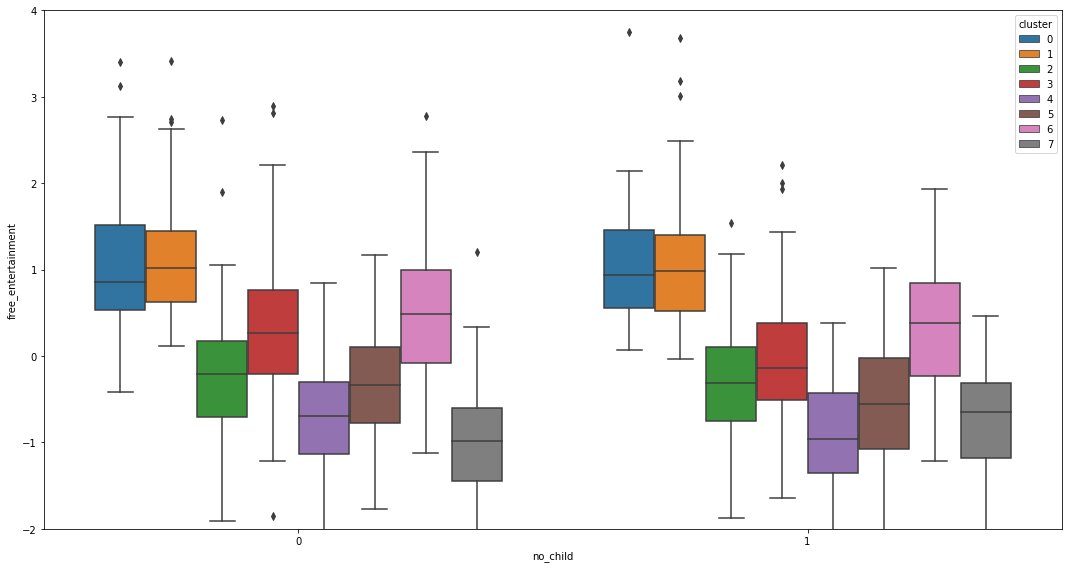

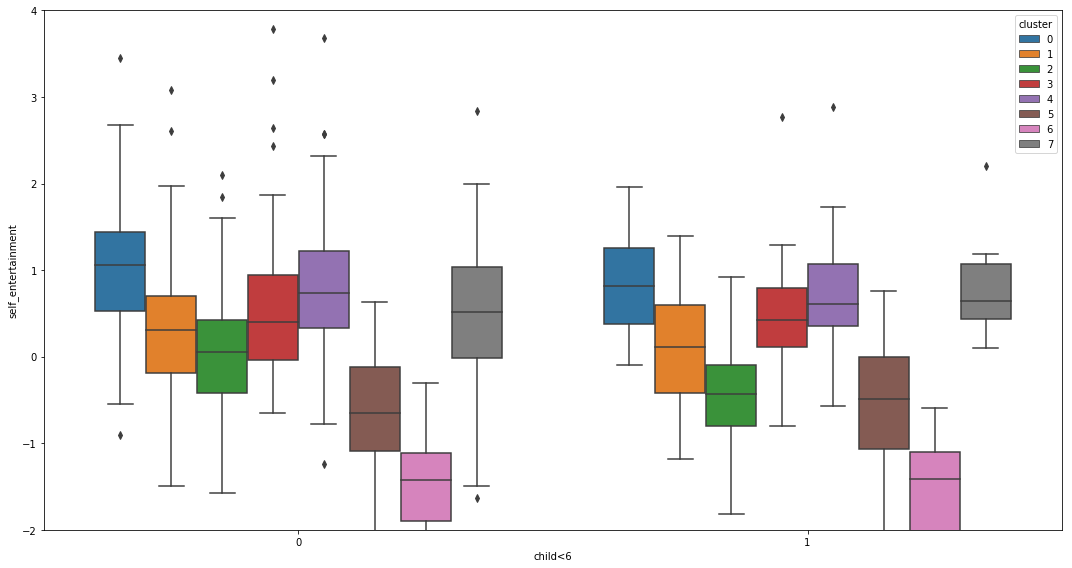

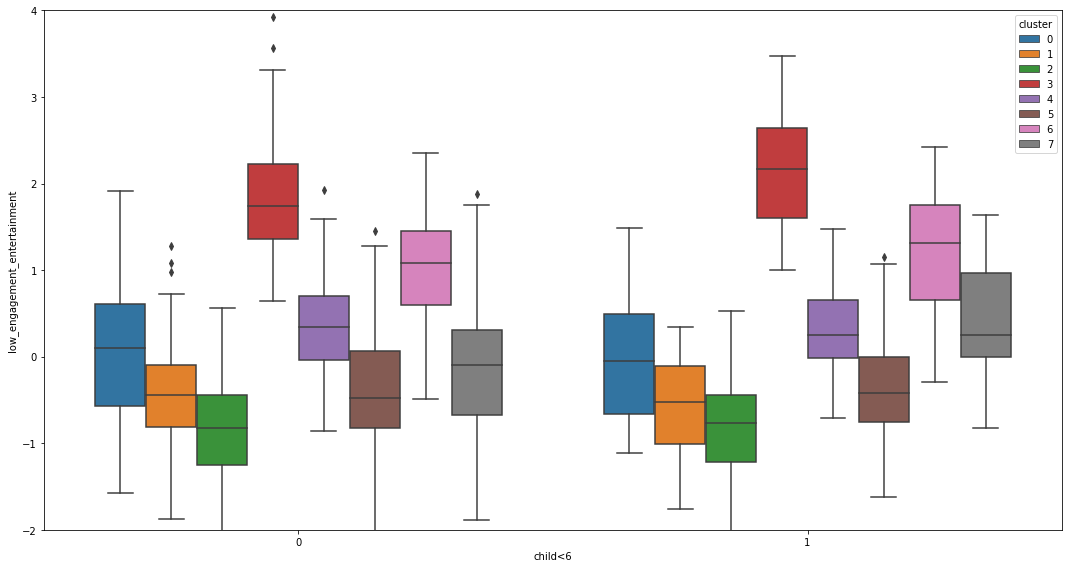

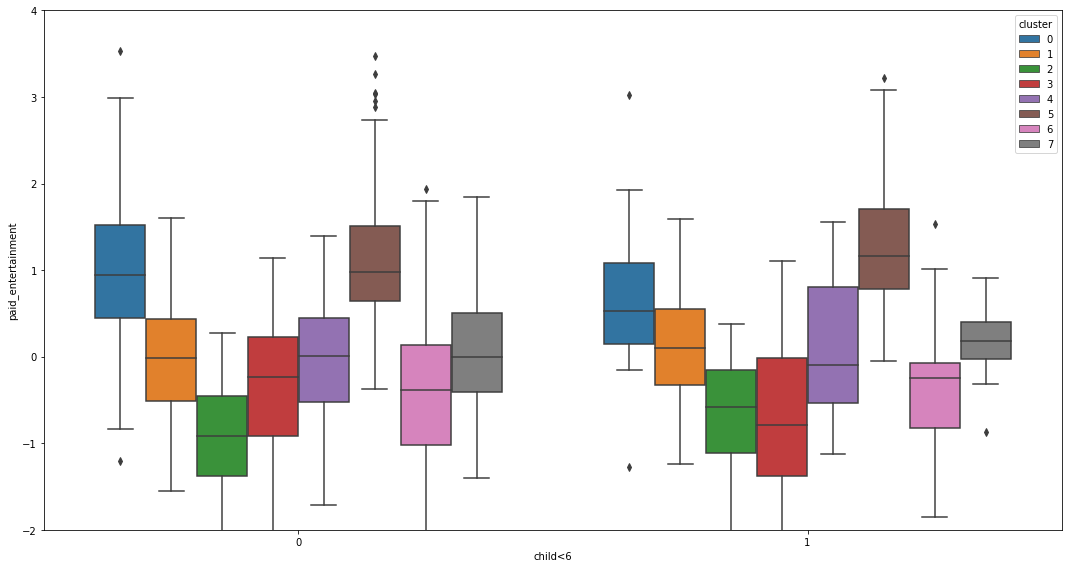

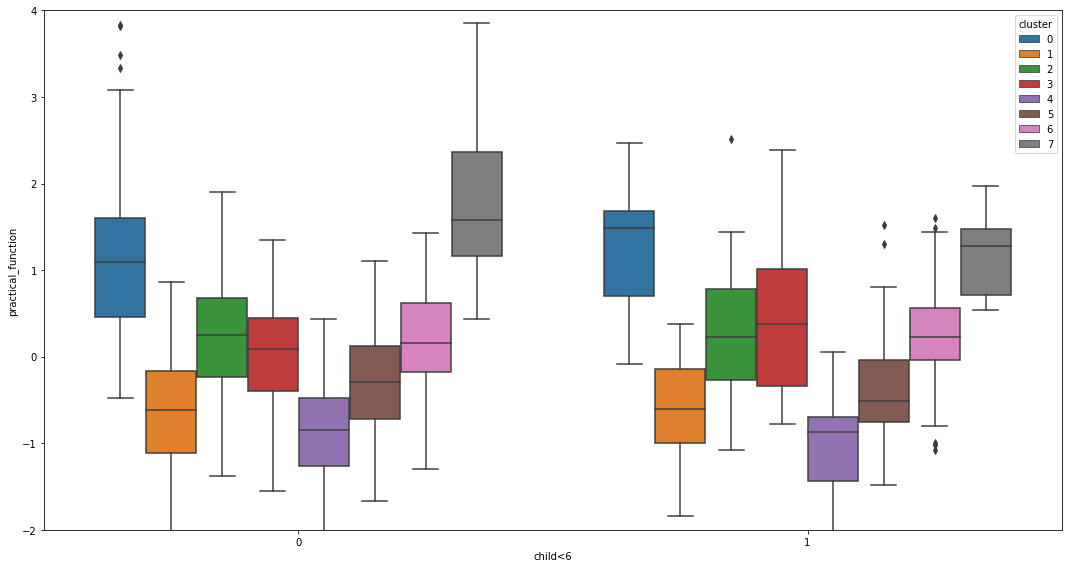

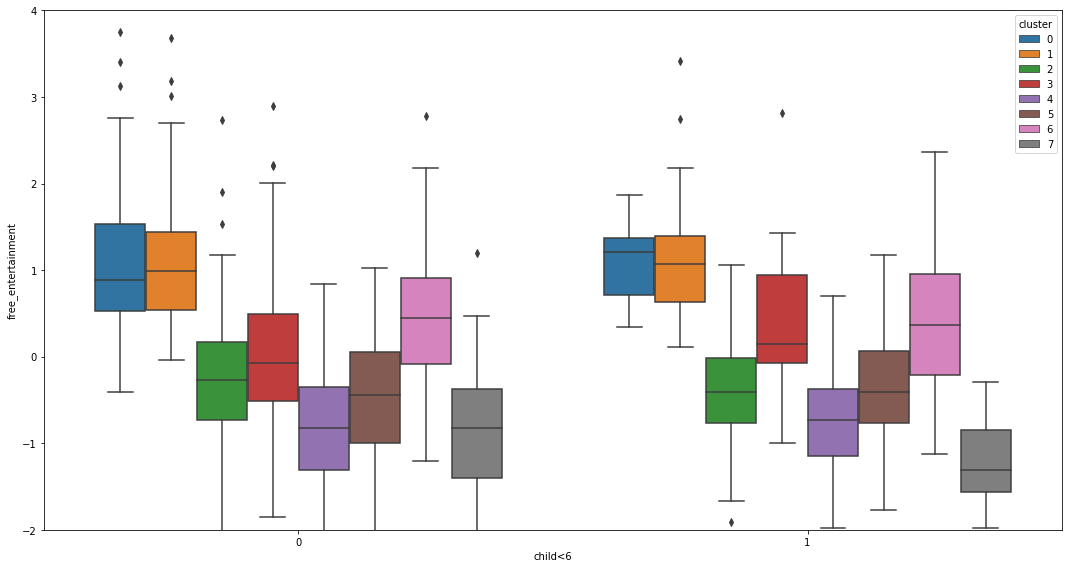

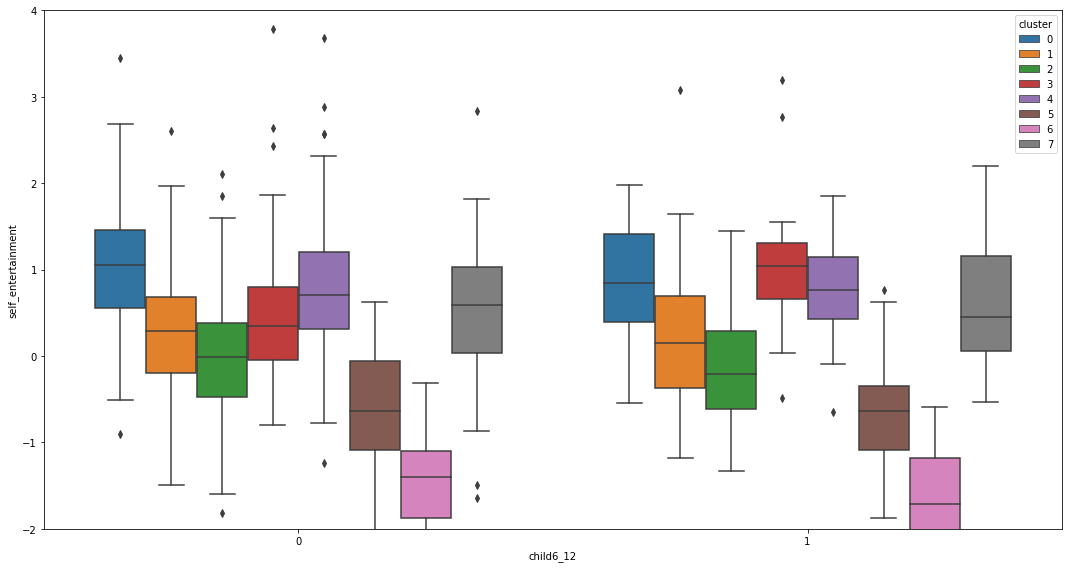

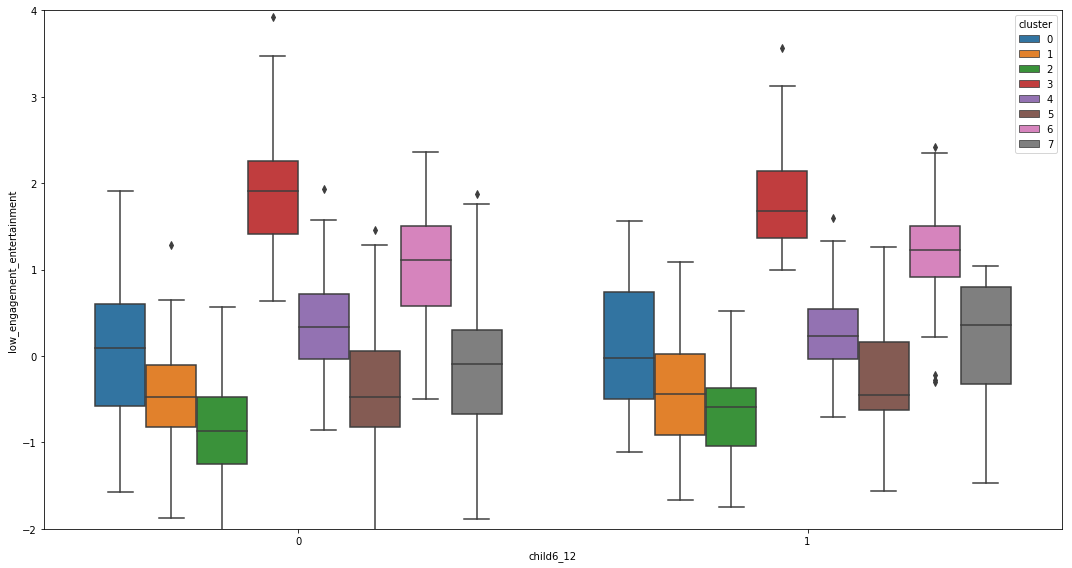

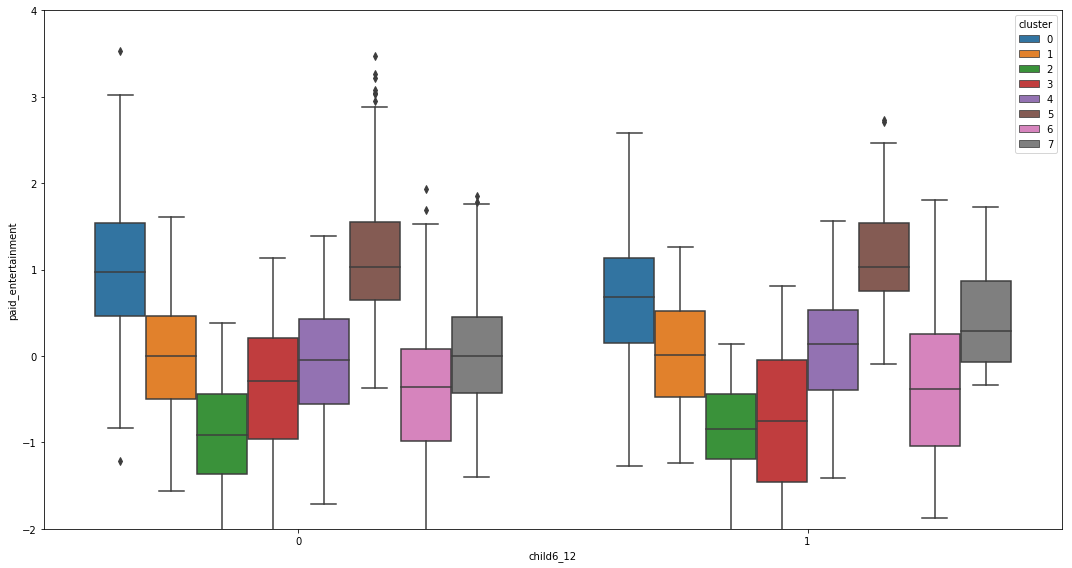

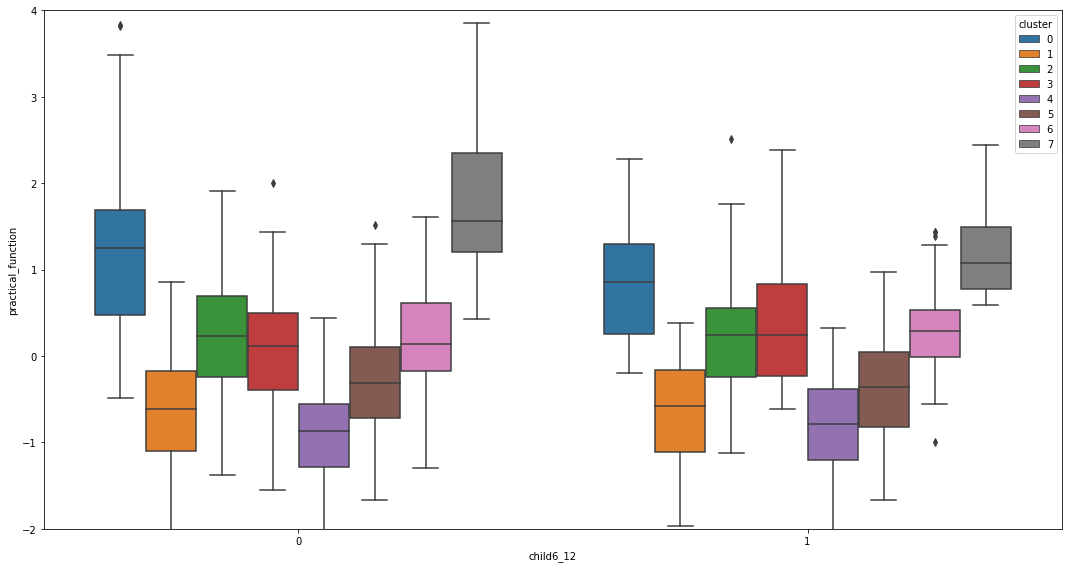

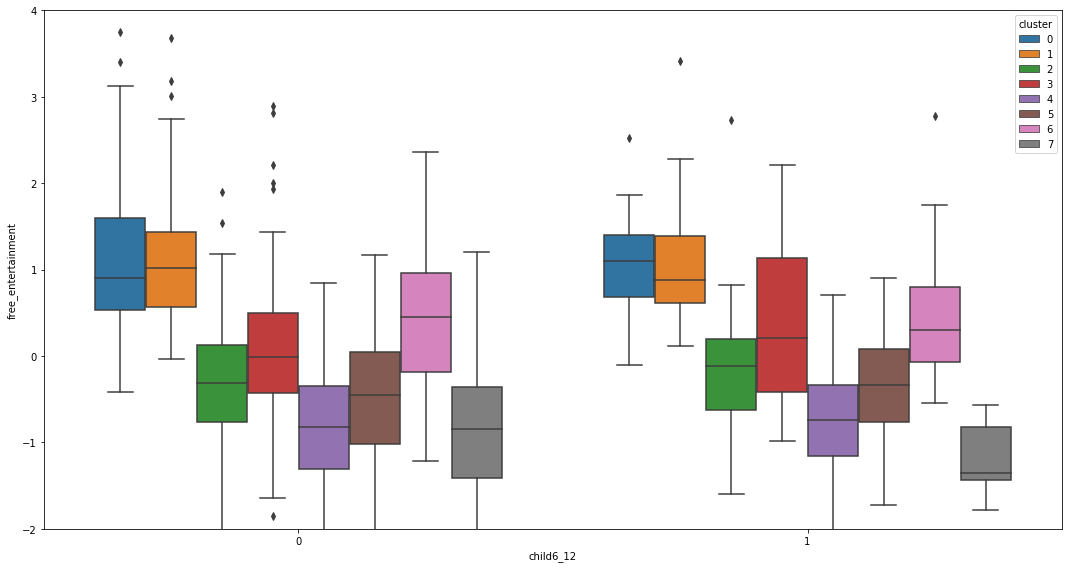

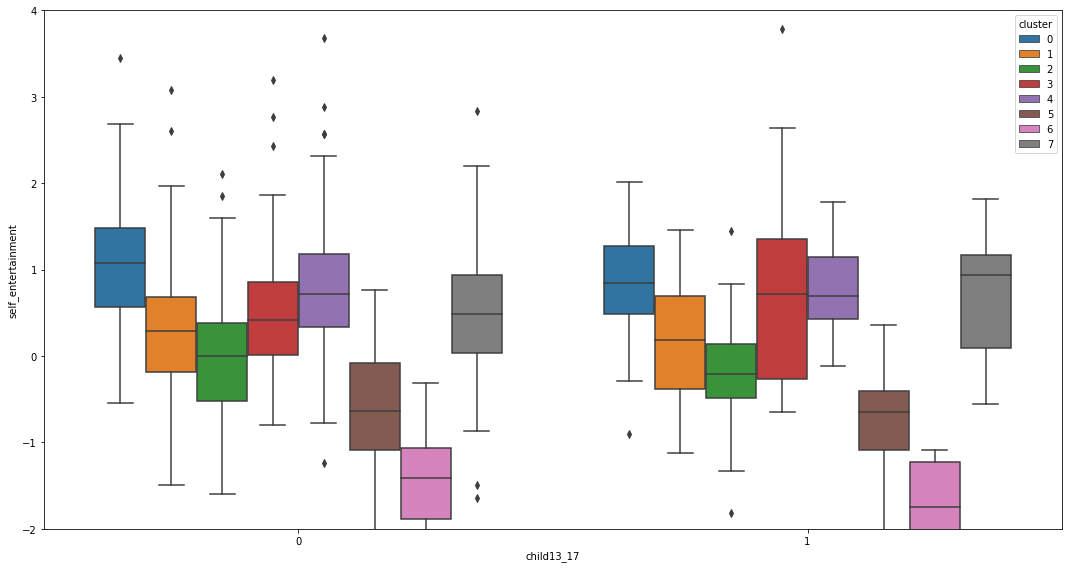

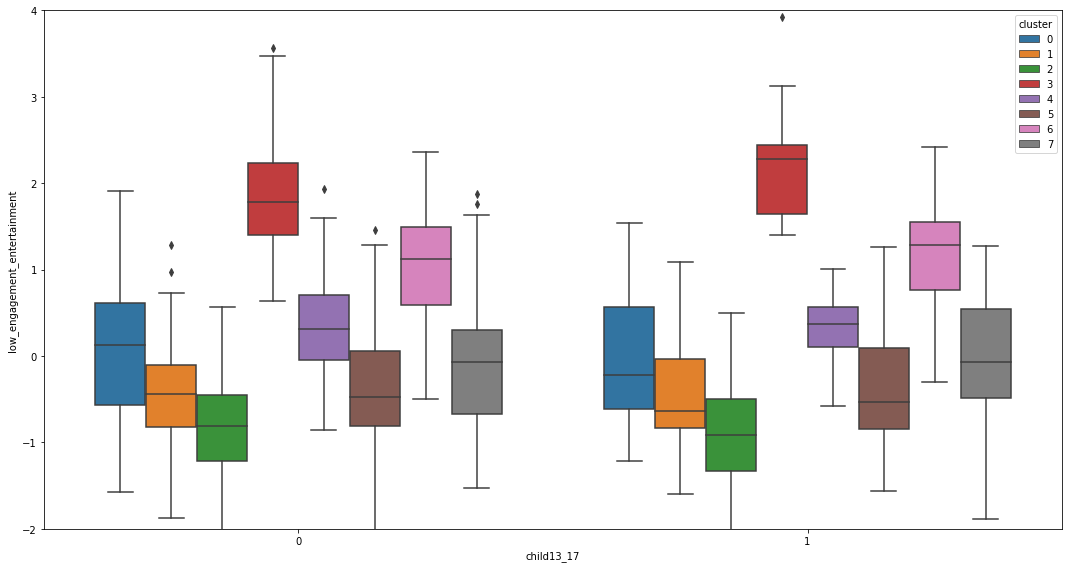

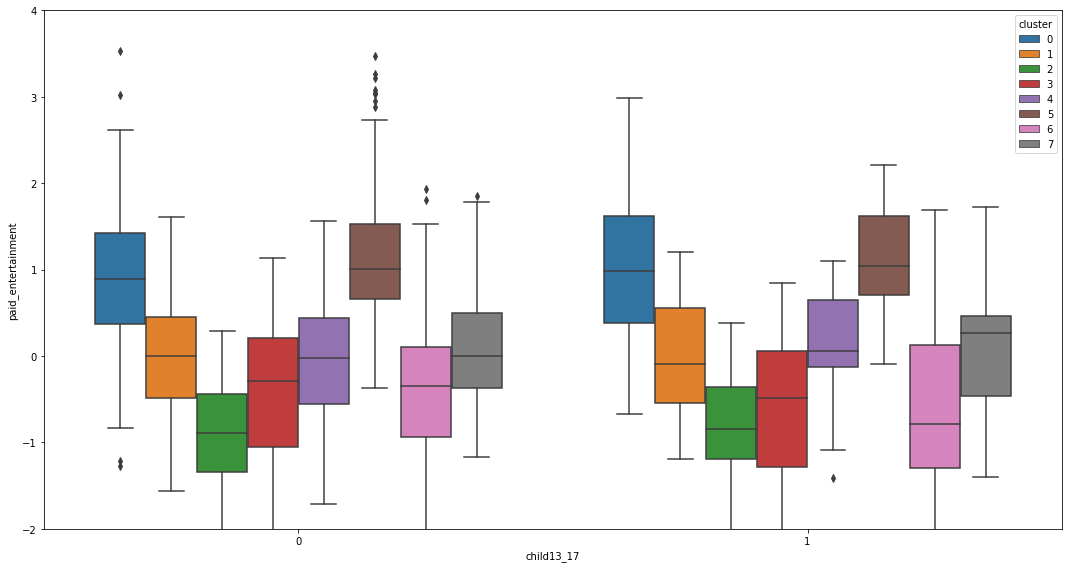

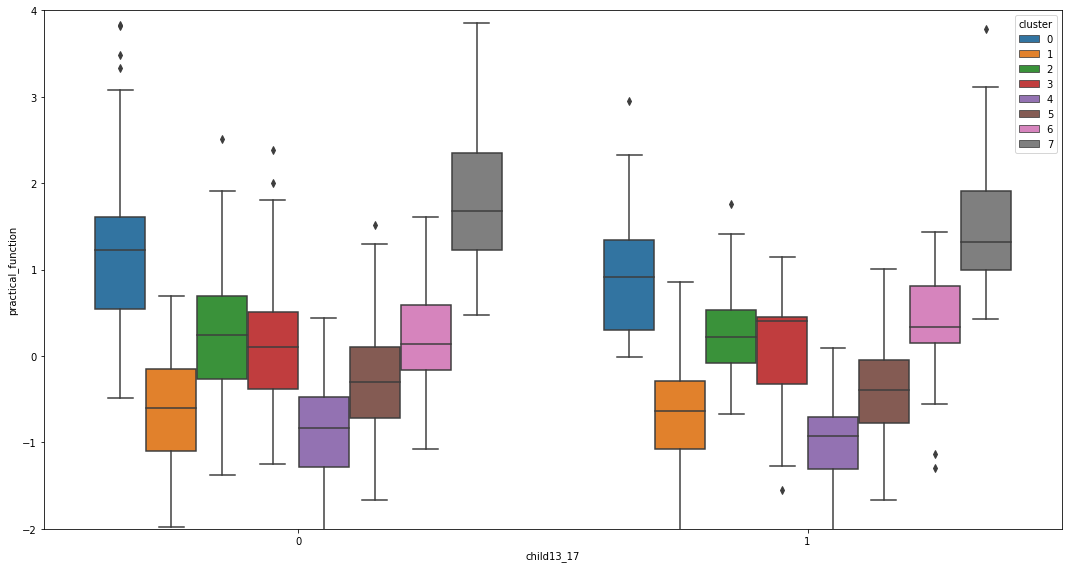

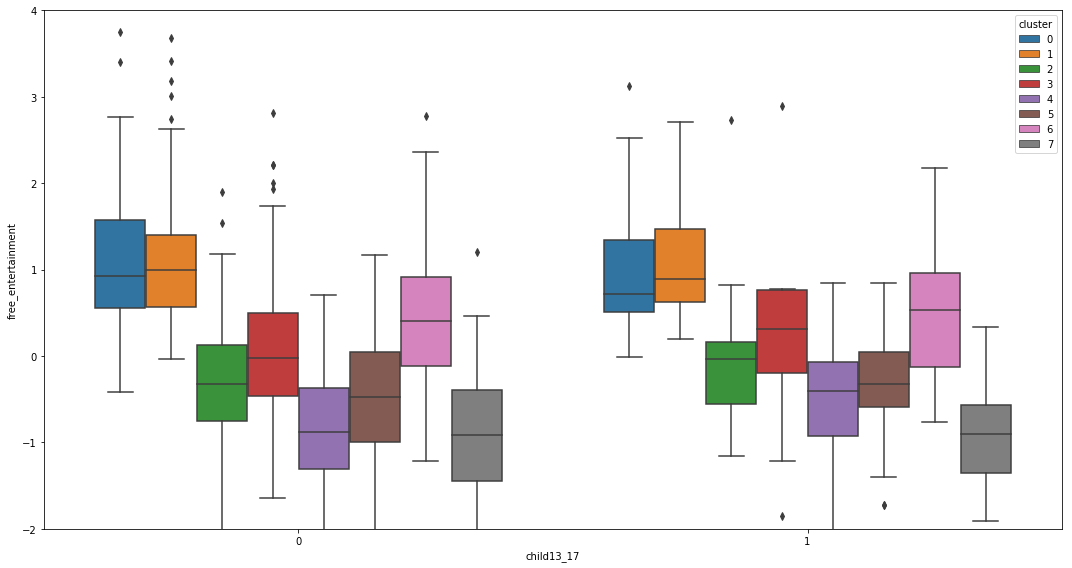

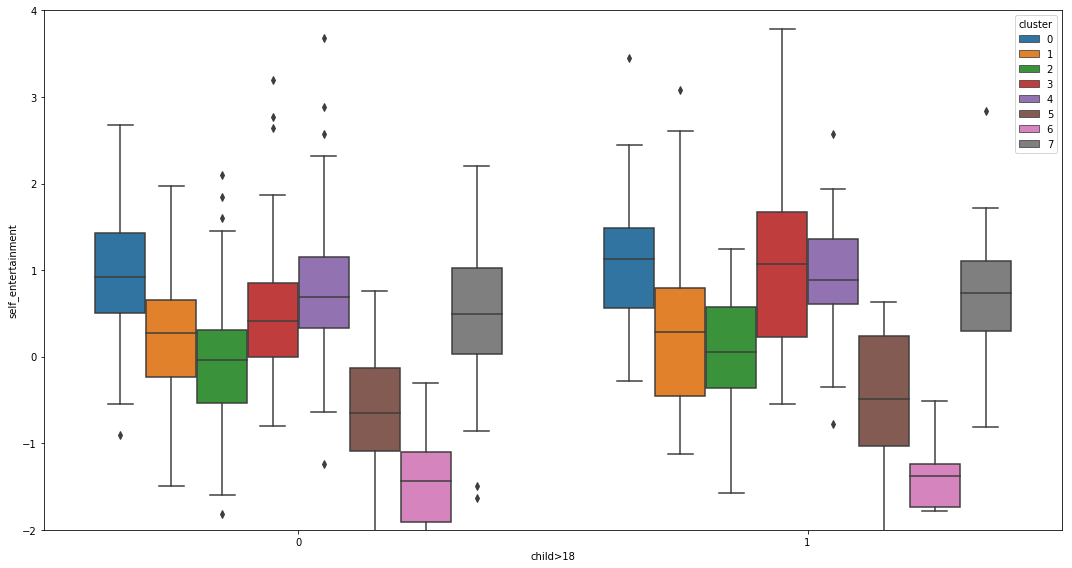

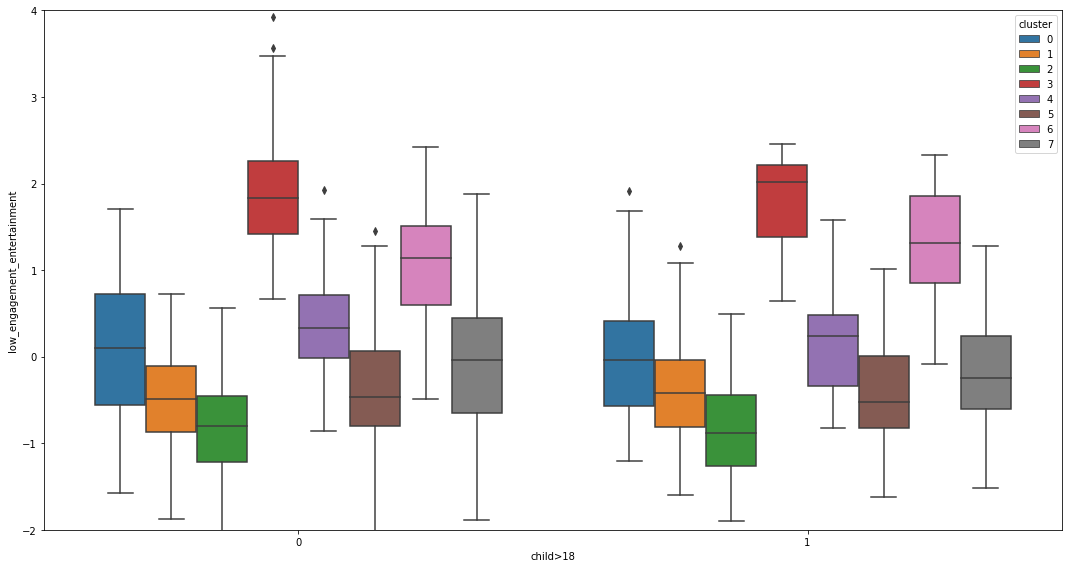

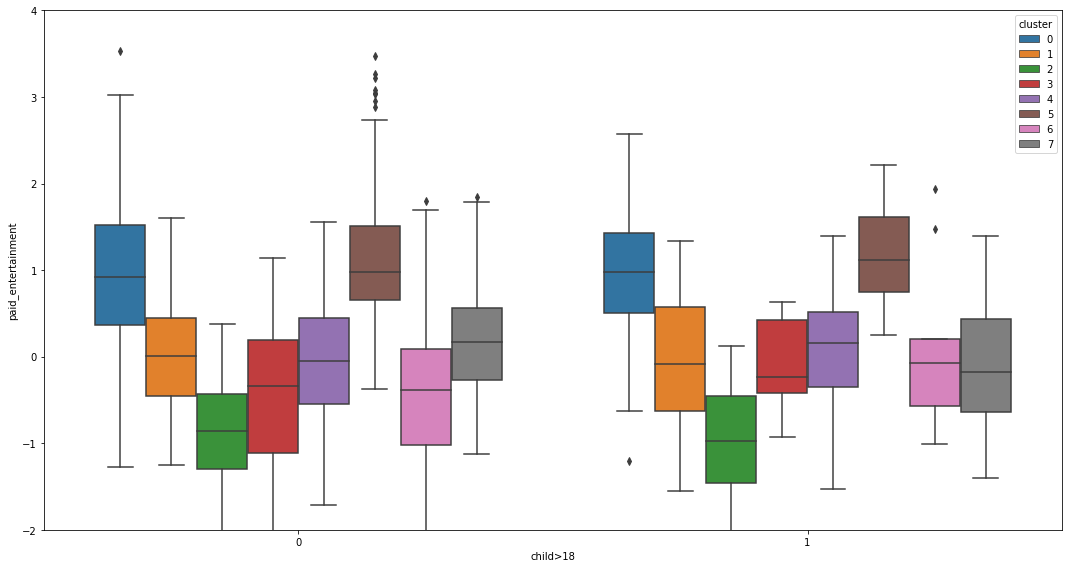

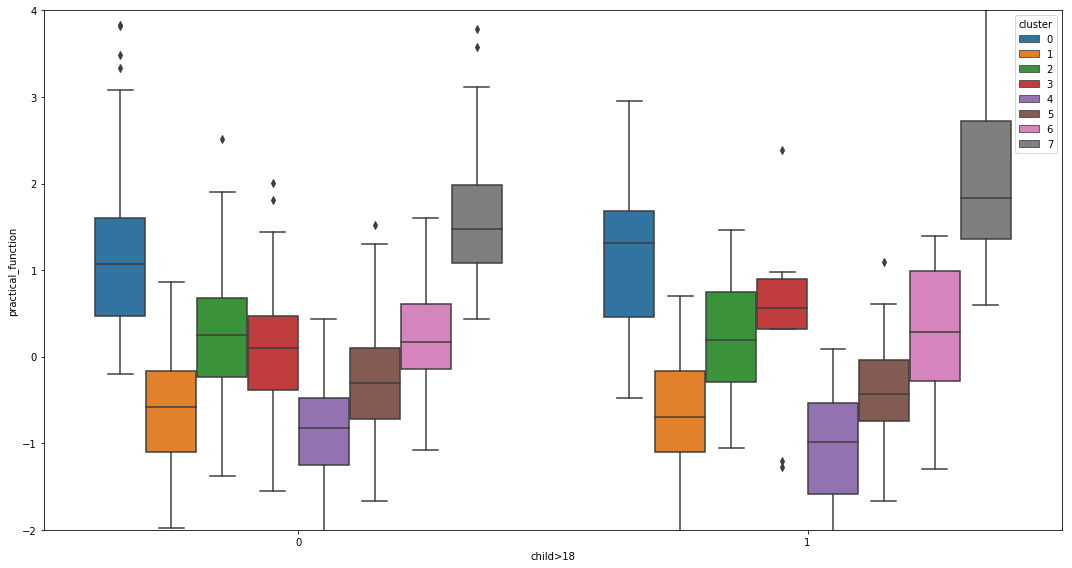

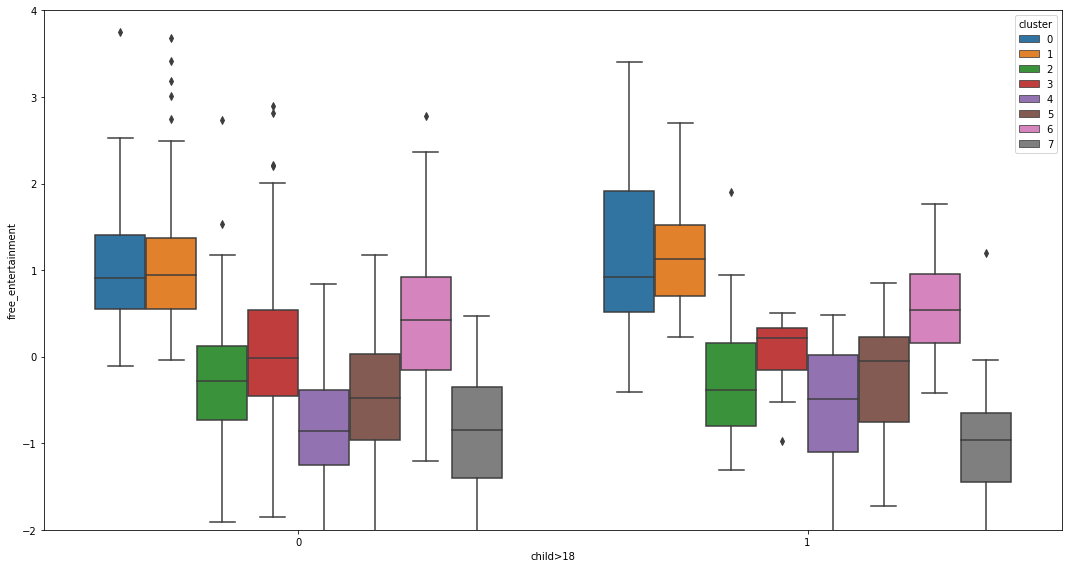

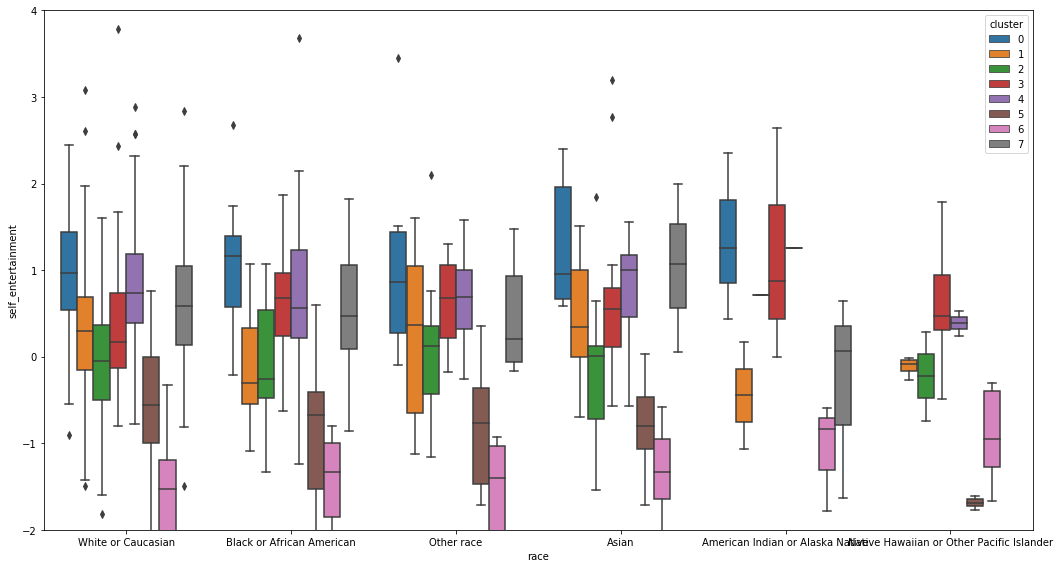

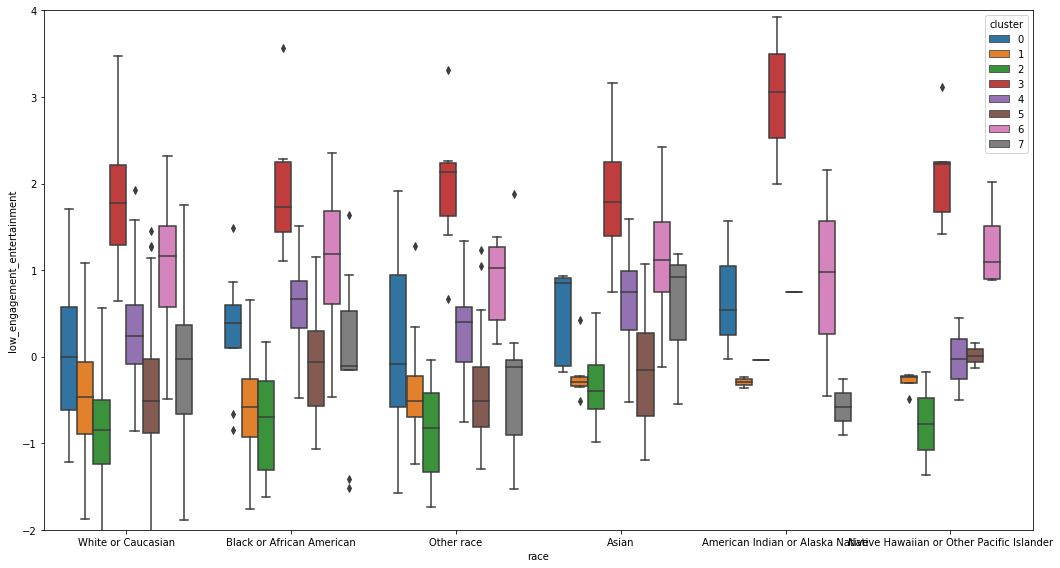

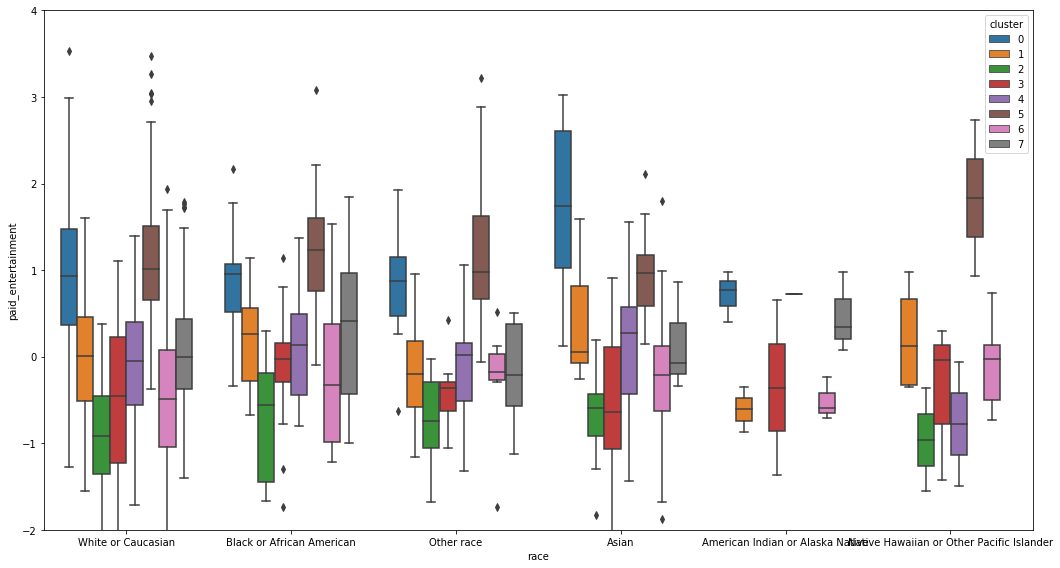

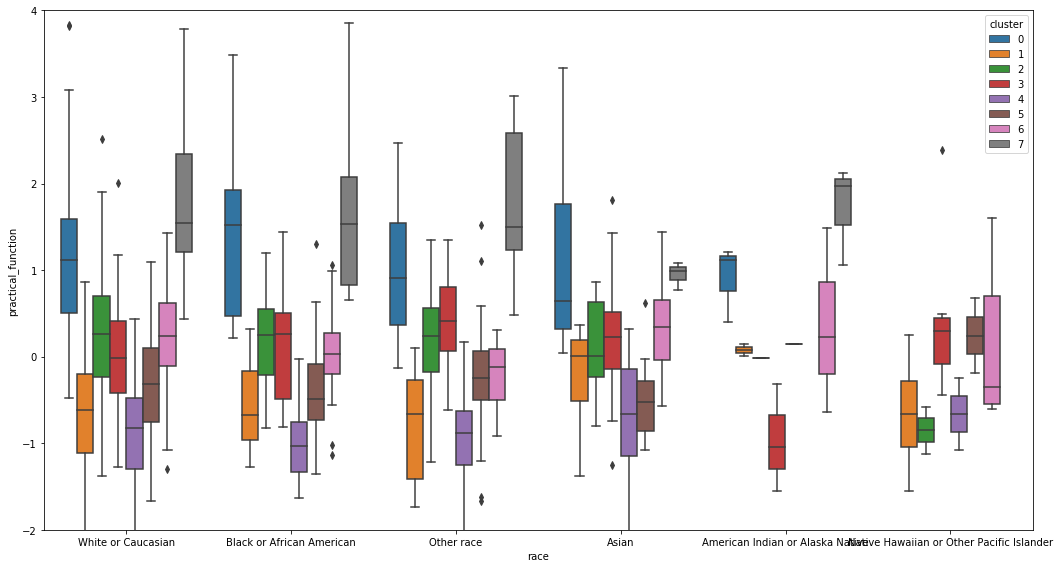

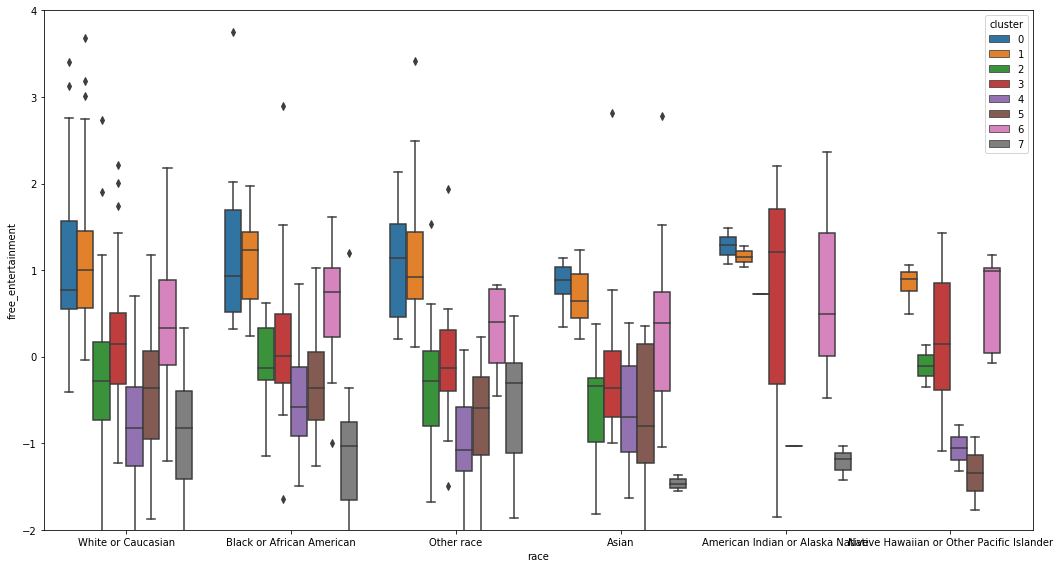

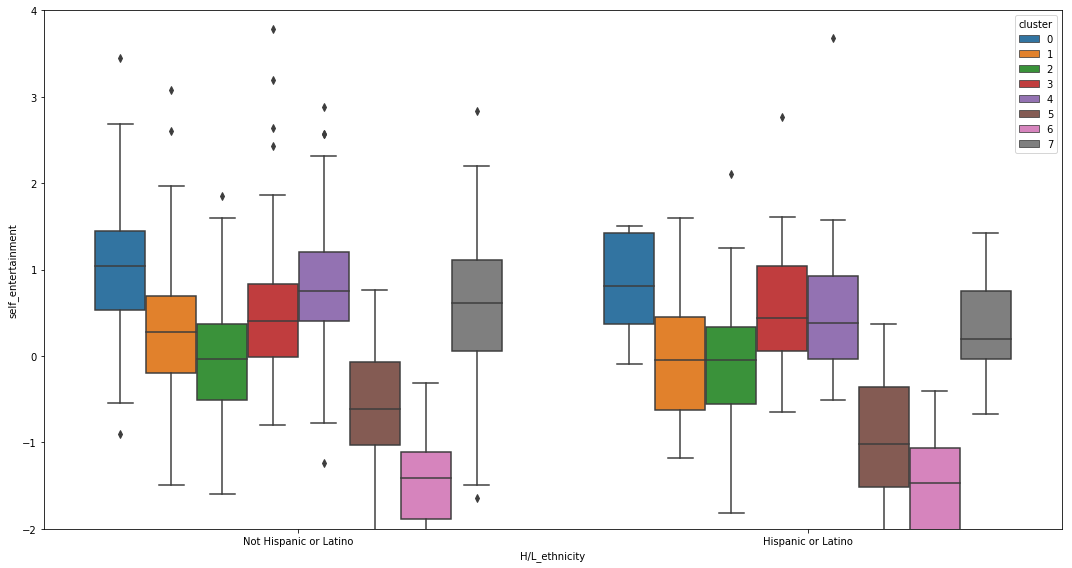

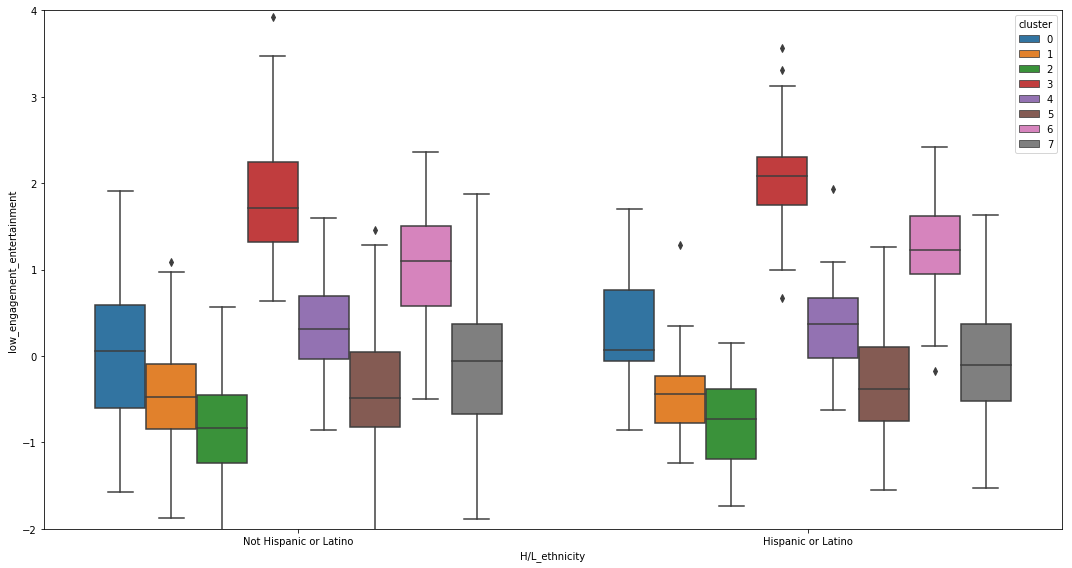

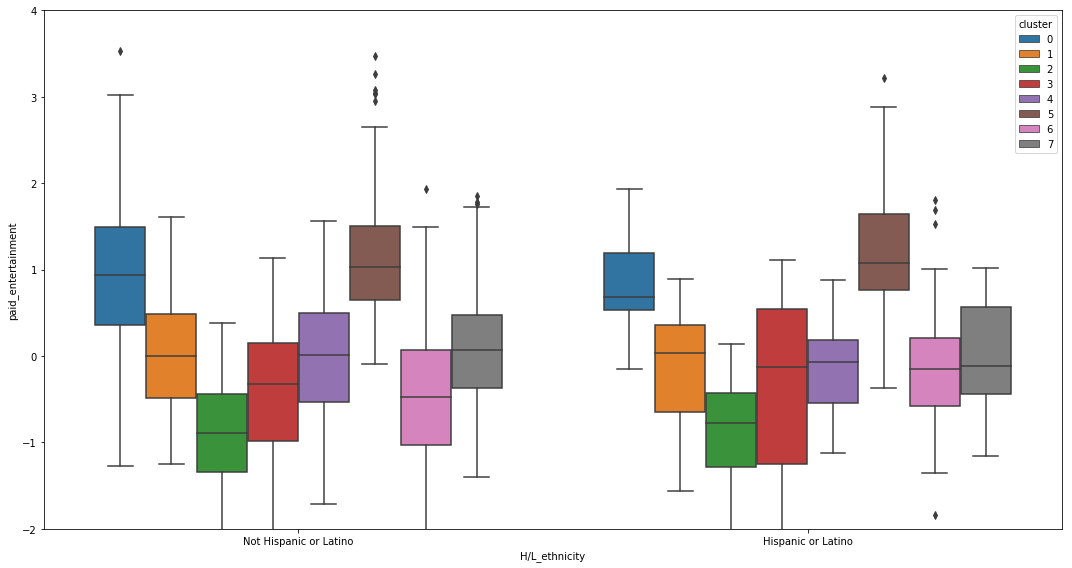

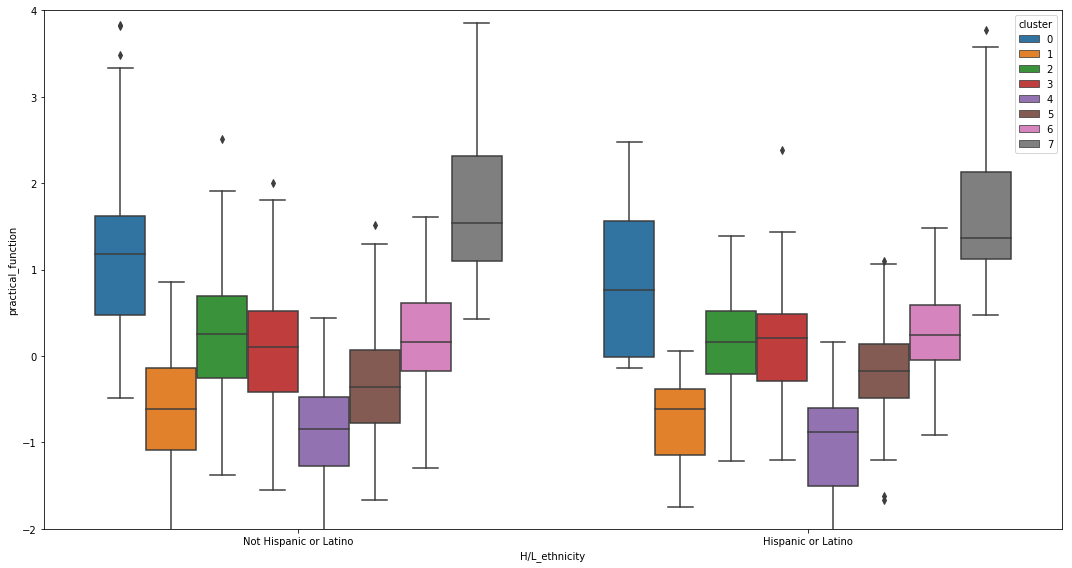

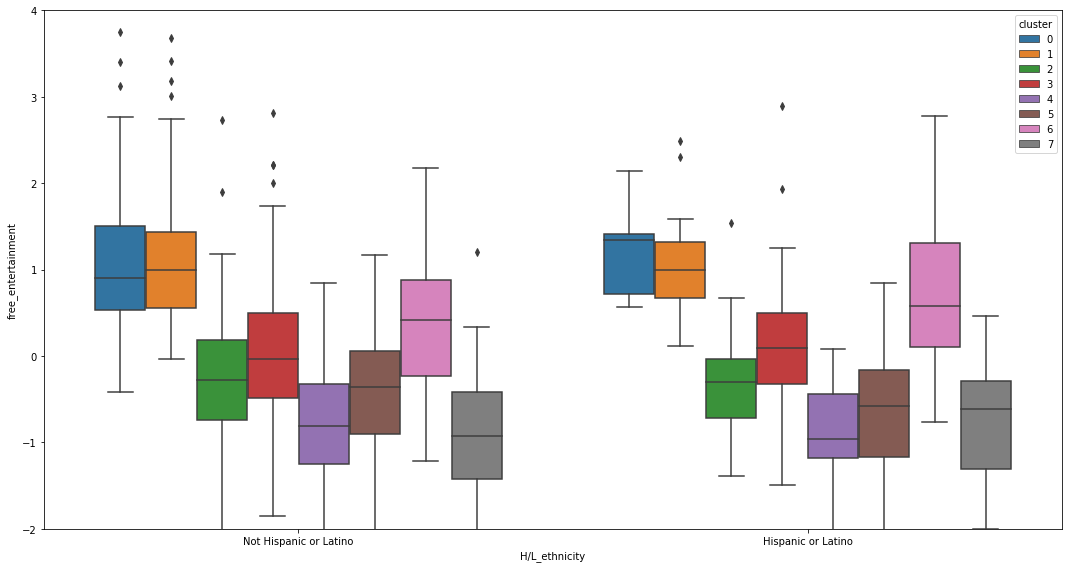

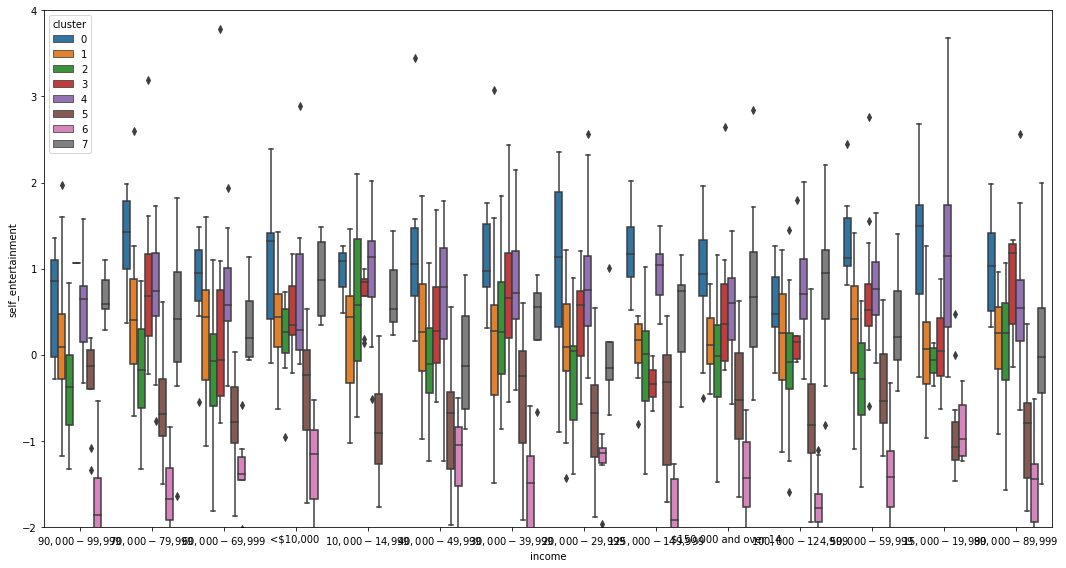

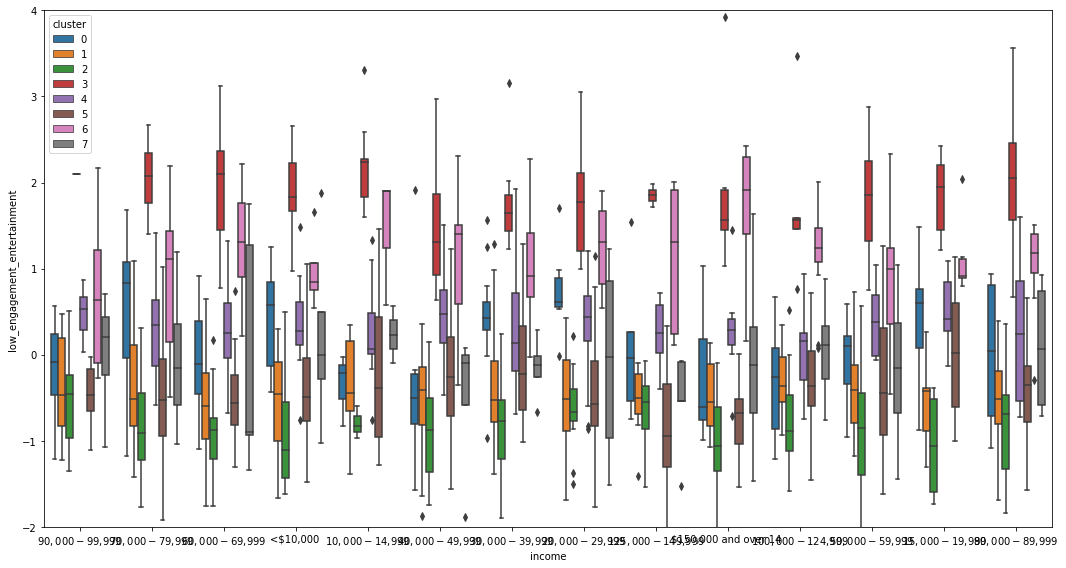

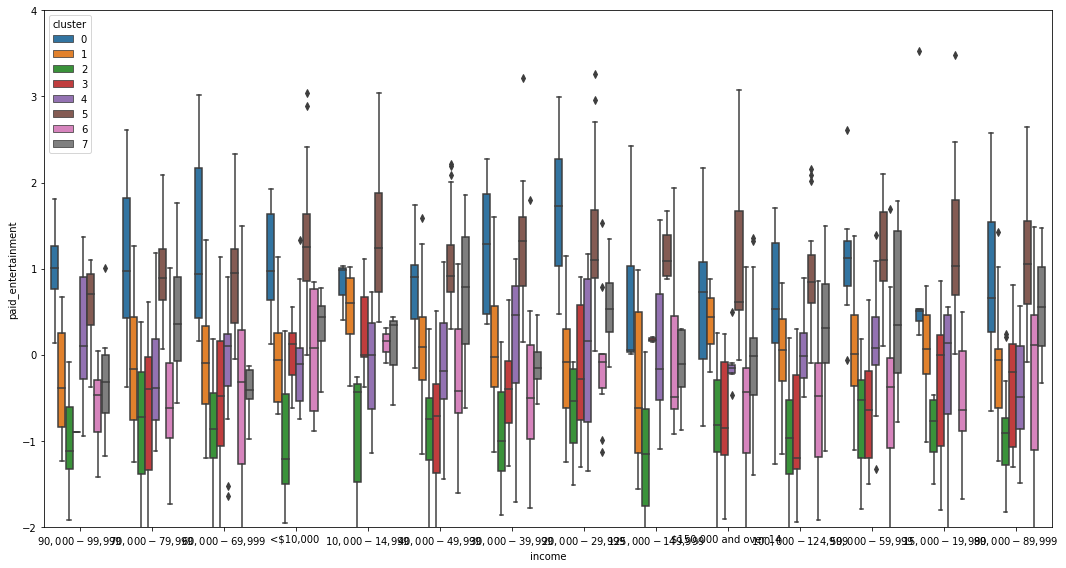

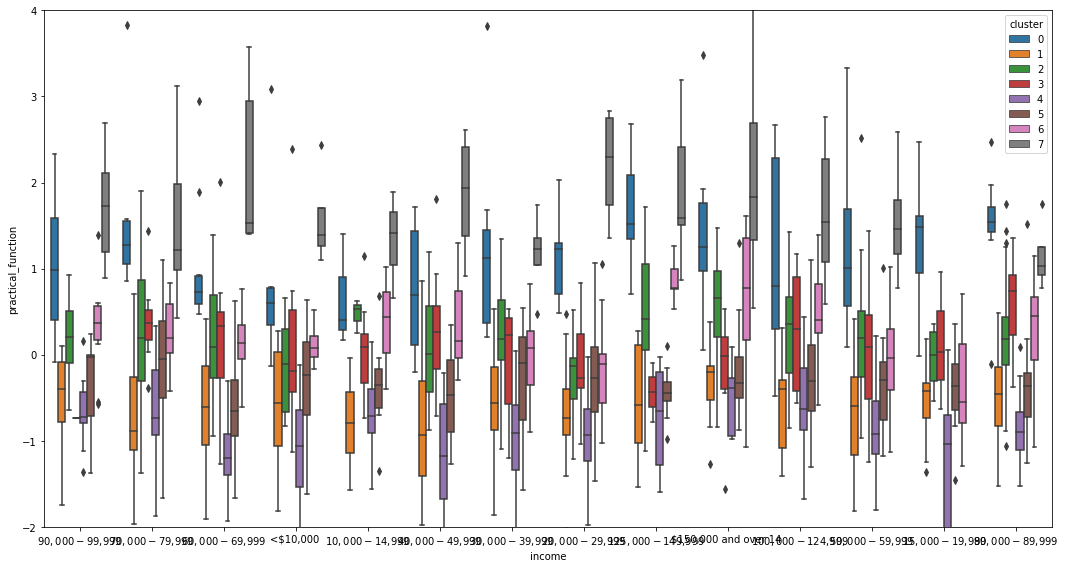

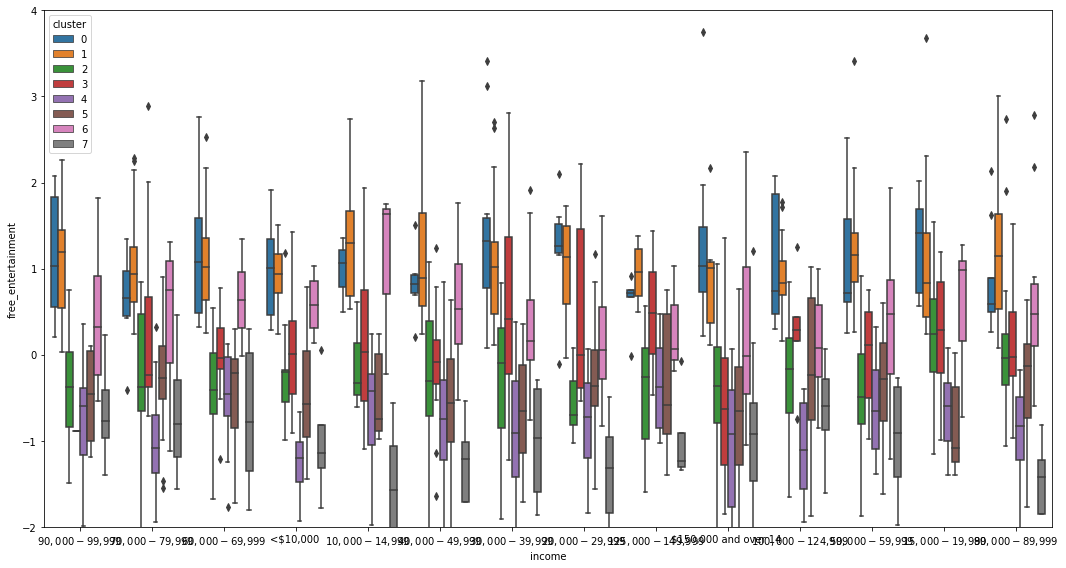

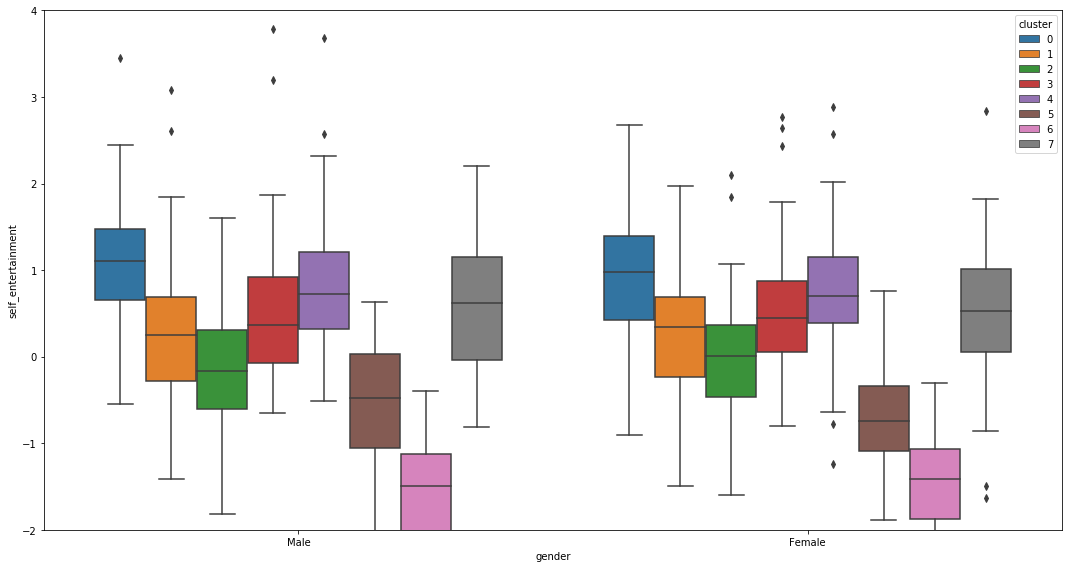

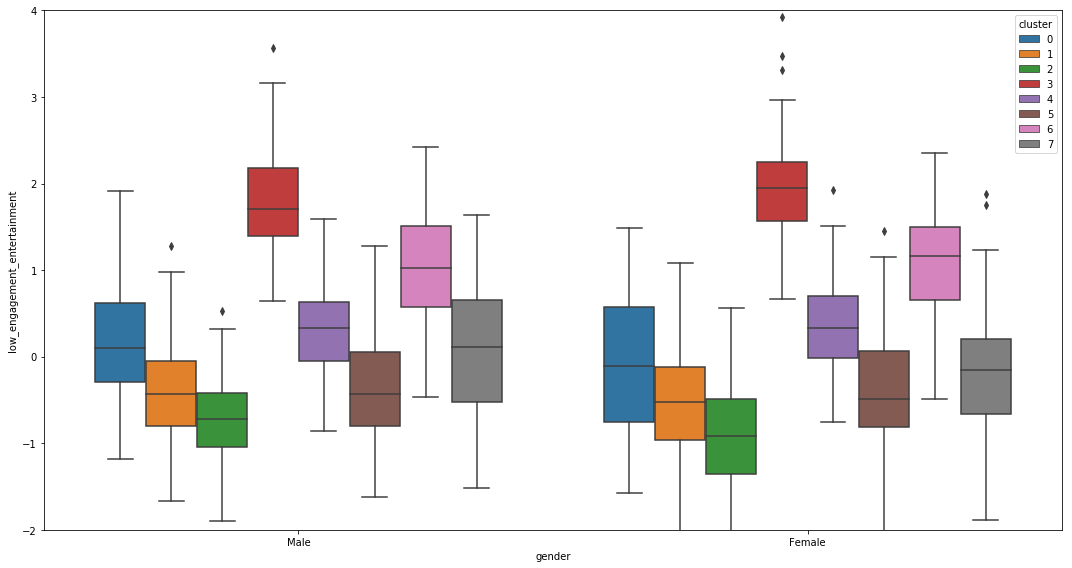

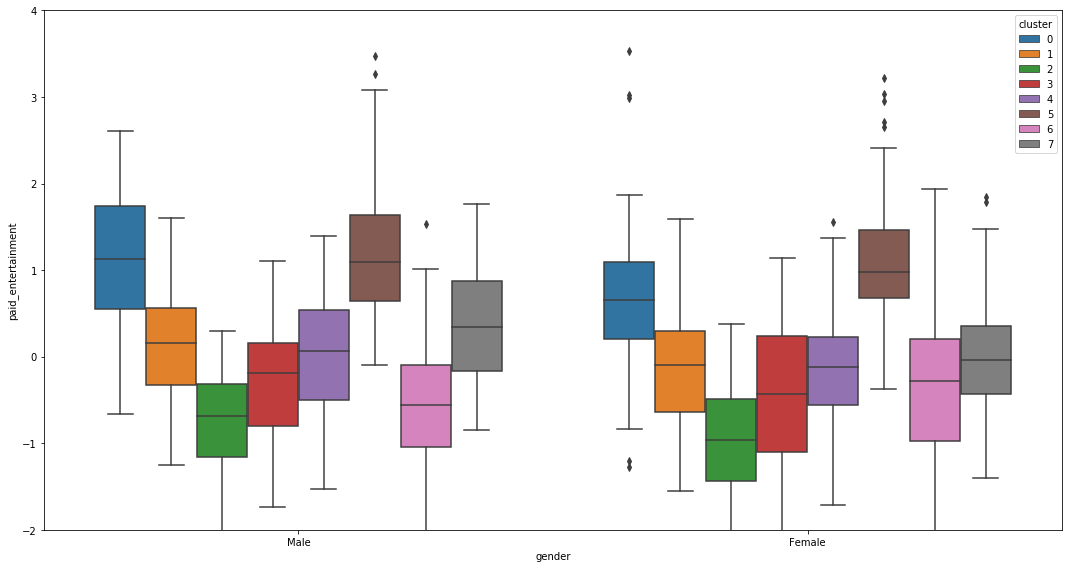

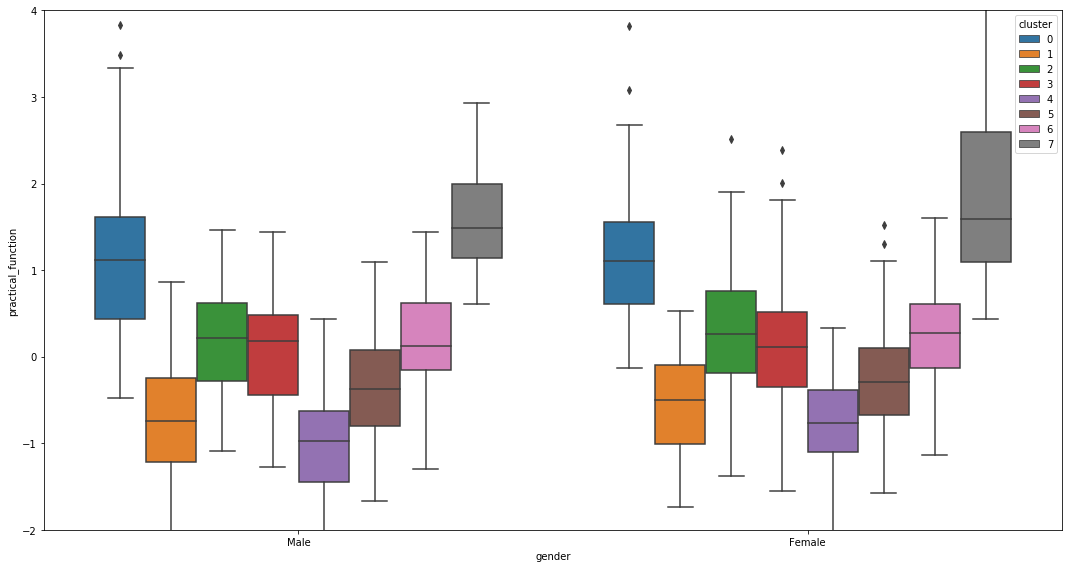

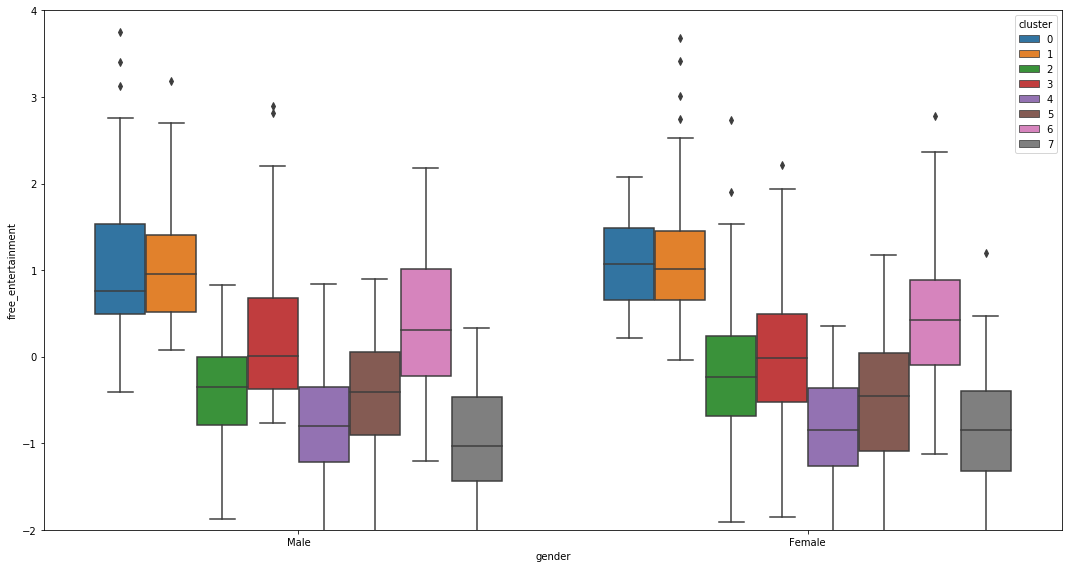

In [48]:
########################
# Step 7: Analyze in more detail 
########################

category_names = ['age', 'education','marital','no_child', 
                  'child<6','child6_12','child13_17','child>18',
                  'race', 'H/L_ethnicity', 'income', 'gender']


pca_names = ['self_entertainment', 'low_engagement_entertainment', 
             'paid_entertainment','practical_function', 'free_entertainment']

for c in category_names:
    for p in pca_names:
        fig, ax = plt.subplots(figsize = (15, 8))
        sns.boxplot(x = c,
                    y = p,
                    hue = 'cluster',
                    data = final_pca_clust_df)

        plt.ylim(-2, 4)
        plt.tight_layout()
        plt.show()